In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.

- The Functional API a set of tools for building graphs of layers.

In [3]:
from tensorflow import keras

# Creating an input node. We only specify the shape of each sample.
inputs = keras.Input(shape=(784,))

img_inputs = keras.Input(shape=(32, 32, 3))

In [3]:
inputs.shape

TensorShape([None, 784])

In [4]:
inputs.dtype

tf.float32

In [4]:
from tensorflow.keras import layers

dense = layers.Dense(64, activation='relu')
x = dense(inputs)

In [6]:
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

In [7]:
# We can create a Model by specifying its inputs and outputs in the graph of 
# layers.
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [9]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


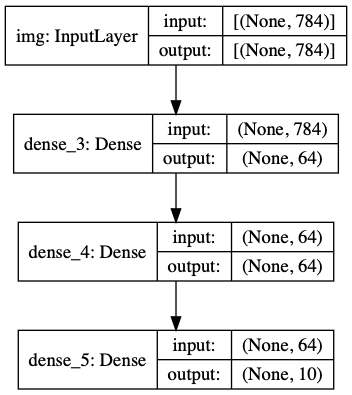

In [10]:
# Plot the model as a graph.
keras.utils.plot_model(model, './TF 2.0 Alpha/models/my_first_plotted_model.png', show_shapes=True)

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Train on 48000 samples, validate on 12000 samples


Epoch 1/5
   64/48000 [..............................] - ETA: 2:20 - loss: 2.3592 - accuracy: 0.1094

  832/48000 [..............................] - ETA: 13s - loss: 1.8616 - accuracy: 0.4700 

 1600/48000 [>.............................] - ETA: 8s - loss: 1.5502 - accuracy: 0.5838 

 2368/48000 [>.............................] - ETA: 6s - loss: 1.3189 - accuracy: 0.6503

 3072/48000 [>.............................] - ETA: 5s - loss: 1.1784 - accuracy: 0.6842

 3840/48000 [=>............................] - ETA: 5s - loss: 1.0642 - accuracy: 0.7148

 4608/48000 [=>............................] - ETA: 4s - loss: 0.9790 - accuracy: 0.7365

 5312/48000 [==>...........................] - ETA: 4s - loss: 0.9123 - accuracy: 0.7534

 6016/48000 [==>...........................] - ETA: 4s - loss: 0.8598 - accuracy: 0.7668

 6784/48000 [===>..........................] - ETA: 3s - loss: 0.8116 - accuracy: 0.7795

 7552/48000 [===>..........................] - ETA: 3s - loss: 0.7719 - accuracy: 0.7895

 8384/48000 [====>.........................] - ETA: 3s - loss: 0.7367 - accuracy: 0.7984

 9152/48000 [====>.........................] - ETA: 3s - loss: 0.7077 - accuracy: 0.8064

 9920/48000 [=====>........................] - ETA: 3s - loss: 0.6775 - accuracy: 0.8149

10688/48000 [=====>........................] - ETA: 3s - loss: 0.6538 - accuracy: 0.8211

11456/48000 [======>.......................] - ETA: 3s - loss: 0.6321 - accuracy: 0.8269

12224/48000 [======>.......................] - ETA: 2s - loss: 0.6114 - accuracy: 0.8316

12800/48000 [=======>......................] - ETA: 2s - loss: 0.5993 - accuracy: 0.8345

13120/48000 [=======>......................] - ETA: 3s - loss: 0.5928 - accuracy: 0.8360

13504/48000 [=======>......................] - ETA: 3s - loss: 0.5858 - accuracy: 0.8376

14016/48000 [=======>......................] - ETA: 2s - loss: 0.5749 - accuracy: 0.8407

14656/48000 [========>.....................] - ETA: 2s - loss: 0.5623 - accuracy: 0.8444

15424/48000 [========>.....................] - ETA: 2s - loss: 0.5499 - accuracy: 0.8471

16128/48000 [=========>....................] - ETA: 2s - loss: 0.5401 - accuracy: 0.8496

16896/48000 [=========>....................] - ETA: 2s - loss: 0.5292 - accuracy: 0.8523

17664/48000 [==========>...................] - ETA: 2s - loss: 0.5177 - accuracy: 0.8556

18432/48000 [==========>...................] - ETA: 2s - loss: 0.5074 - accuracy: 0.8582

19200/48000 [===========>..................] - ETA: 2s - loss: 0.4960 - accuracy: 0.8614

19840/48000 [===========>..................] - ETA: 2s - loss: 0.4903 - accuracy: 0.8631

20544/48000 [===========>..................] - ETA: 2s - loss: 0.4851 - accuracy: 0.8645

21312/48000 [============>.................] - ETA: 2s - loss: 0.4766 - accuracy: 0.8670

22080/48000 [============>.................] - ETA: 2s - loss: 0.4685 - accuracy: 0.8688

22848/48000 [=============>................] - ETA: 2s - loss: 0.4602 - accuracy: 0.8712

23552/48000 [=============>................] - ETA: 1s - loss: 0.4546 - accuracy: 0.8730

24256/48000 [==============>...............] - ETA: 1s - loss: 0.4497 - accuracy: 0.8745

25024/48000 [==============>...............] - ETA: 1s - loss: 0.4431 - accuracy: 0.8761

25792/48000 [===============>..............] - ETA: 1s - loss: 0.4365 - accuracy: 0.8781

26560/48000 [===============>..............] - ETA: 1s - loss: 0.4317 - accuracy: 0.8793

27328/48000 [================>.............] - ETA: 1s - loss: 0.4265 - accuracy: 0.8805

28096/48000 [================>.............] - ETA: 1s - loss: 0.4205 - accuracy: 0.8820

28864/48000 [=================>............] - ETA: 1s - loss: 0.4150 - accuracy: 0.8836

29632/48000 [=================>............] - ETA: 1s - loss: 0.4105 - accuracy: 0.8848

30336/48000 [=================>............] - ETA: 1s - loss: 0.4064 - accuracy: 0.8860

31104/48000 [==================>...........] - ETA: 1s - loss: 0.4014 - accuracy: 0.8872

31872/48000 [==================>...........] - ETA: 1s - loss: 0.3972 - accuracy: 0.8881

32704/48000 [===================>..........] - ETA: 1s - loss: 0.3932 - accuracy: 0.8893

33536/48000 [===================>..........] - ETA: 1s - loss: 0.3893 - accuracy: 0.8903

34432/48000 [====================>.........] - ETA: 1s - loss: 0.3850 - accuracy: 0.8916

35264/48000 [=====================>........] - ETA: 0s - loss: 0.3814 - accuracy: 0.8925

36160/48000 [=====================>........] - ETA: 0s - loss: 0.3786 - accuracy: 0.8933

36864/48000 [======================>.......] - ETA: 0s - loss: 0.3746 - accuracy: 0.8944

37632/48000 [======================>.......] - ETA: 0s - loss: 0.3717 - accuracy: 0.8951

38336/48000 [======================>.......] - ETA: 0s - loss: 0.3693 - accuracy: 0.8954

38784/48000 [=======================>......] - ETA: 0s - loss: 0.3673 - accuracy: 0.8959

39232/48000 [=======================>......] - ETA: 0s - loss: 0.3662 - accuracy: 0.8961

39808/48000 [=======================>......] - ETA: 0s - loss: 0.3640 - accuracy: 0.8968

40384/48000 [========================>.....] - ETA: 0s - loss: 0.3620 - accuracy: 0.8974

41024/48000 [========================>.....] - ETA: 0s - loss: 0.3604 - accuracy: 0.8978

41792/48000 [=========================>....] - ETA: 0s - loss: 0.3577 - accuracy: 0.8985

42560/48000 [=========================>....] - ETA: 0s - loss: 0.3543 - accuracy: 0.8994

43264/48000 [==========================>...] - ETA: 0s - loss: 0.3515 - accuracy: 0.9002

44032/48000 [==========================>...] - ETA: 0s - loss: 0.3489 - accuracy: 0.9008

44800/48000 [===========================>..] - ETA: 0s - loss: 0.3460 - accuracy: 0.9016



45312/48000 [===========================>..] - ETA: 0s - loss: 0.3440 - accuracy: 0.9021

45824/48000 [===========================>..] - ETA: 0s - loss: 0.3432 - accuracy: 0.9022

46336/48000 [===========================>..] - ETA: 0s - loss: 0.3410 - accuracy: 0.9028

46848/48000 [============================>.] - ETA: 0s - loss: 0.3394 - accuracy: 0.9032

47424/48000 [============================>.] - ETA: 0s - loss: 0.3373 - accuracy: 0.9038

48000/48000 [==============================] - 4s 89us/sample - loss: 0.3361 - accuracy: 0.9044 - val_loss: 0.1745 - val_accuracy: 0.9500


Epoch 2/5
   64/48000 [..............................] - ETA: 9s - loss: 0.1366 - accuracy: 0.9531

  448/48000 [..............................] - ETA: 7s - loss: 0.2167 - accuracy: 0.9442

 1088/48000 [..............................] - ETA: 5s - loss: 0.2174 - accuracy: 0.9421

 1728/48000 [>.............................] - ETA: 4s - loss: 0.2037 - accuracy: 0.9439

 2304/48000 [>.............................] - ETA: 4s - loss: 0.2022 - accuracy: 0.9418

 2880/48000 [>.............................] - ETA: 4s - loss: 0.1904 - accuracy: 0.9441

 3584/48000 [=>............................] - ETA: 4s - loss: 0.1839 - accuracy: 0.9456

 4224/48000 [=>............................] - ETA: 3s - loss: 0.1779 - accuracy: 0.9472

 4864/48000 [==>...........................] - ETA: 3s - loss: 0.1805 - accuracy: 0.9463

 5568/48000 [==>...........................] - ETA: 3s - loss: 0.1799 - accuracy: 0.9454

 6272/48000 [==>...........................] - ETA: 3s - loss: 0.1767 - accuracy: 0.9463

 6912/48000 [===>..........................] - ETA: 3s - loss: 0.1818 - accuracy: 0.9444

 7552/48000 [===>..........................] - ETA: 3s - loss: 0.1776 - accuracy: 0.9462

 8128/48000 [====>.........................] - ETA: 3s - loss: 0.1770 - accuracy: 0.9467

 8768/48000 [====>.........................] - ETA: 3s - loss: 0.1735 - accuracy: 0.9477

 9280/48000 [====>.........................] - ETA: 3s - loss: 0.1733 - accuracy: 0.9478

 9856/48000 [=====>........................] - ETA: 3s - loss: 0.1710 - accuracy: 0.9492

10496/48000 [=====>........................] - ETA: 3s - loss: 0.1714 - accuracy: 0.9489

11136/48000 [=====>........................] - ETA: 3s - loss: 0.1701 - accuracy: 0.9499

11776/48000 [======>.......................] - ETA: 3s - loss: 0.1699 - accuracy: 0.9501

12480/48000 [======>.......................] - ETA: 3s - loss: 0.1706 - accuracy: 0.9497

13184/48000 [=======>......................] - ETA: 2s - loss: 0.1709 - accuracy: 0.9496

13888/48000 [=======>......................] - ETA: 2s - loss: 0.1727 - accuracy: 0.9492

14656/48000 [========>.....................] - ETA: 2s - loss: 0.1706 - accuracy: 0.9498

15360/48000 [========>.....................] - ETA: 2s - loss: 0.1712 - accuracy: 0.9494

16064/48000 [=========>....................] - ETA: 2s - loss: 0.1707 - accuracy: 0.9497

16640/48000 [=========>....................] - ETA: 2s - loss: 0.1702 - accuracy: 0.9498

17216/48000 [=========>....................] - ETA: 2s - loss: 0.1688 - accuracy: 0.9499

17600/48000 [==========>...................] - ETA: 2s - loss: 0.1681 - accuracy: 0.9499

18048/48000 [==========>...................] - ETA: 2s - loss: 0.1683 - accuracy: 0.9496

18624/48000 [==========>...................] - ETA: 2s - loss: 0.1678 - accuracy: 0.9497

19200/48000 [===========>..................] - ETA: 2s - loss: 0.1673 - accuracy: 0.9497

19776/48000 [===========>..................] - ETA: 2s - loss: 0.1665 - accuracy: 0.9501

20352/48000 [===========>..................] - ETA: 2s - loss: 0.1655 - accuracy: 0.9503

21120/48000 [============>.................] - ETA: 2s - loss: 0.1658 - accuracy: 0.9504

21888/48000 [============>.................] - ETA: 2s - loss: 0.1661 - accuracy: 0.9504

22720/48000 [=============>................] - ETA: 2s - loss: 0.1649 - accuracy: 0.9505

23424/48000 [=============>................] - ETA: 2s - loss: 0.1640 - accuracy: 0.9508

24192/48000 [==============>...............] - ETA: 1s - loss: 0.1640 - accuracy: 0.9505

25024/48000 [==============>...............] - ETA: 1s - loss: 0.1626 - accuracy: 0.9508

25920/48000 [===============>..............] - ETA: 1s - loss: 0.1627 - accuracy: 0.9505

26752/48000 [===============>..............] - ETA: 1s - loss: 0.1622 - accuracy: 0.9505

27520/48000 [================>.............] - ETA: 1s - loss: 0.1615 - accuracy: 0.9508

28352/48000 [================>.............] - ETA: 1s - loss: 0.1607 - accuracy: 0.9508

29120/48000 [=================>............] - ETA: 1s - loss: 0.1605 - accuracy: 0.9508

29824/48000 [=================>............] - ETA: 1s - loss: 0.1605 - accuracy: 0.9506

30592/48000 [==================>...........] - ETA: 1s - loss: 0.1598 - accuracy: 0.9507

31296/48000 [==================>...........] - ETA: 1s - loss: 0.1593 - accuracy: 0.9509

31872/48000 [==================>...........] - ETA: 1s - loss: 0.1595 - accuracy: 0.9510

32640/48000 [===================>..........] - ETA: 1s - loss: 0.1591 - accuracy: 0.9511

33408/48000 [===================>..........] - ETA: 1s - loss: 0.1581 - accuracy: 0.9513

34176/48000 [====================>.........] - ETA: 1s - loss: 0.1589 - accuracy: 0.9513

35008/48000 [====================>.........] - ETA: 1s - loss: 0.1580 - accuracy: 0.9514

35776/48000 [=====================>........] - ETA: 0s - loss: 0.1575 - accuracy: 0.9516

36480/48000 [=====================>........] - ETA: 0s - loss: 0.1570 - accuracy: 0.9517

37184/48000 [======================>.......] - ETA: 0s - loss: 0.1572 - accuracy: 0.9519

37952/48000 [======================>.......] - ETA: 0s - loss: 0.1573 - accuracy: 0.9519

38720/48000 [=======================>......] - ETA: 0s - loss: 0.1570 - accuracy: 0.9520

39488/48000 [=======================>......] - ETA: 0s - loss: 0.1564 - accuracy: 0.9522

40256/48000 [========================>.....] - ETA: 0s - loss: 0.1561 - accuracy: 0.9525

41152/48000 [========================>.....] - ETA: 0s - loss: 0.1557 - accuracy: 0.9528

41984/48000 [=========================>....] - ETA: 0s - loss: 0.1553 - accuracy: 0.9528

42816/48000 [=========================>....] - ETA: 0s - loss: 0.1546 - accuracy: 0.9530

43712/48000 [==========================>...] - ETA: 0s - loss: 0.1537 - accuracy: 0.9535

44608/48000 [==========================>...] - ETA: 0s - loss: 0.1540 - accuracy: 0.9533

45376/48000 [===========================>..] - ETA: 0s - loss: 0.1539 - accuracy: 0.9533

46144/48000 [===========================>..] - ETA: 0s - loss: 0.1543 - accuracy: 0.9532

46912/48000 [============================>.] - ETA: 0s - loss: 0.1540 - accuracy: 0.9533

47744/48000 [============================>.] - ETA: 0s - loss: 0.1536 - accuracy: 0.9534

48000/48000 [==============================] - 4s 83us/sample - loss: 0.1535 - accuracy: 0.9535 - val_loss: 0.1381 - val_accuracy: 0.9598


Epoch 3/5
   64/48000 [..............................] - ETA: 5s - loss: 0.1911 - accuracy: 0.9688

  576/48000 [..............................] - ETA: 4s - loss: 0.1300 - accuracy: 0.9531

 1344/48000 [..............................] - ETA: 3s - loss: 0.1262 - accuracy: 0.9621

 2112/48000 [>.............................] - ETA: 3s - loss: 0.1271 - accuracy: 0.9621

 2816/48000 [>.............................] - ETA: 3s - loss: 0.1221 - accuracy: 0.9638

 3520/48000 [=>............................] - ETA: 3s - loss: 0.1239 - accuracy: 0.9631

 4288/48000 [=>............................] - ETA: 3s - loss: 0.1199 - accuracy: 0.9639

 5056/48000 [==>...........................] - ETA: 3s - loss: 0.1209 - accuracy: 0.9636

 5888/48000 [==>...........................] - ETA: 2s - loss: 0.1214 - accuracy: 0.9633

 6720/48000 [===>..........................] - ETA: 2s - loss: 0.1210 - accuracy: 0.9632

 7488/48000 [===>..........................] - ETA: 2s - loss: 0.1222 - accuracy: 0.9635

 8256/48000 [====>.........................] - ETA: 2s - loss: 0.1204 - accuracy: 0.9638

 9088/48000 [====>.........................] - ETA: 2s - loss: 0.1220 - accuracy: 0.9632

 9920/48000 [=====>........................] - ETA: 2s - loss: 0.1217 - accuracy: 0.9637

10816/48000 [=====>........................] - ETA: 2s - loss: 0.1208 - accuracy: 0.9636

11648/48000 [======>.......................] - ETA: 2s - loss: 0.1192 - accuracy: 0.9642

12416/48000 [======>.......................] - ETA: 2s - loss: 0.1170 - accuracy: 0.9645

13248/48000 [=======>......................] - ETA: 2s - loss: 0.1175 - accuracy: 0.9641

14016/48000 [=======>......................] - ETA: 2s - loss: 0.1168 - accuracy: 0.9643

14784/48000 [========>.....................] - ETA: 2s - loss: 0.1167 - accuracy: 0.9644

15552/48000 [========>.....................] - ETA: 2s - loss: 0.1163 - accuracy: 0.9645

16448/48000 [=========>....................] - ETA: 2s - loss: 0.1154 - accuracy: 0.9650

17216/48000 [=========>....................] - ETA: 2s - loss: 0.1170 - accuracy: 0.9647

17984/48000 [==========>...................] - ETA: 2s - loss: 0.1167 - accuracy: 0.9647

18752/48000 [==========>...................] - ETA: 1s - loss: 0.1176 - accuracy: 0.9645

19584/48000 [===========>..................] - ETA: 1s - loss: 0.1176 - accuracy: 0.9644

20416/48000 [===========>..................] - ETA: 1s - loss: 0.1172 - accuracy: 0.9646

21184/48000 [============>.................] - ETA: 1s - loss: 0.1173 - accuracy: 0.9647

21888/48000 [============>.................] - ETA: 1s - loss: 0.1163 - accuracy: 0.9647

22656/48000 [=============>................] - ETA: 1s - loss: 0.1165 - accuracy: 0.9644

23488/48000 [=============>................] - ETA: 1s - loss: 0.1160 - accuracy: 0.9645

24320/48000 [==============>...............] - ETA: 1s - loss: 0.1150 - accuracy: 0.9647

25216/48000 [==============>...............] - ETA: 1s - loss: 0.1153 - accuracy: 0.9648

25856/48000 [===============>..............] - ETA: 1s - loss: 0.1167 - accuracy: 0.9642

26240/48000 [===============>..............] - ETA: 1s - loss: 0.1165 - accuracy: 0.9642

26624/48000 [===============>..............] - ETA: 1s - loss: 0.1163 - accuracy: 0.9643

27136/48000 [===============>..............] - ETA: 1s - loss: 0.1152 - accuracy: 0.9647

27776/48000 [================>.............] - ETA: 1s - loss: 0.1159 - accuracy: 0.9646

28416/48000 [================>.............] - ETA: 1s - loss: 0.1164 - accuracy: 0.9644

28992/48000 [=================>............] - ETA: 1s - loss: 0.1161 - accuracy: 0.9646

29504/48000 [=================>............] - ETA: 1s - loss: 0.1162 - accuracy: 0.9646

30144/48000 [=================>............] - ETA: 1s - loss: 0.1161 - accuracy: 0.9648

30784/48000 [==================>...........] - ETA: 1s - loss: 0.1160 - accuracy: 0.9648

31360/48000 [==================>...........] - ETA: 1s - loss: 0.1158 - accuracy: 0.9648

31936/48000 [==================>...........] - ETA: 1s - loss: 0.1157 - accuracy: 0.9649

32704/48000 [===================>..........] - ETA: 1s - loss: 0.1165 - accuracy: 0.9645

33472/48000 [===================>..........] - ETA: 1s - loss: 0.1167 - accuracy: 0.9645

34304/48000 [====================>.........] - ETA: 0s - loss: 0.1163 - accuracy: 0.9646

35200/48000 [=====================>........] - ETA: 0s - loss: 0.1158 - accuracy: 0.9648

35904/48000 [=====================>........] - ETA: 0s - loss: 0.1158 - accuracy: 0.9649

36544/48000 [=====================>........] - ETA: 0s - loss: 0.1156 - accuracy: 0.9649

37120/48000 [======================>.......] - ETA: 0s - loss: 0.1149 - accuracy: 0.9651

37824/48000 [======================>.......] - ETA: 0s - loss: 0.1147 - accuracy: 0.9652

38464/48000 [=======================>......] - ETA: 0s - loss: 0.1144 - accuracy: 0.9653

39104/48000 [=======================>......] - ETA: 0s - loss: 0.1144 - accuracy: 0.9653

39744/48000 [=======================>......] - ETA: 0s - loss: 0.1142 - accuracy: 0.9654

40448/48000 [========================>.....] - ETA: 0s - loss: 0.1139 - accuracy: 0.9655

41152/48000 [========================>.....] - ETA: 0s - loss: 0.1136 - accuracy: 0.9657

41920/48000 [=========================>....] - ETA: 0s - loss: 0.1137 - accuracy: 0.9657

42752/48000 [=========================>....] - ETA: 0s - loss: 0.1132 - accuracy: 0.9658

43520/48000 [==========================>...] - ETA: 0s - loss: 0.1134 - accuracy: 0.9657

44224/48000 [==========================>...] - ETA: 0s - loss: 0.1133 - accuracy: 0.9658

44928/48000 [===========================>..] - ETA: 0s - loss: 0.1131 - accuracy: 0.9660

45632/48000 [===========================>..] - ETA: 0s - loss: 0.1130 - accuracy: 0.9661

46400/48000 [============================>.] - ETA: 0s - loss: 0.1133 - accuracy: 0.9660

47104/48000 [============================>.] - ETA: 0s - loss: 0.1133 - accuracy: 0.9659

47872/48000 [============================>.] - ETA: 0s - loss: 0.1139 - accuracy: 0.9659

48000/48000 [==============================] - 4s 81us/sample - loss: 0.1137 - accuracy: 0.9659 - val_loss: 0.1271 - val_accuracy: 0.9628


Epoch 4/5
   64/48000 [..............................] - ETA: 5s - loss: 0.0390 - accuracy: 0.9844

  448/48000 [..............................] - ETA: 6s - loss: 0.1155 - accuracy: 0.9754

 1152/48000 [..............................] - ETA: 4s - loss: 0.1025 - accuracy: 0.9722

 1920/48000 [>.............................] - ETA: 4s - loss: 0.1155 - accuracy: 0.9693

 2688/48000 [>.............................] - ETA: 3s - loss: 0.1069 - accuracy: 0.9710

 3264/48000 [=>............................] - ETA: 3s - loss: 0.1050 - accuracy: 0.9718

 3456/48000 [=>............................] - ETA: 4s - loss: 0.1048 - accuracy: 0.9719

 3840/48000 [=>............................] - ETA: 4s - loss: 0.1033 - accuracy: 0.9719

 4352/48000 [=>............................] - ETA: 4s - loss: 0.0979 - accuracy: 0.9733

 4864/48000 [==>...........................] - ETA: 4s - loss: 0.0968 - accuracy: 0.9731

 5440/48000 [==>...........................] - ETA: 4s - loss: 0.0962 - accuracy: 0.9728

 6208/48000 [==>...........................] - ETA: 3s - loss: 0.0954 - accuracy: 0.9728

 7040/48000 [===>..........................] - ETA: 3s - loss: 0.0938 - accuracy: 0.9727

 7744/48000 [===>..........................] - ETA: 3s - loss: 0.0937 - accuracy: 0.9726

 8512/48000 [====>.........................] - ETA: 3s - loss: 0.0909 - accuracy: 0.9731

 9152/48000 [====>.........................] - ETA: 3s - loss: 0.0885 - accuracy: 0.9734

 9664/48000 [=====>........................] - ETA: 3s - loss: 0.0890 - accuracy: 0.9733

10240/48000 [=====>........................] - ETA: 3s - loss: 0.0886 - accuracy: 0.9735

10944/48000 [=====>........................] - ETA: 3s - loss: 0.0895 - accuracy: 0.9736

11584/48000 [======>.......................] - ETA: 3s - loss: 0.0908 - accuracy: 0.9732

12352/48000 [======>.......................] - ETA: 3s - loss: 0.0899 - accuracy: 0.9734

13312/48000 [=======>......................] - ETA: 2s - loss: 0.0881 - accuracy: 0.9744

14272/48000 [=======>......................] - ETA: 2s - loss: 0.0883 - accuracy: 0.9742

15168/48000 [========>.....................] - ETA: 2s - loss: 0.0871 - accuracy: 0.9742

16128/48000 [=========>....................] - ETA: 2s - loss: 0.0875 - accuracy: 0.9741

17088/48000 [=========>....................] - ETA: 2s - loss: 0.0896 - accuracy: 0.9738

18048/48000 [==========>...................] - ETA: 2s - loss: 0.0894 - accuracy: 0.9737

19008/48000 [==========>...................] - ETA: 2s - loss: 0.0885 - accuracy: 0.9739

19968/48000 [===========>..................] - ETA: 2s - loss: 0.0892 - accuracy: 0.9736

20928/48000 [============>.................] - ETA: 1s - loss: 0.0899 - accuracy: 0.9732

21888/48000 [============>.................] - ETA: 1s - loss: 0.0908 - accuracy: 0.9728

22912/48000 [=============>................] - ETA: 1s - loss: 0.0898 - accuracy: 0.9731

23936/48000 [=============>................] - ETA: 1s - loss: 0.0892 - accuracy: 0.9733

24896/48000 [==============>...............] - ETA: 1s - loss: 0.0892 - accuracy: 0.9732

25536/48000 [==============>...............] - ETA: 1s - loss: 0.0894 - accuracy: 0.9731

26176/48000 [===============>..............] - ETA: 1s - loss: 0.0889 - accuracy: 0.9733

26880/48000 [===============>..............] - ETA: 1s - loss: 0.0884 - accuracy: 0.9735

27584/48000 [================>.............] - ETA: 1s - loss: 0.0883 - accuracy: 0.9735

28224/48000 [================>.............] - ETA: 1s - loss: 0.0879 - accuracy: 0.9736

28992/48000 [=================>............] - ETA: 1s - loss: 0.0875 - accuracy: 0.9737

29440/48000 [=================>............] - ETA: 1s - loss: 0.0876 - accuracy: 0.9737

29696/48000 [=================>............] - ETA: 1s - loss: 0.0876 - accuracy: 0.9737

30144/48000 [=================>............] - ETA: 1s - loss: 0.0881 - accuracy: 0.9735

30784/48000 [==================>...........] - ETA: 1s - loss: 0.0883 - accuracy: 0.9734

31488/48000 [==================>...........] - ETA: 1s - loss: 0.0892 - accuracy: 0.9732

32192/48000 [===================>..........] - ETA: 1s - loss: 0.0893 - accuracy: 0.9731

32960/48000 [===================>..........] - ETA: 1s - loss: 0.0898 - accuracy: 0.9729

33728/48000 [====================>.........] - ETA: 1s - loss: 0.0898 - accuracy: 0.9730

34496/48000 [====================>.........] - ETA: 0s - loss: 0.0901 - accuracy: 0.9728

35200/48000 [=====================>........] - ETA: 0s - loss: 0.0908 - accuracy: 0.9727

35904/48000 [=====================>........] - ETA: 0s - loss: 0.0907 - accuracy: 0.9726

36608/48000 [=====================>........] - ETA: 0s - loss: 0.0916 - accuracy: 0.9724

37312/48000 [======================>.......] - ETA: 0s - loss: 0.0917 - accuracy: 0.9724

38016/48000 [======================>.......] - ETA: 0s - loss: 0.0918 - accuracy: 0.9724

38720/48000 [=======================>......] - ETA: 0s - loss: 0.0915 - accuracy: 0.9726

39424/48000 [=======================>......] - ETA: 0s - loss: 0.0909 - accuracy: 0.9728

40192/48000 [========================>.....] - ETA: 0s - loss: 0.0911 - accuracy: 0.9728

40896/48000 [========================>.....] - ETA: 0s - loss: 0.0909 - accuracy: 0.9728

41600/48000 [=========================>....] - ETA: 0s - loss: 0.0904 - accuracy: 0.9730

42304/48000 [=========================>....] - ETA: 0s - loss: 0.0901 - accuracy: 0.9731



43008/48000 [=========================>....] - ETA: 0s - loss: 0.0903 - accuracy: 0.9730

43584/48000 [==========================>...] - ETA: 0s - loss: 0.0903 - accuracy: 0.9730

44224/48000 [==========================>...] - ETA: 0s - loss: 0.0904 - accuracy: 0.9729

44992/48000 [===========================>..] - ETA: 0s - loss: 0.0911 - accuracy: 0.9726

45696/48000 [===========================>..] - ETA: 0s - loss: 0.0909 - accuracy: 0.9726

46400/48000 [============================>.] - ETA: 0s - loss: 0.0907 - accuracy: 0.9727

47040/48000 [============================>.] - ETA: 0s - loss: 0.0907 - accuracy: 0.9726

47744/48000 [============================>.] - ETA: 0s - loss: 0.0915 - accuracy: 0.9725

48000/48000 [==============================] - 4s 86us/sample - loss: 0.0914 - accuracy: 0.9725 - val_loss: 0.1085 - val_accuracy: 0.9693


Epoch 5/5
   64/48000 [..............................] - ETA: 10s - loss: 0.0716 - accuracy: 0.9844

  640/48000 [..............................] - ETA: 5s - loss: 0.0850 - accuracy: 0.9734 

 1152/48000 [..............................] - ETA: 4s - loss: 0.0786 - accuracy: 0.9731

 1856/48000 [>.............................] - ETA: 4s - loss: 0.0766 - accuracy: 0.9736

 2496/48000 [>.............................] - ETA: 4s - loss: 0.0803 - accuracy: 0.9740

 3200/48000 [=>............................] - ETA: 3s - loss: 0.0723 - accuracy: 0.9769

 3904/48000 [=>............................] - ETA: 3s - loss: 0.0819 - accuracy: 0.9744

 4544/48000 [=>............................] - ETA: 3s - loss: 0.0794 - accuracy: 0.9760

 5248/48000 [==>...........................] - ETA: 3s - loss: 0.0758 - accuracy: 0.9771

 5824/48000 [==>...........................] - ETA: 3s - loss: 0.0773 - accuracy: 0.9772

 6528/48000 [===>..........................] - ETA: 3s - loss: 0.0792 - accuracy: 0.9770

 7232/48000 [===>..........................] - ETA: 3s - loss: 0.0794 - accuracy: 0.9770

 7872/48000 [===>..........................] - ETA: 3s - loss: 0.0797 - accuracy: 0.9768

 8640/48000 [====>.........................] - ETA: 3s - loss: 0.0790 - accuracy: 0.9772

 9216/48000 [====>.........................] - ETA: 3s - loss: 0.0786 - accuracy: 0.9776

 9984/48000 [=====>........................] - ETA: 3s - loss: 0.0765 - accuracy: 0.9780

10752/48000 [=====>........................] - ETA: 2s - loss: 0.0790 - accuracy: 0.9774

11648/48000 [======>.......................] - ETA: 2s - loss: 0.0789 - accuracy: 0.9772

12352/48000 [======>.......................] - ETA: 2s - loss: 0.0786 - accuracy: 0.9772

13184/48000 [=======>......................] - ETA: 2s - loss: 0.0785 - accuracy: 0.9772

13952/48000 [=======>......................] - ETA: 2s - loss: 0.0780 - accuracy: 0.9771

14912/48000 [========>.....................] - ETA: 2s - loss: 0.0778 - accuracy: 0.9773

15616/48000 [========>.....................] - ETA: 2s - loss: 0.0775 - accuracy: 0.9772

16512/48000 [=========>....................] - ETA: 2s - loss: 0.0768 - accuracy: 0.9773

17472/48000 [=========>....................] - ETA: 2s - loss: 0.0772 - accuracy: 0.9771

18432/48000 [==========>...................] - ETA: 2s - loss: 0.0769 - accuracy: 0.9771

19456/48000 [===========>..................] - ETA: 2s - loss: 0.0754 - accuracy: 0.9773

20160/48000 [===========>..................] - ETA: 1s - loss: 0.0750 - accuracy: 0.9775

21120/48000 [============>.................] - ETA: 1s - loss: 0.0736 - accuracy: 0.9778

22080/48000 [============>.................] - ETA: 1s - loss: 0.0733 - accuracy: 0.9779

22848/48000 [=============>................] - ETA: 1s - loss: 0.0741 - accuracy: 0.9778

23616/48000 [=============>................] - ETA: 1s - loss: 0.0741 - accuracy: 0.9779

24512/48000 [==============>...............] - ETA: 1s - loss: 0.0735 - accuracy: 0.9779

25472/48000 [==============>...............] - ETA: 1s - loss: 0.0735 - accuracy: 0.9779

26432/48000 [===============>..............] - ETA: 1s - loss: 0.0734 - accuracy: 0.9779

27264/48000 [================>.............] - ETA: 1s - loss: 0.0740 - accuracy: 0.9776

28096/48000 [================>.............] - ETA: 1s - loss: 0.0748 - accuracy: 0.9773

28992/48000 [=================>............] - ETA: 1s - loss: 0.0750 - accuracy: 0.9773

29888/48000 [=================>............] - ETA: 1s - loss: 0.0748 - accuracy: 0.9772

30784/48000 [==================>...........] - ETA: 1s - loss: 0.0755 - accuracy: 0.9771

31616/48000 [==================>...........] - ETA: 1s - loss: 0.0754 - accuracy: 0.9771

32448/48000 [===================>..........] - ETA: 1s - loss: 0.0754 - accuracy: 0.9770

33280/48000 [===================>..........] - ETA: 0s - loss: 0.0751 - accuracy: 0.9769

33920/48000 [====================>.........] - ETA: 0s - loss: 0.0754 - accuracy: 0.9767

34496/48000 [====================>.........] - ETA: 0s - loss: 0.0752 - accuracy: 0.9768

35200/48000 [=====================>........] - ETA: 0s - loss: 0.0747 - accuracy: 0.9769

36032/48000 [=====================>........] - ETA: 0s - loss: 0.0747 - accuracy: 0.9769

36864/48000 [======================>.......] - ETA: 0s - loss: 0.0750 - accuracy: 0.9768

37632/48000 [======================>.......] - ETA: 0s - loss: 0.0753 - accuracy: 0.9767

38272/48000 [======================>.......] - ETA: 0s - loss: 0.0755 - accuracy: 0.9767

39104/48000 [=======================>......] - ETA: 0s - loss: 0.0750 - accuracy: 0.9769

39936/48000 [=======================>......] - ETA: 0s - loss: 0.0748 - accuracy: 0.9769

40832/48000 [========================>.....] - ETA: 0s - loss: 0.0752 - accuracy: 0.9769

41664/48000 [=========================>....] - ETA: 0s - loss: 0.0759 - accuracy: 0.9767

42496/48000 [=========================>....] - ETA: 0s - loss: 0.0761 - accuracy: 0.9767

43328/48000 [==========================>...] - ETA: 0s - loss: 0.0765 - accuracy: 0.9767

44160/48000 [==========================>...] - ETA: 0s - loss: 0.0760 - accuracy: 0.9768

44800/48000 [===========================>..] - ETA: 0s - loss: 0.0758 - accuracy: 0.9769

45504/48000 [===========================>..] - ETA: 0s - loss: 0.0753 - accuracy: 0.9771

46144/48000 [===========================>..] - ETA: 0s - loss: 0.0759 - accuracy: 0.9771

46720/48000 [============================>.] - ETA: 0s - loss: 0.0759 - accuracy: 0.9771

47296/48000 [============================>.] - ETA: 0s - loss: 0.0759 - accuracy: 0.9771

47936/48000 [============================>.] - ETA: 0s - loss: 0.0758 - accuracy: 0.9771

48000/48000 [==============================] - 4s 80us/sample - loss: 0.0758 - accuracy: 0.9771 - val_loss: 0.1085 - val_accuracy: 0.9698


Test loss: 0.09671897361384472
Test accuracy: 0.9709


In [12]:
model.save('./TF 2.0 Alpha/models/my_model_with_functional_api.h5')
del model
# Recreate the exact same model purely from the file.
model = keras.models.load_model('./TF 2.0 Alpha/models/my_model_with_functional_api.h5')

In [13]:
# In the functional API, models are created by specifying their inputs and outputs 
# in a graph of layers. That means that a single graph of layers can be used to 
# generate multiple models.

encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                

- Note that we make the decoding architecture strictly symmetrical to the encoding architecture, so that we get an output shape that is the same as the input shape (28, 28, 1). The reverse of a Conv2D layer is a Conv2DTranspose layer, and the reverse of a MaxPooling2D layer is an UpSampling2D layer.

In [14]:
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_img (InputLayer)     [(None, 16)]              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 1)         145 

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 16)                18672     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


In [15]:
# A common use case for model nesting is ensembling. As an example, here's how to 
# ensemble a set of models into a single model that averages their predictions.
def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

- Models with multiple inputs and outputs.

In [9]:
num_tags = 12  # Number of unique issue tags.
num_words = 10000  # Size of vocabulary obtained when preprocessing text data.
num_departments = 4  # Number of departments for predictions.

# Variable-length sequence of ints.
title_input = keras.Input(shape=(None,), name='title')
# Variable-length sequence of ints.
body_input = keras.Input(shape=(None,), name='body')
# Binary vectors of size `num_tags`.
tags_input = keras.Input(shape=(num_tags,), name='tags')

# Embed each word in the title into a 64-dimensional vector.
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector.
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional 
# vector.
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional 
# vector.
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation.
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features.
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features.
department_pred = layers.Dense(num_departments, activation='softmax', 
                               name='department')(x)

# Instantiate an end-to-end model predicting both priority and department.
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

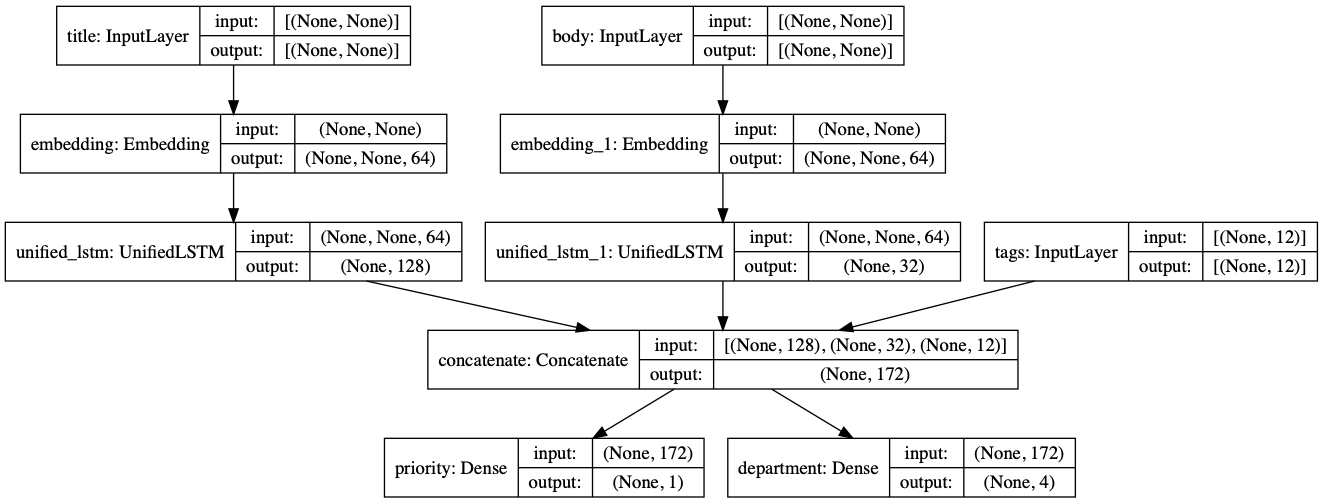

In [17]:
keras.utils.plot_model(model, './TF 2.0 Alpha/models/multi_input_and_output_model_2.png', show_shapes=True)

In [11]:
# When compiling this model, we can assign different losses to each output. You 
# can even assign different weights to each loss, to modulate their contribution 
# to the total training loss.
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss={'priority': 'binary_crossentropy',
                    'department': 'categorical_crossentropy'},
              loss_weights=[1., 0.2])

In [12]:
import numpy as np

# Dummy input data.
# np.random.randint(all_elements_lower_than, size).
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')
# Dummy target data.
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit({'title': title_data, 'body': body_data, 'tags': tags_data},
          {'priority': priority_targets, 'department': dept_targets},
          epochs=2,
          batch_size=32)

Epoch 1/2


  32/1280 [..............................] - ETA: 46s - loss: 1.2444 - priority_loss: 0.7047 - department_loss: 2.6987

  64/1280 [>.............................] - ETA: 30s - loss: 1.2439 - priority_loss: 0.6958 - department_loss: 2.7402

  96/1280 [=>............................] - ETA: 24s - loss: 1.2505 - priority_loss: 0.6978 - department_loss: 2.7634

 128/1280 [==>...........................] - ETA: 22s - loss: 1.2606 - priority_loss: 0.7030 - department_loss: 2.7880

 160/1280 [==>...........................] - ETA: 19s - loss: 1.2576 - priority_loss: 0.7020 - department_loss: 2.7779

 192/1280 [===>..........................] - ETA: 18s - loss: 1.2567 - priority_loss: 0.7009 - department_loss: 2.7789

 224/1280 [====>.........................] - ETA: 17s - loss: 1.2580 - priority_loss: 0.7030 - department_loss: 2.7751

 256/1280 [=====>........................] - ETA: 16s - loss: 1.2640 - priority_loss: 0.7032 - department_loss: 2.8038

 288/1280 [=====>........................] - ETA: 15s - loss: 1.2686 - priority_loss: 0.7010 - department_loss: 2.8377

 320/1280 [======>.......................] - ETA: 15s - loss: 1.2635 - priority_loss: 0.7039 - department_loss: 2.7976

 352/1280 [=======>......................] - ETA: 14s - loss: 1.2647 - priority_loss: 0.7036 - department_loss: 2.8054

 384/1280 [========>.....................] - ETA: 13s - loss: 1.2615 - priority_loss: 0.7037 - department_loss: 2.7890

 416/1280 [========>.....................] - ETA: 12s - loss: 1.2641 - priority_loss: 0.7034 - department_loss: 2.8035

 448/1280 [=========>....................] - ETA: 12s - loss: 1.2667 - priority_loss: 0.7037 - department_loss: 2.8151

 480/1280 [==========>...................] - ETA: 12s - loss: 1.2631 - priority_loss: 0.7037 - department_loss: 2.7971

 512/1280 [===========>..................] - ETA: 12s - loss: 1.2647 - priority_loss: 0.7029 - department_loss: 2.8090

 544/1280 [===========>..................] - ETA: 12s - loss: 1.2635 - priority_loss: 0.7024 - department_loss: 2.8056

 576/1280 [============>.................] - ETA: 12s - loss: 1.2590 - priority_loss: 0.7016 - department_loss: 2.7870

 608/1280 [=============>................] - ETA: 12s - loss: 1.2596 - priority_loss: 0.7014 - department_loss: 2.7910

 640/1280 [==============>...............] - ETA: 11s - loss: 1.2599 - priority_loss: 0.7018 - department_loss: 2.7902

 672/1280 [==============>...............] - ETA: 11s - loss: 1.2589 - priority_loss: 0.7022 - department_loss: 2.7838

 704/1280 [===============>..............] - ETA: 10s - loss: 1.2623 - priority_loss: 0.7019 - department_loss: 2.8019

 736/1280 [================>.............] - ETA: 9s - loss: 1.2606 - priority_loss: 0.7020 - department_loss: 2.7929 

 768/1280 [=================>............] - ETA: 9s - loss: 1.2550 - priority_loss: 0.7015 - department_loss: 2.7671

 800/1280 [=================>............] - ETA: 8s - loss: 1.2583 - priority_loss: 0.7010 - department_loss: 2.7865

 832/1280 [==================>...........] - ETA: 7s - loss: 1.2609 - priority_loss: 0.7001 - department_loss: 2.8039

 864/1280 [===================>..........] - ETA: 7s - loss: 1.2642 - priority_loss: 0.6996 - department_loss: 2.8231

 896/1280 [====================>.........] - ETA: 6s - loss: 1.2648 - priority_loss: 0.6992 - department_loss: 2.8281

 928/1280 [====================>.........] - ETA: 6s - loss: 1.2668 - priority_loss: 0.6989 - department_loss: 2.8395

 960/1280 [=====================>........] - ETA: 5s - loss: 1.2661 - priority_loss: 0.6987 - department_loss: 2.8369

 992/1280 [======================>.......] - ETA: 4s - loss: 1.2685 - priority_loss: 0.6990 - department_loss: 2.8474

1024/1280 [=======================>......] - ETA: 4s - loss: 1.2694 - priority_loss: 0.6987 - department_loss: 2.8537

1056/1280 [=======================>......] - ETA: 3s - loss: 1.2695 - priority_loss: 0.6983 - department_loss: 2.8560

1088/1280 [========================>.....] - ETA: 3s - loss: 1.2706 - priority_loss: 0.6984 - department_loss: 2.8609

1120/1280 [=========================>....] - ETA: 2s - loss: 1.2696 - priority_loss: 0.6985 - department_loss: 2.8553

1152/1280 [==========================>...] - ETA: 2s - loss: 1.2682 - priority_loss: 0.6989 - department_loss: 2.8465

1184/1280 [==========================>...] - ETA: 1s - loss: 1.2680 - priority_loss: 0.6994 - department_loss: 2.8428

1216/1280 [===========================>..] - ETA: 1s - loss: 1.2666 - priority_loss: 0.6988 - department_loss: 2.8388

1248/1280 [============================>.] - ETA: 0s - loss: 1.2664 - priority_loss: 0.6986 - department_loss: 2.8389

1280/1280 [==============================] - 20s 16ms/sample - loss: 1.2663 - priority_loss: 0.6980 - department_loss: 2.8413


Epoch 2/2


  32/1280 [..............................] - ETA: 14s - loss: 1.2515 - priority_loss: 0.6869 - department_loss: 2.8227

  64/1280 [>.............................] - ETA: 14s - loss: 1.2433 - priority_loss: 0.6849 - department_loss: 2.7920

  96/1280 [=>............................] - ETA: 14s - loss: 1.2434 - priority_loss: 0.6894 - department_loss: 2.7703

 128/1280 [==>...........................] - ETA: 14s - loss: 1.2397 - priority_loss: 0.6896 - department_loss: 2.7506

 160/1280 [==>...........................] - ETA: 14s - loss: 1.2352 - priority_loss: 0.6874 - department_loss: 2.7388

 192/1280 [===>..........................] - ETA: 13s - loss: 1.2457 - priority_loss: 0.6893 - department_loss: 2.7824

 224/1280 [====>.........................] - ETA: 13s - loss: 1.2440 - priority_loss: 0.6895 - department_loss: 2.7723

 256/1280 [=====>........................] - ETA: 14s - loss: 1.2524 - priority_loss: 0.6899 - department_loss: 2.8129

 288/1280 [=====>........................] - ETA: 15s - loss: 1.2565 - priority_loss: 0.6894 - department_loss: 2.8355

 320/1280 [======>.......................] - ETA: 16s - loss: 1.2510 - priority_loss: 0.6879 - department_loss: 2.8156

 352/1280 [=======>......................] - ETA: 16s - loss: 1.2537 - priority_loss: 0.6873 - department_loss: 2.8318

 384/1280 [========>.....................] - ETA: 15s - loss: 1.2498 - priority_loss: 0.6862 - department_loss: 2.8176

 416/1280 [========>.....................] - ETA: 15s - loss: 1.2525 - priority_loss: 0.6852 - department_loss: 2.8367

 448/1280 [=========>....................] - ETA: 15s - loss: 1.2454 - priority_loss: 0.6832 - department_loss: 2.8111

 480/1280 [==========>...................] - ETA: 14s - loss: 1.2529 - priority_loss: 0.6813 - department_loss: 2.8577

 512/1280 [===========>..................] - ETA: 15s - loss: 1.2564 - priority_loss: 0.6792 - department_loss: 2.8859

 544/1280 [===========>..................] - ETA: 15s - loss: 1.2492 - priority_loss: 0.6770 - department_loss: 2.8611

 576/1280 [============>.................] - ETA: 14s - loss: 1.2432 - priority_loss: 0.6731 - department_loss: 2.8502

 608/1280 [=============>................] - ETA: 14s - loss: 1.2400 - priority_loss: 0.6707 - department_loss: 2.8470

 640/1280 [==============>...............] - ETA: 13s - loss: 1.2345 - priority_loss: 0.6686 - department_loss: 2.8291

 672/1280 [==============>...............] - ETA: 13s - loss: 1.2286 - priority_loss: 0.6654 - department_loss: 2.8158

 704/1280 [===============>..............] - ETA: 12s - loss: 1.2286 - priority_loss: 0.6631 - department_loss: 2.8276

 736/1280 [================>.............] - ETA: 11s - loss: 1.2249 - priority_loss: 0.6603 - department_loss: 2.8231

 768/1280 [=================>............] - ETA: 11s - loss: 1.2231 - priority_loss: 0.6580 - department_loss: 2.8254

 800/1280 [=================>............] - ETA: 10s - loss: 1.2228 - priority_loss: 0.6573 - department_loss: 2.8274

 832/1280 [==================>...........] - ETA: 9s - loss: 1.2196 - priority_loss: 0.6570 - department_loss: 2.8131 

 864/1280 [===================>..........] - ETA: 8s - loss: 1.2178 - priority_loss: 0.6554 - department_loss: 2.8120

 896/1280 [====================>.........] - ETA: 8s - loss: 1.2182 - priority_loss: 0.6569 - department_loss: 2.8064

 928/1280 [====================>.........] - ETA: 7s - loss: 1.2150 - priority_loss: 0.6571 - department_loss: 2.7895

 960/1280 [=====================>........] - ETA: 6s - loss: 1.2162 - priority_loss: 0.6560 - department_loss: 2.8007

 992/1280 [======================>.......] - ETA: 6s - loss: 1.2120 - priority_loss: 0.6550 - department_loss: 2.7851

1024/1280 [=======================>......] - ETA: 5s - loss: 1.2110 - priority_loss: 0.6537 - department_loss: 2.7867

1056/1280 [=======================>......] - ETA: 4s - loss: 1.2114 - priority_loss: 0.6529 - department_loss: 2.7925

1088/1280 [========================>.....] - ETA: 3s - loss: 1.2124 - priority_loss: 0.6524 - department_loss: 2.8000

1120/1280 [=========================>....] - ETA: 3s - loss: 1.2098 - priority_loss: 0.6515 - department_loss: 2.7915

1152/1280 [==========================>...] - ETA: 2s - loss: 1.2109 - priority_loss: 0.6511 - department_loss: 2.7989

1184/1280 [==========================>...] - ETA: 1s - loss: 1.2096 - priority_loss: 0.6503 - department_loss: 2.7965

1216/1280 [===========================>..] - ETA: 1s - loss: 1.2080 - priority_loss: 0.6498 - department_loss: 2.7911

1248/1280 [============================>.] - ETA: 0s - loss: 1.2079 - priority_loss: 0.6475 - department_loss: 2.8022

1280/1280 [==============================] - 25s 20ms/sample - loss: 1.2095 - priority_loss: 0.6469 - department_loss: 2.8130


In [20]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_9[0][0]                   
_________________________________________________________________________________________

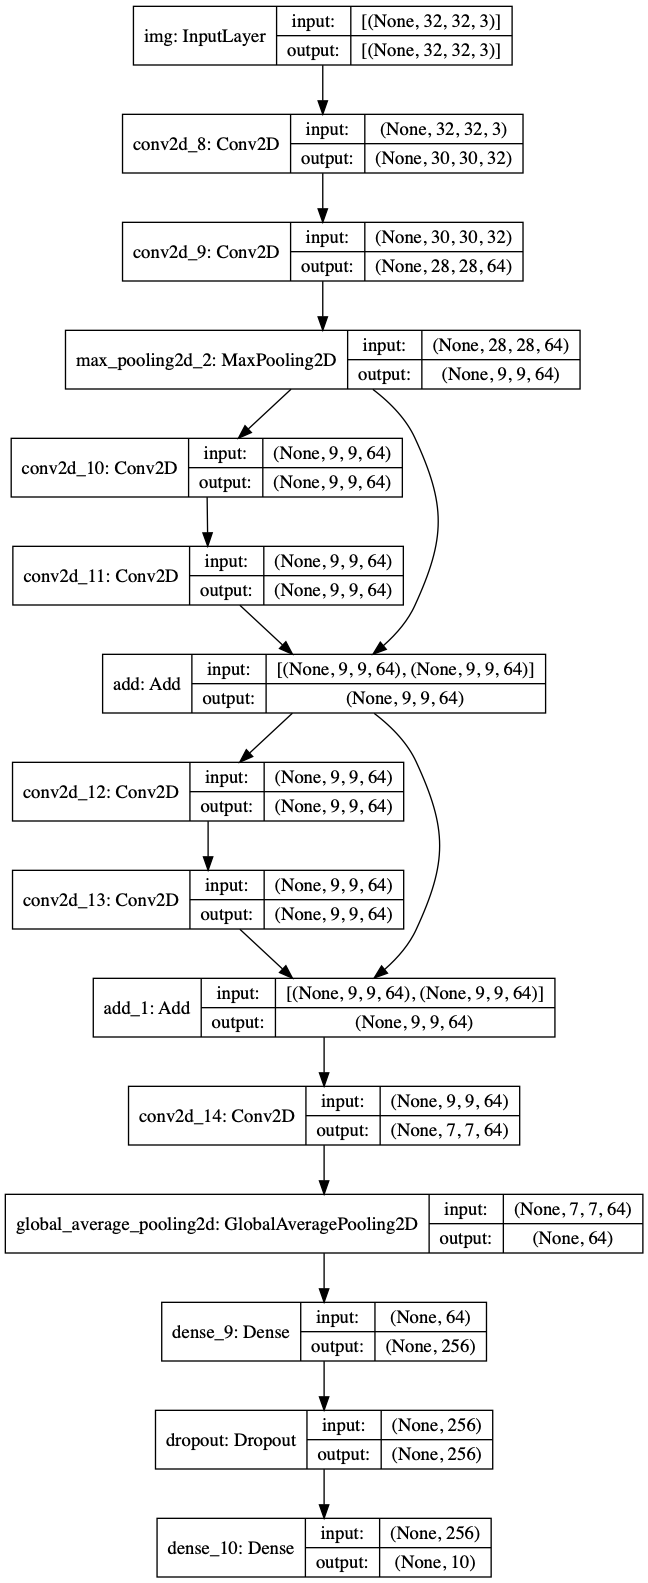

In [21]:
keras.utils.plot_model(model, './TF 2.0 Alpha/models/mini_resnet.png', show_shapes=True)

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

     8192/170498071 [..............................] - ETA: 38:17

    40960/170498071 [..............................] - ETA: 15:32

    90112/170498071 [..............................] - ETA: 10:27

   172032/170498071 [..............................] - ETA: 6:18 

   188416/170498071 [..............................] - ETA: 6:38

   270336/170498071 [..............................] - ETA: 5:14

   319488/170498071 [..............................] - ETA: 5:07

   417792/170498071 [..............................] - ETA: 4:16

   466944/170498071 [..............................] - ETA: 4:08

   516096/170498071 [..............................] - ETA: 4:02

   598016/170498071 [..............................] - ETA: 3:43

   647168/170498071 [..............................] - ETA: 4:29

   778240/170498071 [..............................] - ETA: 3:59

  1056768/170498071 [..............................] - ETA: 3:05

  1089536/170498071 [..............................] - ETA: 3:07

  1171456/170498071 [..............................] - ETA: 3:01

  1253376/170498071 [..............................] - ETA: 3:00

  1351680/170498071 [..............................] - ETA: 2:54

  1417216/170498071 [..............................] - ETA: 2:52

  1482752/170498071 [..............................] - ETA: 2:51

  1581056/170498071 [..............................] - ETA: 2:48

  1646592/170498071 [..............................] - ETA: 2:47

  1728512/170498071 [..............................] - ETA: 2:45

  1810432/170498071 [..............................] - ETA: 2:43

  1892352/170498071 [..............................] - ETA: 2:42

  1974272/170498071 [..............................] - ETA: 2:40

  2039808/170498071 [..............................] - ETA: 2:39

  2105344/170498071 [..............................] - ETA: 2:38

  2187264/170498071 [..............................] - ETA: 2:37

  2252800/170498071 [..............................] - ETA: 2:36

  2318336/170498071 [..............................] - ETA: 2:36

  2400256/170498071 [..............................] - ETA: 2:35

  2433024/170498071 [..............................] - ETA: 2:51

  2777088/170498071 [..............................] - ETA: 2:32

  2826240/170498071 [..............................] - ETA: 2:34

  2891776/170498071 [..............................] - ETA: 2:33

  2957312/170498071 [..............................] - ETA: 2:33

  3006464/170498071 [..............................] - ETA: 2:34

  3088384/170498071 [..............................] - ETA: 2:33

  3137536/170498071 [..............................] - ETA: 2:33

  3219456/170498071 [..............................] - ETA: 2:32

  3317760/170498071 [..............................] - ETA: 2:30

  3350528/170498071 [..............................] - ETA: 2:31

  3399680/170498071 [..............................] - ETA: 2:39

  3645440/170498071 [..............................] - ETA: 2:31

  3678208/170498071 [..............................] - ETA: 2:32

  3760128/170498071 [..............................] - ETA: 2:31

  3809280/170498071 [..............................] - ETA: 2:32

  3874816/170498071 [..............................] - ETA: 2:32

  3923968/170498071 [..............................] - ETA: 2:32

  3989504/170498071 [..............................] - ETA: 2:31

  4038656/170498071 [..............................] - ETA: 2:32

  4104192/170498071 [..............................] - ETA: 2:32

  4169728/170498071 [..............................] - ETA: 2:32

  4235264/170498071 [..............................] - ETA: 2:32

  4300800/170498071 [..............................] - ETA: 2:32

  4366336/170498071 [..............................] - ETA: 2:32

  4415488/170498071 [..............................] - ETA: 2:32

  4481024/170498071 [..............................] - ETA: 2:32

  4530176/170498071 [..............................] - ETA: 2:32

  4595712/170498071 [..............................] - ETA: 2:32

  4644864/170498071 [..............................] - ETA: 2:32

  4710400/170498071 [..............................] - ETA: 2:32

  4775936/170498071 [..............................] - ETA: 2:33

  4857856/170498071 [..............................] - ETA: 2:32

  4923392/170498071 [..............................] - ETA: 2:32

  4988928/170498071 [..............................] - ETA: 2:32

  5038080/170498071 [..............................] - ETA: 2:32

  5103616/170498071 [..............................] - ETA: 2:32

  5169152/170498071 [..............................] - ETA: 2:32

  5185536/170498071 [..............................] - ETA: 2:38

  5398528/170498071 [..............................] - ETA: 2:35

  5447680/170498071 [..............................] - ETA: 2:35

  5513216/170498071 [..............................] - ETA: 2:35

  5562368/170498071 [..............................] - ETA: 2:36

  5595136/170498071 [..............................] - ETA: 2:36

  5677056/170498071 [..............................] - ETA: 2:36

  5709824/170498071 [>.............................] - ETA: 2:37

  5791744/170498071 [>.............................] - ETA: 2:36

  5824512/170498071 [>.............................] - ETA: 2:37

  5906432/170498071 [>.............................] - ETA: 2:37

  5955584/170498071 [>.............................] - ETA: 2:37

  6004736/170498071 [>.............................] - ETA: 2:37

  6053888/170498071 [>.............................] - ETA: 2:37

  6119424/170498071 [>.............................] - ETA: 2:38

  6168576/170498071 [>.............................] - ETA: 2:38

  6234112/170498071 [>.............................] - ETA: 2:38

  6299648/170498071 [>.............................] - ETA: 2:39

  6365184/170498071 [>.............................] - ETA: 2:38

  6414336/170498071 [>.............................] - ETA: 2:39

  6463488/170498071 [>.............................] - ETA: 2:39

  6545408/170498071 [>.............................] - ETA: 2:38

  6578176/170498071 [>.............................] - ETA: 2:43

  6742016/170498071 [>.............................] - ETA: 2:41

  6823936/170498071 [>.............................] - ETA: 2:42

  6905856/170498071 [>.............................] - ETA: 2:42

  6922240/170498071 [>.............................] - ETA: 2:43

  6987776/170498071 [>.............................] - ETA: 2:42

  7036928/170498071 [>.............................] - ETA: 2:43

  7086080/170498071 [>.............................] - ETA: 2:43

  7135232/170498071 [>.............................] - ETA: 2:43

  7184384/170498071 [>.............................] - ETA: 2:43

  7249920/170498071 [>.............................] - ETA: 2:44

  7315456/170498071 [>.............................] - ETA: 2:43

  7364608/170498071 [>.............................] - ETA: 2:44

  7430144/170498071 [>.............................] - ETA: 2:43

  7479296/170498071 [>.............................] - ETA: 2:43

  7544832/170498071 [>.............................] - ETA: 2:44

  7626752/170498071 [>.............................] - ETA: 2:43

  7659520/170498071 [>.............................] - ETA: 2:44

  7725056/170498071 [>.............................] - ETA: 2:44

  7757824/170498071 [>.............................] - ETA: 2:44

  7790592/170498071 [>.............................] - ETA: 2:44

  7856128/170498071 [>.............................] - ETA: 2:44

  7888896/170498071 [>.............................] - ETA: 2:45

  7970816/170498071 [>.............................] - ETA: 2:44

  8003584/170498071 [>.............................] - ETA: 2:45

  8069120/170498071 [>.............................] - ETA: 2:44

  8118272/170498071 [>.............................] - ETA: 2:45

  8183808/170498071 [>.............................] - ETA: 2:44

  8249344/170498071 [>.............................] - ETA: 2:45

  8298496/170498071 [>.............................] - ETA: 2:45

  8364032/170498071 [>.............................] - ETA: 2:45

  8413184/170498071 [>.............................] - ETA: 2:45

  8478720/170498071 [>.............................] - ETA: 2:45

  8544256/170498071 [>.............................] - ETA: 2:45

  8609792/170498071 [>.............................] - ETA: 2:48

  8740864/170498071 [>.............................] - ETA: 2:48

  8822784/170498071 [>.............................] - ETA: 2:48

  8871936/170498071 [>.............................] - ETA: 2:48

  8921088/170498071 [>.............................] - ETA: 2:48

  8953856/170498071 [>.............................] - ETA: 2:48

  9003008/170498071 [>.............................] - ETA: 2:48

  9035776/170498071 [>.............................] - ETA: 2:49

  9076736/170498071 [>.............................] - ETA: 2:49

  9117696/170498071 [>.............................] - ETA: 2:49

  9183232/170498071 [>.............................] - ETA: 2:49

  9216000/170498071 [>.............................] - ETA: 2:49

  9281536/170498071 [>.............................] - ETA: 2:49

  9314304/170498071 [>.............................] - ETA: 2:49

  9379840/170498071 [>.............................] - ETA: 2:49

  9412608/170498071 [>.............................] - ETA: 2:49

  9478144/170498071 [>.............................] - ETA: 2:50

  9543680/170498071 [>.............................] - ETA: 2:49

  9576448/170498071 [>.............................] - ETA: 2:50

  9658368/170498071 [>.............................] - ETA: 2:50

  9723904/170498071 [>.............................] - ETA: 2:50

  9773056/170498071 [>.............................] - ETA: 2:50

  9838592/170498071 [>.............................] - ETA: 2:50

  9871360/170498071 [>.............................] - ETA: 2:50

  9936896/170498071 [>.............................] - ETA: 2:50

  9969664/170498071 [>.............................] - ETA: 2:50

 10018816/170498071 [>.............................] - ETA: 2:50

 10067968/170498071 [>.............................] - ETA: 2:50

 10117120/170498071 [>.............................] - ETA: 2:50

 10182656/170498071 [>.............................] - ETA: 2:50

 10231808/170498071 [>.............................] - ETA: 2:50

 10313728/170498071 [>.............................] - ETA: 2:50

 10379264/170498071 [>.............................] - ETA: 2:50

 10444800/170498071 [>.............................] - ETA: 2:50

 10526720/170498071 [>.............................] - ETA: 2:49

 10543104/170498071 [>.............................] - ETA: 2:50

 10625024/170498071 [>.............................] - ETA: 2:49

 10657792/170498071 [>.............................] - ETA: 2:49

 10739712/170498071 [>.............................] - ETA: 2:49

 10756096/170498071 [>.............................] - ETA: 2:50

 10821632/170498071 [>.............................] - ETA: 2:49

 10854400/170498071 [>.............................] - ETA: 2:50

 10936320/170498071 [>.............................] - ETA: 2:49

 10969088/170498071 [>.............................] - ETA: 2:50

 11034624/170498071 [>.............................] - ETA: 2:49

 11067392/170498071 [>.............................] - ETA: 2:49

 11132928/170498071 [>.............................] - ETA: 2:49

 11182080/170498071 [>.............................] - ETA: 2:49

 11247616/170498071 [>.............................] - ETA: 2:49

 11313152/170498071 [>.............................] - ETA: 2:49

 11378688/170498071 [=>............................] - ETA: 2:49

 11427840/170498071 [=>............................] - ETA: 2:49

 11493376/170498071 [=>............................] - ETA: 2:49

 11542528/170498071 [=>............................] - ETA: 2:49

 11608064/170498071 [=>............................] - ETA: 2:49

 11673600/170498071 [=>............................] - ETA: 2:49

 11739136/170498071 [=>............................] - ETA: 2:49

 11788288/170498071 [=>............................] - ETA: 2:49

 11837440/170498071 [=>............................] - ETA: 2:49

 11886592/170498071 [=>............................] - ETA: 2:49

 11935744/170498071 [=>............................] - ETA: 2:49

 12001280/170498071 [=>............................] - ETA: 2:49

 12050432/170498071 [=>............................] - ETA: 2:49

 12099584/170498071 [=>............................] - ETA: 2:49

 12148736/170498071 [=>............................] - ETA: 2:49

 12214272/170498071 [=>............................] - ETA: 2:49

 12263424/170498071 [=>............................] - ETA: 2:49

 12328960/170498071 [=>............................] - ETA: 2:49

 12394496/170498071 [=>............................] - ETA: 2:49

 12460032/170498071 [=>............................] - ETA: 2:49

 12492800/170498071 [=>............................] - ETA: 2:49

 12541952/170498071 [=>............................] - ETA: 2:49

 12591104/170498071 [=>............................] - ETA: 2:49

 12640256/170498071 [=>............................] - ETA: 2:49

 12705792/170498071 [=>............................] - ETA: 2:49

 12754944/170498071 [=>............................] - ETA: 2:49

 12820480/170498071 [=>............................] - ETA: 2:49

 12886016/170498071 [=>............................] - ETA: 2:49

 12935168/170498071 [=>............................] - ETA: 2:49

 12984320/170498071 [=>............................] - ETA: 2:49

 13033472/170498071 [=>............................] - ETA: 2:49

 13082624/170498071 [=>............................] - ETA: 2:49

 13131776/170498071 [=>............................] - ETA: 2:49

 13180928/170498071 [=>............................] - ETA: 2:49

 13246464/170498071 [=>............................] - ETA: 2:49

 13295616/170498071 [=>............................] - ETA: 2:49

 13361152/170498071 [=>............................] - ETA: 2:49

 13393920/170498071 [=>............................] - ETA: 2:49

 13443072/170498071 [=>............................] - ETA: 2:49

 13508608/170498071 [=>............................] - ETA: 2:49

 13574144/170498071 [=>............................] - ETA: 2:49

 13623296/170498071 [=>............................] - ETA: 2:49

 13688832/170498071 [=>............................] - ETA: 2:50

 13754368/170498071 [=>............................] - ETA: 2:49

 13803520/170498071 [=>............................] - ETA: 2:50

 13901824/170498071 [=>............................] - ETA: 2:49

 13918208/170498071 [=>............................] - ETA: 2:49

 14016512/170498071 [=>............................] - ETA: 2:49

 14032896/170498071 [=>............................] - ETA: 2:49

 14082048/170498071 [=>............................] - ETA: 2:49

 14131200/170498071 [=>............................] - ETA: 2:49

 14196736/170498071 [=>............................] - ETA: 2:49

 14278656/170498071 [=>............................] - ETA: 2:49

 14311424/170498071 [=>............................] - ETA: 2:49

 14376960/170498071 [=>............................] - ETA: 2:49

 14426112/170498071 [=>............................] - ETA: 2:49

 14524416/170498071 [=>............................] - ETA: 2:48

 14573568/170498071 [=>............................] - ETA: 2:48

 14622720/170498071 [=>............................] - ETA: 2:48

 14688256/170498071 [=>............................] - ETA: 2:48

 14753792/170498071 [=>............................] - ETA: 2:48

 14802944/170498071 [=>............................] - ETA: 2:48

 14868480/170498071 [=>............................] - ETA: 2:48

 14917632/170498071 [=>............................] - ETA: 2:48

 14983168/170498071 [=>............................] - ETA: 2:48

 15048704/170498071 [=>............................] - ETA: 2:48

 15114240/170498071 [=>............................] - ETA: 2:47

 15163392/170498071 [=>............................] - ETA: 2:47

 15212544/170498071 [=>............................] - ETA: 2:47

 15278080/170498071 [=>............................] - ETA: 2:47

 15327232/170498071 [=>............................] - ETA: 2:47

 15392768/170498071 [=>............................] - ETA: 2:47

 15458304/170498071 [=>............................] - ETA: 2:47

 15523840/170498071 [=>............................] - ETA: 2:47

 15572992/170498071 [=>............................] - ETA: 2:47

 15622144/170498071 [=>............................] - ETA: 2:47

 15687680/170498071 [=>............................] - ETA: 2:46

 15720448/170498071 [=>............................] - ETA: 2:47

 15785984/170498071 [=>............................] - ETA: 2:46

 15835136/170498071 [=>............................] - ETA: 2:46

 15900672/170498071 [=>............................] - ETA: 2:46

 15949824/170498071 [=>............................] - ETA: 2:46

 16015360/170498071 [=>............................] - ETA: 2:46

 16113664/170498071 [=>............................] - ETA: 2:46

 16162816/170498071 [=>............................] - ETA: 2:46

 16261120/170498071 [=>............................] - ETA: 2:45

 16326656/170498071 [=>............................] - ETA: 2:45

 16392192/170498071 [=>............................] - ETA: 2:45

 16441344/170498071 [=>............................] - ETA: 2:45

 16506880/170498071 [=>............................] - ETA: 2:45

 16572416/170498071 [=>............................] - ETA: 2:45

 16621568/170498071 [=>............................] - ETA: 2:45

 16687104/170498071 [=>............................] - ETA: 2:44

 16752640/170498071 [=>............................] - ETA: 2:44

 16818176/170498071 [=>............................] - ETA: 2:44

 16883712/170498071 [=>............................] - ETA: 2:44

 16949248/170498071 [=>............................] - ETA: 2:44

 17031168/170498071 [=>............................] - ETA: 2:43

 17096704/170498071 [==>...........................] - ETA: 2:43

 17162240/170498071 [==>...........................] - ETA: 2:43

 17227776/170498071 [==>...........................] - ETA: 2:43

 17293312/170498071 [==>...........................] - ETA: 2:43

 17375232/170498071 [==>...........................] - ETA: 2:43

 17440768/170498071 [==>...........................] - ETA: 2:42

 17522688/170498071 [==>...........................] - ETA: 2:42

 17588224/170498071 [==>...........................] - ETA: 2:42

 17653760/170498071 [==>...........................] - ETA: 2:42

 17719296/170498071 [==>...........................] - ETA: 2:42

 17784832/170498071 [==>...........................] - ETA: 2:41

 17833984/170498071 [==>...........................] - ETA: 2:41

 17915904/170498071 [==>...........................] - ETA: 2:41

 17997824/170498071 [==>...........................] - ETA: 2:41

 18063360/170498071 [==>...........................] - ETA: 2:41

 18145280/170498071 [==>...........................] - ETA: 2:40

 18227200/170498071 [==>...........................] - ETA: 2:40

 18276352/170498071 [==>...........................] - ETA: 2:40

 18358272/170498071 [==>...........................] - ETA: 2:40

 18423808/170498071 [==>...........................] - ETA: 2:39

 18489344/170498071 [==>...........................] - ETA: 2:39



 18538496/170498071 [==>...........................] - ETA: 2:40

 18685952/170498071 [==>...........................] - ETA: 2:39

 18751488/170498071 [==>...........................] - ETA: 2:38

 18817024/170498071 [==>...........................] - ETA: 2:38

 18915328/170498071 [==>...........................] - ETA: 2:38

 18980864/170498071 [==>...........................] - ETA: 2:38

 19046400/170498071 [==>...........................] - ETA: 2:38

 19144704/170498071 [==>...........................] - ETA: 2:37

 19243008/170498071 [==>...........................] - ETA: 2:37

 19341312/170498071 [==>...........................] - ETA: 2:36

 19439616/170498071 [==>...........................] - ETA: 2:36

 19537920/170498071 [==>...........................] - ETA: 2:35

 19636224/170498071 [==>...........................] - ETA: 2:35

 19734528/170498071 [==>...........................] - ETA: 2:34

 19832832/170498071 [==>...........................] - ETA: 2:34

 19947520/170498071 [==>...........................] - ETA: 2:33

 20045824/170498071 [==>...........................] - ETA: 2:33

 20144128/170498071 [==>...........................] - ETA: 2:32

 20242432/170498071 [==>...........................] - ETA: 2:32

 20340736/170498071 [==>...........................] - ETA: 2:31

 20439040/170498071 [==>...........................] - ETA: 2:31

 20537344/170498071 [==>...........................] - ETA: 2:31

 20635648/170498071 [==>...........................] - ETA: 2:30

 20733952/170498071 [==>...........................] - ETA: 2:30

 20783104/170498071 [==>...........................] - ETA: 2:30

 20963328/170498071 [==>...........................] - ETA: 2:29

 21061632/170498071 [==>...........................] - ETA: 2:28

 21159936/170498071 [==>...........................] - ETA: 2:28

 21258240/170498071 [==>...........................] - ETA: 2:27

 21356544/170498071 [==>...........................] - ETA: 2:27

 21454848/170498071 [==>...........................] - ETA: 2:27

 21553152/170498071 [==>...........................] - ETA: 2:26

 21651456/170498071 [==>...........................] - ETA: 2:26

 21749760/170498071 [==>...........................] - ETA: 2:25

 21782528/170498071 [==>...........................] - ETA: 2:27

 22323200/170498071 [==>...........................] - ETA: 2:23

 22421504/170498071 [==>...........................] - ETA: 2:23

 22519808/170498071 [==>...........................] - ETA: 2:22

 22618112/170498071 [==>...........................] - ETA: 2:22

 22634496/170498071 [==>...........................] - ETA: 2:23

 22896640/170498071 [===>..........................] - ETA: 2:21

 22994944/170498071 [===>..........................] - ETA: 2:21

 23093248/170498071 [===>..........................] - ETA: 2:20

 23207936/170498071 [===>..........................] - ETA: 2:20

 23322624/170498071 [===>..........................] - ETA: 2:19

 23420928/170498071 [===>..........................] - ETA: 2:19

 23519232/170498071 [===>..........................] - ETA: 2:19

 23617536/170498071 [===>..........................] - ETA: 2:18

 23732224/170498071 [===>..........................] - ETA: 2:18

 23830528/170498071 [===>..........................] - ETA: 2:18

 23928832/170498071 [===>..........................] - ETA: 2:17

 24027136/170498071 [===>..........................] - ETA: 2:17

 24125440/170498071 [===>..........................] - ETA: 2:17

 24207360/170498071 [===>..........................] - ETA: 2:17

 24322048/170498071 [===>..........................] - ETA: 2:16

 24420352/170498071 [===>..........................] - ETA: 2:16

 24518656/170498071 [===>..........................] - ETA: 2:15

 24616960/170498071 [===>..........................] - ETA: 2:15

 24731648/170498071 [===>..........................] - ETA: 2:15

 24829952/170498071 [===>..........................] - ETA: 2:14

 24928256/170498071 [===>..........................] - ETA: 2:14

 25026560/170498071 [===>..........................] - ETA: 2:14

 25141248/170498071 [===>..........................] - ETA: 2:13

 25239552/170498071 [===>..........................] - ETA: 2:13

 25337856/170498071 [===>..........................] - ETA: 2:13

 25436160/170498071 [===>..........................] - ETA: 2:13

 25534464/170498071 [===>..........................] - ETA: 2:12

 25632768/170498071 [===>..........................] - ETA: 2:12

 25731072/170498071 [===>..........................] - ETA: 2:12

 25829376/170498071 [===>..........................] - ETA: 2:11

 25927680/170498071 [===>..........................] - ETA: 2:11

 26025984/170498071 [===>..........................] - ETA: 2:11

 26124288/170498071 [===>..........................] - ETA: 2:10

 26222592/170498071 [===>..........................] - ETA: 2:10

 26288128/170498071 [===>..........................] - ETA: 2:11

 26787840/170498071 [===>..........................] - ETA: 2:09

 26877952/170498071 [===>..........................] - ETA: 2:08

 26976256/170498071 [===>..........................] - ETA: 2:08

 27074560/170498071 [===>..........................] - ETA: 2:08

 27172864/170498071 [===>..........................] - ETA: 2:07

 27271168/170498071 [===>..........................] - ETA: 2:07

 27287552/170498071 [===>..........................] - ETA: 2:07

 27320320/170498071 [===>..........................] - ETA: 2:07

 27566080/170498071 [===>..........................] - ETA: 2:06

 27582464/170498071 [===>..........................] - ETA: 2:07

 27680768/170498071 [===>..........................] - ETA: 2:07

 27795456/170498071 [===>..........................] - ETA: 2:06

 27877376/170498071 [===>..........................] - ETA: 2:06

 27926528/170498071 [===>..........................] - ETA: 2:06

 28024832/170498071 [===>..........................] - ETA: 2:06

 28123136/170498071 [===>..........................] - ETA: 2:06

 28172288/170498071 [===>..........................] - ETA: 2:06

 28254208/170498071 [===>..........................] - ETA: 2:05

 28352512/170498071 [===>..........................] - ETA: 2:05

 28418048/170498071 [====>.........................] - ETA: 2:05

 28467200/170498071 [====>.........................] - ETA: 2:05

 28565504/170498071 [====>.........................] - ETA: 2:05

 28663808/170498071 [====>.........................] - ETA: 2:05

 28729344/170498071 [====>.........................] - ETA: 2:05

 28811264/170498071 [====>.........................] - ETA: 2:05

 28909568/170498071 [====>.........................] - ETA: 2:04

 28975104/170498071 [====>.........................] - ETA: 2:04

 29040640/170498071 [====>.........................] - ETA: 2:04

 29122560/170498071 [====>.........................] - ETA: 2:04

 29204480/170498071 [====>.........................] - ETA: 2:04

 29270016/170498071 [====>.........................] - ETA: 2:04

 29351936/170498071 [====>.........................] - ETA: 2:04

 29433856/170498071 [====>.........................] - ETA: 2:03

 29515776/170498071 [====>.........................] - ETA: 2:03

 29581312/170498071 [====>.........................] - ETA: 2:03

 29679616/170498071 [====>.........................] - ETA: 2:03

 29761536/170498071 [====>.........................] - ETA: 2:03

 29859840/170498071 [====>.........................] - ETA: 2:03

 29958144/170498071 [====>.........................] - ETA: 2:02

 30023680/170498071 [====>.........................] - ETA: 2:02

 30121984/170498071 [====>.........................] - ETA: 2:02

 30171136/170498071 [====>.........................] - ETA: 2:03

 30580736/170498071 [====>.........................] - ETA: 2:01

 30679040/170498071 [====>.........................] - ETA: 2:01

 30744576/170498071 [====>.........................] - ETA: 2:01

 30810112/170498071 [====>.........................] - ETA: 2:01

 30892032/170498071 [====>.........................] - ETA: 2:01

 30973952/170498071 [====>.........................] - ETA: 2:01

 31039488/170498071 [====>.........................] - ETA: 2:01

 31137792/170498071 [====>.........................] - ETA: 2:01

 31203328/170498071 [====>.........................] - ETA: 2:00

 31268864/170498071 [====>.........................] - ETA: 2:00

 31350784/170498071 [====>.........................] - ETA: 2:00

 31416320/170498071 [====>.........................] - ETA: 2:00

 31498240/170498071 [====>.........................] - ETA: 2:00

 31563776/170498071 [====>.........................] - ETA: 2:00

 31629312/170498071 [====>.........................] - ETA: 2:00

 31711232/170498071 [====>.........................] - ETA: 2:00

 31760384/170498071 [====>.........................] - ETA: 2:00

 31842304/170498071 [====>.........................] - ETA: 2:00

 31924224/170498071 [====>.........................] - ETA: 2:00

 31973376/170498071 [====>.........................] - ETA: 2:00

 32055296/170498071 [====>.........................] - ETA: 1:59

 32137216/170498071 [====>.........................] - ETA: 1:59

 32186368/170498071 [====>.........................] - ETA: 1:59

 32268288/170498071 [====>.........................] - ETA: 1:59

 32366592/170498071 [====>.........................] - ETA: 1:59

 32432128/170498071 [====>.........................] - ETA: 1:59

 32497664/170498071 [====>.........................] - ETA: 1:59

 32579584/170498071 [====>.........................] - ETA: 1:59

 32645120/170498071 [====>.........................] - ETA: 1:59

 32710656/170498071 [====>.........................] - ETA: 1:59

 32792576/170498071 [====>.........................] - ETA: 1:58

 32858112/170498071 [====>.........................] - ETA: 1:59

 33202176/170498071 [====>.........................] - ETA: 1:58

 33251328/170498071 [====>.........................] - ETA: 1:58

 33333248/170498071 [====>.........................] - ETA: 1:58

 33415168/170498071 [====>.........................] - ETA: 1:58

 33447936/170498071 [====>.........................] - ETA: 1:58

 33529856/170498071 [====>.........................] - ETA: 1:58

 33595392/170498071 [====>.........................] - ETA: 1:58

 33644544/170498071 [====>.........................] - ETA: 1:58

 33726464/170498071 [====>.........................] - ETA: 1:58

 33775616/170498071 [====>.........................] - ETA: 1:58

 33857536/170498071 [====>.........................] - ETA: 1:57

 33923072/170498071 [====>.........................] - ETA: 1:57

 33988608/170498071 [====>.........................] - ETA: 1:57

 34054144/170498071 [====>.........................] - ETA: 1:57

 34119680/170498071 [=====>........................] - ETA: 1:57

 34177024/170498071 [=====>........................] - ETA: 1:57

 34234368/170498071 [=====>........................] - ETA: 1:57

 34299904/170498071 [=====>........................] - ETA: 1:57

 34365440/170498071 [=====>........................] - ETA: 1:57

 34430976/170498071 [=====>........................] - ETA: 1:57

 34529280/170498071 [=====>........................] - ETA: 1:57

 34594816/170498071 [=====>........................] - ETA: 1:57

 34643968/170498071 [=====>........................] - ETA: 1:57

 34709504/170498071 [=====>........................] - ETA: 1:57

 34807808/170498071 [=====>........................] - ETA: 1:57

 34856960/170498071 [=====>........................] - ETA: 1:57

 34971648/170498071 [=====>........................] - ETA: 1:56

 35069952/170498071 [=====>........................] - ETA: 1:56

 35168256/170498071 [=====>........................] - ETA: 1:56

 35266560/170498071 [=====>........................] - ETA: 1:56

 35364864/170498071 [=====>........................] - ETA: 1:56

 35479552/170498071 [=====>........................] - ETA: 1:55

 35577856/170498071 [=====>........................] - ETA: 1:55

 35676160/170498071 [=====>........................] - ETA: 1:55

 35774464/170498071 [=====>........................] - ETA: 1:55

 35872768/170498071 [=====>........................] - ETA: 1:55

 35971072/170498071 [=====>........................] - ETA: 1:54

 36069376/170498071 [=====>........................] - ETA: 1:54

 36167680/170498071 [=====>........................] - ETA: 1:54

 36265984/170498071 [=====>........................] - ETA: 1:54

 36364288/170498071 [=====>........................] - ETA: 1:54

 36462592/170498071 [=====>........................] - ETA: 1:53

 36560896/170498071 [=====>........................] - ETA: 1:53

 36659200/170498071 [=====>........................] - ETA: 1:53

 36757504/170498071 [=====>........................] - ETA: 1:53

 36855808/170498071 [=====>........................] - ETA: 1:53

 36954112/170498071 [=====>........................] - ETA: 1:52

 37052416/170498071 [=====>........................] - ETA: 1:52

 37167104/170498071 [=====>........................] - ETA: 1:52

 37249024/170498071 [=====>........................] - ETA: 1:52

 37347328/170498071 [=====>........................] - ETA: 1:52

 37445632/170498071 [=====>........................] - ETA: 1:51

 37543936/170498071 [=====>........................] - ETA: 1:51

 37642240/170498071 [=====>........................] - ETA: 1:51

 37740544/170498071 [=====>........................] - ETA: 1:51

 37838848/170498071 [=====>........................] - ETA: 1:51

 37937152/170498071 [=====>........................] - ETA: 1:50

 38035456/170498071 [=====>........................] - ETA: 1:50

 38133760/170498071 [=====>........................] - ETA: 1:50

 38232064/170498071 [=====>........................] - ETA: 1:50

 38330368/170498071 [=====>........................] - ETA: 1:50

 38428672/170498071 [=====>........................] - ETA: 1:50

 38526976/170498071 [=====>........................] - ETA: 1:49

 38625280/170498071 [=====>........................] - ETA: 1:49

 38723584/170498071 [=====>........................] - ETA: 1:49

 38821888/170498071 [=====>........................] - ETA: 1:49

 38920192/170498071 [=====>........................] - ETA: 1:49

 39018496/170498071 [=====>........................] - ETA: 1:48

 39116800/170498071 [=====>........................] - ETA: 1:48

 39215104/170498071 [=====>........................] - ETA: 1:48

 39313408/170498071 [=====>........................] - ETA: 1:48

 39411712/170498071 [=====>........................] - ETA: 1:48

 39510016/170498071 [=====>........................] - ETA: 1:48

 39608320/170498071 [=====>........................] - ETA: 1:47

 39706624/170498071 [=====>........................] - ETA: 1:47

 39804928/170498071 [======>.......................] - ETA: 1:47

 39903232/170498071 [======>.......................] - ETA: 1:47

 40017920/170498071 [======>.......................] - ETA: 1:47

 40116224/170498071 [======>.......................] - ETA: 1:47

 40214528/170498071 [======>.......................] - ETA: 1:46

 40312832/170498071 [======>.......................] - ETA: 1:46

 40411136/170498071 [======>.......................] - ETA: 1:46

 40509440/170498071 [======>.......................] - ETA: 1:46

 40607744/170498071 [======>.......................] - ETA: 1:46

 40706048/170498071 [======>.......................] - ETA: 1:46

 40804352/170498071 [======>.......................] - ETA: 1:45

 40902656/170498071 [======>.......................] - ETA: 1:45

 40919040/170498071 [======>.......................] - ETA: 1:46

 41230336/170498071 [======>.......................] - ETA: 1:45

 41279488/170498071 [======>.......................] - ETA: 1:45

 41377792/170498071 [======>.......................] - ETA: 1:45

 41443328/170498071 [======>.......................] - ETA: 1:45

 41525248/170498071 [======>.......................] - ETA: 1:44

 41607168/170498071 [======>.......................] - ETA: 1:44

 41689088/170498071 [======>.......................] - ETA: 1:44

 41787392/170498071 [======>.......................] - ETA: 1:44

 41836544/170498071 [======>.......................] - ETA: 1:44

 41934848/170498071 [======>.......................] - ETA: 1:44

 42000384/170498071 [======>.......................] - ETA: 1:44

 42098688/170498071 [======>.......................] - ETA: 1:44

 42164224/170498071 [======>.......................] - ETA: 1:44

 42344448/170498071 [======>.......................] - ETA: 1:44

 42524672/170498071 [======>.......................] - ETA: 1:44

 42622976/170498071 [======>.......................] - ETA: 1:44

 42688512/170498071 [======>.......................] - ETA: 1:44

 42704896/170498071 [======>.......................] - ETA: 1:44

 42754048/170498071 [======>.......................] - ETA: 1:44

 42835968/170498071 [======>.......................] - ETA: 1:44

 42852352/170498071 [======>.......................] - ETA: 1:44

 42934272/170498071 [======>.......................] - ETA: 1:44

 42999808/170498071 [======>.......................] - ETA: 1:44

 43048960/170498071 [======>.......................] - ETA: 1:44

 43098112/170498071 [======>.......................] - ETA: 1:44

 43147264/170498071 [======>.......................] - ETA: 1:44

 43196416/170498071 [======>.......................] - ETA: 1:44

 43245568/170498071 [======>.......................] - ETA: 1:44

 43311104/170498071 [======>.......................] - ETA: 1:44

 43376640/170498071 [======>.......................] - ETA: 1:44

 43425792/170498071 [======>.......................] - ETA: 1:44

 43474944/170498071 [======>.......................] - ETA: 1:44

 43524096/170498071 [======>.......................] - ETA: 1:44

 43589632/170498071 [======>.......................] - ETA: 1:44

 43655168/170498071 [======>.......................] - ETA: 1:44

 43704320/170498071 [======>.......................] - ETA: 1:44

 43769856/170498071 [======>.......................] - ETA: 1:44

 43819008/170498071 [======>.......................] - ETA: 1:44

 43884544/170498071 [======>.......................] - ETA: 1:44

 43950080/170498071 [======>.......................] - ETA: 1:44

 43982848/170498071 [======>.......................] - ETA: 1:44

 44048384/170498071 [======>.......................] - ETA: 1:44

 44113920/170498071 [======>.......................] - ETA: 1:44

 44163072/170498071 [======>.......................] - ETA: 1:44

 44228608/170498071 [======>.......................] - ETA: 1:44

 44277760/170498071 [======>.......................] - ETA: 1:44

 44326912/170498071 [======>.......................] - ETA: 1:44

 44392448/170498071 [======>.......................] - ETA: 1:44

 44441600/170498071 [======>.......................] - ETA: 1:44

 44474368/170498071 [======>.......................] - ETA: 1:44

 44556288/170498071 [======>.......................] - ETA: 1:44

 44605440/170498071 [======>.......................] - ETA: 1:44

 44654592/170498071 [======>.......................] - ETA: 1:44

 44720128/170498071 [======>.......................] - ETA: 1:44

 44785664/170498071 [======>.......................] - ETA: 1:44

 44851200/170498071 [======>.......................] - ETA: 1:44

 44900352/170498071 [======>.......................] - ETA: 1:44

 44965888/170498071 [======>.......................] - ETA: 1:44

 45015040/170498071 [======>.......................] - ETA: 1:44

 45064192/170498071 [======>.......................] - ETA: 1:44

 45113344/170498071 [======>.......................] - ETA: 1:44

 45178880/170498071 [======>.......................] - ETA: 1:44

 45244416/170498071 [======>.......................] - ETA: 1:44

 45277184/170498071 [======>.......................] - ETA: 1:44

 45326336/170498071 [======>.......................] - ETA: 1:44

 45408256/170498071 [======>.......................] - ETA: 1:44

 45441024/170498071 [======>.......................] - ETA: 1:44

 45522944/170498071 [=======>......................] - ETA: 1:44

 45555712/170498071 [=======>......................] - ETA: 1:44

 45621248/170498071 [=======>......................] - ETA: 1:44

 45670400/170498071 [=======>......................] - ETA: 1:44

 45719552/170498071 [=======>......................] - ETA: 1:44

 45768704/170498071 [=======>......................] - ETA: 1:44

 45817856/170498071 [=======>......................] - ETA: 1:44

 45883392/170498071 [=======>......................] - ETA: 1:44

 45916160/170498071 [=======>......................] - ETA: 1:44

 45989888/170498071 [=======>......................] - ETA: 1:44

 46030848/170498071 [=======>......................] - ETA: 1:44

 46096384/170498071 [=======>......................] - ETA: 1:44

 46161920/170498071 [=======>......................] - ETA: 1:45

 46309376/170498071 [=======>......................] - ETA: 1:44

 46391296/170498071 [=======>......................] - ETA: 1:44

 46473216/170498071 [=======>......................] - ETA: 1:44

 46555136/170498071 [=======>......................] - ETA: 1:44

 46653440/170498071 [=======>......................] - ETA: 1:44

 46735360/170498071 [=======>......................] - ETA: 1:44

 46833664/170498071 [=======>......................] - ETA: 1:44

 46915584/170498071 [=======>......................] - ETA: 1:44

 46948352/170498071 [=======>......................] - ETA: 1:44

 47013888/170498071 [=======>......................] - ETA: 1:44

 47063040/170498071 [=======>......................] - ETA: 1:44

 47128576/170498071 [=======>......................] - ETA: 1:44

 47210496/170498071 [=======>......................] - ETA: 1:44

 47276032/170498071 [=======>......................] - ETA: 1:44

 47308800/170498071 [=======>......................] - ETA: 1:44

 47357952/170498071 [=======>......................] - ETA: 1:44

 47407104/170498071 [=======>......................] - ETA: 1:44

 47456256/170498071 [=======>......................] - ETA: 1:44

 47521792/170498071 [=======>......................] - ETA: 1:44

 47570944/170498071 [=======>......................] - ETA: 1:44

 47620096/170498071 [=======>......................] - ETA: 1:44

 47669248/170498071 [=======>......................] - ETA: 1:44

 47734784/170498071 [=======>......................] - ETA: 1:44

 47800320/170498071 [=======>......................] - ETA: 1:44

 47833088/170498071 [=======>......................] - ETA: 1:44

 47898624/170498071 [=======>......................] - ETA: 1:44

 47947776/170498071 [=======>......................] - ETA: 1:44

 48013312/170498071 [=======>......................] - ETA: 1:44

 48078848/170498071 [=======>......................] - ETA: 1:44

 48128000/170498071 [=======>......................] - ETA: 1:44

 48193536/170498071 [=======>......................] - ETA: 1:44

 48242688/170498071 [=======>......................] - ETA: 1:44

 48340992/170498071 [=======>......................] - ETA: 1:44

 48406528/170498071 [=======>......................] - ETA: 1:44

 48472064/170498071 [=======>......................] - ETA: 1:44

 48553984/170498071 [=======>......................] - ETA: 1:44

 48603136/170498071 [=======>......................] - ETA: 1:44

 48668672/170498071 [=======>......................] - ETA: 1:44

 48734208/170498071 [=======>......................] - ETA: 1:44

 48799744/170498071 [=======>......................] - ETA: 1:44

 48848896/170498071 [=======>......................] - ETA: 1:44

 48914432/170498071 [=======>......................] - ETA: 1:43

 48979968/170498071 [=======>......................] - ETA: 1:43

 49029120/170498071 [=======>......................] - ETA: 1:43

 49094656/170498071 [=======>......................] - ETA: 1:43

 49160192/170498071 [=======>......................] - ETA: 1:43

 49225728/170498071 [=======>......................] - ETA: 1:43

 49291264/170498071 [=======>......................] - ETA: 1:43

 49340416/170498071 [=======>......................] - ETA: 1:43

 49422336/170498071 [=======>......................] - ETA: 1:43

 49487872/170498071 [=======>......................] - ETA: 1:43

 49537024/170498071 [=======>......................] - ETA: 1:43

 49602560/170498071 [=======>......................] - ETA: 1:43

 49651712/170498071 [=======>......................] - ETA: 1:43

 49750016/170498071 [=======>......................] - ETA: 1:43

 49782784/170498071 [=======>......................] - ETA: 1:43

 49864704/170498071 [=======>......................] - ETA: 1:43

 49913856/170498071 [=======>......................] - ETA: 1:43

 49963008/170498071 [=======>......................] - ETA: 1:43

 50094080/170498071 [=======>......................] - ETA: 1:43

 50176000/170498071 [=======>......................] - ETA: 1:43

 50225152/170498071 [=======>......................] - ETA: 1:43

 50290688/170498071 [=======>......................] - ETA: 1:43

 50323456/170498071 [=======>......................] - ETA: 1:43

 50405376/170498071 [=======>......................] - ETA: 1:43

 50438144/170498071 [=======>......................] - ETA: 1:43

 50520064/170498071 [=======>......................] - ETA: 1:43

 50569216/170498071 [=======>......................] - ETA: 1:42

 50634752/170498071 [=======>......................] - ETA: 1:42

 50683904/170498071 [=======>......................] - ETA: 1:42

 50765824/170498071 [=======>......................] - ETA: 1:42

 50831360/170498071 [=======>......................] - ETA: 1:42

 50880512/170498071 [=======>......................] - ETA: 1:42

 50962432/170498071 [=======>......................] - ETA: 1:42

 51027968/170498071 [=======>......................] - ETA: 1:42

 51093504/170498071 [=======>......................] - ETA: 1:42

 51191808/170498071 [========>.....................] - ETA: 1:42

 51290112/170498071 [========>.....................] - ETA: 1:42

 51322880/170498071 [========>.....................] - ETA: 1:42

 51421184/170498071 [========>.....................] - ETA: 1:42

 51519488/170498071 [========>.....................] - ETA: 1:42

 51552256/170498071 [========>.....................] - ETA: 1:42

 51650560/170498071 [========>.....................] - ETA: 1:42

 51716096/170498071 [========>.....................] - ETA: 1:42

 51798016/170498071 [========>.....................] - ETA: 1:42

 51879936/170498071 [========>.....................] - ETA: 1:42

 51896320/170498071 [========>.....................] - ETA: 1:42

 52043776/170498071 [========>.....................] - ETA: 1:42

 52125696/170498071 [========>.....................] - ETA: 1:42

 52207616/170498071 [========>.....................] - ETA: 1:42

 52224000/170498071 [========>.....................] - ETA: 1:42

 52289536/170498071 [========>.....................] - ETA: 1:42

 52355072/170498071 [========>.....................] - ETA: 1:42

 52387840/170498071 [========>.....................] - ETA: 1:42

 52453376/170498071 [========>.....................] - ETA: 1:42

 52518912/170498071 [========>.....................] - ETA: 1:42

 52568064/170498071 [========>.....................] - ETA: 1:42

 52633600/170498071 [========>.....................] - ETA: 1:42

 52715520/170498071 [========>.....................] - ETA: 1:42

 52764672/170498071 [========>.....................] - ETA: 1:42

 52813824/170498071 [========>.....................] - ETA: 1:42

 52895744/170498071 [========>.....................] - ETA: 1:42

 52944896/170498071 [========>.....................] - ETA: 1:42

 53010432/170498071 [========>.....................] - ETA: 1:42

 53075968/170498071 [========>.....................] - ETA: 1:42

 53141504/170498071 [========>.....................] - ETA: 1:42

 53174272/170498071 [========>.....................] - ETA: 1:42

 53239808/170498071 [========>.....................] - ETA: 1:42

 53288960/170498071 [========>.....................] - ETA: 1:42

 53338112/170498071 [========>.....................] - ETA: 1:42

 53387264/170498071 [========>.....................] - ETA: 1:42

 53436416/170498071 [========>.....................] - ETA: 1:42

 53501952/170498071 [========>.....................] - ETA: 1:42

 53551104/170498071 [========>.....................] - ETA: 1:42

 53600256/170498071 [========>.....................] - ETA: 1:42

 53649408/170498071 [========>.....................] - ETA: 1:42

 53698560/170498071 [========>.....................] - ETA: 1:42

 53747712/170498071 [========>.....................] - ETA: 1:42

 53813248/170498071 [========>.....................] - ETA: 1:42

 53846016/170498071 [========>.....................] - ETA: 1:42

 53911552/170498071 [========>.....................] - ETA: 1:42

 53960704/170498071 [========>.....................] - ETA: 1:42

 54026240/170498071 [========>.....................] - ETA: 1:42

 54091776/170498071 [========>.....................] - ETA: 1:42

 54157312/170498071 [========>.....................] - ETA: 1:42

 54255616/170498071 [========>.....................] - ETA: 1:41

 54337536/170498071 [========>.....................] - ETA: 1:41

 54403072/170498071 [========>.....................] - ETA: 1:41

 54468608/170498071 [========>.....................] - ETA: 1:41

 54517760/170498071 [========>.....................] - ETA: 1:41

 54583296/170498071 [========>.....................] - ETA: 1:41

 54632448/170498071 [========>.....................] - ETA: 1:41

 54697984/170498071 [========>.....................] - ETA: 1:41

 54747136/170498071 [========>.....................] - ETA: 1:41

 54812672/170498071 [========>.....................] - ETA: 1:41

 54894592/170498071 [========>.....................] - ETA: 1:41

 54927360/170498071 [========>.....................] - ETA: 1:41

 55009280/170498071 [========>.....................] - ETA: 1:41

 55058432/170498071 [========>.....................] - ETA: 1:41

 55123968/170498071 [========>.....................] - ETA: 1:41

 55173120/170498071 [========>.....................] - ETA: 1:41

 55238656/170498071 [========>.....................] - ETA: 1:41

 55287808/170498071 [========>.....................] - ETA: 1:41

 55336960/170498071 [========>.....................] - ETA: 1:41

 55418880/170498071 [========>.....................] - ETA: 1:41

 55468032/170498071 [========>.....................] - ETA: 1:41

 55533568/170498071 [========>.....................] - ETA: 1:41

 55582720/170498071 [========>.....................] - ETA: 1:41

 55631872/170498071 [========>.....................] - ETA: 1:41

 55713792/170498071 [========>.....................] - ETA: 1:40

 55779328/170498071 [========>.....................] - ETA: 1:40

 55844864/170498071 [========>.....................] - ETA: 1:40

 55910400/170498071 [========>.....................] - ETA: 1:40

 55959552/170498071 [========>.....................] - ETA: 1:40

 56008704/170498071 [========>.....................] - ETA: 1:40

 56074240/170498071 [========>.....................] - ETA: 1:40

 56123392/170498071 [========>.....................] - ETA: 1:40

 56188928/170498071 [========>.....................] - ETA: 1:40

 56221696/170498071 [========>.....................] - ETA: 1:40

 56287232/170498071 [========>.....................] - ETA: 1:40

 56352768/170498071 [========>.....................] - ETA: 1:40

 56401920/170498071 [========>.....................] - ETA: 1:40

 56451072/170498071 [========>.....................] - ETA: 1:40

 56516608/170498071 [========>.....................] - ETA: 1:40

 56565760/170498071 [========>.....................] - ETA: 1:40

 56631296/170498071 [========>.....................] - ETA: 1:40

 56680448/170498071 [========>.....................] - ETA: 1:40

 56745984/170498071 [========>.....................] - ETA: 1:40

 56795136/170498071 [========>.....................] - ETA: 1:40

 56893440/170498071 [=========>....................] - ETA: 1:40

 56958976/170498071 [=========>....................] - ETA: 1:40

 57008128/170498071 [=========>....................] - ETA: 1:40

 57073664/170498071 [=========>....................] - ETA: 1:40

 57122816/170498071 [=========>....................] - ETA: 1:40

 57139200/170498071 [=========>....................] - ETA: 1:40

 57204736/170498071 [=========>....................] - ETA: 1:40

 57253888/170498071 [=========>....................] - ETA: 1:40

 57303040/170498071 [=========>....................] - ETA: 1:40

 57368576/170498071 [=========>....................] - ETA: 1:40

 57434112/170498071 [=========>....................] - ETA: 1:40

 57483264/170498071 [=========>....................] - ETA: 1:40

 57548800/170498071 [=========>....................] - ETA: 1:40

 57597952/170498071 [=========>....................] - ETA: 1:40

 57647104/170498071 [=========>....................] - ETA: 1:40

 57696256/170498071 [=========>....................] - ETA: 1:40

 57761792/170498071 [=========>....................] - ETA: 1:39

 57827328/170498071 [=========>....................] - ETA: 1:39

 57892864/170498071 [=========>....................] - ETA: 1:39

 57942016/170498071 [=========>....................] - ETA: 1:39

 58007552/170498071 [=========>....................] - ETA: 1:39

 58073088/170498071 [=========>....................] - ETA: 1:39

 58155008/170498071 [=========>....................] - ETA: 1:39

 58236928/170498071 [=========>....................] - ETA: 1:39

 58286080/170498071 [=========>....................] - ETA: 1:39

 58351616/170498071 [=========>....................] - ETA: 1:39

 58433536/170498071 [=========>....................] - ETA: 1:39

 58482688/170498071 [=========>....................] - ETA: 1:39

 58548224/170498071 [=========>....................] - ETA: 1:39

 58630144/170498071 [=========>....................] - ETA: 1:39

 58679296/170498071 [=========>....................] - ETA: 1:39

 58761216/170498071 [=========>....................] - ETA: 1:39

 58826752/170498071 [=========>....................] - ETA: 1:39

 58875904/170498071 [=========>....................] - ETA: 1:39

 58957824/170498071 [=========>....................] - ETA: 1:39

 59023360/170498071 [=========>....................] - ETA: 1:38

 59088896/170498071 [=========>....................] - ETA: 1:38

 59170816/170498071 [=========>....................] - ETA: 1:38

 59252736/170498071 [=========>....................] - ETA: 1:38

 59318272/170498071 [=========>....................] - ETA: 1:38

 59383808/170498071 [=========>....................] - ETA: 1:38

 59449344/170498071 [=========>....................] - ETA: 1:38

 59514880/170498071 [=========>....................] - ETA: 1:38

 59580416/170498071 [=========>....................] - ETA: 1:38

 59645952/170498071 [=========>....................] - ETA: 1:38

 59695104/170498071 [=========>....................] - ETA: 1:38

 59760640/170498071 [=========>....................] - ETA: 1:38

 59834368/170498071 [=========>....................] - ETA: 1:38

 59891712/170498071 [=========>....................] - ETA: 1:38

 59957248/170498071 [=========>....................] - ETA: 1:38

 60022784/170498071 [=========>....................] - ETA: 1:38

 60071936/170498071 [=========>....................] - ETA: 1:38

 60137472/170498071 [=========>....................] - ETA: 1:37

 60203008/170498071 [=========>....................] - ETA: 1:37

 60268544/170498071 [=========>....................] - ETA: 1:37

 60301312/170498071 [=========>....................] - ETA: 1:37

 60317696/170498071 [=========>....................] - ETA: 1:38

 60563456/170498071 [=========>....................] - ETA: 1:37

 60596224/170498071 [=========>....................] - ETA: 1:37

 60678144/170498071 [=========>....................] - ETA: 1:37

 60727296/170498071 [=========>....................] - ETA: 1:37

 60792832/170498071 [=========>....................] - ETA: 1:37

 60841984/170498071 [=========>....................] - ETA: 1:37

 60907520/170498071 [=========>....................] - ETA: 1:37

 60956672/170498071 [=========>....................] - ETA: 1:37

 61005824/170498071 [=========>....................] - ETA: 1:37

 61071360/170498071 [=========>....................] - ETA: 1:37

 61120512/170498071 [=========>....................] - ETA: 1:37

 61186048/170498071 [=========>....................] - ETA: 1:37

 61235200/170498071 [=========>....................] - ETA: 1:37

 61300736/170498071 [=========>....................] - ETA: 1:37

 61366272/170498071 [=========>....................] - ETA: 1:37

 61431808/170498071 [=========>....................] - ETA: 1:37

 61497344/170498071 [=========>....................] - ETA: 1:36

 61562880/170498071 [=========>....................] - ETA: 1:36

 61644800/170498071 [=========>....................] - ETA: 1:36

 61710336/170498071 [=========>....................] - ETA: 1:36

 61792256/170498071 [=========>....................] - ETA: 1:36

 61841408/170498071 [=========>....................] - ETA: 1:36

 61939712/170498071 [=========>....................] - ETA: 1:36

 62005248/170498071 [=========>....................] - ETA: 1:36

 62087168/170498071 [=========>....................] - ETA: 1:36

 62152704/170498071 [=========>....................] - ETA: 1:36

 62251008/170498071 [=========>....................] - ETA: 1:36

 62300160/170498071 [=========>....................] - ETA: 1:36

 62529536/170498071 [==========>...................] - ETA: 1:36

 62578688/170498071 [==========>...................] - ETA: 1:36

 62644224/170498071 [==========>...................] - ETA: 1:35

 62709760/170498071 [==========>...................] - ETA: 1:35

 62758912/170498071 [==========>...................] - ETA: 1:35

 62824448/170498071 [==========>...................] - ETA: 1:35

 62889984/170498071 [==========>...................] - ETA: 1:35

 62955520/170498071 [==========>...................] - ETA: 1:35

 63004672/170498071 [==========>...................] - ETA: 1:35

 63070208/170498071 [==========>...................] - ETA: 1:35

 63119360/170498071 [==========>...................] - ETA: 1:35

 63184896/170498071 [==========>...................] - ETA: 1:35

 63234048/170498071 [==========>...................] - ETA: 1:35

 63283200/170498071 [==========>...................] - ETA: 1:35

 63332352/170498071 [==========>...................] - ETA: 1:35

 63348736/170498071 [==========>...................] - ETA: 1:35

 63397888/170498071 [==========>...................] - ETA: 1:35

 63463424/170498071 [==========>...................] - ETA: 1:35

 63512576/170498071 [==========>...................] - ETA: 1:35

 63578112/170498071 [==========>...................] - ETA: 1:35

 63627264/170498071 [==========>...................] - ETA: 1:35

 63709184/170498071 [==========>...................] - ETA: 1:35

 63774720/170498071 [==========>...................] - ETA: 1:35

 63856640/170498071 [==========>...................] - ETA: 1:35

 63938560/170498071 [==========>...................] - ETA: 1:35

 64004096/170498071 [==========>...................] - ETA: 1:35

 64069632/170498071 [==========>...................] - ETA: 1:35

 64118784/170498071 [==========>...................] - ETA: 1:35

 64184320/170498071 [==========>...................] - ETA: 1:34

 64249856/170498071 [==========>...................] - ETA: 1:34

 64315392/170498071 [==========>...................] - ETA: 1:34

 64389120/170498071 [==========>...................] - ETA: 1:34

 64430080/170498071 [==========>...................] - ETA: 1:34

 64495616/170498071 [==========>...................] - ETA: 1:34

 64561152/170498071 [==========>...................] - ETA: 1:34

 64626688/170498071 [==========>...................] - ETA: 1:34

 64692224/170498071 [==========>...................] - ETA: 1:34

 64741376/170498071 [==========>...................] - ETA: 1:34

 64790528/170498071 [==========>...................] - ETA: 1:34

 64856064/170498071 [==========>...................] - ETA: 1:34

 64905216/170498071 [==========>...................] - ETA: 1:34

 64970752/170498071 [==========>...................] - ETA: 1:34

 65019904/170498071 [==========>...................] - ETA: 1:34

 65085440/170498071 [==========>...................] - ETA: 1:34

 65150976/170498071 [==========>...................] - ETA: 1:34

 65200128/170498071 [==========>...................] - ETA: 1:34

 65265664/170498071 [==========>...................] - ETA: 1:34

 65314816/170498071 [==========>...................] - ETA: 1:34

 65380352/170498071 [==========>...................] - ETA: 1:34

 65445888/170498071 [==========>...................] - ETA: 1:33

 65511424/170498071 [==========>...................] - ETA: 1:33

 65560576/170498071 [==========>...................] - ETA: 1:33

 65626112/170498071 [==========>...................] - ETA: 1:33

 65675264/170498071 [==========>...................] - ETA: 1:33

 65724416/170498071 [==========>...................] - ETA: 1:33

 65789952/170498071 [==========>...................] - ETA: 1:33

 65839104/170498071 [==========>...................] - ETA: 1:33

 65904640/170498071 [==========>...................] - ETA: 1:33

 65970176/170498071 [==========>...................] - ETA: 1:33

 66052096/170498071 [==========>...................] - ETA: 1:33

 66134016/170498071 [==========>...................] - ETA: 1:33

 66232320/170498071 [==========>...................] - ETA: 1:33

 66297856/170498071 [==========>...................] - ETA: 1:33

 66494464/170498071 [==========>...................] - ETA: 1:33

 66576384/170498071 [==========>...................] - ETA: 1:33

 66625536/170498071 [==========>...................] - ETA: 1:33

 66674688/170498071 [==========>...................] - ETA: 1:33

 66740224/170498071 [==========>...................] - ETA: 1:33

 66772992/170498071 [==========>...................] - ETA: 1:33

 66838528/170498071 [==========>...................] - ETA: 1:33

 66887680/170498071 [==========>...................] - ETA: 1:33

 66936832/170498071 [==========>...................] - ETA: 1:33

 67002368/170498071 [==========>...................] - ETA: 1:33

 67051520/170498071 [==========>...................] - ETA: 1:33

 67100672/170498071 [==========>...................] - ETA: 1:33

 67149824/170498071 [==========>...................] - ETA: 1:33

 67198976/170498071 [==========>...................] - ETA: 1:33

 67264512/170498071 [==========>...................] - ETA: 1:32

 67313664/170498071 [==========>...................] - ETA: 1:32

 67362816/170498071 [==========>...................] - ETA: 1:32

 67428352/170498071 [==========>...................] - ETA: 1:32

 67477504/170498071 [==========>...................] - ETA: 1:33

 67641344/170498071 [==========>...................] - ETA: 1:32

 67706880/170498071 [==========>...................] - ETA: 1:32

 67756032/170498071 [==========>...................] - ETA: 1:32

 67772416/170498071 [==========>...................] - ETA: 1:33

 67887104/170498071 [==========>...................] - ETA: 1:33

 67936256/170498071 [==========>...................] - ETA: 1:33

 67969024/170498071 [==========>...................] - ETA: 1:33

 68001792/170498071 [==========>...................] - ETA: 1:33

 68034560/170498071 [==========>...................] - ETA: 1:33

 68067328/170498071 [==========>...................] - ETA: 1:33

 68100096/170498071 [==========>...................] - ETA: 1:33

 68132864/170498071 [==========>...................] - ETA: 1:33

 68165632/170498071 [==========>...................] - ETA: 1:33

 68182016/170498071 [==========>...................] - ETA: 1:33

 68247552/170498071 [===========>..................] - ETA: 1:33

 68313088/170498071 [===========>..................] - ETA: 1:33

 68329472/170498071 [===========>..................] - ETA: 1:33

 68378624/170498071 [===========>..................] - ETA: 1:33

 68395008/170498071 [===========>..................] - ETA: 1:33

 68427776/170498071 [===========>..................] - ETA: 1:33

 68460544/170498071 [===========>..................] - ETA: 1:33

 68493312/170498071 [===========>..................] - ETA: 1:33

 68542464/170498071 [===========>..................]

 - ETA: 1:33

 68591616/170498071 [===========>..................] - ETA: 1:33

 68640768/170498071 [===========>..................] - ETA: 1:33

 68673536/170498071 [===========>..................] - ETA: 1:33



 68739072/170498071 [===========>..................] - ETA: 1:33

 68804608/170498071 [===========>..................] - ETA: 1:33

 68853760/170498071 [===========>..................] - ETA: 1:33

 68886528/170498071 [===========>..................] - ETA: 1:33

 68919296/170498071 [===========>..................] - ETA: 1:33

 68952064/170498071 [===========>..................] - ETA: 1:33

 68984832/170498071 [===========>..................] - ETA: 1:33

 69017600/170498071 [===========>..................] - ETA: 1:33

 69066752/170498071 [===========>..................] - ETA: 1:33

 69083136/170498071 [===========>..................] - ETA: 1:33

 69148672/170498071 [===========>..................] - ETA: 1:33

 69197824/170498071 [===========>..................] - ETA: 1:33

 69246976/170498071 [===========>..................] - ETA: 1:33

 69279744/170498071 [===========>..................] - ETA: 1:33

 69312512/170498071 [===========>..................] - ETA: 1:33

 69345280/170498071 [===========>..................] - ETA: 1:33

 69378048/170498071 [===========>..................] - ETA: 1:33

 69410816/170498071 [===========>..................] - ETA: 1:33

 69459968/170498071 [===========>..................] - ETA: 1:33

 69476352/170498071 [===========>..................] - ETA: 1:34

 69525504/170498071 [===========>..................] - ETA: 1:34

 69591040/170498071 [===========>..................] - ETA: 1:34

 69656576/170498071 [===========>..................] - ETA: 1:34

 69722112/170498071 [===========>..................] - ETA: 1:33

 69738496/170498071 [===========>..................] - ETA: 1:34

 69804032/170498071 [===========>..................] - ETA: 1:33

 69820416/170498071 [===========>..................] - ETA: 1:34

 69885952/170498071 [===========>..................] - ETA: 1:33

 69951488/170498071 [===========>..................] - ETA: 1:33

 70017024/170498071 [===========>..................] - ETA: 1:33

 70049792/170498071 [===========>..................] - ETA: 1:33

 70115328/170498071 [===========>..................] - ETA: 1:33

 70164480/170498071 [===========>..................] - ETA: 1:33

 70213632/170498071 [===========>..................] - ETA: 1:33

 70279168/170498071 [===========>..................] - ETA: 1:33

 70328320/170498071 [===========>..................] - ETA: 1:33

 70377472/170498071 [===========>..................] - ETA: 1:33

 70443008/170498071 [===========>..................] - ETA: 1:33

 70492160/170498071 [===========>..................] - ETA: 1:33

 70524928/170498071 [===========>..................] - ETA: 1:33

 70574080/170498071 [===========>..................] - ETA: 1:33

 70606848/170498071 [===========>..................] - ETA: 1:33

 70688768/170498071 [===========>..................] - ETA: 1:33

 70754304/170498071 [===========>..................] - ETA: 1:33

 70803456/170498071 [===========>..................] - ETA: 1:33

 70836224/170498071 [===========>..................] - ETA: 1:33

 70885376/170498071 [===========>..................] - ETA: 1:33

 70934528/170498071 [===========>..................] - ETA: 1:33

 71016448/170498071 [===========>..................] - ETA: 1:33

 71098368/170498071 [===========>..................] - ETA: 1:33

 71131136/170498071 [===========>..................] - ETA: 1:33

 71180288/170498071 [===========>..................] - ETA: 1:33

 71229440/170498071 [===========>..................] - ETA: 1:33

 71278592/170498071 [===========>..................] - ETA: 1:33

 71311360/170498071 [===========>..................] - ETA: 1:33

 71360512/170498071 [===========>..................] - ETA: 1:33

 71393280/170498071 [===========>..................] - ETA: 1:33

 71442432/170498071 [===========>..................] - ETA: 1:33

 71491584/170498071 [===========>..................] - ETA: 1:33

 71524352/170498071 [===========>..................] - ETA: 1:33

 71573504/170498071 [===========>..................] - ETA: 1:33

 71606272/170498071 [===========>..................] - ETA: 1:33

 71655424/170498071 [===========>..................] - ETA: 1:33

 71704576/170498071 [===========>..................] - ETA: 1:33

 71737344/170498071 [===========>..................] - ETA: 1:33

 71770112/170498071 [===========>..................] - ETA: 1:33

 71802880/170498071 [===========>..................] - ETA: 1:33

 71835648/170498071 [===========>..................] - ETA: 1:33

 71868416/170498071 [===========>..................] - ETA: 1:33

 71901184/170498071 [===========>..................] - ETA: 1:34

 71950336/170498071 [===========>..................] - ETA: 1:33

 71966720/170498071 [===========>..................] - ETA: 1:34

 71999488/170498071 [===========>..................] - ETA: 1:34

 72015872/170498071 [===========>..................] - ETA: 1:34

 72146944/170498071 [===========>..................] - ETA: 1:34

 72163328/170498071 [===========>..................] - ETA: 1:34

 72228864/170498071 [===========>..................] - ETA: 1:34

 72261632/170498071 [===========>..................] - ETA: 1:34

 72310784/170498071 [===========>..................] - ETA: 1:34

 72359936/170498071 [===========>..................] - ETA: 1:34

 72392704/170498071 [===========>..................] - ETA: 1:34

 72466432/170498071 [===========>..................] - ETA: 1:34

 72491008/170498071 [===========>..................] - ETA: 1:34

 72556544/170498071 [===========>..................] - ETA: 1:34

 72589312/170498071 [===========>..................] - ETA: 1:34

 72654848/170498071 [===========>..................] - ETA: 1:34

 72720384/170498071 [===========>..................] - ETA: 1:33

 72753152/170498071 [===========>..................] - ETA: 1:34

 72851456/170498071 [===========>..................] - ETA: 1:33

 72949760/170498071 [===========>..................] - ETA: 1:33

 73048064/170498071 [===========>..................] - ETA: 1:33

 73129984/170498071 [===========>..................] - ETA: 1:33

 73179136/170498071 [===========>..................] - ETA: 1:33

 73244672/170498071 [===========>..................] - ETA: 1:33

 73326592/170498071 [===========>..................] - ETA: 1:33

 73359360/170498071 [===========>..................] - ETA: 1:33

 73441280/170498071 [===========>..................] - ETA: 1:33

 73506816/170498071 [===========>..................] - ETA: 1:33

 73555968/170498071 [===========>..................] - ETA: 1:33

 73637888/170498071 [===========>..................] - ETA: 1:33

 73670656/170498071 [===========>..................] - ETA: 1:33

 73752576/170498071 [===========>..................] - ETA: 1:33

 73785344/170498071 [===========>..................] - ETA: 1:33

 73867264/170498071 [===========>..................] - ETA: 1:33

 73883648/170498071 [============>.................] - ETA: 1:33

 73949184/170498071 [============>.................] - ETA: 1:33

 73998336/170498071 [============>.................] - ETA: 1:33

 74096640/170498071 [============>.................] - ETA: 1:32

 74162176/170498071 [============>.................] - ETA: 1:32

 74211328/170498071 [============>.................] - ETA: 1:32

 74276864/170498071 [============>.................] - ETA: 1:32

 74326016/170498071 [============>.................] - ETA: 1:32

 74391552/170498071 [============>.................] - ETA: 1:32

 74440704/170498071 [============>.................] - ETA: 1:32

 74489856/170498071 [============>.................] - ETA: 1:32

 74555392/170498071 [============>.................] - ETA: 1:32

 74637312/170498071 [============>.................] - ETA: 1:32

 74670080/170498071 [============>.................] - ETA: 1:32

 74719232/170498071 [============>.................] - ETA: 1:32

 74784768/170498071 [============>.................] - ETA: 1:32

 74833920/170498071 [============>.................] - ETA: 1:32

 74899456/170498071 [============>.................] - ETA: 1:32

 74981376/170498071 [============>.................] - ETA: 1:32

 75014144/170498071 [============>.................] - ETA: 1:32

 75112448/170498071 [============>.................] - ETA: 1:32

 75145216/170498071 [============>.................] - ETA: 1:32

 75227136/170498071 [============>.................] - ETA: 1:31

 75309056/170498071 [============>.................] - ETA: 1:31

 75341824/170498071 [============>.................] - ETA: 1:31

 75423744/170498071 [============>.................] - ETA: 1:31

 75456512/170498071 [============>.................] - ETA: 1:31

 75538432/170498071 [============>.................] - ETA: 1:31

 75571200/170498071 [============>.................] - ETA: 1:31

 75669504/170498071 [============>.................] - ETA: 1:31

 75735040/170498071 [============>.................] - ETA: 1:31

 75784192/170498071 [============>.................] - ETA: 1:31

 75866112/170498071 [============>.................] - ETA: 1:31

 75898880/170498071 [============>.................] - ETA: 1:31

 75980800/170498071 [============>.................] - ETA: 1:31

 76013568/170498071 [============>.................] - ETA: 1:31

 76111872/170498071 [============>.................] - ETA: 1:31

 76210176/170498071 [============>.................] - ETA: 1:31

 76226560/170498071 [============>.................] - ETA: 1:31

 76308480/170498071 [============>.................] - ETA: 1:30

 76341248/170498071 [============>.................] - ETA: 1:30

 76423168/170498071 [============>.................] - ETA: 1:30

 76455936/170498071 [============>.................] - ETA: 1:30

 76537856/170498071 [============>.................] - ETA: 1:30

 76570624/170498071 [============>.................] - ETA: 1:30

 76652544/170498071 [============>.................] - ETA: 1:30

 76718080/170498071 [============>.................] - ETA: 1:30

 76783616/170498071 [============>.................] - ETA: 1:30

 76865536/170498071 [============>.................] - ETA: 1:30

 76914688/170498071 [============>.................] - ETA: 1:30

 76980224/170498071 [============>.................] - ETA: 1:30

 77012992/170498071 [============>.................] - ETA: 1:30

 77094912/170498071 [============>.................] - ETA: 1:30

 77176832/170498071 [============>.................] - ETA: 1:30

 77209600/170498071 [============>.................] - ETA: 1:30

 77307904/170498071 [============>.................] - ETA: 1:30

 77389824/170498071 [============>.................] - ETA: 1:29

 77438976/170498071 [============>.................] - ETA: 1:29

 77520896/170498071 [============>.................] - ETA: 1:29

 77570048/170498071 [============>.................] - ETA: 1:29

 77651968/170498071 [============>.................] - ETA: 1:29

 77717504/170498071 [============>.................] - ETA: 1:29

 77783040/170498071 [============>.................] - ETA: 1:29

 77832192/170498071 [============>.................] - ETA: 1:29

 77914112/170498071 [============>.................] - ETA: 1:29

 77963264/170498071 [============>.................] - ETA: 1:29

 78045184/170498071 [============>.................] - ETA: 1:29

 78110720/170498071 [============>.................] - ETA: 1:29

 78159872/170498071 [============>.................] - ETA: 1:29

 78241792/170498071 [============>.................] - ETA: 1:29

 78290944/170498071 [============>.................] - ETA: 1:29

 78356480/170498071 [============>.................] - ETA: 1:28

 78422016/170498071 [============>.................] - ETA: 1:28

 78487552/170498071 [============>.................] - ETA: 1:28

 78553088/170498071 [============>.................] - ETA: 1:28

 78618624/170498071 [============>.................] - ETA: 1:28

 78684160/170498071 [============>.................] - ETA: 1:28

 78766080/170498071 [============>.................] - ETA: 1:28

 78815232/170498071 [============>.................] - ETA: 1:28

 78897152/170498071 [============>.................] - ETA: 1:28

 78946304/170498071 [============>.................] - ETA: 1:28

 79028224/170498071 [============>.................] - ETA: 1:28

 79093760/170498071 [============>.................] - ETA: 1:28

 79175680/170498071 [============>.................] - ETA: 1:28

 79224832/170498071 [============>.................] - ETA: 1:28

 79323136/170498071 [============>.................] - ETA: 1:27

 79372288/170498071 [============>.................] - ETA: 1:27

 79470592/170498071 [============>.................] - ETA: 1:27

 79519744/170498071 [============>.................] - ETA: 1:27

 79618048/170498071 [=============>................] - ETA: 1:27

 79683584/170498071 [=============>................] - ETA: 1:27

 79765504/170498071 [=============>................] - ETA: 1:27

 79831040/170498071 [=============>................] - ETA: 1:27

 79912960/170498071 [=============>................] - ETA: 1:27

 79978496/170498071 [=============>................] - ETA: 1:27

 80027648/170498071 [=============>................] - ETA: 1:27

 80076800/170498071 [=============>................] - ETA: 1:27

 80109568/170498071 [=============>................] - ETA: 1:27

 80207872/170498071 [=============>................] - ETA: 1:26

 80257024/170498071 [=============>................] - ETA: 1:26

 80338944/170498071 [=============>................] - ETA: 1:26

 80404480/170498071 [=============>................] - ETA: 1:26

 80486400/170498071 [=============>................] - ETA: 1:26

 80551936/170498071 [=============>................] - ETA: 1:26

 80601088/170498071 [=============>................] - ETA: 1:26

 80666624/170498071 [=============>................] - ETA: 1:26

 80732160/170498071 [=============>................] - ETA: 1:26

 80797696/170498071 [=============>................] - ETA: 1:26

 80879616/170498071 [=============>................] - ETA: 1:26

 80928768/170498071 [=============>................] - ETA: 1:26

 80994304/170498071 [=============>................] - ETA: 1:26

 81043456/170498071 [=============>................] - ETA: 1:26

 81108992/170498071 [=============>................] - ETA: 1:26

 81174528/170498071 [=============>................] - ETA: 1:26

 81223680/170498071 [=============>................] - ETA: 1:26

 81305600/170498071 [=============>................] - ETA: 1:25

 81371136/170498071 [=============>................] - ETA: 1:25

 81436672/170498071 [=============>................] - ETA: 1:25

 81502208/170498071 [=============>................] - ETA: 1:25

 81567744/170498071 [=============>................] - ETA: 1:25

 81649664/170498071 [=============>................] - ETA: 1:25

 81731584/170498071 [=============>................] - ETA: 1:25

 81780736/170498071 [=============>................] - ETA: 1:25

 81862656/170498071 [=============>................] - ETA: 1:25

 81911808/170498071 [=============>................] - ETA: 1:25

 81977344/170498071 [=============>................] - ETA: 1:25

 82042880/170498071 [=============>................] - ETA: 1:25

 82141184/170498071 [=============>................] - ETA: 1:25

 82223104/170498071 [=============>................] - ETA: 1:24

 82321408/170498071 [=============>................] - ETA: 1:24

 82403328/170498071 [=============>................] - ETA: 1:24

 82485248/170498071 [=============>................] - ETA: 1:24

 82550784/170498071 [=============>................] - ETA: 1:24

 82632704/170498071 [=============>................] - ETA: 1:24

 82714624/170498071 [=============>................] - ETA: 1:24

 82796544/170498071 [=============>................] - ETA: 1:24

 82862080/170498071 [=============>................] - ETA: 1:24

 82944000/170498071 [=============>................] - ETA: 1:24

 83042304/170498071 [=============>................] - ETA: 1:23

 83124224/170498071 [=============>................] - ETA: 1:23

 83189760/170498071 [=============>................] - ETA: 1:23

 83271680/170498071 [=============>................] - ETA: 1:23

 83353600/170498071 [=============>................] - ETA: 1:23

 83419136/170498071 [=============>................] - ETA: 1:23

 83501056/170498071 [=============>................] - ETA: 1:23

 83582976/170498071 [=============>................] - ETA: 1:23

 83664896/170498071 [=============>................] - ETA: 1:23

 83746816/170498071 [=============>................] - ETA: 1:23

 83828736/170498071 [=============>................] - ETA: 1:23

 83910656/170498071 [=============>................] - ETA: 1:22

 83992576/170498071 [=============>................] - ETA: 1:22

 84058112/170498071 [=============>................] - ETA: 1:22

 84140032/170498071 [=============>................] - ETA: 1:22

 84221952/170498071 [=============>................] - ETA: 1:22

 84303872/170498071 [=============>................] - ETA: 1:22

 84385792/170498071 [=============>................] - ETA: 1:22

 84467712/170498071 [=============>................] - ETA: 1:22

 84549632/170498071 [=============>................] - ETA: 1:22

 84631552/170498071 [=============>................] - ETA: 1:22

 84713472/170498071 [=============>................] - ETA: 1:21

 84779008/170498071 [=============>................] - ETA: 1:21

 84860928/170498071 [=============>................] - ETA: 1:21

 84942848/170498071 [=============>................] - ETA: 1:21

 85024768/170498071 [=============>................] - ETA: 1:21

 85098496/170498071 [=============>................] - ETA: 1:21

 85172224/170498071 [=============>................] - ETA: 1:21

 85254144/170498071 [==============>...............] - ETA: 1:21

 85336064/170498071 [==============>...............] - ETA: 1:21

 85417984/170498071 [==============>...............] - ETA: 1:21

 85483520/170498071 [==============>...............] - ETA: 1:21

 85581824/170498071 [==============>...............] - ETA: 1:20

 85655552/170498071 [==============>...............] - ETA: 1:20

 85729280/170498071 [==============>...............] - ETA: 1:20

 85811200/170498071 [==============>...............] - ETA: 1:20

 85893120/170498071 [==============>...............] - ETA: 1:20

 85975040/170498071 [==============>...............] - ETA: 1:20

 86056960/170498071 [==============>...............] - ETA: 1:20

 86155264/170498071 [==============>...............] - ETA: 1:20

 86237184/170498071 [==============>...............] - ETA: 1:20

 86319104/170498071 [==============>...............] - ETA: 1:19

 86401024/170498071 [==============>...............] - ETA: 1:19

 86482944/170498071 [==============>...............] - ETA: 1:19

 86564864/170498071 [==============>...............] - ETA: 1:19

 86646784/170498071 [==============>...............] - ETA: 1:19

 86745088/170498071 [==============>...............] - ETA: 1:19

 86827008/170498071 [==============>...............] - ETA: 1:19

 86908928/170498071 [==============>...............] - ETA: 1:19

 87007232/170498071 [==============>...............] - ETA: 1:19

 87089152/170498071 [==============>...............] - ETA: 1:19

 87187456/170498071 [==============>...............] - ETA: 1:18

 87269376/170498071 [==============>...............] - ETA: 1:18

 87367680/170498071 [==============>...............] - ETA: 1:18

 87482368/170498071 [==============>...............] - ETA: 1:18

 87580672/170498071 [==============>...............] - ETA: 1:18

 87678976/170498071 [==============>...............] - ETA: 1:18

 87777280/170498071 [==============>...............] - ETA: 1:18

 87875584/170498071 [==============>...............] - ETA: 1:17

 87973888/170498071 [==============>...............] - ETA: 1:17

 88072192/170498071 [==============>...............] - ETA: 1:17

 88170496/170498071 [==============>...............] - ETA: 1:17

 88285184/170498071 [==============>...............] - ETA: 1:17

 88317952/170498071 [==============>...............] - ETA: 1:17

 88416256/170498071 [==============>...............] - ETA: 1:17

 88514560/170498071 [==============>...............] - ETA: 1:17

 88612864/170498071 [==============>...............] - ETA: 1:17

 88711168/170498071 [==============>...............] - ETA: 1:16

 88743936/170498071 [==============>...............] - ETA: 1:17

 89120768/170498071 [==============>...............] - ETA: 1:16

 89825280/170498071 [==============>...............] - ETA: 1:15

 89907200/170498071 [==============>...............] - ETA: 1:15

 89989120/170498071 [==============>...............] - ETA: 1:15

 90071040/170498071 [==============>...............] - ETA: 1:15

 90169344/170498071 [==============>...............] - ETA: 1:15

 90267648/170498071 [==============>...............] - ETA: 1:15

 90333184/170498071 [==============>...............] - ETA: 1:15

 90431488/170498071 [==============>...............] - ETA: 1:15

 90529792/170498071 [==============>...............] - ETA: 1:14

 90611712/170498071 [==============>...............] - ETA: 1:14

 90710016/170498071 [==============>...............] - ETA: 1:14

 90791936/170498071 [==============>...............] - ETA: 1:14

 90873856/170498071 [==============>...............] - ETA: 1:14

 90955776/170498071 [===============>..............] - ETA: 1:14

 91021312/170498071 [===============>..............] - ETA: 1:14

 91136000/170498071 [===============>..............] - ETA: 1:14

 91234304/170498071 [===============>..............] - ETA: 1:14

 91299840/170498071 [===============>..............] - ETA: 1:13

 91381760/170498071 [===============>..............] - ETA: 1:13

 91414528/170498071 [===============>..............] - ETA: 1:14

 91660288/170498071 [===============>..............] - ETA: 1:13

 92233728/170498071 [===============>..............] - ETA: 1:12

 92266496/170498071 [===============>..............] - ETA: 1:12

 92348416/170498071 [===============>..............] - ETA: 1:12

 92413952/170498071 [===============>..............] - ETA: 1:12

 92495872/170498071 [===============>..............] - ETA: 1:12

 92594176/170498071 [===============>..............] - ETA: 1:12

 92626944/170498071 [===============>..............] - ETA: 1:12

 92692480/170498071 [===============>..............] - ETA: 1:12

 92758016/170498071 [===============>..............] - ETA: 1:12

 92839936/170498071 [===============>..............] - ETA: 1:12

 92938240/170498071 [===============>..............] - ETA: 1:12

 93036544/170498071 [===============>..............] - ETA: 1:12

 93118464/170498071 [===============>..............] - ETA: 1:12

 93184000/170498071 [===============>..............] - ETA: 1:11

 93265920/170498071 [===============>..............] - ETA: 1:12

 93773824/170498071 [===============>..............] - ETA: 1:11

 93839360/170498071 [===============>..............] - ETA: 1:11

 93921280/170498071 [===============>..............] - ETA: 1:11

 94003200/170498071 [===============>..............] - ETA: 1:11

 94068736/170498071 [===============>..............] - ETA: 1:10

 94150656/170498071 [===============>..............] - ETA: 1:10

 94232576/170498071 [===============>..............] - ETA: 1:10

 94314496/170498071 [===============>..............] - ETA: 1:10

 94380032/170498071 [===============>..............] - ETA: 1:10

 94461952/170498071 [===============>..............] - ETA: 1:10

 94560256/170498071 [===============>..............] - ETA: 1:10

 94593024/170498071 [===============>..............] - ETA: 1:10

 95002624/170498071 [===============>..............] - ETA: 1:10

 95084544/170498071 [===============>..............] - ETA: 1:09

 95117312/170498071 [===============>..............] - ETA: 1:09

 95199232/170498071 [===============>..............] - ETA: 1:09

 95264768/170498071 [===============>..............] - ETA: 1:09

 95363072/170498071 [===============>..............] - ETA: 1:09

 95461376/170498071 [===============>..............] - ETA: 1:09

 95559680/170498071 [===============>..............] - ETA: 1:09

 95576064/170498071 [===============>..............] - ETA: 1:09

 95674368/170498071 [===============>..............] - ETA: 1:09

 95739904/170498071 [===============>..............] - ETA: 1:09

 95805440/170498071 [===============>..............] - ETA: 1:09

 95903744/170498071 [===============>..............] - ETA: 1:09

 95969280/170498071 [===============>..............] - ETA: 1:09

 96002048/170498071 [===============>..............] - ETA: 1:09

 96067584/170498071 [===============>..............] - ETA: 1:08

 96149504/170498071 [===============>..............] - ETA: 1:08

 96198656/170498071 [===============>..............] - ETA: 1:08

 96264192/170498071 [===============>..............] - ETA: 1:08

 96346112/170498071 [===============>..............] - ETA: 1:08

 96395264/170498071 [===============>..............] - ETA: 1:08

 96460800/170498071 [===============>..............] - ETA: 1:08

 96526336/170498071 [===============>..............] - ETA: 1:08

 96591872/170498071 [===============>..............] - ETA: 1:08

 96624640/170498071 [================>.............] - ETA: 1:08

 96706560/170498071 [================>.............] - ETA: 1:08

 96788480/170498071 [================>.............] - ETA: 1:08

 96854016/170498071 [================>.............] - ETA: 1:08

 96952320/170498071 [================>.............] - ETA: 1:08

 97067008/170498071 [================>.............] - ETA: 1:07

 97165312/170498071 [================>.............] - ETA: 1:07

 97214464/170498071 [================>.............] - ETA: 1:07

 97312768/170498071 [================>.............] - ETA: 1:07

 97411072/170498071 [================>.............] - ETA: 1:07

 97460224/170498071 [================>.............] - ETA: 1:07

 97492992/170498071 [================>.............] - ETA: 1:07

 97591296/170498071 [================>.............] - ETA: 1:07

 97656832/170498071 [================>.............] - ETA: 1:07

 97705984/170498071 [================>.............] - ETA: 1:07

 97738752/170498071 [================>.............] - ETA: 1:07

 97820672/170498071 [================>.............] - ETA: 1:07

 97886208/170498071 [================>.............] - ETA: 1:07

 97935360/170498071 [================>.............] - ETA: 1:07

 97968128/170498071 [================>.............] - ETA: 1:07

 98050048/170498071 [================>.............] - ETA: 1:07

 98115584/170498071 [================>.............] - ETA: 1:07

 98181120/170498071 [================>.............] - ETA: 1:06

 98230272/170498071 [================>.............] - ETA: 1:06

 98312192/170498071 [================>.............] - ETA: 1:06

 98361344/170498071 [================>.............] - ETA: 1:06

 98426880/170498071 [================>.............] - ETA: 1:06

 98459648/170498071 [================>.............] - ETA: 1:06

 98525184/170498071 [================>.............] - ETA: 1:06

 98574336/170498071 [================>.............] - ETA: 1:06

 98934784/170498071 [================>.............] - ETA: 1:06

 99016704/170498071 [================>.............] - ETA: 1:06

 99246080/170498071 [================>.............] - ETA: 1:06

 99262464/170498071 [================>.............] - ETA: 1:06

 99360768/170498071 [================>.............] - ETA: 1:06

 99377152/170498071 [================>.............] - ETA: 1:06

 99393536/170498071 [================>.............] - ETA: 1:06

 99475456/170498071 [================>.............] - ETA: 1:06

 99508224/170498071 [================>.............] - ETA: 1:06

 99557376/170498071 [================>.............] - ETA: 1:06

 99639296/170498071 [================>.............] - ETA: 1:05

 99655680/170498071 [================>.............] - ETA: 1:06

 99721216/170498071 [================>.............] - ETA: 1:06

 99770368/170498071 [================>.............] - ETA: 1:05

 99786752/170498071 [================>.............] - ETA: 1:06

 99852288/170498071 [================>.............] - ETA: 1:05

 99901440/170498071 [================>.............] - ETA: 1:05

 99934208/170498071 [================>.............] - ETA: 1:05

 99999744/170498071 [================>.............] - ETA: 1:05

100032512/170498071 [================>.............] - ETA: 1:05

100098048/170498071 [================>.............] - ETA: 1:05

100163584/170498071 [================>.............] - ETA: 1:05

100212736/170498071 [================>.............] - ETA: 1:05

100245504/170498071 [================>.............] - ETA: 1:05

100294656/170498071 [================>.............] - ETA: 1:05

100360192/170498071 [================>.............] - ETA: 1:05

100458496/170498071 [================>.............] - ETA: 1:05

100573184/170498071 [================>.............] - ETA: 1:05

100605952/170498071 [================>.............] - ETA: 1:05

100704256/170498071 [================>.............] - ETA: 1:05

100737024/170498071 [================>.............] - ETA: 1:05

100769792/170498071 [================>.............] - ETA: 1:05

100868096/170498071 [================>.............] - ETA: 1:05

100884480/170498071 [================>.............] - ETA: 1:05

100966400/170498071 [================>.............] - ETA: 1:05

101031936/170498071 [================>.............] - ETA: 1:05

101048320/170498071 [================>.............] - ETA: 1:05

101130240/170498071 [================>.............] - ETA: 1:05

101179392/170498071 [================>.............] - ETA: 1:05

101212160/170498071 [================>.............] - ETA: 1:05

101277696/170498071 [================>.............] - ETA: 1:05

101326848/170498071 [================>.............] - ETA: 1:05

101359616/170498071 [================>.............] - ETA: 1:05

101425152/170498071 [================>.............] - ETA: 1:04

101490688/170498071 [================>.............] - ETA: 1:04

101588992/170498071 [================>.............] - ETA: 1:04

101638144/170498071 [================>.............] - ETA: 1:04

101720064/170498071 [================>.............] - ETA: 1:04

101801984/170498071 [================>.............] - ETA: 1:04

101867520/170498071 [================>.............] - ETA: 1:04

101933056/170498071 [================>.............] - ETA: 1:04

101965824/170498071 [================>.............] - ETA: 1:04

102014976/170498071 [================>.............] - ETA: 1:04

102064128/170498071 [================>.............] - ETA: 1:04

102113280/170498071 [================>.............] - ETA: 1:04

102162432/170498071 [================>.............] - ETA: 1:04

102244352/170498071 [================>.............] - ETA: 1:04

102326272/170498071 [=================>............] - ETA: 1:04

102391808/170498071 [=================>............] - ETA: 1:04

102457344/170498071 [=================>............] - ETA: 1:04

102490112/170498071 [=================>............] - ETA: 1:04

102555648/170498071 [=================>............] - ETA: 1:04

102637568/170498071 [=================>............] - ETA: 1:04

102670336/170498071 [=================>............] - ETA: 1:04

102735872/170498071 [=================>............] - ETA: 1:03

102817792/170498071 [=================>............] - ETA: 1:03

102916096/170498071 [=================>............] - ETA: 1:03

103014400/170498071 [=================>............] - ETA: 1:03

103079936/170498071 [=================>............] - ETA: 1:03

103178240/170498071 [=================>............] - ETA: 1:03

103227392/170498071 [=================>............] - ETA: 1:03

103325696/170498071 [=================>............] - ETA: 1:03

103358464/170498071 [=================>............] - ETA: 1:03

103391232/170498071 [=================>............] - ETA: 1:03

103456768/170498071 [=================>............] - ETA: 1:03

103538688/170498071 [=================>............] - ETA: 1:03

103636992/170498071 [=================>............] - ETA: 1:03

103686144/170498071 [=================>............] - ETA: 1:03

103768064/170498071 [=================>............] - ETA: 1:02

103800832/170498071 [=================>............] - ETA: 1:02

103882752/170498071 [=================>............] - ETA: 1:02

103948288/170498071 [=================>............] - ETA: 1:02

104030208/170498071 [=================>............] - ETA: 1:02

104062976/170498071 [=================>............] - ETA: 1:02

104128512/170498071 [=================>............] - ETA: 1:02

104194048/170498071 [=================>............] - ETA: 1:02

104259584/170498071 [=================>............] - ETA: 1:02

104341504/170498071 [=================>............] - ETA: 1:02

104390656/170498071 [=================>............] - ETA: 1:02

104456192/170498071 [=================>............] - ETA: 1:02

104505344/170498071 [=================>............] - ETA: 1:02

104554496/170498071 [=================>............] - ETA: 1:02

104620032/170498071 [=================>............] - ETA: 1:02

104652800/170498071 [=================>............] - ETA: 1:02

104718336/170498071 [=================>............] - ETA: 1:02

104767488/170498071 [=================>............] - ETA: 1:02

104816640/170498071 [=================>............] - ETA: 1:02

104865792/170498071 [=================>............] - ETA: 1:02

104931328/170498071 [=================>............] - ETA: 1:01

104980480/170498071 [=================>............] - ETA: 1:01

105046016/170498071 [=================>............] - ETA: 1:01

105095168/170498071 [=================>............] - ETA: 1:01

105144320/170498071 [=================>............] - ETA: 1:01

105209856/170498071 [=================>............] - ETA: 1:01

105291776/170498071 [=================>............] - ETA: 1:01

105390080/170498071 [=================>............] - ETA: 1:01

105455616/170498071 [=================>............] - ETA: 1:01

105521152/170498071 [=================>............] - ETA: 1:01

105570304/170498071 [=================>............] - ETA: 1:01

105652224/170498071 [=================>............] - ETA: 1:01

105701376/170498071 [=================>............] - ETA: 1:01

105783296/170498071 [=================>............] - ETA: 1:01

105848832/170498071 [=================>............] - ETA: 1:01

105914368/170498071 [=================>............] - ETA: 1:01

105996288/170498071 [=================>............] - ETA: 1:00

106029056/170498071 [=================>............] - ETA: 1:00

106127360/170498071 [=================>............] - ETA: 1:00

106184704/170498071 [=================>............] - ETA: 1:00

106242048/170498071 [=================>............] - ETA: 1:00

106323968/170498071 [=================>............] - ETA: 1:00

106389504/170498071 [=================>............] - ETA: 1:00

106455040/170498071 [=================>............] - ETA: 1:00

106536960/170498071 [=================>............] - ETA: 1:00

106602496/170498071 [=================>............] - ETA: 1:00

106684416/170498071 [=================>............] - ETA: 1:00

106749952/170498071 [=================>............] - ETA: 1:00

106782720/170498071 [=================>............] - ETA: 1:00

107077632/170498071 [=================>............] - ETA: 59s 

107110400/170498071 [=================>............] - ETA: 59s

107208704/170498071 [=================>............] - ETA: 59s

107257856/170498071 [=================>............] - ETA: 59s

107339776/170498071 [=================>............] - ETA: 59s

107438080/170498071 [=================>............] - ETA: 59s

107536384/170498071 [=================>............] - ETA: 59s

107618304/170498071 [=================>............] - ETA: 59s

107716608/170498071 [=================>............] - ETA: 59s

107798528/170498071 [=================>............] - ETA: 59s

107896832/170498071 [=================>............] - ETA: 59s

107995136/170498071 [==================>...........] - ETA: 58s

108093440/170498071 [==================>...........] - ETA: 58s

108208128/170498071 [==================>...........] - ETA: 58s

108257280/170498071 [==================>...........] - ETA: 58s

108306432/170498071 [==================>...........] - ETA: 58s

108371968/170498071 [==================>...........] - ETA: 58s

108437504/170498071 [==================>...........] - ETA: 58s

108519424/170498071 [==================>...........] - ETA: 58s

108617728/170498071 [==================>...........] - ETA: 58s

108716032/170498071 [==================>...........] - ETA: 58s

108961792/170498071 [==================>...........] - ETA: 57s

109027328/170498071 [==================>...........] - ETA: 57s

109109248/170498071 [==================>...........] - ETA: 57s

109191168/170498071 [==================>...........] - ETA: 57s

109256704/170498071 [==================>...........] - ETA: 57s

109469696/170498071 [==================>...........] - ETA: 57s

109535232/170498071 [==================>...........] - ETA: 57s

109617152/170498071 [==================>...........] - ETA: 57s

109682688/170498071 [==================>...........] - ETA: 57s

109764608/170498071 [==================>...........] - ETA: 57s

109797376/170498071 [==================>...........] - ETA: 57s

109895680/170498071 [==================>...........] - ETA: 57s

109944832/170498071 [==================>...........] - ETA: 57s

109993984/170498071 [==================>...........] - ETA: 57s

110043136/170498071 [==================>...........] - ETA: 57s

110108672/170498071 [==================>...........] - ETA: 57s

110157824/170498071 [==================>...........] - ETA: 57s

110190592/170498071 [==================>...........] - ETA: 57s

110223360/170498071 [==================>...........] - ETA: 57s

110256128/170498071 [==================>...........] - ETA: 57s

110305280/170498071 [==================>...........] - ETA: 57s

110354432/170498071 [==================>...........] - ETA: 57s

110370816/170498071 [==================>...........] - ETA: 57s

110419968/170498071 [==================>...........] - ETA: 57s

110436352/170498071 [==================>...........] - ETA: 57s

110501888/170498071 [==================>...........] - ETA: 57s

110551040/170498071 [==================>...........] - ETA: 57s

110616576/170498071 [==================>...........] - ETA: 57s

110682112/170498071 [==================>...........] - ETA: 57s

110747648/170498071 [==================>...........] - ETA: 57s

110796800/170498071 [==================>...........] - ETA: 57s

110845952/170498071 [==================>...........] - ETA: 57s

110878720/170498071 [==================>...........] - ETA: 57s

110927872/170498071 [==================>...........] - ETA: 57s

110977024/170498071 [==================>...........] - ETA: 57s

111009792/170498071 [==================>...........] - ETA: 57s

111075328/170498071 [==================>...........] - ETA: 57s

111124480/170498071 [==================>...........] - ETA: 57s

111173632/170498071 [==================>...........] - ETA: 57s

111222784/170498071 [==================>...........] - ETA: 57s

111271936/170498071 [==================>...........] - ETA: 57s

111337472/170498071 [==================>...........] - ETA: 57s

111370240/170498071 [==================>...........] - ETA: 57s

111403008/170498071 [==================>...........] - ETA: 57s

111435776/170498071 [==================>...........] - ETA: 57s

111484928/170498071 [==================>...........] - ETA: 57s

111517696/170498071 [==================>...........] - ETA: 57s

111566848/170498071 [==================>...........] - ETA: 57s

111599616/170498071 [==================>...........] - ETA: 57s

111648768/170498071 [==================>...........] - ETA: 57s

111681536/170498071 [==================>...........] - ETA: 57s

111730688/170498071 [==================>...........] - ETA: 57s

111763456/170498071 [==================>...........] - ETA: 57s

111812608/170498071 [==================>...........] - ETA: 57s

111845376/170498071 [==================>...........] - ETA: 57s

111861760/170498071 [==================>...........] - ETA: 57s

111894528/170498071 [==================>...........] - ETA: 57s

111927296/170498071 [==================>...........] - ETA: 57s

111960064/170498071 [==================>...........] - ETA: 57s

111992832/170498071 [==================>...........] - ETA: 57s

112025600/170498071 [==================>...........] - ETA: 57s

112058368/170498071 [==================>...........] - ETA: 57s

112091136/170498071 [==================>...........] - ETA: 57s

112123904/170498071 [==================>...........] - ETA: 57s

112173056/170498071 [==================>...........] - ETA: 57s

112222208/170498071 [==================>...........] - ETA: 57s

112254976/170498071 [==================>...........] - ETA: 57s

112287744/170498071 [==================>...........] - ETA: 57s

112304128/170498071 [==================>...........] - ETA: 57s

112353280/170498071 [==================>...........] - ETA: 57s

112402432/170498071 [==================>...........] - ETA: 57s

112418816/170498071 [==================>...........] - ETA: 57s

112500736/170498071 [==================>...........] - ETA: 57s

112533504/170498071 [==================>...........] - ETA: 57s

112566272/170498071 [==================>...........] - ETA: 57s

112599040/170498071 [==================>...........] - ETA: 57s

112648192/170498071 [==================>...........] - ETA: 57s

112680960/170498071 [==================>...........] - ETA: 57s

112713728/170498071 [==================>...........] - ETA: 57s

112762880/170498071 [==================>...........] - ETA: 57s

112812032/170498071 [==================>...........] - ETA: 57s

112861184/170498071 [==================>...........] - ETA: 57s

112910336/170498071 [==================>...........] - ETA: 57s

112959488/170498071 [==================>...........] - ETA: 57s

113008640/170498071 [==================>...........] - ETA: 57s

113057792/170498071 [==================>...........] - ETA: 57s

113106944/170498071 [==================>...........] - ETA: 57s

113156096/170498071 [==================>...........] - ETA: 56s

113205248/170498071 [==================>...........] - ETA: 56s

113254400/170498071 [==================>...........] - ETA: 56s

113303552/170498071 [==================>...........] - ETA: 56s

113336320/170498071 [==================>...........] - ETA: 56s

113352704/170498071 [==================>...........] - ETA: 56s

113401856/170498071 [==================>...........] - ETA: 56s

113451008/170498071 [==================>...........] - ETA: 56s

113500160/170498071 [==================>...........] - ETA: 56s

113549312/170498071 [==================>...........] - ETA: 56s

113598464/170498071 [==================>...........] - ETA: 56s

113614848/170498071 [==================>...........] - ETA: 56s

113647616/170498071 [==================>...........] - ETA: 56s

113680384/170498071 [===================>..........] - ETA: 56s

113713152/170498071 [===================>..........] - ETA: 56s

113745920/170498071 [===================>..........] - ETA: 56s

113778688/170498071 [===================>..........] - ETA: 56s

113811456/170498071 [===================>..........] - ETA: 56s

113860608/170498071 [===================>..........] - ETA: 56s

113909760/170498071 [===================>..........] - ETA: 56s

113958912/170498071 [===================>..........] - ETA: 56s

114024448/170498071 [===================>..........] - ETA: 56s

114073600/170498071 [===================>..........] - ETA: 56s

114122752/170498071 [===================>..........] - ETA: 56s

114171904/170498071 [===================>..........] - ETA: 56s

114237440/170498071 [===================>..........] - ETA: 56s

114286592/170498071 [===================>..........] - ETA: 56s

114335744/170498071 [===================>..........] - ETA: 56s

114401280/170498071 [===================>..........] - ETA: 56s

114466816/170498071 [===================>..........] - ETA: 56s

114515968/170498071 [===================>..........] - ETA: 56s

114565120/170498071 [===================>..........] - ETA: 56s

114597888/170498071 [===================>..........] - ETA: 56s

114647040/170498071 [===================>..........] - ETA: 56s

114712576/170498071 [===================>..........] - ETA: 56s

114778112/170498071 [===================>..........] - ETA: 56s

114843648/170498071 [===================>..........] - ETA: 56s

114909184/170498071 [===================>..........] - ETA: 56s

114958336/170498071 [===================>..........] - ETA: 56s

114991104/170498071 [===================>..........] - ETA: 55s

115040256/170498071 [===================>..........] - ETA: 55s

115105792/170498071 [===================>..........] - ETA: 55s

115171328/170498071 [===================>..........] - ETA: 55s

115236864/170498071 [===================>..........] - ETA: 55s

115302400/170498071 [===================>..........] - ETA: 55s

115335168/170498071 [===================>..........] - ETA: 55s

115367936/170498071 [===================>..........] - ETA: 55s

115400704/170498071 [===================>..........] - ETA: 55s

115449856/170498071 [===================>..........] - ETA: 55s

115482624/170498071 [===================>..........] - ETA: 55s

115580928/170498071 [===================>..........] - ETA: 55s

115630080/170498071 [===================>..........] - ETA: 55s

115679232/170498071 [===================>..........] - ETA: 55s

115712000/170498071 [===================>..........] - ETA: 55s

115744768/170498071 [===================>..........] - ETA: 55s

115793920/170498071 [===================>..........] - ETA: 55s

115810304/170498071 [===================>..........] - ETA: 55s

115859456/170498071 [===================>..........] - ETA: 55s

115892224/170498071 [===================>..........] - ETA: 55s

115924992/170498071 [===================>..........] - ETA: 55s

115974144/170498071 [===================>..........] - ETA: 55s

116006912/170498071 [===================>..........] - ETA: 55s

116056064/170498071 [===================>..........] - ETA: 55s

116088832/170498071 [===================>..........] - ETA: 55s

116121600/170498071 [===================>..........] - ETA: 55s

116154368/170498071 [===================>..........] - ETA: 55s

116203520/170498071 [===================>..........] - ETA: 55s

116269056/170498071 [===================>..........] - ETA: 55s

116318208/170498071 [===================>..........] - ETA: 55s



116334592/170498071 [===================>..........] - ETA: 55s

116383744/170498071 [===================>..........] - ETA: 55s

116400128/170498071 [===================>..........] - ETA: 55s

116449280/170498071 [===================>..........] - ETA: 54s

116482048/170498071 [===================>..........] - ETA: 54s

116531200/170498071 [===================>..........] - ETA: 54s

116580352/170498071 [===================>..........] - ETA: 54s

116613120/170498071 [===================>..........] - ETA: 54s

116662272/170498071 [===================>..........] - ETA: 54s

116695040/170498071 [===================>..........] - ETA: 54s

116727808/170498071 [===================>..........] - ETA: 54s

116776960/170498071 [===================>..........] - ETA: 54s

116809728/170498071 [===================>..........] - ETA: 54s

116858880/170498071 [===================>..........] - ETA: 54s

116908032/170498071 [===================>..........] - ETA: 54s

116957184/170498071 [===================>..........] - ETA: 54s

117006336/170498071 [===================>..........] - ETA: 54s

117055488/170498071 [===================>..........] - ETA: 54s

117104640/170498071 [===================>..........] - ETA: 54s

117137408/170498071 [===================>..........] - ETA: 54s

117186560/170498071 [===================>..........] - ETA: 54s

117235712/170498071 [===================>..........] - ETA: 54s

117268480/170498071 [===================>..........] - ETA: 54s

117317632/170498071 [===================>..........] - ETA: 54s

117350400/170498071 [===================>..........] - ETA: 54s

117399552/170498071 [===================>..........] - ETA: 54s

117448704/170498071 [===================>..........] - ETA: 54s

117481472/170498071 [===================>..........] - ETA: 54s

117547008/170498071 [===================>..........] - ETA: 54s

117612544/170498071 [===================>..........] - ETA: 54s

117628928/170498071 [===================>..........] - ETA: 54s

117694464/170498071 [===================>..........] - ETA: 54s

117743616/170498071 [===================>..........] - ETA: 54s

117841920/170498071 [===================>..........] - ETA: 54s

117891072/170498071 [===================>..........] - ETA: 54s

117940224/170498071 [===================>..........] - ETA: 53s

117989376/170498071 [===================>..........] - ETA: 53s

118054912/170498071 [===================>..........] - ETA: 53s

118104064/170498071 [===================>..........] - ETA: 53s

118169600/170498071 [===================>..........] - ETA: 53s

118235136/170498071 [===================>..........] - ETA: 53s

118300672/170498071 [===================>..........] - ETA: 53s

118366208/170498071 [===================>..........] - ETA: 53s

118398976/170498071 [===================>..........] - ETA: 53s

118415360/170498071 [===================>..........] - ETA: 53s

118480896/170498071 [===================>..........] - ETA: 53s

118530048/170498071 [===================>..........] - ETA: 53s



118579200/170498071 [===================>..........] - ETA: 53s

118628352/170498071 [===================>..........] - ETA: 53s

118677504/170498071 [===================>..........] - ETA: 53s

118726656/170498071 [===================>..........] - ETA: 53s

118775808/170498071 [===================>..........] - ETA: 53s

118824960/170498071 [===================>..........] - ETA: 53s

118874112/170498071 [===================>..........] - ETA: 53s

118906880/170498071 [===================>..........] - ETA: 53s

118939648/170498071 [===================>..........] - ETA: 53s

118988800/170498071 [===================>..........] - ETA: 53s

119021568/170498071 [===================>..........] - ETA: 53s

119054336/170498071 [===================>..........] - ETA: 53s

119103488/170498071 [===================>..........] - ETA: 53s

119152640/170498071 [===================>..........] - ETA: 53s

119201792/170498071 [===================>..........] - ETA: 53s

119234560/170498071 [===================>..........] - ETA: 53s

119267328/170498071 [===================>..........] - ETA: 53s

119300096/170498071 [===================>..........] - ETA: 53s

119332864/170498071 [===================>..........] - ETA: 53s

119365632/170498071 [====================>.........] - ETA: 53s

119414784/170498071 [====================>.........] - ETA: 53s

119463936/170498071 [====================>.........] - ETA: 53s

119496704/170498071 [====================>.........] - ETA: 53s

119529472/170498071 [====================>.........] - ETA: 53s

119578624/170498071 [====================>.........] - ETA: 53s

119611392/170498071 [====================>.........] - ETA: 53s

119644160/170498071 [====================>.........] - ETA: 53s

119693312/170498071 [====================>.........] - ETA: 53s

119758848/170498071 [====================>.........] - ETA: 53s

119808000/170498071 [====================>.........] - ETA: 53s

119857152/170498071 [====================>.........] - ETA: 53s

119889920/170498071 [====================>.........] - ETA: 53s

119922688/170498071 [====================>.........] - ETA: 53s

119955456/170498071 [====================>.........] - ETA: 53s

119988224/170498071 [====================>.........] - ETA: 53s

120020992/170498071 [====================>.........] - ETA: 53s

120053760/170498071 [====================>.........] - ETA: 53s

120102912/170498071 [====================>.........] - ETA: 53s

120135680/170498071 [====================>.........] - ETA: 53s

120168448/170498071 [====================>.........] - ETA: 53s

120201216/170498071 [====================>.........] - ETA: 53s

120233984/170498071 [====================>.........] - ETA: 53s

120250368/170498071 [====================>.........] - ETA: 53s

120283136/170498071 [====================>.........] - ETA: 53s

120315904/170498071 [====================>.........] - ETA: 53s

120348672/170498071 [====================>.........] - ETA: 53s

120365056/170498071 [====================>.........] - ETA: 53s

120397824/170498071 [====================>.........] - ETA: 53s

120430592/170498071 [====================>.........] - ETA: 52s

120463360/170498071 [====================>.........] - ETA: 52s

120479744/170498071 [====================>.........] - ETA: 52s

120512512/170498071 [====================>.........] - ETA: 52s

120545280/170498071 [====================>.........] - ETA: 52s

120561664/170498071 [====================>.........] - ETA: 52s

120594432/170498071 [====================>.........] - ETA: 52s

120610816/170498071 [====================>.........] - ETA: 52s

120643584/170498071 [====================>.........] - ETA: 52s

120676352/170498071 [====================>.........] - ETA: 52s

120709120/170498071 [====================>.........] - ETA: 52s

120758272/170498071 [====================>.........] - ETA: 52s

120807424/170498071 [====================>.........] - ETA: 52s

120872960/170498071 [====================>.........] - ETA: 52s

120905728/170498071 [====================>.........] - ETA: 52s

120938496/170498071 [====================>.........] - ETA: 52s

120971264/170498071 [====================>.........] - ETA: 52s

121020416/170498071 [====================>.........] - ETA: 53s

121036800/170498071 [====================>.........] - ETA: 53s

121085952/170498071 [====================>.........] - ETA: 53s

121102336/170498071 [====================>.........] - ETA: 53s

121135104/170498071 [====================>.........] - ETA: 53s

121167872/170498071 [====================>.........] - ETA: 53s

121200640/170498071 [====================>.........] - ETA: 53s

121217024/170498071 [====================>.........] - ETA: 53s

121249792/170498071 [====================>.........] - ETA: 53s

121282560/170498071 [====================>.........] - ETA: 53s

121315328/170498071 [====================>.........] - ETA: 53s

121348096/170498071 [====================>.........] - ETA: 53s

121380864/170498071 [====================>.........] - ETA: 53s

121413632/170498071 [====================>.........] - ETA: 53s

121446400/170498071 [====================>.........] - ETA: 53s

121495552/170498071 [====================>.........] - ETA: 52s

121528320/170498071 [====================>.........] - ETA: 53s

121577472/170498071 [====================>.........] - ETA: 53s

121610240/170498071 [====================>.........] - ETA: 53s

121626624/170498071 [====================>.........] - ETA: 53s

121659392/170498071 [====================>.........] - ETA: 53s

121692160/170498071 [====================>.........] - ETA: 53s

121724928/170498071 [====================>.........] - ETA: 53s

121757696/170498071 [====================>.........] - ETA: 53s

121790464/170498071 [====================>.........] - ETA: 53s

121823232/170498071 [====================>.........] - ETA: 53s

121872384/170498071 [====================>.........] - ETA: 53s

121888768/170498071 [====================>.........] - ETA: 53s

121921536/170498071 [====================>.........] - ETA: 53s

121954304/170498071 [====================>.........] - ETA: 53s

121970688/170498071 [====================>.........] - ETA: 53s

122003456/170498071 [====================>.........] - ETA: 53s

122036224/170498071 [====================>.........] - ETA: 53s

122052608/170498071 [====================>.........] - ETA: 53s

122085376/170498071 [====================>.........] - ETA: 53s

122118144/170498071 [====================>.........] - ETA: 53s

122150912/170498071 [====================>.........] - ETA: 53s

122183680/170498071 [====================>.........] - ETA: 53s

122216448/170498071 [====================>.........] - ETA: 53s

122232832/170498071 [====================>.........] - ETA: 53s

122265600/170498071 [====================>.........] - ETA: 53s

122281984/170498071 [====================>.........] - ETA: 53s

122298368/170498071 [====================>.........] - ETA: 53s

122347520/170498071 [====================>.........] - ETA: 53s

122380288/170498071 [====================>.........] - ETA: 53s

122396672/170498071 [====================>.........] - ETA: 53s

122429440/170498071 [====================>.........] - ETA: 53s

122462208/170498071 [====================>.........] - ETA: 53s

122478592/170498071 [====================>.........] - ETA: 53s

122511360/170498071 [====================>.........] - ETA: 53s

122544128/170498071 [====================>.........] - ETA: 53s

122576896/170498071 [====================>.........] - ETA: 53s

122609664/170498071 [====================>.........] - ETA: 53s

122617856/170498071 [====================>.........] - ETA: 53s

122626048/170498071 [====================>.........] - ETA: 53s

122839040/170498071 [====================>.........] - ETA: 53s

122871808/170498071 [====================>.........] - ETA: 53s

122904576/170498071 [====================>.........] - ETA: 53s

122953728/170498071 [====================>.........] - ETA: 53s

122970112/170498071 [====================>.........] - ETA: 53s

123002880/170498071 [====================>.........] - ETA: 53s

123019264/170498071 [====================>.........] - ETA: 53s

123052032/170498071 [====================>.........] - ETA: 53s

123084800/170498071 [====================>.........] - ETA: 53s

123101184/170498071 [====================>.........] - ETA: 53s

123133952/170498071 [====================>.........] - ETA: 53s

123166720/170498071 [====================>.........] - ETA: 53s

123199488/170498071 [====================>.........] - ETA: 53s

123232256/170498071 [====================>.........] - ETA: 53s

123265024/170498071 [====================>.........] - ETA: 53s

123297792/170498071 [====================>.........] - ETA: 53s

123346944/170498071 [====================>.........] - ETA: 53s

123396096/170498071 [====================>.........] - ETA: 53s

123428864/170498071 [====================>.........] - ETA: 53s

123445248/170498071 [====================>.........] - ETA: 53s

123478016/170498071 [====================>.........] - ETA: 53s

123510784/170498071 [====================>.........] - ETA: 53s

123543552/170498071 [====================>.........] - ETA: 53s

123576320/170498071 [====================>.........] - ETA: 53s

123592704/170498071 [====================>.........] - ETA: 53s

123625472/170498071 [====================>.........] - ETA: 53s

123641856/170498071 [====================>.........] - ETA: 53s

123674624/170498071 [====================>.........] - ETA: 53s

123707392/170498071 [====================>.........] - ETA: 53s

123740160/170498071 [====================>.........] - ETA: 53s

123772928/170498071 [====================>.........] - ETA: 53s

123805696/170498071 [====================>.........] - ETA: 53s

123838464/170498071 [====================>.........] - ETA: 53s

123871232/170498071 [====================>.........] - ETA: 53s

123904000/170498071 [====================>.........] - ETA: 53s

123936768/170498071 [====================>.........] - ETA: 53s

123985920/170498071 [====================>.........] - ETA: 53s

124018688/170498071 [====================>.........] - ETA: 53s

124051456/170498071 [====================>.........] - ETA: 53s

124084224/170498071 [====================>.........] - ETA: 53s

124133376/170498071 [====================>.........] - ETA: 53s

124166144/170498071 [====================>.........] - ETA: 53s

124198912/170498071 [====================>.........] - ETA: 53s

124248064/170498071 [====================>.........] - ETA: 53s

124280832/170498071 [====================>.........] - ETA: 53s

124313600/170498071 [====================>.........] - ETA: 53s

124346368/170498071 [====================>.........] - ETA: 52s

124362752/170498071 [====================>.........] - ETA: 53s

124395520/170498071 [====================>.........] - ETA: 53s

124428288/170498071 [====================>.........] - ETA: 53s

124461056/170498071 [====================>.........] - ETA: 53s

124493824/170498071 [====================>.........] - ETA: 53s

124510208/170498071 [====================>.........] - ETA: 53s

124542976/170498071 [====================>.........] - ETA: 53s

124559360/170498071 [====================>.........] - ETA: 53s

124592128/170498071 [====================>.........] - ETA: 53s

124608512/170498071 [====================>.........] - ETA: 53s

124641280/170498071 [====================>.........] - ETA: 53s

124657664/170498071 [====================>.........] - ETA: 53s

124690432/170498071 [====================>.........] - ETA: 53s

124723200/170498071 [====================>.........] - ETA: 53s

124739584/170498071 [====================>.........] - ETA: 53s

124772352/170498071 [====================>.........] - ETA: 53s

124805120/170498071 [====================>.........] - ETA: 53s

124821504/170498071 [====================>.........] - ETA: 53s

124854272/170498071 [====================>.........] - ETA: 53s

124887040/170498071 [====================>.........] - ETA: 53s

124903424/170498071 [====================>.........] - ETA: 53s

124919808/170498071 [====================>.........] - ETA: 53s

124952576/170498071 [====================>.........] - ETA: 53s

124968960/170498071 [====================>.........] - ETA: 53s

125001728/170498071 [====================>.........] - ETA: 53s

125018112/170498071 [====================>.........] - ETA: 53s

125050880/170498071 [=====================>........] - ETA: 53s

125083648/170498071 [=====================>........] - ETA: 53s

125116416/170498071 [=====================>........] - ETA: 53s

125149184/170498071 [=====================>........] - ETA: 53s

125165568/170498071 [=====================>........] - ETA: 53s

125198336/170498071 [=====================>........] - ETA: 53s

125231104/170498071 [=====================>........] - ETA: 53s

125263872/170498071 [=====================>........] - ETA: 53s

125296640/170498071 [=====================>........] - ETA: 53s

125329408/170498071 [=====================>........] - ETA: 53s

125362176/170498071 [=====================>........] - ETA: 53s

125394944/170498071 [=====================>........] - ETA: 53s

125427712/170498071 [=====================>........] - ETA: 53s

125460480/170498071 [=====================>........] - ETA: 53s

125493248/170498071 [=====================>........] - ETA: 53s

125526016/170498071 [=====================>........] - ETA: 53s

125558784/170498071 [=====================>........] - ETA: 53s

125607936/170498071 [=====================>........] - ETA: 53s

125640704/170498071 [=====================>........] - ETA: 53s

125673472/170498071 [=====================>........] - ETA: 53s

125722624/170498071 [=====================>........] - ETA: 53s

125771776/170498071 [=====================>........] - ETA: 53s

125788160/170498071 [=====================>........] - ETA: 53s

125820928/170498071 [=====================>........] - ETA: 53s

125853696/170498071 [=====================>........] - ETA: 53s

125886464/170498071 [=====================>........] - ETA: 53s

125919232/170498071 [=====================>........] - ETA: 53s

125952000/170498071 [=====================>........]

 - ETA: 53s

125984768/170498071 [=====================>........] - ETA: 53s

126017536/170498071 [=====================>........] - ETA: 53s

126066688/170498071 [=====================>........] - ETA: 52s

126099456/170498071 [=====================>........] - ETA: 52s

126132224/170498071 [=====================>........] - ETA: 52s

126164992/170498071 [=====================>........] - ETA: 52s

126181376/170498071 [=====================>........] - ETA: 52s

126214144/170498071 [=====================>........] - ETA: 52s

126263296/170498071 [=====================>........] - ETA: 52s

126279680/170498071 [=====================>........] - ETA: 52s

126312448/170498071 [=====================>........] - ETA: 52s

126345216/170498071 [=====================>........] - ETA: 52s

126361600/170498071 [=====================>........] - ETA: 52s

126394368/170498071 [=====================>........] - ETA: 52s

126427136/170498071 [=====================>........] - ETA: 52s

126459904/170498071 [=====================>........] - ETA: 52s

126492672/170498071 [=====================>........] - ETA: 52s

126525440/170498071 [=====================>........] - ETA: 52s

126558208/170498071 [=====================>........] - ETA: 52s

126574592/170498071 [=====================>........] - ETA: 52s

126607360/170498071 [=====================>........] - ETA: 52s

126640128/170498071 [=====================>........] - ETA: 52s

126672896/170498071 [=====================>........] - ETA: 52s

126705664/170498071 [=====================>........] - ETA: 52s

126738432/170498071 [=====================>........] - ETA: 52s

126787584/170498071 [=====================>........] - ETA: 52s

126820352/170498071 [=====================>........] - ETA: 52s

126853120/170498071 [=====================>........] - ETA: 52s

126902272/170498071 [=====================>........] - ETA: 52s

126935040/170498071 [=====================>........] - ETA: 52s

126967808/170498071 [=====================>........] - ETA: 52s

127016960/170498071 [=====================>........] - ETA: 52s

127049728/170498071 [=====================>........] - ETA: 52s

127098880/170498071 [=====================>........] - ETA: 52s

127131648/170498071 [=====================>........] - ETA: 52s

127164416/170498071 [=====================>........] - ETA: 52s

127197184/170498071 [=====================>........] - ETA: 52s

127213568/170498071 [=====================>........] - ETA: 52s

127246336/170498071 [=====================>........] - ETA: 52s

127295488/170498071 [=====================>........] - ETA: 52s

127344640/170498071 [=====================>........] - ETA: 52s

127393792/170498071 [=====================>........] - ETA: 52s

127442944/170498071 [=====================>........] - ETA: 52s

127475712/170498071 [=====================>........] - ETA: 52s

127508480/170498071 [=====================>........] - ETA: 52s

127557632/170498071 [=====================>........] - ETA: 52s

127590400/170498071 [=====================>........] - ETA: 52s

127623168/170498071 [=====================>........] - ETA: 52s

127672320/170498071 [=====================>........] - ETA: 52s

127705088/170498071 [=====================>........] - ETA: 52s

127754240/170498071 [=====================>........] - ETA: 52s

127787008/170498071 [=====================>........] - ETA: 52s

127836160/170498071 [=====================>........] - ETA: 52s

127885312/170498071 [=====================>........] - ETA: 52s

127918080/170498071 [=====================>........] - ETA: 52s

127967232/170498071 [=====================>........] - ETA: 52s

128016384/170498071 [=====================>........] - ETA: 52s

128065536/170498071 [=====================>........] - ETA: 51s

128114688/170498071 [=====================>........] - ETA: 51s

128147456/170498071 [=====================>........] - ETA: 51s

128163840/170498071 [=====================>........] - ETA: 51s

128196608/170498071 [=====================>........] - ETA: 52s

128245760/170498071 [=====================>........] - ETA: 51s

128278528/170498071 [=====================>........] - ETA: 51s

128311296/170498071 [=====================>........] - ETA: 51s

128344064/170498071 [=====================>........] - ETA: 51s

128393216/170498071 [=====================>........] - ETA: 51s

128425984/170498071 [=====================>........] - ETA: 51s

128475136/170498071 [=====================>........] - ETA: 51s

128507904/170498071 [=====================>........] - ETA: 51s

128557056/170498071 [=====================>........] - ETA: 51s

128589824/170498071 [=====================>........] - ETA: 51s

128606208/170498071 [=====================>........] - ETA: 51s

128638976/170498071 [=====================>........] - ETA: 51s

128688128/170498071 [=====================>........] - ETA: 51s

128720896/170498071 [=====================>........] - ETA: 51s

128753664/170498071 [=====================>........] - ETA: 51s

128786432/170498071 [=====================>........] - ETA: 51s

128819200/170498071 [=====================>........] - ETA: 51s

128851968/170498071 [=====================>........] - ETA: 51s

128884736/170498071 [=====================>........] - ETA: 51s

128917504/170498071 [=====================>........] - ETA: 51s

128950272/170498071 [=====================>........] - ETA: 51s

128966656/170498071 [=====================>........] - ETA: 51s

128999424/170498071 [=====================>........] - ETA: 51s

129032192/170498071 [=====================>........] - ETA: 51s

129048576/170498071 [=====================>........] - ETA: 51s

129097728/170498071 [=====================>........] - ETA: 51s

129146880/170498071 [=====================>........] - ETA: 51s

129196032/170498071 [=====================>........] - ETA: 51s

129245184/170498071 [=====================>........] - ETA: 51s

129294336/170498071 [=====================>........] - ETA: 51s

129343488/170498071 [=====================>........] - ETA: 51s

129392640/170498071 [=====================>........] - ETA: 50s

129441792/170498071 [=====================>........] - ETA: 50s

129490944/170498071 [=====================>........] - ETA: 50s

129540096/170498071 [=====================>........] - ETA: 50s

129605632/170498071 [=====================>........] - ETA: 50s

129638400/170498071 [=====================>........] - ETA: 50s

129687552/170498071 [=====================>........] - ETA: 50s

129720320/170498071 [=====================>........] - ETA: 50s

129769472/170498071 [=====================>........] - ETA: 50s

129818624/170498071 [=====================>........] - ETA: 50s

129867776/170498071 [=====================>........] - ETA: 50s

129900544/170498071 [=====================>........] - ETA: 50s

129949696/170498071 [=====================>........] - ETA: 50s

129998848/170498071 [=====================>........] - ETA: 50s

130048000/170498071 [=====================>........] - ETA: 50s

130097152/170498071 [=====================>........] - ETA: 50s

130162688/170498071 [=====================>........] - ETA: 50s

130211840/170498071 [=====================>........] - ETA: 50s

130260992/170498071 [=====================>........] - ETA: 50s

130310144/170498071 [=====================>........] - ETA: 50s

130359296/170498071 [=====================>........] - ETA: 50s

130392064/170498071 [=====================>........] - ETA: 50s

130424832/170498071 [=====================>........] - ETA: 50s

130473984/170498071 [=====================>........] - ETA: 50s

130523136/170498071 [=====================>........] - ETA: 49s

130572288/170498071 [=====================>........] - ETA: 49s

130621440/170498071 [=====================>........] - ETA: 49s

130670592/170498071 [=====================>........] - ETA: 49s

130736128/170498071 [======================>.......] - ETA: 49s

130785280/170498071 [======================>.......] - ETA: 49s

130834432/170498071 [======================>.......] - ETA: 49s

130899968/170498071 [======================>.......] - ETA: 49s

130949120/170498071 [======================>.......] - ETA: 49s

130998272/170498071 [======================>.......] - ETA: 49s

131055616/170498071 [======================>.......] - ETA: 49s

131063808/170498071 [======================>.......] - ETA: 49s

131112960/170498071 [======================>.......] - ETA: 49s

131162112/170498071 [======================>.......] - ETA: 49s

131211264/170498071 [======================>.......] - ETA: 49s

131260416/170498071 [======================>.......] - ETA: 49s

131325952/170498071 [======================>.......] - ETA: 49s

131358720/170498071 [======================>.......] - ETA: 49s

131440640/170498071 [======================>.......] - ETA: 49s

131473408/170498071 [======================>.......] - ETA: 49s

131522560/170498071 [======================>.......] - ETA: 49s

131571712/170498071 [======================>.......] - ETA: 49s

131620864/170498071 [======================>.......] - ETA: 48s

131670016/170498071 [======================>.......] - ETA: 48s

131719168/170498071 [======================>.......] - ETA: 48s

131751936/170498071 [======================>.......] - ETA: 48s

131784704/170498071 [======================>.......] - ETA: 48s

131817472/170498071 [======================>.......] - ETA: 48s

131850240/170498071 [======================>.......] - ETA: 48s

131899392/170498071 [======================>.......] - ETA: 48s

131948544/170498071 [======================>.......] - ETA: 48s

131981312/170498071 [======================>.......] - ETA: 48s

132014080/170498071 [======================>.......] - ETA: 48s

132063232/170498071 [======================>.......] - ETA: 48s

132096000/170498071 [======================>.......] - ETA: 48s

132145152/170498071 [======================>.......] - ETA: 48s

132161536/170498071 [======================>.......] - ETA: 48s

132210688/170498071 [======================>.......] - ETA: 48s

132243456/170498071 [======================>.......] - ETA: 48s

132292608/170498071 [======================>.......] - ETA: 48s

132325376/170498071 [======================>.......] - ETA: 48s

132374528/170498071 [======================>.......] - ETA: 48s

132407296/170498071 [======================>.......] - ETA: 48s

132440064/170498071 [======================>.......] - ETA: 48s

132505600/170498071 [======================>.......] - ETA: 48s

132554752/170498071 [======================>.......] - ETA: 48s

132603904/170498071 [======================>.......] - ETA: 48s

132653056/170498071 [======================>.......] - ETA: 47s

132702208/170498071 [======================>.......] - ETA: 47s

132751360/170498071 [======================>.......] - ETA: 47s

132800512/170498071 [======================>.......] - ETA: 47s

132816896/170498071 [======================>.......] - ETA: 47s

132882432/170498071 [======================>.......] - ETA: 47s

132915200/170498071 [======================>.......] - ETA: 47s

132947968/170498071 [======================>.......] - ETA: 47s

132997120/170498071 [======================>.......] - ETA: 47s

133029888/170498071 [======================>.......] - ETA: 47s

133079040/170498071 [======================>.......] - ETA: 47s

133128192/170498071 [======================>.......] - ETA: 47s

133160960/170498071 [======================>.......] - ETA: 47s

133210112/170498071 [======================>.......] - ETA: 47s

133259264/170498071 [======================>.......] - ETA: 47s

133292032/170498071 [======================>.......] - ETA: 47s

133341184/170498071 [======================>.......] - ETA: 47s

133390336/170498071 [======================>.......] - ETA: 47s

133439488/170498071 [======================>.......] - ETA: 47s

133488640/170498071 [======================>.......] - ETA: 47s

133537792/170498071 [======================>.......] - ETA: 47s

133570560/170498071 [======================>.......] - ETA: 47s

133619712/170498071 [======================>.......] - ETA: 47s

133668864/170498071 [======================>.......] - ETA: 47s

133718016/170498071 [======================>.......] - ETA: 47s

133767168/170498071 [======================>.......] - ETA: 46s

133799936/170498071 [======================>.......] - ETA: 46s

133865472/170498071 [======================>.......] - ETA: 46s

133914624/170498071 [======================>.......] - ETA: 46s

133963776/170498071 [======================>.......] - ETA: 46s

133996544/170498071 [======================>.......] - ETA: 46s

134012928/170498071 [======================>.......] - ETA: 46s

134062080/170498071 [======================>.......] - ETA: 46s

134094848/170498071 [======================>.......] - ETA: 46s

134111232/170498071 [======================>.......] - ETA: 46s

134144000/170498071 [======================>.......] - ETA: 46s

134176768/170498071 [======================>.......] - ETA: 46s

134209536/170498071 [======================>.......] - ETA: 46s

134258688/170498071 [======================>.......] - ETA: 46s

134275072/170498071 [======================>.......] - ETA: 46s

134324224/170498071 [======================>.......] - ETA: 46s

134356992/170498071 [======================>.......] - ETA: 46s

134389760/170498071 [======================>.......] - ETA: 46s

134438912/170498071 [======================>.......] - ETA: 46s

134488064/170498071 [======================>.......] - ETA: 46s

134504448/170498071 [======================>.......] - ETA: 46s

134553600/170498071 [======================>.......] - ETA: 46s

134619136/170498071 [======================>.......] - ETA: 46s

134651904/170498071 [======================>.......] - ETA: 46s

134717440/170498071 [======================>.......] - ETA: 46s

134766592/170498071 [======================>.......] - ETA: 45s

134799360/170498071 [======================>.......] - ETA: 45s

134848512/170498071 [======================>.......] - ETA: 45s

134897664/170498071 [======================>.......] - ETA: 45s

134946816/170498071 [======================>.......] - ETA: 45s

134995968/170498071 [======================>.......] - ETA: 45s

135045120/170498071 [======================>.......] - ETA: 45s

135061504/170498071 [======================>.......] - ETA: 45s

135110656/170498071 [======================>.......] - ETA: 45s

135159808/170498071 [======================>.......] - ETA: 45s

135176192/170498071 [======================>.......] - ETA: 45s

135225344/170498071 [======================>.......] - ETA: 45s

135258112/170498071 [======================>.......] - ETA: 45s

135307264/170498071 [======================>.......] - ETA: 45s

135340032/170498071 [======================>.......] - ETA: 45s

135389184/170498071 [======================>.......] - ETA: 45s

135421952/170498071 [======================>.......] - ETA: 45s

135438336/170498071 [======================>.......] - ETA: 45s

135503872/170498071 [======================>.......] - ETA: 45s

135553024/170498071 [======================>.......] - ETA: 45s

135602176/170498071 [======================>.......] - ETA: 45s

135618560/170498071 [======================>.......] - ETA: 45s

135667712/170498071 [======================>.......] - ETA: 44s

135700480/170498071 [======================>.......] - ETA: 44s

135716864/170498071 [======================>.......] - ETA: 44s

135749632/170498071 [======================>.......] - ETA: 44s

135766016/170498071 [======================>.......] - ETA: 44s

135847936/170498071 [======================>.......] - ETA: 44s

135897088/170498071 [======================>.......] - ETA: 44s

135929856/170498071 [======================>.......] - ETA: 44s

135979008/170498071 [======================>.......] - ETA: 44s

136028160/170498071 [======================>.......] - ETA: 44s

136077312/170498071 [======================>.......] - ETA: 44s

136110080/170498071 [======================>.......] - ETA: 44s

136142848/170498071 [======================>.......] - ETA: 44s

136192000/170498071 [======================>.......] - ETA: 44s

136241152/170498071 [======================>.......] - ETA: 44s

136306688/170498071 [======================>.......] - ETA: 44s

136355840/170498071 [======================>.......] - ETA: 44s

136388608/170498071 [======================>.......] - ETA: 44s

136437760/170498071 [=======================>......] - ETA: 44s

136470528/170498071 [=======================>......] - ETA: 44s

136519680/170498071 [=======================>......] - ETA: 44s

136568832/170498071 [=======================>......] - ETA: 44s

136617984/170498071 [=======================>......] - ETA: 44s

136650752/170498071 [=======================>......] - ETA: 44s

136699904/170498071 [=======================>......] - ETA: 44s

136749056/170498071 [=======================>......] - ETA: 44s

136798208/170498071 [=======================>......] - ETA: 43s

136847360/170498071 [=======================>......] - ETA: 43s

136896512/170498071 [=======================>......] - ETA: 43s

136945664/170498071 [=======================>......] - ETA: 43s



136994816/170498071 [=======================>......] - ETA: 43s

137043968/170498071 [=======================>......] - ETA: 43s

137093120/170498071 [=======================>......] - ETA: 43s

137142272/170498071 [=======================>......] - ETA: 43s

137175040/170498071 [=======================>......] - ETA: 43s

137207808/170498071 [=======================>......] - ETA: 43s

137240576/170498071 [=======================>......] - ETA: 43s

137273344/170498071 [=======================>......] - ETA: 43s

137306112/170498071 [=======================>......] - ETA: 43s

137355264/170498071 [=======================>......] - ETA: 43s

137404416/170498071 [=======================>......] - ETA: 43s

137453568/170498071 [=======================>......] - ETA: 43s

137502720/170498071 [=======================>......] - ETA: 43s

137519104/170498071 [=======================>......] - ETA: 43s

137568256/170498071 [=======================>......] - ETA: 43s

137617408/170498071 [=======================>......] - ETA: 43s

137666560/170498071 [=======================>......] - ETA: 43s

137682944/170498071 [=======================>......] - ETA: 42s

137732096/170498071 [=======================>......] - ETA: 42s

137764864/170498071 [=======================>......] - ETA: 42s

137814016/170498071 [=======================>......] - ETA: 42s

137863168/170498071 [=======================>......] - ETA: 42s

137945088/170498071 [=======================>......] - ETA: 42s

137977856/170498071 [=======================>......] - ETA: 42s

138027008/170498071 [=======================>......] - ETA: 42s

138076160/170498071 [=======================>......] - ETA: 42s

138125312/170498071 [=======================>......] - ETA: 42s

138174464/170498071 [=======================>......] - ETA: 42s

138240000/170498071 [=======================>......] - ETA: 42s

138272768/170498071 [=======================>......] - ETA: 42s

138305536/170498071 [=======================>......] - ETA: 42s

138354688/170498071 [=======================>......] - ETA: 42s

138387456/170498071 [=======================>......] - ETA: 42s

138420224/170498071 [=======================>......] - ETA: 42s

138469376/170498071 [=======================>......] - ETA: 42s

138518528/170498071 [=======================>......] - ETA: 42s

138551296/170498071 [=======================>......] - ETA: 42s

138600448/170498071 [=======================>......] - ETA: 42s

138633216/170498071 [=======================>......] - ETA: 42s

138682368/170498071 [=======================>......] - ETA: 42s

138715136/170498071 [=======================>......] - ETA: 42s

138747904/170498071 [=======================>......] - ETA: 42s

138764288/170498071 [=======================>......] - ETA: 42s

138813440/170498071 [=======================>......] - ETA: 41s

138862592/170498071 [=======================>......] - ETA: 41s

138895360/170498071 [=======================>......] - ETA: 41s

138928128/170498071 [=======================>......] - ETA: 41s

138944512/170498071 [=======================>......] - ETA: 41s

138977280/170498071 [=======================>......] - ETA: 41s

138993664/170498071 [=======================>......] - ETA: 41s

139042816/170498071 [=======================>......] - ETA: 41s

139091968/170498071 [=======================>......] - ETA: 41s

139141120/170498071 [=======================>......] - ETA: 41s

139190272/170498071 [=======================>......] - ETA: 41s

139223040/170498071 [=======================>......] - ETA: 41s

139255808/170498071 [=======================>......] - ETA: 41s

139272192/170498071 [=======================>......] - ETA: 41s

139304960/170498071 [=======================>......] - ETA: 41s

139354112/170498071 [=======================>......] - ETA: 41s

139386880/170498071 [=======================>......] - ETA: 41s

139419648/170498071 [=======================>......] - ETA: 41s

139468800/170498071 [=======================>......] - ETA: 41s

139501568/170498071 [=======================>......] - ETA: 41s

139534336/170498071 [=======================>......] - ETA: 41s

139567104/170498071 [=======================>......] - ETA: 41s

139616256/170498071 [=======================>......] - ETA: 41s

139632640/170498071 [=======================>......] - ETA: 41s

139698176/170498071 [=======================>......] - ETA: 41s

139730944/170498071 [=======================>......] - ETA: 41s

139763712/170498071 [=======================>......] - ETA: 40s

139780096/170498071 [=======================>......] - ETA: 40s

139812864/170498071 [=======================>......] - ETA: 40s

139862016/170498071 [=======================>......] - ETA: 40s

139911168/170498071 [=======================>......] - ETA: 40s

139960320/170498071 [=======================>......] - ETA: 40s

140009472/170498071 [=======================>......] - ETA: 40s

140058624/170498071 [=======================>......] - ETA: 40s

140107776/170498071 [=======================>......] - ETA: 40s

140156928/170498071 [=======================>......] - ETA: 40s

140189696/170498071 [=======================>......] - ETA: 40s

140222464/170498071 [=======================>......] - ETA: 40s

140255232/170498071 [=======================>......] - ETA: 40s

140320768/170498071 [=======================>......] - ETA: 40s

140369920/170498071 [=======================>......] - ETA: 40s

140402688/170498071 [=======================>......] - ETA: 40s

140435456/170498071 [=======================>......] - ETA: 40s

140484608/170498071 [=======================>......] - ETA: 40s

140517376/170498071 [=======================>......] - ETA: 40s

140566528/170498071 [=======================>......] - ETA: 40s

140615680/170498071 [=======================>......] - ETA: 40s

140648448/170498071 [=======================>......] - ETA: 40s

140697600/170498071 [=======================>......] - ETA: 39s

140746752/170498071 [=======================>......] - ETA: 39s

140779520/170498071 [=======================>......] - ETA: 39s

140828672/170498071 [=======================>......] - ETA: 39s

140877824/170498071 [=======================>......] - ETA: 39s

140926976/170498071 [=======================>......] - ETA: 39s

140959744/170498071 [=======================>......] - ETA: 39s

140992512/170498071 [=======================>......] - ETA: 39s

141041664/170498071 [=======================>......] - ETA: 39s

141074432/170498071 [=======================>......] - ETA: 39s

141107200/170498071 [=======================>......] - ETA: 39s

141156352/170498071 [=======================>......] - ETA: 39s

141189120/170498071 [=======================>......] - ETA: 39s

141221888/170498071 [=======================>......] - ETA: 39s

141254656/170498071 [=======================>......] - ETA: 39s

141303808/170498071 [=======================>......] - ETA: 39s

141336576/170498071 [=======================>......] - ETA: 39s

141369344/170498071 [=======================>......] - ETA: 39s

141385728/170498071 [=======================>......] - ETA: 39s

141418496/170498071 [=======================>......] - ETA: 39s

141434880/170498071 [=======================>......] - ETA: 39s

141467648/170498071 [=======================>......] - ETA: 39s

141500416/170498071 [=======================>......] - ETA: 39s

141516800/170498071 [=======================>......] - ETA: 39s

141565952/170498071 [=======================>......] - ETA: 39s

141598720/170498071 [=======================>......] - ETA: 39s

141623296/170498071 [=======================>......] - ETA: 39s

141647872/170498071 [=======================>......] - ETA: 39s

141680640/170498071 [=======================>......] - ETA: 38s

141713408/170498071 [=======================>......] - ETA: 38s

141762560/170498071 [=======================>......] - ETA: 38s

141795328/170498071 [=======================>......] - ETA: 38s

141844480/170498071 [=======================>......] - ETA: 38s

141877248/170498071 [=======================>......] - ETA: 38s

141910016/170498071 [=======================>......] - ETA: 38s

141926400/170498071 [=======================>......] - ETA: 38s

141959168/170498071 [=======================>......] - ETA: 38s

141975552/170498071 [=======================>......] - ETA: 38s

142008320/170498071 [=======================>......] - ETA: 38s

142041088/170498071 [=======================>......] - ETA: 38s

142057472/170498071 [=======================>......] - ETA: 38s

142106624/170498071 [========================>.....] - ETA: 38s

142155776/170498071 [========================>.....] - ETA: 38s

142204928/170498071 [========================>.....] - ETA: 38s

142237696/170498071 [========================>.....] - ETA: 38s

142286848/170498071 [========================>.....] - ETA: 38s

142336000/170498071 [========================>.....] - ETA: 38s

142385152/170498071 [========================>.....] - ETA: 38s

142434304/170498071 [========================>.....] - ETA: 38s

142450688/170498071 [========================>.....] - ETA: 38s

142483456/170498071 [========================>.....] - ETA: 38s

142532608/170498071 [========================>.....] - ETA: 37s

142581760/170498071 [========================>.....] - ETA: 37s

142630912/170498071 [========================>.....] - ETA: 37s

142647296/170498071 [========================>.....] - ETA: 37s

142696448/170498071 [========================>.....] - ETA: 37s

142761984/170498071 [========================>.....] - ETA: 37s

142811136/170498071 [========================>.....] - ETA: 37s

142860288/170498071 [========================>.....] - ETA: 37s

142909440/170498071 [========================>.....] - ETA: 37s

142958592/170498071 [========================>.....] - ETA: 37s

142974976/170498071 [========================>.....] - ETA: 37s

143024128/170498071 [========================>.....] - ETA: 37s

143073280/170498071 [========================>.....] - ETA: 37s

143089664/170498071 [========================>.....] - ETA: 37s

143138816/170498071 [========================>.....] - ETA: 37s

143187968/170498071 [========================>.....] - ETA: 37s

143220736/170498071 [========================>.....] - ETA: 37s

143253504/170498071 [========================>.....] - ETA: 37s

143319040/170498071 [========================>.....] - ETA: 37s

143368192/170498071 [========================>.....] - ETA: 36s

143417344/170498071 [========================>.....] - ETA: 36s

143466496/170498071 [========================>.....] - ETA: 36s

143515648/170498071 [========================>.....] - ETA: 36s

143548416/170498071 [========================>.....] - ETA: 36s

143581184/170498071 [========================>.....] - ETA: 36s

143630336/170498071 [========================>.....] - ETA: 36s

143679488/170498071 [========================>.....] - ETA: 36s

143695872/170498071 [========================>.....] - ETA: 36s

143745024/170498071 [========================>.....] - ETA: 36s

143777792/170498071 [========================>.....] - ETA: 36s

143810560/170498071 [========================>.....] - ETA: 36s

143876096/170498071 [========================>.....] - ETA: 36s

143941632/170498071 [========================>.....] - ETA: 36s

143990784/170498071 [========================>.....] - ETA: 36s

144039936/170498071 [========================>.....] - ETA: 36s

144056320/170498071 [========================>.....] - ETA: 36s

144121856/170498071 [========================>.....] - ETA: 36s

144171008/170498071 [========================>.....] - ETA: 35s

144236544/170498071 [========================>.....] - ETA: 35s

144285696/170498071 [========================>.....] - ETA: 35s

144334848/170498071 [========================>.....] - ETA: 35s

144400384/170498071 [========================>.....] - ETA: 35s

144465920/170498071 [========================>.....] - ETA: 35s

144531456/170498071 [========================>.....] - ETA: 35s

144580608/170498071 [========================>.....] - ETA: 35s

144629760/170498071 [========================>.....] - ETA: 35s

144662528/170498071 [========================>.....] - ETA: 35s

144711680/170498071 [========================>.....] - ETA: 35s

144744448/170498071 [========================>.....] - ETA: 35s

144826368/170498071 [========================>.....] - ETA: 35s

144859136/170498071 [========================>.....] - ETA: 35s

144908288/170498071 [========================>.....] - ETA: 35s

144957440/170498071 [========================>.....] - ETA: 35s

145006592/170498071 [========================>.....] - ETA: 34s

145055744/170498071 [========================>.....] - ETA: 34s

145121280/170498071 [========================>.....] - ETA: 34s

145170432/170498071 [========================>.....] - ETA: 34s

145235968/170498071 [========================>.....] - ETA: 34s

145285120/170498071 [========================>.....] - ETA: 34s

145350656/170498071 [========================>.....] - ETA: 34s

145416192/170498071 [========================>.....] - ETA: 34s

145465344/170498071 [========================>.....] - ETA: 34s

145498112/170498071 [========================>.....] - ETA: 34s

145530880/170498071 [========================>.....] - ETA: 34s

145580032/170498071 [========================>.....] - ETA: 34s

145596416/170498071 [========================>.....] - ETA: 34s

145661952/170498071 [========================>.....] - ETA: 34s

145727488/170498071 [========================>.....] - ETA: 34s

145793024/170498071 [========================>.....] - ETA: 33s

145858560/170498071 [========================>.....] - ETA: 33s

145907712/170498071 [========================>.....] - ETA: 33s

145924096/170498071 [========================>.....] - ETA: 33s

145973248/170498071 [========================>.....] - ETA: 33s

145989632/170498071 [========================>.....] - ETA: 33s

146022400/170498071 [========================>.....] - ETA: 33s

146055168/170498071 [========================>.....] - ETA: 33s

146104320/170498071 [========================>.....] - ETA: 33s

146137088/170498071 [========================>.....] - ETA: 33s

146186240/170498071 [========================>.....] - ETA: 33s

146219008/170498071 [========================>.....] - ETA: 33s

146268160/170498071 [========================>.....] - ETA: 33s

146325504/170498071 [========================>.....] - ETA: 33s

146350080/170498071 [========================>.....] - ETA: 33s

146399232/170498071 [========================>.....] - ETA: 33s

146448384/170498071 [========================>.....] - ETA: 33s

146481152/170498071 [========================>.....] - ETA: 33s

146530304/170498071 [========================>.....] - ETA: 32s

146579456/170498071 [========================>.....] - ETA: 32s

146612224/170498071 [========================>.....] - ETA: 32s

146661376/170498071 [========================>.....] - ETA: 32s

146677760/170498071 [========================>.....] - ETA: 32s

146759680/170498071 [========================>.....] - ETA: 32s

146825216/170498071 [========================>.....] - ETA: 32s

146841600/170498071 [========================>.....] - ETA: 32s

146874368/170498071 [========================>.....] - ETA: 32s

146907136/170498071 [========================>.....] - ETA: 32s

146939904/170498071 [========================>.....] - ETA: 32s

146989056/170498071 [========================>.....] - ETA: 32s

147005440/170498071 [========================>.....] - ETA: 32s

147038208/170498071 [========================>.....] - ETA: 32s

147070976/170498071 [========================>.....] - ETA: 32s

147087360/170498071 [========================>.....] - ETA: 32s

147120128/170498071 [========================>.....] - ETA: 32s

147152896/170498071 [========================>.....] - ETA: 32s

147185664/170498071 [========================>.....] - ETA: 32s

147202048/170498071 [========================>.....] - ETA: 32s

147234816/170498071 [========================>.....] - ETA: 32s

147267584/170498071 [========================>.....] - ETA: 32s

147300352/170498071 [========================>.....] - ETA: 32s

147333120/170498071 [========================>.....] - ETA: 32s

147365888/170498071 [========================>.....] - ETA: 32s

147398656/170498071 [========================>.....] - ETA: 32s

147415040/170498071 [========================>.....] - ETA: 32s

147447808/170498071 [========================>.....] - ETA: 32s

147464192/170498071 [========================>.....] - ETA: 32s

147496960/170498071 [========================>.....] - ETA: 32s

147529728/170498071 [========================>.....] - ETA: 32s

147562496/170498071 [========================>.....] - ETA: 31s

147595264/170498071 [========================>.....] - ETA: 31s

147644416/170498071 [========================>.....] - ETA: 31s

147677184/170498071 [========================>.....] - ETA: 31s

147709952/170498071 [========================>.....] - ETA: 31s

147759104/170498071 [========================>.....] - ETA: 31s

147791872/170498071 [=========================>....] - ETA: 31s

147824640/170498071 [=========================>....] - ETA: 31s

147841024/170498071 [=========================>....] - ETA: 31s

147873792/170498071 [=========================>....] - ETA: 31s

147906560/170498071 [=========================>....] - ETA: 31s

147955712/170498071 [=========================>....] - ETA: 31s

147988480/170498071 [=========================>....] - ETA: 31s

148037632/170498071 [=========================>....] - ETA: 31s

148070400/170498071 [=========================>....] - ETA: 31s

148103168/170498071 [=========================>....] - ETA: 31s

148152320/170498071 [=========================>....] - ETA: 31s

148185088/170498071 [=========================>....] - ETA: 31s

148234240/170498071 [=========================>....] - ETA: 31s

148283392/170498071 [=========================>....] - ETA: 31s

148332544/170498071 [=========================>....] - ETA: 31s

148365312/170498071 [=========================>....] - ETA: 31s

148414464/170498071 [=========================>....] - ETA: 30s

148463616/170498071 [=========================>....] - ETA: 30s

148512768/170498071 [=========================>....] - ETA: 30s

148561920/170498071 [=========================>....] - ETA: 30s

148611072/170498071 [=========================>....] - ETA: 30s

148660224/170498071 [=========================>....] - ETA: 30s

148709376/170498071 [=========================>....] - ETA: 30s

148758528/170498071 [=========================>....] - ETA: 30s

148807680/170498071 [=========================>....] - ETA: 30s

148856832/170498071 [=========================>....] - ETA: 30s

148922368/170498071 [=========================>....] - ETA: 30s

148987904/170498071 [=========================>....] - ETA: 30s

149037056/170498071 [=========================>....] - ETA: 30s

149102592/170498071 [=========================>....] - ETA: 30s

149151744/170498071 [=========================>....] - ETA: 29s

149217280/170498071 [=========================>....] - ETA: 29s

149282816/170498071 [=========================>....] - ETA: 29s

149348352/170498071 [=========================>....] - ETA: 29s

149413888/170498071 [=========================>....] - ETA: 29s

149479424/170498071 [=========================>....] - ETA: 29s

149544960/170498071 [=========================>....] - ETA: 29s

149594112/170498071 [=========================>....] - ETA: 29s

149626880/170498071 [=========================>....] - ETA: 29s

149676032/170498071 [=========================>....] - ETA: 29s

149725184/170498071 [=========================>....] - ETA: 29s

149757952/170498071 [=========================>....] - ETA: 29s

149823488/170498071 [=========================>....] - ETA: 29s

149872640/170498071 [=========================>....] - ETA: 28s

149921792/170498071 [=========================>....] - ETA: 28s

149987328/170498071 [=========================>....] - ETA: 28s

150036480/170498071 [=========================>....] - ETA: 28s

150102016/170498071 [=========================>....] - ETA: 28s

150151168/170498071 [=========================>....] - ETA: 28s

150167552/170498071 [=========================>....] - ETA: 28s

150315008/170498071 [=========================>....] - ETA: 28s

150380544/170498071 [=========================>....] - ETA: 28s

150462464/170498071 [=========================>....] - ETA: 28s

150544384/170498071 [=========================>....] - ETA: 28s

150626304/170498071 [=========================>....] - ETA: 27s

150708224/170498071 [=========================>....] - ETA: 27s

150773760/170498071 [=========================>....] - ETA: 27s

150806528/170498071 [=========================>....] - ETA: 27s

150872064/170498071 [=========================>....] - ETA: 27s

150986752/170498071 [=========================>....] - ETA: 27s

151052288/170498071 [=========================>....] - ETA: 27s

151101440/170498071 [=========================>....] - ETA: 27s

151117824/170498071 [=========================>....] - ETA: 27s

151183360/170498071 [=========================>....] - ETA: 27s

151199744/170498071 [=========================>....] - ETA: 27s

151281664/170498071 [=========================>....] - ETA: 27s

151330816/170498071 [=========================>....] - ETA: 27s

151379968/170498071 [=========================>....] - ETA: 26s

151429120/170498071 [=========================>....] - ETA: 26s

151478272/170498071 [=========================>....] - ETA: 26s

151527424/170498071 [=========================>....] - ETA: 26s

151592960/170498071 [=========================>....] - ETA: 26s

151642112/170498071 [=========================>....] - ETA: 26s

151707648/170498071 [=========================>....] - ETA: 26s

151756800/170498071 [=========================>....] - ETA: 26s

151773184/170498071 [=========================>....] - ETA: 26s

151838720/170498071 [=========================>....] - ETA: 26s

151887872/170498071 [=========================>....] - ETA: 26s

151920640/170498071 [=========================>....] - ETA: 26s

151969792/170498071 [=========================>....] - ETA: 26s

152018944/170498071 [=========================>....] - ETA: 26s

152068096/170498071 [=========================>....] - ETA: 26s

152117248/170498071 [=========================>....] - ETA: 26s

152166400/170498071 [=========================>....] - ETA: 26s

152231936/170498071 [=========================>....] - ETA: 25s

152264704/170498071 [=========================>....] - ETA: 25s

152297472/170498071 [=========================>....] - ETA: 25s

152313856/170498071 [=========================>....] - ETA: 25s

152363008/170498071 [=========================>....] - ETA: 25s

152395776/170498071 [=========================>....] - ETA: 25s

152444928/170498071 [=========================>....] - ETA: 25s

152477696/170498071 [=========================>....] - ETA: 25s

152494080/170498071 [=========================>....] - ETA: 25s

152526848/170498071 [=========================>....] - ETA: 25s

152576000/170498071 [=========================>....] - ETA: 25s

152625152/170498071 [=========================>....] - ETA: 25s

152674304/170498071 [=========================>....] - ETA: 25s

152707072/170498071 [=========================>....] - ETA: 25s

152756224/170498071 [=========================>....] - ETA: 25s

152805376/170498071 [=========================>....] - ETA: 25s

152854528/170498071 [=========================>....] - ETA: 25s

152903680/170498071 [=========================>....] - ETA: 25s

152952832/170498071 [=========================>....] - ETA: 25s

153001984/170498071 [=========================>....] - ETA: 24s

153051136/170498071 [=========================>....] - ETA: 24s

153100288/170498071 [=========================>....] - ETA: 24s

153149440/170498071 [=========================>....] - ETA: 24s

153182208/170498071 [=========================>....] - ETA: 24s

153247744/170498071 [=========================>....] - ETA: 24s

153280512/170498071 [=========================>....] - ETA: 24s

153329664/170498071 [=========================>....] - ETA: 24s

153362432/170498071 [=========================>....] - ETA: 24s

153411584/170498071 [=========================>....] - ETA: 24s

153444352/170498071 [=========================>....] - ETA: 24s

153493504/170498071 [==========================>...] - ETA: 24s

153542656/170498071 [==========================>...] - ETA: 24s

153591808/170498071 [==========================>...] - ETA: 24s

153640960/170498071 [==========================>...] - ETA: 24s

153706496/170498071 [==========================>...] - ETA: 24s

153739264/170498071 [==========================>...] - ETA: 24s

153772032/170498071 [==========================>...] - ETA: 24s

153804800/170498071 [==========================>...] - ETA: 23s

153837568/170498071 [==========================>...] - ETA: 23s

153870336/170498071 [==========================>...] - ETA: 23s

153919488/170498071 [==========================>...] - ETA: 23s

153952256/170498071 [==========================>...] - ETA: 23s

154001408/170498071 [==========================>...] - ETA: 23s

154034176/170498071 [==========================>...] - ETA: 23s

154083328/170498071 [==========================>...] - ETA: 23s

154116096/170498071 [==========================>...] - ETA: 23s

154165248/170498071 [==========================>...] - ETA: 23s

154198016/170498071 [==========================>...] - ETA: 23s

154247168/170498071 [==========================>...] - ETA: 23s

154279936/170498071 [==========================>...] - ETA: 23s

154296320/170498071 [==========================>...] - ETA: 23s

154329088/170498071 [==========================>...] - ETA: 23s

154345472/170498071 [==========================>...] - ETA: 23s

154378240/170498071 [==========================>...] - ETA: 23s

154427392/170498071 [==========================>...] - ETA: 23s

154443776/170498071 [==========================>...] - ETA: 23s

154509312/170498071 [==========================>...] - ETA: 23s

154542080/170498071 [==========================>...] - ETA: 23s

154574848/170498071 [==========================>...] - ETA: 23s

154607616/170498071 [==========================>...] - ETA: 23s

154656768/170498071 [==========================>...] - ETA: 22s

154689536/170498071 [==========================>...] - ETA: 22s

154705920/170498071 [==========================>...] - ETA: 22s

154738688/170498071 [==========================>...] - ETA: 22s

154771456/170498071 [==========================>...] - ETA: 22s

154804224/170498071 [==========================>...] - ETA: 22s

154836992/170498071 [==========================>...] - ETA: 22s

154853376/170498071 [==========================>...] - ETA: 22s

154869760/170498071 [==========================>...] - ETA: 22s

154886144/170498071 [==========================>...] - ETA: 22s

154902528/170498071 [==========================>...] - ETA: 22s

154951680/170498071 [==========================>...] - ETA: 22s

155000832/170498071 [==========================>...] - ETA: 22s

155049984/170498071 [==========================>...] - ETA: 22s

155082752/170498071 [==========================>...] - ETA: 22s

155099136/170498071 [==========================>...] - ETA: 22s

155131904/170498071 [==========================>...] - ETA: 22s

155181056/170498071 [==========================>...] - ETA: 22s

155230208/170498071 [==========================>...] - ETA: 22s

155279360/170498071 [==========================>...] - ETA: 22s

155312128/170498071 [==========================>...] - ETA: 22s

155344896/170498071 [==========================>...] - ETA: 22s

155377664/170498071 [==========================>...] - ETA: 22s

155394048/170498071 [==========================>...] - ETA: 21s

155426816/170498071 [==========================>...] - ETA: 21s

155459584/170498071 [==========================>...] - ETA: 21s

155492352/170498071 [==========================>...] - ETA: 21s

155541504/170498071 [==========================>...] - ETA: 21s

155574272/170498071 [==========================>...] - ETA: 21s

155590656/170498071 [==========================>...] - ETA: 21s

155623424/170498071 [==========================>...] - ETA: 21s

155639808/170498071 [==========================>...] - ETA: 21s

155672576/170498071 [==========================>...] - ETA: 21s

155721728/170498071 [==========================>...] - ETA: 21s

155770880/170498071 [==========================>...] - ETA: 21s

155820032/170498071 [==========================>...] - ETA: 21s

155885568/170498071 [==========================>...] - ETA: 21s

155934720/170498071 [==========================>...] - ETA: 21s

155983872/170498071 [==========================>...] - ETA: 21s

156033024/170498071 [==========================>...] - ETA: 21s

156098560/170498071 [==========================>...] - ETA: 21s

156147712/170498071 [==========================>...] - ETA: 20s

156213248/170498071 [==========================>...] - ETA: 20s

156262400/170498071 [==========================>...] - ETA: 20s

156327936/170498071 [==========================>...] - ETA: 20s

156377088/170498071 [==========================>...] - ETA: 20s

156442624/170498071 [==========================>...] - ETA: 20s

156491776/170498071 [==========================>...] - ETA: 20s

156540928/170498071 [==========================>...] - ETA: 20s

156557312/170498071 [==========================>...] - ETA: 20s

156622848/170498071 [==========================>...] - ETA: 20s

156672000/170498071 [==========================>...] - ETA: 20s

156737536/170498071 [==========================>...] - ETA: 20s

156803072/170498071 [==========================>...] - ETA: 20s

156835840/170498071 [==========================>...] - ETA: 20s

156868608/170498071 [==========================>...] - ETA: 19s

156901376/170498071 [==========================>...] - ETA: 19s

156934144/170498071 [==========================>...] - ETA: 19s

156999680/170498071 [==========================>...] - ETA: 19s

157016064/170498071 [==========================>...] - ETA: 19s

157081600/170498071 [==========================>...] - ETA: 19s

157097984/170498071 [==========================>...] - ETA: 19s

157163520/170498071 [==========================>...] - ETA: 19s

157179904/170498071 [==========================>...] - ETA: 19s

157261824/170498071 [==========================>...] - ETA: 19s

157278208/170498071 [==========================>...] - ETA: 19s

157310976/170498071 [==========================>...] - ETA: 19s

157376512/170498071 [==========================>...] - ETA: 19s

157425664/170498071 [==========================>...] - ETA: 19s

157523968/170498071 [==========================>...] - ETA: 19s

157589504/170498071 [==========================>...] - ETA: 18s

157622272/170498071 [==========================>...] - ETA: 18s

157638656/170498071 [==========================>...] - ETA: 18s

157720576/170498071 [==========================>...] - ETA: 18s

157753344/170498071 [==========================>...] - ETA: 18s

157949952/170498071 [==========================>...] - ETA: 18s

158048256/170498071 [==========================>...] - ETA: 18s

158146560/170498071 [==========================>...] - ETA: 18s

158195712/170498071 [==========================>...] - ETA: 18s

158261248/170498071 [==========================>...] - ETA: 18s

158310400/170498071 [==========================>...] - ETA: 17s

158359552/170498071 [==========================>...] - ETA: 17s

158425088/170498071 [==========================>...] - ETA: 17s

158474240/170498071 [==========================>...] - ETA: 17s

158556160/170498071 [==========================>...] - ETA: 17s

158621696/170498071 [==========================>...] - ETA: 17s

158703616/170498071 [==========================>...] - ETA: 17s

158752768/170498071 [==========================>...] - ETA: 17s

158818304/170498071 [==========================>...] - ETA: 17s

158867456/170498071 [==========================>...] - ETA: 17s

158949376/170498071 [==========================>...] - ETA: 16s

159014912/170498071 [==========================>...] - ETA: 16s

159080448/170498071 [==========================>...] - ETA: 16s

159178752/170498071 [===========================>..] - ETA: 16s

159211520/170498071 [===========================>..] - ETA: 16s

159309824/170498071 [===========================>..] - ETA: 16s

159342592/170498071 [===========================>..] - ETA: 16s

159440896/170498071 [===========================>..] - ETA: 16s

159457280/170498071 [===========================>..] - ETA: 16s

159555584/170498071 [===========================>..] - ETA: 16s

159621120/170498071 [===========================>..] - ETA: 15s

159686656/170498071 [===========================>..] - ETA: 15s

159735808/170498071 [===========================>..] - ETA: 15s

159768576/170498071 [===========================>..] - ETA: 15s

159834112/170498071 [===========================>..] - ETA: 15s

159866880/170498071 [===========================>..] - ETA: 15s

159948800/170498071 [===========================>..] - ETA: 15s

159997952/170498071 [===========================>..] - ETA: 15s

160096256/170498071 [===========================>..] - ETA: 15s

160194560/170498071 [===========================>..] - ETA: 15s

160227328/170498071 [===========================>..] - ETA: 15s

160292864/170498071 [===========================>..] - ETA: 15s

160374784/170498071 [===========================>..] - ETA: 14s

160423936/170498071 [===========================>..] - ETA: 14s

160505856/170498071 [===========================>..] - ETA: 14s

160587776/170498071 [===========================>..] - ETA: 14s

160653312/170498071 [===========================>..] - ETA: 14s

160735232/170498071 [===========================>..] - ETA: 14s

160784384/170498071 [===========================>..] - ETA: 14s

160817152/170498071 [===========================>..] - ETA: 14s

160882688/170498071 [===========================>..] - ETA: 14s

160948224/170498071 [===========================>..] - ETA: 14s

161030144/170498071 [===========================>..] - ETA: 13s

161079296/170498071 [===========================>..] - ETA: 13s

161112064/170498071 [===========================>..] - ETA: 13s

161193984/170498071 [===========================>..] - ETA: 13s

161210368/170498071 [===========================>..] - ETA: 13s

161275904/170498071 [===========================>..] - ETA: 13s

161341440/170498071 [===========================>..] - ETA: 13s

161423360/170498071 [===========================>..] - ETA: 13s

161472512/170498071 [===========================>..] - ETA: 13s

161521664/170498071 [===========================>..] - ETA: 13s

161619968/170498071 [===========================>..] - ETA: 13s

161652736/170498071 [===========================>..] - ETA: 12s

161734656/170498071 [===========================>..] - ETA: 12s

161767424/170498071 [===========================>..] - ETA: 12s

161800192/170498071 [===========================>..] - ETA: 12s

161865728/170498071 [===========================>..] - ETA: 12s

161914880/170498071 [===========================>..] - ETA: 12s

162013184/170498071 [===========================>..] - ETA: 12s

162062336/170498071 [===========================>..] - ETA: 12s

162095104/170498071 [===========================>..] - ETA: 12s

162177024/170498071 [===========================>..] - ETA: 12s

162226176/170498071 [===========================>..] - ETA: 12s

162308096/170498071 [===========================>..] - ETA: 12s

162340864/170498071 [===========================>..] - ETA: 11s

162390016/170498071 [===========================>..] - ETA: 11s

162439168/170498071 [===========================>..] - ETA: 11s

162488320/170498071 [===========================>..] - ETA: 11s

162553856/170498071 [===========================>..] - ETA: 11s

162635776/170498071 [===========================>..] - ETA: 11s

162652160/170498071 [===========================>..] - ETA: 11s

162750464/170498071 [===========================>..] - ETA: 11s

162816000/170498071 [===========================>..] - ETA: 11s

162881536/170498071 [===========================>..] - ETA: 11s

162963456/170498071 [===========================>..] - ETA: 11s

163045376/170498071 [===========================>..] - ETA: 10s

163094528/170498071 [===========================>..] - ETA: 10s

163160064/170498071 [===========================>..] - ETA: 10s

163225600/170498071 [===========================>..] - ETA: 10s

163307520/170498071 [===========================>..] - ETA: 10s

163389440/170498071 [===========================>..] - ETA: 10s

163438592/170498071 [===========================>..] - ETA: 10s

163520512/170498071 [===========================>..] - ETA: 10s

163586048/170498071 [===========================>..] - ETA: 10s

163651584/170498071 [===========================>..] - ETA: 10s

163717120/170498071 [===========================>..] - ETA: 9s 

163766272/170498071 [===========================>..] - ETA: 9s

163831808/170498071 [===========================>..] - ETA: 9s

163864576/170498071 [===========================>..] - ETA: 9s

164044800/170498071 [===========================>..] - ETA: 9s

164143104/170498071 [===========================>..] - ETA: 9s

164241408/170498071 [===========================>..] - ETA: 9s

164388864/170498071 [===========================>..] - ETA: 8s

164470784/170498071 [===========================>..] - ETA: 8s

164536320/170498071 [===========================>..] - ETA: 8s

164552704/170498071 [===========================>..] - ETA: 8s

164634624/170498071 [===========================>..] - ETA: 8s

164683776/170498071 [===========================>..] - ETA: 8s

164732928/170498071 [===========================>..] - ETA: 8s

164814848/170498071 [============================>.] - ETA: 8s

164896768/170498071 [============================>.] - ETA: 8s

164995072/170498071 [============================>.] - ETA: 8s

165076992/170498071 [============================>.] - ETA: 7s

165175296/170498071 [============================>.] - ETA: 7s

165240832/170498071 [============================>.] - ETA: 7s

165273600/170498071 [============================>.] - ETA: 7s

165339136/170498071 [============================>.] - ETA: 7s

165371904/170498071 [============================>.] - ETA: 7s

165404672/170498071 [============================>.] - ETA: 7s

165486592/170498071 [============================>.] - ETA: 7s

165552128/170498071 [============================>.] - ETA: 7s

165584896/170498071 [============================>.] - ETA: 7s

165650432/170498071 [============================>.] - ETA: 7s

165683200/170498071 [============================>.] - ETA: 7s

165797888/170498071 [============================>.] - ETA: 6s

165863424/170498071 [============================>.] - ETA: 6s

165928960/170498071 [============================>.] - ETA: 6s

166010880/170498071 [============================>.] - ETA: 6s

166092800/170498071 [============================>.] - ETA: 6s

166158336/170498071 [============================>.] - ETA: 6s

166256640/170498071 [============================>.] - ETA: 6s

166322176/170498071 [============================>.] - ETA: 6s

166387712/170498071 [============================>.] - ETA: 6s

166453248/170498071 [============================>.] - ETA: 5s

166518784/170498071 [============================>.] - ETA: 5s

166584320/170498071 [============================>.] - ETA: 5s

166649856/170498071 [============================>.] - ETA: 5s

166715392/170498071 [============================>.] - ETA: 5s

166780928/170498071 [============================>.] - ETA: 5s

166862848/170498071 [============================>.] - ETA: 5s

166879232/170498071 [============================>.] - ETA: 5s

166944768/170498071 [============================>.] - ETA: 5s

167010304/170498071 [============================>.] - ETA: 5s

167026688/170498071 [============================>.] - ETA: 5s

167092224/170498071 [============================>.] - ETA: 5s

167157760/170498071 [============================>.] - ETA: 4s

167239680/170498071 [============================>.] - ETA: 4s

167305216/170498071 [============================>.] - ETA: 4s

167370752/170498071 [============================>.] - ETA: 4s

167387136/170498071 [============================>.] - ETA: 4s

167452672/170498071 [============================>.] - ETA: 4s

167485440/170498071 [============================>.] - ETA: 4s

167534592/170498071 [============================>.] - ETA: 4s

167583744/170498071 [============================>.] - ETA: 4s

167616512/170498071 [============================>.] - ETA: 4s

167665664/170498071 [============================>.] - ETA: 4s

167698432/170498071 [============================>.] - ETA: 4s

167763968/170498071 [============================>.] - ETA: 4s

167829504/170498071 [============================>.] - ETA: 3s

167862272/170498071 [============================>.] - ETA: 3s

167911424/170498071 [============================>.] - ETA: 3s

167960576/170498071 [============================>.] - ETA: 3s

167993344/170498071 [============================>.] - ETA: 3s

168058880/170498071 [============================>.] - ETA: 3s

168108032/170498071 [============================>.] - ETA: 3s

168157184/170498071 [============================>.] - ETA: 3s

168206336/170498071 [============================>.] - ETA: 3s

168239104/170498071 [============================>.] - ETA: 3s

168304640/170498071 [============================>.] - ETA: 3s

168353792/170498071 [============================>.] - ETA: 3s

168402944/170498071 [============================>.] - ETA: 3s

168443904/170498071 [============================>.] - ETA: 3s

168452096/170498071 [============================>.] - ETA: 3s

168517632/170498071 [============================>.] - ETA: 2s

168583168/170498071 [============================>.] - ETA: 2s

168599552/170498071 [============================>.] - ETA: 2s

168665088/170498071 [============================>.] - ETA: 2s

168714240/170498071 [============================>.] - ETA: 2s

168730624/170498071 [============================>.] - ETA: 2s

168747008/170498071 [============================>.] - ETA: 2s

168812544/170498071 [============================>.] - ETA: 2s

168845312/170498071 [============================>.] - ETA: 2s

168910848/170498071 [============================>.] - ETA: 2s

168943616/170498071 [============================>.] - ETA: 2s

168992768/170498071 [============================>.] - ETA: 2s

169058304/170498071 [============================>.] - ETA: 2s

169074688/170498071 [============================>.] - ETA: 2s

169140224/170498071 [============================>.] - ETA: 1s

169156608/170498071 [============================>.] - ETA: 1s

169222144/170498071 [============================>.] - ETA: 1s

169254912/170498071 [============================>.] - ETA: 1s

169320448/170498071 [============================>.] - ETA: 1s

169353216/170498071 [============================>.] - ETA: 1s

169418752/170498071 [============================>.] - ETA: 1s

169500672/170498071 [============================>.] - ETA: 1s

169582592/170498071 [============================>.] - ETA: 1s

169664512/170498071 [============================>.] - ETA: 1s

169713664/170498071 [============================>.] - ETA: 1s

169746432/170498071 [============================>.] - ETA: 1s

169779200/170498071 [============================>.] - ETA: 1s

169844736/170498071 [============================>.] - ETA: 0s

169861120/170498071 [============================>.] - ETA: 0s

169943040/170498071 [============================>.] - ETA: 0s

170041344/170498071 [============================>.] - ETA: 0s

170123264/170498071 [============================>.] - ETA: 0s

170205184/170498071 [============================>.] - ETA: 0s

170303488/170498071 [============================>.] - ETA: 0s

170385408/170498071 [============================>.] - ETA: 0s

170467328/170498071 [============================>.] - ETA: 0s

170483712/170498071 [============================>.] - ETA: 0s

170500096/170498071 [==============================] - 250s 1us/step


Train on 40000 samples, validate on 10000 samples


   64/40000 [..............................] - ETA: 14:00 - loss: 2.3165 - acc: 0.0938

  128/40000 [..............................] - ETA: 8:57 - loss: 2.3441 - acc: 0.0938 

  192/40000 [..............................] - ETA: 7:13 - loss: 2.3343 - acc: 0.0833

  256/40000 [..............................] - ETA: 6:23 - loss: 2.3279 - acc: 0.0859

  320/40000 [..............................] - ETA: 5:54 - loss: 2.3227 - acc: 0.0875

  384/40000 [..............................] - ETA: 5:34 - loss: 2.3206 - acc: 0.0859

  448/40000 [..............................] - ETA: 5:19 - loss: 2.3154 - acc: 0.1004

  512/40000 [..............................] - ETA: 5:08 - loss: 2.3130 - acc: 0.0977

  576/40000 [..............................] - ETA: 5:01 - loss: 2.3151 - acc: 0.0972

  640/40000 [..............................] - ETA: 4:55 - loss: 2.3128 - acc: 0.1016

  704/40000 [..............................] - ETA: 4:48 - loss: 2.3113 - acc: 0.0980

  768/40000 [..............................] - ETA: 4:44 - loss: 2.3098 - acc: 0.1016

  832/40000 [..............................] - ETA: 4:39 - loss: 2.3098 - acc: 0.1022

  896/40000 [..............................] - ETA: 4:34 - loss: 2.3086 - acc: 0.1016

  960/40000 [..............................] - ETA: 4:31 - loss: 2.3074 - acc: 0.1031

 1024/40000 [..............................] - ETA: 4:27 - loss: 2.3082 - acc: 0.1016

 1088/40000 [..............................] - ETA: 4:24 - loss: 2.3079 - acc: 0.1020

 1152/40000 [..............................] - ETA: 4:22 - loss: 2.3075 - acc: 0.0990

 1216/40000 [..............................] - ETA: 4:19 - loss: 2.3052 - acc: 0.0987

 1280/40000 [..............................] - ETA: 4:17 - loss: 2.3038 - acc: 0.1016

 1344/40000 [>.............................] - ETA: 4:16 - loss: 2.3025 - acc: 0.1042

 1408/40000 [>.............................] - ETA: 4:14 - loss: 2.3028 - acc: 0.1051

 1472/40000 [>.............................] - ETA: 4:13 - loss: 2.3029 - acc: 0.1053

 1536/40000 [>.............................] - ETA: 4:11 - loss: 2.3025 - acc: 0.1055

 1600/40000 [>.............................] - ETA: 4:10 - loss: 2.3025 - acc: 0.1063

 1664/40000 [>.............................] - ETA: 4:09 - loss: 2.3019 - acc: 0.1076

 1728/40000 [>.............................] - ETA: 4:07 - loss: 2.3013 - acc: 0.1094

 1792/40000 [>.............................] - ETA: 4:06 - loss: 2.3011 - acc: 0.1099

 1856/40000 [>.............................] - ETA: 4:05 - loss: 2.2997 - acc: 0.1121

 1920/40000 [>.............................] - ETA: 4:03 - loss: 2.2994 - acc: 0.1125

 1984/40000 [>.............................] - ETA: 4:03 - loss: 2.2990 - acc: 0.1124

 2048/40000 [>.............................] - ETA: 4:02 - loss: 2.2970 - acc: 0.1152

 2112/40000 [>.............................] - ETA: 4:01 - loss: 2.2959 - acc: 0.1146

 2176/40000 [>.............................] - ETA: 4:00 - loss: 2.2937 - acc: 0.1167

 2240/40000 [>.............................] - ETA: 3:59 - loss: 2.2909 - acc: 0.1183

 2304/40000 [>.............................] - ETA: 3:58 - loss: 2.2961 - acc: 0.1181

 2368/40000 [>.............................] - ETA: 3:57 - loss: 2.2950 - acc: 0.1195

 2432/40000 [>.............................] - ETA: 3:56 - loss: 2.2941 - acc: 0.1192

 2496/40000 [>.............................] - ETA: 3:56 - loss: 2.2927 - acc: 0.1186

 2560/40000 [>.............................] - ETA: 3:55 - loss: 2.2915 - acc: 0.1199

 2624/40000 [>.............................] - ETA: 3:54 - loss: 2.2882 - acc: 0.1216

 2688/40000 [=>............................] - ETA: 3:54 - loss: 2.2872 - acc: 0.1217

 2752/40000 [=>............................] - ETA: 3:53 - loss: 2.2878 - acc: 0.1221

 2816/40000 [=>............................] - ETA: 3:53 - loss: 2.2891 - acc: 0.1214

 2880/40000 [=>............................] - ETA: 3:52 - loss: 2.2877 - acc: 0.1233

 2944/40000 [=>............................] - ETA: 3:51 - loss: 2.2861 - acc: 0.1233

 3008/40000 [=>............................] - ETA: 3:51 - loss: 2.2840 - acc: 0.1260

 3072/40000 [=>............................] - ETA: 3:50 - loss: 2.2814 - acc: 0.1266

 3136/40000 [=>............................] - ETA: 3:49 - loss: 2.2783 - acc: 0.1276

 3200/40000 [=>............................] - ETA: 3:49 - loss: 2.2751 - acc: 0.1284

 3264/40000 [=>............................] - ETA: 3:48 - loss: 2.2729 - acc: 0.1308

 3328/40000 [=>............................] - ETA: 3:48 - loss: 2.2730 - acc: 0.1307

 3392/40000 [=>............................] - ETA: 3:47 - loss: 2.2746 - acc: 0.1318

 3456/40000 [=>............................] - ETA: 3:46 - loss: 2.2719 - acc: 0.1351

 3520/40000 [=>............................] - ETA: 3:46 - loss: 2.2702 - acc: 0.1349

 3584/40000 [=>............................] - ETA: 3:45 - loss: 2.2678 - acc: 0.1345

 3648/40000 [=>............................] - ETA: 3:45 - loss: 2.2666 - acc: 0.1338

 3712/40000 [=>............................] - ETA: 3:44 - loss: 2.2653 - acc: 0.1339

 3776/40000 [=>............................] - ETA: 3:43 - loss: 2.2638 - acc: 0.1335

 3840/40000 [=>............................] - ETA: 3:43 - loss: 2.2626 - acc: 0.1336

 3904/40000 [=>............................] - ETA: 3:42 - loss: 2.2619 - acc: 0.1335

 3968/40000 [=>............................] - ETA: 3:42 - loss: 2.2596 - acc: 0.1348

 4032/40000 [==>...........................] - ETA: 3:41 - loss: 2.2587 - acc: 0.1339

 4096/40000 [==>...........................] - ETA: 3:41 - loss: 2.2574 - acc: 0.1348

 4160/40000 [==>...........................] - ETA: 3:40 - loss: 2.2589 - acc: 0.1351

 4224/40000 [==>...........................] - ETA: 3:40 - loss: 2.2575 - acc: 0.1361

 4288/40000 [==>...........................] - ETA: 3:39 - loss: 2.2563 - acc: 0.1357

 4352/40000 [==>...........................] - ETA: 3:39 - loss: 2.2547 - acc: 0.1360

 4416/40000 [==>...........................] - ETA: 3:38 - loss: 2.2537 - acc: 0.1356

 4480/40000 [==>...........................] - ETA: 3:38 - loss: 2.2515 - acc: 0.1357

 4544/40000 [==>...........................] - ETA: 3:37 - loss: 2.2499 - acc: 0.1358

 4608/40000 [==>...........................] - ETA: 3:36 - loss: 2.2487 - acc: 0.1354

 4672/40000 [==>...........................] - ETA: 3:36 - loss: 2.2482 - acc: 0.1348

 4736/40000 [==>...........................] - ETA: 3:35 - loss: 2.2462 - acc: 0.1353

 4800/40000 [==>...........................] - ETA: 3:35 - loss: 2.2450 - acc: 0.1352

 4864/40000 [==>...........................] - ETA: 3:35 - loss: 2.2472 - acc: 0.1349

 4928/40000 [==>...........................] - ETA: 3:34 - loss: 2.2480 - acc: 0.1356

 4992/40000 [==>...........................] - ETA: 3:34 - loss: 2.2471 - acc: 0.1362

 5056/40000 [==>...........................] - ETA: 3:33 - loss: 2.2461 - acc: 0.1359

 5120/40000 [==>...........................] - ETA: 3:33 - loss: 2.2442 - acc: 0.1355

 5184/40000 [==>...........................] - ETA: 3:32 - loss: 2.2426 - acc: 0.1364

 5248/40000 [==>...........................] - ETA: 3:32 - loss: 2.2412 - acc: 0.1361

 5312/40000 [==>...........................] - ETA: 3:31 - loss: 2.2389 - acc: 0.1370

 5376/40000 [===>..........................] - ETA: 3:31 - loss: 2.2374 - acc: 0.1371

 5440/40000 [===>..........................] - ETA: 3:30 - loss: 2.2361 - acc: 0.1384

 5504/40000 [===>..........................] - ETA: 3:30 - loss: 2.2376 - acc: 0.1386

 5568/40000 [===>..........................] - ETA: 3:29 - loss: 2.2359 - acc: 0.1403

 5632/40000 [===>..........................] - ETA: 3:29 - loss: 2.2351 - acc: 0.1404

 5696/40000 [===>..........................] - ETA: 3:28 - loss: 2.2339 - acc: 0.1413

 5760/40000 [===>..........................] - ETA: 3:28 - loss: 2.2330 - acc: 0.1413

 5824/40000 [===>..........................] - ETA: 3:27 - loss: 2.2313 - acc: 0.1408

 5888/40000 [===>..........................] - ETA: 3:27 - loss: 2.2300 - acc: 0.1405

 5952/40000 [===>..........................] - ETA: 3:26 - loss: 2.2277 - acc: 0.1421

 6016/40000 [===>..........................] - ETA: 3:26 - loss: 2.2259 - acc: 0.1423

 6080/40000 [===>..........................] - ETA: 3:25 - loss: 2.2247 - acc: 0.1428

 6144/40000 [===>..........................] - ETA: 3:25 - loss: 2.2287 - acc: 0.1429

 6208/40000 [===>..........................] - ETA: 3:24 - loss: 2.2286 - acc: 0.1430

 6272/40000 [===>..........................] - ETA: 3:24 - loss: 2.2273 - acc: 0.1433

 6336/40000 [===>..........................] - ETA: 3:24 - loss: 2.2264 - acc: 0.1433

 6400/40000 [===>..........................] - ETA: 3:23 - loss: 2.2248 - acc: 0.1442

 6464/40000 [===>..........................] - ETA: 3:23 - loss: 2.2235 - acc: 0.1446

 6528/40000 [===>..........................] - ETA: 3:22 - loss: 2.2220 - acc: 0.1446

 6592/40000 [===>..........................] - ETA: 3:22 - loss: 2.2218 - acc: 0.1449

 6656/40000 [===>..........................] - ETA: 3:21 - loss: 2.2235 - acc: 0.1453

 6720/40000 [====>.........................] - ETA: 3:21 - loss: 2.2225 - acc: 0.1458

 6784/40000 [====>.........................] - ETA: 3:20 - loss: 2.2215 - acc: 0.1456

 6848/40000 [====>.........................] - ETA: 3:20 - loss: 2.2198 - acc: 0.1460

 6912/40000 [====>.........................] - ETA: 3:20 - loss: 2.2190 - acc: 0.1464

 6976/40000 [====>.........................] - ETA: 3:19 - loss: 2.2182 - acc: 0.1469

 7040/40000 [====>.........................] - ETA: 3:19 - loss: 2.2166 - acc: 0.1477

 7104/40000 [====>.........................] - ETA: 3:18 - loss: 2.2153 - acc: 0.1479

 7168/40000 [====>.........................] - ETA: 3:18 - loss: 2.2142 - acc: 0.1479

 7232/40000 [====>.........................] - ETA: 3:17 - loss: 2.2143 - acc: 0.1478

 7296/40000 [====>.........................] - ETA: 3:17 - loss: 2.2158 - acc: 0.1475

 7360/40000 [====>.........................] - ETA: 3:17 - loss: 2.2139 - acc: 0.1482

 7424/40000 [====>.........................] - ETA: 3:16 - loss: 2.2135 - acc: 0.1483

 7488/40000 [====>.........................] - ETA: 3:16 - loss: 2.2121 - acc: 0.1493

 7552/40000 [====>.........................] - ETA: 3:15 - loss: 2.2108 - acc: 0.1498

 7616/40000 [====>.........................] - ETA: 3:15 - loss: 2.2084 - acc: 0.1505

 7680/40000 [====>.........................] - ETA: 3:14 - loss: 2.2084 - acc: 0.1500

 7744/40000 [====>.........................] - ETA: 3:14 - loss: 2.2081 - acc: 0.1499

 7808/40000 [====>.........................] - ETA: 3:14 - loss: 2.2067 - acc: 0.1509

 7872/40000 [====>.........................] - ETA: 3:13 - loss: 2.2069 - acc: 0.1505

 7936/40000 [====>.........................] - ETA: 3:13 - loss: 2.2073 - acc: 0.1501

 8000/40000 [=====>........................] - ETA: 3:12 - loss: 2.2063 - acc: 0.1501

 8064/40000 [=====>........................] - ETA: 3:12 - loss: 2.2049 - acc: 0.1507

 8128/40000 [=====>........................] - ETA: 3:11 - loss: 2.2042 - acc: 0.1506

 8192/40000 [=====>........................] - ETA: 3:11 - loss: 2.2038 - acc: 0.1508

 8256/40000 [=====>........................] - ETA: 3:11 - loss: 2.2033 - acc: 0.1509

 8320/40000 [=====>........................] - ETA: 3:10 - loss: 2.2017 - acc: 0.1516

 8384/40000 [=====>........................] - ETA: 3:10 - loss: 2.2008 - acc: 0.1520

 8448/40000 [=====>........................] - ETA: 3:09 - loss: 2.1994 - acc: 0.1525

 8512/40000 [=====>........................] - ETA: 3:09 - loss: 2.1987 - acc: 0.1527

 8576/40000 [=====>........................] - ETA: 3:09 - loss: 2.2006 - acc: 0.1530

 8640/40000 [=====>........................] - ETA: 3:08 - loss: 2.2007 - acc: 0.1527

 8704/40000 [=====>........................] - ETA: 3:08 - loss: 2.1999 - acc: 0.1530

 8768/40000 [=====>........................] - ETA: 3:07 - loss: 2.1993 - acc: 0.1534

 8832/40000 [=====>........................] - ETA: 3:07 - loss: 2.1983 - acc: 0.1538

 8896/40000 [=====>........................] - ETA: 3:07 - loss: 2.1973 - acc: 0.1537

 8960/40000 [=====>........................] - ETA: 3:06 - loss: 2.1963 - acc: 0.1545

 9024/40000 [=====>........................] - ETA: 3:06 - loss: 2.1953 - acc: 0.1549

 9088/40000 [=====>........................] - ETA: 3:05 - loss: 2.1935 - acc: 0.1549

 9152/40000 [=====>........................] - ETA: 3:05 - loss: 2.1923 - acc: 0.1552

 9216/40000 [=====>........................] - ETA: 3:04 - loss: 2.1904 - acc: 0.1561

 9280/40000 [=====>........................] - ETA: 3:04 - loss: 2.1883 - acc: 0.1566

 9344/40000 [======>.......................] - ETA: 3:04 - loss: 2.1886 - acc: 0.1574

 9408/40000 [======>.......................] - ETA: 3:03 - loss: 2.1931 - acc: 0.1574

 9472/40000 [======>.......................] - ETA: 3:03 - loss: 2.1927 - acc: 0.1571

 9536/40000 [======>.......................] - ETA: 3:02 - loss: 2.1919 - acc: 0.1576

 9600/40000 [======>.......................] - ETA: 3:02 - loss: 2.1908 - acc: 0.1581

 9664/40000 [======>.......................] - ETA: 3:02 - loss: 2.1896 - acc: 0.1586

 9728/40000 [======>.......................] - ETA: 3:01 - loss: 2.1890 - acc: 0.1584

 9792/40000 [======>.......................] - ETA: 3:01 - loss: 2.1883 - acc: 0.1585

 9856/40000 [======>.......................] - ETA: 3:00 - loss: 2.1875 - acc: 0.1587

 9920/40000 [======>.......................] - ETA: 3:00 - loss: 2.1863 - acc: 0.1590

 9984/40000 [======>.......................] - ETA: 2:59 - loss: 2.1854 - acc: 0.1595

10048/40000 [======>.......................] - ETA: 2:59 - loss: 2.1844 - acc: 0.1596

10112/40000 [======>.......................] - ETA: 2:59 - loss: 2.1831 - acc: 0.1601

10176/40000 [======>.......................] - ETA: 2:58 - loss: 2.1819 - acc: 0.1608

10240/40000 [======>.......................] - ETA: 2:58 - loss: 2.1804 - acc: 0.1608

10304/40000 [======>.......................] - ETA: 2:58 - loss: 2.1781 - acc: 0.1619

10368/40000 [======>.......................] - ETA: 2:57 - loss: 2.1777 - acc: 0.1623

10432/40000 [======>.......................] - ETA: 2:57 - loss: 2.1758 - acc: 0.1630

10496/40000 [======>.......................] - ETA: 2:56 - loss: 2.1745 - acc: 0.1630

10560/40000 [======>.......................] - ETA: 2:56 - loss: 2.1744 - acc: 0.1630

10624/40000 [======>.......................] - ETA: 2:55 - loss: 2.1758 - acc: 0.1628

10688/40000 [=======>......................] - ETA: 2:55 - loss: 2.1751 - acc: 0.1630

10752/40000 [=======>......................] - ETA: 2:55 - loss: 2.1741 - acc: 0.1638

10816/40000 [=======>......................] - ETA: 2:54 - loss: 2.1725 - acc: 0.1640

10880/40000 [=======>......................] - ETA: 2:54 - loss: 2.1716 - acc: 0.1645

10944/40000 [=======>......................] - ETA: 2:54 - loss: 2.1710 - acc: 0.1649

11008/40000 [=======>......................] - ETA: 2:53 - loss: 2.1699 - acc: 0.1653

11072/40000 [=======>......................] - ETA: 2:53 - loss: 2.1689 - acc: 0.1655

11136/40000 [=======>......................] - ETA: 2:52 - loss: 2.1686 - acc: 0.1659

11200/40000 [=======>......................] - ETA: 2:52 - loss: 2.1675 - acc: 0.1662

11264/40000 [=======>......................] - ETA: 2:52 - loss: 2.1664 - acc: 0.1660

11328/40000 [=======>......................] - ETA: 2:51 - loss: 2.1655 - acc: 0.1668

11392/40000 [=======>......................] - ETA: 2:51 - loss: 2.1648 - acc: 0.1670

11456/40000 [=======>......................] - ETA: 2:50 - loss: 2.1652 - acc: 0.1668

11520/40000 [=======>......................] - ETA: 2:50 - loss: 2.1645 - acc: 0.1672

11584/40000 [=======>......................] - ETA: 2:50 - loss: 2.1634 - acc: 0.1674

11648/40000 [=======>......................] - ETA: 2:50 - loss: 2.1621 - acc: 0.1683

11712/40000 [=======>......................] - ETA: 2:50 - loss: 2.1622 - acc: 0.1682

11776/40000 [=======>......................] - ETA: 2:49 - loss: 2.1622 - acc: 0.1687

11840/40000 [=======>......................] - ETA: 2:49 - loss: 2.1622 - acc: 0.1687

11904/40000 [=======>......................] - ETA: 2:49 - loss: 2.1615 - acc: 0.1688

11968/40000 [=======>......................] - ETA: 2:49 - loss: 2.1606 - acc: 0.1693

12032/40000 [========>.....................] - ETA: 2:49 - loss: 2.1590 - acc: 0.1703

12096/40000 [========>.....................] - ETA: 2:49 - loss: 2.1583 - acc: 0.1709

12160/40000 [========>.....................] - ETA: 2:49 - loss: 2.1577 - acc: 0.1706

12224/40000 [========>.....................] - ETA: 2:48 - loss: 2.1570 - acc: 0.1706

12288/40000 [========>.....................] - ETA: 2:48 - loss: 2.1574 - acc: 0.1702

12352/40000 [========>.....................] - ETA: 2:48 - loss: 2.1564 - acc: 0.1706

12416/40000 [========>.....................] - ETA: 2:48 - loss: 2.1553 - acc: 0.1711

12480/40000 [========>.....................] - ETA: 2:48 - loss: 2.1542 - acc: 0.1713

12544/40000 [========>.....................] - ETA: 2:47 - loss: 2.1526 - acc: 0.1718

12608/40000 [========>.....................] - ETA: 2:47 - loss: 2.1513 - acc: 0.1721

12672/40000 [========>.....................] - ETA: 2:46 - loss: 2.1496 - acc: 0.1731

12736/40000 [========>.....................] - ETA: 2:46 - loss: 2.1482 - acc: 0.1738

12800/40000 [========>.....................] - ETA: 2:45 - loss: 2.1513 - acc: 0.1738

12864/40000 [========>.....................] - ETA: 2:45 - loss: 2.1525 - acc: 0.1737

12928/40000 [========>.....................] - ETA: 2:45 - loss: 2.1516 - acc: 0.1743

12992/40000 [========>.....................] - ETA: 2:44 - loss: 2.1506 - acc: 0.1748

13056/40000 [========>.....................] - ETA: 2:44 - loss: 2.1501 - acc: 0.1746

13120/40000 [========>.....................] - ETA: 2:43 - loss: 2.1492 - acc: 0.1747

13184/40000 [========>.....................] - ETA: 2:43 - loss: 2.1478 - acc: 0.1754

13248/40000 [========>.....................] - ETA: 2:43 - loss: 2.1476 - acc: 0.1753

13312/40000 [========>.....................] - ETA: 2:42 - loss: 2.1465 - acc: 0.1754

13376/40000 [=========>....................] - ETA: 2:42 - loss: 2.1452 - acc: 0.1756

13440/40000 [=========>....................] - ETA: 2:41 - loss: 2.1438 - acc: 0.1759

13504/40000 [=========>....................] - ETA: 2:41 - loss: 2.1428 - acc: 0.1761

13568/40000 [=========>....................] - ETA: 2:40 - loss: 2.1425 - acc: 0.1761

13632/40000 [=========>....................] - ETA: 2:40 - loss: 2.1428 - acc: 0.1761

13696/40000 [=========>....................] - ETA: 2:40 - loss: 2.1418 - acc: 0.1763

13760/40000 [=========>....................] - ETA: 2:39 - loss: 2.1408 - acc: 0.1768

13824/40000 [=========>....................] - ETA: 2:39 - loss: 2.1396 - acc: 0.1770

13888/40000 [=========>....................] - ETA: 2:38 - loss: 2.1384 - acc: 0.1771

13952/40000 [=========>....................] - ETA: 2:38 - loss: 2.1376 - acc: 0.1772

14016/40000 [=========>....................] - ETA: 2:38 - loss: 2.1366 - acc: 0.1772

14080/40000 [=========>....................] - ETA: 2:37 - loss: 2.1358 - acc: 0.1776

14144/40000 [=========>....................] - ETA: 2:37 - loss: 2.1347 - acc: 0.1781

14208/40000 [=========>....................] - ETA: 2:36 - loss: 2.1335 - acc: 0.1784

14272/40000 [=========>....................] - ETA: 2:36 - loss: 2.1338 - acc: 0.1781

14336/40000 [=========>....................] - ETA: 2:35 - loss: 2.1358 - acc: 0.1780

14400/40000 [=========>....................] - ETA: 2:35 - loss: 2.1352 - acc: 0.1783

14464/40000 [=========>....................] - ETA: 2:35 - loss: 2.1343 - acc: 0.1785

14528/40000 [=========>....................] - ETA: 2:34 - loss: 2.1328 - acc: 0.1790

14592/40000 [=========>....................] - ETA: 2:34 - loss: 2.1320 - acc: 0.1793

14656/40000 [=========>....................] - ETA: 2:33 - loss: 2.1308 - acc: 0.1794

14720/40000 [==========>...................] - ETA: 2:33 - loss: 2.1298 - acc: 0.1798

14784/40000 [==========>...................] - ETA: 2:33 - loss: 2.1290 - acc: 0.1805

14848/40000 [==========>...................] - ETA: 2:32 - loss: 2.1300 - acc: 0.1804

14912/40000 [==========>...................] - ETA: 2:32 - loss: 2.1307 - acc: 0.1800

14976/40000 [==========>...................] - ETA: 2:31 - loss: 2.1296 - acc: 0.1808

15040/40000 [==========>...................] - ETA: 2:31 - loss: 2.1284 - acc: 0.1812

15104/40000 [==========>...................] - ETA: 2:31 - loss: 2.1272 - acc: 0.1817

15168/40000 [==========>...................] - ETA: 2:30 - loss: 2.1263 - acc: 0.1824

15232/40000 [==========>...................] - ETA: 2:30 - loss: 2.1260 - acc: 0.1828

15296/40000 [==========>...................] - ETA: 2:29 - loss: 2.1252 - acc: 0.1830

15360/40000 [==========>...................] - ETA: 2:29 - loss: 2.1245 - acc: 0.1833

15424/40000 [==========>...................] - ETA: 2:29 - loss: 2.1237 - acc: 0.1834

15488/40000 [==========>...................] - ETA: 2:28 - loss: 2.1230 - acc: 0.1834

15552/40000 [==========>...................] - ETA: 2:28 - loss: 2.1222 - acc: 0.1834

15616/40000 [==========>...................] - ETA: 2:27 - loss: 2.1209 - acc: 0.1837

15680/40000 [==========>...................] - ETA: 2:27 - loss: 2.1202 - acc: 0.1840

15744/40000 [==========>...................] - ETA: 2:27 - loss: 2.1195 - acc: 0.1839

15808/40000 [==========>...................] - ETA: 2:26 - loss: 2.1185 - acc: 0.1845

15872/40000 [==========>...................] - ETA: 2:26 - loss: 2.1186 - acc: 0.1845

15936/40000 [==========>...................] - ETA: 2:25 - loss: 2.1184 - acc: 0.1847

16000/40000 [===========>..................] - ETA: 2:25 - loss: 2.1180 - acc: 0.1849

16064/40000 [===========>..................] - ETA: 2:25 - loss: 2.1169 - acc: 0.1855

16128/40000 [===========>..................] - ETA: 2:24 - loss: 2.1159 - acc: 0.1856

16192/40000 [===========>..................] - ETA: 2:24 - loss: 2.1146 - acc: 0.1863

16256/40000 [===========>..................] - ETA: 2:23 - loss: 2.1140 - acc: 0.1868

16320/40000 [===========>..................] - ETA: 2:23 - loss: 2.1134 - acc: 0.1869

16384/40000 [===========>..................] - ETA: 2:22 - loss: 2.1128 - acc: 0.1870

16448/40000 [===========>..................] - ETA: 2:22 - loss: 2.1117 - acc: 0.1874

16512/40000 [===========>..................] - ETA: 2:22 - loss: 2.1106 - acc: 0.1880

16576/40000 [===========>..................] - ETA: 2:21 - loss: 2.1099 - acc: 0.1881

16640/40000 [===========>..................] - ETA: 2:21 - loss: 2.1101 - acc: 0.1882

16704/40000 [===========>..................] - ETA: 2:20 - loss: 2.1096 - acc: 0.1882

16768/40000 [===========>..................] - ETA: 2:20 - loss: 2.1083 - acc: 0.1885

16832/40000 [===========>..................] - ETA: 2:20 - loss: 2.1065 - acc: 0.1892

16896/40000 [===========>..................] - ETA: 2:19 - loss: 2.1052 - acc: 0.1898

16960/40000 [===========>..................] - ETA: 2:19 - loss: 2.1043 - acc: 0.1903

17024/40000 [===========>..................] - ETA: 2:18 - loss: 2.1047 - acc: 0.1905

17088/40000 [===========>..................] - ETA: 2:18 - loss: 2.1051 - acc: 0.1907

17152/40000 [===========>..................] - ETA: 2:18 - loss: 2.1052 - acc: 0.1907

17216/40000 [===========>..................] - ETA: 2:17 - loss: 2.1045 - acc: 0.1905

17280/40000 [===========>..................] - ETA: 2:17 - loss: 2.1034 - acc: 0.1908

17344/40000 [============>.................] - ETA: 2:16 - loss: 2.1026 - acc: 0.1911

17408/40000 [============>.................] - ETA: 2:16 - loss: 2.1016 - acc: 0.1915

17472/40000 [============>.................] - ETA: 2:16 - loss: 2.1004 - acc: 0.1920

17536/40000 [============>.................] - ETA: 2:15 - loss: 2.0992 - acc: 0.1921

17600/40000 [============>.................] - ETA: 2:15 - loss: 2.0982 - acc: 0.1924

17664/40000 [============>.................] - ETA: 2:14 - loss: 2.0973 - acc: 0.1927

17728/40000 [============>.................] - ETA: 2:14 - loss: 2.0974 - acc: 0.1929

17792/40000 [============>.................] - ETA: 2:14 - loss: 2.0977 - acc: 0.1933

17856/40000 [============>.................] - ETA: 2:13 - loss: 2.0973 - acc: 0.1934

17920/40000 [============>.................] - ETA: 2:13 - loss: 2.0970 - acc: 0.1936

17984/40000 [============>.................] - ETA: 2:12 - loss: 2.0957 - acc: 0.1941

18048/40000 [============>.................] - ETA: 2:12 - loss: 2.0948 - acc: 0.1941

18112/40000 [============>.................] - ETA: 2:12 - loss: 2.0936 - acc: 0.1945

18176/40000 [============>.................] - ETA: 2:11 - loss: 2.0927 - acc: 0.1948

18240/40000 [============>.................] - ETA: 2:11 - loss: 2.0920 - acc: 0.1953

18304/40000 [============>.................] - ETA: 2:10 - loss: 2.0907 - acc: 0.1959

18368/40000 [============>.................] - ETA: 2:10 - loss: 2.0902 - acc: 0.1962

18432/40000 [============>.................] - ETA: 2:10 - loss: 2.0893 - acc: 0.1966

18496/40000 [============>.................] - ETA: 2:09 - loss: 2.0881 - acc: 0.1969

18560/40000 [============>.................] - ETA: 2:09 - loss: 2.0869 - acc: 0.1969

18624/40000 [============>.................] - ETA: 2:08 - loss: 2.0865 - acc: 0.1969

18688/40000 [=============>................] - ETA: 2:08 - loss: 2.0862 - acc: 0.1969

18752/40000 [=============>................] - ETA: 2:08 - loss: 2.0862 - acc: 0.1969

18816/40000 [=============>................] - ETA: 2:07 - loss: 2.0853 - acc: 0.1974

18880/40000 [=============>................] - ETA: 2:07 - loss: 2.0846 - acc: 0.1979

18944/40000 [=============>................] - ETA: 2:07 - loss: 2.0837 - acc: 0.1983

19008/40000 [=============>................] - ETA: 2:06 - loss: 2.0834 - acc: 0.1984

19072/40000 [=============>................] - ETA: 2:06 - loss: 2.0829 - acc: 0.1987

19136/40000 [=============>................] - ETA: 2:05 - loss: 2.0828 - acc: 0.1988

19200/40000 [=============>................] - ETA: 2:05 - loss: 2.0826 - acc: 0.1990

19264/40000 [=============>................] - ETA: 2:05 - loss: 2.0817 - acc: 0.1992

19328/40000 [=============>................] - ETA: 2:04 - loss: 2.0807 - acc: 0.1997

19392/40000 [=============>................] - ETA: 2:04 - loss: 2.0798 - acc: 0.2002

19456/40000 [=============>................] - ETA: 2:03 - loss: 2.0791 - acc: 0.2005

19520/40000 [=============>................] - ETA: 2:03 - loss: 2.0782 - acc: 0.2009

19584/40000 [=============>................] - ETA: 2:03 - loss: 2.0773 - acc: 0.2012

19648/40000 [=============>................] - ETA: 2:02 - loss: 2.0764 - acc: 0.2012

19712/40000 [=============>................] - ETA: 2:02 - loss: 2.0755 - acc: 0.2017

19776/40000 [=============>................] - ETA: 2:02 - loss: 2.0760 - acc: 0.2018

19840/40000 [=============>................] - ETA: 2:01 - loss: 2.0759 - acc: 0.2018

19904/40000 [=============>................] - ETA: 2:01 - loss: 2.0758 - acc: 0.2018

19968/40000 [=============>................] - ETA: 2:00 - loss: 2.0751 - acc: 0.2024

20032/40000 [==============>...............] - ETA: 2:00 - loss: 2.0747 - acc: 0.2024

20096/40000 [==============>...............] - ETA: 2:00 - loss: 2.0741 - acc: 0.2028

20160/40000 [==============>...............] - ETA: 1:59 - loss: 2.0735 - acc: 0.2031

20224/40000 [==============>...............] - ETA: 1:59 - loss: 2.0732 - acc: 0.2031

20288/40000 [==============>...............] - ETA: 1:59 - loss: 2.0723 - acc: 0.2035

20352/40000 [==============>...............] - ETA: 1:58 - loss: 2.0720 - acc: 0.2040

20416/40000 [==============>...............] - ETA: 1:58 - loss: 2.0713 - acc: 0.2043

20480/40000 [==============>...............] - ETA: 1:58 - loss: 2.0708 - acc: 0.2045

20544/40000 [==============>...............] - ETA: 1:57 - loss: 2.0700 - acc: 0.2048

20608/40000 [==============>...............] - ETA: 1:57 - loss: 2.0693 - acc: 0.2051

20672/40000 [==============>...............] - ETA: 1:56 - loss: 2.0685 - acc: 0.2055

20736/40000 [==============>...............] - ETA: 1:56 - loss: 2.0677 - acc: 0.2058

20800/40000 [==============>...............] - ETA: 1:56 - loss: 2.0670 - acc: 0.2060

20864/40000 [==============>...............] - ETA: 1:55 - loss: 2.0663 - acc: 0.2063

20928/40000 [==============>...............] - ETA: 1:55 - loss: 2.0657 - acc: 0.2063

20992/40000 [==============>...............] - ETA: 1:55 - loss: 2.0653 - acc: 0.2064

21056/40000 [==============>...............] - ETA: 1:54 - loss: 2.0652 - acc: 0.2062

21120/40000 [==============>...............] - ETA: 1:54 - loss: 2.0664 - acc: 0.2057

21184/40000 [==============>...............] - ETA: 1:53 - loss: 2.0667 - acc: 0.2057

21248/40000 [==============>...............] - ETA: 1:53 - loss: 2.0662 - acc: 0.2059

21312/40000 [==============>...............] - ETA: 1:53 - loss: 2.0656 - acc: 0.2063

21376/40000 [===============>..............] - ETA: 1:52 - loss: 2.0645 - acc: 0.2068

21440/40000 [===============>..............] - ETA: 1:52 - loss: 2.0637 - acc: 0.2072

21504/40000 [===============>..............] - ETA: 1:52 - loss: 2.0631 - acc: 0.2073

21568/40000 [===============>..............] - ETA: 1:51 - loss: 2.0622 - acc: 0.2077

21632/40000 [===============>..............] - ETA: 1:51 - loss: 2.0613 - acc: 0.2082

21696/40000 [===============>..............] - ETA: 1:50 - loss: 2.0599 - acc: 0.2086

21760/40000 [===============>..............] - ETA: 1:50 - loss: 2.0597 - acc: 0.2084

21824/40000 [===============>..............] - ETA: 1:50 - loss: 2.0594 - acc: 0.2086

21888/40000 [===============>..............] - ETA: 1:49 - loss: 2.0588 - acc: 0.2089

21952/40000 [===============>..............] - ETA: 1:49 - loss: 2.0584 - acc: 0.2091

22016/40000 [===============>..............] - ETA: 1:49 - loss: 2.0576 - acc: 0.2096

22080/40000 [===============>..............] - ETA: 1:48 - loss: 2.0570 - acc: 0.2098

22144/40000 [===============>..............] - ETA: 1:48 - loss: 2.0568 - acc: 0.2100

22208/40000 [===============>..............] - ETA: 1:47 - loss: 2.0561 - acc: 0.2106

22272/40000 [===============>..............] - ETA: 1:47 - loss: 2.0551 - acc: 0.2109

22336/40000 [===============>..............] - ETA: 1:47 - loss: 2.0544 - acc: 0.2112

22400/40000 [===============>..............] - ETA: 1:46 - loss: 2.0533 - acc: 0.2115

22464/40000 [===============>..............] - ETA: 1:46 - loss: 2.0528 - acc: 0.2118

22528/40000 [===============>..............] - ETA: 1:46 - loss: 2.0524 - acc: 0.2122

22592/40000 [===============>..............] - ETA: 1:45 - loss: 2.0523 - acc: 0.2122

22656/40000 [===============>..............] - ETA: 1:45 - loss: 2.0519 - acc: 0.2122

22720/40000 [================>.............] - ETA: 1:44 - loss: 2.0511 - acc: 0.2126

22784/40000 [================>.............] - ETA: 1:44 - loss: 2.0500 - acc: 0.2131

22848/40000 [================>.............] - ETA: 1:44 - loss: 2.0500 - acc: 0.2131

22912/40000 [================>.............] - ETA: 1:43 - loss: 2.0510 - acc: 0.2131

22976/40000 [================>.............] - ETA: 1:43 - loss: 2.0509 - acc: 0.2132

23040/40000 [================>.............] - ETA: 1:43 - loss: 2.0503 - acc: 0.2136

23104/40000 [================>.............] - ETA: 1:42 - loss: 2.0495 - acc: 0.2140

23168/40000 [================>.............] - ETA: 1:42 - loss: 2.0488 - acc: 0.2143

23232/40000 [================>.............] - ETA: 1:41 - loss: 2.0480 - acc: 0.2147

23296/40000 [================>.............] - ETA: 1:41 - loss: 2.0475 - acc: 0.2151

23360/40000 [================>.............] - ETA: 1:41 - loss: 2.0469 - acc: 0.2152

23424/40000 [================>.............] - ETA: 1:40 - loss: 2.0458 - acc: 0.2155

23488/40000 [================>.............] - ETA: 1:40 - loss: 2.0450 - acc: 0.2158

23552/40000 [================>.............] - ETA: 1:40 - loss: 2.0443 - acc: 0.2159

23616/40000 [================>.............] - ETA: 1:39 - loss: 2.0432 - acc: 0.2163

23680/40000 [================>.............] - ETA: 1:39 - loss: 2.0422 - acc: 0.2167

23744/40000 [================>.............] - ETA: 1:38 - loss: 2.0411 - acc: 0.2170

23808/40000 [================>.............] - ETA: 1:38 - loss: 2.0411 - acc: 0.2169

23872/40000 [================>.............] - ETA: 1:38 - loss: 2.0419 - acc: 0.2169

23936/40000 [================>.............] - ETA: 1:37 - loss: 2.0415 - acc: 0.2172

24000/40000 [=================>............] - ETA: 1:37 - loss: 2.0418 - acc: 0.2171

24064/40000 [=================>............] - ETA: 1:36 - loss: 2.0413 - acc: 0.2174

24128/40000 [=================>............] - ETA: 1:36 - loss: 2.0406 - acc: 0.2178

24192/40000 [=================>............] - ETA: 1:36 - loss: 2.0398 - acc: 0.2180

24256/40000 [=================>............] - ETA: 1:35 - loss: 2.0390 - acc: 0.2185

24320/40000 [=================>............] - ETA: 1:35 - loss: 2.0378 - acc: 0.2190

24384/40000 [=================>............] - ETA: 1:35 - loss: 2.0371 - acc: 0.2193

24448/40000 [=================>............] - ETA: 1:34 - loss: 2.0367 - acc: 0.2196

24512/40000 [=================>............] - ETA: 1:34 - loss: 2.0361 - acc: 0.2199

24576/40000 [=================>............] - ETA: 1:33 - loss: 2.0355 - acc: 0.2201

24640/40000 [=================>............] - ETA: 1:33 - loss: 2.0346 - acc: 0.2204

24704/40000 [=================>............] - ETA: 1:33 - loss: 2.0339 - acc: 0.2207

24768/40000 [=================>............] - ETA: 1:32 - loss: 2.0331 - acc: 0.2210

24832/40000 [=================>............] - ETA: 1:32 - loss: 2.0322 - acc: 0.2212

24896/40000 [=================>............] - ETA: 1:32 - loss: 2.0315 - acc: 0.2214

24960/40000 [=================>............] - ETA: 1:31 - loss: 2.0309 - acc: 0.2217

25024/40000 [=================>............] - ETA: 1:31 - loss: 2.0302 - acc: 0.2221

25088/40000 [=================>............] - ETA: 1:30 - loss: 2.0296 - acc: 0.2224

25152/40000 [=================>............] - ETA: 1:30 - loss: 2.0291 - acc: 0.2226

25216/40000 [=================>............] - ETA: 1:30 - loss: 2.0284 - acc: 0.2228

25280/40000 [=================>............] - ETA: 1:29 - loss: 2.0276 - acc: 0.2229

25344/40000 [==================>...........] - ETA: 1:29 - loss: 2.0266 - acc: 0.2231

25408/40000 [==================>...........] - ETA: 1:28 - loss: 2.0258 - acc: 0.2233

25472/40000 [==================>...........] - ETA: 1:28 - loss: 2.0259 - acc: 0.2235

25536/40000 [==================>...........] - ETA: 1:28 - loss: 2.0256 - acc: 0.2238

25600/40000 [==================>...........] - ETA: 1:27 - loss: 2.0250 - acc: 0.2239

25664/40000 [==================>...........] - ETA: 1:27 - loss: 2.0242 - acc: 0.2242

25728/40000 [==================>...........] - ETA: 1:27 - loss: 2.0238 - acc: 0.2243

25792/40000 [==================>...........] - ETA: 1:26 - loss: 2.0236 - acc: 0.2244

25856/40000 [==================>...........] - ETA: 1:26 - loss: 2.0231 - acc: 0.2245

25920/40000 [==================>...........] - ETA: 1:25 - loss: 2.0225 - acc: 0.2249

25984/40000 [==================>...........] - ETA: 1:25 - loss: 2.0217 - acc: 0.2252

26048/40000 [==================>...........] - ETA: 1:25 - loss: 2.0209 - acc: 0.2255

26112/40000 [==================>...........] - ETA: 1:24 - loss: 2.0201 - acc: 0.2259

26176/40000 [==================>...........] - ETA: 1:24 - loss: 2.0196 - acc: 0.2262

26240/40000 [==================>...........] - ETA: 1:23 - loss: 2.0191 - acc: 0.2264

26304/40000 [==================>...........] - ETA: 1:23 - loss: 2.0187 - acc: 0.2266

26368/40000 [==================>...........] - ETA: 1:23 - loss: 2.0180 - acc: 0.2270

26432/40000 [==================>...........] - ETA: 1:22 - loss: 2.0175 - acc: 0.2271

26496/40000 [==================>...........] - ETA: 1:22 - loss: 2.0174 - acc: 0.2271

26560/40000 [==================>...........] - ETA: 1:22 - loss: 2.0169 - acc: 0.2273

26624/40000 [==================>...........] - ETA: 1:21 - loss: 2.0160 - acc: 0.2275

26688/40000 [===================>..........] - ETA: 1:21 - loss: 2.0150 - acc: 0.2278

26752/40000 [===================>..........] - ETA: 1:20 - loss: 2.0145 - acc: 0.2280

26816/40000 [===================>..........] - ETA: 1:20 - loss: 2.0140 - acc: 0.2281

26880/40000 [===================>..........] - ETA: 1:20 - loss: 2.0132 - acc: 0.2285

26944/40000 [===================>..........] - ETA: 1:19 - loss: 2.0127 - acc: 0.2286

27008/40000 [===================>..........] - ETA: 1:19 - loss: 2.0119 - acc: 0.2289

27072/40000 [===================>..........] - ETA: 1:18 - loss: 2.0114 - acc: 0.2291

27136/40000 [===================>..........] - ETA: 1:18 - loss: 2.0105 - acc: 0.2295

27200/40000 [===================>..........] - ETA: 1:18 - loss: 2.0097 - acc: 0.2297

27264/40000 [===================>..........] - ETA: 1:17 - loss: 2.0090 - acc: 0.2300

27328/40000 [===================>..........] - ETA: 1:17 - loss: 2.0082 - acc: 0.2302

27392/40000 [===================>..........] - ETA: 1:17 - loss: 2.0078 - acc: 0.2304

27456/40000 [===================>..........] - ETA: 1:16 - loss: 2.0070 - acc: 0.2308

27520/40000 [===================>..........] - ETA: 1:16 - loss: 2.0057 - acc: 0.2313

27584/40000 [===================>..........] - ETA: 1:15 - loss: 2.0049 - acc: 0.2316

27648/40000 [===================>..........] - ETA: 1:15 - loss: 2.0066 - acc: 0.2317

27712/40000 [===================>..........] - ETA: 1:15 - loss: 2.0070 - acc: 0.2317

27776/40000 [===================>..........] - ETA: 1:14 - loss: 2.0079 - acc: 0.2316

27840/40000 [===================>..........] - ETA: 1:14 - loss: 2.0074 - acc: 0.2319

27904/40000 [===================>..........] - ETA: 1:13 - loss: 2.0065 - acc: 0.2322

27968/40000 [===================>..........] - ETA: 1:13 - loss: 2.0057 - acc: 0.2327

28032/40000 [====================>.........] - ETA: 1:13 - loss: 2.0053 - acc: 0.2330

28096/40000 [====================>.........] - ETA: 1:12 - loss: 2.0047 - acc: 0.2332

28160/40000 [====================>.........] - ETA: 1:12 - loss: 2.0042 - acc: 0.2336

28224/40000 [====================>.........] - ETA: 1:12 - loss: 2.0033 - acc: 0.2341

28288/40000 [====================>.........] - ETA: 1:11 - loss: 2.0026 - acc: 0.2344

28352/40000 [====================>.........] - ETA: 1:11 - loss: 2.0020 - acc: 0.2346

28416/40000 [====================>.........] - ETA: 1:10 - loss: 2.0016 - acc: 0.2348

28480/40000 [====================>.........] - ETA: 1:10 - loss: 2.0009 - acc: 0.2350

28544/40000 [====================>.........] - ETA: 1:10 - loss: 2.0002 - acc: 0.2354

28608/40000 [====================>.........] - ETA: 1:09 - loss: 1.9995 - acc: 0.2356

28672/40000 [====================>.........] - ETA: 1:09 - loss: 1.9987 - acc: 0.2358

28736/40000 [====================>.........] - ETA: 1:08 - loss: 1.9977 - acc: 0.2361

28800/40000 [====================>.........] - ETA: 1:08 - loss: 1.9975 - acc: 0.2362

28864/40000 [====================>.........] - ETA: 1:08 - loss: 1.9964 - acc: 0.2365

28928/40000 [====================>.........] - ETA: 1:07 - loss: 1.9954 - acc: 0.2368

28992/40000 [====================>.........] - ETA: 1:07 - loss: 1.9947 - acc: 0.2369

29056/40000 [====================>.........] - ETA: 1:06 - loss: 1.9943 - acc: 0.2371

29120/40000 [====================>.........] - ETA: 1:06 - loss: 1.9937 - acc: 0.2373

29184/40000 [====================>.........] - ETA: 1:06 - loss: 1.9929 - acc: 0.2375

29248/40000 [====================>.........] - ETA: 1:05 - loss: 1.9924 - acc: 0.2377

29312/40000 [====================>.........] - ETA: 1:05 - loss: 1.9921 - acc: 0.2380

29376/40000 [=====================>........] - ETA: 1:04 - loss: 1.9914 - acc: 0.2381

29440/40000 [=====================>........] - ETA: 1:04 - loss: 1.9904 - acc: 0.2385

29504/40000 [=====================>........] - ETA: 1:04 - loss: 1.9898 - acc: 0.2387

29568/40000 [=====================>........] - ETA: 1:03 - loss: 1.9894 - acc: 0.2388

29632/40000 [=====================>........] - ETA: 1:03 - loss: 1.9886 - acc: 0.2392

29696/40000 [=====================>........] - ETA: 1:02 - loss: 1.9876 - acc: 0.2396

29760/40000 [=====================>........] - ETA: 1:02 - loss: 1.9869 - acc: 0.2398

29824/40000 [=====================>........] - ETA: 1:02 - loss: 1.9869 - acc: 0.2399

29888/40000 [=====================>........] - ETA: 1:01 - loss: 1.9870 - acc: 0.2400

29952/40000 [=====================>........] - ETA: 1:01 - loss: 1.9869 - acc: 0.2403

30016/40000 [=====================>........] - ETA: 1:01 - loss: 1.9861 - acc: 0.2406

30080/40000 [=====================>........] - ETA: 1:00 - loss: 1.9857 - acc: 0.2406

30144/40000 [=====================>........] - ETA: 1:00 - loss: 1.9850 - acc: 0.2410

30208/40000 [=====================>........] - ETA: 59s - loss: 1.9845 - acc: 0.2414 

30272/40000 [=====================>........] - ETA: 59s - loss: 1.9839 - acc: 0.2418

30336/40000 [=====================>........] - ETA: 59s - loss: 1.9832 - acc: 0.2422

30400/40000 [=====================>........] - ETA: 58s - loss: 1.9824 - acc: 0.2425

30464/40000 [=====================>........] - ETA: 58s - loss: 1.9815 - acc: 0.2430

30528/40000 [=====================>........] - ETA: 57s - loss: 1.9810 - acc: 0.2433

30592/40000 [=====================>........] - ETA: 57s - loss: 1.9805 - acc: 0.2436

30656/40000 [=====================>........] - ETA: 57s - loss: 1.9799 - acc: 0.2437

30720/40000 [======================>.......] - ETA: 56s - loss: 1.9795 - acc: 0.2439

30784/40000 [======================>.......] - ETA: 56s - loss: 1.9793 - acc: 0.2441

30848/40000 [======================>.......] - ETA: 55s - loss: 1.9784 - acc: 0.2446

30912/40000 [======================>.......] - ETA: 55s - loss: 1.9781 - acc: 0.2445

30976/40000 [======================>.......] - ETA: 55s - loss: 1.9775 - acc: 0.2447

31040/40000 [======================>.......] - ETA: 54s - loss: 1.9770 - acc: 0.2448

31104/40000 [======================>.......] - ETA: 54s - loss: 1.9768 - acc: 0.2450

31168/40000 [======================>.......] - ETA: 54s - loss: 1.9760 - acc: 0.2453

31232/40000 [======================>.......] - ETA: 53s - loss: 1.9758 - acc: 0.2454

31296/40000 [======================>.......] - ETA: 53s - loss: 1.9748 - acc: 0.2458

31360/40000 [======================>.......] - ETA: 52s - loss: 1.9750 - acc: 0.2457

31424/40000 [======================>.......] - ETA: 52s - loss: 1.9751 - acc: 0.2457

31488/40000 [======================>.......] - ETA: 52s - loss: 1.9748 - acc: 0.2457

31552/40000 [======================>.......] - ETA: 51s - loss: 1.9743 - acc: 0.2459

31616/40000 [======================>.......] - ETA: 51s - loss: 1.9733 - acc: 0.2465

31680/40000 [======================>.......] - ETA: 50s - loss: 1.9726 - acc: 0.2468

31744/40000 [======================>.......] - ETA: 50s - loss: 1.9715 - acc: 0.2474

31808/40000 [======================>.......] - ETA: 50s - loss: 1.9704 - acc: 0.2478

31872/40000 [======================>.......] - ETA: 49s - loss: 1.9693 - acc: 0.2481

31936/40000 [======================>.......] - ETA: 49s - loss: 1.9690 - acc: 0.2483

32000/40000 [=======================>......] - ETA: 48s - loss: 1.9686 - acc: 0.2486

32064/40000 [=======================>......] - ETA: 48s - loss: 1.9683 - acc: 0.2487

32128/40000 [=======================>......] - ETA: 48s - loss: 1.9681 - acc: 0.2490

32192/40000 [=======================>......] - ETA: 47s - loss: 1.9678 - acc: 0.2493

32256/40000 [=======================>......] - ETA: 47s - loss: 1.9669 - acc: 0.2496

32320/40000 [=======================>......] - ETA: 47s - loss: 1.9660 - acc: 0.2501

32384/40000 [=======================>......] - ETA: 46s - loss: 1.9654 - acc: 0.2503

32448/40000 [=======================>......] - ETA: 46s - loss: 1.9653 - acc: 0.2504

32512/40000 [=======================>......] - ETA: 45s - loss: 1.9644 - acc: 0.2508

32576/40000 [=======================>......] - ETA: 45s - loss: 1.9637 - acc: 0.2510

32640/40000 [=======================>......] - ETA: 45s - loss: 1.9629 - acc: 0.2513

32704/40000 [=======================>......] - ETA: 44s - loss: 1.9622 - acc: 0.2516

32768/40000 [=======================>......] - ETA: 44s - loss: 1.9615 - acc: 0.2518

32832/40000 [=======================>......] - ETA: 43s - loss: 1.9608 - acc: 0.2518

32896/40000 [=======================>......] - ETA: 43s - loss: 1.9602 - acc: 0.2520

32960/40000 [=======================>......] - ETA: 43s - loss: 1.9601 - acc: 0.2521

33024/40000 [=======================>......] - ETA: 42s - loss: 1.9601 - acc: 0.2522

33088/40000 [=======================>......] - ETA: 42s - loss: 1.9601 - acc: 0.2522

33152/40000 [=======================>......] - ETA: 41s - loss: 1.9591 - acc: 0.2527

33216/40000 [=======================>......] - ETA: 41s - loss: 1.9588 - acc: 0.2529

33280/40000 [=======================>......] - ETA: 41s - loss: 1.9585 - acc: 0.2531

33344/40000 [========================>.....] - ETA: 40s - loss: 1.9582 - acc: 0.2533

33408/40000 [========================>.....] - ETA: 40s - loss: 1.9574 - acc: 0.2536

33472/40000 [========================>.....] - ETA: 40s - loss: 1.9568 - acc: 0.2539

33536/40000 [========================>.....] - ETA: 39s - loss: 1.9559 - acc: 0.2542

33600/40000 [========================>.....] - ETA: 39s - loss: 1.9553 - acc: 0.2543

33664/40000 [========================>.....] - ETA: 38s - loss: 1.9549 - acc: 0.2544

33728/40000 [========================>.....] - ETA: 38s - loss: 1.9553 - acc: 0.2545

33792/40000 [========================>.....] - ETA: 38s - loss: 1.9556 - acc: 0.2544

33856/40000 [========================>.....] - ETA: 37s - loss: 1.9550 - acc: 0.2546

33920/40000 [========================>.....] - ETA: 37s - loss: 1.9549 - acc: 0.2548

33984/40000 [========================>.....] - ETA: 36s - loss: 1.9543 - acc: 0.2551

34048/40000 [========================>.....] - ETA: 36s - loss: 1.9536 - acc: 0.2553

34112/40000 [========================>.....] - ETA: 36s - loss: 1.9531 - acc: 0.2555

34176/40000 [========================>.....] - ETA: 35s - loss: 1.9528 - acc: 0.2556

34240/40000 [========================>.....] - ETA: 35s - loss: 1.9528 - acc: 0.2557

34304/40000 [========================>.....] - ETA: 34s - loss: 1.9525 - acc: 0.2559

34368/40000 [========================>.....] - ETA: 34s - loss: 1.9520 - acc: 0.2560

34432/40000 [========================>.....] - ETA: 34s - loss: 1.9511 - acc: 0.2562

34496/40000 [========================>.....] - ETA: 33s - loss: 1.9507 - acc: 0.2565

34560/40000 [========================>.....] - ETA: 33s - loss: 1.9500 - acc: 0.2568

34624/40000 [========================>.....] - ETA: 32s - loss: 1.9494 - acc: 0.2569

34688/40000 [=========================>....] - ETA: 32s - loss: 1.9487 - acc: 0.2572

34752/40000 [=========================>....] - ETA: 32s - loss: 1.9477 - acc: 0.2576

34816/40000 [=========================>....] - ETA: 31s - loss: 1.9472 - acc: 0.2578

34880/40000 [=========================>....] - ETA: 31s - loss: 1.9467 - acc: 0.2579

34944/40000 [=========================>....] - ETA: 30s - loss: 1.9460 - acc: 0.2580

35008/40000 [=========================>....] - ETA: 30s - loss: 1.9455 - acc: 0.2583

35072/40000 [=========================>....] - ETA: 30s - loss: 1.9452 - acc: 0.2585

35136/40000 [=========================>....] - ETA: 29s - loss: 1.9451 - acc: 0.2586

35200/40000 [=========================>....] - ETA: 29s - loss: 1.9447 - acc: 0.2587

35264/40000 [=========================>....] - ETA: 29s - loss: 1.9443 - acc: 0.2588

35328/40000 [=========================>....] - ETA: 28s - loss: 1.9440 - acc: 0.2589

35392/40000 [=========================>....] - ETA: 28s - loss: 1.9435 - acc: 0.2591

35456/40000 [=========================>....] - ETA: 27s - loss: 1.9426 - acc: 0.2594

35520/40000 [=========================>....] - ETA: 27s - loss: 1.9421 - acc: 0.2595

35584/40000 [=========================>....] - ETA: 27s - loss: 1.9417 - acc: 0.2598

35648/40000 [=========================>....] - ETA: 26s - loss: 1.9411 - acc: 0.2601

35712/40000 [=========================>....] - ETA: 26s - loss: 1.9407 - acc: 0.2601

35776/40000 [=========================>....] - ETA: 25s - loss: 1.9401 - acc: 0.2603

35840/40000 [=========================>....] - ETA: 25s - loss: 1.9395 - acc: 0.2605

35904/40000 [=========================>....] - ETA: 25s - loss: 1.9387 - acc: 0.2609

35968/40000 [=========================>....] - ETA: 24s - loss: 1.9382 - acc: 0.2609

36032/40000 [==========================>...] - ETA: 24s - loss: 1.9376 - acc: 0.2612

36096/40000 [==========================>...] - ETA: 23s - loss: 1.9371 - acc: 0.2613

36160/40000 [==========================>...] - ETA: 23s - loss: 1.9365 - acc: 0.2615

36224/40000 [==========================>...] - ETA: 23s - loss: 1.9360 - acc: 0.2617

36288/40000 [==========================>...] - ETA: 22s - loss: 1.9350 - acc: 0.2622

36352/40000 [==========================>...] - ETA: 22s - loss: 1.9347 - acc: 0.2623

36416/40000 [==========================>...] - ETA: 21s - loss: 1.9337 - acc: 0.2628

36480/40000 [==========================>...] - ETA: 21s - loss: 1.9329 - acc: 0.2631

36544/40000 [==========================>...] - ETA: 21s - loss: 1.9320 - acc: 0.2636

36608/40000 [==========================>...] - ETA: 20s - loss: 1.9315 - acc: 0.2638

36672/40000 [==========================>...] - ETA: 20s - loss: 1.9311 - acc: 0.2638

36736/40000 [==========================>...] - ETA: 20s - loss: 1.9319 - acc: 0.2639

36800/40000 [==========================>...] - ETA: 19s - loss: 1.9325 - acc: 0.2639

36864/40000 [==========================>...] - ETA: 19s - loss: 1.9323 - acc: 0.2640

36928/40000 [==========================>...] - ETA: 18s - loss: 1.9317 - acc: 0.2644

36992/40000 [==========================>...] - ETA: 18s - loss: 1.9310 - acc: 0.2647

37056/40000 [==========================>...] - ETA: 18s - loss: 1.9305 - acc: 0.2649

37120/40000 [==========================>...] - ETA: 17s - loss: 1.9299 - acc: 0.2652

37184/40000 [==========================>...] - ETA: 17s - loss: 1.9290 - acc: 0.2655

37248/40000 [==========================>...] - ETA: 16s - loss: 1.9288 - acc: 0.2658

37312/40000 [==========================>...] - ETA: 16s - loss: 1.9282 - acc: 0.2660

37376/40000 [===========================>..] - ETA: 16s - loss: 1.9275 - acc: 0.2663

37440/40000 [===========================>..] - ETA: 15s - loss: 1.9266 - acc: 0.2668

37504/40000 [===========================>..] - ETA: 15s - loss: 1.9263 - acc: 0.2669

37568/40000 [===========================>..] - ETA: 14s - loss: 1.9268 - acc: 0.2668

37632/40000 [===========================>..] - ETA: 14s - loss: 1.9264 - acc: 0.2672

37696/40000 [===========================>..] - ETA: 14s - loss: 1.9256 - acc: 0.2675

37760/40000 [===========================>..] - ETA: 13s - loss: 1.9248 - acc: 0.2678

37824/40000 [===========================>..] - ETA: 13s - loss: 1.9240 - acc: 0.2680

37888/40000 [===========================>..] - ETA: 12s - loss: 1.9234 - acc: 0.2683

37952/40000 [===========================>..] - ETA: 12s - loss: 1.9230 - acc: 0.2683

38016/40000 [===========================>..] - ETA: 12s - loss: 1.9224 - acc: 0.2686

38080/40000 [===========================>..] - ETA: 11s - loss: 1.9218 - acc: 0.2688

38144/40000 [===========================>..] - ETA: 11s - loss: 1.9211 - acc: 0.2690

38208/40000 [===========================>..] - ETA: 11s - loss: 1.9207 - acc: 0.2693

38272/40000 [===========================>..] - ETA: 10s - loss: 1.9206 - acc: 0.2693

38336/40000 [===========================>..] - ETA: 10s - loss: 1.9203 - acc: 0.2695

38400/40000 [===========================>..] - ETA: 9s - loss: 1.9196 - acc: 0.2697 

38464/40000 [===========================>..] - ETA: 9s - loss: 1.9191 - acc: 0.2700

38528/40000 [===========================>..] - ETA: 9s - loss: 1.9187 - acc: 0.2700

38592/40000 [===========================>..] - ETA: 8s - loss: 1.9181 - acc: 0.2703

38656/40000 [===========================>..] - ETA: 8s - loss: 1.9177 - acc: 0.2704

38720/40000 [============================>.] - ETA: 7s - loss: 1.9170 - acc: 0.2707

38784/40000 [============================>.] - ETA: 7s - loss: 1.9164 - acc: 0.2709

38848/40000 [============================>.] - ETA: 7s - loss: 1.9159 - acc: 0.2711

38912/40000 [============================>.] - ETA: 6s - loss: 1.9152 - acc: 0.2715

38976/40000 [============================>.] - ETA: 6s - loss: 1.9153 - acc: 0.2715

39040/40000 [============================>.] - ETA: 5s - loss: 1.9149 - acc: 0.2716

39104/40000 [============================>.] - ETA: 5s - loss: 1.9143 - acc: 0.2719

39168/40000 [============================>.] - ETA: 5s - loss: 1.9141 - acc: 0.2720

39232/40000 [============================>.] - ETA: 4s - loss: 1.9140 - acc: 0.2720

39296/40000 [============================>.] - ETA: 4s - loss: 1.9141 - acc: 0.2721

39360/40000 [============================>.] - ETA: 3s - loss: 1.9135 - acc: 0.2723

39424/40000 [============================>.] - ETA: 3s - loss: 1.9130 - acc: 0.2724

39488/40000 [============================>.] - ETA: 3s - loss: 1.9124 - acc: 0.2726

39552/40000 [============================>.] - ETA: 2s - loss: 1.9116 - acc: 0.2729

39616/40000 [============================>.] - ETA: 2s - loss: 1.9108 - acc: 0.2732

39680/40000 [============================>.] - ETA: 1s - loss: 1.9106 - acc: 0.2732

39744/40000 [============================>.] - ETA: 1s - loss: 1.9101 - acc: 0.2734

39808/40000 [============================>.] - ETA: 1s - loss: 1.9099 - acc: 0.2734

39872/40000 [============================>.] - ETA: 0s - loss: 1.9092 - acc: 0.2737

39936/40000 [============================>.] - ETA: 0s - loss: 1.9088 - acc: 0.2740

40000/40000 [==============================] - 263s 7ms/sample - loss: 1.9083 - acc: 0.2742 - val_loss: 1.4997 - val_acc: 0.4263


In [5]:
# Shared layers are layer instances that get reused multiple times in a same 
# model: they learn features that correspond to multiple paths in the 
# graph-of-layers.
# Shared layers are often used to encode inputs that come from similar spaces 
# (say, two different pieces of text that feature similar vocabulary), since 
# they enable sharing of information across these different inputs.

# Embedding for 1000 unique words mapped to 128-dimensional vectors.
shared_embedding = layers.Embedding(1000, 128)

# Variable-length sequence of integers.
text_input_a = keras.Input(shape=(None,), dtype='int32')

# Variable-length sequence of integers.
text_input_b = keras.Input(shape=(None,), dtype='int32')

# We reuse the same layer to encode both inputs.
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

In [6]:
from tensorflow.keras.applications import VGG19

vgg19 = VGG19()

     8192/574710816 [..............................] - ETA: 1:39:47

    40960/574710816 [..............................] - ETA: 39:55  

    90112/574710816 [..............................] - ETA: 27:05

   196608/574710816 [..............................] - ETA: 16:49

   278528/574710816 [..............................] - ETA: 13:42

   335872/574710816 [..............................] - ETA: 12:51

   401408/574710816 [..............................] - ETA: 12:26

   491520/574710816 [..............................] - ETA: 11:18

   507904/574710816 [..............................] - ETA: 14:32

   647168/574710816 [..............................] - ETA: 12:31

   737280/574710816 [..............................] - ETA: 12:13

   802816/574710816 [..............................] - ETA: 12:13

   892928/574710816 [..............................] - ETA: 11:58

   958464/574710816 [..............................] - ETA: 11:55

  1032192/574710816 [..............................] - ETA: 11:37

  1081344/574710816 [..............................] - ETA: 11:34

  1138688/574710816 [..............................] - ETA: 11:30

  1204224/574710816 [..............................] - ETA: 11:23

  1277952/574710816 [..............................] - ETA: 11:20

  1359872/574710816 [..............................] - ETA: 11:14

  1449984/574710816 [..............................] - ETA: 11:22

  1548288/574710816 [..............................] - ETA: 10:57

  1572864/574710816 [..............................] - ETA: 11:08

  1638400/574710816 [..............................] - ETA: 11:06

  1744896/574710816 [..............................] - ETA: 10:55

  1835008/574710816 [..............................] - ETA: 10:45

  1900544/574710816 [..............................] - ETA: 10:38

  1949696/574710816 [..............................] - ETA: 10:39

  2023424/574710816 [..............................] - ETA: 10:32

  2072576/574710816 [..............................] - ETA: 10:31

  2162688/574710816 [..............................] - ETA: 10:22

  2211840/574710816 [..............................] - ETA: 10:23

  2285568/574710816 [..............................] - ETA: 10:20

  2367488/574710816 [..............................] - ETA: 10:12

  2424832/574710816 [..............................] - ETA: 10:12

  2490368/574710816 [..............................] - ETA: 10:09

  2506752/574710816 [..............................] - ETA: 10:45

  2646016/574710816 [..............................] - ETA: 10:29

  2719744/574710816 [..............................] - ETA: 10:29

  2785280/574710816 [..............................] - ETA: 10:30

  2875392/574710816 [..............................] - ETA: 10:35

  2949120/574710816 [..............................] - ETA: 10:30

  2981888/574710816 [..............................] - ETA: 10:33

  3031040/574710816 [..............................] - ETA: 10:36

  3104768/574710816 [..............................] - ETA: 10:30

  3137536/574710816 [..............................] - ETA: 10:35

  3203072/574710816 [..............................] - ETA: 10:33

  3260416/574710816 [..............................] - ETA: 10:31

  3309568/574710816 [..............................] - ETA: 10:32

  3366912/574710816 [..............................] - ETA: 10:30

  3432448/574710816 [..............................] - ETA: 10:29

  3481600/574710816 [..............................] - ETA: 10:32

  3555328/574710816 [..............................] - ETA: 10:27

  3604480/574710816 [..............................] - ETA: 10:27

  3645440/574710816 [..............................] - ETA: 10:28

  3710976/574710816 [..............................] - ETA: 10:26

  3784704/574710816 [..............................] - ETA: 10:23

  3833856/574710816 [..............................] - ETA: 10:26

  3883008/574710816 [..............................] - ETA: 10:26

  3956736/574710816 [..............................] - ETA: 10:23

  4005888/574710816 [..............................] - ETA: 10:22

  4063232/574710816 [..............................] - ETA: 10:25

  4145152/574710816 [..............................] - ETA: 10:26

  4218880/574710816 [..............................] - ETA: 10:22

  4251648/574710816 [..............................] - ETA: 10:24

  4317184/574710816 [..............................] - ETA: 10:25

  4399104/574710816 [..............................] - ETA: 10:20

  4440064/574710816 [..............................] - ETA: 10:21

  4497408/574710816 [..............................] - ETA: 10:23

  4579328/574710816 [..............................] - ETA: 10:22

  4669440/574710816 [..............................] - ETA: 10:21

  4734976/574710816 [..............................] - ETA: 10:18

  4792320/574710816 [..............................] - ETA: 10:18

  4857856/574710816 [..............................] - ETA: 10:20

  4931584/574710816 [..............................] - ETA: 10:17

  4997120/574710816 [..............................] - ETA: 10:16

  5038080/574710816 [..............................] - ETA: 10:16

  5120000/574710816 [..............................] - ETA: 10:16

  5210112/574710816 [..............................] - ETA: 10:14

  5292032/574710816 [..............................] - ETA: 10:10

  5349376/574710816 [..............................] - ETA: 10:11

  5398528/574710816 [..............................] - ETA: 10:11

  5472256/574710816 [..............................] - ETA: 10:09

  5537792/574710816 [..............................] - ETA: 10:09

  5611520/574710816 [..............................] - ETA: 10:07

  5693440/574710816 [..............................] - ETA: 10:06

  5767168/574710816 [..............................] - ETA: 10:03

  5816320/574710816 [..............................] - ETA: 10:03

  5890048/574710816 [..............................] - ETA: 10:03

  5971968/574710816 [..............................] - ETA: 10:00

  6029312/574710816 [..............................] - ETA: 10:01

  6111232/574710816 [..............................] - ETA: 9:59 

  6184960/574710816 [..............................] - ETA: 9:57

  6234112/574710816 [..............................] - ETA: 9:57

  6324224/574710816 [..............................] - ETA: 9:56

  6373376/574710816 [..............................] - ETA: 10:08

  6496256/574710816 [..............................] - ETA: 10:04

  6561792/574710816 [..............................] - ETA: 10:04

  6635520/574710816 [..............................] - ETA: 10:05

  6709248/574710816 [..............................] - ETA: 10:07

  6791168/574710816 [..............................] - ETA: 10:08

  6864896/574710816 [..............................] - ETA: 10:06

  6914048/574710816 [..............................] - ETA: 10:06

  6963200/574710816 [..............................] - ETA: 10:08

  7053312/574710816 [..............................] - ETA: 10:08

  7127040/574710816 [..............................] - ETA: 10:07

  7208960/574710816 [..............................] - ETA: 10:06

  7266304/574710816 [..............................] - ETA: 10:09

  7348224/574710816 [..............................] - ETA: 10:06

  7405568/574710816 [..............................] - ETA: 10:06

  7471104/574710816 [..............................] - ETA: 10:05

  7520256/574710816 [..............................] - ETA: 10:05

  7593984/574710816 [..............................] - ETA: 10:04

  7659520/574710816 [..............................] - ETA: 10:03

  7716864/574710816 [..............................] - ETA: 10:02

  7766016/574710816 [..............................] - ETA: 10:11

  7962624/574710816 [..............................] - ETA: 10:00

  8044544/574710816 [..............................] - ETA: 9:59 

  8118272/574710816 [..............................] - ETA: 9:57

  8167424/574710816 [..............................] - ETA: 9:57

  8241152/574710816 [..............................] - ETA: 9:56

  8306688/574710816 [..............................] - ETA: 9:55

  8380416/574710816 [..............................] - ETA: 9:54

  8396800/574710816 [..............................] - ETA: 10:03

  8601600/574710816 [..............................] - ETA: 9:53 

  8691712/574710816 [..............................] - ETA: 9:52

  8757248/574710816 [..............................] - ETA: 9:51

  8830976/574710816 [..............................] - ETA: 9:50

  8896512/574710816 [..............................] - ETA: 9:49

  8953856/574710816 [..............................] - ETA: 9:48

  9019392/574710816 [..............................] - ETA: 9:49

  9109504/574710816 [..............................] - ETA: 9:48

  9216000/574710816 [..............................] - ETA: 9:46

  9297920/574710816 [..............................] - ETA: 9:45

  9314304/574710816 [..............................] - ETA: 9:47

  9404416/574710816 [..............................] - ETA: 9:45

  9453568/574710816 [..............................] - ETA: 9:45

  9527296/574710816 [..............................] - ETA: 9:44

  9592832/574710816 [..............................] - ETA: 9:43

  9666560/574710816 [..............................] - ETA: 9:42

  9732096/574710816 [..............................] - ETA: 9:42

  9805824/574710816 [..............................] - ETA: 9:41

  9838592/574710816 [..............................] - ETA: 9:42

  9945088/574710816 [..............................] - ETA: 9:40

 10027008/574710816 [..............................] - ETA: 9:39

 10117120/574710816 [..............................] - ETA: 9:37

 10149888/574710816 [..............................] - ETA: 9:38

 10240000/574710816 [..............................] - ETA: 9:36

 10330112/574710816 [..............................] - ETA: 9:34

 10362880/574710816 [..............................] - ETA: 9:35

 10444800/574710816 [..............................] - ETA: 9:34

 10485760/574710816 [..............................] - ETA: 9:35

 10567680/574710816 [..............................] - ETA: 9:34

 10657792/574710816 [..............................] - ETA: 9:32

 10706944/574710816 [..............................] - ETA: 9:33

 10797056/574710816 [..............................] - ETA: 9:31

 10846208/574710816 [..............................] - ETA: 9:43

 11059200/574710816 [..............................] - ETA: 9:39

 11141120/574710816 [..............................] - ETA: 9:37

 11214848/574710816 [..............................] - ETA: 9:37

 11280384/574710816 [..............................] - ETA: 9:39

 11370496/574710816 [..............................] - ETA: 9:40

 11460608/574710816 [..............................] - ETA: 9:40

 11542528/574710816 [..............................] - ETA: 9:40

 11632640/574710816 [..............................] - ETA: 9:40

 11698176/574710816 [..............................] - ETA: 9:39

 11755520/574710816 [..............................] - ETA: 9:39

 11821056/574710816 [..............................] - ETA: 9:39

 11862016/574710816 [..............................] - ETA: 9:39

 11927552/574710816 [..............................] - ETA: 9:40

 12017664/574710816 [..............................] - ETA: 9:39

 12099584/574710816 [..............................] - ETA: 9:39

 12189696/574710816 [..............................] - ETA: 9:38

 12238848/574710816 [..............................] - ETA: 9:38

 12312576/574710816 [..............................] - ETA: 9:56

 12435456/574710816 [..............................] - ETA: 9:54

 12500992/574710816 [..............................] - ETA: 9:55

 12574720/574710816 [..............................] - ETA: 9:55

 12623872/574710816 [..............................] - ETA: 9:56

 12697600/574710816 [..............................] - ETA: 9:56

 12779520/574710816 [..............................] - ETA: 9:57

 12853248/574710816 [..............................] - ETA: 9:57

 12918784/574710816 [..............................] - ETA: 9:57

 12992512/574710816 [..............................] - ETA: 9:56

 13008896/574710816 [..............................] - ETA: 9:58

 13074432/574710816 [..............................] - ETA: 9:57

 13131776/574710816 [..............................] - ETA: 9:57

 13164544/574710816 [..............................] - ETA: 9:58

 13213696/574710816 [..............................] - ETA: 9:58

 13254656/574710816 [..............................] - ETA: 9:59

 13336576/574710816 [..............................] - ETA: 9:59

 13410304/574710816 [..............................] - ETA: 9:59

 13475840/574710816 [..............................] - ETA: 9:59

 13549568/574710816 [..............................] - ETA: 9:58

 13582336/574710816 [..............................] - ETA: 9:59

 13631488/574710816 [..............................] - ETA: 9:59

 13705216/574710816 [..............................] - ETA: 9:59

 13721600/574710816 [..............................] - ETA: 10:16

 13828096/574710816 [..............................] - ETA: 10:14

 13877248/574710816 [..............................] - ETA: 10:16

 13950976/574710816 [..............................] - ETA: 10:17

 14000128/574710816 [..............................] - ETA: 10:18

 14049280/574710816 [..............................] - ETA: 10:17

 14090240/574710816 [..............................] - ETA: 10:18

 14139392/574710816 [..............................] - ETA: 10:19

 14204928/574710816 [..............................] - ETA: 10:19

 14278656/574710816 [..............................] - ETA: 10:20

 14344192/574710816 [..............................] - ETA: 10:20

 14417920/574710816 [..............................] - ETA: 10:20

 14483456/574710816 [..............................] - ETA: 10:19

 14508032/574710816 [..............................] - ETA: 10:20

 14573568/574710816 [..............................] - ETA: 10:20

 14622720/574710816 [..............................] - ETA: 10:20

 14663680/574710816 [..............................] - ETA: 10:20

 14712832/574710816 [..............................] - ETA: 10:20

 14761984/574710816 [..............................] - ETA: 10:22

 14835712/574710816 [..............................] - ETA: 10:22

 14901248/574710816 [..............................] - ETA: 10:22

 14991360/574710816 [..............................] - ETA: 10:21

 15007744/574710816 [..............................] - ETA: 10:36

 15114240/574710816 [..............................] - ETA: 10:34

 15163392/574710816 [..............................] - ETA: 10:36

 15220736/574710816 [..............................] - ETA: 10:36

 15286272/574710816 [..............................] - ETA: 10:37

 15343616/574710816 [..............................] - ETA: 10:37

 15409152/574710816 [..............................] - ETA: 10:38

 15458304/574710816 [..............................] - ETA: 10:40

 15532032/574710816 [..............................] - ETA: 10:40

 15581184/574710816 [..............................] - ETA: 10:40

 15638528/574710816 [..............................] - ETA: 10:54

 15671296/574710816 [..............................] - ETA: 10:55

 15704064/574710816 [..............................] - ETA: 10:58

 15761408/574710816 [..............................] - ETA: 10:59

 15810560/574710816 [..............................] - ETA: 11:01

 15859712/574710816 [..............................] - ETA: 11:02

 15917056/574710816 [..............................] - ETA: 11:03

 15966208/574710816 [..............................] - ETA: 11:04

 16015360/574710816 [..............................] - ETA: 11:05

 16072704/574710816 [..............................] - ETA: 11:06

 16121856/574710816 [..............................] - ETA: 11:06

 16179200/574710816 [..............................] - ETA: 11:07

 16228352/574710816 [..............................] - ETA: 11:08

 16277504/574710816 [..............................] - ETA: 11:08

 16334848/574710816 [..............................] - ETA: 11:08

 16367616/574710816 [..............................] - ETA: 11:09

 16408576/574710816 [..............................] - ETA: 11:09

 16457728/574710816 [..............................] - ETA: 11:10

 16490496/574710816 [..............................] - ETA: 11:10

 16523264/574710816 [..............................] - ETA: 11:11

 16556032/574710816 [..............................] - ETA: 11:12

 16613376/574710816 [..............................] - ETA: 11:13

 16662528/574710816 [..............................] - ETA: 11:13

 16711680/574710816 [..............................] - ETA: 11:14

 16769024/574710816 [..............................] - ETA: 11:14

 16818176/574710816 [..............................] - ETA: 11:15

 16875520/574710816 [..............................] - ETA: 11:15

 16924672/574710816 [..............................] - ETA: 11:16

 16973824/574710816 [..............................] - ETA: 11:16

 17031168/574710816 [..............................] - ETA: 11:17

 17096704/574710816 [..............................] - ETA: 11:17

 17154048/574710816 [..............................] - ETA: 11:17

 17203200/574710816 [..............................] - ETA: 11:18

 17252352/574710816 [..............................] - ETA: 11:19

 17326080/574710816 [..............................] - ETA: 11:19

 17391616/574710816 [..............................] - ETA: 11:19

 17448960/574710816 [..............................] - ETA: 11:18

 17465344/574710816 [..............................] - ETA: 11:19

 17514496/574710816 [..............................] - ETA: 11:19

 17571840/574710816 [..............................] - ETA: 11:18

 17604608/574710816 [..............................] - ETA: 11:19

 17653760/574710816 [..............................] - ETA: 11:19

 17727488/574710816 [..............................] - ETA: 11:20

 17776640/574710816 [..............................] - ETA: 11:20

 17850368/574710816 [..............................] - ETA: 11:19

 17915904/574710816 [..............................] - ETA: 11:20

 17989632/574710816 [..............................] - ETA: 11:19

 18055168/574710816 [..............................] - ETA: 11:19

 18128896/574710816 [..............................] - ETA: 11:19

 18194432/574710816 [..............................] - ETA: 11:19

 18268160/574710816 [..............................] - ETA: 11:19

 18300928/574710816 [..............................] - ETA: 11:19

 18350080/574710816 [..............................] - ETA: 11:19

 18440192/574710816 [..............................] - ETA: 11:19

 18505728/574710816 [..............................] - ETA: 11:19

 18579456/574710816 [..............................] - ETA: 11:18

 18612224/574710816 [..............................] - ETA: 11:18

 18661376/574710816 [..............................] - ETA: 11:18

 18735104/574710816 [..............................] - ETA: 11:18

 18800640/574710816 [..............................] - ETA: 11:18

 18857984/574710816 [..............................] - ETA: 11:17

 18907136/574710816 [..............................] - ETA: 11:17

 18980864/574710816 [..............................] - ETA: 11:16

 19046400/574710816 [..............................] - ETA: 11:16

 19079168/574710816 [..............................] - ETA: 11:16

 19152896/574710816 [..............................] - ETA: 11:16

 19218432/574710816 [>.............................] - ETA: 11:15

 19292160/574710816 [>.............................] - ETA: 11:14

 19333120/574710816 [>.............................] - ETA: 11:14

 19398656/574710816 [>.............................] - ETA: 11:14

 19464192/574710816 [>.............................] - ETA: 11:13

 19496960/574710816 [>.............................] - ETA: 11:13

 19570688/574710816 [>.............................] - ETA: 11:12

 19619840/574710816 [>.............................] - ETA: 11:12

 19693568/574710816 [>.............................] - ETA: 11:12

 19742720/574710816 [>.............................] - ETA: 11:11

 19800064/574710816 [>.............................] - ETA: 11:11

 19816448/574710816 [>.............................] - ETA: 11:22

 19914752/574710816 [>.............................] - ETA: 11:20

 19988480/574710816 [>.............................] - ETA: 11:20

 20037632/574710816 [>.............................] - ETA: 11:20

 20054016/574710816 [>.............................] - ETA: 11:21

 20111360/574710816 [>.............................] - ETA: 11:31

 20176896/574710816 [>.............................] - ETA: 11:30

 20234240/574710816 [>.............................] - ETA: 11:41

 20299776/574710816 [>.............................] - ETA: 11:41

 20316160/574710816 [>.............................] - ETA: 11:43

 20357120/574710816 [>.............................] - ETA: 11:43

 20389888/574710816 [>.............................] - ETA: 11:44

 20439040/574710816 [>.............................] - ETA: 11:46

 20471808/574710816 [>.............................] - ETA: 11:47

 20512768/574710816 [>.............................] - ETA: 11:47

 20545536/574710816 [>.............................] - ETA: 11:48

 20578304/574710816 [>.............................] - ETA: 11:49

 20594688/574710816 [>.............................] - ETA: 11:50

 20635648/574710816 [>.............................] - ETA: 11:50

 20668416/574710816 [>.............................] - ETA: 11:51

 20701184/574710816 [>.............................] - ETA: 11:51

 20717568/574710816 [>.............................] - ETA: 11:52

 20750336/574710816 [>.............................] - ETA: 12:00

 20807680/574710816 [>.............................] - ETA: 12:00

 20824064/574710816 [>.............................] - ETA: 12:10

 20856832/574710816 [>.............................] - ETA: 12:12

 20873216/574710816 [>.............................] - ETA: 12:13

 20889600/574710816 [>.............................] - ETA: 12:15

 20930560/574710816 [>.............................] - ETA: 12:17

 20946944/574710816 [>.............................] - ETA: 12:18

 20979712/574710816 [>.............................] - ETA: 12:19

 20996096/574710816 [>.............................] - ETA: 12:20

 21028864/574710816 [>.............................] - ETA: 12:22

 21053440/574710816 [>.............................] - ETA: 12:23

 21086208/574710816 [>.............................] - ETA: 12:24

 21102592/574710816 [>.............................] - ETA: 12:25

 21135360/574710816 [>.............................] - ETA: 12:27

 21168128/574710816 [>.............................] - ETA: 12:28

 21192704/574710816 [>.............................] - ETA: 12:29

 21225472/574710816 [>.............................] - ETA: 12:30

 21258240/574710816 [>.............................] - ETA: 12:31

 21274624/574710816 [>.............................] - ETA: 12:39

 21331968/574710816 [>.............................] - ETA: 12:40

 21348352/574710816 [>.............................] - ETA: 12:41

 21364736/574710816 [>.............................] - ETA: 12:42

 21397504/574710816 [>.............................] - ETA: 12:44

 21413888/574710816 [>.............................] - ETA: 12:45

 21446656/574710816 [>.............................] - ETA: 12:46

 21471232/574710816 [>.............................] - ETA: 12:47

 21504000/574710816 [>.............................] - ETA: 12:57

 21536768/574710816 [>.............................] - ETA: 12:58

 21553152/574710816 [>.............................] - ETA: 12:59

 21569536/574710816 [>.............................] - ETA: 13:01

 21602304/574710816 [>.............................] - ETA: 13:01

 21610496/574710816 [>.............................] - ETA: 13:03

 21643264/574710816 [>.............................] - ETA: 13:04

 21659648/574710816 [>.............................] - ETA: 13:05

 21676032/574710816 [>.............................] - ETA: 13:06

 21692416/574710816 [>.............................] - ETA: 13:07

 21725184/574710816 [>.............................] - ETA: 13:09

 21749760/574710816 [>.............................] - ETA: 13:11

 21782528/574710816 [>.............................] - ETA: 13:12

 21798912/574710816 [>.............................] - ETA: 13:13

 21831680/574710816 [>.............................] - ETA: 13:23

 21864448/574710816 [>.............................] - ETA: 13:24

 21889024/574710816 [>.............................] - ETA: 13:25

 21905408/574710816 [>.............................] - ETA: 13:27

 21921792/574710816 [>.............................] - ETA: 13:28

 21954560/574710816 [>.............................] - ETA: 13:29

 21970944/574710816 [>.............................] - ETA: 13:31

 21987328/574710816 [>.............................] - ETA: 13:32

 22028288/574710816 [>.............................] - ETA: 13:34

 22061056/574710816 [>.............................] - ETA: 13:35

 22077440/574710816 [>.............................] - ETA: 13:37

 22110208/574710816 [>.............................] - ETA: 13:38

 22126592/574710816 [>.............................] - ETA: 13:39

 22167552/574710816 [>.............................] - ETA: 13:40

 22183936/574710816 [>.............................] - ETA: 13:50

 22200320/574710816 [>.............................] - ETA: 13:51

 22233088/574710816 [>.............................] - ETA: 13:52

 22249472/574710816 [>.............................] - ETA: 13:54

 22265856/574710816 [>.............................] - ETA: 13:56

 22282240/574710816 [>.............................] - ETA: 13:57

 22323200/574710816 [>.............................] - ETA: 13:58

 22339584/574710816 [>.............................] - ETA: 13:59

 22372352/574710816 [>.............................] - ETA: 14:01

 22405120/574710816 [>.............................] - ETA: 14:02

 22421504/574710816 [>.............................] - ETA: 14:03

 22462464/574710816 [>.............................] - ETA: 14:04

 22478848/574710816 [>.............................] - ETA: 14:05

 22511616/574710816 [>.............................] - ETA: 14:06

 22544384/574710816 [>.............................] - ETA: 14:07

 22560768/574710816 [>.............................] - ETA: 14:08

 22601728/574710816 [>.............................] - ETA: 14:08

 22634496/574710816 [>.............................] - ETA: 14:09

 22650880/574710816 [>.............................] - ETA: 14:10

 22683648/574710816 [>.............................] - ETA: 14:11

 22700032/574710816 [>.............................] - ETA: 14:12

 22740992/574710816 [>.............................] - ETA: 14:13

 22773760/574710816 [>.............................] - ETA: 14:15

 22806528/574710816 [>.............................] - ETA: 14:15

 22839296/574710816 [>.............................] - ETA: 14:16

 22880256/574710816 [>.............................] - ETA: 14:16

 22913024/574710816 [>.............................] - ETA: 14:17

 22945792/574710816 [>.............................] - ETA: 14:17

 22978560/574710816 [>.............................] - ETA: 14:19

 23019520/574710816 [>.............................] - ETA: 14:20

 23035904/574710816 [>.............................] - ETA: 14:21

 23068672/574710816 [>.............................] - ETA: 14:21

 23117824/574710816 [>.............................] - ETA: 14:22

 23158784/574710816 [>.............................] - ETA: 14:23

 23191552/574710816 [>.............................] - ETA: 14:23

 23224320/574710816 [>.............................] - ETA: 14:24

 23257088/574710816 [>.............................] - ETA: 14:24

 23298048/574710816 [>.............................] - ETA: 14:25

 23330816/574710816 [>.............................] - ETA: 14:25

 23363584/574710816 [>.............................] - ETA: 14:26

 23396352/574710816 [>.............................] - ETA: 14:26

 23453696/574710816 [>.............................] - ETA: 14:27

 23486464/574710816 [>.............................] - ETA: 14:27

 23519232/574710816 [>.............................] - ETA: 14:27

 23576576/574710816 [>.............................] - ETA: 14:27

 23625728/574710816 [>.............................] - ETA: 14:28

 23658496/574710816 [>.............................] - ETA: 14:28

 23699456/574710816 [>.............................] - ETA: 14:28

 23748608/574710816 [>.............................] - ETA: 14:28

 23797760/574710816 [>.............................] - ETA: 14:28

 23855104/574710816 [>.............................] - ETA: 14:28

 23904256/574710816 [>.............................] - ETA: 14:28

 23937024/574710816 [>.............................] - ETA: 14:29

 23994368/574710816 [>.............................] - ETA: 14:28

 24027136/574710816 [>.............................] - ETA: 14:28

 24076288/574710816 [>.............................] - ETA: 14:28

 24133632/574710816 [>.............................] - ETA: 14:28

 24182784/574710816 [>.............................] - ETA: 14:28

 24215552/574710816 [>.............................] - ETA: 14:28

 24272896/574710816 [>.............................] - ETA: 14:28

 24322048/574710816 [>.............................] - ETA: 14:28

 24371200/574710816 [>.............................] - ETA: 14:28

 24428544/574710816 [>.............................] - ETA: 14:28

 24494080/574710816 [>.............................] - ETA: 14:28

 24551424/574710816 [>.............................] - ETA: 14:27

 24600576/574710816 [>.............................] - ETA: 14:27

 24633344/574710816 [>.............................] - ETA: 14:27

 24690688/574710816 [>.............................] - ETA: 14:27

 24739840/574710816 [>.............................] - ETA: 14:26

 24813568/574710816 [>.............................] - ETA: 14:26



 24862720/574710816 [>.............................] - ETA: 14:26

 24928256/574710816 [>.............................] - ETA: 14:26

 25001984/574710816 [>.............................] - ETA: 14:25

 25051136/574710816 [>.............................] - ETA: 14:25

 25067520/574710816 [>.............................] - ETA: 14:33

 25141248/574710816 [>.............................] - ETA: 14:32

 25190400/574710816 [>.............................] - ETA: 14:32

 25247744/574710816 [>.............................] - ETA: 14:32

 25296896/574710816 [>.............................] - ETA: 14:32

 25329664/574710816 [>.............................] - ETA: 14:32

 25387008/574710816 [>.............................] - ETA: 14:32

 25403392/574710816 [>.............................] - ETA: 14:32

 25452544/574710816 [>.............................] - ETA: 14:32

 25485312/574710816 [>.............................] - ETA: 14:32

 25542656/574710816 [>.............................] - ETA: 14:32

 25591808/574710816 [>.............................] - ETA: 14:32

 25649152/574710816 [>.............................] - ETA: 14:31

 25681920/574710816 [>.............................] - ETA: 14:31

 25731072/574710816 [>.............................] - ETA: 14:31

 25788416/574710816 [>.............................] - ETA: 14:31

 25853952/574710816 [>.............................] - ETA: 14:30

 25903104/574710816 [>.............................] - ETA: 14:30

 25944064/574710816 [>.............................] - ETA: 14:30

 25976832/574710816 [>.............................] - ETA: 14:30

 26025984/574710816 [>.............................] - ETA: 14:29

 26066944/574710816 [>.............................] - ETA: 14:29

 26116096/574710816 [>.............................] - ETA: 14:29

 26181632/574710816 [>.............................] - ETA: 14:28

 26238976/574710816 [>.............................] - ETA: 14:28

 26304512/574710816 [>.............................] - ETA: 14:27

 26361856/574710816 [>.............................] - ETA: 14:26

 26378240/574710816 [>.............................] - ETA: 14:27

 26427392/574710816 [>.............................] - ETA: 14:27

 26501120/574710816 [>.............................] - ETA: 14:26

 26566656/574710816 [>.............................] - ETA: 14:26

 26624000/574710816 [>.............................] - ETA: 14:25

 26656768/574710816 [>.............................] - ETA: 14:25

 26689536/574710816 [>.............................] - ETA: 14:25

 26763264/574710816 [>.............................] - ETA: 14:25

 26828800/574710816 [>.............................] - ETA: 14:24

 26894336/574710816 [>.............................] - ETA: 14:23

 26918912/574710816 [>.............................] - ETA: 14:24

 26968064/574710816 [>.............................] - ETA: 14:24

 27041792/574710816 [>.............................] - ETA: 14:23

 27090944/574710816 [>.............................] - ETA: 14:30

 27156480/574710816 [>.............................] - ETA: 14:29

 27213824/574710816 [>.............................] - ETA: 14:37

 27279360/574710816 [>.............................] - ETA: 14:36

 27320320/574710816 [>.............................] - ETA: 14:37

 27353088/574710816 [>.............................] - ETA: 14:38

 27385856/574710816 [>.............................] - ETA: 14:46

 27435008/574710816 [>.............................] - ETA: 14:46

 27459584/574710816 [>.............................] - ETA: 14:47

 27492352/574710816 [>.............................] - ETA: 14:48

 27525120/574710816 [>.............................] - ETA: 14:48

 27541504/574710816 [>.............................] - ETA: 14:49

 27557888/574710816 [>.............................] - ETA: 14:49

 27574272/574710816 [>.............................] - ETA: 14:50

 27615232/574710816 [>.............................] - ETA: 14:51

 27648000/574710816 [>.............................] - ETA: 14:52

 27664384/574710816 [>.............................] - ETA: 14:53

 27697152/574710816 [>.............................] - ETA: 14:53

 27738112/574710816 [>.............................] - ETA: 14:54

 27770880/574710816 [>.............................] - ETA: 14:54

 27803648/574710816 [>.............................] - ETA: 14:55

 27836416/574710816 [>.............................] - ETA: 14:56

 27877376/574710816 [>.............................] - ETA: 14:56

 27910144/574710816 [>.............................] - ETA: 14:57

 27942912/574710816 [>.............................] - ETA: 14:57

 27975680/574710816 [>.............................] - ETA: 14:58

 28016640/574710816 [>.............................] - ETA: 14:58

 28049408/574710816 [>.............................] - ETA: 14:58

 28082176/574710816 [>.............................] - ETA: 14:59

 28114944/574710816 [>.............................] - ETA: 14:59

 28131328/574710816 [>.............................] - ETA: 15:06

 28155904/574710816 [>.............................] - ETA: 15:07

 28205056/574710816 [>.............................] - ETA: 15:07

 28237824/574710816 [>.............................] - ETA: 15:07

 28254208/574710816 [>.............................] - ETA: 15:08

 28295168/574710816 [>.............................] - ETA: 15:08

 28311552/574710816 [>.............................] - ETA: 15:08

 28344320/574710816 [>.............................] - ETA: 15:09

 28377088/574710816 [>.............................] - ETA: 15:10

 28409856/574710816 [>.............................] - ETA: 15:10

 28450816/574710816 [>.............................] - ETA: 15:10

 28483584/574710816 [>.............................] - ETA: 15:11

 28516352/574710816 [>.............................] - ETA: 15:11

 28549120/574710816 [>.............................] - ETA: 15:12

 28590080/574710816 [>.............................] - ETA: 15:12

 28639232/574710816 [>.............................] - ETA: 15:13

 28672000/574710816 [>.............................] - ETA: 15:13

 28712960/574710816 [>.............................] - ETA: 15:13

 28762112/574710816 [>.............................] - ETA: 15:13

 28794880/574710816 [>.............................] - ETA: 15:14

 28827648/574710816 [>.............................] - ETA: 15:14

 28884992/574710816 [>.............................] - ETA: 15:14

 28917760/574710816 [>.............................] - ETA: 15:14

 28950528/574710816 [>.............................] - ETA: 15:15

 28991488/574710816 [>.............................] - ETA: 15:15

 29024256/574710816 [>.............................] - ETA: 15:15

 29057024/574710816 [>.............................] - ETA: 15:15

 29089792/574710816 [>.............................] - ETA: 15:15

 29130752/574710816 [>.............................] - ETA: 15:16

 29163520/574710816 [>.............................] - ETA: 15:16

 29212672/574710816 [>.............................] - ETA: 15:16

 29245440/574710816 [>.............................] - ETA: 15:16

 29286400/574710816 [>.............................] - ETA: 15:16

 29319168/574710816 [>.............................] - ETA: 15:16

 29351936/574710816 [>.............................] - ETA: 15:16

 29384704/574710816 [>.............................] - ETA: 15:16

 29425664/574710816 [>.............................] - ETA: 15:16

 29458432/574710816 [>.............................] - ETA: 15:16

 29474816/574710816 [>.............................] - ETA: 15:17

 29523968/574710816 [>.............................] - ETA: 15:16

 29564928/574710816 [>.............................] - ETA: 15:16

 29581312/574710816 [>.............................] - ETA: 15:17

 29630464/574710816 [>.............................] - ETA: 15:17

 29663232/574710816 [>.............................] - ETA: 15:17

 29720576/574710816 [>.............................] - ETA: 15:17

 29769728/574710816 [>.............................] - ETA: 15:16

 29827072/574710816 [>.............................] - ETA: 15:16

 29876224/574710816 [>.............................] - ETA: 15:16

 29892608/574710816 [>.............................] - ETA: 15:16

 29941760/574710816 [>.............................] - ETA: 15:16

 29999104/574710816 [>.............................] - ETA: 15:16

 30048256/574710816 [>.............................] - ETA: 15:15

 30105600/574710816 [>.............................] - ETA: 15:15

 30138368/574710816 [>.............................] - ETA: 15:15

 30154752/574710816 [>.............................] - ETA: 15:22

 30220288/574710816 [>.............................] - ETA: 15:21

 30277632/574710816 [>.............................] - ETA: 15:21

 30310400/574710816 [>.............................] - ETA: 15:21

 30359552/574710816 [>.............................] - ETA: 15:22

 30416896/574710816 [>.............................] - ETA: 15:21

 30466048/574710816 [>.............................] - ETA: 15:21

 30498816/574710816 [>.............................] - ETA: 15:21

 30523392/574710816 [>.............................] - ETA: 15:28

 30588928/574710816 [>.............................] - ETA: 15:27

 30621696/574710816 [>.............................] - ETA: 15:27

 30662656/574710816 [>.............................] - ETA: 15:28

 30695424/574710816 [>.............................] - ETA: 15:28

 30744576/574710816 [>.............................] - ETA: 15:28

 30777344/574710816 [>.............................] - ETA: 15:29

 30818304/574710816 [>.............................] - ETA: 15:29

 30851072/574710816 [>.............................] - ETA: 15:29

 30867456/574710816 [>.............................] - ETA: 15:29

 30900224/574710816 [>.............................] - ETA: 15:29

 30957568/574710816 [>.............................] - ETA: 15:29

 30990336/574710816 [>.............................] - ETA: 15:30

 31039488/574710816 [>.............................] - ETA: 15:30

 31080448/574710816 [>.............................] - ETA: 15:30

 31129600/574710816 [>.............................] - ETA: 15:31

 31162368/574710816 [>.............................] - ETA: 15:31

 31219712/574710816 [>.............................] - ETA: 15:31

 31252480/574710816 [>.............................] - ETA: 15:31

 31301632/574710816 [>.............................] - ETA: 15:31

 31334400/574710816 [>.............................] - ETA: 15:31

 31391744/574710816 [>.............................] - ETA: 15:31

 31424512/574710816 [>.............................] - ETA: 15:31

 31457280/574710816 [>.............................] - ETA: 15:31

 31514624/574710816 [>.............................] - ETA: 15:31

 31547392/574710816 [>.............................] - ETA: 15:31

 31596544/574710816 [>.............................] - ETA: 15:31

 31653888/574710816 [>.............................] - ETA: 15:31

 31703040/574710816 [>.............................] - ETA: 15:31

 31735808/574710816 [>.............................] - ETA: 15:31

 31793152/574710816 [>.............................] - ETA: 15:31

 31842304/574710816 [>.............................] - ETA: 15:31

 31891456/574710816 [>.............................] - ETA: 15:30

 31948800/574710816 [>.............................] - ETA: 15:30

 31997952/574710816 [>.............................] - ETA: 15:30

 32055296/574710816 [>.............................] - ETA: 15:29

 32104448/574710816 [>.............................] - ETA: 15:29

 32169984/574710816 [>.............................] - ETA: 15:29

 32227328/574710816 [>.............................] - ETA: 15:29

 32276480/574710816 [>.............................] - ETA: 15:28

 32333824/574710816 [>.............................] - ETA: 15:28

 32399360/574710816 [>.............................] - ETA: 15:27

 32448512/574710816 [>.............................] - ETA: 15:27

 32473088/574710816 [>.............................] - ETA: 15:27

 32522240/574710816 [>.............................] - ETA: 15:27

 32587776/574710816 [>.............................] - ETA: 15:27

 32645120/574710816 [>.............................] - ETA: 15:26

 32694272/574710816 [>.............................] - ETA: 15:26

 32768000/574710816 [>.............................] - ETA: 15:25

 32817152/574710816 [>.............................] - ETA: 15:32

 32907264/574710816 [>.............................] - ETA: 15:30

 32956416/574710816 [>.............................] - ETA: 15:30

 33005568/574710816 [>.............................] - ETA: 15:36

 33062912/574710816 [>.............................] - ETA: 15:36

 33095680/574710816 [>.............................] - ETA: 15:36

 33128448/574710816 [>.............................] - ETA: 15:37

 33169408/574710816 [>.............................] - ETA: 15:37

 33202176/574710816 [>.............................] - ETA: 15:37

 33234944/574710816 [>.............................] - ETA: 15:38

 33267712/574710816 [>.............................] - ETA: 15:38

 33308672/574710816 [>.............................] - ETA: 15:38

 33341440/574710816 [>.............................] - ETA: 15:38

 33374208/574710816 [>.............................] - ETA: 15:38

 33406976/574710816 [>.............................] - ETA: 15:39

 33447936/574710816 [>.............................] - ETA: 15:39

 33480704/574710816 [>.............................] - ETA: 15:39

 33513472/574710816 [>.............................] - ETA: 15:39

 33529856/574710816 [>.............................] - ETA: 15:40

 33603584/574710816 [>.............................] - ETA: 15:39

 33636352/574710816 [>.............................] - ETA: 15:40

 33685504/574710816 [>.............................] - ETA: 15:40

 33726464/574710816 [>.............................] - ETA: 15:40

 33775616/574710816 [>.............................] - ETA: 15:40

 33808384/574710816 [>.............................] - ETA: 15:40

 33865728/574710816 [>.............................] - ETA: 15:40

 33898496/574710816 [>.............................] - ETA: 15:40

 33931264/574710816 [>.............................] - ETA: 15:40

 33964032/574710816 [>.............................] - ETA: 15:40

 34004992/574710816 [>.............................] - ETA: 15:40

 34037760/574710816 [>.............................] - ETA: 15:40

 34086912/574710816 [>.............................] - ETA: 15:40

 34119680/574710816 [>.............................] - ETA: 15:40

 34160640/574710816 [>.............................] - ETA: 15:40

 34193408/574710816 [>.............................] - ETA: 15:40

 34226176/574710816 [>.............................] - ETA: 15:41

 34283520/574710816 [>.............................] - ETA: 15:40

 34332672/574710816 [>.............................] - ETA: 15:40

 34381824/574710816 [>.............................] - ETA: 15:40

 34439168/574710816 [>.............................] - ETA: 15:40

 34488320/574710816 [>.............................] - ETA: 15:39

 34537472/574710816 [>.............................] - ETA: 15:39

 34594816/574710816 [>.............................] - ETA: 15:45

 34660352/574710816 [>.............................] - ETA: 15:44

 34701312/574710816 [>.............................] - ETA: 15:45

 34750464/574710816 [>.............................] - ETA: 15:44

 34783232/574710816 [>.............................] - ETA: 15:45

 34832384/574710816 [>.............................] - ETA: 15:44

 34873344/574710816 [>.............................] - ETA: 15:45

 34906112/574710816 [>.............................] - ETA: 15:45

 34938880/574710816 [>.............................] - ETA: 15:45

 34979840/574710816 [>.............................] - ETA: 15:45

 35012608/574710816 [>.............................] - ETA: 15:44

 35045376/574710816 [>.............................] - ETA: 15:45

 35094528/574710816 [>.............................] - ETA: 15:45

 35151872/574710816 [>.............................] - ETA: 15:44

 35201024/574710816 [>.............................] - ETA: 15:44

 35233792/574710816 [>.............................] - ETA: 15:44

 35291136/574710816 [>.............................] - ETA: 15:44

 35340288/574710816 [>.............................] - ETA: 15:43

 35373056/574710816 [>.............................] - ETA: 15:43

 35414016/574710816 [>.............................] - ETA: 15:43

 35463168/574710816 [>.............................] - ETA: 15:43

 35495936/574710816 [>.............................] - ETA: 15:43

 35553280/574710816 [>.............................] - ETA: 15:42

 35586048/574710816 [>.............................] - ETA: 15:42

 35618816/574710816 [>.............................] - ETA: 15:42

 35676160/574710816 [>.............................] - ETA: 15:42

 35708928/574710816 [>.............................] - ETA: 15:42

 35758080/574710816 [>.............................] - ETA: 15:42

 35815424/574710816 [>.............................] - ETA: 15:41

 35864576/574710816 [>.............................] - ETA: 15:41

 35897344/574710816 [>.............................] - ETA: 15:41

 35954688/574710816 [>.............................] - ETA: 15:42

 36020224/574710816 [>.............................] - ETA: 15:41

 36069376/574710816 [>.............................] - ETA: 15:41

 36126720/574710816 [>.............................] - ETA: 15:40

 36143104/574710816 [>.............................] - ETA: 15:40

 36175872/574710816 [>.............................] - ETA: 15:40

 36233216/574710816 [>.............................] - ETA: 15:39

 36265984/574710816 [>.............................] - ETA: 15:39

 36315136/574710816 [>.............................] - ETA: 15:39

 36347904/574710816 [>.............................] - ETA: 15:39

 36388864/574710816 [>.............................] - ETA: 15:39

 36454400/574710816 [>.............................] - ETA: 15:38

 36511744/574710816 [>.............................] - ETA: 15:37

 36560896/574710816 [>.............................] - ETA: 15:37

 36626432/574710816 [>.............................] - ETA: 15:37

 36700160/574710816 [>.............................] - ETA: 15:36

 36749312/574710816 [>.............................] - ETA: 15:36

 36790272/574710816 [>.............................] - ETA: 15:41

 36872192/574710816 [>.............................] - ETA: 15:40

 36929536/574710816 [>.............................] - ETA: 15:40

 36962304/574710816 [>.............................] - ETA: 15:40

 37011456/574710816 [>.............................] - ETA: 15:40

 37068800/574710816 [>.............................] - ETA: 15:40

 37117952/574710816 [>.............................] - ETA: 15:40

 37167104/574710816 [>.............................] - ETA: 15:40

 37240832/574710816 [>.............................] - ETA: 15:39

 37289984/574710816 [>.............................] - ETA: 15:39

 37347328/574710816 [>.............................] - ETA: 15:39

 37396480/574710816 [>.............................] - ETA: 15:38

 37412864/574710816 [>.............................] - ETA: 15:38

 37462016/574710816 [>.............................] - ETA: 15:38

 37535744/574710816 [>.............................] - ETA: 15:37

 37584896/574710816 [>.............................] - ETA: 15:37

 37642240/574710816 [>.............................] - ETA: 15:36

 37675008/574710816 [>.............................] - ETA: 15:36

 37707776/574710816 [>.............................] - ETA: 15:36

 37781504/574710816 [>.............................] - ETA: 15:36

 37830656/574710816 [>.............................] - ETA: 15:36

 37904384/574710816 [>.............................] - ETA: 15:35

 37953536/574710816 [>.............................] - ETA: 15:35

 38002688/574710816 [>.............................] - ETA: 15:34

 38060032/574710816 [>.............................] - ETA: 15:34

 38125568/574710816 [>.............................] - ETA: 15:33

 38182912/574710816 [>.............................] - ETA: 15:33

 38248448/574710816 [>.............................] - ETA: 15:32

 38322176/574710816 [=>............................] - ETA: 15:32

 38371328/574710816 [=>............................] - ETA: 15:32

 38404096/574710816 [=>............................] - ETA: 15:37

 38494208/574710816 [=>............................] - ETA: 15:35

 38526976/574710816 [=>............................] - ETA: 15:35

 38576128/574710816 [=>............................] - ETA: 15:35

 38633472/574710816 [=>............................] - ETA: 15:35

 38682624/574710816 [=>............................] - ETA: 15:35

 38715392/574710816 [=>............................] - ETA: 15:35

 38756352/574710816 [=>............................] - ETA: 15:35

 38805504/574710816 [=>............................] - ETA: 15:35

 38879232/574710816 [=>............................] - ETA: 15:35

 38928384/574710816 [=>............................] - ETA: 15:34

 38977536/574710816 [=>............................] - ETA: 15:34

 39034880/574710816 [=>............................] - ETA: 15:34

 39051264/574710816 [=>............................] - ETA: 15:34

 39116800/574710816 [=>............................] - ETA: 15:33

 39174144/574710816 [=>............................] - ETA: 15:33

 39206912/574710816 [=>............................] - ETA: 15:33

 39239680/574710816 [=>............................] - ETA: 15:33

 39297024/574710816 [=>............................] - ETA: 15:32

 39346176/574710816 [=>............................] - ETA: 15:32

 39395328/574710816 [=>............................] - ETA: 15:32

 39452672/574710816 [=>............................] - ETA: 15:32

 39518208/574710816 [=>............................] - ETA: 15:31

 39591936/574710816 [=>............................] - ETA: 15:31

 39641088/574710816 [=>............................] - ETA: 15:30

 39714816/574710816 [=>............................] - ETA: 15:30

 39780352/574710816 [=>............................] - ETA: 15:29

 39829504/574710816 [=>............................] - ETA: 15:29

 39903232/574710816 [=>............................] - ETA: 15:28

 39968768/574710816 [=>............................] - ETA: 15:28

 40026112/574710816 [=>............................] - ETA: 15:27

 40058880/574710816 [=>............................] - ETA: 15:27

 40091648/574710816 [=>............................] - ETA: 15:27

 40165376/574710816 [=>............................] - ETA: 15:26

 40198144/574710816 [=>............................] - ETA: 15:26

 40247296/574710816 [=>............................] - ETA: 15:26

 40304640/574710816 [=>............................] - ETA: 15:25

 40337408/574710816 [=>............................] - ETA: 15:25

 40386560/574710816 [=>............................] - ETA: 15:25

 40427520/574710816 [=>............................] - ETA: 15:25

 40476672/574710816 [=>............................] - ETA: 15:24

 40525824/574710816 [=>............................] - ETA: 15:24

 40599552/574710816 [=>............................] - ETA: 15:24

 40665088/574710816 [=>............................] - ETA: 15:23

 40722432/574710816 [=>............................] - ETA: 15:23

 40771584/574710816 [=>............................] - ETA: 15:22

 40804352/574710816 [=>............................] - ETA: 15:22

 40861696/574710816 [=>............................] - ETA: 15:22

 40910848/574710816 [=>............................] - ETA: 15:21

 40943616/574710816 [=>............................] - ETA: 15:26

 41033728/574710816 [=>............................] - ETA: 15:25

 41082880/574710816 [=>............................] - ETA: 15:25

 41140224/574710816 [=>............................] - ETA: 15:25

 41189376/574710816 [=>............................] - ETA: 15:25

 41263104/574710816 [=>............................] - ETA: 15:24

 41312256/574710816 [=>............................] - ETA: 15:24

 41361408/574710816 [=>............................] - ETA: 15:23

 41402368/574710816 [=>............................] - ETA: 15:23

 41451520/574710816 [=>............................] - ETA: 15:23

 41500672/574710816 [=>............................] - ETA: 15:23

 41541632/574710816 [=>............................] - ETA: 15:22

 41590784/574710816 [=>............................] - ETA: 15:22

 41664512/574710816 [=>............................] - ETA: 15:22

 41730048/574710816 [=>............................] - ETA: 15:21

 41803776/574710816 [=>............................] - ETA: 15:21

 41869312/574710816 [=>............................] - ETA: 15:20

 41934848/574710816 [=>............................] - ETA: 15:20

 41975808/574710816 [=>............................] - ETA: 15:19

 42008576/574710816 [=>............................] - ETA: 15:19

 42082304/574710816 [=>............................] - ETA: 15:19

 42131456/574710816 [=>............................] - ETA: 15:18

 42164224/574710816 [=>............................] - ETA: 15:18

 42221568/574710816 [=>............................] - ETA: 15:18

 42287104/574710816 [=>............................] - ETA: 15:17

 42360832/574710816 [=>............................] - ETA: 15:17

 42426368/574710816 [=>............................] - ETA: 15:16

 42500096/574710816 [=>............................] - ETA: 15:15

 42532864/574710816 [=>............................] - ETA: 15:15

 42582016/574710816 [=>............................] - ETA: 15:15

 42655744/574710816 [=>............................] - ETA: 15:14

 42704896/574710816 [=>............................] - ETA: 15:14

 42737664/574710816 [=>............................] - ETA: 15:14

 42811392/574710816 [=>............................] - ETA: 15:13

 42860544/574710816 [=>............................] - ETA: 15:12

 42893312/574710816 [=>............................] - ETA: 15:13

 42967040/574710816 [=>............................] - ETA: 15:12

 43032576/574710816 [=>............................] - ETA: 15:11

 43073536/574710816 [=>............................] - ETA: 15:11

 43139072/574710816 [=>............................] - ETA: 15:11

 43196416/574710816 [=>............................] - ETA: 15:10

 43245568/574710816 [=>............................] - ETA: 15:09

 43294720/574710816 [=>............................] - ETA: 15:09

 43352064/574710816 [=>............................] - ETA: 15:09

 43384832/574710816 [=>............................] - ETA: 15:13

 43491328/574710816 [=>............................] - ETA: 15:12

 43540480/574710816 [=>............................] - ETA: 15:12

 43556864/574710816 [=>............................] - ETA: 15:17

 43630592/574710816 [=>............................] - ETA: 15:16

 43663360/574710816 [=>............................] - ETA: 15:17

 43712512/574710816 [=>............................] - ETA: 15:17

 43753472/574710816 [=>............................] - ETA: 15:17

 43802624/574710816 [=>............................] - ETA: 15:17

 43851776/574710816 [=>............................] - ETA: 15:17

 43909120/574710816 [=>............................] - ETA: 15:17

 43941888/574710816 [=>............................] - ETA: 15:17

 43991040/574710816 [=>............................] - ETA: 15:17

 44032000/574710816 [=>............................] - ETA: 15:17

 44064768/574710816 [=>............................] - ETA: 15:17

 44097536/574710816 [=>............................] - ETA: 15:17

 44130304/574710816 [=>............................] - ETA: 15:17

 44171264/574710816 [=>............................] - ETA: 15:17

 44220416/574710816 [=>............................] - ETA: 15:17

 44269568/574710816 [=>............................] - ETA: 15:17

 44326912/574710816 [=>............................] - ETA: 15:17

 44376064/574710816 [=>............................] - ETA: 15:17

 44408832/574710816 [=>............................] - ETA: 15:17

 44466176/574710816 [=>............................] - ETA: 15:16

 44498944/574710816 [=>............................] - ETA: 15:16

 44548096/574710816 [=>............................] - ETA: 15:16

 44605440/574710816 [=>............................] - ETA: 15:16

 44638208/574710816 [=>............................] - ETA: 15:17

 44687360/574710816 [=>............................] - ETA: 15:16

 44761088/574710816 [=>............................] - ETA: 15:16

 44793856/574710816 [=>............................] - ETA: 15:16

 44843008/574710816 [=>............................] - ETA: 15:16

 44883968/574710816 [=>............................] - ETA: 15:15

 44933120/574710816 [=>............................] - ETA: 15:15

 44965888/574710816 [=>............................] - ETA: 15:15

 45023232/574710816 [=>............................] - ETA: 15:15

 45039616/574710816 [=>............................] - ETA: 15:15

 45088768/574710816 [=>............................] - ETA: 15:15

 45146112/574710816 [=>............................] - ETA: 15:14

 45178880/574710816 [=>............................] - ETA: 15:14

 45211648/574710816 [=>............................] - ETA: 15:14

 45260800/574710816 [=>............................] - ETA: 15:14

 45318144/574710816 [=>............................] - ETA: 15:13

 45350912/574710816 [=>............................] - ETA: 15:13

 45400064/574710816 [=>............................] - ETA: 15:13

 45457408/574710816 [=>............................] - ETA: 15:13

 45522944/574710816 [=>............................] - ETA: 15:12

 45580288/574710816 [=>............................] - ETA: 15:12

 45629440/574710816 [=>............................] - ETA: 15:11

 45662208/574710816 [=>............................] - ETA: 15:11

 45719552/574710816 [=>............................] - ETA: 15:11

 45785088/574710816 [=>............................] - ETA: 15:10

 45842432/574710816 [=>............................] - ETA: 15:10

 45891584/574710816 [=>............................] - ETA: 15:09

 45907968/574710816 [=>............................] - ETA: 15:10

 45981696/574710816 [=>............................] - ETA: 15:09

 46047232/574710816 [=>............................] - ETA: 15:09

 46096384/574710816 [=>............................] - ETA: 15:09

 46170112/574710816 [=>............................] - ETA: 15:08

 46235648/574710816 [=>............................] - ETA: 15:07

 46309376/574710816 [=>............................] - ETA: 15:07

 46342144/574710816 [=>............................] - ETA: 15:06

 46399488/574710816 [=>............................] - ETA: 15:06

 46465024/574710816 [=>............................] - ETA: 15:06

 46538752/574710816 [=>............................] - ETA: 15:05

 46587904/574710816 [=>............................] - ETA: 15:05

 46653440/574710816 [=>............................] - ETA: 15:04

 46727168/574710816 [=>............................] - ETA: 15:03

 46776320/574710816 [=>............................] - ETA: 15:03

 46833664/574710816 [=>............................] - ETA: 15:02

 46899200/574710816 [=>............................] - ETA: 15:02

 46948352/574710816 [=>............................] - ETA: 15:01

 47005696/574710816 [=>............................] - ETA: 15:01

 47054848/574710816 [=>............................] - ETA: 15:00

 47112192/574710816 [=>............................] - ETA: 15:00

 47177728/574710816 [=>............................] - ETA: 14:59

 47235072/574710816 [=>............................] - ETA: 14:59

 47284224/574710816 [=>............................] - ETA: 14:59

 47349760/574710816 [=>............................] - ETA: 14:58

 47407104/574710816 [=>............................] - ETA: 14:57

 47472640/574710816 [=>............................] - ETA: 14:57

 47529984/574710816 [=>............................] - ETA: 14:56

 47579136/574710816 [=>............................] - ETA: 14:56

 47652864/574710816 [=>............................] - ETA: 14:55

 47718400/574710816 [=>............................] - ETA: 14:54

 47767552/574710816 [=>............................] - ETA: 14:54

 47824896/574710816 [=>............................] - ETA: 14:54

 47890432/574710816 [=>............................] - ETA: 14:53

 47931392/574710816 [=>............................] - ETA: 14:53

 47996928/574710816 [=>............................] - ETA: 14:52

 48087040/574710816 [=>............................] - ETA: 14:51

 48152576/574710816 [=>............................] - ETA: 14:51

 48226304/574710816 [=>............................] - ETA: 14:50

 48291840/574710816 [=>............................] - ETA: 14:49

 48365568/574710816 [=>............................] - ETA: 14:49

 48398336/574710816 [=>............................] - ETA: 14:49

 48463872/574710816 [=>............................] - ETA: 14:48

 48521216/574710816 [=>............................] - ETA: 14:47

 48570368/574710816 [=>............................] - ETA: 14:47

 48660480/574710816 [=>............................] - ETA: 14:46

 48742400/574710816 [=>............................] - ETA: 14:45

 48816128/574710816 [=>............................] - ETA: 14:44

 48848896/574710816 [=>............................] - ETA: 14:44

 48939008/574710816 [=>............................] - ETA: 14:43

 49020928/574710816 [=>............................] - ETA: 14:43

 49078272/574710816 [=>............................] - ETA: 14:42

 49143808/574710816 [=>............................] - ETA: 14:41

 49217536/574710816 [=>............................] - ETA: 14:40

 49266688/574710816 [=>............................] - ETA: 14:40

 49356800/574710816 [=>............................] - ETA: 14:39

 49463296/574710816 [=>............................] - ETA: 14:38

 49512448/574710816 [=>............................]

 - ETA: 14:37

 49577984/574710816 [=>............................] - ETA: 14:37

 49668096/574710816 [=>............................] - ETA: 14:36

 49741824/574710816 [=>............................] - ETA: 14:35

 49807360/574710816 [=>............................] - ETA: 14:34

 49881088/574710816 [=>............................] - ETA: 14:33

 49979392/574710816 [=>............................] - ETA: 14:32

 50036736/574710816 [=>............................] - ETA: 14:31

 50135040/574710816 [=>............................] - ETA: 14:30

 50241536/574710816 [=>............................] - ETA: 14:29

 50315264/574710816 [=>............................] - ETA: 14:28

 50413568/574710816 [=>............................] - ETA: 14:27

 50520064/574710816 [=>............................] - ETA: 14:25

 50610176/574710816 [=>............................] - ETA: 14:24

 50716672/574710816 [=>............................] - ETA: 14:23

 50798592/574710816 [=>............................] - ETA: 14:22

 50913280/574710816 [=>............................] - ETA: 14:20

 50995200/574710816 [=>............................] - ETA: 14:19

 51093504/574710816 [=>............................] - ETA: 14:18

 51200000/574710816 [=>............................] - ETA: 14:17

 51306496/574710816 [=>............................] - ETA: 14:15

 51412992/574710816 [=>............................] - ETA: 14:14

 51511296/574710816 [=>............................] - ETA: 14:13

 51568640/574710816 [=>............................] - ETA: 14:12

 51666944/574710816 [=>............................] - ETA: 14:11

 51773440/574710816 [=>............................] - ETA: 14:10

 51879936/574710816 [=>............................] - ETA: 14:08

 51986432/574710816 [=>............................] - ETA: 14:07

 52051968/574710816 [=>............................] - ETA: 14:06

 52158464/574710816 [=>............................] - ETA: 14:05

 52248576/574710816 [=>............................] - ETA: 14:04

 52363264/574710816 [=>............................] - ETA: 14:02

 52387840/574710816 [=>............................] - ETA: 14:04

 52502528/574710816 [=>............................] - ETA: 14:03

 52748288/574710816 [=>............................] - ETA: 13:59

 52854784/574710816 [=>............................] - ETA: 13:58

 52903936/574710816 [=>............................] - ETA: 13:58

 53010432/574710816 [=>............................] - ETA: 13:56

 53100544/574710816 [=>............................] - ETA: 13:55

 53198848/574710816 [=>............................] - ETA: 13:54

 53272576/574710816 [=>............................] - ETA: 13:53

 53379072/574710816 [=>............................] - ETA: 13:52

 53477376/574710816 [=>............................] - ETA: 13:51

 53567488/574710816 [=>............................] - ETA: 13:50

 53690368/574710816 [=>............................] - ETA: 13:50

 53968896/574710816 [=>............................] - ETA: 13:46

 54091776/574710816 [=>............................] - ETA: 13:45

 54157312/574710816 [=>............................] - ETA: 13:44

 54263808/574710816 [=>............................] - ETA: 13:43

 54337536/574710816 [=>............................] - ETA: 13:42

 54419456/574710816 [=>............................] - ETA: 13:42

 54509568/574710816 [=>............................] - ETA: 13:41

 54575104/574710816 [=>............................] - ETA: 13:40

 54665216/574710816 [=>............................] - ETA: 13:39

 54755328/574710816 [=>............................] - ETA: 13:38

 54837248/574710816 [=>............................] - ETA: 13:37

 54910976/574710816 [=>............................] - ETA: 13:37

 55001088/574710816 [=>............................] - ETA: 13:36

 55066624/574710816 [=>............................] - ETA: 13:36

 55132160/574710816 [=>............................] - ETA: 13:35

 55222272/574710816 [=>............................] - ETA: 13:34

 55328768/574710816 [=>............................] - ETA: 13:33

 55394304/574710816 [=>............................] - ETA: 13:32

 55500800/574710816 [=>............................] - ETA: 13:31

 55590912/574710816 [=>............................] - ETA: 13:31

 55672832/574710816 [=>............................] - ETA: 13:30

 55746560/574710816 [=>............................] - ETA: 13:29

 55844864/574710816 [=>............................] - ETA: 13:28

 55918592/574710816 [=>............................] - ETA: 13:28

 56008704/574710816 [=>............................] - ETA: 13:27

 56139776/574710816 [=>............................] - ETA: 13:26

 56197120/574710816 [=>............................] - ETA: 13:25

 56303616/574710816 [=>............................] - ETA: 13:24

 56385536/574710816 [=>............................] - ETA: 13:23

 56492032/574710816 [=>............................] - ETA: 13:22

 56582144/574710816 [=>............................] - ETA: 13:21

 56680448/574710816 [=>............................] - ETA: 13:20

 56770560/574710816 [=>............................] - ETA: 13:19

 56860672/574710816 [=>............................] - ETA: 13:18

 56958976/574710816 [=>............................] - ETA: 13:17

 57032704/574710816 [=>............................] - ETA: 13:17

 57139200/574710816 [=>............................] - ETA: 13:15

 57188352/574710816 [=>............................] - ETA: 13:15

 57294848/574710816 [=>............................] - ETA: 13:14

 57376768/574710816 [=>............................] - ETA: 13:13

 57483264/574710816 [==>...........................] - ETA: 13:12

 57573376/574710816 [==>...........................] - ETA: 13:11

 57655296/574710816 [==>...........................] - ETA: 13:11

 57745408/574710816 [==>...........................] - ETA: 13:10

 57835520/574710816 [==>...........................] - ETA: 13:09

 57933824/574710816 [==>...........................] - ETA: 13:08

 58023936/574710816 [==>...........................] - ETA: 13:07

 58130432/574710816 [==>...........................] - ETA: 13:06

 58212352/574710816 [==>...........................] - ETA: 13:05

 58318848/574710816 [==>...........................] - ETA: 13:04

 58408960/574710816 [==>...........................] - ETA: 13:03

 58515456/574710816 [==>...........................] - ETA: 13:03

 58736640/574710816 [==>...........................] - ETA: 13:01

 58826752/574710816 [==>...........................] - ETA: 13:00

 58875904/574710816 [==>...........................] - ETA: 13:00

 58966016/574710816 [==>...........................] - ETA: 12:59

 59031552/574710816 [==>...........................] - ETA: 12:58

 59105280/574710816 [==>...........................] - ETA: 12:58

 59187200/574710816 [==>...........................] - ETA: 12:57

 59244544/574710816 [==>...........................] - ETA: 12:57

 59351040/574710816 [==>...........................] - ETA: 12:56

 59432960/574710816 [==>...........................] - ETA: 12:55

 59523072/574710816 [==>...........................] - ETA: 12:54

 59604992/574710816 [==>...........................] - ETA: 12:54

 59662336/574710816 [==>...........................] - ETA: 12:53

 59768832/574710816 [==>...........................] - ETA: 12:52

 59834368/574710816 [==>...........................] - ETA: 12:52

 59924480/574710816 [==>...........................] - ETA: 12:51

 59957248/574710816 [==>...........................] - ETA: 12:51

 60063744/574710816 [==>...........................] - ETA: 12:50

 60219392/574710816 [==>...........................] - ETA: 12:49

 60325888/574710816 [==>...........................] - ETA: 12:48

 60391424/574710816 [==>...........................] - ETA: 12:47

 60481536/574710816 [==>...........................] - ETA: 12:47

 60563456/574710816 [==>...........................] - ETA: 12:46

 60637184/574710816 [==>...........................] - ETA: 12:45

 60719104/574710816 [==>...........................] - ETA: 12:45

 60809216/574710816 [==>...........................] - ETA: 12:44

 60915712/574710816 [==>...........................] - ETA: 12:43

 60981248/574710816 [==>...........................] - ETA: 12:42

 61087744/574710816 [==>...........................] - ETA: 12:41

 61136896/574710816 [==>...........................] - ETA: 12:44

 61243392/574710816 [==>...........................] - ETA: 12:43

 61382656/574710816 [==>...........................] - ETA: 12:42

 61431808/574710816 [==>...........................] - ETA: 12:43

 61554688/574710816 [==>...........................] - ETA: 12:42

 61644800/574710816 [==>...........................] - ETA: 12:42

 61718528/574710816 [==>...........................] - ETA: 12:41

 61751296/574710816 [==>...........................] - ETA: 12:44

 61874176/574710816 [==>...........................] - ETA: 12:43

 61923328/574710816 [==>...........................] - ETA: 12:43

 61972480/574710816 [==>...........................] - ETA: 12:43

 62029824/574710816 [==>...........................] - ETA: 12:43

 62078976/574710816 [==>...........................] - ETA: 12:43

 62136320/574710816 [==>...........................] - ETA: 12:43

 62201856/574710816 [==>...........................] - ETA: 12:43

 62218240/574710816 [==>...........................] - ETA: 12:46

 62291968/574710816 [==>...........................] - ETA: 12:46

 62324736/574710816 [==>...........................] - ETA: 12:46

 62357504/574710816 [==>...........................] - ETA: 12:47

 62414848/574710816 [==>...........................] - ETA: 12:47

 62464000/574710816 [==>...........................] - ETA: 12:47

 62496768/574710816 [==>...........................] - ETA: 12:47

 62554112/574710816 [==>...........................] - ETA: 12:47

 62603264/574710816 [==>...........................] - ETA: 12:47

 62636032/574710816 [==>...........................] - ETA: 12:48

 62652416/574710816 [==>...........................] - ETA: 12:48

 62693376/574710816 [==>...........................] - ETA: 12:48

 62742528/574710816 [==>...........................] - ETA: 12:48

 62791680/574710816 [==>...........................] - ETA: 12:48

 62849024/574710816 [==>...........................] - ETA: 12:48

 62898176/574710816 [==>...........................] - ETA: 12:48

 62930944/574710816 [==>...........................] - ETA: 12:48

 62971904/574710816 [==>...........................] - ETA: 12:48

 63004672/574710816 [==>...........................] - ETA: 12:48

 63053824/574710816 [==>...........................] - ETA: 12:48

 63070208/574710816 [==>...........................] - ETA: 12:51

 63127552/574710816 [==>...........................] - ETA: 12:51

 63160320/574710816 [==>...........................] - ETA: 12:51

 63193088/574710816 [==>...........................] - ETA: 12:51

 63225856/574710816 [==>...........................] - ETA: 12:52

 63283200/574710816 [==>...........................] - ETA: 12:52

 63315968/574710816 [==>...........................] - ETA: 12:52

 63348736/574710816 [==>...........................] - ETA: 12:52

 63406080/574710816 [==>...........................] - ETA: 12:52

 63455232/574710816 [==>...........................] - ETA: 12:52

 63488000/574710816 [==>...........................] - ETA: 12:52

 63545344/574710816 [==>...........................] - ETA: 12:52

 63594496/574710816 [==>...........................] - ETA: 12:52

 63627264/574710816 [==>...........................] - ETA: 12:53

 63684608/574710816 [==>...........................] - ETA: 12:53

 63733760/574710816 [==>...........................] - ETA: 12:53

 63782912/574710816 [==>...........................] - ETA: 12:53

 63840256/574710816 [==>...........................] - ETA: 12:53

 63873024/574710816 [==>...........................] - ETA: 12:53

 63905792/574710816 [==>...........................] - ETA: 12:53

 63946752/574710816 [==>...........................] - ETA: 12:53

 63979520/574710816 [==>...........................] - ETA: 12:53

 64012288/574710816 [==>...........................] - ETA: 12:53

 64045056/574710816 [==>...........................] - ETA: 12:53

 64086016/574710816 [==>...........................] - ETA: 12:53

 64118784/574710816 [==>...........................] - ETA: 12:53

 64151552/574710816 [==>...........................] - ETA: 12:53

 64184320/574710816 [==>...........................] - ETA: 12:53

 64225280/574710816 [==>...........................] - ETA: 12:53

 64274432/574710816 [==>...........................] - ETA: 12:53

 64307200/574710816 [==>...........................] - ETA: 12:53

 64364544/574710816 [==>...........................] - ETA: 12:52

 64397312/574710816 [==>...........................] - ETA: 12:53

 64446464/574710816 [==>...........................] - ETA: 12:52

 64479232/574710816 [==>...........................] - ETA: 12:52

 64520192/574710816 [==>...........................] - ETA: 12:52

 64569344/574710816 [==>...........................] - ETA: 12:52

 64618496/574710816 [==>...........................] - ETA: 12:52

 64675840/574710816 [==>...........................] - ETA: 12:52

 64724992/574710816 [==>...........................] - ETA: 12:52

 64782336/574710816 [==>...........................] - ETA: 12:52

 64831488/574710816 [==>...........................] - ETA: 12:52

 64880640/574710816 [==>...........................] - ETA: 12:52

 64937984/574710816 [==>...........................] - ETA: 12:52

 64987136/574710816 [==>...........................] - ETA: 12:52

 65036288/574710816 [==>...........................] - ETA: 12:51

 65060864/574710816 [==>...........................] - ETA: 12:55

 65126400/574710816 [==>...........................] - ETA: 12:54

 65159168/574710816 [==>...........................] - ETA: 12:54

 65216512/574710816 [==>...........................] - ETA: 12:57

 65265664/574710816 [==>...........................] - ETA: 12:57

 65282048/574710816 [==>...........................] - ETA: 12:58

 65314816/574710816 [==>...........................] - ETA: 12:58

 65355776/574710816 [==>...........................] - ETA: 12:58

 65388544/574710816 [==>...........................] - ETA: 12:58

 65421312/574710816 [==>...........................] - ETA: 12:59

 65454080/574710816 [==>...........................] - ETA: 12:59

 65511424/574710816 [==>...........................] - ETA: 12:59

 65544192/574710816 [==>...........................] - ETA: 12:59

 65576960/574710816 [==>...........................] - ETA: 12:59

 65617920/574710816 [==>...........................] - ETA: 12:59

 65650688/574710816 [==>...........................] - ETA: 12:59

 65683456/574710816 [==>...........................] - ETA: 12:59

 65716224/574710816 [==>...........................] - ETA: 13:03

 65773568/574710816 [==>...........................] - ETA: 13:03

 65806336/574710816 [==>...........................] - ETA: 13:03

 65822720/574710816 [==>...........................] - ETA: 13:03

 65855488/574710816 [==>...........................] - ETA: 13:03

 65896448/574710816 [==>...........................] - ETA: 13:04

 65929216/574710816 [==>...........................] - ETA: 13:04

 65961984/574710816 [==>...........................] - ETA: 13:04

 65994752/574710816 [==>...........................] - ETA: 13:04

 66035712/574710816 [==>...........................] - ETA: 13:05

 66068480/574710816 [==>...........................] - ETA: 13:05

 66101248/574710816 [==>...........................] - ETA: 13:05

 66134016/574710816 [==>...........................] - ETA: 13:05

 66174976/574710816 [==>...........................] - ETA: 13:05

 66207744/574710816 [==>...........................] - ETA: 13:05

 66224128/574710816 [==>...........................] - ETA: 13:05

 66256896/574710816 [==>...........................] - ETA: 13:05

 66289664/574710816 [==>...........................] - ETA: 13:06

 66347008/574710816 [==>...........................] - ETA: 13:06

 66379776/574710816 [==>...........................] - ETA: 13:06

 66428928/574710816 [==>...........................] - ETA: 13:06

 66469888/574710816 [==>...........................] - ETA: 13:06

 66519040/574710816 [==>...........................] - ETA: 13:06

 66551808/574710816 [==>...........................] - ETA: 13:06

 66568192/574710816 [==>...........................] - ETA: 13:07

 66609152/574710816 [==>...........................] - ETA: 13:07

 66641920/574710816 [==>...........................] - ETA: 13:07

 66674688/574710816 [==>...........................] - ETA: 13:07

 66691072/574710816 [==>...........................] - ETA: 13:07

 66732032/574710816 [==>...........................] - ETA: 13:07

 66748416/574710816 [==>...........................] - ETA: 13:07

 66781184/574710816 [==>...........................] - ETA: 13:07

 66830336/574710816 [==>...........................] - ETA: 13:08

 66887680/574710816 [==>...........................] - ETA: 13:08

 66920448/574710816 [==>...........................] - ETA: 13:08

 66969600/574710816 [==>...........................] - ETA: 13:08

 67026944/574710816 [==>...........................] - ETA: 13:08

 67076096/574710816 [==>...........................] - ETA: 13:08

 67125248/574710816 [==>...........................] - ETA: 13:08

 67166208/574710816 [==>...........................] - ETA: 13:08

 67215360/574710816 [==>...........................] - ETA: 13:08

 67248128/574710816 [==>...........................] - ETA: 13:08

 67297280/574710816 [==>...........................] - ETA: 13:08

 67321856/574710816 [==>...........................] - ETA: 13:10

 67387392/574710816 [==>...........................] - ETA: 13:10

 67428352/574710816 [==>...........................] - ETA: 13:10

 67461120/574710816 [==>...........................] - ETA: 13:10

 67477504/574710816 [==>...........................] - ETA: 13:10

 67510272/574710816 [==>...........................] - ETA: 13:11

 67567616/574710816 [==>...........................] - ETA: 13:11

 67616768/574710816 [==>...........................] - ETA: 13:11

 67649536/574710816 [==>...........................] - ETA: 13:11

 67706880/574710816 [==>...........................] - ETA: 13:11

 67756032/574710816 [==>...........................] - ETA: 13:11

 67805184/574710816 [==>...........................] - ETA: 13:11

 67862528/574710816 [==>...........................] - ETA: 13:11

 67895296/574710816 [==>...........................] - ETA: 13:14

 67960832/574710816 [==>...........................] - ETA: 13:13

 68001792/574710816 [==>...........................] - ETA: 13:14

 68034560/574710816 [==>...........................] - ETA: 13:14

 68067328/574710816 [==>...........................] - ETA: 13:14

 68100096/574710816 [==>...........................] - ETA: 13:14

 68141056/574710816 [==>...........................] - ETA: 13:14

 68173824/574710816 [==>...........................] - ETA: 13:14

 68206592/574710816 [==>...........................] - ETA: 13:14

 68222976/574710816 [==>...........................] - ETA: 13:14

 68263936/574710816 [==>...........................] - ETA: 13:14

 68296704/574710816 [==>...........................] - ETA: 13:14

 68313088/574710816 [==>...........................] - ETA: 13:15

 68345856/574710816 [==>...........................] - ETA: 13:15

 68362240/574710816 [==>...........................] - ETA: 13:15

 68403200/574710816 [==>...........................] - ETA: 13:15

 68452352/574710816 [==>...........................] - ETA: 13:15

 68485120/574710816 [==>...........................] - ETA: 13:15

 68542464/574710816 [==>...........................] - ETA: 13:15

 68575232/574710816 [==>...........................] - ETA: 13:15

 68624384/574710816 [==>...........................] - ETA: 13:15

 68681728/574710816 [==>...........................] - ETA: 13:15

 68730880/574710816 [==>...........................] - ETA: 13:15

 68763648/574710816 [==>...........................] - ETA: 13:15

 68820992/574710816 [==>...........................] - ETA: 13:15

 68870144/574710816 [==>...........................] - ETA: 13:15

 68902912/574710816 [==>...........................] - ETA: 13:15

 68935680/574710816 [==>...........................] - ETA: 13:15

 68976640/574710816 [==>...........................] - ETA: 13:15

 69009408/574710816 [==>...........................] - ETA: 13:15

 69042176/574710816 [==>...........................] - ETA: 13:15

 69074944/574710816 [==>...........................] - ETA: 13:15

 69132288/574710816 [==>...........................] - ETA: 13:17

 69197824/574710816 [==>...........................] - ETA: 13:17

 69238784/574710816 [==>...........................] - ETA: 13:17

 69271552/574710816 [==>...........................] - ETA: 13:18

 69304320/574710816 [==>...........................] - ETA: 13:18

 69337088/574710816 [==>...........................] - ETA: 13:18

 69394432/574710816 [==>...........................] - ETA: 13:18

 69443584/574710816 [==>...........................] - ETA: 13:18

 69476352/574710816 [==>...........................] - ETA: 13:18

 69533696/574710816 [==>...........................] - ETA: 13:18

 69566464/574710816 [==>...........................] - ETA: 13:18

 69599232/574710816 [==>...........................] - ETA: 13:18

 69632000/574710816 [==>...........................] - ETA: 13:18

 69689344/574710816 [==>...........................] - ETA: 13:18

 69738496/574710816 [==>...........................] - ETA: 13:18

 69795840/574710816 [==>...........................] - ETA: 13:18

 69844992/574710816 [==>...........................] - ETA: 13:18

 69894144/574710816 [==>...........................] - ETA: 13:18

 69951488/574710816 [==>...........................] - ETA: 13:18

 69984256/574710816 [==>...........................] - ETA: 13:18

 70017024/574710816 [==>...........................] - ETA: 13:18

 70049792/574710816 [==>...........................] - ETA: 13:18

 70107136/574710816 [==>...........................] - ETA: 13:18

 70156288/574710816 [==>...........................] - ETA: 13:18

 70213632/574710816 [==>...........................] - ETA: 13:18

 70262784/574710816 [==>...........................] - ETA: 13:17

 70311936/574710816 [==>...........................] - ETA: 13:17

 70369280/574710816 [==>...........................] - ETA: 13:17

 70418432/574710816 [==>...........................] - ETA: 13:17

 70451200/574710816 [==>...........................] - ETA: 13:17

 70524928/574710816 [==>...........................] - ETA: 13:17

 70574080/574710816 [==>...........................] - ETA: 13:17

 70606848/574710816 [==>...........................] - ETA: 13:17

 70647808/574710816 [==>...........................] - ETA: 13:17

 70696960/574710816 [==>...........................] - ETA: 13:17

 70729728/574710816 [==>...........................] - ETA: 13:17

 70770688/574710816 [==>...........................] - ETA: 13:17

 70819840/574710816 [==>...........................] - ETA: 13:17

 70868992/574710816 [==>...........................] - ETA: 13:16

 70926336/574710816 [==>...........................] - ETA: 13:16

 70942720/574710816 [==>...........................] - ETA: 13:16

 70991872/574710816 [==>...........................] - ETA: 13:16

 71049216/574710816 [==>...........................] - ETA: 13:16

 71098368/574710816 [==>...........................] - ETA: 13:16

 71147520/574710816 [==>...........................] - ETA: 13:16

 71188480/574710816 [==>...........................] - ETA: 13:16

 71221248/574710816 [==>...........................] - ETA: 13:16

 71237632/574710816 [==>...........................] - ETA: 13:16

 71303168/574710816 [==>...........................] - ETA: 13:16

 71360512/574710816 [==>...........................] - ETA: 13:15

 71426048/574710816 [==>...........................] - ETA: 13:15

 71499776/574710816 [==>...........................] - ETA: 13:15

 71548928/574710816 [==>...........................] - ETA: 13:15

 71622656/574710816 [==>...........................] - ETA: 13:14

 71671808/574710816 [==>...........................] - ETA: 13:14

 71704576/574710816 [==>...........................] - ETA: 13:14

 71761920/574710816 [==>...........................] - ETA: 13:14

 71827456/574710816 [==>...........................] - ETA: 13:14

 71884800/574710816 [==>...........................] - ETA: 13:13

 71917568/574710816 [==>...........................] - ETA: 13:13

 71983104/574710816 [==>...........................] - ETA: 13:13

 72024064/574710816 [==>...........................] - ETA: 13:13

 72073216/574710816 [==>...........................] - ETA: 13:13

 72138752/574710816 [==>...........................] - ETA: 13:13

 72212480/574710816 [==>...........................] - ETA: 13:12

 72302592/574710816 [==>...........................] - ETA: 13:12

 72368128/574710816 [==>...........................] - ETA: 13:12

 72441856/574710816 [==>...........................] - ETA: 13:11

 72507392/574710816 [==>...........................] - ETA: 13:11

 72556544/574710816 [==>...........................] - ETA: 13:11

 72613888/574710816 [==>...........................] - ETA: 13:10

 72663040/574710816 [==>...........................] - ETA: 13:10

 72736768/574710816 [==>...........................] - ETA: 13:10

 72802304/574710816 [==>...........................] - ETA: 13:10

 72876032/574710816 [==>...........................] - ETA: 13:09

 72925184/574710816 [==>...........................] - ETA: 13:09

 72974336/574710816 [==>...........................] - ETA: 13:09

 73031680/574710816 [==>...........................] - ETA: 13:08

 73080832/574710816 [==>...........................] - ETA: 13:08

 73138176/574710816 [==>...........................] - ETA: 13:08

 73203712/574710816 [==>...........................] - ETA: 13:08

 73293824/574710816 [==>...........................] - ETA: 13:07

 73375744/574710816 [==>...........................] - ETA: 13:07

 73465856/574710816 [==>...........................] - ETA: 13:06

 73555968/574710816 [==>...........................] - ETA: 13:06

 73637888/574710816 [==>...........................] - ETA: 13:06

 73728000/574710816 [==>...........................] - ETA: 13:05

 73809920/574710816 [==>...........................] - ETA: 13:05

 73883648/574710816 [==>...........................] - ETA: 13:04

 73973760/574710816 [==>...........................] - ETA: 13:04

 74055680/574710816 [==>...........................] - ETA: 13:03

 74129408/574710816 [==>...........................] - ETA: 13:03

 74162176/574710816 [==>...........................] - ETA: 13:03

 74244096/574710816 [==>...........................] - ETA: 13:02

 74301440/574710816 [==>...........................] - ETA: 13:02

 74391552/574710816 [==>...........................] - ETA: 13:01

 74457088/574710816 [==>...........................] - ETA: 13:01

 74506240/574710816 [==>...........................] - ETA: 13:01

 74596352/574710816 [==>...........................] - ETA: 13:01

 74686464/574710816 [==>...........................] - ETA: 13:00

 74768384/574710816 [==>...........................] - ETA: 12:59

 74825728/574710816 [==>...........................] - ETA: 12:59

 74891264/574710816 [==>...........................] - ETA: 12:59

 74964992/574710816 [==>...........................] - ETA: 12:58

 75014144/574710816 [==>...........................] - ETA: 12:58

 75104256/574710816 [==>...........................] - ETA: 12:57

 75153408/574710816 [==>...........................] - ETA: 12:57

 75227136/574710816 [==>...........................] - ETA: 12:57

 75292672/574710816 [==>...........................] - ETA: 12:56

 75366400/574710816 [==>...........................] - ETA: 12:56

 75415552/574710816 [==>...........................] - ETA: 12:55

 75522048/574710816 [==>...........................] - ETA: 12:55

 75612160/574710816 [==>...........................] - ETA: 12:54

 75661312/574710816 [==>...........................] - ETA: 12:54

 75743232/574710816 [==>...........................] - ETA: 12:53

 75849728/574710816 [==>...........................] - ETA: 12:52

 75923456/574710816 [==>...........................] - ETA: 12:52

 76005376/574710816 [==>...........................] - ETA: 12:51

 76095488/574710816 [==>...........................] - ETA: 12:50

 76128256/574710816 [==>...........................] - ETA: 12:51

 76161024/574710816 [==>...........................] - ETA: 12:51

 76283904/574710816 [==>...........................] - ETA: 12:50

 76390400/574710816 [==>...........................] - ETA: 12:50

 76496896/574710816 [==>...........................] - ETA: 12:49

 76578816/574710816 [==>...........................] - ETA: 12:49

 76636160/574710816 [===>..........................] - ETA: 12:48

 76701696/574710816 [===>..........................] - ETA: 12:48

 76759040/574710816 [===>..........................] - ETA: 12:48

 76840960/574710816 [===>..........................] - ETA: 12:47

 76898304/574710816 [===>..........................] - ETA: 12:47

 76980224/574710816 [===>..........................] - ETA: 12:46

 77086720/574710816 [===>..........................] - ETA: 12:45

 77135872/574710816 [===>..........................] - ETA: 12:45

 77193216/574710816 [===>..........................] - ETA: 12:46

 77348864/574710816 [===>..........................] - ETA: 12:44

 77430784/574710816 [===>..........................] - ETA: 12:44

 77520896/574710816 [===>..........................] - ETA: 12:44

 77594624/574710816 [===>..........................] - ETA: 12:43

 77643776/574710816 [===>..........................]

 - ETA: 12:43

 77692928/574710816 [===>..........................] - ETA: 12:43

 77783040/574710816 [===>..........................] - ETA: 12:42

 77873152/574710816 [===>..........................] - ETA: 12:42

 77889536/574710816 [===>..........................] - ETA: 12:42

 77971456/574710816 [===>..........................] - ETA: 12:41

 78061568/574710816 [===>..........................] - ETA: 12:41



 78110720/574710816 [===>..........................] - ETA: 12:41

 78151680/574710816 [===>..........................] - ETA: 12:43

 78266368/574710816 [===>..........................] - ETA: 12:42

 78323712/574710816 [===>..........................] - ETA: 12:42

 78389248/574710816 [===>..........................] - ETA: 12:42

 78405632/574710816 [===>..........................] - ETA: 12:44

 78479360/574710816 [===>..........................] - ETA: 12:44

 78528512/574710816 [===>..........................] - ETA: 12:44

 78569472/574710816 [===>..........................] - ETA: 12:44

 78618624/574710816 [===>..........................] - ETA: 12:44

 78651392/574710816 [===>..........................] - ETA: 12:44

 78684160/574710816 [===>..........................] - ETA: 12:44

 78741504/574710816 [===>..........................] - ETA: 12:44

 78790656/574710816 [===>..........................] - ETA: 12:44

 78848000/574710816 [===>..........................] - ETA: 12:44

 78880768/574710816 [===>..........................] - ETA: 12:44

 78913536/574710816 [===>..........................] - ETA: 12:44

 78962688/574710816 [===>..........................] - ETA: 12:44

 79020032/574710816 [===>..........................] - ETA: 12:44

 79069184/574710816 [===>..........................] - ETA: 12:44

 79126528/574710816 [===>..........................] - ETA: 12:44

 79142912/574710816 [===>..........................] - ETA: 12:44

 79192064/574710816 [===>..........................] - ETA: 12:44

 79241216/574710816 [===>..........................] - ETA: 12:44

 79265792/574710816 [===>..........................] - ETA: 12:44

 79314944/574710816 [===>..........................] - ETA: 12:44

 79364096/574710816 [===>..........................] - ETA: 12:44

 79421440/574710816 [===>..........................] - ETA: 12:44

 79470592/574710816 [===>..........................] - ETA: 12:44

 79519744/574710816 [===>..........................] - ETA: 12:43

 79577088/574710816 [===>..........................] - ETA: 12:45

 79659008/574710816 [===>..........................] - ETA: 12:45

 79699968/574710816 [===>..........................] - ETA: 12:45

 79749120/574710816 [===>..........................] - ETA: 12:45

 79781888/574710816 [===>..........................] - ETA: 12:45

 79839232/574710816 [===>..........................] - ETA: 12:45

 79872000/574710816 [===>..........................] - ETA: 12:45

 79921152/574710816 [===>..........................] - ETA: 12:45

 79962112/574710816 [===>..........................] - ETA: 12:45

 79994880/574710816 [===>..........................] - ETA: 12:45

 80044032/574710816 [===>..........................] - ETA: 12:45

 80101376/574710816 [===>..........................] - ETA: 12:45

 80134144/574710816 [===>..........................] - ETA: 12:45

 80166912/574710816 [===>..........................] - ETA: 12:45

 80199680/574710816 [===>..........................] - ETA: 12:45

 80240640/574710816 [===>..........................] - ETA: 12:45

 80289792/574710816 [===>..........................] - ETA: 12:45

 80322560/574710816 [===>..........................] - ETA: 12:45

 80379904/574710816 [===>..........................] - ETA: 12:45

 80429056/574710816 [===>..........................] - ETA: 12:45

 80494592/574710816 [===>..........................] - ETA: 12:45

 80551936/574710816 [===>..........................] - ETA: 12:44

 80601088/574710816 [===>..........................] - ETA: 12:46

 80674816/574710816 [===>..........................] - ETA: 12:46

 80723968/574710816 [===>..........................] - ETA: 12:46

 80756736/574710816 [===>..........................] - ETA: 12:46

 80814080/574710816 [===>..........................] - ETA: 12:46

 80846848/574710816 [===>..........................] - ETA: 12:46

 80896000/574710816 [===>..........................] - ETA: 12:46

 80936960/574710816 [===>..........................] - ETA: 12:49

 81002496/574710816 [===>..........................] - ETA: 12:49

 81035264/574710816 [===>..........................] - ETA: 12:49

 81051648/574710816 [===>..........................] - ETA: 12:51

 81108992/574710816 [===>..........................] - ETA: 12:51

 81125376/574710816 [===>..........................] - ETA: 12:51

 81141760/574710816 [===>..........................] - ETA: 12:52

 81174528/574710816 [===>..........................] - ETA: 12:52

 81190912/574710816 [===>..........................] - ETA: 12:52

 81231872/574710816 [===>..........................] - ETA: 12:52

 81264640/574710816 [===>..........................] - ETA: 12:53

 81297408/574710816 [===>..........................] - ETA: 12:55

 81330176/574710816 [===>..........................] - ETA: 12:56

 81354752/574710816 [===>..........................] - ETA: 12:56

 81371136/574710816 [===>..........................] - ETA: 12:56

 81403904/574710816 [===>..........................] - ETA: 12:57

 81420288/574710816 [===>..........................] - ETA: 12:57

 81436672/574710816 [===>..........................] - ETA: 12:57

 81453056/574710816 [===>..........................] - ETA: 12:57

 81494016/574710816 [===>..........................] - ETA: 12:58

 81526784/574710816 [===>..........................] - ETA: 12:58

 81543168/574710816 [===>..........................] - ETA: 12:58

 81575936/574710816 [===>..........................] - ETA: 12:58

 81592320/574710816 [===>..........................] - ETA: 12:59

 81633280/574710816 [===>..........................] - ETA: 12:59

 81666048/574710816 [===>..........................] - ETA: 12:59

 81682432/574710816 [===>..........................] - ETA: 12:59

 81715200/574710816 [===>..........................] - ETA: 13:00

 81731584/574710816 [===>..........................] - ETA: 13:00

 81747968/574710816 [===>..........................] - ETA: 13:00

 81788928/574710816 [===>..........................] - ETA: 13:00

 81805312/574710816 [===>..........................] - ETA: 13:00

 81838080/574710816 [===>..........................] - ETA: 13:00

 81870848/574710816 [===>..........................] - ETA: 13:01

 81911808/574710816 [===>..........................] - ETA: 13:01

 81944576/574710816 [===>..........................] - ETA: 13:01

 81960960/574710816 [===>..........................] - ETA: 13:01

 81993728/574710816 [===>..........................] - ETA: 13:01

 82026496/574710816 [===>..........................] - ETA: 13:01

 82067456/574710816 [===>..........................] - ETA: 13:01

 82100224/574710816 [===>..........................] - ETA: 13:02

 82132992/574710816 [===>..........................] - ETA: 13:02

 82165760/574710816 [===>..........................] - ETA: 13:02

 82206720/574710816 [===>..........................] - ETA: 13:02

 82239488/574710816 [===>..........................] - ETA: 13:02

 82272256/574710816 [===>..........................] - ETA: 13:02

 82305024/574710816 [===>..........................] - ETA: 13:02

 82345984/574710816 [===>..........................] - ETA: 13:02

 82362368/574710816 [===>..........................] - ETA: 13:02

 82395136/574710816 [===>..........................] - ETA: 13:02

 82427904/574710816 [===>..........................] - ETA: 13:02

 82485248/574710816 [===>..........................] - ETA: 13:02

 82518016/574710816 [===>..........................] - ETA: 13:02

 82550784/574710816 [===>..........................] - ETA: 13:03

 82599936/574710816 [===>..........................] - ETA: 13:02

 82640896/574710816 [===>..........................] - ETA: 13:03

 82673664/574710816 [===>..........................] - ETA: 13:03

 82722816/574710816 [===>..........................] - ETA: 13:03

 82780160/574710816 [===>..........................] - ETA: 13:05

 82829312/574710816 [===>..........................] - ETA: 13:05

 82862080/574710816 [===>..........................] - ETA: 13:05

 82903040/574710816 [===>..........................] - ETA: 13:05

 82935808/574710816 [===>..........................] - ETA: 13:05

 82968576/574710816 [===>..........................] - ETA: 13:05

 83025920/574710816 [===>..........................] - ETA: 13:05

 83058688/574710816 [===>..........................] - ETA: 13:08

 83107840/574710816 [===>..........................] - ETA: 13:07

 83140608/574710816 [===>..........................] - ETA: 13:08

 83181568/574710816 [===>..........................] - ETA: 13:08

 83214336/574710816 [===>..........................] - ETA: 13:08

 83247104/574710816 [===>..........................] - ETA: 13:08

 83279872/574710816 [===>..........................] - ETA: 13:10

 83337216/574710816 [===>..........................] - ETA: 13:10

 83353600/574710816 [===>..........................] - ETA: 13:11

 83369984/574710816 [===>..........................] - ETA: 13:11

 83402752/574710816 [===>..........................] - ETA: 13:11

 83419136/574710816 [===>..........................] - ETA: 13:11

 83460096/574710816 [===>..........................] - ETA: 13:12

 83476480/574710816 [===>..........................] - ETA: 13:12

 83509248/574710816 [===>..........................] - ETA: 13:12

 83525632/574710816 [===>..........................] - ETA: 13:12

 83558400/574710816 [===>..........................] - ETA: 13:12

 83582976/574710816 [===>..........................] - ETA: 13:13

 83615744/574710816 [===>..........................] - ETA: 13:13

 83648512/574710816 [===>..........................] - ETA: 13:13

 83681280/574710816 [===>..........................] - ETA: 13:13

 83697664/574710816 [===>..........................] - ETA: 13:13

 83738624/574710816 [===>..........................] - ETA: 13:13

 83771392/574710816 [===>..........................] - ETA: 13:14

 83804160/574710816 [===>..........................] - ETA: 13:14

 83836928/574710816 [===>..........................] - ETA: 13:14

 83877888/574710816 [===>..........................] - ETA: 13:14

 83910656/574710816 [===>..........................] - ETA: 13:14

 83943424/574710816 [===>..........................] - ETA: 13:14

 83976192/574710816 [===>..........................] - ETA: 13:14

 84033536/574710816 [===>..........................] - ETA: 13:14

 84066304/574710816 [===>..........................] - ETA: 13:14

 84099072/574710816 [===>..........................] - ETA: 13:14

 84140032/574710816 [===>..........................] - ETA: 13:14

 84189184/574710816 [===>..........................] - ETA: 13:14

 84221952/574710816 [===>..........................] - ETA: 13:15

 84254720/574710816 [===>..........................] - ETA: 13:15

 84279296/574710816 [===>..........................] - ETA: 13:15

 84328448/574710816 [===>..........................] - ETA: 13:15

 84361216/574710816 [===>..........................] - ETA: 13:15

 84418560/574710816 [===>..........................] - ETA: 13:15

 84467712/574710816 [===>..........................] - ETA: 13:15

 84500480/574710816 [===>..........................] - ETA: 13:15

 84557824/574710816 [===>..........................] - ETA: 13:15

 84606976/574710816 [===>..........................] - ETA: 13:15

 84656128/574710816 [===>..........................] - ETA: 13:15

 84713472/574710816 [===>..........................] - ETA: 13:15

 84762624/574710816 [===>..........................] - ETA: 13:15

 84811776/574710816 [===>..........................] - ETA: 13:15

 84869120/574710816 [===>..........................] - ETA: 13:14

 84918272/574710816 [===>..........................] - ETA: 13:14

 84951040/574710816 [===>..........................] - ETA: 13:14

 85008384/574710816 [===>..........................] - ETA: 13:14

 85057536/574710816 [===>..........................] - ETA: 13:14

 85114880/574710816 [===>..........................] - ETA: 13:14

 85131264/574710816 [===>..........................] - ETA: 13:14

 85180416/574710816 [===>..........................] - ETA: 13:14

 85229568/574710816 [===>..........................] - ETA: 13:14

 85270528/574710816 [===>..........................] - ETA: 13:14

 85303296/574710816 [===>..........................] - ETA: 13:14

 85352448/574710816 [===>..........................] - ETA: 13:14

 85409792/574710816 [===>..........................] - ETA: 13:14

 85426176/574710816 [===>..........................] - ETA: 13:14

 85475328/574710816 [===>..........................] - ETA: 13:14

 85532672/574710816 [===>..........................] - ETA: 13:13

 85549056/574710816 [===>..........................] - ETA: 13:14

 85614592/574710816 [===>..........................] - ETA: 13:13

 85671936/574710816 [===>..........................] - ETA: 13:13

 85688320/574710816 [===>..........................] - ETA: 13:13

 85737472/574710816 [===>..........................] - ETA: 13:13

 85786624/574710816 [===>..........................] - ETA: 13:13

 85843968/574710816 [===>..........................] - ETA: 13:13

 85876736/574710816 [===>..........................] - ETA: 13:13

 85909504/574710816 [===>..........................] - ETA: 13:13

 85966848/574710816 [===>..........................] - ETA: 13:13

 86016000/574710816 [===>..........................] - ETA: 13:12

 86048768/574710816 [===>..........................] - ETA: 13:12

 86106112/574710816 [===>..........................] - ETA: 13:12

 86155264/574710816 [===>..........................] - ETA: 13:12

 86196224/574710816 [===>..........................] - ETA: 13:12

 86245376/574710816 [===>..........................] - ETA: 13:12

 86294528/574710816 [===>..........................] - ETA: 13:11

 86343680/574710816 [===>..........................] - ETA: 13:11

 86384640/574710816 [===>..........................] - ETA: 13:11

 86450176/574710816 [===>..........................] - ETA: 13:11

 86523904/574710816 [===>..........................] - ETA: 13:11

 86589440/574710816 [===>..........................] - ETA: 13:11

 86663168/574710816 [===>..........................] - ETA: 13:10

 86728704/574710816 [===>..........................] - ETA: 13:10

 86786048/574710816 [===>..........................] - ETA: 13:10

 86835200/574710816 [===>..........................] - ETA: 13:10

 86925312/574710816 [===>..........................] - ETA: 13:09

 86990848/574710816 [===>..........................] - ETA: 13:09

 87064576/574710816 [===>..........................] - ETA: 13:09

 87130112/574710816 [===>..........................] - ETA: 13:09

 87203840/574710816 [===>..........................] - ETA: 13:08

 87252992/574710816 [===>..........................] - ETA: 13:08

 87318528/574710816 [===>..........................] - ETA: 13:08

 87375872/574710816 [===>..........................] - ETA: 13:07

 87425024/574710816 [===>..........................] - ETA: 13:07

 87482368/574710816 [===>..........................] - ETA: 13:07

 87531520/574710816 [===>..........................] - ETA: 13:07

 87621632/574710816 [===>..........................] - ETA: 13:06

 87670784/574710816 [===>..........................] - ETA: 13:06

 87736320/574710816 [===>..........................] - ETA: 13:05

 87810048/574710816 [===>..........................] - ETA: 13:05

 87859200/574710816 [===>..........................] - ETA: 13:05

 87949312/574710816 [===>..........................] - ETA: 13:04

 88014848/574710816 [===>..........................] - ETA: 13:04

 88072192/574710816 [===>..........................] - ETA: 13:03

 88137728/574710816 [===>..........................] - ETA: 13:04

 88276992/574710816 [===>..........................] - ETA: 13:03

 88367104/574710816 [===>..........................] - ETA: 13:02

 88432640/574710816 [===>..........................] - ETA: 13:02

 88489984/574710816 [===>..........................] - ETA: 13:01

 88539136/574710816 [===>..........................] - ETA: 13:01

 88612864/574710816 [===>..........................] - ETA: 13:01

 88645632/574710816 [===>..........................] - ETA: 13:01

 88711168/574710816 [===>..........................] - ETA: 13:00

 88768512/574710816 [===>..........................] - ETA: 13:00

 88834048/574710816 [===>..........................] - ETA: 13:00

 88891392/574710816 [===>..........................] - ETA: 12:59

 88956928/574710816 [===>..........................] - ETA: 12:59

 89030656/574710816 [===>..........................] - ETA: 12:59

 89079808/574710816 [===>..........................] - ETA: 12:58

 89153536/574710816 [===>..........................] - ETA: 12:58

 89186304/574710816 [===>..........................] - ETA: 12:58

 89268224/574710816 [===>..........................] - ETA: 12:57

 89325568/574710816 [===>..........................] - ETA: 12:57

 89391104/574710816 [===>..........................] - ETA: 12:57

 89448448/574710816 [===>..........................] - ETA: 12:56

 89513984/574710816 [===>..........................] - ETA: 12:56

 89571328/574710816 [===>..........................] - ETA: 12:56

 89669632/574710816 [===>..........................] - ETA: 12:55

 89776128/574710816 [===>..........................] - ETA: 12:55

 89825280/574710816 [===>..........................] - ETA: 12:54

 89899008/574710816 [===>..........................] - ETA: 12:54

 89915392/574710816 [===>..........................] - ETA: 12:54

 90005504/574710816 [===>..........................] - ETA: 12:54

 90177536/574710816 [===>..........................] - ETA: 12:53

 90243072/574710816 [===>..........................] - ETA: 12:53

 90316800/574710816 [===>..........................] - ETA: 12:52

 90349568/574710816 [===>..........................] - ETA: 12:52

 90382336/574710816 [===>..........................] - ETA: 12:52

 90456064/574710816 [===>..........................] - ETA: 12:52

 90505216/574710816 [===>..........................] - ETA: 12:52

 90578944/574710816 [===>..........................] - ETA: 12:51

 90660864/574710816 [===>..........................] - ETA: 12:51

 90718208/574710816 [===>..........................] - ETA: 12:51

 90783744/574710816 [===>..........................] - ETA: 12:50

 90800128/574710816 [===>..........................] - ETA: 12:51

 90890240/574710816 [===>..........................] - ETA: 12:50

 90980352/574710816 [===>..........................] - ETA: 12:50

 91029504/574710816 [===>..........................] - ETA: 12:50

 91119616/574710816 [===>..........................] - ETA: 12:49

 91201536/574710816 [===>..........................] - ETA: 12:49

 91217920/574710816 [===>..........................] - ETA: 12:49

 91324416/574710816 [===>..........................] - ETA: 12:48

 91414528/574710816 [===>..........................] - ETA: 12:48

 91447296/574710816 [===>..........................] - ETA: 12:48

 91521024/574710816 [===>..........................] - ETA: 12:48

 91619328/574710816 [===>..........................] - ETA: 12:47

 91676672/574710816 [===>..........................] - ETA: 12:47

 91774976/574710816 [===>..........................] - ETA: 12:46

 91848704/574710816 [===>..........................] - ETA: 12:46

 91897856/574710816 [===>..........................] - ETA: 12:46

 91971584/574710816 [===>..........................] - ETA: 12:45

 92004352/574710816 [===>..........................] - ETA: 12:45

 92094464/574710816 [===>..........................] - ETA: 12:45

 92160000/574710816 [===>..........................] - ETA: 12:44

 92233728/574710816 [===>..........................] - ETA: 12:44

 92282880/574710816 [===>..........................] - ETA: 12:44

 92356608/574710816 [===>..........................] - ETA: 12:43

 92454912/574710816 [===>..........................] - ETA: 12:43

 92545024/574710816 [===>..........................] - ETA: 12:42

 92594176/574710816 [===>..........................] - ETA: 12:42

 92635136/574710816 [===>..........................] - ETA: 12:42

 92700672/574710816 [===>..........................] - ETA: 12:42

 92766208/574710816 [===>..........................] - ETA: 12:41

 92807168/574710816 [===>..........................] - ETA: 12:41

 92889088/574710816 [===>..........................] - ETA: 12:42

 93028352/574710816 [===>..........................] - ETA: 12:41

 93102080/574710816 [===>..........................] - ETA: 12:40

 93151232/574710816 [===>..........................] - ETA: 12:40

 93208576/574710816 [===>..........................] - ETA: 12:40

 93257728/574710816 [===>..........................] - ETA: 12:40

 93306880/574710816 [===>..........................] - ETA: 12:40

 93364224/574710816 [===>..........................] - ETA: 12:39

 93413376/574710816 [===>..........................] - ETA: 12:39

 93503488/574710816 [===>..........................] - ETA: 12:39

 93585408/574710816 [===>..........................] - ETA: 12:39

 93675520/574710816 [===>..........................] - ETA: 12:38

 93724672/574710816 [===>..........................] - ETA: 12:38

 93782016/574710816 [===>..........................] - ETA: 12:38

 93814784/574710816 [===>..........................] - ETA: 12:38

 93888512/574710816 [===>..........................] - ETA: 12:38

 93954048/574710816 [===>..........................] - ETA: 12:37

 94003200/574710816 [===>..........................] - ETA: 12:37

 94076928/574710816 [===>..........................] - ETA: 12:37

 94167040/574710816 [===>..........................] - ETA: 12:36

 94248960/574710816 [===>..........................] - ETA: 12:36

 94306304/574710816 [===>..........................] - ETA: 12:36

 94355456/574710816 [===>..........................] - ETA: 12:35

 94445568/574710816 [===>..........................] - ETA: 12:35

 94494720/574710816 [===>..........................] - ETA: 12:35

 94584832/574710816 [===>..........................] - ETA: 12:35

 94666752/574710816 [===>..........................] - ETA: 12:35

 94756864/574710816 [===>..........................] - ETA: 12:34

 94789632/574710816 [===>..........................] - ETA: 12:34

 94806016/574710816 [===>..........................] - ETA: 12:35

 94945280/574710816 [===>..........................] - ETA: 12:34

 95019008/574710816 [===>..........................] - ETA: 12:33

 95084544/574710816 [===>..........................] - ETA: 12:33

 95117312/574710816 [===>..........................] - ETA: 12:33

 95174656/574710816 [===>..........................] - ETA: 12:33

 95240192/574710816 [===>..........................] - ETA: 12:33

 95281152/574710816 [===>..........................] - ETA: 12:33

 95346688/574710816 [===>..........................] - ETA: 12:33

 95420416/574710816 [===>..........................] - ETA: 12:32

 95436800/574710816 [===>..........................] - ETA: 12:32

 95502336/574710816 [===>..........................] - ETA: 12:32

 95592448/574710816 [===>..........................] - ETA: 12:32

 95674368/574710816 [===>..........................] - ETA: 12:32

 95748096/574710816 [===>..........................] - ETA: 12:31

 95838208/574710816 [====>.........................] - ETA: 12:31

 95903744/574710816 [====>.........................] - ETA: 12:31

 95977472/574710816 [====>.........................] - ETA: 12:30

 96010240/574710816 [====>.........................] - ETA: 12:30

 96075776/574710816 [====>.........................] - ETA: 12:30

 96149504/574710816 [====>.........................] - ETA: 12:32

 96256000/574710816 [====>.........................] - ETA: 12:31

 96305152/574710816 [====>.........................] - ETA: 12:31

 96370688/574710816 [====>.........................] - ETA: 12:31

 96444416/574710816 [====>.........................] - ETA: 12:31

 96509952/574710816 [====>.........................] - ETA: 12:31

 96567296/574710816 [====>.........................] - ETA: 12:30

 96600064/574710816 [====>.........................] - ETA: 12:30

 96649216/574710816 [====>.........................] - ETA: 12:30

 96722944/574710816 [====>.........................] - ETA: 12:30

 96788480/574710816 [====>.........................] - ETA: 12:30

 96837632/574710816 [====>.........................] - ETA: 12:29

 96862208/574710816 [====>.........................] - ETA: 12:30

 96927744/574710816 [====>.........................] - ETA: 12:29

 97001472/574710816 [====>.........................] - ETA: 12:29

 97050624/574710816 [====>.........................] - ETA: 12:29

 97107968/574710816 [====>.........................] - ETA: 12:29

 97157120/574710816 [====>.........................] - ETA: 12:28

 97206272/574710816 [====>.........................] - ETA: 12:28

 97280000/574710816 [====>.........................] - ETA: 12:28

 97345536/574710816 [====>.........................] - ETA: 12:28

 97435648/574710816 [====>.........................] - ETA: 12:28

 97509376/574710816 [====>.........................] - ETA: 12:27

 97591296/574710816 [====>.........................] - ETA: 12:27

 97665024/574710816 [====>.........................] - ETA: 12:27

 97730560/574710816 [====>.........................] - ETA: 12:26

 97787904/574710816 [====>.........................] - ETA: 12:26

 97837056/574710816 [====>.........................] - ETA: 12:26

 97902592/574710816 [====>.........................] - ETA: 12:26

 97959936/574710816 [====>.........................] - ETA: 12:25

 98009088/574710816 [====>.........................] - ETA: 12:25

 98099200/574710816 [====>.........................] - ETA: 12:25

 98164736/574710816 [====>.........................] - ETA: 12:25

 98238464/574710816 [====>.........................] - ETA: 12:24

 98287616/574710816 [====>.........................] - ETA: 12:24

 98344960/574710816 [====>.........................] - ETA: 12:24

 98394112/574710816 [====>.........................] - ETA: 12:24

 98484224/574710816 [====>.........................] - ETA: 12:24

 98566144/574710816 [====>.........................] - ETA: 12:23

 98639872/574710816 [====>.........................] - ETA: 12:23

 98721792/574710816 [====>.........................] - ETA: 12:23

 98795520/574710816 [====>.........................] - ETA: 12:22

 98828288/574710816 [====>.........................] - ETA: 12:22

 98902016/574710816 [====>.........................] - ETA: 12:22

 98983936/574710816 [====>.........................] - ETA: 12:22

 99041280/574710816 [====>.........................] - ETA: 12:21

 99090432/574710816 [====>.........................] - ETA: 12:21

 99155968/574710816 [====>.........................] - ETA: 12:21

 99229696/574710816 [====>.........................] - ETA: 12:23

 99319808/574710816 [====>.........................] - ETA: 12:22

 99385344/574710816 [====>.........................] - ETA: 12:22

 99434496/574710816 [====>.........................] - ETA: 12:22

 99450880/574710816 [====>.........................] - ETA: 12:22

 99508224/574710816 [====>.........................] - ETA: 12:22

 99573760/574710816 [====>.........................] - ETA: 12:22

 99631104/574710816 [====>.........................] - ETA: 12:22

 99696640/574710816 [====>.........................] - ETA: 12:21

 99770368/574710816 [====>.........................] - ETA: 12:21

 99835904/574710816 [====>.........................] - ETA: 12:21

 99909632/574710816 [====>.........................] - ETA: 12:21

 99958784/574710816 [====>.........................] - ETA: 12:21

 99991552/574710816 [====>.........................] - ETA: 12:21

100065280/574710816 [====>.........................] - ETA: 12:20

100098048/574710816 [====>.........................] - ETA: 12:20

100171776/574710816 [====>.........................] - ETA: 12:20

100237312/574710816 [====>.........................] - ETA: 12:20

100311040/574710816 [====>.........................] - ETA: 12:19

100360192/574710816 [====>.........................] - ETA: 12:19

100392960/574710816 [====>.........................] - ETA: 12:19

100466688/574710816 [====>.........................] - ETA: 12:19

100548608/574710816 [====>.........................] - ETA: 12:19

100589568/574710816 [====>.........................] - ETA: 12:20

100687872/574710816 [====>.........................] - ETA: 12:20

100761600/574710816 [====>.........................] - ETA: 12:19

100810752/574710816 [====>.........................] - ETA: 12:19

100868096/574710816 [====>.........................] - ETA: 12:19

100884480/574710816 [====>.........................] - ETA: 12:19

100933632/574710816 [====>.........................] - ETA: 12:19

100966400/574710816 [====>.........................] - ETA: 12:19

101023744/574710816 [====>.........................] - ETA: 12:19

101072896/574710816 [====>.........................] - ETA: 12:19

101130240/574710816 [====>.........................] - ETA: 12:18

101163008/574710816 [====>.........................] - ETA: 12:18

101195776/574710816 [====>.........................] - ETA: 12:18

101244928/574710816 [====>.........................] - ETA: 12:18

101302272/574710816 [====>.........................] - ETA: 12:18

101351424/574710816 [====>.........................] - ETA: 12:18

101400576/574710816 [====>.........................] - ETA: 12:18

101441536/574710816 [====>.........................] - ETA: 12:18

101490688/574710816 [====>.........................] - ETA: 12:18

101564416/574710816 [====>.........................] - ETA: 12:17

101613568/574710816 [====>.........................] - ETA: 12:17

101662720/574710816 [====>.........................] - ETA: 12:17

101703680/574710816 [====>.........................] - ETA: 12:17

101720064/574710816 [====>.........................] - ETA: 12:17

101785600/574710816 [====>.........................] - ETA: 12:17

101859328/574710816 [====>.........................] - ETA: 12:17

101908480/574710816 [====>.........................] - ETA: 12:18

101998592/574710816 [====>.........................] - ETA: 12:18

102047744/574710816 [====>.........................] - ETA: 12:18

102105088/574710816 [====>.........................] - ETA: 12:18

102154240/574710816 [====>.........................] - ETA: 12:18

102203392/574710816 [====>.........................] - ETA: 12:18

102277120/574710816 [====>.........................] - ETA: 12:20

102359040/574710816 [====>.........................] - ETA: 12:19

102416384/574710816 [====>.........................] - ETA: 12:19

102449152/574710816 [====>.........................] - ETA: 12:19

102481920/574710816 [====>.........................] - ETA: 12:19

102539264/574710816 [====>.........................] - ETA: 12:19

102572032/574710816 [====>.........................] - ETA: 12:19

102588416/574710816 [====>.........................] - ETA: 12:19

102637568/574710816 [====>.........................] - ETA: 12:19

102678528/574710816 [====>.........................] - ETA: 12:19

102711296/574710816 [====>.........................] - ETA: 12:19

102727680/574710816 [====>.........................] - ETA: 12:19

102776832/574710816 [====>.........................] - ETA: 12:20

102834176/574710816 [====>.........................] - ETA: 12:20

102883328/574710816 [====>.........................] - ETA: 12:20

102916096/574710816 [====>.........................] - ETA: 12:20

102973440/574710816 [====>.........................] - ETA: 12:19

103022592/574710816 [====>.........................] - ETA: 12:19

103079936/574710816 [====>.........................] - ETA: 12:19

103129088/574710816 [====>.........................] - ETA: 12:19

103178240/574710816 [====>.........................] - ETA: 12:19

103194624/574710816 [====>.........................] - ETA: 12:19

103251968/574710816 [====>.........................] - ETA: 12:19

103284736/574710816 [====>.........................] - ETA: 12:19

103333888/574710816 [====>.........................] - ETA: 12:19

103391232/574710816 [====>.........................] - ETA: 12:19

103424000/574710816 [====>.........................] - ETA: 12:19

103473152/574710816 [====>.........................] - ETA: 12:19

103530496/574710816 [====>.........................] - ETA: 12:19

103579648/574710816 [====>.........................] - ETA: 12:19

103596032/574710816 [====>.........................] - ETA: 12:21

103669760/574710816 [====>.........................] - ETA: 12:20

103702528/574710816 [====>.........................] - ETA: 12:21

103735296/574710816 [====>.........................] - ETA: 12:21

103792640/574710816 [====>.........................] - ETA: 12:21

103841792/574710816 [====>.........................] - ETA: 12:21

103890944/574710816 [====>.........................] - ETA: 12:21

103931904/574710816 [====>.........................] - ETA: 12:21

103981056/574710816 [====>.........................] - ETA: 12:21

104030208/574710816 [====>.........................] - ETA: 12:21

104087552/574710816 [====>.........................] - ETA: 12:21

104120320/574710816 [====>.........................] - ETA: 12:21

104169472/574710816 [====>.........................] - ETA: 12:20

104194048/574710816 [====>.........................] - ETA: 12:20

104243200/574710816 [====>.........................] - ETA: 12:20

104292352/574710816 [====>.........................] - ETA: 12:20

104308736/574710816 [====>.........................] - ETA: 12:20

104366080/574710816 [====>.........................] - ETA: 12:20

104415232/574710816 [====>.........................] - ETA: 12:20

104431616/574710816 [====>.........................] - ETA: 12:20

104488960/574710816 [====>.........................] - ETA: 12:20

104538112/574710816 [====>.........................] - ETA: 12:20

104554496/574710816 [====>.........................] - ETA: 12:20

104587264/574710816 [====>.........................] - ETA: 12:20

104644608/574710816 [====>.........................] - ETA: 12:20

104710144/574710816 [====>.........................] - ETA: 12:20

104767488/574710816 [====>.........................] - ETA: 12:20

104783872/574710816 [====>.........................] - ETA: 12:20

104833024/574710816 [====>.........................] - ETA: 12:20

104890368/574710816 [====>.........................] - ETA: 12:20

104939520/574710816 [====>.........................] - ETA: 12:20

105005056/574710816 [====>.........................] - ETA: 12:19

105062400/574710816 [====>.........................] - ETA: 12:19

105111552/574710816 [====>.........................] - ETA: 12:19

105168896/574710816 [====>.........................] - ETA: 12:19

105234432/574710816 [====>.........................] - ETA: 12:19

105283584/574710816 [====>.........................] - ETA: 12:19

105357312/574710816 [====>.........................] - ETA: 12:19

105406464/574710816 [====>.........................] - ETA: 12:19

105463808/574710816 [====>.........................] - ETA: 12:19

105496576/574710816 [====>.........................] - ETA: 12:19

105545728/574710816 [====>.........................] - ETA: 12:18

105619456/574710816 [====>.........................] - ETA: 12:18

105668608/574710816 [====>.........................] - ETA: 12:18

105725952/574710816 [====>.........................] - ETA: 12:18

105758720/574710816 [====>.........................] - ETA: 12:18

105791488/574710816 [====>.........................] - ETA: 12:18

105865216/574710816 [====>.........................] - ETA: 12:18

105930752/574710816 [====>.........................] - ETA: 12:17

105979904/574710816 [====>.........................] - ETA: 12:17

106053632/574710816 [====>.........................] - ETA: 12:19

106160128/574710816 [====>.........................] - ETA: 12:18

106209280/574710816 [====>.........................] - ETA: 12:18

106242048/574710816 [====>.........................] - ETA: 12:18

106299392/574710816 [====>.........................] - ETA: 12:18

106348544/574710816 [====>.........................] - ETA: 12:18

106397696/574710816 [====>.........................] - ETA: 12:18

106438656/574710816 [====>.........................] - ETA: 12:18

106471424/574710816 [====>.........................] - ETA: 12:18

106520576/574710816 [====>.........................] - ETA: 12:18



106577920/574710816 [====>.........................] - ETA: 12:18

106627072/574710816 [====>.........................] - ETA: 12:17

106676224/574710816 [====>.........................] - ETA: 12:17

106717184/574710816 [====>.........................] - ETA: 12:17

106749952/574710816 [====>.........................] - ETA: 12:17

106815488/574710816 [====>.........................] - ETA: 12:17

106889216/574710816 [====>.........................] - ETA: 12:17

106938368/574710816 [====>.........................] - ETA: 12:17

107012096/574710816 [====>.........................] - ETA: 12:17

107044864/574710816 [====>.........................] - ETA: 12:17

107094016/574710816 [====>.........................] - ETA: 12:16

107151360/574710816 [====>.........................] - ETA: 12:16

107184128/574710816 [====>.........................] - ETA: 12:16

107216896/574710816 [====>.........................] - ETA: 12:16

107290624/574710816 [====>.........................] - ETA: 12:16

107339776/574710816 [====>.........................] - ETA: 12:16

107413504/574710816 [====>.........................] - ETA: 12:16

107479040/574710816 [====>.........................] - ETA: 12:15

107511808/574710816 [====>.........................] - ETA: 12:15

107552768/574710816 [====>.........................] - ETA: 12:15

107618304/574710816 [====>.........................] - ETA: 12:15

107675648/574710816 [====>.........................] - ETA: 12:15

107708416/574710816 [====>.........................] - ETA: 12:15

107757568/574710816 [====>.........................] - ETA: 12:15

107790336/574710816 [====>.........................] - ETA: 12:14

107847680/574710816 [====>.........................] - ETA: 12:14

107913216/574710816 [====>.........................] - ETA: 12:14

107986944/574710816 [====>.........................] - ETA: 12:14

108036096/574710816 [====>.........................] - ETA: 12:14

108068864/574710816 [====>.........................] - ETA: 12:14

108126208/574710816 [====>.........................] - ETA: 12:13

108158976/574710816 [====>.........................] - ETA: 12:13

108208128/574710816 [====>.........................] - ETA: 12:13

108265472/574710816 [====>.........................] - ETA: 12:13

108298240/574710816 [====>.........................] - ETA: 12:13

108347392/574710816 [====>.........................] - ETA: 12:13

108404736/574710816 [====>.........................] - ETA: 12:13

108470272/574710816 [====>.........................] - ETA: 12:13

108544000/574710816 [====>.........................] - ETA: 12:12

108609536/574710816 [====>.........................] - ETA: 12:12

108650496/574710816 [====>.........................] - ETA: 12:14

108732416/574710816 [====>.........................] - ETA: 12:13

108789760/574710816 [====>.........................] - ETA: 12:13

108838912/574710816 [====>.........................] - ETA: 12:13

108888064/574710816 [====>.........................] - ETA: 12:13

108961792/574710816 [====>.........................] - ETA: 12:13

109010944/574710816 [====>.........................] - ETA: 12:13

109068288/574710816 [====>.........................] - ETA: 12:12

109084672/574710816 [====>.........................] - ETA: 12:13

109150208/574710816 [====>.........................] - ETA: 12:12

109207552/574710816 [====>.........................] - ETA: 12:12

109240320/574710816 [====>.........................] - ETA: 12:12

109289472/574710816 [====>.........................] - ETA: 12:12

109346816/574710816 [====>.........................] - ETA: 12:12

109379584/574710816 [====>.........................] - ETA: 12:12

109428736/574710816 [====>.........................] - ETA: 12:11

109445120/574710816 [====>.........................] - ETA: 12:12

109518848/574710816 [====>.........................] - ETA: 12:11

109584384/574710816 [====>.........................] - ETA: 12:11

109658112/574710816 [====>.........................] - ETA: 12:11

109723648/574710816 [====>.........................] - ETA: 12:11

109780992/574710816 [====>.........................] - ETA: 12:10

109813760/574710816 [====>.........................] - ETA: 12:10

109862912/574710816 [====>.........................] - ETA: 12:10

109920256/574710816 [====>.........................] - ETA: 12:10

109953024/574710816 [====>.........................] - ETA: 12:10

110002176/574710816 [====>.........................] - ETA: 12:10

110043136/574710816 [====>.........................] - ETA: 12:10

110092288/574710816 [====>.........................] - ETA: 12:10

110141440/574710816 [====>.........................] - ETA: 12:09

110198784/574710816 [====>.........................] - ETA: 12:09

110231552/574710816 [====>.........................] - ETA: 12:09

110264320/574710816 [====>.........................] - ETA: 12:09

110338048/574710816 [====>.........................] - ETA: 12:09

110387200/574710816 [====>.........................] - ETA: 12:09

110419968/574710816 [====>.........................] - ETA: 12:09

110493696/574710816 [====>.........................] - ETA: 12:08

110559232/574710816 [====>.........................] - ETA: 12:08

110649344/574710816 [====>.........................] - ETA: 12:08

110714880/574710816 [====>.........................] - ETA: 12:08

110772224/574710816 [====>.........................] - ETA: 12:07

110837760/574710816 [====>.........................] - ETA: 12:07

110911488/574710816 [====>.........................] - ETA: 12:07

110977024/574710816 [====>.........................] - ETA: 12:07

111034368/574710816 [====>.........................] - ETA: 12:06

111083520/574710816 [====>.........................] - ETA: 12:06

111132672/574710816 [====>.........................] - ETA: 12:06

111190016/574710816 [====>.........................] - ETA: 12:06

111239168/574710816 [====>.........................] - ETA: 12:06

111296512/574710816 [====>.........................] - ETA: 12:06

111362048/574710816 [====>.........................] - ETA: 12:05

111411200/574710816 [====>.........................] - ETA: 12:05

111452160/574710816 [====>.........................] - ETA: 12:05

111517696/574710816 [====>.........................] - ETA: 12:05

111550464/574710816 [====>.........................] - ETA: 12:05

111624192/574710816 [====>.........................] - ETA: 12:05

111689728/574710816 [====>.........................] - ETA: 12:04

111763456/574710816 [====>.........................] - ETA: 12:04

111828992/574710816 [====>.........................] - ETA: 12:04

111886336/574710816 [====>.........................] - ETA: 12:04

111935488/574710816 [====>.........................] - ETA: 12:04

112025600/574710816 [====>.........................] - ETA: 12:03

112091136/574710816 [====>.........................] - ETA: 12:03

112164864/574710816 [====>.........................] - ETA: 12:03

112197632/574710816 [====>.........................] - ETA: 12:03

112287744/574710816 [====>.........................] - ETA: 12:02

112369664/574710816 [====>.........................] - ETA: 12:02

112443392/574710816 [====>.........................] - ETA: 12:02

112525312/574710816 [====>.........................] - ETA: 12:01

112599040/574710816 [====>.........................] - ETA: 12:01

112664576/574710816 [====>.........................] - ETA: 12:01

112721920/574710816 [====>.........................] - ETA: 12:01

112787456/574710816 [====>.........................] - ETA: 12:00

112877568/574710816 [====>.........................] - ETA: 12:00

112926720/574710816 [====>.........................] - ETA: 12:00

113000448/574710816 [====>.........................] - ETA: 11:59

113065984/574710816 [====>.........................] - ETA: 11:59

113156096/574710816 [====>.........................] - ETA: 11:59

113205248/574710816 [====>.........................] - ETA: 11:59

113278976/574710816 [====>.........................] - ETA: 11:58

113344512/574710816 [====>.........................] - ETA: 11:58

113434624/574710816 [====>.........................] - ETA: 11:58

113500160/574710816 [====>.........................] - ETA: 11:57

113557504/574710816 [====>.........................] - ETA: 11:57

113623040/574710816 [====>.........................] - ETA: 11:57

113713152/574710816 [====>.........................] - ETA: 11:56

113745920/574710816 [====>.........................] - ETA: 11:56

113819648/574710816 [====>.........................] - ETA: 11:56

113852416/574710816 [====>.........................] - ETA: 11:56

113958912/574710816 [====>.........................] - ETA: 11:57

114114560/574710816 [====>.........................] - ETA: 11:57

114180096/574710816 [====>.........................] - ETA: 11:57

114253824/574710816 [====>.........................] - ETA: 11:57

114335744/574710816 [====>.........................] - ETA: 11:57

114425856/574710816 [====>.........................] - ETA: 11:57

114499584/574710816 [====>.........................] - ETA: 11:57

114532352/574710816 [====>.........................] - ETA: 11:59

114548736/574710816 [====>.........................] - ETA: 11:59

114565120/574710816 [====>.........................] - ETA: 12:05

114581504/574710816 [====>.........................] - ETA: 12:05

114597888/574710816 [====>.........................] - ETA: 12:06

114638848/574710816 [====>.........................] - ETA: 12:06

114671616/574710816 [====>.........................] - ETA: 12:06

114688000/574710816 [====>.........................] - ETA: 12:07

114704384/574710816 [====>.........................] - ETA: 12:07

114737152/574710816 [====>.........................] - ETA: 12:07

114753536/574710816 [====>.........................] - ETA: 12:09

114810880/574710816 [====>.........................] - ETA: 12:08

114827264/574710816 [====>.........................] - ETA: 12:09

114843648/574710816 [====>.........................] - ETA: 12:09

114876416/574710816 [====>.........................] - ETA: 12:09

114892800/574710816 [====>.........................] - ETA: 12:09

114917376/574710816 [====>.........................] - ETA: 12:09

114950144/574710816 [=====>........................] - ETA: 12:10

114966528/574710816 [=====>........................] - ETA: 12:10

114999296/574710816 [=====>........................] - ETA: 12:10

115015680/574710816 [=====>........................] - ETA: 12:10

115056640/574710816 [=====>........................] - ETA: 12:10

115073024/574710816 [=====>........................] - ETA: 12:10

115105792/574710816 [=====>........................] - ETA: 12:10

115138560/574710816 [=====>........................] - ETA: 12:11

115154944/574710816 [=====>........................] - ETA: 12:11

115195904/574710816 [=====>........................] - ETA: 12:11

115228672/574710816 [=====>........................] - ETA: 12:11

115261440/574710816 [=====>........................] - ETA: 12:11

115294208/574710816 [=====>........................] - ETA: 12:11

115310592/574710816 [=====>........................] - ETA: 12:11

115351552/574710816 [=====>........................] - ETA: 12:11

115384320/574710816 [=====>........................] - ETA: 12:13

115417088/574710816 [=====>........................] - ETA: 12:13

115449856/574710816 [=====>........................] - ETA: 12:13

115474432/574710816 [=====>........................] - ETA: 12:14

115507200/574710816 [=====>........................] - ETA: 12:14

115523584/574710816 [=====>........................] - ETA: 12:15

115556352/574710816 [=====>........................] - ETA: 12:15

115572736/574710816 [=====>........................] - ETA: 12:15

115589120/574710816 [=====>........................] - ETA: 12:15

115630080/574710816 [=====>........................] - ETA: 12:15

115646464/574710816 [=====>........................] - ETA: 12:15

115662848/574710816 [=====>........................] - ETA: 12:16

115695616/574710816 [=====>........................] - ETA: 12:16

115712000/574710816 [=====>........................] - ETA: 12:17

115728384/574710816 [=====>........................] - ETA: 12:17

115752960/574710816 [=====>........................] - ETA: 12:18

115769344/574710816 [=====>........................] - ETA: 12:18

115785728/574710816 [=====>........................] - ETA: 12:18

115802112/574710816 [=====>........................] - ETA: 12:18

115834880/574710816 [=====>........................] - ETA: 12:18

115851264/574710816 [=====>........................] - ETA: 12:19

115867648/574710816 [=====>........................] - ETA: 12:19

115908608/574710816 [=====>........................] - ETA: 12:19

115924992/574710816 [=====>........................] - ETA: 12:19

115941376/574710816 [=====>........................] - ETA: 12:19

115974144/574710816 [=====>........................] - ETA: 12:19

115990528/574710816 [=====>........................] - ETA: 12:20

116031488/574710816 [=====>........................] - ETA: 12:20

116047872/574710816 [=====>........................] - ETA: 12:20

116080640/574710816 [=====>........................] - ETA: 12:20

116097024/574710816 [=====>........................] - ETA: 12:20

116129792/574710816 [=====>........................] - ETA: 12:20

116170752/574710816 [=====>........................] - ETA: 12:20

116203520/574710816 [=====>........................] - ETA: 12:20

116219904/574710816 [=====>........................] - ETA: 12:20

116252672/574710816 [=====>........................] - ETA: 12:21

116285440/574710816 [=====>........................] - ETA: 12:21

116326400/574710816 [=====>........................] - ETA: 12:21

116359168/574710816 [=====>........................] - ETA: 12:21

116391936/574710816 [=====>........................] - ETA: 12:21

116424704/574710816 [=====>........................] - ETA: 12:21

116465664/574710816 [=====>........................] - ETA: 12:21

116498432/574710816 [=====>........................] - ETA: 12:21

116531200/574710816 [=====>........................] - ETA: 12:21

116563968/574710816 [=====>........................] - ETA: 12:21

116588544/574710816 [=====>........................] - ETA: 12:21

116621312/574710816 [=====>........................] - ETA: 12:23

116670464/574710816 [=====>........................] - ETA: 12:23

116703232/574710816 [=====>........................] - ETA: 12:23

116727808/574710816 [=====>........................] - ETA: 12:23

116760576/574710816 [=====>........................] - ETA: 12:23

116793344/574710816 [=====>........................] - ETA: 12:23

116826112/574710816 [=====>........................] - ETA: 12:23

116867072/574710816 [=====>........................] - ETA: 12:23

116899840/574710816 [=====>........................] - ETA: 12:23

116932608/574710816 [=====>........................] - ETA: 12:23

116965376/574710816 [=====>........................] - ETA: 12:23

116981760/574710816 [=====>........................] - ETA: 12:23

117022720/574710816 [=====>........................] - ETA: 12:23

117055488/574710816 [=====>........................] - ETA: 12:23

117088256/574710816 [=====>........................] - ETA: 12:23

117121024/574710816 [=====>........................] - ETA: 12:23

117161984/574710816 [=====>........................] - ETA: 12:23

117194752/574710816 [=====>........................] - ETA: 12:23

117211136/574710816 [=====>........................] - ETA: 12:23

117243904/574710816 [=====>........................] - ETA: 12:23

117284864/574710816 [=====>........................] - ETA: 12:23

117301248/574710816 [=====>........................] - ETA: 12:25

117350400/574710816 [=====>........................] - ETA: 12:25

117383168/574710816 [=====>........................] - ETA: 12:25

117399552/574710816 [=====>........................] - ETA: 12:25

117440512/574710816 [=====>........................] - ETA: 12:25

117473280/574710816 [=====>........................] - ETA: 12:25

117506048/574710816 [=====>........................] - ETA: 12:25

117522432/574710816 [=====>........................] - ETA: 12:26

117563392/574710816 [=====>........................] - ETA: 12:26

117596160/574710816 [=====>........................] - ETA: 12:26

117628928/574710816 [=====>........................] - ETA: 12:26

117661696/574710816 [=====>........................] - ETA: 12:26

117678080/574710816 [=====>........................] - ETA: 12:26

117719040/574710816 [=====>........................] - ETA: 12:26

117751808/574710816 [=====>........................] - ETA: 12:26

117784576/574710816 [=====>........................] - ETA: 12:26

117817344/574710816 [=====>........................] - ETA: 12:26

117858304/574710816 [=====>........................] - ETA: 12:26

117874688/574710816 [=====>........................] - ETA: 12:26

117907456/574710816 [=====>........................] - ETA: 12:26

117923840/574710816 [=====>........................] - ETA: 12:26

117956608/574710816 [=====>........................] - ETA: 12:27

118013952/574710816 [=====>........................] - ETA: 12:27

118030336/574710816 [=====>........................] - ETA: 12:28

118063104/574710816 [=====>........................] - ETA: 12:28

118079488/574710816 [=====>........................] - ETA: 12:29

118136832/574710816 [=====>........................] - ETA: 12:29

118153216/574710816 [=====>........................] - ETA: 12:29

118169600/574710816 [=====>........................] - ETA: 12:29

118185984/574710816 [=====>........................] - ETA: 12:30

118202368/574710816 [=====>........................] - ETA: 12:30

118235136/574710816 [=====>........................] - ETA: 12:30

118259712/574710816 [=====>........................] - ETA: 12:30

118276096/574710816 [=====>........................] - ETA: 12:30

118292480/574710816 [=====>........................] - ETA: 12:30

118325248/574710816 [=====>........................] - ETA: 12:30

118358016/574710816 [=====>........................] - ETA: 12:31

118374400/574710816 [=====>........................] - ETA: 12:31

118415360/574710816 [=====>........................] - ETA: 12:31

118431744/574710816 [=====>........................] - ETA: 12:31

118464512/574710816 [=====>........................] - ETA: 12:32

118497280/574710816 [=====>........................] - ETA: 12:32

118513664/574710816 [=====>........................] - ETA: 12:33

118538240/574710816 [=====>........................] - ETA: 12:33

118554624/574710816 [=====>........................] - ETA: 12:33

118587392/574710816 [=====>........................] - ETA: 12:33

118603776/574710816 [=====>........................] - ETA: 12:33

118636544/574710816 [=====>........................] - ETA: 12:33

118652928/574710816 [=====>........................] - ETA: 12:33

118693888/574710816 [=====>........................] - ETA: 12:33

118710272/574710816 [=====>........................] - ETA: 12:34

118743040/574710816 [=====>........................] - ETA: 12:34

118759424/574710816 [=====>........................] - ETA: 12:34

118792192/574710816 [=====>........................] - ETA: 12:34

118833152/574710816 [=====>........................] - ETA: 12:34

118849536/574710816 [=====>........................] - ETA: 12:34

118882304/574710816 [=====>........................] - ETA: 12:34

118915072/574710816 [=====>........................] - ETA: 12:34

118947840/574710816 [=====>........................] - ETA: 12:34

118972416/574710816 [=====>........................] - ETA: 12:34

119005184/574710816 [=====>........................] - ETA: 12:35

119037952/574710816 [=====>........................] - ETA: 12:35

119070720/574710816 [=====>........................] - ETA: 12:36

119128064/574710816 [=====>........................] - ETA: 12:36

119160832/574710816 [=====>........................] - ETA: 12:36

119177216/574710816 [=====>........................] - ETA: 12:36

119209984/574710816 [=====>........................] - ETA: 12:36

119234560/574710816 [=====>........................] - ETA: 12:36

119267328/574710816 [=====>........................] - ETA: 12:37

119300096/574710816 [=====>........................] - ETA: 12:37

119332864/574710816 [=====>........................] - ETA: 12:37

119349248/574710816 [=====>........................] - ETA: 12:37

119390208/574710816 [=====>........................] - ETA: 12:37

119422976/574710816 [=====>........................] - ETA: 12:37

119455744/574710816 [=====>........................] - ETA: 12:37

119488512/574710816 [=====>........................] - ETA: 12:37

119529472/574710816 [=====>........................] - ETA: 12:37

119562240/574710816 [=====>........................] - ETA: 12:37

119595008/574710816 [=====>........................] - ETA: 12:37

119627776/574710816 [=====>........................] - ETA: 12:37

119668736/574710816 [=====>........................] - ETA: 12:37

119701504/574710816 [=====>........................] - ETA: 12:38

119734272/574710816 [=====>........................] - ETA: 12:39

119791616/574710816 [=====>........................] - ETA: 12:39

119824384/574710816 [=====>........................] - ETA: 12:39

119840768/574710816 [=====>........................] - ETA: 12:39

119873536/574710816 [=====>........................] - ETA: 12:40

119906304/574710816 [=====>........................] - ETA: 12:40

119947264/574710816 [=====>........................] - ETA: 12:40

119980032/574710816 [=====>........................] - ETA: 12:40

120012800/574710816 [=====>........................] - ETA: 12:40

120029184/574710816 [=====>........................] - ETA: 12:40

120070144/574710816 [=====>........................] - ETA: 12:40

120102912/574710816 [=====>........................] - ETA: 12:40

120135680/574710816 [=====>........................] - ETA: 12:40

120168448/574710816 [=====>........................] - ETA: 12:40

120209408/574710816 [=====>........................] - ETA: 12:40

120242176/574710816 [=====>........................] - ETA: 12:40

120274944/574710816 [=====>........................] - ETA: 12:40

120291328/574710816 [=====>........................] - ETA: 12:40

120324096/574710816 [=====>........................] - ETA: 12:40

120365056/574710816 [=====>........................] - ETA: 12:40

120397824/574710816 [=====>........................] - ETA: 12:40

120430592/574710816 [=====>........................] - ETA: 12:40

120446976/574710816 [=====>........................] - ETA: 12:42

120504320/574710816 [=====>........................] - ETA: 12:42

120537088/574710816 [=====>........................] - ETA: 12:42

120553472/574710816 [=====>........................] - ETA: 12:42

120586240/574710816 [=====>........................] - ETA: 12:42

120627200/574710816 [=====>........................] - ETA: 12:42

120659968/574710816 [=====>........................] - ETA: 12:42

120692736/574710816 [=====>........................] - ETA: 12:43

120709120/574710816 [=====>........................] - ETA: 12:44

120741888/574710816 [=====>........................] - ETA: 12:44

120766464/574710816 [=====>........................] - ETA: 12:44

120799232/574710816 [=====>........................] - ETA: 12:44

120815616/574710816 [=====>........................] - ETA: 12:44

120832000/574710816 [=====>........................] - ETA: 12:45

120864768/574710816 [=====>........................] - ETA: 12:45

120881152/574710816 [=====>........................] - ETA: 12:45

120922112/574710816 [=====>........................] - ETA: 12:45

120938496/574710816 [=====>........................] - ETA: 12:45

120971264/574710816 [=====>........................] - ETA: 12:45

121004032/574710816 [=====>........................] - ETA: 12:45

121020416/574710816 [=====>........................] - ETA: 12:45

121061376/574710816 [=====>........................] - ETA: 12:45

121094144/574710816 [=====>........................] - ETA: 12:45

121126912/574710816 [=====>........................] - ETA: 12:45

121159680/574710816 [=====>........................] - ETA: 12:46

121200640/574710816 [=====>........................] - ETA: 12:46

121233408/574710816 [=====>........................] - ETA: 12:46

121249792/574710816 [=====>........................] - ETA: 12:46

121282560/574710816 [=====>........................] - ETA: 12:46

121323520/574710816 [=====>........................] - ETA: 12:46

121356288/574710816 [=====>........................] - ETA: 12:46

121389056/574710816 [=====>........................] - ETA: 12:46

121421824/574710816 [=====>........................] - ETA: 12:46

121462784/574710816 [=====>........................] - ETA: 12:46

121495552/574710816 [=====>........................] - ETA: 12:46

121528320/574710816 [=====>........................] - ETA: 12:46

121544704/574710816 [=====>........................] - ETA: 12:47

121602048/574710816 [=====>........................] - ETA: 12:47

121618432/574710816 [=====>........................] - ETA: 12:47

121651200/574710816 [=====>........................] - ETA: 12:47

121667584/574710816 [=====>........................] - ETA: 12:48

121700352/574710816 [=====>........................] - ETA: 12:48

121741312/574710816 [=====>........................] - ETA: 12:48

121774080/574710816 [=====>........................] - ETA: 12:48

121806848/574710816 [=====>........................] - ETA: 12:48

121839616/574710816 [=====>........................] - ETA: 12:48

121880576/574710816 [=====>........................] - ETA: 12:48

121913344/574710816 [=====>........................] - ETA: 12:48

121946112/574710816 [=====>........................] - ETA: 12:48

121978880/574710816 [=====>........................] - ETA: 12:48

122019840/574710816 [=====>........................] - ETA: 12:49

122068992/574710816 [=====>........................] - ETA: 12:49

122101760/574710816 [=====>........................] - ETA: 12:49

122118144/574710816 [=====>........................] - ETA: 12:49

122159104/574710816 [=====>........................] - ETA: 12:49

122191872/574710816 [=====>........................] - ETA: 12:49

122208256/574710816 [=====>........................] - ETA: 12:50

122241024/574710816 [=====>........................] - ETA: 12:50

122273792/574710816 [=====>........................] - ETA: 12:50

122298368/574710816 [=====>........................] - ETA: 12:50

122331136/574710816 [=====>........................] - ETA: 12:50

122363904/574710816 [=====>........................] - ETA: 12:50

122396672/574710816 [=====>........................] - ETA: 12:50

122437632/574710816 [=====>........................] - ETA: 12:50

122454016/574710816 [=====>........................] - ETA: 12:51

122486784/574710816 [=====>........................] - ETA: 12:51

122503168/574710816 [=====>........................] - ETA: 12:52

122535936/574710816 [=====>........................] - ETA: 12:52

122552320/574710816 [=====>........................] - ETA: 12:52

122593280/574710816 [=====>........................] - ETA: 12:52

122609664/574710816 [=====>........................] - ETA: 12:52

122642432/574710816 [=====>........................] - ETA: 12:52

122658816/574710816 [=====>........................] - ETA: 12:52

122691584/574710816 [=====>........................] - ETA: 12:52

122732544/574710816 [=====>........................] - ETA: 12:52

122748928/574710816 [=====>........................] - ETA: 12:52

122781696/574710816 [=====>........................] - ETA: 12:52

122814464/574710816 [=====>........................] - ETA: 12:54

122855424/574710816 [=====>........................] - ETA: 12:54

122871808/574710816 [=====>........................] - ETA: 12:54

122888192/574710816 [=====>........................] - ETA: 12:55

122920960/574710816 [=====>........................] - ETA: 12:56

122937344/574710816 [=====>........................] - ETA: 12:56

122953728/574710816 [=====>........................] - ETA: 12:56

122970112/574710816 [=====>........................] - ETA: 12:56

122994688/574710816 [=====>........................] - ETA: 12:56

123011072/574710816 [=====>........................] - ETA: 12:56

123027456/574710816 [=====>........................] - ETA: 12:57

123043840/574710816 [=====>........................] - ETA: 12:57

123060224/574710816 [=====>........................] - ETA: 12:57

123076608/574710816 [=====>........................] - ETA: 12:57

123092992/574710816 [=====>........................] - ETA: 12:57

123133952/574710816 [=====>........................] - ETA: 12:57

123150336/574710816 [=====>........................] - ETA: 12:57

123166720/574710816 [=====>........................] - ETA: 12:57

123183104/574710816 [=====>........................] - ETA: 12:58

123215872/574710816 [=====>........................] - ETA: 12:58

123248640/574710816 [=====>........................] - ETA: 12:58

123273216/574710816 [=====>........................] - ETA: 12:58

123305984/574710816 [=====>........................] - ETA: 12:58

123322368/574710816 [=====>........................] - ETA: 12:59

123338752/574710816 [=====>........................] - ETA: 13:00

123355136/574710816 [=====>........................] - ETA: 13:00

123387904/574710816 [=====>........................] - ETA: 13:01

123428864/574710816 [=====>........................] - ETA: 13:01

123445248/574710816 [=====>........................] - ETA: 13:01

123461632/574710816 [=====>........................] - ETA: 13:02

123478016/574710816 [=====>........................] - ETA: 13:02

123494400/574710816 [=====>........................] - ETA: 13:02

123510784/574710816 [=====>........................] - ETA: 13:02

123527168/574710816 [=====>........................] - ETA: 13:02

123551744/574710816 [=====>........................] - ETA: 13:02

123568128/574710816 [=====>........................] - ETA: 13:03

123584512/574710816 [=====>........................] - ETA: 13:03

123600896/574710816 [=====>........................] - ETA: 13:03

123633664/574710816 [=====>........................] - ETA: 13:04

123650048/574710816 [=====>........................] - ETA: 13:04

123666432/574710816 [=====>........................] - ETA: 13:04

123691008/574710816 [=====>........................] - ETA: 13:04

123707392/574710816 [=====>........................] - ETA: 13:05

123723776/574710816 [=====>........................] - ETA: 13:05

123740160/574710816 [=====>........................] - ETA: 13:05

123756544/574710816 [=====>........................] - ETA: 13:05

123789312/574710816 [=====>........................] - ETA: 13:05

123805696/574710816 [=====>........................] - ETA: 13:05

123830272/574710816 [=====>........................] - ETA: 13:05

123846656/574710816 [=====>........................] - ETA: 13:05

123863040/574710816 [=====>........................] - ETA: 13:06

123879424/574710816 [=====>........................] - ETA: 13:06

123895808/574710816 [=====>........................] - ETA: 13:06

123912192/574710816 [=====>........................] - ETA: 13:06

123928576/574710816 [=====>........................] - ETA: 13:06

123944960/574710816 [=====>........................] - ETA: 13:06

123969536/574710816 [=====>........................] - ETA: 13:06

123985920/574710816 [=====>........................] - ETA: 13:06

124018688/574710816 [=====>........................] - ETA: 13:06

124035072/574710816 [=====>........................] - ETA: 13:06

124067840/574710816 [=====>........................] - ETA: 13:06

124084224/574710816 [=====>........................] - ETA: 13:07

124125184/574710816 [=====>........................] - ETA: 13:08

124157952/574710816 [=====>........................] - ETA: 13:08

124174336/574710816 [=====>........................] - ETA: 13:08

124190720/574710816 [=====>........................] - ETA: 13:08

124207104/574710816 [=====>........................] - ETA: 13:08

124248064/574710816 [=====>........................] - ETA: 13:08

124264448/574710816 [=====>........................] - ETA: 13:09

124280832/574710816 [=====>........................] - ETA: 13:09

124313600/574710816 [=====>........................] - ETA: 13:09

124346368/574710816 [=====>........................] - ETA: 13:09

124362752/574710816 [=====>........................] - ETA: 13:09

124403712/574710816 [=====>........................] - ETA: 13:09

124420096/574710816 [=====>........................] - ETA: 13:09

124452864/574710816 [=====>........................] - ETA: 13:09

124469248/574710816 [=====>........................] - ETA: 13:09

124502016/574710816 [=====>........................] - ETA: 13:09

124526592/574710816 [=====>........................] - ETA: 13:10

124559360/574710816 [=====>........................] - ETA: 13:10

124592128/574710816 [=====>........................] - ETA: 13:10

124608512/574710816 [=====>........................] - ETA: 13:10

124624896/574710816 [=====>........................] - ETA: 13:11

124665856/574710816 [=====>........................] - ETA: 13:11

124682240/574710816 [=====>........................] - ETA: 13:13

124715008/574710816 [=====>........................] - ETA: 13:13

124731392/574710816 [=====>........................] - ETA: 13:13

124747776/574710816 [=====>........................] - ETA: 13:13

124764160/574710816 [=====>........................] - ETA: 13:13

124780544/574710816 [=====>........................] - ETA: 13:13

124805120/574710816 [=====>........................] - ETA: 13:13

124821504/574710816 [=====>........................] - ETA: 13:14

124837888/574710816 [=====>........................] - ETA: 13:14

124854272/574710816 [=====>........................] - ETA: 13:14

124870656/574710816 [=====>........................] - ETA: 13:14

124887040/574710816 [=====>........................] - ETA: 13:14

124903424/574710816 [=====>........................] - ETA: 13:16

124936192/574710816 [=====>........................] - ETA: 13:16

124944384/574710816 [=====>........................] - ETA: 13:16

124960768/574710816 [=====>........................] - ETA: 13:16

124977152/574710816 [=====>........................] - ETA: 13:16

124993536/574710816 [=====>........................] - ETA: 13:16

125009920/574710816 [=====>........................] - ETA: 13:16

125026304/574710816 [=====>........................] - ETA: 13:16

125042688/574710816 [=====>........................] - ETA: 13:17

125083648/574710816 [=====>........................] - ETA: 13:17

125100032/574710816 [=====>........................] - ETA: 13:17

125116416/574710816 [=====>........................] - ETA: 13:17

125132800/574710816 [=====>........................] - ETA: 13:17

125165568/574710816 [=====>........................] - ETA: 13:17

125198336/574710816 [=====>........................] - ETA: 13:17

125222912/574710816 [=====>........................] - ETA: 13:17

125239296/574710816 [=====>........................] - ETA: 13:17

125255680/574710816 [=====>........................] - ETA: 13:18

125272064/574710816 [=====>........................] - ETA: 13:19

125304832/574710816 [=====>........................] - ETA: 13:19

125321216/574710816 [=====>........................] - ETA: 13:19

125337600/574710816 [=====>........................] - ETA: 13:19

125362176/574710816 [=====>........................] - ETA: 13:19

125378560/574710816 [=====>........................] - ETA: 13:20

125394944/574710816 [=====>........................] - ETA: 13:20

125427712/574710816 [=====>........................] - ETA: 13:20

125444096/574710816 [=====>........................] - ETA: 13:21

125476864/574710816 [=====>........................] - ETA: 13:22

125501440/574710816 [=====>........................] - ETA: 13:22

125517824/574710816 [=====>........................] - ETA: 13:22

125534208/574710816 [=====>........................] - ETA: 13:22

125550592/574710816 [=====>........................] - ETA: 13:23

125566976/574710816 [=====>........................] - ETA: 13:24

125583360/574710816 [=====>........................] - ETA: 13:24

125599744/574710816 [=====>........................] - ETA: 13:24

125616128/574710816 [=====>........................] - ETA: 13:24

125640704/574710816 [=====>........................] - ETA: 13:24

125657088/574710816 [=====>........................] - ETA: 13:25

125673472/574710816 [=====>........................] - ETA: 13:25

125689856/574710816 [=====>........................] - ETA: 13:25

125706240/574710816 [=====>........................] - ETA: 13:25

125722624/574710816 [=====>........................] - ETA: 13:25

125739008/574710816 [=====>........................] - ETA: 13:25

125755392/574710816 [=====>........................] - ETA: 13:26

125779968/574710816 [=====>........................] - ETA: 13:26

125796352/574710816 [=====>........................] - ETA: 13:26

125829120/574710816 [=====>........................] - ETA: 13:26

125845504/574710816 [=====>........................] - ETA: 13:26

125878272/574710816 [=====>........................] - ETA: 13:26

125894656/574710816 [=====>........................] - ETA: 13:26

125919232/574710816 [=====>........................] - ETA: 13:26

125952000/574710816 [=====>........................] - ETA: 13:27

125968384/574710816 [=====>........................] - ETA: 13:27

126001152/574710816 [=====>........................] - ETA: 13:27

126033920/574710816 [=====>........................] - ETA: 13:27

126074880/574710816 [=====>........................] - ETA: 13:27

126091264/574710816 [=====>........................] - ETA: 13:27

126124032/574710816 [=====>........................] - ETA: 13:27

126140416/574710816 [=====>........................] - ETA: 13:27

126173184/574710816 [=====>........................] - ETA: 13:27

126197760/574710816 [=====>........................] - ETA: 13:27

126230528/574710816 [=====>........................] - ETA: 13:27

126246912/574710816 [=====>........................] - ETA: 13:27

126279680/574710816 [=====>........................] - ETA: 13:27

126312448/574710816 [=====>........................] - ETA: 13:27

126353408/574710816 [=====>........................] - ETA: 13:27

126386176/574710816 [=====>........................] - ETA: 13:27

126402560/574710816 [=====>........................] - ETA: 13:27

126435328/574710816 [=====>........................] - ETA: 13:27

126476288/574710816 [=====>........................] - ETA: 13:27

126509056/574710816 [=====>........................] - ETA: 13:27

126541824/574710816 [=====>........................] - ETA: 13:27

126574592/574710816 [=====>........................] - ETA: 13:27

126615552/574710816 [=====>........................] - ETA: 13:27

126648320/574710816 [=====>........................] - ETA: 13:27

126681088/574710816 [=====>........................] - ETA: 13:27

126713856/574710816 [=====>........................] - ETA: 13:27

126771200/574710816 [=====>........................] - ETA: 13:27

126803968/574710816 [=====>........................] - ETA: 13:27

126836736/574710816 [=====>........................] - ETA: 13:29

126910464/574710816 [=====>........................] - ETA: 13:28

126926848/574710816 [=====>........................] - ETA: 13:29

126959616/574710816 [=====>........................] - ETA: 13:29

126992384/574710816 [=====>........................] - ETA: 13:29

127033344/574710816 [=====>........................] - ETA: 13:29

127066112/574710816 [=====>........................] - ETA: 13:29

127098880/574710816 [=====>........................] - ETA: 13:30

127148032/574710816 [=====>........................] - ETA: 13:30

127172608/574710816 [=====>........................] - ETA: 13:30

127205376/574710816 [=====>........................] - ETA: 13:30

127221760/574710816 [=====>........................] - ETA: 13:30

127254528/574710816 [=====>........................] - ETA: 13:30

127287296/574710816 [=====>........................] - ETA: 13:30

127328256/574710816 [=====>........................] - ETA: 13:30

127361024/574710816 [=====>........................] - ETA: 13:30

127393792/574710816 [=====>........................] - ETA: 13:30

127426560/574710816 [=====>........................] - ETA: 13:30

127467520/574710816 [=====>........................] - ETA: 13:30

127500288/574710816 [=====>........................] - ETA: 13:30

127533056/574710816 [=====>........................] - ETA: 13:30

127565824/574710816 [=====>........................] - ETA: 13:30

127606784/574710816 [=====>........................] - ETA: 13:30

127639552/574710816 [=====>........................] - ETA: 13:30

127672320/574710816 [=====>........................] - ETA: 13:30

127705088/574710816 [=====>........................] - ETA: 13:30

127729664/574710816 [=====>........................] - ETA: 13:30

127762432/574710816 [=====>........................] - ETA: 13:30

127795200/574710816 [=====>........................] - ETA: 13:30

127827968/574710816 [=====>........................] - ETA: 13:30

127860736/574710816 [=====>........................] - ETA: 13:30

127901696/574710816 [=====>........................] - ETA: 13:30

127934464/574710816 [=====>........................] - ETA: 13:30

127967232/574710816 [=====>........................] - ETA: 13:30

128008192/574710816 [=====>........................] - ETA: 13:30

128040960/574710816 [=====>........................] - ETA: 13:30

128073728/574710816 [=====>........................] - ETA: 13:30

128106496/574710816 [=====>........................] - ETA: 13:30

128147456/574710816 [=====>........................] - ETA: 13:30

128180224/574710816 [=====>........................] - ETA: 13:30

128212992/574710816 [=====>........................] - ETA: 13:30

128245760/574710816 [=====>........................] - ETA: 13:30

128286720/574710816 [=====>........................] - ETA: 13:30

128335872/574710816 [=====>........................] - ETA: 13:29

128368640/574710816 [=====>........................] - ETA: 13:29

128401408/574710816 [=====>........................] - ETA: 13:29

128442368/574710816 [=====>........................] - ETA: 13:29

128491520/574710816 [=====>........................] - ETA: 13:29

128524288/574710816 [=====>........................] - ETA: 13:29

128565248/574710816 [=====>........................] - ETA: 13:29

128614400/574710816 [=====>........................] - ETA: 13:29

128647168/574710816 [=====>........................] - ETA: 13:29

128704512/574710816 [=====>........................] - ETA: 13:29

128737280/574710816 [=====>........................] - ETA: 13:29

128770048/574710816 [=====>........................] - ETA: 13:29

128802816/574710816 [=====>........................] - ETA: 13:28

128843776/574710816 [=====>........................] - ETA: 13:28

128892928/574710816 [=====>........................] - ETA: 13:28

128942080/574710816 [=====>........................] - ETA: 13:28

128999424/574710816 [=====>........................] - ETA: 13:28

129048576/574710816 [=====>........................] - ETA: 13:28

129122304/574710816 [=====>........................] - ETA: 13:28

129171456/574710816 [=====>........................] - ETA: 13:27

129220608/574710816 [=====>........................] - ETA: 13:27

129277952/574710816 [=====>........................] - ETA: 13:27

129294336/574710816 [=====>........................] - ETA: 13:27

129359872/574710816 [=====>........................] - ETA: 13:27

129417216/574710816 [=====>........................] - ETA: 13:27

129466368/574710816 [=====>........................] - ETA: 13:26

129531904/574710816 [=====>........................] - ETA: 13:26

129589248/574710816 [=====>........................] - ETA: 13:26

129638400/574710816 [=====>........................] - ETA: 13:26

129679360/574710816 [=====>........................] - ETA: 13:26

129728512/574710816 [=====>........................] - ETA: 13:26

129777664/574710816 [=====>........................] - ETA: 13:25

129851392/574710816 [=====>........................] - ETA: 13:25

129916928/574710816 [=====>........................] - ETA: 13:25

129974272/574710816 [=====>........................] - ETA: 13:25

130023424/574710816 [=====>........................] - ETA: 13:24

130072576/574710816 [=====>........................] - ETA: 13:24

130129920/574710816 [=====>........................] - ETA: 13:24

130195456/574710816 [=====>........................] - ETA: 13:24

130252800/574710816 [=====>........................] - ETA: 13:24

130310144/574710816 [=====>........................] - ETA: 13:23

130334720/574710816 [=====>........................] - ETA: 13:23

130392064/574710816 [=====>........................] - ETA: 13:23

130457600/574710816 [=====>........................] - ETA: 13:23

130490368/574710816 [=====>........................] - ETA: 13:23

130564096/574710816 [=====>........................] - ETA: 13:22

130629632/574710816 [=====>........................] - ETA: 13:22

130703360/574710816 [=====>........................] - ETA: 13:22

130768896/574710816 [=====>........................] - ETA: 13:22

130826240/574710816 [=====>........................] - ETA: 13:21

130875392/574710816 [=====>........................] - ETA: 13:21

130949120/574710816 [=====>........................] - ETA: 13:21

130998272/574710816 [=====>........................] - ETA: 13:21

131072000/574710816 [=====>........................] - ETA: 13:20

131153920/574710816 [=====>........................] - ETA: 13:20

131244032/574710816 [=====>........................] - ETA: 13:20

131276800/574710816 [=====>........................] - ETA: 13:21

131383296/574710816 [=====>........................] - ETA: 13:20

131448832/574710816 [=====>........................] - ETA: 13:20

131506176/574710816 [=====>........................] - ETA: 13:20

131571712/574710816 [=====>........................] - ETA: 13:20

131629056/574710816 [=====>........................] - ETA: 13:19

131661824/574710816 [=====>........................] - ETA: 13:19

131710976/574710816 [=====>........................] - ETA: 13:19

131768320/574710816 [=====>........................] - ETA: 13:19

131817472/574710816 [=====>........................] - ETA: 13:19

131866624/574710816 [=====>........................] - ETA: 13:18

131940352/574710816 [=====>........................] - ETA: 13:18

131989504/574710816 [=====>........................] - ETA: 13:18

132022272/574710816 [=====>........................] - ETA: 13:18

132096000/574710816 [=====>........................] - ETA: 13:18

132161536/574710816 [=====>........................] - ETA: 13:17

132235264/574710816 [=====>........................] - ETA: 13:17

132300800/574710816 [=====>........................] - ETA: 13:17

132341760/574710816 [=====>........................] - ETA: 13:17

132390912/574710816 [=====>........................] - ETA: 13:16

132440064/574710816 [=====>........................] - ETA: 13:16

132513792/574710816 [=====>........................] - ETA: 13:16

132562944/574710816 [=====>........................] - ETA: 13:16

132620288/574710816 [=====>........................] - ETA: 13:15

132669440/574710816 [=====>........................] - ETA: 13:15

132743168/574710816 [=====>........................] - ETA: 13:15

132808704/574710816 [=====>........................] - ETA: 13:15

132841472/574710816 [=====>........................] - ETA: 13:16

132947968/574710816 [=====>........................] - ETA: 13:15

132997120/574710816 [=====>........................] - ETA: 13:15

133054464/574710816 [=====>........................] - ETA: 13:15

133120000/574710816 [=====>........................] - ETA: 13:15

133177344/574710816 [=====>........................] - ETA: 13:15

133242880/574710816 [=====>........................] - ETA: 13:14

133300224/574710816 [=====>........................] - ETA: 13:14

133332992/574710816 [=====>........................] - ETA: 13:14

133382144/574710816 [=====>........................] - ETA: 13:14

133414912/574710816 [=====>........................] - ETA: 13:14

133472256/574710816 [=====>........................] - ETA: 13:14

133521408/574710816 [=====>........................] - ETA: 13:14

133554176/574710816 [=====>........................] - ETA: 13:14

133627904/574710816 [=====>........................] - ETA: 13:13

133693440/574710816 [=====>........................] - ETA: 13:13

133767168/574710816 [=====>........................] - ETA: 13:13

133799936/574710816 [=====>........................] - ETA: 13:14

133873664/574710816 [=====>........................] - ETA: 13:14

133922816/574710816 [=====>........................] - ETA: 13:13

133971968/574710816 [=====>........................] - ETA: 13:13

134029312/574710816 [=====>........................] - ETA: 13:13

134078464/574710816 [=====>........................] - ETA: 13:13

134127616/574710816 [======>.......................] - ETA: 13:13

134152192/574710816 [======>.......................] - ETA: 13:13

134201344/574710816 [======>.......................] - ETA: 13:13

134217728/574710816 [======>.......................] - ETA: 13:14

134275072/574710816 [======>.......................] - ETA: 13:14

134307840/574710816 [======>.......................] - ETA: 13:14

134340608/574710816 [======>.......................] - ETA: 13:14

134373376/574710816 [======>.......................] - ETA: 13:14

134414336/574710816 [======>.......................] - ETA: 13:14

134447104/574710816 [======>.......................] - ETA: 13:14

134479872/574710816 [======>.......................] - ETA: 13:14

134512640/574710816 [======>.......................] - ETA: 13:14

134553600/574710816 [======>.......................] - ETA: 13:14

134586368/574710816 [======>.......................] - ETA: 13:14

134635520/574710816 [======>.......................] - ETA: 13:14

134684672/574710816 [======>.......................] - ETA: 13:14

134725632/574710816 [======>.......................] - ETA: 13:14

134774784/574710816 [======>.......................] - ETA: 13:14

134807552/574710816 [======>.......................] - ETA: 13:13

134848512/574710816 [======>.......................] - ETA: 13:13

134864896/574710816 [======>.......................] - ETA: 13:13

134881280/574710816 [======>.......................] - ETA: 13:15

134946816/574710816 [======>.......................] - ETA: 13:14

134971392/574710816 [======>.......................] - ETA: 13:14

135004160/574710816 [======>.......................] - ETA: 13:14

135036928/574710816 [======>.......................] - ETA: 13:14

135069696/574710816 [======>.......................] - ETA: 13:14

135110656/574710816 [======>.......................] - ETA: 13:14

135143424/574710816 [======>.......................] - ETA: 13:14

135159808/574710816 [======>.......................] - ETA: 13:14

135192576/574710816 [======>.......................] - ETA: 13:14

135208960/574710816 [======>.......................] - ETA: 13:14

135249920/574710816 [======>.......................] - ETA: 13:14

135282688/574710816 [======>.......................] - ETA: 13:14

135315456/574710816 [======>.......................] - ETA: 13:14

135331840/574710816 [======>.......................] - ETA: 13:14

135364608/574710816 [======>.......................] - ETA: 13:14

135405568/574710816 [======>.......................] - ETA: 13:14

135421952/574710816 [======>.......................] - ETA: 13:14

135454720/574710816 [======>.......................] - ETA: 13:14

135471104/574710816 [======>.......................] - ETA: 13:14

135528448/574710816 [======>.......................] - ETA: 13:14

135561216/574710816 [======>.......................] - ETA: 13:14

135610368/574710816 [======>.......................] - ETA: 13:14

135667712/574710816 [======>.......................] - ETA: 13:14

135700480/574710816 [======>.......................] - ETA: 13:14

135749632/574710816 [======>.......................] - ETA: 13:14

135782400/574710816 [======>.......................] - ETA: 13:14

135823360/574710816 [======>.......................] - ETA: 13:14

135872512/574710816 [======>.......................] - ETA: 13:14

135921664/574710816 [======>.......................] - ETA: 13:14

135962624/574710816 [======>.......................] - ETA: 13:14

136011776/574710816 [======>.......................] - ETA: 13:14

136044544/574710816 [======>.......................] - ETA: 13:14

136085504/574710816 [======>.......................] - ETA: 13:14

136134656/574710816 [======>.......................] - ETA: 13:14

136183808/574710816 [======>.......................] - ETA: 13:14

136224768/574710816 [======>.......................] - ETA: 13:14

136273920/574710816 [======>.......................] - ETA: 13:14

136323072/574710816 [======>.......................] - ETA: 13:13

136380416/574710816 [======>.......................] - ETA: 13:13

136413184/574710816 [======>.......................] - ETA: 13:13

136445952/574710816 [======>.......................] - ETA: 13:13

136478720/574710816 [======>.......................] - ETA: 13:13

136536064/574710816 [======>.......................] - ETA: 13:13

136585216/574710816 [======>.......................] - ETA: 13:13

136642560/574710816 [======>.......................] - ETA: 13:13

136691712/574710816 [======>.......................] - ETA: 13:13

136708096/574710816 [======>.......................] - ETA: 13:13

136757248/574710816 [======>.......................] - ETA: 13:13

136814592/574710816 [======>.......................] - ETA: 13:12

136863744/574710816 [======>.......................] - ETA: 13:12

136896512/574710816 [======>.......................] - ETA: 13:12

136937472/574710816 [======>.......................] - ETA: 13:12

136986624/574710816 [======>.......................] - ETA: 13:12

137003008/574710816 [======>.......................] - ETA: 13:12

137076736/574710816 [======>.......................] - ETA: 13:12

137125888/574710816 [======>.......................] - ETA: 13:11

137175040/574710816 [======>.......................] - ETA: 13:11

137232384/574710816 [======>.......................] - ETA: 13:11

137297920/574710816 [======>.......................] - ETA: 13:11

137355264/574710816 [======>.......................] - ETA: 13:11

137404416/574710816 [======>.......................] - ETA: 13:11

137469952/574710816 [======>.......................] - ETA: 13:10

137510912/574710816 [======>.......................] - ETA: 13:10

137560064/574710816 [======>.......................] - ETA: 13:10

137617408/574710816 [======>.......................] - ETA: 13:10

137650176/574710816 [======>.......................] - ETA: 13:10

137699328/574710816 [======>.......................] - ETA: 13:10

137756672/574710816 [======>.......................] - ETA: 13:09

137805824/574710816 [======>.......................] - ETA: 13:09

137854976/574710816 [======>.......................] - ETA: 13:09

137912320/574710816 [======>.......................] - ETA: 13:09

137945088/574710816 [======>.......................] - ETA: 13:09

138010624/574710816 [======>.......................] - ETA: 13:08

138067968/574710816 [======>.......................] - ETA: 13:08

138100736/574710816 [======>.......................] - ETA: 13:08

138174464/574710816 [======>.......................] - ETA: 13:08

138223616/574710816 [======>.......................] - ETA: 13:08

138256384/574710816 [======>.......................] - ETA: 13:08

138289152/574710816 [======>.......................] - ETA: 13:09

138379264/574710816 [======>.......................] - ETA: 13:08

138428416/574710816 [======>.......................] - ETA: 13:08

138485760/574710816 [======>.......................] - ETA: 13:08

138534912/574710816 [======>.......................] - ETA: 13:08

138592256/574710816 [======>.......................] - ETA: 13:08

138608640/574710816 [======>.......................] - ETA: 13:08

138674176/574710816 [======>.......................] - ETA: 13:08

138731520/574710816 [======>.......................] - ETA: 13:07

138780672/574710816 [======>.......................] - ETA: 13:07

138813440/574710816 [======>.......................] - ETA: 13:07

138870784/574710816 [======>.......................] - ETA: 13:07

138936320/574710816 [======>.......................] - ETA: 13:07

139010048/574710816 [======>.......................] - ETA: 13:07

139075584/574710816 [======>.......................] - ETA: 13:06

139149312/574710816 [======>.......................] - ETA: 13:06

139214848/574710816 [======>.......................] - ETA: 13:06

139288576/574710816 [======>.......................] - ETA: 13:06

139354112/574710816 [======>.......................] - ETA: 13:06

139427840/574710816 [======>.......................] - ETA: 13:05

139493376/574710816 [======>.......................] - ETA: 13:05

139567104/574710816 [======>.......................] - ETA: 13:05

139616256/574710816 [======>.......................] - ETA: 13:05

139649024/574710816 [======>.......................] - ETA: 13:05

139722752/574710816 [======>.......................] - ETA: 13:04

139739136/574710816 [======>.......................] - ETA: 13:04

139804672/574710816 [======>.......................] - ETA: 13:04

139878400/574710816 [======>.......................] - ETA: 13:04

139911168/574710816 [======>.......................] - ETA: 13:04

139960320/574710816 [======>.......................] - ETA: 13:03

140034048/574710816 [======>.......................] - ETA: 13:03

140099584/574710816 [======>.......................] - ETA: 13:03

140189696/574710816 [======>.......................] - ETA: 13:03

140279808/574710816 [======>.......................] - ETA: 13:02

140345344/574710816 [======>.......................] - ETA: 13:02

140419072/574710816 [======>.......................] - ETA: 13:02

140484608/574710816 [======>.......................] - ETA: 13:01

140558336/574710816 [======>.......................] - ETA: 13:01

140623872/574710816 [======>.......................] - ETA: 13:01

140697600/574710816 [======>.......................] - ETA: 13:01

140763136/574710816 [======>.......................] - ETA: 13:00

140836864/574710816 [======>.......................] - ETA: 13:00

140869632/574710816 [======>.......................] - ETA: 13:00

140935168/574710816 [======>.......................] - ETA: 13:00

140976128/574710816 [======>.......................] - ETA: 13:00

141025280/574710816 [======>.......................] - ETA: 12:59

141099008/574710816 [======>.......................] - ETA: 12:59

141148160/574710816 [======>.......................] - ETA: 12:59

141197312/574710816 [======>.......................] - ETA: 12:59

141254656/574710816 [======>.......................] - ETA: 12:58

141320192/574710816 [======>.......................] - ETA: 12:58

141352960/574710816 [======>.......................] - ETA: 12:58

141426688/574710816 [======>.......................] - ETA: 12:58

141475840/574710816 [======>.......................] - ETA: 12:58

141533184/574710816 [======>.......................] - ETA: 12:57

141598720/574710816 [======>.......................] - ETA: 12:57

141688832/574710816 [======>.......................] - ETA: 12:57

141737984/574710816 [======>.......................] - ETA: 12:57

141795328/574710816 [======>.......................] - ETA: 12:56

141877248/574710816 [======>.......................] - ETA: 12:56

141950976/574710816 [======>.......................] - ETA: 12:56

141983744/574710816 [======>.......................] - ETA: 12:56

142073856/574710816 [======>.......................] - ETA: 12:55

142155776/574710816 [======>.......................] - ETA: 12:55

142229504/574710816 [======>.......................] - ETA: 12:55

142311424/574710816 [======>.......................] - ETA: 12:54

142401536/574710816 [======>.......................] - ETA: 12:54

142467072/574710816 [======>.......................] - ETA: 12:54

142524416/574710816 [======>.......................] - ETA: 12:53

142589952/574710816 [======>.......................] - ETA: 12:53

142680064/574710816 [======>.......................] - ETA: 12:53

142712832/574710816 [======>.......................] - ETA: 12:53

142786560/574710816 [======>.......................] - ETA: 12:52

142852096/574710816 [======>.......................] - ETA: 12:52

142909440/574710816 [======>.......................] - ETA: 12:52

142974976/574710816 [======>.......................] - ETA: 12:51

143065088/574710816 [======>.......................] - ETA: 12:51

143130624/574710816 [======>.......................] - ETA: 12:51

143187968/574710816 [======>.......................] - ETA: 12:50

143269888/574710816 [======>.......................] - ETA: 12:50

143327232/574710816 [======>.......................] - ETA: 12:50

143409152/574710816 [======>.......................] - ETA: 12:49

143466496/574710816 [======>.......................] - ETA: 12:49

143532032/574710816 [======>.......................] - ETA: 12:49

143564800/574710816 [======>.......................] - ETA: 12:49

143654912/574710816 [======>.......................] - ETA: 12:48

143736832/574710816 [======>.......................] - ETA: 12:48

143777792/574710816 [======>.......................] - ETA: 12:48

143859712/574710816 [======>.......................] - ETA: 12:47

143966208/574710816 [======>.......................] - ETA: 12:47

144056320/574710816 [======>.......................] - ETA: 12:47

144089088/574710816 [======>.......................] - ETA: 12:47

144211968/574710816 [======>.......................] - ETA: 12:46

144277504/574710816 [======>.......................] - ETA: 12:46

144351232/574710816 [======>.......................] - ETA: 12:46

144416768/574710816 [======>.......................] - ETA: 12:46

144474112/574710816 [======>.......................] - ETA: 12:46

144580608/574710816 [======>.......................] - ETA: 12:46

144629760/574710816 [======>.......................] - ETA: 12:47

144695296/574710816 [======>.......................] - ETA: 12:47

144736256/574710816 [======>.......................] - ETA: 12:47

144769024/574710816 [======>.......................] - ETA: 12:47

144818176/574710816 [======>.......................] - ETA: 12:47

144875520/574710816 [======>.......................] - ETA: 12:47

144908288/574710816 [======>.......................] - ETA: 12:47

144957440/574710816 [======>.......................] - ETA: 12:47

145014784/574710816 [======>.......................] - ETA: 12:46

145047552/574710816 [======>.......................] - ETA: 12:46

145096704/574710816 [======>.......................] - ETA: 12:46

145154048/574710816 [======>.......................] - ETA: 12:46

145186816/574710816 [======>.......................] - ETA: 12:46

145203200/574710816 [======>.......................] - ETA: 12:46

145252352/574710816 [======>.......................] - ETA: 12:46

145309696/574710816 [======>.......................] - ETA: 12:46

145358848/574710816 [======>.......................] - ETA: 12:46

145416192/574710816 [======>.......................] - ETA: 12:46

145465344/574710816 [======>.......................] - ETA: 12:46

145498112/574710816 [======>.......................] - ETA: 12:46

145530880/574710816 [======>.......................] - ETA: 12:46

145571840/574710816 [======>.......................] - ETA: 12:45

145604608/574710816 [======>.......................] - ETA: 12:45

145653760/574710816 [======>.......................] - ETA: 12:45

145711104/574710816 [======>.......................] - ETA: 12:45

145743872/574710816 [======>.......................] - ETA: 12:45

145793024/574710816 [======>.......................] - ETA: 12:45

145850368/574710816 [======>.......................] - ETA: 12:45

145899520/574710816 [======>.......................] - ETA: 12:45

145948672/574710816 [======>.......................] - ETA: 12:45

146006016/574710816 [======>.......................] - ETA: 12:45

146055168/574710816 [======>.......................] - ETA: 12:44

146087936/574710816 [======>.......................] - ETA: 12:44

146128896/574710816 [======>.......................] - ETA: 12:44

146178048/574710816 [======>.......................] - ETA: 12:44

146210816/574710816 [======>.......................] - ETA: 12:44

146243584/574710816 [======>.......................] - ETA: 12:44

146284544/574710816 [======>.......................] - ETA: 12:44

146350080/574710816 [======>.......................] - ETA: 12:44

146407424/574710816 [======>.......................] - ETA: 12:44

146456576/574710816 [======>.......................] - ETA: 12:43

146505728/574710816 [======>.......................] - ETA: 12:43

146579456/574710816 [======>.......................] - ETA: 12:43

146628608/574710816 [======>.......................] - ETA: 12:43

146685952/574710816 [======>.......................] - ETA: 12:43

146735104/574710816 [======>.......................] - ETA: 12:43

146808832/574710816 [======>.......................] - ETA: 12:42

146857984/574710816 [======>.......................] - ETA: 12:42

146923520/574710816 [======>.......................] - ETA: 12:42

146980864/574710816 [======>.......................] - ETA: 12:42

147046400/574710816 [======>.......................] - ETA: 12:42

147120128/574710816 [======>.......................] - ETA: 12:42

147169280/574710816 [======>.......................] - ETA: 12:41

147202048/574710816 [======>.......................] - ETA: 12:41

147275776/574710816 [======>.......................] - ETA: 12:41

147324928/574710816 [======>.......................] - ETA: 12:41

147382272/574710816 [======>.......................] - ETA: 12:41

147431424/574710816 [======>.......................] - ETA: 12:40

147480576/574710816 [======>.......................] - ETA: 12:40

147521536/574710816 [======>.......................] - ETA: 12:40

147587072/574710816 [======>.......................] - ETA: 12:40

147603456/574710816 [======>.......................] - ETA: 12:40

147636224/574710816 [======>.......................] - ETA: 12:41

147726336/574710816 [======>.......................] - ETA: 12:40

147783680/574710816 [======>.......................] - ETA: 12:40

147832832/574710816 [======>.......................] - ETA: 12:41

147898368/574710816 [======>.......................] - ETA: 12:41

147939328/574710816 [======>.......................] - ETA: 12:41

147988480/574710816 [======>.......................] - ETA: 12:41

148021248/574710816 [======>.......................] - ETA: 12:41

148078592/574710816 [======>.......................] - ETA: 12:41

148111360/574710816 [======>.......................] - ETA: 12:41

148160512/574710816 [======>.......................] - ETA: 12:41

148217856/574710816 [======>.......................] - ETA: 12:41

148250624/574710816 [======>.......................] - ETA: 12:41

148299776/574710816 [======>.......................] - ETA: 12:41

148357120/574710816 [======>.......................] - ETA: 12:40

148389888/574710816 [======>.......................] - ETA: 12:40

148422656/574710816 [======>.......................] - ETA: 12:40

148480000/574710816 [======>.......................] - ETA: 12:40

148496384/574710816 [======>.......................] - ETA: 12:41

148561920/574710816 [======>.......................] - ETA: 12:41

148578304/574710816 [======>.......................] - ETA: 12:41

148619264/574710816 [======>.......................] - ETA: 12:41

148652032/574710816 [======>.......................] - ETA: 12:41

148701184/574710816 [======>.......................] - ETA: 12:41

148733952/574710816 [======>.......................] - ETA: 12:41

148774912/574710816 [======>.......................] - ETA: 12:41

148791296/574710816 [======>.......................] - ETA: 12:41

148840448/574710816 [======>.......................] - ETA: 12:41

148873216/574710816 [======>.......................] - ETA: 12:41

148914176/574710816 [======>.......................] - ETA: 12:42

148963328/574710816 [======>.......................] - ETA: 12:42

148996096/574710816 [======>.......................] - ETA: 12:42

149037056/574710816 [======>.......................] - ETA: 12:42

149069824/574710816 [======>.......................] - ETA: 12:42

149102592/574710816 [======>.......................] - ETA: 12:42

149135360/574710816 [======>.......................] - ETA: 12:43

149176320/574710816 [======>.......................] - ETA: 12:43

149209088/574710816 [======>.......................] - ETA: 12:43

149225472/574710816 [======>.......................] - ETA: 12:43

149258240/574710816 [======>.......................] - ETA: 12:43

149274624/574710816 [======>.......................] - ETA: 12:43

149315584/574710816 [======>.......................] - ETA: 12:43

149331968/574710816 [======>.......................] - ETA: 12:43

149364736/574710816 [======>.......................] - ETA: 12:43

149381120/574710816 [======>.......................] - ETA: 12:43

149413888/574710816 [======>.......................] - ETA: 12:43

149454848/574710816 [======>.......................] - ETA: 12:43

149487616/574710816 [======>.......................] - ETA: 12:43

149520384/574710816 [======>.......................] - ETA: 12:43

149553152/574710816 [======>.......................] - ETA: 12:44

149594112/574710816 [======>.......................] - ETA: 12:44

149643264/574710816 [======>.......................] - ETA: 12:44

149659648/574710816 [======>.......................] - ETA: 12:44

149692416/574710816 [======>.......................] - ETA: 12:45

149708800/574710816 [======>.......................] - ETA: 12:45

149749760/574710816 [======>.......................] - ETA: 12:45

149782528/574710816 [======>.......................] - ETA: 12:45

149798912/574710816 [======>.......................] - ETA: 12:45

149831680/574710816 [======>.......................] - ETA: 12:45

149848064/574710816 [======>.......................] - ETA: 12:46

149889024/574710816 [======>.......................] - ETA: 12:46

149905408/574710816 [======>.......................] - ETA: 12:46

149921792/574710816 [======>.......................] - ETA: 12:46

149954560/574710816 [======>.......................] - ETA: 12:46

149970944/574710816 [======>.......................] - ETA: 12:46

149987328/574710816 [======>.......................] - ETA: 12:46

150011904/574710816 [======>.......................] - ETA: 12:46

150044672/574710816 [======>.......................] - ETA: 12:46

150061056/574710816 [======>.......................] - ETA: 12:46

150077440/574710816 [======>.......................] - ETA: 12:46

150110208/574710816 [======>.......................] - ETA: 12:46

150126592/574710816 [======>.......................] - ETA: 12:46

150167552/574710816 [======>.......................] - ETA: 12:46

150183936/574710816 [======>.......................] - ETA: 12:47

150216704/574710816 [======>.......................] - ETA: 12:47

150249472/574710816 [======>.......................] - ETA: 12:47

150265856/574710816 [======>.......................] - ETA: 12:47

150306816/574710816 [======>.......................] - ETA: 12:48

150339584/574710816 [======>.......................] - ETA: 12:48

150372352/574710816 [======>.......................] - ETA: 12:48

150388736/574710816 [======>.......................] - ETA: 12:48

150405120/574710816 [======>.......................] - ETA: 12:48

150429696/574710816 [======>.......................] - ETA: 12:48

150462464/574710816 [======>.......................] - ETA: 12:48

150495232/574710816 [======>.......................] - ETA: 12:48

150511616/574710816 [======>.......................] - ETA: 12:48

150528000/574710816 [======>.......................] - ETA: 12:49

150568960/574710816 [======>.......................] - ETA: 12:49

150601728/574710816 [======>.......................] - ETA: 12:49

150618112/574710816 [======>.......................] - ETA: 12:50

150634496/574710816 [======>.......................] - ETA: 12:50

150650880/574710816 [======>.......................] - ETA: 12:50

150683648/574710816 [======>.......................] - ETA: 12:50

150708224/574710816 [======>.......................] - ETA: 12:50

150740992/574710816 [======>.......................] - ETA: 12:50

150757376/574710816 [======>.......................] - ETA: 12:50

150790144/574710816 [======>.......................] - ETA: 12:50

150806528/574710816 [======>.......................] - ETA: 12:50

150847488/574710816 [======>.......................] - ETA: 12:50

150880256/574710816 [======>.......................] - ETA: 12:50

150896640/574710816 [======>.......................] - ETA: 12:50

150929408/574710816 [======>.......................] - ETA: 12:50

150945792/574710816 [======>.......................] - ETA: 12:51

150986752/574710816 [======>.......................] - ETA: 12:51

151019520/574710816 [======>.......................] - ETA: 12:51

151052288/574710816 [======>.......................] - ETA: 12:51

151085056/574710816 [======>.......................] - ETA: 12:51

151117824/574710816 [======>.......................] - ETA: 12:51

151142400/574710816 [======>.......................] - ETA: 12:51

151175168/574710816 [======>.......................] - ETA: 12:51

151191552/574710816 [======>.......................] - ETA: 12:51

151224320/574710816 [======>.......................] - ETA: 12:51

151265280/574710816 [======>.......................] - ETA: 12:51

151298048/574710816 [======>.......................] - ETA: 12:51

151330816/574710816 [======>.......................] - ETA: 12:51

151363584/574710816 [======>.......................] - ETA: 12:51

151404544/574710816 [======>.......................] - ETA: 12:50

151437312/574710816 [======>.......................] - ETA: 12:51

151470080/574710816 [======>.......................] - ETA: 12:51

151519232/574710816 [======>.......................] - ETA: 12:51

151560192/574710816 [======>.......................] - ETA: 12:51

151592960/574710816 [======>.......................] - ETA: 12:51

151625728/574710816 [======>.......................] - ETA: 12:51

151683072/574710816 [======>.......................] - ETA: 12:50

151715840/574710816 [======>.......................] - ETA: 12:50

151748608/574710816 [======>.......................] - ETA: 12:50

151781376/574710816 [======>.......................] - ETA: 12:50

151822336/574710816 [======>.......................] - ETA: 12:50

151855104/574710816 [======>.......................] - ETA: 12:50

151887872/574710816 [======>.......................] - ETA: 12:50

151920640/574710816 [======>.......................] - ETA: 12:50

151961600/574710816 [======>.......................] - ETA: 12:50

151994368/574710816 [======>.......................] - ETA: 12:50

152027136/574710816 [======>.......................] - ETA: 12:50

152043520/574710816 [======>.......................] - ETA: 12:50

152059904/574710816 [======>.......................] - ETA: 12:52

152100864/574710816 [======>.......................] - ETA: 12:52

152133632/574710816 [======>.......................] - ETA: 12:52

152166400/574710816 [======>.......................] - ETA: 12:52

152199168/574710816 [======>.......................] - ETA: 12:52

152240128/574710816 [======>.......................] - ETA: 12:52

152289280/574710816 [======>.......................] - ETA: 12:52

152322048/574710816 [======>.......................] - ETA: 12:52

152379392/574710816 [======>.......................] - ETA: 12:52

152412160/574710816 [======>.......................] - ETA: 12:52

152461312/574710816 [======>.......................] - ETA: 12:53

152535040/574710816 [======>.......................] - ETA: 12:52

152567808/574710816 [======>.......................] - ETA: 12:52

152600576/574710816 [======>.......................] - ETA: 12:52

152633344/574710816 [======>.......................] - ETA: 12:52

152674304/574710816 [======>.......................] - ETA: 12:52

152707072/574710816 [======>.......................] - ETA: 12:52

152739840/574710816 [======>.......................] - ETA: 12:52

152756224/574710816 [======>.......................] - ETA: 12:52

152797184/574710816 [======>.......................] - ETA: 12:52

152829952/574710816 [======>.......................] - ETA: 12:52

152879104/574710816 [======>.......................] - ETA: 12:52

152911872/574710816 [======>.......................] - ETA: 12:52

152952832/574710816 [======>.......................] - ETA: 12:52

152985600/574710816 [======>.......................] - ETA: 12:52

153001984/574710816 [======>.......................] - ETA: 12:52

153051136/574710816 [======>.......................] - ETA: 12:52

153092096/574710816 [======>.......................] - ETA: 12:52

153124864/574710816 [======>.......................] - ETA: 12:52

153174016/574710816 [======>.......................] - ETA: 12:52

153214976/574710816 [======>.......................] - ETA: 12:52

153247744/574710816 [======>.......................] - ETA: 12:52

153264128/574710816 [=======>......................] - ETA: 12:52

153313280/574710816 [=======>......................] - ETA: 12:52

153354240/574710816 [=======>......................] - ETA: 12:52

153387008/574710816 [=======>......................] - ETA: 12:52

153419776/574710816 [=======>......................] - ETA: 12:52

153468928/574710816 [=======>......................] - ETA: 12:52

153509888/574710816 [=======>......................] - ETA: 12:52

153559040/574710816 [=======>......................] - ETA: 12:51

153591808/574710816 [=======>......................] - ETA: 12:51

153649152/574710816 [=======>......................] - ETA: 12:51

153698304/574710816 [=======>......................] - ETA: 12:51

153747456/574710816 [=======>......................] - ETA: 12:51

153788416/574710816 [=======>......................] - ETA: 12:51

153837568/574710816 [=======>......................] - ETA: 12:51

153853952/574710816 [=======>......................] - ETA: 12:51

153911296/574710816 [=======>......................] - ETA: 12:51

153960448/574710816 [=======>......................] - ETA: 12:51

153976832/574710816 [=======>......................] - ETA: 12:51

154025984/574710816 [=======>......................] - ETA: 12:50

154066944/574710816 [=======>......................] - ETA: 12:50

154116096/574710816 [=======>......................] - ETA: 12:50

154148864/574710816 [=======>......................] - ETA: 12:50

154206208/574710816 [=======>......................] - ETA: 12:50

154238976/574710816 [=======>......................] - ETA: 12:50

154288128/574710816 [=======>......................] - ETA: 12:50

154345472/574710816 [=======>......................] - ETA: 12:50

154394624/574710816 [=======>......................] - ETA: 12:49

154443776/574710816 [=======>......................] - ETA: 12:49

154501120/574710816 [=======>......................] - ETA: 12:49

154533888/574710816 [=======>......................] - ETA: 12:49

154583040/574710816 [=======>......................] - ETA: 12:49



154640384/574710816 [=======>......................] - ETA: 12:49

154689536/574710816 [=======>......................] - ETA: 12:49

154722304/574710816 [=======>......................] - ETA: 12:49

154779648/574710816 [=======>......................] - ETA: 12:48

154845184/574710816 [=======>......................] - ETA: 12:48

154902528/574710816 [=======>......................] - ETA: 12:48

154968064/574710816 [=======>......................] - ETA: 12:48

155041792/574710816 [=======>......................] - ETA: 12:48

155074560/574710816 [=======>......................] - ETA: 12:48

155123712/574710816 [=======>......................] - ETA: 12:47

155197440/574710816 [=======>......................] - ETA: 12:47

155262976/574710816 [=======>......................] - ETA: 12:47

155336704/574710816 [=======>......................] - ETA: 12:47

155402240/574710816 [=======>......................] - ETA: 12:47

155459584/574710816 [=======>......................] - ETA: 12:46

155492352/574710816 [=======>......................] - ETA: 12:46

155541504/574710816 [=======>......................] - ETA: 12:46

155615232/574710816 [=======>......................] - ETA: 12:46

155680768/574710816 [=======>......................] - ETA: 12:45

155697152/574710816 [=======>......................] - ETA: 12:45

155770880/574710816 [=======>......................] - ETA: 12:45

155820032/574710816 [=======>......................] - ETA: 12:45

155869184/574710816 [=======>......................] - ETA: 12:45

155877376/574710816 [=======>......................] - ETA: 12:46

155975680/574710816 [=======>......................] - ETA: 12:45

156033024/574710816 [=======>......................] - ETA: 12:45

156082176/574710816 [=======>......................] - ETA: 12:45

156114944/574710816 [=======>......................] - ETA: 12:45

156155904/574710816 [=======>......................] - ETA: 12:45

156221440/574710816 [=======>......................] - ETA: 12:45

156278784/574710816 [=======>......................] - ETA: 12:45

156327936/574710816 [=======>......................] - ETA: 12:44

156360704/574710816 [=======>......................] - ETA: 12:44

156418048/574710816 [=======>......................] - ETA: 12:44

156483584/574710816 [=======>......................] - ETA: 12:44

156557312/574710816 [=======>......................] - ETA: 12:44

156573696/574710816 [=======>......................] - ETA: 12:44

156639232/574710816 [=======>......................] - ETA: 12:44

156712960/574710816 [=======>......................] - ETA: 12:44

156778496/574710816 [=======>......................] - ETA: 12:43

156811264/574710816 [=======>......................] - ETA: 12:43

156868608/574710816 [=======>......................] - ETA: 12:43

156934144/574710816 [=======>......................] - ETA: 12:43

156991488/574710816 [=======>......................] - ETA: 12:43

157024256/574710816 [=======>......................] - ETA: 12:43

157114368/574710816 [=======>......................] - ETA: 12:42

157179904/574710816 [=======>......................] - ETA: 12:42

157253632/574710816 [=======>......................] - ETA: 12:42

157319168/574710816 [=======>......................] - ETA: 12:42

157368320/574710816 [=======>......................] - ETA: 12:41

157409280/574710816 [=======>......................] - ETA: 12:41

157458432/574710816 [=======>......................] - ETA: 12:41

157507584/574710816 [=======>......................] - ETA: 12:41

157564928/574710816 [=======>......................] - ETA: 12:41

157630464/574710816 [=======>......................] - ETA: 12:40

157704192/574710816 [=======>......................] - ETA: 12:40

157769728/574710816 [=======>......................] - ETA: 12:40

157843456/574710816 [=======>......................] - ETA: 12:40



157876224/574710816 [=======>......................] - ETA: 12:40

157949952/574710816 [=======>......................] - ETA: 12:39

157999104/574710816 [=======>......................] - ETA: 12:39

158015488/574710816 [=======>......................] - ETA: 12:39

158089216/574710816 [=======>......................] - ETA: 12:39

158154752/574710816 [=======>......................] - ETA: 12:39

158244864/574710816 [=======>......................] - ETA: 12:38

158310400/574710816 [=======>......................] - ETA: 12:38

158326784/574710816 [=======>......................] - ETA: 12:38

158400512/574710816 [=======>......................] - ETA: 12:38

158466048/574710816 [=======>......................] - ETA: 12:38

158507008/574710816 [=======>......................] - ETA: 12:38

158556160/574710816 [=======>......................] - ETA: 12:37

158588928/574710816 [=======>......................] - ETA: 12:37

158662656/574710816 [=======>......................] - ETA: 12:37

158728192/574710816 [=======>......................] - ETA: 12:38

158818304/574710816 [=======>......................] - ETA: 12:38

158867456/574710816 [=======>......................] - ETA: 12:37

158941184/574710816 [=======>......................] - ETA: 12:37

158990336/574710816 [=======>......................] - ETA: 12:37

159039488/574710816 [=======>......................] - ETA: 12:37

159096832/574710816 [=======>......................] - ETA: 12:37

159113216/574710816 [=======>......................] - ETA: 12:37

159162368/574710816 [=======>......................] - ETA: 12:37

159219712/574710816 [=======>......................] - ETA: 12:36

159252480/574710816 [=======>......................] - ETA: 12:36

159318016/574710816 [=======>......................] - ETA: 12:36

159375360/574710816 [=======>......................] - ETA: 12:36

159408128/574710816 [=======>......................] - ETA: 12:36

159424512/574710816 [=======>......................] - ETA: 12:37

159514624/574710816 [=======>......................] - ETA: 12:36

159563776/574710816 [=======>......................] - ETA: 12:36

159596544/574710816 [=======>......................] - ETA: 12:36

159653888/574710816 [=======>......................] - ETA: 12:36

159703040/574710816 [=======>......................] - ETA: 12:36

159760384/574710816 [=======>......................] - ETA: 12:36

159776768/574710816 [=======>......................] - ETA: 12:36

159825920/574710816 [=======>......................] - ETA: 12:36

159875072/574710816 [=======>......................] - ETA: 12:36

159932416/574710816 [=======>......................] - ETA: 12:35

159965184/574710816 [=======>......................] - ETA: 12:35

159997952/574710816 [=======>......................] - ETA: 12:35

160055296/574710816 [=======>......................] - ETA: 12:35

160104448/574710816 [=======>......................] - ETA: 12:35

160153600/574710816 [=======>......................] - ETA: 12:35

160210944/574710816 [=======>......................] - ETA: 12:35

160227328/574710816 [=======>......................] - ETA: 12:35

160276480/574710816 [=======>......................] - ETA: 12:35

160317440/574710816 [=======>......................] - ETA: 12:35

160350208/574710816 [=======>......................] - ETA: 12:35

160399360/574710816 [=======>......................] - ETA: 12:35

160456704/574710816 [=======>......................] - ETA: 12:34

160505856/574710816 [=======>......................] - ETA: 12:34

160555008/574710816 [=======>......................] - ETA: 12:34

160595968/574710816 [=======>......................] - ETA: 12:34

160628736/574710816 [=======>......................] - ETA: 12:34

160661504/574710816 [=======>......................] - ETA: 12:34

160694272/574710816 [=======>......................] - ETA: 12:34

160735232/574710816 [=======>......................] - ETA: 12:34

160784384/574710816 [=======>......................] - ETA: 12:33

160833536/574710816 [=======>......................] - ETA: 12:33

160874496/574710816 [=======>......................] - ETA: 12:33

160907264/574710816 [=======>......................] - ETA: 12:33

160956416/574710816 [=======>......................] - ETA: 12:33

161013760/574710816 [=======>......................] - ETA: 12:33

161030144/574710816 [=======>......................] - ETA: 12:33

161095680/574710816 [=======>......................] - ETA: 12:33

161169408/574710816 [=======>......................] - ETA: 12:32

161234944/574710816 [=======>......................] - ETA: 12:32

161292288/574710816 [=======>......................] - ETA: 12:32

161357824/574710816 [=======>......................] - ETA: 12:32

161406976/574710816 [=======>......................] - ETA: 12:32

161447936/574710816 [=======>......................] - ETA: 12:32

161497088/574710816 [=======>......................] - ETA: 12:31

161529856/574710816 [=======>......................] - ETA: 12:31

161587200/574710816 [=======>......................] - ETA: 12:31

161619968/574710816 [=======>......................] - ETA: 12:31

161669120/574710816 [=======>......................] - ETA: 12:31

161726464/574710816 [=======>......................] - ETA: 12:31

161759232/574710816 [=======>......................] - ETA: 12:31

161808384/574710816 [=======>......................] - ETA: 12:30

161882112/574710816 [=======>......................] - ETA: 12:30

161947648/574710816 [=======>......................] - ETA: 12:30

162021376/574710816 [=======>......................] - ETA: 12:30

162054144/574710816 [=======>......................] - ETA: 12:30

162103296/574710816 [=======>......................] - ETA: 12:29

162160640/574710816 [=======>......................] - ETA: 12:29

162209792/574710816 [=======>......................] - ETA: 12:29

162267136/574710816 [=======>......................] - ETA: 12:29

162299904/574710816 [=======>......................] - ETA: 12:29

162349056/574710816 [=======>......................] - ETA: 12:28

162406400/574710816 [=======>......................] - ETA: 12:28

162455552/574710816 [=======>......................] - ETA: 12:28

162504704/574710816 [=======>......................] - ETA: 12:28

162578432/574710816 [=======>......................] - ETA: 12:28

162643968/574710816 [=======>......................] - ETA: 12:27

162701312/574710816 [=======>......................] - ETA: 12:27

162750464/574710816 [=======>......................] - ETA: 12:27

162783232/574710816 [=======>......................] - ETA: 12:28

162906112/574710816 [=======>......................] - ETA: 12:27

162979840/574710816 [=======>......................] - ETA: 12:27

163028992/574710816 [=======>......................] - ETA: 12:27

163102720/574710816 [=======>......................] - ETA: 12:27

163168256/574710816 [=======>......................] - ETA: 12:27

163217408/574710816 [=======>......................] - ETA: 12:27

163258368/574710816 [=======>......................] - ETA: 12:26

163323904/574710816 [=======>......................] - ETA: 12:26

163381248/574710816 [=======>......................] - ETA: 12:26

163414016/574710816 [=======>......................] - ETA: 12:26

163463168/574710816 [=======>......................] - ETA: 12:26

163536896/574710816 [=======>......................] - ETA: 12:25

163586048/574710816 [=======>......................] - ETA: 12:25

163618816/574710816 [=======>......................] - ETA: 12:25

163708928/574710816 [=======>......................] - ETA: 12:25

163774464/574710816 [=======>......................] - ETA: 12:26

163897344/574710816 [=======>......................] - ETA: 12:25

163954688/574710816 [=======>......................] - ETA: 12:25

164003840/574710816 [=======>......................] - ETA: 12:25

164052992/574710816 [=======>......................] - ETA: 12:25

164093952/574710816 [=======>......................] - ETA: 12:25

164126720/574710816 [=======>......................] - ETA: 12:25

164159488/574710816 [=======>......................] - ETA: 12:25

164233216/574710816 [=======>......................] - ETA: 12:24

164282368/574710816 [=======>......................] - ETA: 12:24

164347904/574710816 [=======>......................] - ETA: 12:24

164356096/574710816 [=======>......................] - ETA: 12:24

164421632/574710816 [=======>......................] - ETA: 12:24

164470784/574710816 [=======>......................] - ETA: 12:24

164511744/574710816 [=======>......................] - ETA: 12:24

164544512/574710816 [=======>......................] - ETA: 12:24

164610048/574710816 [=======>......................] - ETA: 12:23

164683776/574710816 [=======>......................] - ETA: 12:23

164732928/574710816 [=======>......................] - ETA: 12:23

164782080/574710816 [=======>......................] - ETA: 12:23

164806656/574710816 [=======>......................] - ETA: 12:23

164872192/574710816 [=======>......................] - ETA: 12:23

164929536/574710816 [=======>......................] - ETA: 12:23

164995072/574710816 [=======>......................] - ETA: 12:23

165052416/574710816 [=======>......................] - ETA: 12:22

165117952/574710816 [=======>......................] - ETA: 12:22

165191680/574710816 [=======>......................] - ETA: 12:22

165257216/574710816 [=======>......................] - ETA: 12:22

165330944/574710816 [=======>......................] - ETA: 12:22

165396480/574710816 [=======>......................] - ETA: 12:21

165445632/574710816 [=======>......................] - ETA: 12:21

165519360/574710816 [=======>......................] - ETA: 12:21

165584896/574710816 [=======>......................] - ETA: 12:21

165642240/574710816 [=======>......................] - ETA: 12:21

165691392/574710816 [=======>......................] - ETA: 12:21

165765120/574710816 [=======>......................] - ETA: 12:20

165830656/574710816 [=======>......................] - ETA: 12:20

165888000/574710816 [=======>......................] - ETA: 12:20

165953536/574710816 [=======>......................] - ETA: 12:20

166002688/574710816 [=======>......................] - ETA: 12:19

166043648/574710816 [=======>......................] - ETA: 12:19

166109184/574710816 [=======>......................] - ETA: 12:19

166166528/574710816 [=======>......................] - ETA: 12:19

166232064/574710816 [=======>......................] - ETA: 12:19

166281216/574710816 [=======>......................] - ETA: 12:19

166338560/574710816 [=======>......................] - ETA: 12:18

166404096/574710816 [=======>......................] - ETA: 12:18

166461440/574710816 [=======>......................] - ETA: 12:18

166518784/574710816 [=======>......................] - ETA: 12:18

166559744/574710816 [=======>......................] - ETA: 12:18

166617088/574710816 [=======>......................] - ETA: 12:17

166649856/574710816 [=======>......................] - ETA: 12:17

166715392/574710816 [=======>......................] - ETA: 12:17

166789120/574710816 [=======>......................] - ETA: 12:17

166879232/574710816 [=======>......................] - ETA: 12:17

166928384/574710816 [=======>......................] - ETA: 12:16

166977536/574710816 [=======>......................] - ETA: 12:16

167067648/574710816 [=======>......................] - ETA: 12:16

167157760/574710816 [=======>......................] - ETA: 12:16

167223296/574710816 [=======>......................] - ETA: 12:15

167256064/574710816 [=======>......................] - ETA: 12:15

167329792/574710816 [=======>......................] - ETA: 12:15

167362560/574710816 [=======>......................] - ETA: 12:15

167436288/574710816 [=======>......................] - ETA: 12:15

167485440/574710816 [=======>......................] - ETA: 12:15

167534592/574710816 [=======>......................] - ETA: 12:14

167624704/574710816 [=======>......................] - ETA: 12:15

167731200/574710816 [=======>......................] - ETA: 12:15

167796736/574710816 [=======>......................] - ETA: 12:14

167870464/574710816 [=======>......................] - ETA: 12:14

167936000/574710816 [=======>......................] - ETA: 12:14

168009728/574710816 [=======>......................] - ETA: 12:14

168075264/574710816 [=======>......................] - ETA: 12:14

168148992/574710816 [=======>......................] - ETA: 12:13

168214528/574710816 [=======>......................] - ETA: 12:13

168230912/574710816 [=======>......................] - ETA: 12:13

168304640/574710816 [=======>......................] - ETA: 12:13

168337408/574710816 [=======>......................] - ETA: 12:13

168394752/574710816 [=======>......................] - ETA: 12:13

168476672/574710816 [=======>......................] - ETA: 12:13

168550400/574710816 [=======>......................] - ETA: 12:12

168599552/574710816 [=======>......................] - ETA: 12:12

168632320/574710816 [=======>......................] - ETA: 12:12

168722432/574710816 [=======>......................] - ETA: 12:12

168787968/574710816 [=======>......................] - ETA: 12:11

168828928/574710816 [=======>......................] - ETA: 12:11

168894464/574710816 [=======>......................] - ETA: 12:11

168968192/574710816 [=======>......................] - ETA: 12:11

169017344/574710816 [=======>......................] - ETA: 12:11

169066496/574710816 [=======>......................] - ETA: 12:10

169156608/574710816 [=======>......................] - ETA: 12:10

169189376/574710816 [=======>......................] - ETA: 12:10

169263104/574710816 [=======>......................] - ETA: 12:10

169279488/574710816 [=======>......................] - ETA: 12:11

169402368/574710816 [=======>......................] - ETA: 12:10

169451520/574710816 [=======>......................] - ETA: 12:10

169484288/574710816 [=======>......................] - ETA: 12:10

169541632/574710816 [=======>......................] - ETA: 12:10

169590784/574710816 [=======>......................] - ETA: 12:09

169623552/574710816 [=======>......................] - ETA: 12:09

169680896/574710816 [=======>......................] - ETA: 12:09

169730048/574710816 [=======>......................] - ETA: 12:09

169762816/574710816 [=======>......................] - ETA: 12:09

169820160/574710816 [=======>......................] - ETA: 12:09

169885696/574710816 [=======>......................] - ETA: 12:09

169926656/574710816 [=======>......................] - ETA: 12:08

169975808/574710816 [=======>......................] - ETA: 12:08

169992192/574710816 [=======>......................] - ETA: 12:08

170065920/574710816 [=======>......................] - ETA: 12:08

170131456/574710816 [=======>......................] - ETA: 12:08

170205184/574710816 [=======>......................] - ETA: 12:08

170270720/574710816 [=======>......................] - ETA: 12:08

170303488/574710816 [=======>......................] - ETA: 12:07

170360832/574710816 [=======>......................] - ETA: 12:07

170426368/574710816 [=======>......................] - ETA: 12:07

170459136/574710816 [=======>......................] - ETA: 12:07

170500096/574710816 [=======>......................] - ETA: 12:07

170582016/574710816 [=======>......................] - ETA: 12:07

170655744/574710816 [=======>......................] - ETA: 12:06

170688512/574710816 [=======>......................] - ETA: 12:06

170737664/574710816 [=======>......................] - ETA: 12:06

170795008/574710816 [=======>......................] - ETA: 12:06

170827776/574710816 [=======>......................] - ETA: 12:06

170876928/574710816 [=======>......................] - ETA: 12:06

170950656/574710816 [=======>......................] - ETA: 12:05

171016192/574710816 [=======>......................] - ETA: 12:05

171089920/574710816 [=======>......................] - ETA: 12:05

171139072/574710816 [=======>......................] - ETA: 12:05

171196416/574710816 [=======>......................] - ETA: 12:05

171245568/574710816 [=======>......................] - ETA: 12:04

171278336/574710816 [=======>......................] - ETA: 12:04

171352064/574710816 [=======>......................] - ETA: 12:04

171417600/574710816 [=======>......................] - ETA: 12:04

171491328/574710816 [=======>......................] - ETA: 12:04

171524096/574710816 [=======>......................] - ETA: 12:03

171597824/574710816 [=======>......................] - ETA: 12:03

171646976/574710816 [=======>......................] - ETA: 12:03

171696128/574710816 [=======>......................] - ETA: 12:03

171753472/574710816 [=======>......................] - ETA: 12:03

171802624/574710816 [=======>......................] - ETA: 12:03

171851776/574710816 [=======>......................] - ETA: 12:02

171876352/574710816 [=======>......................] - ETA: 12:02

171941888/574710816 [=======>......................] - ETA: 12:02

172032000/574710816 [=======>......................] - ETA: 12:02

172113920/574710816 [=======>......................] - ETA: 12:02

172204032/574710816 [=======>......................] - ETA: 12:01

172236800/574710816 [=======>......................] - ETA: 12:01

172269568/574710816 [=======>......................] - ETA: 12:02

172376064/574710816 [=======>......................] - ETA: 12:01

172449792/574710816 [========>.....................] - ETA: 12:01

172515328/574710816 [========>.....................] - ETA: 12:01

172589056/574710816 [========>.....................] - ETA: 12:01

172654592/574710816 [========>.....................] - ETA: 12:01

172728320/574710816 [========>.....................] - ETA: 12:00

172761088/574710816 [========>.....................] - ETA: 12:00

172826624/574710816 [========>.....................] - ETA: 12:00

172883968/574710816 [========>.....................] - ETA: 12:00

172916736/574710816 [========>.....................] - ETA: 12:00

172965888/574710816 [========>.....................] - ETA: 12:00

173023232/574710816 [========>.....................] - ETA: 12:00

173056000/574710816 [========>.....................] - ETA: 11:59

173129728/574710816 [========>.....................] - ETA: 11:59

173211648/574710816 [========>.....................] - ETA: 11:59

173285376/574710816 [========>.....................] - ETA: 11:59

173367296/574710816 [========>.....................] - ETA: 11:58

173424640/574710816 [========>.....................] - ETA: 11:58

173457408/574710816 [========>.....................] - ETA: 11:58

173522944/574710816 [========>.....................] - ETA: 11:58

173563904/574710816 [========>.....................] - ETA: 11:58

173580288/574710816 [========>.....................] - ETA: 11:59

173703168/574710816 [========>.....................] - ETA: 11:58

173752320/574710816 [========>.....................] - ETA: 11:58

173826048/574710816 [========>.....................] - ETA: 11:58

173875200/574710816 [========>.....................] - ETA: 11:58

173924352/574710816 [========>.....................] - ETA: 11:58

173940736/574710816 [========>.....................] - ETA: 11:58

173998080/574710816 [========>.....................] - ETA: 11:57

174014464/574710816 [========>.....................] - ETA: 11:57

174080000/574710816 [========>.....................] - ETA: 11:57

174153728/574710816 [========>.....................] - ETA: 11:57

174219264/574710816 [========>.....................] - ETA: 11:57

174292992/574710816 [========>.....................] - ETA: 11:57

174358528/574710816 [========>.....................] - ETA: 11:57

174432256/574710816 [========>.....................] - ETA: 11:56

174481408/574710816 [========>.....................] - ETA: 11:56

174522368/574710816 [========>.....................] - ETA: 11:56

174587904/574710816 [========>.....................] - ETA: 11:56

174661632/574710816 [========>.....................] - ETA: 11:56

174710784/574710816 [========>.....................] - ETA: 11:56

174743552/574710816 [========>.....................] - ETA: 11:55

174800896/574710816 [========>.....................] - ETA: 11:55

174833664/574710816 [========>.....................] - ETA: 11:55

174882816/574710816 [========>.....................] - ETA: 11:55

174940160/574710816 [========>.....................] - ETA: 11:55

174972928/574710816 [========>.....................] - ETA: 11:55

175022080/574710816 [========>.....................] - ETA: 11:55

175079424/574710816 [========>.....................] - ETA: 11:54

175128576/574710816 [========>.....................] - ETA: 11:54

175177728/574710816 [========>.....................] - ETA: 11:54

175251456/574710816 [========>.....................] - ETA: 11:54

175316992/574710816 [========>.....................] - ETA: 11:54

175374336/574710816 [========>.....................] - ETA: 11:53

175423488/574710816 [========>.....................] - ETA: 11:53

175472640/574710816 [========>.....................] - ETA: 11:53

175546368/574710816 [========>.....................] - ETA: 11:53

175611904/574710816 [========>.....................] - ETA: 11:53

175636480/574710816 [========>.....................] - ETA: 11:53

175702016/574710816 [========>.....................] - ETA: 11:52

175751168/574710816 [========>.....................] - ETA: 11:52

175808512/574710816 [========>.....................] - ETA: 11:52

175874048/574710816 [========>.....................] - ETA: 11:52

175964160/574710816 [========>.....................] - ETA: 11:52

176046080/574710816 [========>.....................] - ETA: 11:51

176119808/574710816 [========>.....................] - ETA: 11:51

176209920/574710816 [========>.....................] - ETA: 11:51

176275456/574710816 [========>.....................] - ETA: 11:51

176365568/574710816 [========>.....................] - ETA: 11:50

176414720/574710816 [========>.....................] - ETA: 11:50

176472064/574710816 [========>.....................] - ETA: 11:50

176537600/574710816 [========>.....................] - ETA: 11:50

176553984/574710816 [========>.....................] - ETA: 11:50

176644096/574710816 [========>.....................] - ETA: 11:49

176726016/574710816 [========>.....................] - ETA: 11:49

176799744/574710816 [========>.....................] - ETA: 11:49

176865280/574710816 [========>.....................] - ETA: 11:49

176955392/574710816 [========>.....................] - ETA: 11:48

177029120/574710816 [========>.....................] - ETA: 11:48

177094656/574710816 [========>.....................] - ETA: 11:48

177168384/574710816 [========>.....................] - ETA: 11:48

177201152/574710816 [========>.....................] - ETA: 11:48

177283072/574710816 [========>.....................] - ETA: 11:47

177324032/574710816 [========>.....................] - ETA: 11:47

177389568/574710816 [========>.....................] - ETA: 11:47

177446912/574710816 [========>.....................] - ETA: 11:47

177496064/574710816 [========>.....................] - ETA: 11:46

177586176/574710816 [========>.....................] - ETA: 11:46

177668096/574710816 [========>.....................] - ETA: 11:46

177741824/574710816 [========>.....................] - ETA: 11:45

177774592/574710816 [========>.....................] - ETA: 11:45

177864704/574710816 [========>.....................] - ETA: 11:45

177881088/574710816 [========>.....................] - ETA: 11:45

177979392/574710816 [========>.....................] - ETA: 11:45

178069504/574710816 [========>.....................] - ETA: 11:44

178102272/574710816 [========>.....................] - ETA: 11:44

178192384/574710816 [========>.....................] - ETA: 11:44

178298880/574710816 [========>.....................] - ETA: 11:44

178380800/574710816 [========>.....................] - ETA: 11:43

178397184/574710816 [========>.....................] - ETA: 11:43

178503680/574710816 [========>.....................] - ETA: 11:43

178610176/574710816 [========>.....................] - ETA: 11:43

178716672/574710816 [========>.....................] - ETA: 11:42

178798592/574710816 [========>.....................] - ETA: 11:42

178888704/574710816 [========>.....................] - ETA: 11:41

178937856/574710816 [========>.....................] - ETA: 11:41

179011584/574710816 [========>.....................] - ETA: 11:41

179060736/574710816 [========>.....................] - ETA: 11:41

179150848/574710816 [========>.....................] - ETA: 11:40

179183616/574710816 [========>.....................] - ETA: 11:40

179273728/574710816 [========>.....................] - ETA: 11:40

179306496/574710816 [========>.....................] - ETA: 11:40

179396608/574710816 [========>.....................] - ETA: 11:40

179462144/574710816 [========>.....................] - ETA: 11:39

179511296/574710816 [========>.....................] - ETA: 11:39

179601408/574710816 [========>.....................] - ETA: 11:39

179650560/574710816 [========>.....................] - ETA: 11:39

179740672/574710816 [========>.....................] - ETA: 11:38

179806208/574710816 [========>.....................] - ETA: 11:38

179863552/574710816 [========>.....................] - ETA: 11:38

179953664/574710816 [========>.....................] - ETA: 11:37

180002816/574710816 [========>.....................] - ETA: 11:37

180109312/574710816 [========>.....................] - ETA: 11:37

180191232/574710816 [========>.....................] - ETA: 11:36

180232192/574710816 [========>.....................] - ETA: 11:36

180330496/574710816 [========>.....................] - ETA: 11:36

180436992/574710816 [========>.....................] - ETA: 11:36

180486144/574710816 [========>.....................] - ETA: 11:35

180576256/574710816 [========>.....................] - ETA: 11:35

180649984/574710816 [========>.....................] - ETA: 11:35

180731904/574710816 [========>.....................] - ETA: 11:34

180822016/574710816 [========>.....................] - ETA: 11:34

180887552/574710816 [========>.....................] - ETA: 11:34

180994048/574710816 [========>.....................] - ETA: 11:33

181067776/574710816 [========>.....................] - ETA: 11:33

181149696/574710816 [========>.....................] - ETA: 11:33

181223424/574710816 [========>.....................] - ETA: 11:32

181321728/574710816 [========>.....................] - ETA: 11:32

181362688/574710816 [========>.....................] - ETA: 11:32

181460992/574710816 [========>.....................] - ETA: 11:31

181534720/574710816 [========>.....................] - ETA: 11:31

181624832/574710816 [========>.....................] - ETA: 11:31

181723136/574710816 [========>.....................] - ETA: 11:30

181813248/574710816 [========>.....................] - ETA: 11:30

181903360/574710816 [========>.....................] - ETA: 11:30

181985280/574710816 [========>.....................] - ETA: 11:29

182091776/574710816 [========>.....................] - ETA: 11:29

182198272/574710816 [========>.....................] - ETA: 11:28

182296576/574710816 [========>.....................] - ETA: 11:28

182386688/574710816 [========>.....................] - ETA: 11:27

182493184/574710816 [========>.....................] - ETA: 11:27

182599680/574710816 [========>.....................] - ETA: 11:27

182697984/574710816 [========>.....................] - ETA: 11:26

182804480/574710816 [========>.....................] - ETA: 11:26

182894592/574710816 [========>.....................] - ETA: 11:25

182992896/574710816 [========>.....................] - ETA: 11:25

183099392/574710816 [========>.....................] - ETA: 11:24

183205888/574710816 [========>.....................] - ETA: 11:24

183296000/574710816 [========>.....................] - ETA: 11:24

183394304/574710816 [========>.....................] - ETA: 11:23

183500800/574710816 [========>.....................] - ETA: 11:23

183590912/574710816 [========>.....................] - ETA: 11:22

183689216/574710816 [========>.....................] - ETA: 11:22

184008704/574710816 [========>.....................] - ETA: 11:20

184090624/574710816 [========>.....................] - ETA: 11:20

184197120/574710816 [========>.....................] - ETA: 11:20

184303616/574710816 [========>.....................] - ETA: 11:19

184352768/574710816 [========>.....................] - ETA: 11:19

184442880/574710816 [========>.....................] - ETA: 11:19

184582144/574710816 [========>.....................] - ETA: 11:18

184664064/574710816 [========>.....................] - ETA: 11:18

184770560/574710816 [========>.....................] - ETA: 11:17

184844288/574710816 [========>.....................] - ETA: 11:17

184967168/574710816 [========>.....................] - ETA: 11:17

184999936/574710816 [========>.....................] - ETA: 11:17

185106432/574710816 [========>.....................] - ETA: 11:16

185188352/574710816 [========>.....................] - ETA: 11:16

185294848/574710816 [========>.....................] - ETA: 11:15

185401344/574710816 [========>.....................] - ETA: 11:15

185483264/574710816 [========>.....................] - ETA: 11:15

185589760/574710816 [========>.....................] - ETA: 11:14

185696256/574710816 [========>.....................] - ETA: 11:14

185802752/574710816 [========>.....................] - ETA: 11:13

185901056/574710816 [========>.....................] - ETA: 11:13

186007552/574710816 [========>.....................] - ETA: 11:12

186114048/574710816 [========>.....................] - ETA: 11:12

186220544/574710816 [========>.....................] - ETA: 11:11

186236928/574710816 [========>.....................] - ETA: 11:12

186515456/574710816 [========>.....................] - ETA: 11:10

186613760/574710816 [========>.....................] - ETA: 11:10

186687488/574710816 [========>.....................] - ETA: 11:10

186777600/574710816 [========>.....................] - ETA: 11:09

186859520/574710816 [========>.....................] - ETA: 11:09

186966016/574710816 [========>.....................] - ETA: 11:08

187072512/574710816 [========>.....................] - ETA: 11:08

187138048/574710816 [========>.....................] - ETA: 11:08

187351040/574710816 [========>.....................] - ETA: 11:07

187432960/574710816 [========>.....................] - ETA: 11:07

187449344/574710816 [========>.....................] - ETA: 11:07

187572224/574710816 [========>.....................] - ETA: 11:07

187645952/574710816 [========>.....................] - ETA: 11:06

187711488/574710816 [========>.....................] - ETA: 11:06

187768832/574710816 [========>.....................] - ETA: 11:06

187801600/574710816 [========>.....................] - ETA: 11:06

187850752/574710816 [========>.....................] - ETA: 11:06

187924480/574710816 [========>.....................] - ETA: 11:06

188006400/574710816 [========>.....................] - ETA: 11:05

188063744/574710816 [========>.....................] - ETA: 11:05

188112896/574710816 [========>.....................] - ETA: 11:05

188203008/574710816 [========>.....................] - ETA: 11:05

188284928/574710816 [========>.....................] - ETA: 11:05

188375040/574710816 [========>.....................] - ETA: 11:04

188448768/574710816 [========>.....................] - ETA: 11:04

188514304/574710816 [========>.....................] - ETA: 11:04

188547072/574710816 [========>.....................] - ETA: 11:04

188637184/574710816 [========>.....................] - ETA: 11:03

188702720/574710816 [========>.....................] - ETA: 11:03

188792832/574710816 [========>.....................] - ETA: 11:03

188882944/574710816 [========>.....................] - ETA: 11:04

188981248/574710816 [========>.....................] - ETA: 11:03

189038592/574710816 [========>.....................] - ETA: 11:04

189120512/574710816 [========>.....................] - ETA: 11:04

189161472/574710816 [========>.....................] - ETA: 11:03

189210624/574710816 [========>.....................] - ETA: 11:03

189243392/574710816 [========>.....................] - ETA: 11:03

189300736/574710816 [========>.....................] - ETA: 11:03

189349888/574710816 [========>.....................] - ETA: 11:03

189399040/574710816 [========>.....................] - ETA: 11:03

189440000/574710816 [========>.....................] - ETA: 11:03

189489152/574710816 [========>.....................] - ETA: 11:03

189538304/574710816 [========>.....................] - ETA: 11:03

189595648/574710816 [========>.....................] - ETA: 11:03

189612032/574710816 [========>.....................] - ETA: 11:03

189661184/574710816 [========>.....................] - ETA: 11:03

189718528/574710816 [========>.....................] - ETA: 11:03

189767680/574710816 [========>.....................] - ETA: 11:02

189816832/574710816 [========>.....................] - ETA: 11:02

189874176/574710816 [========>.....................] - ETA: 11:02

189923328/574710816 [========>.....................] - ETA: 11:02

189980672/574710816 [========>.....................] - ETA: 11:02

190029824/574710816 [========>.....................] - ETA: 11:02

190078976/574710816 [========>.....................] - ETA: 11:02

190136320/574710816 [========>.....................] - ETA: 11:02

190185472/574710816 [========>.....................] - ETA: 11:02

190259200/574710816 [========>.....................] - ETA: 11:02

190308352/574710816 [========>.....................] - ETA: 11:02

190357504/574710816 [========>.....................] - ETA: 11:01

190398464/574710816 [========>.....................] - ETA: 11:02

190464000/574710816 [========>.....................] - ETA: 11:02

190513152/574710816 [========>.....................] - ETA: 11:02

190554112/574710816 [========>.....................] - ETA: 11:02

190603264/574710816 [========>.....................] - ETA: 11:02

190636032/574710816 [========>.....................] - ETA: 11:02

190693376/574710816 [========>.....................] - ETA: 11:02

190742528/574710816 [========>.....................] - ETA: 11:01

190791680/574710816 [========>.....................] - ETA: 11:01

190849024/574710816 [========>.....................] - ETA: 11:01

190898176/574710816 [========>.....................] - ETA: 11:01

190955520/574710816 [========>.....................] - ETA: 11:01

191004672/574710816 [========>.....................] - ETA: 11:01

191053824/574710816 [========>.....................] - ETA: 11:01

191094784/574710816 [========>.....................] - ETA: 11:01

191127552/574710816 [========>.....................] - ETA: 11:01

191176704/574710816 [========>.....................] - ETA: 11:01

191234048/574710816 [========>.....................] - ETA: 11:00

191250432/574710816 [========>.....................] - ETA: 11:01

191299584/574710816 [========>.....................] - ETA: 11:00

191348736/574710816 [========>.....................] - ETA: 11:00

191406080/574710816 [========>.....................] - ETA: 11:00

191422464/574710816 [========>.....................] - ETA: 11:00

191471616/574710816 [========>.....................] - ETA: 11:00

191528960/574710816 [========>.....................] - ETA: 11:00

191578112/574710816 [=========>....................] - ETA: 11:00

191627264/574710816 [=========>....................] - ETA: 11:00

191684608/574710816 [=========>....................] - ETA: 11:00

191717376/574710816 [=========>....................] - ETA: 11:00

191766528/574710816 [=========>....................] - ETA: 11:00

191840256/574710816 [=========>....................] - ETA: 11:00

191873024/574710816 [=========>....................] - ETA: 11:00

191930368/574710816 [=========>....................] - ETA: 11:00

191963136/574710816 [=========>....................] - ETA: 11:00

192012288/574710816 [=========>....................] - ETA: 11:00

192069632/574710816 [=========>....................] - ETA: 11:00

192118784/574710816 [=========>....................] - ETA: 11:00

192167936/574710816 [=========>....................] - ETA: 10:59

192208896/574710816 [=========>....................] - ETA: 10:59

192258048/574710816 [=========>....................] - ETA: 10:59

192307200/574710816 [=========>....................] - ETA: 10:59

192364544/574710816 [=========>....................] - ETA: 10:59

192397312/574710816 [=========>....................] - ETA: 10:59

192446464/574710816 [=========>....................] - ETA: 10:59

192503808/574710816 [=========>....................] - ETA: 10:59

192552960/574710816 [=========>....................] - ETA: 10:59

192602112/574710816 [=========>....................] - ETA: 10:59

192659456/574710816 [=========>....................] - ETA: 10:59

192692224/574710816 [=========>....................] - ETA: 10:59

192724992/574710816 [=========>....................] - ETA: 10:59

192782336/574710816 [=========>....................] - ETA: 10:59

192831488/574710816 [=========>....................] - ETA: 10:59

192864256/574710816 [=========>....................] - ETA: 10:59

192921600/574710816 [=========>....................] - ETA: 10:59

192970752/574710816 [=========>....................] - ETA: 10:59

193019904/574710816 [=========>....................] - ETA: 10:59

193060864/574710816 [=========>....................] - ETA: 10:59

193110016/574710816 [=========>....................] - ETA: 10:59

193159168/574710816 [=========>....................] - ETA: 10:59

193200128/574710816 [=========>....................] - ETA: 10:59

193249280/574710816 [=========>....................] - ETA: 10:58

193282048/574710816 [=========>....................] - ETA: 10:58

193314816/574710816 [=========>....................] - ETA: 10:58

193355776/574710816 [=========>....................] - ETA: 10:58

193404928/574710816 [=========>....................] - ETA: 10:58

193462272/574710816 [=========>....................] - ETA: 10:58

193495040/574710816 [=========>....................] - ETA: 10:58

193527808/574710816 [=========>....................] - ETA: 10:58

193560576/574710816 [=========>....................] - ETA: 10:58

193601536/574710816 [=========>....................] - ETA: 10:58

193634304/574710816 [=========>....................] - ETA: 10:58

193683456/574710816 [=========>....................] - ETA: 10:58

193740800/574710816 [=========>....................] - ETA: 10:58

193773568/574710816 [=========>....................] - ETA: 10:57

193806336/574710816 [=========>....................] - ETA: 10:57

193855488/574710816 [=========>....................] - ETA: 10:57

193896448/574710816 [=========>....................] - ETA: 10:57

193929216/574710816 [=========>....................] - ETA: 10:57

193961984/574710816 [=========>....................] - ETA: 10:57

193994752/574710816 [=========>....................] - ETA: 10:57

194052096/574710816 [=========>....................] - ETA: 10:57

194084864/574710816 [=========>....................] - ETA: 10:57

194134016/574710816 [=========>....................] - ETA: 10:57

194191360/574710816 [=========>....................] - ETA: 10:57

194224128/574710816 [=========>....................] - ETA: 10:57

194273280/574710816 [=========>....................] - ETA: 10:56

194330624/574710816 [=========>....................] - ETA: 10:56

194379776/574710816 [=========>....................] - ETA: 10:56

194396160/574710816 [=========>....................] - ETA: 10:56

194469888/574710816 [=========>....................] - ETA: 10:56

194535424/574710816 [=========>....................] - ETA: 10:56

194609152/574710816 [=========>....................] - ETA: 10:56

194658304/574710816 [=========>....................] - ETA: 10:55

194691072/574710816 [=========>....................] - ETA: 10:55

194748416/574710816 [=========>....................] - ETA: 10:55

194797568/574710816 [=========>....................] - ETA: 10:55

194871296/574710816 [=========>....................] - ETA: 10:55

194920448/574710816 [=========>....................] - ETA: 10:55

194953216/574710816 [=========>....................] - ETA: 10:55

195010560/574710816 [=========>....................] - ETA: 10:55

195059712/574710816 [=========>....................] - ETA: 10:54

195092480/574710816 [=========>....................] - ETA: 10:54

195166208/574710816 [=========>....................] - ETA: 10:54

195215360/574710816 [=========>....................] - ETA: 10:54

195248128/574710816 [=========>....................] - ETA: 10:54

195321856/574710816 [=========>....................] - ETA: 10:54

195371008/574710816 [=========>....................] - ETA: 10:54

195411968/574710816 [=========>....................] - ETA: 10:53

195461120/574710816 [=========>....................] - ETA: 10:53

195510272/574710816 [=========>....................] - ETA: 10:53

195567616/574710816 [=========>....................] - ETA: 10:53

195616768/574710816 [=========>....................] - ETA: 10:53

195665920/574710816 [=========>....................] - ETA: 10:53

195723264/574710816 [=========>....................] - ETA: 10:53

195756032/574710816 [=========>....................] - ETA: 10:52

195846144/574710816 [=========>....................] - ETA: 10:52

195911680/574710816 [=========>....................] - ETA: 10:52

195928064/574710816 [=========>....................] - ETA: 10:52

196018176/574710816 [=========>....................] - ETA: 10:52

196067328/574710816 [=========>....................] - ETA: 10:52

196190208/574710816 [=========>....................] - ETA: 10:52

196247552/574710816 [=========>....................] - ETA: 10:52

196296704/574710816 [=========>....................] - ETA: 10:52

196345856/574710816 [=========>....................] - ETA: 10:52

196386816/574710816 [=========>....................] - ETA: 10:51

196435968/574710816 [=========>....................] - ETA: 10:51

196485120/574710816 [=========>....................] - ETA: 10:51

196558848/574710816 [=========>....................] - ETA: 10:51

196624384/574710816 [=========>....................] - ETA: 10:51

196698112/574710816 [=========>....................] - ETA: 10:51

196730880/574710816 [=========>....................] - ETA: 10:51

196820992/574710816 [=========>....................] - ETA: 10:51

196853760/574710816 [=========>....................] - ETA: 10:51

196902912/574710816 [=========>....................] - ETA: 10:51

196943872/574710816 [=========>....................] - ETA: 10:51

196993024/574710816 [=========>....................] - ETA: 10:51

197025792/574710816 [=========>....................] - ETA: 10:51

197058560/574710816 [=========>....................] - ETA: 10:51

197115904/574710816 [=========>....................] - ETA: 10:51

197165056/574710816 [=========>....................] - ETA: 10:50

197222400/574710816 [=========>....................] - ETA: 10:50

197271552/574710816 [=========>....................] - ETA: 10:50

197304320/574710816 [=========>....................] - ETA: 10:50

197337088/574710816 [=========>....................] - ETA: 10:50

197394432/574710816 [=========>....................] - ETA: 10:50

197427200/574710816 [=========>....................] - ETA: 10:50

197459968/574710816 [=========>....................] - ETA: 10:50

197517312/574710816 [=========>....................] - ETA: 10:50

197566464/574710816 [=========>....................] - ETA: 10:50

197599232/574710816 [=========>....................] - ETA: 10:50

197640192/574710816 [=========>....................] - ETA: 10:50

197689344/574710816 [=========>....................] - ETA: 10:49

197738496/574710816 [=========>....................] - ETA: 10:49

197795840/574710816 [=========>....................] - ETA: 10:49

197844992/574710816 [=========>....................] - ETA: 10:49

197894144/574710816 [=========>....................] - ETA: 10:49

197951488/574710816 [=========>....................] - ETA: 10:49

197984256/574710816 [=========>....................] - ETA: 10:49

198033408/574710816 [=========>....................] - ETA: 10:49

198090752/574710816 [=========>....................] - ETA: 10:48

198123520/574710816 [=========>....................] - ETA: 10:48

198172672/574710816 [=========>....................] - ETA: 10:48

198230016/574710816 [=========>....................] - ETA: 10:48

198279168/574710816 [=========>....................] - ETA: 10:48

198336512/574710816 [=========>....................] - ETA: 10:48

198385664/574710816 [=========>....................] - ETA: 10:48

198418432/574710816 [=========>....................] - ETA: 10:48

198492160/574710816 [=========>....................] - ETA: 10:48

198557696/574710816 [=========>....................] - ETA: 10:47

198631424/574710816 [=========>....................] - ETA: 10:47

198680576/574710816 [=========>....................] - ETA: 10:47

198729728/574710816 [=========>....................] - ETA: 10:47

198770688/574710816 [=========>....................] - ETA: 10:47

198836224/574710816 [=========>....................] - ETA: 10:47

198909952/574710816 [=========>....................] - ETA: 10:46

198975488/574710816 [=========>....................] - ETA: 10:46

199049216/574710816 [=========>....................] - ETA: 10:46

199098368/574710816 [=========>....................] - ETA: 10:46

199131136/574710816 [=========>....................] - ETA: 10:46

199204864/574710816 [=========>....................] - ETA: 10:46

199286784/574710816 [=========>....................] - ETA: 10:45

199360512/574710816 [=========>....................] - ETA: 10:45

199426048/574710816 [=========>....................] - ETA: 10:45

199483392/574710816 [=========>....................] - ETA: 10:45

199532544/574710816 [=========>....................] - ETA: 10:45

199606272/574710816 [=========>....................] - ETA: 10:45

199671808/574710816 [=========>....................] - ETA: 10:44

199761920/574710816 [=========>....................] - ETA: 10:44

199827456/574710816 [=========>....................] - ETA: 10:44

199884800/574710816 [=========>....................] - ETA: 10:44

199933952/574710816 [=========>....................] - ETA: 10:44

200024064/574710816 [=========>....................] - ETA: 10:43

200105984/574710816 [=========>....................] - ETA: 10:43

200196096/574710816 [=========>....................] - ETA: 10:43

200261632/574710816 [=========>....................] - ETA: 10:43

200343552/574710816 [=========>....................] - ETA: 10:42

200384512/574710816 [=========>....................] - ETA: 10:42

200441856/574710816 [=========>....................] - ETA: 10:42

200523776/574710816 [=========>....................] - ETA: 10:42

200613888/574710816 [=========>....................] - ETA: 10:42

200630272/574710816 [=========>....................] - ETA: 10:42

200720384/574710816 [=========>....................] - ETA: 10:41

200802304/574710816 [=========>....................] - ETA: 10:41

200876032/574710816 [=========>....................] - ETA: 10:41

200908800/574710816 [=========>....................] - ETA: 10:41

200982528/574710816 [=========>....................] - ETA: 10:41

201048064/574710816 [=========>....................] - ETA: 10:40

201080832/574710816 [=========>....................] - ETA: 10:40

201154560/574710816 [=========>....................] - ETA: 10:40

201220096/574710816 [=========>....................] - ETA: 10:40

201293824/574710816 [=========>....................] - ETA: 10:40

201342976/574710816 [=========>....................] - ETA: 10:39

201433088/574710816 [=========>....................] - ETA: 10:39

201498624/574710816 [=========>....................] - ETA: 10:39

201539584/574710816 [=========>....................] - ETA: 10:39

201621504/574710816 [=========>....................] - ETA: 10:39

201654272/574710816 [=========>....................] - ETA: 10:39

201760768/574710816 [=========>....................] - ETA: 10:39

201834496/574710816 [=========>....................] - ETA: 10:39

201900032/574710816 [=========>....................] - ETA: 10:38

201990144/574710816 [=========>....................] - ETA: 10:38

202055680/574710816 [=========>....................] - ETA: 10:38

202129408/574710816 [=========>....................] - ETA: 10:38

202178560/574710816 [=========>....................] - ETA: 10:38

202235904/574710816 [=========>....................] - ETA: 10:38

202317824/574710816 [=========>....................] - ETA: 10:37

202407936/574710816 [=========>....................] - ETA: 10:37

202473472/574710816 [=========>....................] - ETA: 10:37

202514432/574710816 [=========>....................] - ETA: 10:37

202579968/574710816 [=========>....................] - ETA: 10:37

202670080/574710816 [=========>....................] - ETA: 10:36

202752000/574710816 [=========>....................] - ETA: 10:36

202842112/574710816 [=========>....................] - ETA: 10:36

202932224/574710816 [=========>....................] - ETA: 10:36

202997760/574710816 [=========>....................] - ETA: 10:35

203046912/574710816 [=========>....................] - ETA: 10:35

203120640/574710816 [=========>....................] - ETA: 10:35

203186176/574710816 [=========>....................] - ETA: 10:35

203243520/574710816 [=========>....................] - ETA: 10:35

203309056/574710816 [=========>....................] - ETA: 10:34

203366400/574710816 [=========>....................] - ETA: 10:34

203431936/574710816 [=========>....................] - ETA: 10:35

203554816/574710816 [=========>....................] - ETA: 10:34

203603968/574710816 [=========>....................] - ETA: 10:34

203677696/574710816 [=========>....................] - ETA: 10:34

203743232/574710816 [=========>....................] - ETA: 10:34

203816960/574710816 [=========>....................] - ETA: 10:34

203882496/574710816 [=========>....................] - ETA: 10:34

203923456/574710816 [=========>....................] - ETA: 10:33

203988992/574710816 [=========>....................] - ETA: 10:33

204079104/574710816 [=========>....................] - ETA: 10:33

204144640/574710816 [=========>....................] - ETA: 10:33

204218368/574710816 [=========>....................] - ETA: 10:33

204283904/574710816 [=========>....................] - ETA: 10:33

204357632/574710816 [=========>....................] - ETA: 10:32

204423168/574710816 [=========>....................] - ETA: 10:32

204480512/574710816 [=========>....................] - ETA: 10:32

204529664/574710816 [=========>....................] - ETA: 10:32

204595200/574710816 [=========>....................] - ETA: 10:32

204652544/574710816 [=========>....................] - ETA: 10:32

204701696/574710816 [=========>....................] - ETA: 10:31

204775424/574710816 [=========>....................] - ETA: 10:31

204808192/574710816 [=========>....................] - ETA: 10:31

204857344/574710816 [=========>....................] - ETA: 10:31

204931072/574710816 [=========>....................] - ETA: 10:31

204980224/574710816 [=========>....................] - ETA: 10:31

205037568/574710816 [=========>....................] - ETA: 10:31

205086720/574710816 [=========>....................] - ETA: 10:30

205160448/574710816 [=========>....................] - ETA: 10:30

205193216/574710816 [=========>....................] - ETA: 10:30

205258752/574710816 [=========>....................] - ETA: 10:30

205332480/574710816 [=========>....................] - ETA: 10:30

205381632/574710816 [=========>....................] - ETA: 10:30

205430784/574710816 [=========>....................] - ETA: 10:29

205488128/574710816 [=========>....................] - ETA: 10:29

205537280/574710816 [=========>....................] - ETA: 10:29

205594624/574710816 [=========>....................] - ETA: 10:29

205660160/574710816 [=========>....................] - ETA: 10:29

205717504/574710816 [=========>....................] - ETA: 10:29

205766656/574710816 [=========>....................] - ETA: 10:28

205832192/574710816 [=========>....................] - ETA: 10:28

205905920/574710816 [=========>....................] - ETA: 10:28

205938688/574710816 [=========>....................] - ETA: 10:28

206012416/574710816 [=========>....................] - ETA: 10:28

206077952/574710816 [=========>....................] - ETA: 10:28

206135296/574710816 [=========>....................] - ETA: 10:27

206217216/574710816 [=========>....................] - ETA: 10:27

206290944/574710816 [=========>....................] - ETA: 10:27

206372864/574710816 [=========>....................] - ETA: 10:27

206446592/574710816 [=========>....................] - ETA: 10:27

206479360/574710816 [=========>....................] - ETA: 10:26

206553088/574710816 [=========>....................] - ETA: 10:26

206585856/574710816 [=========>....................] - ETA: 10:26

206651392/574710816 [=========>....................] - ETA: 10:26

206725120/574710816 [=========>....................] - ETA: 10:26

206774272/574710816 [=========>....................] - ETA: 10:26

206848000/574710816 [=========>....................] - ETA: 10:25

206897152/574710816 [=========>....................] - ETA: 10:25

206970880/574710816 [=========>....................] - ETA: 10:25

207020032/574710816 [=========>....................] - ETA: 10:25

207110144/574710816 [=========>....................] - ETA: 10:25

207142912/574710816 [=========>....................] - ETA: 10:25

207249408/574710816 [=========>....................] - ETA: 10:24

207331328/574710816 [=========>....................] - ETA: 10:24

207413248/574710816 [=========>....................] - ETA: 10:24

207437824/574710816 [=========>....................] - ETA: 10:24

207486976/574710816 [=========>....................] - ETA: 10:23

207560704/574710816 [=========>....................] - ETA: 10:23

207634432/574710816 [=========>....................] - ETA: 10:23

207683584/574710816 [=========>....................] - ETA: 10:23

207749120/574710816 [=========>....................] - ETA: 10:23

207839232/574710816 [=========>....................] - ETA: 10:22

207872000/574710816 [=========>....................] - ETA: 10:23

208011264/574710816 [=========>....................] - ETA: 10:22

208084992/574710816 [=========>....................] - ETA: 10:22

208134144/574710816 [=========>....................] - ETA: 10:22

208166912/574710816 [=========>....................] - ETA: 10:22

208240640/574710816 [=========>....................] - ETA: 10:22

208306176/574710816 [=========>....................] - ETA: 10:21

208363520/574710816 [=========>....................] - ETA: 10:21

208412672/574710816 [=========>....................] - ETA: 10:21

208429056/574710816 [=========>....................] - ETA: 10:22

208551936/574710816 [=========>....................] - ETA: 10:21

208601088/574710816 [=========>....................] - ETA: 10:21

208642048/574710816 [=========>....................] - ETA: 10:21

208674816/574710816 [=========>....................] - ETA: 10:21

208723968/574710816 [=========>....................] - ETA: 10:21

208756736/574710816 [=========>....................] - ETA: 10:21

208797696/574710816 [=========>....................] - ETA: 10:21

208846848/574710816 [=========>....................] - ETA: 10:21

208879616/574710816 [=========>....................] - ETA: 10:21

208936960/574710816 [=========>....................] - ETA: 10:20

208986112/574710816 [=========>....................] - ETA: 10:20

209018880/574710816 [=========>....................] - ETA: 10:20

209076224/574710816 [=========>....................] - ETA: 10:20

209125376/574710816 [=========>....................] - ETA: 10:20

209158144/574710816 [=========>....................] - ETA: 10:20

209215488/574710816 [=========>....................] - ETA: 10:20

209281024/574710816 [=========>....................] - ETA: 10:20

209338368/574710816 [=========>....................] - ETA: 10:19

209387520/574710816 [=========>....................] - ETA: 10:19

209436672/574710816 [=========>....................] - ETA: 10:19

209477632/574710816 [=========>....................] - ETA: 10:19

209526784/574710816 [=========>....................] - ETA: 10:19

209575936/574710816 [=========>....................] - ETA: 10:19

209616896/574710816 [=========>....................] - ETA: 10:19

209649664/574710816 [=========>....................] - ETA: 10:19

209715200/574710816 [=========>....................] - ETA: 10:19

209788928/574710816 [=========>....................] - ETA: 10:18

209838080/574710816 [=========>....................] - ETA: 10:18

209911808/574710816 [=========>....................] - ETA: 10:18

209960960/574710816 [=========>....................] - ETA: 10:18

209993728/574710816 [=========>....................] - ETA: 10:18

210051072/574710816 [=========>....................] - ETA: 10:18

210100224/574710816 [=========>....................] - ETA: 10:18

210132992/574710816 [=========>....................] - ETA: 10:17

210190336/574710816 [=========>....................] - ETA: 10:17

210239488/574710816 [=========>....................] - ETA: 10:17

210288640/574710816 [=========>....................] - ETA: 10:17

210345984/574710816 [=========>....................] - ETA: 10:17

210378752/574710816 [=========>....................] - ETA: 10:17

210452480/574710816 [=========>....................] - ETA: 10:17

210518016/574710816 [=========>....................] - ETA: 10:17

210591744/574710816 [=========>....................] - ETA: 10:16

210657280/574710816 [=========>....................] - ETA: 10:16

210731008/574710816 [==========>...................] - ETA: 10:16

210763776/574710816 [==========>...................] - ETA: 10:16

210829312/574710816 [==========>...................] - ETA: 10:16

210903040/574710816 [==========>...................] - ETA: 10:15

210952192/574710816 [==========>...................] - ETA: 10:15

211009536/574710816 [==========>...................] - ETA: 10:15

211058688/574710816 [==========>...................] - ETA: 10:15

211107840/574710816 [==========>...................] - ETA: 10:15

211165184/574710816 [==========>...................] - ETA: 10:15

211230720/574710816 [==========>...................] - ETA: 10:15

211263488/574710816 [==========>...................] - ETA: 10:14

211337216/574710816 [==========>...................] - ETA: 10:14

211427328/574710816 [==========>...................] - ETA: 10:14

211492864/574710816 [==========>...................] - ETA: 10:14

211558400/574710816 [==========>...................] - ETA: 10:14

211599360/574710816 [==========>...................] - ETA: 10:14

211664896/574710816 [==========>...................] - ETA: 10:13

211722240/574710816 [==========>...................] - ETA: 10:13

211771392/574710816 [==========>...................] - ETA: 10:13

211820544/574710816 [==========>...................] - ETA: 10:13

211894272/574710816 [==========>...................] - ETA: 10:13

211943424/574710816 [==========>...................] - ETA: 10:13

212000768/574710816 [==========>...................] - ETA: 10:12

212066304/574710816 [==========>...................] - ETA: 10:12

212123648/574710816 [==========>...................] - ETA: 10:12

212189184/574710816 [==========>...................] - ETA: 10:12

212279296/574710816 [==========>...................] - ETA: 10:12

212361216/574710816 [==========>...................] - ETA: 10:11

212434944/574710816 [==========>...................] - ETA: 10:11

212484096/574710816 [==========>...................] - ETA: 10:11

212557824/574710816 [==========>...................] - ETA: 10:11

212623360/574710816 [==========>...................] - ETA: 10:11

212680704/574710816 [==========>...................] - ETA: 10:10

212762624/574710816 [==========>...................] - ETA: 10:10

212836352/574710816 [==========>...................] - ETA: 10:10

212901888/574710816 [==========>...................] - ETA: 10:10

212959232/574710816 [==========>...................] - ETA: 10:10

213024768/574710816 [==========>...................] - ETA: 10:09

213073920/574710816 [==========>...................] - ETA: 10:09

213164032/574710816 [==========>...................] - ETA: 10:09

213237760/574710816 [==========>...................] - ETA: 10:09

213286912/574710816 [==========>...................] - ETA: 10:09

213352448/574710816 [==========>...................] - ETA: 10:08

213426176/574710816 [==========>...................] - ETA: 10:08

213475328/574710816 [==========>...................] - ETA: 10:08

213565440/574710816 [==========>...................] - ETA: 10:08

213655552/574710816 [==========>...................] - ETA: 10:07

213721088/574710816 [==========>...................] - ETA: 10:07

213770240/574710816 [==========>...................] - ETA: 10:07

213843968/574710816 [==========>...................] - ETA: 10:07

213909504/574710816 [==========>...................] - ETA: 10:07

213999616/574710816 [==========>...................] - ETA: 10:06

214073344/574710816 [==========>...................] - ETA: 10:06

214122496/574710816 [==========>...................] - ETA: 10:06

214212608/574710816 [==========>...................] - ETA: 10:06

214294528/574710816 [==========>...................] - ETA: 10:05

214368256/574710816 [==========>...................] - ETA: 10:05

214433792/574710816 [==========>...................] - ETA: 10:05

214507520/574710816 [==========>...................] - ETA: 10:05

214573056/574710816 [==========>...................] - ETA: 10:05

214646784/574710816 [==========>...................] - ETA: 10:04

214728704/574710816 [==========>...................] - ETA: 10:04

214802432/574710816 [==========>...................] - ETA: 10:04

214867968/574710816 [==========>...................] - ETA: 10:04

214941696/574710816 [==========>...................] - ETA: 10:03

215023616/574710816 [==========>...................] - ETA: 10:03

215113728/574710816 [==========>...................] - ETA: 10:03

215203840/574710816 [==========>...................] - ETA: 10:03

215302144/574710816 [==========>...................] - ETA: 10:02

215392256/574710816 [==========>...................] - ETA: 10:02

215441408/574710816 [==========>...................] - ETA: 10:02

215515136/574710816 [==========>...................] - ETA: 10:02

215621632/574710816 [==========>...................] - ETA: 10:01

215719936/574710816 [==========>...................] - ETA: 10:01

215777280/574710816 [==========>...................] - ETA: 10:01

215859200/574710816 [==========>...................] - ETA: 10:01

215949312/574710816 [==========>...................] - ETA: 10:00

215998464/574710816 [==========>...................] - ETA: 10:00

216104960/574710816 [==========>...................] - ETA: 10:00

216137728/574710816 [==========>...................] - ETA: 10:00

216244224/574710816 [==========>...................] - ETA: 9:59 

216276992/574710816 [==========>...................] - ETA: 9:59

216383488/574710816 [==========>...................] - ETA: 9:59

216416256/574710816 [==========>...................] - ETA: 9:59

216522752/574710816 [==========>...................] - ETA: 9:58

216612864/574710816 [==========>...................] - ETA: 9:58

216694784/574710816 [==========>...................] - ETA: 9:58

216784896/574710816 [==========>...................] - ETA: 9:57

216891392/574710816 [==========>...................] - ETA: 9:57

216973312/574710816 [==========>...................] - ETA: 9:57

217079808/574710816 [==========>...................] - ETA: 9:56

217169920/574710816 [==========>...................] - ETA: 9:56

217276416/574710816 [==========>...................] - ETA: 9:56

217374720/574710816 [==========>...................] - ETA: 9:55

217481216/574710816 [==========>...................] - ETA: 9:55

217587712/574710816 [==========>...................] - ETA: 9:55

217686016/574710816 [==========>...................] - ETA: 9:54

217759744/574710816 [==========>...................] - ETA: 9:54

217866240/574710816 [==========>...................] - ETA: 9:54

217972736/574710816 [==========>...................] - ETA: 9:53

218071040/574710816 [==========>...................] - ETA: 9:53

218177536/574710816 [==========>...................] - ETA: 9:53

218284032/574710816 [==========>...................] - ETA: 9:52

218365952/574710816 [==========>...................] - ETA: 9:52

218472448/574710816 [==========>...................] - ETA: 9:52

218578944/574710816 [==========>...................] - ETA: 9:51

218685440/574710816 [==========>...................] - ETA: 9:51

218783744/574710816 [==========>...................] - ETA: 9:50

218890240/574710816 [==========>...................] - ETA: 9:50

218980352/574710816 [==========>...................] - ETA: 9:50

219103232/574710816 [==========>...................] - ETA: 9:49

219201536/574710816 [==========>...................] - ETA: 9:49

219308032/574710816 [==========>...................] - ETA: 9:49

219414528/574710816 [==========>...................] - ETA: 9:48

219521024/574710816 [==========>...................] - ETA: 9:48

219619328/574710816 [==========>...................] - ETA: 9:48

219725824/574710816 [==========>...................] - ETA: 9:47

219832320/574710816 [==========>...................] - ETA: 9:47

219938816/574710816 [==========>...................] - ETA: 9:46

220020736/574710816 [==========>...................] - ETA: 9:46

220127232/574710816 [==========>...................] - ETA: 9:46

220233728/574710816 [==========>...................] - ETA: 9:45

220340224/574710816 [==========>...................] - ETA: 9:45

220438528/574710816 [==========>...................] - ETA: 9:45

220545024/574710816 [==========>...................] - ETA: 9:44

220651520/574710816 [==========>...................] - ETA: 9:44

220758016/574710816 [==========>...................] - ETA: 9:44

220856320/574710816 [==========>...................] - ETA: 9:43

220962816/574710816 [==========>...................] - ETA: 9:43

221069312/574710816 [==========>...................] - ETA: 9:43

221175808/574710816 [==========>...................] - ETA: 9:42

221274112/574710816 [==========>...................] - ETA: 9:42

221380608/574710816 [==========>...................] - ETA: 9:42

221487104/574710816 [==========>...................] - ETA: 9:41

221593600/574710816 [==========>...................] - ETA: 9:41

221691904/574710816 [==========>...................] - ETA: 9:40

221798400/574710816 [==========>...................] - ETA: 9:40

221904896/574710816 [==========>...................] - ETA: 9:40

222011392/574710816 [==========>...................] - ETA: 9:39

222109696/574710816 [==========>...................] - ETA: 9:39

222216192/574710816 [==========>...................] - ETA: 9:39

222322688/574710816 [==========>...................] - ETA: 9:38

222429184/574710816 [==========>...................] - ETA: 9:38

222527488/574710816 [==========>...................] - ETA: 9:38

222633984/574710816 [==========>...................] - ETA: 9:37

222740480/574710816 [==========>...................] - ETA: 9:37

222846976/574710816 [==========>...................] - ETA: 9:37

222978048/574710816 [==========>...................] - ETA: 9:36

223068160/574710816 [==========>...................] - ETA: 9:36

223174656/574710816 [==========>...................] - ETA: 9:35

223281152/574710816 [==========>...................] - ETA: 9:35

223379456/574710816 [==========>...................] - ETA: 9:35

223485952/574710816 [==========>...................] - ETA: 9:34

223592448/574710816 [==========>...................] - ETA: 9:34

223698944/574710816 [==========>...................] - ETA: 9:34

223797248/574710816 [==========>...................] - ETA: 9:33

223903744/574710816 [==========>...................] - ETA: 9:33

223977472/574710816 [==========>...................] - ETA: 9:33

224165888/574710816 [==========>...................] - ETA: 9:32

224272384/574710816 [==========>...................] - ETA: 9:32

224378880/574710816 [==========>...................] - ETA: 9:31

224477184/574710816 [==========>...................] - ETA: 9:31

224567296/574710816 [==========>...................] - ETA: 9:31

224673792/574710816 [==========>...................] - ETA: 9:30

224772096/574710816 [==========>...................] - ETA: 9:30

224878592/574710816 [==========>...................] - ETA: 9:30

224985088/574710816 [==========>...................] - ETA: 9:29

225091584/574710816 [==========>...................] - ETA: 9:29

225230848/574710816 [==========>...................] - ETA: 9:28

225329152/574710816 [==========>...................] - ETA: 9:28

225419264/574710816 [==========>...................] - ETA: 9:28

225525760/574710816 [==========>...................] - ETA: 9:28

225632256/574710816 [==========>...................] - ETA: 9:27

225771520/574710816 [==========>...................] - ETA: 9:27

225869824/574710816 [==========>...................] - ETA: 9:26

225959936/574710816 [==========>...................] - ETA: 9:26

226066432/574710816 [==========>...................] - ETA: 9:26

226148352/574710816 [==========>...................] - ETA: 9:25

226287616/574710816 [==========>...................] - ETA: 9:25

226394112/574710816 [==========>...................] - ETA: 9:25

226484224/574710816 [==========>...................] - ETA: 9:24

226639872/574710816 [==========>...................] - ETA: 9:24

226738176/574710816 [==========>...................] - ETA: 9:24

226795520/574710816 [==========>...................] - ETA: 9:23

226934784/574710816 [==========>...................] - ETA: 9:23

227041280/574710816 [==========>...................] - ETA: 9:23

227139584/574710816 [==========>...................] - ETA: 9:22

227246080/574710816 [==========>...................] - ETA: 9:22

227401728/574710816 [==========>...................] - ETA: 9:21

227524608/574710816 [==========>...................] - ETA: 9:21

227631104/574710816 [==========>...................] - ETA: 9:21

227737600/574710816 [==========>...................] - ETA: 9:20

227819520/574710816 [==========>...................] - ETA: 9:20

227926016/574710816 [==========>...................] - ETA: 9:20

228016128/574710816 [==========>...................] - ETA: 9:19

228114432/574710816 [==========>...................] - ETA: 9:19

228220928/574710816 [==========>...................] - ETA: 9:19

228319232/574710816 [==========>...................] - ETA: 9:18

228417536/574710816 [==========>...................] - ETA: 9:18

228499456/574710816 [==========>...................] - ETA: 9:18

228597760/574710816 [==========>...................] - ETA: 9:17

228728832/574710816 [==========>...................] - ETA: 9:17

228827136/574710816 [==========>...................] - ETA: 9:17

228925440/574710816 [==========>...................] - ETA: 9:16

229040128/574710816 [==========>...................] - ETA: 9:16

229138432/574710816 [==========>...................] - ETA: 9:16

229253120/574710816 [==========>...................] - ETA: 9:15

229351424/574710816 [==========>...................] - ETA: 9:15

229433344/574710816 [==========>...................] - ETA: 9:15

229548032/574710816 [==========>...................] - ETA: 9:14

229629952/574710816 [==========>...................] - ETA: 9:14

229744640/574710816 [==========>...................] - ETA: 9:14

229851136/574710816 [==========>...................] - ETA: 9:13

229941248/574710816 [===========>..................] - ETA: 9:13

230039552/574710816 [===========>..................] - ETA: 9:13

230137856/574710816 [===========>..................] - ETA: 9:12

230187008/574710816 [===========>..................] - ETA: 9:12

230334464/574710816 [===========>..................] - ETA: 9:12

230432768/574710816 [===========>..................] - ETA: 9:12

230547456/574710816 [===========>..................] - ETA: 9:11

230645760/574710816 [===========>..................] - ETA: 9:11

230744064/574710816 [===========>..................] - ETA: 9:11

230842368/574710816 [===========>..................] - ETA: 9:10

230940672/574710816 [===========>..................] - ETA: 9:10

231022592/574710816 [===========>..................] - ETA: 9:10

231153664/574710816 [===========>..................] - ETA: 9:09

231251968/574710816 [===========>..................] - ETA: 9:09

231350272/574710816 [===========>..................] - ETA: 9:09

231448576/574710816 [===========>..................] - ETA: 9:08

231546880/574710816 [===========>..................] - ETA: 9:08

231645184/574710816 [===========>..................] - ETA: 9:08

231759872/574710816 [===========>..................] - ETA: 9:07

231858176/574710816 [===========>..................] - ETA: 9:07

231956480/574710816 [===========>..................] - ETA: 9:07

232054784/574710816 [===========>..................] - ETA: 9:06

232153088/574710816 [===========>..................] - ETA: 9:06

232251392/574710816 [===========>..................] - ETA: 9:06

232349696/574710816 [===========>..................] - ETA: 9:05

232448000/574710816 [===========>..................] - ETA: 9:05

232562688/574710816 [===========>..................] - ETA: 9:05

232660992/574710816 [===========>..................] - ETA: 9:04

232759296/574710816 [===========>..................] - ETA: 9:04

232857600/574710816 [===========>..................] - ETA: 9:04

232955904/574710816 [===========>..................] - ETA: 9:04

233037824/574710816 [===========>..................] - ETA: 9:03

233168896/574710816 [===========>..................] - ETA: 9:03

233267200/574710816 [===========>..................] - ETA: 9:03

233332736/574710816 [===========>..................] - ETA: 9:02

233496576/574710816 [===========>..................] - ETA: 9:02

233578496/574710816 [===========>..................] - ETA: 9:02

233693184/574710816 [===========>..................] - ETA: 9:01

233791488/574710816 [===========>..................] - ETA: 9:01

233889792/574710816 [===========>..................] - ETA: 9:01

234070016/574710816 [===========>..................] - ETA: 9:00

234168320/574710816 [===========>..................] - ETA: 9:00

234266624/574710816 [===========>..................] - ETA: 8:59

234364928/574710816 [===========>..................] - ETA: 8:59

234479616/574710816 [===========>..................] - ETA: 8:59

234577920/574710816 [===========>..................] - ETA: 8:58

234676224/574710816 [===========>..................] - ETA: 8:58

234774528/574710816 [===========>..................] - ETA: 8:58

234889216/574710816 [===========>..................] - ETA: 8:57

234987520/574710816 [===========>..................] - ETA: 8:57

235118592/574710816 [===========>..................] - ETA: 8:57

235216896/574710816 [===========>..................] - ETA: 8:56

235315200/574710816 [===========>..................] - ETA: 8:56

235413504/574710816 [===========>..................] - ETA: 8:56

235495424/574710816 [===========>..................] - ETA: 8:56

235626496/574710816 [===========>..................] - ETA: 8:55

235724800/574710816 [===========>..................] - ETA: 8:55

235823104/574710816 [===========>..................] - ETA: 8:55

235921408/574710816 [===========>..................] - ETA: 8:54

236019712/574710816 [===========>..................] - ETA: 8:54

236118016/574710816 [===========>..................] - ETA: 8:54

236216320/574710816 [===========>..................] - ETA: 8:53

236314624/574710816 [===========>..................] - ETA: 8:53

236429312/574710816 [===========>..................] - ETA: 8:53

236560384/574710816 [===========>..................] - ETA: 8:52

236658688/574710816 [===========>..................] - ETA: 8:52

236773376/574710816 [===========>..................] - ETA: 8:52

236888064/574710816 [===========>..................] - ETA: 8:51

237002752/574710816 [===========>..................] - ETA: 8:51

237117440/574710816 [===========>..................] - ETA: 8:51

237199360/574710816 [===========>..................] - ETA: 8:50

237314048/574710816 [===========>..................] - ETA: 8:50

237412352/574710816 [===========>..................] - ETA: 8:50

237527040/574710816 [===========>..................] - ETA: 8:49

237625344/574710816 [===========>..................] - ETA: 8:49

237723648/574710816 [===========>..................] - ETA: 8:49

237821952/574710816 [===========>..................] - ETA: 8:48

237936640/574710816 [===========>..................] - ETA: 8:48

238051328/574710816 [===========>..................] - ETA: 8:48

238149632/574710816 [===========>..................] - ETA: 8:47

238247936/574710816 [===========>..................] - ETA: 8:47

238346240/574710816 [===========>..................] - ETA: 8:47

238444544/574710816 [===========>..................] - ETA: 8:47

238542848/574710816 [===========>..................] - ETA: 8:46

238641152/574710816 [===========>..................] - ETA: 8:46

238739456/574710816 [===========>..................] - ETA: 8:46

238837760/574710816 [===========>..................] - ETA: 8:45

238936064/574710816 [===========>..................] - ETA: 8:45

239034368/574710816 [===========>..................] - ETA: 8:45

239132672/574710816 [===========>..................] - ETA: 8:44

239230976/574710816 [===========>..................] - ETA: 8:44

239329280/574710816 [===========>..................] - ETA: 8:44

239411200/574710816 [===========>..................] - ETA: 8:44

239542272/574710816 [===========>..................] - ETA: 8:43

239656960/574710816 [===========>..................] - ETA: 8:43

239755264/574710816 [===========>..................] - ETA: 8:43

239869952/574710816 [===========>..................] - ETA: 8:42

239984640/574710816 [===========>..................] - ETA: 8:42

240082944/574710816 [===========>..................] - ETA: 8:42

240181248/574710816 [===========>..................] - ETA: 8:41

240279552/574710816 [===========>..................] - ETA: 8:41

240377856/574710816 [===========>..................] - ETA: 8:41

240492544/574710816 [===========>..................] - ETA: 8:40

240574464/574710816 [===========>..................] - ETA: 8:40

240705536/574710816 [===========>..................] - ETA: 8:40

240803840/574710816 [===========>..................] - ETA: 8:39

240902144/574710816 [===========>..................] - ETA: 8:39

241000448/574710816 [===========>..................] - ETA: 8:39

241098752/574710816 [===========>..................] - ETA: 8:39

241197056/574710816 [===========>..................] - ETA: 8:38

241295360/574710816 [===========>..................] - ETA: 8:38

241393664/574710816 [===========>..................] - ETA: 8:38

241491968/574710816 [===========>..................] - ETA: 8:37

241590272/574710816 [===========>..................] - ETA: 8:37

241688576/574710816 [===========>..................] - ETA: 8:37

241786880/574710816 [===========>..................] - ETA: 8:37

241885184/574710816 [===========>..................] - ETA: 8:36

241983488/574710816 [===========>..................] - ETA: 8:36

242081792/574710816 [===========>..................] - ETA: 8:36

242180096/574710816 [===========>..................] - ETA: 8:35

242278400/574710816 [===========>..................] - ETA: 8:35

242376704/574710816 [===========>..................] - ETA: 8:35

242475008/574710816 [===========>..................] - ETA: 8:35

242573312/574710816 [===========>..................] - ETA: 8:34

242671616/574710816 [===========>..................] - ETA: 8:34

242769920/574710816 [===========>..................] - ETA: 8:34

242868224/574710816 [===========>..................] - ETA: 8:33

242966528/574710816 [===========>..................] - ETA: 8:33

243064832/574710816 [===========>..................] - ETA: 8:33

243179520/574710816 [===========>..................] - ETA: 8:32

243277824/574710816 [===========>..................] - ETA: 8:32

243392512/574710816 [===========>..................] - ETA: 8:32

243490816/574710816 [===========>..................] - ETA: 8:32

243556352/574710816 [===========>..................] - ETA: 8:33

245653504/574710816 [===========>..................] - ETA: 8:25

245719040/574710816 [===========>..................] - ETA: 8:25

245833728/574710816 [===========>..................] - ETA: 8:25

245932032/574710816 [===========>..................] - ETA: 8:25

246030336/574710816 [===========>..................] - ETA: 8:24

246128640/574710816 [===========>..................] - ETA: 8:24

246226944/574710816 [===========>..................] - ETA: 8:24

246325248/574710816 [===========>..................] - ETA: 8:23

246423552/574710816 [===========>..................] - ETA: 8:23

246521856/574710816 [===========>..................] - ETA: 8:23

246620160/574710816 [===========>..................] - ETA: 8:23

246718464/574710816 [===========>..................] - ETA: 8:22

246816768/574710816 [===========>..................] - ETA: 8:22

246915072/574710816 [===========>..................] - ETA: 8:22

247013376/574710816 [===========>..................] - ETA: 8:21

247111680/574710816 [===========>..................] - ETA: 8:21

247209984/574710816 [===========>..................] - ETA: 8:21

247308288/574710816 [===========>..................] - ETA: 8:21

247406592/574710816 [===========>..................] - ETA: 8:20

247488512/574710816 [===========>..................] - ETA: 8:21

249421824/574710816 [============>.................] - ETA: 8:15

249470976/574710816 [============>.................] - ETA: 8:15

250601472/574710816 [============>.................] - ETA: 8:12

251633664/574710816 [============>.................] - ETA: 8:08

251731968/574710816 [============>.................] - ETA: 8:08

251830272/574710816 [============>.................] - ETA: 8:08

251928576/574710816 [============>.................] - ETA: 8:08

252026880/574710816 [============>.................] - ETA: 8:07

252125184/574710816 [============>.................] - ETA: 8:07

252223488/574710816 [============>.................] - ETA: 8:07

252321792/574710816 [============>.................] - ETA: 8:07

252420096/574710816 [============>.................] - ETA: 8:06

252518400/574710816 [============>.................] - ETA: 8:06

252616704/574710816 [============>.................] - ETA: 8:06

252715008/574710816 [============>.................] - ETA: 8:05

252829696/574710816 [============>.................] - ETA: 8:05

252928000/574710816 [============>.................] - ETA: 8:05

253026304/574710816 [============>.................] - ETA: 8:05

253124608/574710816 [============>.................] - ETA: 8:04

253222912/574710816 [============>.................] - ETA: 8:04

253321216/574710816 [============>.................] - ETA: 8:04

253419520/574710816 [============>.................] - ETA: 8:04

253534208/574710816 [============>.................] - ETA: 8:03

253632512/574710816 [============>.................] - ETA: 8:03

253747200/574710816 [============>.................] - ETA: 8:03

253845504/574710816 [============>.................] - ETA: 8:02

253943808/574710816 [============>.................] - ETA: 8:02

254058496/574710816 [============>.................] - ETA: 8:02

254140416/574710816 [============>.................] - ETA: 8:02

254287872/574710816 [============>.................] - ETA: 8:01

254394368/574710816 [============>.................] - ETA: 8:01

254484480/574710816 [============>.................] - ETA: 8:01

254582784/574710816 [============>.................] - ETA: 8:00

254681088/574710816 [============>.................] - ETA: 8:00

254795776/574710816 [============>.................] - ETA: 8:00

254894080/574710816 [============>.................] - ETA: 8:00

254992384/574710816 [============>.................] - ETA: 7:59

255107072/574710816 [============>.................] - ETA: 7:59

255205376/574710816 [============>.................] - ETA: 7:59

255303680/574710816 [============>.................] - ETA: 7:58

255401984/574710816 [============>.................] - ETA: 7:58

255516672/574710816 [============>.................] - ETA: 7:58

255614976/574710816 [============>.................] - ETA: 7:58

255696896/574710816 [============>.................] - ETA: 7:57

255811584/574710816 [============>.................] - ETA: 7:57

255909888/574710816 [============>.................] - ETA: 7:57

256008192/574710816 [============>.................] - ETA: 7:57

256106496/574710816 [============>.................] - ETA: 7:56

256204800/574710816 [============>.................] - ETA: 7:56

256303104/574710816 [============>.................] - ETA: 7:56

256401408/574710816 [============>.................] - ETA: 7:55

256516096/574710816 [============>.................] - ETA: 7:55

256614400/574710816 [============>.................] - ETA: 7:55

256712704/574710816 [============>.................] - ETA: 7:55

256811008/574710816 [============>.................] - ETA: 7:54

256909312/574710816 [============>.................] - ETA: 7:54

257007616/574710816 [============>.................] - ETA: 7:54

257105920/574710816 [============>.................] - ETA: 7:54

257204224/574710816 [============>.................] - ETA: 7:53

257302528/574710816 [============>.................] - ETA: 7:53

257400832/574710816 [============>.................] - ETA: 7:53

257499136/574710816 [============>.................] - ETA: 7:53

257597440/574710816 [============>.................] - ETA: 7:52

257712128/574710816 [============>.................] - ETA: 7:52

257810432/574710816 [============>.................] - ETA: 7:52

257908736/574710816 [============>.................] - ETA: 7:51

258007040/574710816 [============>.................] - ETA: 7:51

258121728/574710816 [============>.................] - ETA: 7:51

258220032/574710816 [============>.................] - ETA: 7:51

258318336/574710816 [============>.................] - ETA: 7:50

258416640/574710816 [============>.................] - ETA: 7:50

258514944/574710816 [============>.................] - ETA: 7:50

258580480/574710816 [============>.................] - ETA: 7:50

259743744/574710816 [============>.................] - ETA: 7:47

259809280/574710816 [============>.................] - ETA: 7:46

259940352/574710816 [============>.................] - ETA: 7:46

260038656/574710816 [============>.................] - ETA: 7:46

260153344/574710816 [============>.................] - ETA: 7:45

260268032/574710816 [============>.................] - ETA: 7:45

260366336/574710816 [============>.................] - ETA: 7:45

260464640/574710816 [============>.................] - ETA: 7:45

260579328/574710816 [============>.................] - ETA: 7:44

260661248/574710816 [============>.................] - ETA: 7:44

260775936/574710816 [============>.................] - ETA: 7:44

260857856/574710816 [============>.................] - ETA: 7:44

260972544/574710816 [============>.................] - ETA: 7:43

261070848/574710816 [============>.................] - ETA: 7:43

261169152/574710816 [============>.................] - ETA: 7:43

261267456/574710816 [============>.................] - ETA: 7:43

261365760/574710816 [============>.................] - ETA: 7:42

261464064/574710816 [============>.................] - ETA: 7:42

261578752/574710816 [============>.................] - ETA: 7:42

261677056/574710816 [============>.................] - ETA: 7:42

261775360/574710816 [============>.................] - ETA: 7:41

261873664/574710816 [============>.................] - ETA: 7:41

261955584/574710816 [============>.................] - ETA: 7:41

262840320/574710816 [============>.................] - ETA: 7:38

262955008/574710816 [============>.................] - ETA: 7:38

263053312/574710816 [============>.................] - ETA: 7:38

263151616/574710816 [============>.................] - ETA: 7:38

263249920/574710816 [============>.................] - ETA: 7:37

263348224/574710816 [============>.................] - ETA: 7:37

263446528/574710816 [============>.................] - ETA: 7:37

263544832/574710816 [============>.................] - ETA: 7:37

263643136/574710816 [============>.................] - ETA: 7:36

263741440/574710816 [============>.................] - ETA: 7:36

263839744/574710816 [============>.................] - ETA: 7:36

263938048/574710816 [============>.................] - ETA: 7:36

264036352/574710816 [============>.................] - ETA: 7:35

264134656/574710816 [============>.................] - ETA: 7:35

264249344/574710816 [============>.................] - ETA: 7:35

264347648/574710816 [============>.................] - ETA: 7:35

264445952/574710816 [============>.................] - ETA: 7:34

264544256/574710816 [============>.................] - ETA: 7:34

264642560/574710816 [============>.................] - ETA: 7:34

264740864/574710816 [============>.................] - ETA: 7:34

264822784/574710816 [============>.................] - ETA: 7:34

265510912/574710816 [============>.................] - ETA: 7:32

265609216/574710816 [============>.................] - ETA: 7:31

265707520/574710816 [============>.................] - ETA: 7:31

265805824/574710816 [============>.................] - ETA: 7:31

265904128/574710816 [============>.................] - ETA: 7:31

266002432/574710816 [============>.................] - ETA: 7:30

266100736/574710816 [============>.................] - ETA: 7:30

266199040/574710816 [============>.................] - ETA: 7:30

266280960/574710816 [============>.................] - ETA: 7:30

266805248/574710816 [============>.................] - ETA: 7:28

266903552/574710816 [============>.................] - ETA: 7:28

267001856/574710816 [============>.................] - ETA: 7:28

267100160/574710816 [============>.................] - ETA: 7:28

267214848/574710816 [============>.................] - ETA: 7:27

267329536/574710816 [============>.................] - ETA: 7:27

267427840/574710816 [============>.................] - ETA: 7:27

267526144/574710816 [============>.................] - ETA: 7:27

267624448/574710816 [============>.................] - ETA: 7:26

267722752/574710816 [============>.................] - ETA: 7:26

267821056/574710816 [============>.................] - ETA: 7:26

267919360/574710816 [============>.................] - ETA: 7:26

268017664/574710816 [============>.................] - ETA: 7:25

268132352/574710816 [============>.................] - ETA: 7:25

268197888/574710816 [============>.................] - ETA: 7:25

268607488/574710816 [=============>................] - ETA: 7:24

268623872/574710816 [=============>................] - ETA: 7:24

268967936/574710816 [=============>................] - ETA: 7:23

269082624/574710816 [=============>................] - ETA: 7:23

269131776/574710816 [=============>................] - ETA: 7:23

269246464/574710816 [=============>................] - ETA: 7:22

269279232/574710816 [=============>................] - ETA: 7:22

269459456/574710816 [=============>................] - ETA: 7:22

269606912/574710816 [=============>................] - ETA: 7:22

269688832/574710816 [=============>................] - ETA: 7:22

269770752/574710816 [=============>................] - ETA: 7:21

269852672/574710816 [=============>................] - ETA: 7:21

269934592/574710816 [=============>................] - ETA: 7:21

270016512/574710816 [=============>................] - ETA: 7:21

270065664/574710816 [=============>................] - ETA: 7:21

270131200/574710816 [=============>................] - ETA: 7:21

270180352/574710816 [=============>................] - ETA: 7:21

270245888/574710816 [=============>................] - ETA: 7:21

270327808/574710816 [=============>................] - ETA: 7:20

270360576/574710816 [=============>................] - ETA: 7:20

270426112/574710816 [=============>................] - ETA: 7:20

270491648/574710816 [=============>................] - ETA: 7:20

270540800/574710816 [=============>................] - ETA: 7:20

270606336/574710816 [=============>................] - ETA: 7:20

270639104/574710816 [=============>................] - ETA: 7:20

270721024/574710816 [=============>................] - ETA: 7:20

270819328/574710816 [=============>................] - ETA: 7:20

270901248/574710816 [=============>................] - ETA: 7:19

270966784/574710816 [=============>................] - ETA: 7:19

271015936/574710816 [=============>................] - ETA: 7:19

271081472/574710816 [=============>................] - ETA: 7:19

271179776/574710816 [=============>................] - ETA: 7:19

271228928/574710816 [=============>................] - ETA: 7:19

271278080/574710816 [=============>................] - ETA: 7:19

271376384/574710816 [=============>................] - ETA: 7:19

271458304/574710816 [=============>................] - ETA: 7:18

271491072/574710816 [=============>................] - ETA: 7:18

271572992/574710816 [=============>................] - ETA: 7:18

271589376/574710816 [=============>................] - ETA: 7:18

271687680/574710816 [=============>................] - ETA: 7:18

271720448/574710816 [=============>................] - ETA: 7:18

271851520/574710816 [=============>................] - ETA: 7:18

271917056/574710816 [=============>................] - ETA: 7:18

271998976/574710816 [=============>................] - ETA: 7:18

272064512/574710816 [=============>................] - ETA: 7:18

272146432/574710816 [=============>................] - ETA: 7:18

272261120/574710816 [=============>................] - ETA: 7:18

272277504/574710816 [=============>................] - ETA: 7:18

272326656/574710816 [=============>................] - ETA: 7:18

272392192/574710816 [=============>................] - ETA: 7:18

272457728/574710816 [=============>................] - ETA: 7:18

272506880/574710816 [=============>................] - ETA: 7:17

272556032/574710816 [=============>................] - ETA: 7:17

272588800/574710816 [=============>................] - ETA: 7:17

272637952/574710816 [=============>................] - ETA: 7:17

272703488/574710816 [=============>................] - ETA: 7:17

272769024/574710816 [=============>................] - ETA: 7:17

272801792/574710816 [=============>................] - ETA: 7:17

272867328/574710816 [=============>................] - ETA: 7:17

272916480/574710816 [=============>................] - ETA: 7:17

272982016/574710816 [=============>................] - ETA: 7:17

273031168/574710816 [=============>................] - ETA: 7:17

273096704/574710816 [=============>................] - ETA: 7:17

273129472/574710816 [=============>................] - ETA: 7:17

273162240/574710816 [=============>................] - ETA: 7:17

273227776/574710816 [=============>................] - ETA: 7:16

273293312/574710816 [=============>................] - ETA: 7:16

273358848/574710816 [=============>................] - ETA: 7:16

273375232/574710816 [=============>................] - ETA: 7:16

273440768/574710816 [=============>................] - ETA: 7:16

273506304/574710816 [=============>................] - ETA: 7:16

273555456/574710816 [=============>................] - ETA: 7:16

273620992/574710816 [=============>................] - ETA: 7:16

273670144/574710816 [=============>................] - ETA: 7:16

273702912/574710816 [=============>................] - ETA: 7:16

273768448/574710816 [=============>................] - ETA: 7:16

273801216/574710816 [=============>................] - ETA: 7:16

273866752/574710816 [=============>................] - ETA: 7:15

273932288/574710816 [=============>................] - ETA: 7:15

273981440/574710816 [=============>................] - ETA: 7:15

273997824/574710816 [=============>................] - ETA: 7:15

274079744/574710816 [=============>................] - ETA: 7:15

274145280/574710816 [=============>................] - ETA: 7:15

274210816/574710816 [=============>................] - ETA: 7:15

274276352/574710816 [=============>................] - ETA: 7:15

274309120/574710816 [=============>................] - ETA: 7:15

274358272/574710816 [=============>................] - ETA: 7:15

274423808/574710816 [=============>................] - ETA: 7:14

274489344/574710816 [=============>................] - ETA: 7:14

274538496/574710816 [=============>................] - ETA: 7:14

274587648/574710816 [=============>................] - ETA: 7:14

274636800/574710816 [=============>................] - ETA: 7:14

274702336/574710816 [=============>................] - ETA: 7:14

274751488/574710816 [=============>................] - ETA: 7:14

274800640/574710816 [=============>................] - ETA: 7:14

274882560/574710816 [=============>................] - ETA: 7:14

274948096/574710816 [=============>................] - ETA: 7:14

274980864/574710816 [=============>................] - ETA: 7:13

275030016/574710816 [=============>................] - ETA: 7:13

275062784/574710816 [=============>................] - ETA: 7:13

275111936/574710816 [=============>................] - ETA: 7:13

275161088/574710816 [=============>................] - ETA: 7:13

275243008/574710816 [=============>................] - ETA: 7:13

275324928/574710816 [=============>................] - ETA: 7:13

275390464/574710816 [=============>................] - ETA: 7:13

275456000/574710816 [=============>................] - ETA: 7:13

275521536/574710816 [=============>................] - ETA: 7:13

275587072/574710816 [=============>................] - ETA: 7:12

275636224/574710816 [=============>................] - ETA: 7:12

275701760/574710816 [=============>................] - ETA: 7:12

275767296/574710816 [=============>................] - ETA: 7:12

275816448/574710816 [=============>................] - ETA: 7:12

275881984/574710816 [=============>................] - ETA: 7:12

275963904/574710816 [=============>................] - ETA: 7:12

276045824/574710816 [=============>................] - ETA: 7:12

276078592/574710816 [=============>................] - ETA: 7:11

276144128/574710816 [=============>................] - ETA: 7:11

276209664/574710816 [=============>................] - ETA: 7:11

276258816/574710816 [=============>................] - ETA: 7:11

276340736/574710816 [=============>................] - ETA: 7:11

276406272/574710816 [=============>................] - ETA: 7:11

276439040/574710816 [=============>................] - ETA: 7:11

276504576/574710816 [=============>................] - ETA: 7:11

276570112/574710816 [=============>................] - ETA: 7:11

276635648/574710816 [=============>................] - ETA: 7:10

276701184/574710816 [=============>................] - ETA: 7:10

276783104/574710816 [=============>................] - ETA: 7:10

276832256/574710816 [=============>................] - ETA: 7:10

276897792/574710816 [=============>................] - ETA: 7:10

276963328/574710816 [=============>................] - ETA: 7:10

277012480/574710816 [=============>................] - ETA: 7:10

277110784/574710816 [=============>................] - ETA: 7:09

277209088/574710816 [=============>................] - ETA: 7:09

277291008/574710816 [=============>................] - ETA: 7:09

277340160/574710816 [=============>................] - ETA: 7:09

277405696/574710816 [=============>................] - ETA: 7:09

277487616/574710816 [=============>................] - ETA: 7:09

277504000/574710816 [=============>................] - ETA: 7:09

277618688/574710816 [=============>................] - ETA: 7:09

277700608/574710816 [=============>................] - ETA: 7:08

277766144/574710816 [=============>................] - ETA: 7:08

277848064/574710816 [=============>................] - ETA: 7:08

277929984/574710816 [=============>................] - ETA: 7:08

277962752/574710816 [=============>................] - ETA: 7:08

278028288/574710816 [=============>................] - ETA: 7:08

278093824/574710816 [=============>................] - ETA: 7:08

278126592/574710816 [=============>................] - ETA: 7:08

278208512/574710816 [=============>................] - ETA: 7:07

278290432/574710816 [=============>................] - ETA: 7:07

278372352/574710816 [=============>................] - ETA: 7:08

278470656/574710816 [=============>................] - ETA: 7:07

278536192/574710816 [=============>................] - ETA: 7:07

278601728/574710816 [=============>................] - ETA: 7:07

278667264/574710816 [=============>................] - ETA: 7:07

278732800/574710816 [=============>................] - ETA: 7:07

278798336/574710816 [=============>................] - ETA: 7:07

278880256/574710816 [=============>................] - ETA: 7:07

278929408/574710816 [=============>................] - ETA: 7:07

278978560/574710816 [=============>................] - ETA: 7:07

279027712/574710816 [=============>................] - ETA: 7:07

279044096/574710816 [=============>................] - ETA: 7:07

279093248/574710816 [=============>................] - ETA: 7:07

279142400/574710816 [=============>................] - ETA: 7:07

279191552/574710816 [=============>................] - ETA: 7:07

279273472/574710816 [=============>................] - ETA: 7:07

279306240/574710816 [=============>................] - ETA: 7:07

279339008/574710816 [=============>................] - ETA: 7:07

279371776/574710816 [=============>................] - ETA: 7:07

279420928/574710816 [=============>................] - ETA: 7:07

279453696/574710816 [=============>................] - ETA: 7:07

279486464/574710816 [=============>................] - ETA: 7:07

279519232/574710816 [=============>................] - ETA: 7:07

279552000/574710816 [=============>................] - ETA: 7:07

279584768/574710816 [=============>................] - ETA: 7:07

279617536/574710816 [=============>................] - ETA: 7:07

279650304/574710816 [=============>................] - ETA: 7:07

279683072/574710816 [=============>................] - ETA: 7:07

279715840/574710816 [=============>................] - ETA: 7:07

279748608/574710816 [=============>................] - ETA: 7:07

279764992/574710816 [=============>................] - ETA: 7:07

279814144/574710816 [=============>................] - ETA: 7:07

279863296/574710816 [=============>................] - ETA: 7:07

279912448/574710816 [=============>................] - ETA: 7:07



279961600/574710816 [=============>................] - ETA: 7:06

280010752/574710816 [=============>................] - ETA: 7:06

280027136/574710816 [=============>................] - ETA: 7:06

280059904/574710816 [=============>................] - ETA: 7:06

280109056/574710816 [=============>................] - ETA: 7:06

280141824/574710816 [=============>................] - ETA: 7:06

280174592/574710816 [=============>................] - ETA: 7:06

280223744/574710816 [=============>................] - ETA: 7:06

280272896/574710816 [=============>................] - ETA: 7:06

280322048/574710816 [=============>................] - ETA: 7:06

280371200/574710816 [=============>................] - ETA: 7:06

280420352/574710816 [=============>................] - ETA: 7:06

280469504/574710816 [=============>................] - ETA: 7:06

280535040/574710816 [=============>................] - ETA: 7:06

280567808/574710816 [=============>................] - ETA: 7:06

280616960/574710816 [=============>................] - ETA: 7:06

280682496/574710816 [=============>................] - ETA: 7:06

280731648/574710816 [=============>................] - ETA: 7:06

280748032/574710816 [=============>................] - ETA: 7:06

280829952/574710816 [=============>................] - ETA: 7:06

280879104/574710816 [=============>................] - ETA: 7:06

280911872/574710816 [=============>................] - ETA: 7:06

280961024/574710816 [=============>................] - ETA: 7:06

281010176/574710816 [=============>................] - ETA: 7:06

281059328/574710816 [=============>................] - ETA: 7:06

281108480/574710816 [=============>................] - ETA: 7:06

281157632/574710816 [=============>................] - ETA: 7:05

281206784/574710816 [=============>................] - ETA: 7:05

281239552/574710816 [=============>................] - ETA: 7:05

281272320/574710816 [=============>................] - ETA: 7:05

281321472/574710816 [=============>................] - ETA: 7:05

281370624/574710816 [=============>................] - ETA: 7:05

281419776/574710816 [=============>................] - ETA: 7:05

281468928/574710816 [=============>................] - ETA: 7:05

281501696/574710816 [=============>................] - ETA: 7:05

281550848/574710816 [=============>................] - ETA: 7:05

281616384/574710816 [=============>................] - ETA: 7:05

281665536/574710816 [=============>................] - ETA: 7:05

281714688/574710816 [=============>................] - ETA: 7:05

281780224/574710816 [=============>................] - ETA: 7:05

281845760/574710816 [=============>................] - ETA: 7:05

281894912/574710816 [=============>................] - ETA: 7:04

281911296/574710816 [=============>................] - ETA: 7:04

281960448/574710816 [=============>................] - ETA: 7:04

282025984/574710816 [=============>................] - ETA: 7:04

282075136/574710816 [=============>................] - ETA: 7:04

282140672/574710816 [=============>................] - ETA: 7:04

282206208/574710816 [=============>................] - ETA: 7:04

282222592/574710816 [=============>................] - ETA: 7:04

282255360/574710816 [=============>................] - ETA: 7:04

282320896/574710816 [=============>................] - ETA: 7:04

282370048/574710816 [=============>................] - ETA: 7:04

282435584/574710816 [=============>................] - ETA: 7:04

282501120/574710816 [=============>................] - ETA: 7:04

282533888/574710816 [=============>................] - ETA: 7:04

282583040/574710816 [=============>................] - ETA: 7:04

282632192/574710816 [=============>................] - ETA: 7:03

282664960/574710816 [=============>................] - ETA: 7:03

282714112/574710816 [=============>................] - ETA: 7:03

282763264/574710816 [=============>................] - ETA: 7:03

282812416/574710816 [=============>................] - ETA: 7:03

282861568/574710816 [=============>................] - ETA: 7:03

282910720/574710816 [=============>................] - ETA: 7:03

282943488/574710816 [=============>................] - ETA: 7:03

283009024/574710816 [=============>................] - ETA: 7:03

283074560/574710816 [=============>................] - ETA: 7:03

283140096/574710816 [=============>................] - ETA: 7:03

283172864/574710816 [=============>................] - ETA: 7:03

283222016/574710816 [=============>................] - ETA: 7:03

283287552/574710816 [=============>................] - ETA: 7:02

283336704/574710816 [=============>................] - ETA: 7:02

283385856/574710816 [=============>................] - ETA: 7:02

283451392/574710816 [=============>................] - ETA: 7:02

283484160/574710816 [=============>................] - ETA: 7:02

283566080/574710816 [=============>................] - ETA: 7:02

283631616/574710816 [=============>................] - ETA: 7:02

283713536/574710816 [=============>................] - ETA: 7:02

283779072/574710816 [=============>................] - ETA: 7:02

283844608/574710816 [=============>................] - ETA: 7:02

283926528/574710816 [=============>................] - ETA: 7:01

283992064/574710816 [=============>................] - ETA: 7:01

284057600/574710816 [=============>................] - ETA: 7:01

284090368/574710816 [=============>................] - ETA: 7:01

284155904/574710816 [=============>................] - ETA: 7:01

284205056/574710816 [=============>................] - ETA: 7:01

284270592/574710816 [=============>................] - ETA: 7:01

284352512/574710816 [=============>................] - ETA: 7:01

284418048/574710816 [=============>................] - ETA: 7:00

284450816/574710816 [=============>................] - ETA: 7:00

284516352/574710816 [=============>................] - ETA: 7:00

284598272/574710816 [=============>................] - ETA: 7:00

284663808/574710816 [=============>................] - ETA: 7:00

284729344/574710816 [=============>................] - ETA: 7:00

284778496/574710816 [=============>................] - ETA: 7:00

284844032/574710816 [=============>................] - ETA: 7:00

284893184/574710816 [=============>................] - ETA: 7:00

284942336/574710816 [=============>................] - ETA: 6:59

284958720/574710816 [=============>................] - ETA: 7:00

285073408/574710816 [=============>................] - ETA: 7:00

285122560/574710816 [=============>................] - ETA: 7:00

285138944/574710816 [=============>................] - ETA: 7:00

285171712/574710816 [=============>................] - ETA: 7:00

285204480/574710816 [=============>................] - ETA: 7:00

285270016/574710816 [=============>................] - ETA: 6:59

285335552/574710816 [=============>................] - ETA: 6:59

285384704/574710816 [=============>................] - ETA: 6:59

285417472/574710816 [=============>................] - ETA: 6:59

285466624/574710816 [=============>................] - ETA: 6:59

285499392/574710816 [=============>................] - ETA: 6:59

285515776/574710816 [=============>................] - ETA: 6:59

285532160/574710816 [=============>................] - ETA: 6:59

285564928/574710816 [=============>................] - ETA: 6:59

285581312/574710816 [=============>................] - ETA: 6:59

285597696/574710816 [=============>................] - ETA: 6:59

285630464/574710816 [=============>................] - ETA: 6:59

285663232/574710816 [=============>................] - ETA: 6:59

285679616/574710816 [=============>................] - ETA: 7:00

285712384/574710816 [=============>................] - ETA: 7:00

285728768/574710816 [=============>................] - ETA: 7:00

285761536/574710816 [=============>................] - ETA: 7:00

285777920/574710816 [=============>................] - ETA: 7:00

285794304/574710816 [=============>................] - ETA: 7:00

285810688/574710816 [=============>................] - ETA: 7:01

285827072/574710816 [=============>................] - ETA: 7:01

285843456/574710816 [=============>................] - ETA: 7:01

285859840/574710816 [=============>................] - ETA: 7:01

285876224/574710816 [=============>................] - ETA: 7:01

285892608/574710816 [=============>................] - ETA: 7:01

285908992/574710816 [=============>................] - ETA: 7:02

285925376/574710816 [=============>................] - ETA: 7:02

285941760/574710816 [=============>................] - ETA: 7:02

285958144/574710816 [=============>................] - ETA: 7:02

285974528/574710816 [=============>................] - ETA: 7:02

285990912/574710816 [=============>................] - ETA: 7:02

286007296/574710816 [=============>................] - ETA: 7:02

286040064/574710816 [=============>................] - ETA: 7:02

286056448/574710816 [=============>................] - ETA: 7:02

286072832/574710816 [=============>................] - ETA: 7:02

286089216/574710816 [=============>................] - ETA: 7:02

286105600/574710816 [=============>................] - ETA: 7:03

286121984/574710816 [=============>................] - ETA: 7:03

286138368/574710816 [=============>................] - ETA: 7:03

286154752/574710816 [=============>................] - ETA: 7:03

286171136/574710816 [=============>................] - ETA: 7:03

286187520/574710816 [=============>................] - ETA: 7:03

286203904/574710816 [=============>................] - ETA: 7:03

286220288/574710816 [=============>................] - ETA: 7:03

286236672/574710816 [=============>................] - ETA: 7:03

286253056/574710816 [=============>................] - ETA: 7:03

286269440/574710816 [=============>................] - ETA: 7:03

286285824/574710816 [=============>................] - ETA: 7:03

286302208/574710816 [=============>................] - ETA: 7:03

286318592/574710816 [=============>................] - ETA: 7:03

286334976/574710816 [=============>................] - ETA: 7:04

286367744/574710816 [=============>................] - ETA: 7:04

286384128/574710816 [=============>................] - ETA: 7:04

286400512/574710816 [=============>................] - ETA: 7:04

286416896/574710816 [=============>................] - ETA: 7:04

286449664/574710816 [=============>................] - ETA: 7:04

286466048/574710816 [=============>................] - ETA: 7:04

286482432/574710816 [=============>................] - ETA: 7:04

286498816/574710816 [=============>................] - ETA: 7:04

286531584/574710816 [=============>................] - ETA: 7:04

286547968/574710816 [=============>................] - ETA: 7:04

286564352/574710816 [=============>................] - ETA: 7:04

286580736/574710816 [=============>................] - ETA: 7:04

286597120/574710816 [=============>................] - ETA: 7:04

286629888/574710816 [=============>................] - ETA: 7:04

286646272/574710816 [=============>................] - ETA: 7:04

286679040/574710816 [=============>................] - ETA: 7:04

286695424/574710816 [=============>................] - ETA: 7:04

286728192/574710816 [=============>................] - ETA: 7:04

286744576/574710816 [=============>................] - ETA: 7:04

286777344/574710816 [=============>................] - ETA: 7:04

286810112/574710816 [=============>................] - ETA: 7:04

286826496/574710816 [=============>................] - ETA: 7:04

286859264/574710816 [=============>................] - ETA: 7:04

286892032/574710816 [=============>................] - ETA: 7:04

286908416/574710816 [=============>................] - ETA: 7:04

286941184/574710816 [=============>................] - ETA: 7:04

286957568/574710816 [=============>................] - ETA: 7:04

286973952/574710816 [=============>................] - ETA: 7:04

287006720/574710816 [=============>................] - ETA: 7:04

287039488/574710816 [=============>................] - ETA: 7:04

287072256/574710816 [=============>................] - ETA: 7:04

287088640/574710816 [=============>................] - ETA: 7:04

287121408/574710816 [=============>................] - ETA: 7:04

287154176/574710816 [=============>................] - ETA: 7:04

287186944/574710816 [=============>................] - ETA: 7:04

287219712/574710816 [=============>................] - ETA: 7:04

287252480/574710816 [=============>................] - ETA: 7:04

287285248/574710816 [=============>................] - ETA: 7:04

287318016/574710816 [=============>................] - ETA: 7:04

287350784/574710816 [=============>................] - ETA: 7:04

287383552/574710816 [==============>...............] - ETA: 7:04

287432704/574710816 [==============>...............] - ETA: 7:04

287465472/574710816 [==============>...............] - ETA: 7:04

287498240/574710816 [==============>...............] - ETA: 7:04

287531008/574710816 [==============>...............] - ETA: 7:04

287563776/574710816 [==============>...............] - ETA: 7:04

287596544/574710816 [==============>...............] - ETA: 7:04

287645696/574710816 [==============>...............] - ETA: 7:04

287678464/574710816 [==============>...............] - ETA: 7:04

287727616/574710816 [==============>...............] - ETA: 7:04

287760384/574710816 [==============>...............] - ETA: 7:04

287809536/574710816 [==============>...............] - ETA: 7:04

287842304/574710816 [==============>...............] - ETA: 7:04

287891456/574710816 [==============>...............] - ETA: 7:04

287940608/574710816 [==============>...............] - ETA: 7:04

287989760/574710816 [==============>...............] - ETA: 7:04

288038912/574710816 [==============>...............] - ETA: 7:04

288071680/574710816 [==============>...............] - ETA: 7:04

288088064/574710816 [==============>...............] - ETA: 7:04

288137216/574710816 [==============>...............] - ETA: 7:04

288169984/574710816 [==============>...............] - ETA: 7:04

288219136/574710816 [==============>...............] - ETA: 7:03

288268288/574710816 [==============>...............] - ETA: 7:03

288317440/574710816 [==============>...............] - ETA: 7:03

288366592/574710816 [==============>...............] - ETA: 7:03

288415744/574710816 [==============>...............] - ETA: 7:03

288432128/574710816 [==============>...............] - ETA: 7:03

288481280/574710816 [==============>...............] - ETA: 7:03

288530432/574710816 [==============>...............] - ETA: 7:03

288579584/574710816 [==============>...............] - ETA: 7:03

288612352/574710816 [==============>...............] - ETA: 7:03

288677888/574710816 [==============>...............] - ETA: 7:03

288727040/574710816 [==============>...............] - ETA: 7:03

288792576/574710816 [==============>...............] - ETA: 7:03

288858112/574710816 [==============>...............] - ETA: 7:03

288907264/574710816 [==============>...............] - ETA: 7:03

288972800/574710816 [==============>...............] - ETA: 7:03

289038336/574710816 [==============>...............] - ETA: 7:03

289103872/574710816 [==============>...............] - ETA: 7:02

289120256/574710816 [==============>...............] - ETA: 7:02

289185792/574710816 [==============>...............] - ETA: 7:02

289267712/574710816 [==============>...............] - ETA: 7:02

289300480/574710816 [==============>...............] - ETA: 7:02

289366016/574710816 [==============>...............] - ETA: 7:02

289431552/574710816 [==============>...............] - ETA: 7:02

289464320/574710816 [==============>...............] - ETA: 7:02

289529856/574710816 [==============>...............] - ETA: 7:02

289546240/574710816 [==============>...............] - ETA: 7:02

289644544/574710816 [==============>...............] - ETA: 7:02

289742848/574710816 [==============>...............] - ETA: 7:01

289841152/574710816 [==============>...............] - ETA: 7:01

289857536/574710816 [==============>...............] - ETA: 7:01

289955840/574710816 [==============>...............] - ETA: 7:01

290004992/574710816 [==============>...............] - ETA: 7:01

290037760/574710816 [==============>...............] - ETA: 7:01

290119680/574710816 [==============>...............] - ETA: 7:01

290185216/574710816 [==============>...............] - ETA: 7:00

290201600/574710816 [==============>...............] - ETA: 7:01

290316288/574710816 [==============>...............] - ETA: 7:00

290381824/574710816 [==============>...............] - ETA: 7:00

290480128/574710816 [==============>...............] - ETA: 7:00

290496512/574710816 [==============>...............] - ETA: 7:00

290562048/574710816 [==============>...............] - ETA: 7:00

290791424/574710816 [==============>...............] - ETA: 6:59

290840576/574710816 [==============>...............] - ETA: 6:59

290922496/574710816 [==============>...............] - ETA: 6:59

290988032/574710816 [==============>...............] - ETA: 6:59

291037184/574710816 [==============>...............] - ETA: 6:59

291119104/574710816 [==============>...............] - ETA: 6:59

291168256/574710816 [==============>...............] - ETA: 6:58

291250176/574710816 [==============>...............] - ETA: 6:58

291364864/574710816 [==============>...............] - ETA: 6:58

291446784/574710816 [==============>...............] - ETA: 6:58

291495936/574710816 [==============>...............] - ETA: 6:58

291594240/574710816 [==============>...............] - ETA: 6:58

291643392/574710816 [==============>...............] - ETA: 6:57

291741696/574710816 [==============>...............] - ETA: 6:57

291807232/574710816 [==============>...............] - ETA: 6:57

291889152/574710816 [==============>...............] - ETA: 6:57

291971072/574710816 [==============>...............] - ETA: 6:57

292052992/574710816 [==============>...............] - ETA: 6:57

292167680/574710816 [==============>...............] - ETA: 6:56

292216832/574710816 [==============>...............] - ETA: 6:56

292315136/574710816 [==============>...............] - ETA: 6:56

292413440/574710816 [==============>...............] - ETA: 6:56

292495360/574710816 [==============>...............] - ETA: 6:56

292610048/574710816 [==============>...............] - ETA: 6:55

292675584/574710816 [==============>...............] - ETA: 6:55

292741120/574710816 [==============>...............] - ETA: 6:55

292839424/574710816 [==============>...............] - ETA: 6:55

292888576/574710816 [==============>...............] - ETA: 6:55

293003264/574710816 [==============>...............] - ETA: 6:54

293036032/574710816 [==============>...............] - ETA: 6:54

293150720/574710816 [==============>...............] - ETA: 6:54

293183488/574710816 [==============>...............] - ETA: 6:54

293249024/574710816 [==============>...............] - ETA: 6:54

293347328/574710816 [==============>...............] - ETA: 6:54

293412864/574710816 [==============>...............] - ETA: 6:54

293519360/574710816 [==============>...............] - ETA: 6:53

293593088/574710816 [==============>...............] - ETA: 6:53

293691392/574710816 [==============>...............] - ETA: 6:53

293773312/574710816 [==============>...............] - ETA: 6:53

293888000/574710816 [==============>...............] - ETA: 6:53

293986304/574710816 [==============>...............] - ETA: 6:52

294068224/574710816 [==============>...............] - ETA: 6:52

294150144/574710816 [==============>...............] - ETA: 6:52

294248448/574710816 [==============>...............] - ETA: 6:52

294346752/574710816 [==============>...............] - ETA: 6:52

294428672/574710816 [==============>...............] - ETA: 6:51

294510592/574710816 [==============>...............] - ETA: 6:51

294608896/574710816 [==============>...............] - ETA: 6:51

294707200/574710816 [==============>...............] - ETA: 6:51

294805504/574710816 [==============>...............] - ETA: 6:50

294871040/574710816 [==============>...............] - ETA: 6:50

294952960/574710816 [==============>...............] - ETA: 6:50

295051264/574710816 [==============>...............] - ETA: 6:50

295116800/574710816 [==============>...............] - ETA: 6:50

295215104/574710816 [==============>...............] - ETA: 6:50

295297024/574710816 [==============>...............] - ETA: 6:49

295362560/574710816 [==============>...............] - ETA: 6:49

295395328/574710816 [==============>...............] - ETA: 6:49

295510016/574710816 [==============>...............] - ETA: 6:49

295559168/574710816 [==============>...............] - ETA: 6:49

295657472/574710816 [==============>...............] - ETA: 6:49

295739392/574710816 [==============>...............] - ETA: 6:48

295837696/574710816 [==============>...............] - ETA: 6:48

295919616/574710816 [==============>...............] - ETA: 6:48

296017920/574710816 [==============>...............] - ETA: 6:48

296099840/574710816 [==============>...............] - ETA: 6:48

296198144/574710816 [==============>...............] - ETA: 6:47

296263680/574710816 [==============>...............] - ETA: 6:47

296378368/574710816 [==============>...............] - ETA: 6:47

296460288/574710816 [==============>...............] - ETA: 6:47

296558592/574710816 [==============>...............] - ETA: 6:47

296656896/574710816 [==============>...............] - ETA: 6:46

296722432/574710816 [==============>...............] - ETA: 6:46

296837120/574710816 [==============>...............] - ETA: 6:46

296919040/574710816 [==============>...............] - ETA: 6:46

296984576/574710816 [==============>...............] - ETA: 6:46

297082880/574710816 [==============>...............] - ETA: 6:45

297181184/574710816 [==============>...............] - ETA: 6:45

297230336/574710816 [==============>...............] - ETA: 6:45

297328640/574710816 [==============>...............] - ETA: 6:45

297426944/574710816 [==============>...............] - ETA: 6:45

297541632/574710816 [==============>...............] - ETA: 6:44

297623552/574710816 [==============>...............] - ETA: 6:44

297721856/574710816 [==============>...............] - ETA: 6:44

297787392/574710816 [==============>...............] - ETA: 6:44

297902080/574710816 [==============>...............] - ETA: 6:44

297984000/574710816 [==============>...............] - ETA: 6:43

298082304/574710816 [==============>...............] - ETA: 6:43

298131456/574710816 [==============>...............] - ETA: 6:43

298246144/574710816 [==============>...............] - ETA: 6:43

298328064/574710816 [==============>...............] - ETA: 6:43

298426368/574710816 [==============>...............] - ETA: 6:42

298491904/574710816 [==============>...............] - ETA: 6:42

298606592/574710816 [==============>...............] - ETA: 6:42

298639360/574710816 [==============>...............] - ETA: 6:42

298754048/574710816 [==============>...............] - ETA: 6:42

298819584/574710816 [==============>...............] - ETA: 6:42

298917888/574710816 [==============>...............] - ETA: 6:41

298999808/574710816 [==============>...............] - ETA: 6:41

299098112/574710816 [==============>...............] - ETA: 6:41

299196416/574710816 [==============>...............] - ETA: 6:41

299294720/574710816 [==============>...............] - ETA: 6:40

299393024/574710816 [==============>...............] - ETA: 6:40

299491328/574710816 [==============>...............] - ETA: 6:40

299589632/574710816 [==============>...............] - ETA: 6:40

299704320/574710816 [==============>...............] - ETA: 6:40

299802624/574710816 [==============>...............] - ETA: 6:39

299835392/574710816 [==============>...............] - ETA: 6:39

300064768/574710816 [==============>...............] - ETA: 6:39

300146688/574710816 [==============>...............] - ETA: 6:39

300212224/574710816 [==============>...............] - ETA: 6:39

300310528/574710816 [==============>...............] - ETA: 6:38

300343296/574710816 [==============>...............] - ETA: 6:38

300392448/574710816 [==============>...............] - ETA: 6:38

300490752/574710816 [==============>...............] - ETA: 6:38

300539904/574710816 [==============>...............] - ETA: 6:38

300638208/574710816 [==============>...............] - ETA: 6:38

300670976/574710816 [==============>...............] - ETA: 6:38

300785664/574710816 [==============>...............] - ETA: 6:37

300834816/574710816 [==============>...............] - ETA: 6:37

300933120/574710816 [==============>...............] - ETA: 6:37

301047808/574710816 [==============>...............] - ETA: 6:37

301096960/574710816 [==============>...............] - ETA: 6:37

301195264/574710816 [==============>...............] - ETA: 6:37

301277184/574710816 [==============>...............] - ETA: 6:36

301342720/574710816 [==============>...............] - ETA: 6:36

301375488/574710816 [==============>...............] - ETA: 6:36

301473792/574710816 [==============>...............] - ETA: 6:36

301539328/574710816 [==============>...............] - ETA: 6:36

301654016/574710816 [==============>...............] - ETA: 6:36

301686784/574710816 [==============>...............] - ETA: 6:36

301768704/574710816 [==============>...............] - ETA: 6:35

301850624/574710816 [==============>...............] - ETA: 6:35

301948928/574710816 [==============>...............] - ETA: 6:35

302014464/574710816 [==============>...............] - ETA: 6:35

302112768/574710816 [==============>...............] - ETA: 6:35

302178304/574710816 [==============>...............] - ETA: 6:34

302276608/574710816 [==============>...............] - ETA: 6:34

302342144/574710816 [==============>...............] - ETA: 6:34

302424064/574710816 [==============>...............] - ETA: 6:34

302571520/574710816 [==============>...............] - ETA: 6:34

302686208/574710816 [==============>...............] - ETA: 6:34

302751744/574710816 [==============>...............] - ETA: 6:33

302850048/574710816 [==============>...............] - ETA: 6:33

302948352/574710816 [==============>...............] - ETA: 6:33

303046656/574710816 [==============>...............] - ETA: 6:33

303144960/574710816 [==============>...............] - ETA: 6:33

303226880/574710816 [==============>...............] - ETA: 6:32

303325184/574710816 [==============>...............] - ETA: 6:32

303374336/574710816 [==============>...............] - ETA: 6:32

303472640/574710816 [==============>...............] - ETA: 6:32

303570944/574710816 [==============>...............] - ETA: 6:32

303702016/574710816 [==============>...............] - ETA: 6:31

303734784/574710816 [==============>...............] - ETA: 6:31

303849472/574710816 [==============>...............] - ETA: 6:31

303882240/574710816 [==============>...............] - ETA: 6:31

303964160/574710816 [==============>...............] - ETA: 6:31

304046080/574710816 [==============>...............] - ETA: 6:31

304144384/574710816 [==============>...............] - ETA: 6:31

304226304/574710816 [==============>...............] - ETA: 6:30

304291840/574710816 [==============>...............] - ETA: 6:30

304406528/574710816 [==============>...............] - ETA: 6:30

304521216/574710816 [==============>...............] - ETA: 6:30

304619520/574710816 [==============>...............] - ETA: 6:30

304701440/574710816 [==============>...............] - ETA: 6:29

304783360/574710816 [==============>...............] - ETA: 6:29

304881664/574710816 [==============>...............] - ETA: 6:29

304963584/574710816 [==============>...............] - ETA: 6:29

305061888/574710816 [==============>...............] - ETA: 6:29

305143808/574710816 [==============>...............] - ETA: 6:28

305258496/574710816 [==============>...............] - ETA: 6:28

305340416/574710816 [==============>...............] - ETA: 6:28

305438720/574710816 [==============>...............] - ETA: 6:28

305537024/574710816 [==============>...............] - ETA: 6:28

305602560/574710816 [==============>...............] - ETA: 6:27

305700864/574710816 [==============>...............] - ETA: 6:27

305799168/574710816 [==============>...............] - ETA: 6:27

305897472/574710816 [==============>...............] - ETA: 6:27

305979392/574710816 [==============>...............] - ETA: 6:27

306044928/574710816 [==============>...............] - ETA: 6:26

306143232/574710816 [==============>...............] - ETA: 6:26

306241536/574710816 [==============>...............] - ETA: 6:26

306339840/574710816 [==============>...............] - ETA: 6:26

306438144/574710816 [==============>...............] - ETA: 6:26

306536448/574710816 [===============>..............] - ETA: 6:25

306618368/574710816 [===============>..............] - ETA: 6:25

306700288/574710816 [===============>..............] - ETA: 6:25

306798592/574710816 [===============>..............] - ETA: 6:25

306880512/574710816 [===============>..............] - ETA: 6:25

306978816/574710816 [===============>..............] - ETA: 6:24

307077120/574710816 [===============>..............] - ETA: 6:24

307159040/574710816 [===============>..............] - ETA: 6:24

307240960/574710816 [===============>..............] - ETA: 6:24

307339264/574710816 [===============>..............] - ETA: 6:24

307437568/574710816 [===============>..............] - ETA: 6:23

307503104/574710816 [===============>..............] - ETA: 6:23

307748864/574710816 [===============>..............] - ETA: 6:23

307847168/574710816 [===============>..............] - ETA: 6:23

307896320/574710816 [===============>..............] - ETA: 6:23

307978240/574710816 [===============>..............] - ETA: 6:22

308060160/574710816 [===============>..............] - ETA: 6:22

308109312/574710816 [===============>..............] - ETA: 6:22

308191232/574710816 [===============>..............] - ETA: 6:22

308256768/574710816 [===============>..............] - ETA: 6:22

308338688/574710816 [===============>..............] - ETA: 6:22

308387840/574710816 [===============>..............] - ETA: 6:22

308486144/574710816 [===============>..............] - ETA: 6:21

308518912/574710816 [===============>..............] - ETA: 6:21

308633600/574710816 [===============>..............] - ETA: 6:21

308699136/574710816 [===============>..............] - ETA: 6:21

308781056/574710816 [===============>..............] - ETA: 6:21

308830208/574710816 [===============>..............] - ETA: 6:21

308928512/574710816 [===============>..............] - ETA: 6:20

308994048/574710816 [===============>..............] - ETA: 6:20

309092352/574710816 [===============>..............] - ETA: 6:20

309174272/574710816 [===============>..............] - ETA: 6:20

309256192/574710816 [===============>..............] - ETA: 6:20

309354496/574710816 [===============>..............] - ETA: 6:20

309436416/574710816 [===============>..............] - ETA: 6:19

309518336/574710816 [===============>..............] - ETA: 6:19

309633024/574710816 [===============>..............] - ETA: 6:19

309698560/574710816 [===============>..............] - ETA: 6:19

309780480/574710816 [===============>..............] - ETA: 6:19

309862400/574710816 [===============>..............] - ETA: 6:19

309927936/574710816 [===============>..............] - ETA: 6:18

309993472/574710816 [===============>..............] - ETA: 6:18

310091776/574710816 [===============>..............] - ETA: 6:18

310108160/574710816 [===============>..............] - ETA: 6:18

310239232/574710816 [===============>..............] - ETA: 6:18

310419456/574710816 [===============>..............] - ETA: 6:18

310501376/574710816 [===============>..............] - ETA: 6:17

310550528/574710816 [===============>..............] - ETA: 6:17

310632448/574710816 [===============>..............] - ETA: 6:17

310697984/574710816 [===============>..............] - ETA: 6:17

310747136/574710816 [===============>..............] - ETA: 6:17

310812672/574710816 [===============>..............] - ETA: 6:17

310878208/574710816 [===============>..............] - ETA: 6:17

310910976/574710816 [===============>..............] - ETA: 6:17

311009280/574710816 [===============>..............] - ETA: 6:16

311107584/574710816 [===============>..............] - ETA: 6:16

311140352/574710816 [===============>..............] - ETA: 6:16

311238656/574710816 [===============>..............] - ETA: 6:16

311320576/574710816 [===============>..............] - ETA: 6:16

311369728/574710816 [===============>..............] - ETA: 6:16

311468032/574710816 [===============>..............] - ETA: 6:16

311533568/574710816 [===============>..............] - ETA: 6:15

311615488/574710816 [===============>..............] - ETA: 6:15

311713792/574710816 [===============>..............] - ETA: 6:15

311779328/574710816 [===============>..............] - ETA: 6:15

311844864/574710816 [===============>..............] - ETA: 6:15

311926784/574710816 [===============>..............] - ETA: 6:15

312041472/574710816 [===============>..............] - ETA: 6:14

312107008/574710816 [===============>..............] - ETA: 6:14

312188928/574710816 [===============>..............] - ETA: 6:14

312270848/574710816 [===============>..............] - ETA: 6:14

312352768/574710816 [===============>..............] - ETA: 6:14

312418304/574710816 [===============>..............] - ETA: 6:14

312483840/574710816 [===============>..............] - ETA: 6:14

312549376/574710816 [===============>..............] - ETA: 6:13

312631296/574710816 [===============>..............] - ETA: 6:13

312713216/574710816 [===============>..............] - ETA: 6:13

312827904/574710816 [===============>..............] - ETA: 6:13

312909824/574710816 [===============>..............] - ETA: 6:13

312975360/574710816 [===============>..............] - ETA: 6:13

313073664/574710816 [===============>..............] - ETA: 6:12

313139200/574710816 [===============>..............] - ETA: 6:12

313221120/574710816 [===============>..............] - ETA: 6:12

313303040/574710816 [===============>..............] - ETA: 6:12

313368576/574710816 [===============>..............] - ETA: 6:12

313466880/574710816 [===============>..............] - ETA: 6:12

313516032/574710816 [===============>..............] - ETA: 6:11

313614336/574710816 [===============>..............] - ETA: 6:11

313630720/574710816 [===============>..............] - ETA: 6:11

313663488/574710816 [===============>..............] - ETA: 6:11

313827328/574710816 [===============>..............] - ETA: 6:11

313909248/574710816 [===============>..............] - ETA: 6:11

314007552/574710816 [===============>..............] - ETA: 6:11

314089472/574710816 [===============>..............] - ETA: 6:11

314187776/574710816 [===============>..............] - ETA: 6:10

314269696/574710816 [===============>..............] - ETA: 6:10

314302464/574710816 [===============>..............] - ETA: 6:10

314400768/574710816 [===============>..............] - ETA: 6:10

314499072/574710816 [===============>..............] - ETA: 6:10

314531840/574710816 [===============>..............] - ETA: 6:10

314679296/574710816 [===============>..............] - ETA: 6:10

314744832/574710816 [===============>..............] - ETA: 6:10

314826752/574710816 [===============>..............] - ETA: 6:10

314908672/574710816 [===============>..............] - ETA: 6:10

314990592/574710816 [===============>..............] - ETA: 6:09

315072512/574710816 [===============>..............] - ETA: 6:09

315105280/574710816 [===============>..............] - ETA: 6:09

315170816/574710816 [===============>..............] - ETA: 6:09

315219968/574710816 [===============>..............] - ETA: 6:09

315269120/574710816 [===============>..............] - ETA: 6:09

315334656/574710816 [===============>..............] - ETA: 6:09

315367424/574710816 [===============>..............] - ETA: 6:09

315449344/574710816 [===============>..............] - ETA: 6:09

315465728/574710816 [===============>..............] - ETA: 6:09

315547648/574710816 [===============>..............] - ETA: 6:09

315629568/574710816 [===============>..............] - ETA: 6:08

315662336/574710816 [===============>..............] - ETA: 6:08

315727872/574710816 [===============>..............] - ETA: 6:08

315809792/574710816 [===============>..............] - ETA: 6:08

315826176/574710816 [===============>..............] - ETA: 6:08

315908096/574710816 [===============>..............] - ETA: 6:08

315990016/574710816 [===============>..............] - ETA: 6:08

316055552/574710816 [===============>..............] - ETA: 6:08

316104704/574710816 [===============>..............] - ETA: 6:08

316170240/574710816 [===============>..............] - ETA: 6:07

316235776/574710816 [===============>..............] - ETA: 6:07

316301312/574710816 [===============>..............] - ETA: 6:07

316350464/574710816 [===============>..............] - ETA: 6:07

316399616/574710816 [===============>..............] - ETA: 6:07

316481536/574710816 [===============>..............] - ETA: 6:07

316530688/574710816 [===============>..............] - ETA: 6:07

316596224/574710816 [===============>..............] - ETA: 6:07

316645376/574710816 [===============>..............] - ETA: 6:07

316710912/574710816 [===============>..............] - ETA: 6:06

316760064/574710816 [===============>..............] - ETA: 6:06

316825600/574710816 [===============>..............] - ETA: 6:06

316891136/574710816 [===============>..............] - ETA: 6:06

316940288/574710816 [===============>..............] - ETA: 6:06

317005824/574710816 [===============>..............] - ETA: 6:06

317071360/574710816 [===============>..............] - ETA: 6:06

317136896/574710816 [===============>..............] - ETA: 6:06

317202432/574710816 [===============>..............] - ETA: 6:06

317251584/574710816 [===============>..............] - ETA: 6:06

317333504/574710816 [===============>..............] - ETA: 6:05

317399040/574710816 [===============>..............] - ETA: 6:05

317448192/574710816 [===============>..............] - ETA: 6:05

317513728/574710816 [===============>..............] - ETA: 6:05

317562880/574710816 [===============>..............] - ETA: 6:05

317628416/574710816 [===============>..............] - ETA: 6:05

317677568/574710816 [===============>..............] - ETA: 6:05

317759488/574710816 [===============>..............] - ETA: 6:05

317857792/574710816 [===============>..............] - ETA: 6:04

317906944/574710816 [===============>..............] - ETA: 6:04

317972480/574710816 [===============>..............] - ETA: 6:04

318070784/574710816 [===============>..............] - ETA: 6:04

318169088/574710816 [===============>..............] - ETA: 6:04

318251008/574710816 [===============>..............] - ETA: 6:04

318300160/574710816 [===============>..............] - ETA: 6:04

318382080/574710816 [===============>..............] - ETA: 6:03

318431232/574710816 [===============>..............] - ETA: 6:03

318496768/574710816 [===============>..............] - ETA: 6:03

318545920/574710816 [===============>..............] - ETA: 6:03

318627840/574710816 [===============>..............] - ETA: 6:03

318709760/574710816 [===============>..............] - ETA: 6:03

318775296/574710816 [===============>..............] - ETA: 6:03



318857216/574710816 [===============>..............] - ETA: 6:03

318939136/574710816 [===============>..............] - ETA: 6:02

318955520/574710816 [===============>..............] - ETA: 6:02

319053824/574710816 [===============>..............] - ETA: 6:02

319135744/574710816 [===============>..............] - ETA: 6:02

319168512/574710816 [===============>..............] - ETA: 6:02

319250432/574710816 [===============>..............] - ETA: 6:02

319299584/574710816 [===============>..............] - ETA: 6:02

319381504/574710816 [===============>..............] - ETA: 6:02

319430656/574710816 [===============>..............] - ETA: 6:02

319479808/574710816 [===============>..............] - ETA: 6:01

319561728/574710816 [===============>..............] - ETA: 6:01

319578112/574710816 [===============>..............] - ETA: 6:01

319676416/574710816 [===============>..............] - ETA: 6:01

319725568/574710816 [===============>..............] - ETA: 6:01

319791104/574710816 [===============>..............] - ETA: 6:01

319873024/574710816 [===============>..............] - ETA: 6:01

319938560/574710816 [===============>..............] - ETA: 6:01

320020480/574710816 [===============>..............] - ETA: 6:00

320053248/574710816 [===============>..............] - ETA: 6:00

320167936/574710816 [===============>..............] - ETA: 6:00

320266240/574710816 [===============>..............] - ETA: 6:00

320299008/574710816 [===============>..............] - ETA: 6:00

320397312/574710816 [===============>..............] - ETA: 6:00

320495616/574710816 [===============>..............] - ETA: 6:00

320528384/574710816 [===============>..............] - ETA: 6:00

320626688/574710816 [===============>..............] - ETA: 5:59

320675840/574710816 [===============>..............] - ETA: 5:59

320757760/574710816 [===============>..............] - ETA: 5:59

320806912/574710816 [===============>..............] - ETA: 5:59

320888832/574710816 [===============>..............] - ETA: 5:59

320954368/574710816 [===============>..............] - ETA: 5:59

321036288/574710816 [===============>..............] - ETA: 5:59

321069056/574710816 [===============>..............] - ETA: 5:59

321167360/574710816 [===============>..............] - ETA: 5:58

321249280/574710816 [===============>..............] - ETA: 5:58

321314816/574710816 [===============>..............] - ETA: 5:58

321413120/574710816 [===============>..............] - ETA: 5:58

321478656/574710816 [===============>..............] - ETA: 5:58

321560576/574710816 [===============>..............] - ETA: 5:58

321658880/574710816 [===============>..............] - ETA: 5:57

321740800/574710816 [===============>..............] - ETA: 5:57

321921024/574710816 [===============>..............] - ETA: 5:57

322002944/574710816 [===============>..............] - ETA: 5:57

322068480/574710816 [===============>..............] - ETA: 5:57

322101248/574710816 [===============>..............] - ETA: 5:57

322166784/574710816 [===============>..............] - ETA: 5:56

322215936/574710816 [===============>..............] - ETA: 5:56

322314240/574710816 [===============>..............] - ETA: 5:56

322396160/574710816 [===============>..............] - ETA: 5:56

322445312/574710816 [===============>..............] - ETA: 5:56

322510848/574710816 [===============>..............] - ETA: 5:56

322592768/574710816 [===============>..............] - ETA: 5:56

322641920/574710816 [===============>..............] - ETA: 5:56

322723840/574710816 [===============>..............] - ETA: 5:55

322789376/574710816 [===============>..............] - ETA: 5:55

322854912/574710816 [===============>..............] - ETA: 5:55

322936832/574710816 [===============>..............] - ETA: 5:55

323002368/574710816 [===============>..............] - ETA: 5:55

323067904/574710816 [===============>..............] - ETA: 5:55

323166208/574710816 [===============>..............] - ETA: 5:55

323215360/574710816 [===============>..............] - ETA: 5:55

323297280/574710816 [===============>..............] - ETA: 5:54

323395584/574710816 [===============>..............] - ETA: 5:54

323444736/574710816 [===============>..............] - ETA: 5:54

323526656/574710816 [===============>..............] - ETA: 5:54

323608576/574710816 [===============>..............] - ETA: 5:54

323674112/574710816 [===============>..............] - ETA: 5:54

323739648/574710816 [===============>..............] - ETA: 5:54

323805184/574710816 [===============>..............] - ETA: 5:53

323887104/574710816 [===============>..............] - ETA: 5:53

323985408/574710816 [===============>..............] - ETA: 5:53

324034560/574710816 [===============>..............] - ETA: 5:53

324132864/574710816 [===============>..............] - ETA: 5:53

324182016/574710816 [===============>..............] - ETA: 5:53

324280320/574710816 [===============>..............] - ETA: 5:53

324345856/574710816 [===============>..............] - ETA: 5:52

324411392/574710816 [===============>..............] - ETA: 5:52

324460544/574710816 [===============>..............] - ETA: 5:52

324558848/574710816 [===============>..............] - ETA: 5:52

324640768/574710816 [===============>..............] - ETA: 5:52

324722688/574710816 [===============>..............] - ETA: 5:52

324788224/574710816 [===============>..............] - ETA: 5:52

324870144/574710816 [===============>..............] - ETA: 5:51

324952064/574710816 [===============>..............] - ETA: 5:51

325017600/574710816 [===============>..............] - ETA: 5:51

325099520/574710816 [===============>..............] - ETA: 5:51

325165056/574710816 [===============>..............] - ETA: 5:51

325230592/574710816 [===============>..............] - ETA: 5:51

325312512/574710816 [===============>..............] - ETA: 5:51

325378048/574710816 [===============>..............] - ETA: 5:50

325459968/574710816 [===============>..............] - ETA: 5:50

325558272/574710816 [===============>..............] - ETA: 5:50

325623808/574710816 [===============>..............] - ETA: 5:50

325722112/574710816 [================>.............] - ETA: 5:50

325787648/574710816 [================>.............] - ETA: 5:50

325885952/574710816 [================>.............] - ETA: 5:49

325951488/574710816 [================>.............] - ETA: 5:49

326033408/574710816 [================>.............] - ETA: 5:49

326115328/574710816 [================>.............] - ETA: 5:49

326197248/574710816 [================>.............] - ETA: 5:49

326279168/574710816 [================>.............] - ETA: 5:49

326344704/574710816 [================>.............] - ETA: 5:49

326443008/574710816 [================>.............] - ETA: 5:48

326475776/574710816 [================>.............] - ETA: 5:48

326590464/574710816 [================>.............] - ETA: 5:48

326639616/574710816 [================>.............] - ETA: 5:48

326721536/574710816 [================>.............] - ETA: 5:48

326787072/574710816 [================>.............] - ETA: 5:48

326803456/574710816 [================>.............] - ETA: 5:48

326967296/574710816 [================>.............] - ETA: 5:47

327049216/574710816 [================>.............] - ETA: 5:47

327114752/574710816 [================>.............] - ETA: 5:47

327180288/574710816 [================>.............] - ETA: 5:47

327245824/574710816 [================>.............] - ETA: 5:47

327294976/574710816 [================>.............] - ETA: 5:47

327376896/574710816 [================>.............] - ETA: 5:47

327426048/574710816 [================>.............] - ETA: 5:47

327507968/574710816 [================>.............] - ETA: 5:46

327573504/574710816 [================>.............] - ETA: 5:46

327639040/574710816 [================>.............] - ETA: 5:46

327720960/574710816 [================>.............] - ETA: 5:46

327753728/574710816 [================>.............] - ETA: 5:46

327852032/574710816 [================>.............] - ETA: 5:46

327950336/574710816 [================>.............] - ETA: 5:46

328048640/574710816 [================>.............] - ETA: 5:45

328114176/574710816 [================>.............] - ETA: 5:45

328163328/574710816 [================>.............] - ETA: 5:45

328261632/574710816 [================>.............] - ETA: 5:45

328327168/574710816 [================>.............] - ETA: 5:45

328376320/574710816 [================>.............] - ETA: 5:45

328474624/574710816 [================>.............] - ETA: 5:45

328523776/574710816 [================>.............] - ETA: 5:45

328605696/574710816 [================>.............] - ETA: 5:44

328704000/574710816 [================>.............] - ETA: 5:44

328753152/574710816 [================>.............] - ETA: 5:44

328835072/574710816 [================>.............] - ETA: 5:44

328916992/574710816 [================>.............] - ETA: 5:44

328982528/574710816 [================>.............] - ETA: 5:44

329048064/574710816 [================>.............] - ETA: 5:44

329113600/574710816 [================>.............] - ETA: 5:44

329195520/574710816 [================>.............] - ETA: 5:43

329261056/574710816 [================>.............] - ETA: 5:43

329342976/574710816 [================>.............] - ETA: 5:43

329424896/574710816 [================>.............] - ETA: 5:43

329506816/574710816 [================>.............] - ETA: 5:43

329572352/574710816 [================>.............] - ETA: 5:43

329654272/574710816 [================>.............] - ETA: 5:42

329736192/574710816 [================>.............] - ETA: 5:42

329801728/574710816 [================>.............] - ETA: 5:42

329883648/574710816 [================>.............] - ETA: 5:42

329916416/574710816 [================>.............] - ETA: 5:42

330014720/574710816 [================>.............] - ETA: 5:42

330063872/574710816 [================>.............] - ETA: 5:42

330162176/574710816 [================>.............] - ETA: 5:42

330244096/574710816 [================>.............] - ETA: 5:41

330309632/574710816 [================>.............] - ETA: 5:41

330407936/574710816 [================>.............] - ETA: 5:41

330489856/574710816 [================>.............] - ETA: 5:41

330555392/574710816 [================>.............] - ETA: 5:41

330653696/574710816 [================>.............] - ETA: 5:41

330719232/574710816 [================>.............] - ETA: 5:41

330801152/574710816 [================>.............] - ETA: 5:40

330850304/574710816 [================>.............] - ETA: 5:40

330964992/574710816 [================>.............] - ETA: 5:40

331046912/574710816 [================>.............] - ETA: 5:40

331096064/574710816 [================>.............] - ETA: 5:40

331194368/574710816 [================>.............] - ETA: 5:40

331259904/574710816 [================>.............] - ETA: 5:39

331341824/574710816 [================>.............] - ETA: 5:39

331522048/574710816 [================>.............] - ETA: 5:39

331603968/574710816 [================>.............] - ETA: 5:39

331685888/574710816 [================>.............] - ETA: 5:39

331718656/574710816 [================>.............] - ETA: 5:39

331784192/574710816 [================>.............] - ETA: 5:39

331866112/574710816 [================>.............] - ETA: 5:39

331915264/574710816 [================>.............] - ETA: 5:38

331980800/574710816 [================>.............] - ETA: 5:38

332013568/574710816 [================>.............] - ETA: 5:38

332095488/574710816 [================>.............] - ETA: 5:38

332177408/574710816 [================>.............] - ETA: 5:38

332226560/574710816 [================>.............] - ETA: 5:38

332308480/574710816 [================>.............] - ETA: 5:38

332472320/574710816 [================>.............] - ETA: 5:38

332537856/574710816 [================>.............] - ETA: 5:38

332619776/574710816 [================>.............] - ETA: 5:37

332701696/574710816 [================>.............] - ETA: 5:37

332767232/574710816 [================>.............] - ETA: 5:37

332800000/574710816 [================>.............] - ETA: 5:37

332865536/574710816 [================>.............] - ETA: 5:37

332914688/574710816 [================>.............] - ETA: 5:37

332980224/574710816 [================>.............] - ETA: 5:37

333062144/574710816 [================>.............] - ETA: 5:37

333144064/574710816 [================>.............] - ETA: 5:37

333193216/574710816 [================>.............] - ETA: 5:37

333258752/574710816 [================>.............] - ETA: 5:36

333307904/574710816 [================>.............] - ETA: 5:36

333357056/574710816 [================>.............] - ETA: 5:36

333422592/574710816 [================>.............] - ETA: 5:36

333455360/574710816 [================>.............] - ETA: 5:36

333520896/574710816 [================>.............] - ETA: 5:36

333586432/574710816 [================>.............] - ETA: 5:36

333635584/574710816 [================>.............] - ETA: 5:36

333733888/574710816 [================>.............] - ETA: 5:36

333799424/574710816 [================>.............] - ETA: 5:36

333832192/574710816 [================>.............] - ETA: 5:35

333897728/574710816 [================>.............] - ETA: 5:35

333930496/574710816 [================>.............] - ETA: 5:35

333996032/574710816 [================>.............] - ETA: 5:35

334061568/574710816 [================>.............] - ETA: 5:35

334094336/574710816 [================>.............] - ETA: 5:35

334176256/574710816 [================>.............] - ETA: 5:35

334274560/574710816 [================>.............] - ETA: 5:35

334340096/574710816 [================>.............] - ETA: 5:35

334389248/574710816 [================>.............] - ETA: 5:35

334438400/574710816 [================>.............] - ETA: 5:34

334503936/574710816 [================>.............] - ETA: 5:34

334553088/574710816 [================>.............] - ETA: 5:34

334618624/574710816 [================>.............] - ETA: 5:34

334667776/574710816 [================>.............] - ETA: 5:34

334716928/574710816 [================>.............] - ETA: 5:34

334798848/574710816 [================>.............] - ETA: 5:34

334815232/574710816 [================>.............] - ETA: 5:34

334929920/574710816 [================>.............] - ETA: 5:34

334995456/574710816 [================>.............] - ETA: 5:34

335060992/574710816 [================>.............] - ETA: 5:34

335110144/574710816 [================>.............] - ETA: 5:34

335126528/574710816 [================>.............] - ETA: 5:34

335175680/574710816 [================>.............] - ETA: 5:34

335208448/574710816 [================>.............] - ETA: 5:34

335241216/574710816 [================>.............] - ETA: 5:34

335257600/574710816 [================>.............] - ETA: 5:34

335290368/574710816 [================>.............] - ETA: 5:34

335323136/574710816 [================>.............] - ETA: 5:34

335355904/574710816 [================>.............] - ETA: 5:34

335372288/574710816 [================>.............] - ETA: 5:34

335405056/574710816 [================>.............] - ETA: 5:34

335421440/574710816 [================>.............] - ETA: 5:34

335454208/574710816 [================>.............] - ETA: 5:34

335536128/574710816 [================>.............] - ETA: 5:34

335634432/574710816 [================>.............] - ETA: 5:34

335716352/574710816 [================>.............] - ETA: 5:34

335732736/574710816 [================>.............] - ETA: 5:34

335814656/574710816 [================>.............] - ETA: 5:34

335896576/574710816 [================>.............] - ETA: 5:34

335978496/574710816 [================>.............] - ETA: 5:34

336076800/574710816 [================>.............] - ETA: 5:34

336109568/574710816 [================>.............] - ETA: 5:34

336158720/574710816 [================>.............] - ETA: 5:34

336175104/574710816 [================>.............] - ETA: 5:34

336240640/574710816 [================>.............] - ETA: 5:34

336257024/574710816 [================>.............] - ETA: 5:34

336338944/574710816 [================>.............] - ETA: 5:34

336355328/574710816 [================>.............] - ETA: 5:34

336388096/574710816 [================>.............] - ETA: 5:34

336420864/574710816 [================>.............] - ETA: 5:34

336453632/574710816 [================>.............] - ETA: 5:34

336470016/574710816 [================>.............] - ETA: 5:34

336519168/574710816 [================>.............] - ETA: 5:34

336535552/574710816 [================>.............] - ETA: 5:34

336568320/574710816 [================>.............] - ETA: 5:34

336584704/574710816 [================>.............] - ETA: 5:34

336715776/574710816 [================>.............] - ETA: 5:34

336764928/574710816 [================>.............] - ETA: 5:34

336781312/574710816 [================>.............] - ETA: 5:34

336846848/574710816 [================>.............] - ETA: 5:34

336863232/574710816 [================>.............] - ETA: 5:34

336896000/574710816 [================>.............] - ETA: 5:34

336945152/574710816 [================>.............] - ETA: 5:34

336977920/574710816 [================>.............] - ETA: 5:34

337027072/574710816 [================>.............] - ETA: 5:34

337108992/574710816 [================>.............] - ETA: 5:34

337158144/574710816 [================>.............] - ETA: 5:34

337174528/574710816 [================>.............] - ETA: 5:34

337190912/574710816 [================>.............] - ETA: 5:34

337256448/574710816 [================>.............] - ETA: 5:34

337272832/574710816 [================>.............] - ETA: 5:34

337321984/574710816 [================>.............] - ETA: 5:34

337338368/574710816 [================>.............] - ETA: 5:34

337371136/574710816 [================>.............] - ETA: 5:34

337436672/574710816 [================>.............] - ETA: 5:34

337584128/574710816 [================>.............] - ETA: 5:34

337616896/574710816 [================>.............] - ETA: 5:34

337649664/574710816 [================>.............] - ETA: 5:34

337698816/574710816 [================>.............] - ETA: 5:34

337747968/574710816 [================>.............] - ETA: 5:33

337780736/574710816 [================>.............] - ETA: 5:33

337797120/574710816 [================>.............] - ETA: 5:33

337879040/574710816 [================>.............] - ETA: 5:33

337928192/574710816 [================>.............] - ETA: 5:33

337944576/574710816 [================>.............] - ETA: 5:33

337977344/574710816 [================>.............] - ETA: 5:33

338026496/574710816 [================>.............] - ETA: 5:33

338042880/574710816 [================>.............] - ETA: 5:33

338108416/574710816 [================>.............] - ETA: 5:33

338141184/574710816 [================>.............] - ETA: 5:34

338255872/574710816 [================>.............] - ETA: 5:33

338305024/574710816 [================>.............] - ETA: 5:33

338354176/574710816 [================>.............] - ETA: 5:33

338378752/574710816 [================>.............] - ETA: 5:33

338436096/574710816 [================>.............] - ETA: 5:33

338468864/574710816 [================>.............] - ETA: 5:33

338583552/574710816 [================>.............] - ETA: 5:33

338632704/574710816 [================>.............] - ETA: 5:33

338665472/574710816 [================>.............] - ETA: 5:35

338681856/574710816 [================>.............] - ETA: 5:36

338698240/574710816 [================>.............] - ETA: 5:36

338714624/574710816 [================>.............] - ETA: 5:36

338747392/574710816 [================>.............] - ETA: 5:36

338763776/574710816 [================>.............] - ETA: 5:42

338780160/574710816 [================>.............] - ETA: 5:42

338796544/574710816 [================>.............] - ETA: 5:42

338812928/574710816 [================>.............] - ETA: 5:42

338829312/574710816 [================>.............] - ETA: 5:42

338845696/574710816 [================>.............] - ETA: 5:43

338862080/574710816 [================>.............] - ETA: 5:43

338878464/574710816 [================>.............] - ETA: 5:43

338894848/574710816 [================>.............] - ETA: 5:44

338911232/574710816 [================>.............] - ETA: 5:44

338927616/574710816 [================>.............] - ETA: 5:44

338944000/574710816 [================>.............] - ETA: 5:44

338960384/574710816 [================>.............] - ETA: 5:44

338976768/574710816 [================>.............] - ETA: 5:44

338993152/574710816 [================>.............] - ETA: 5:45

339009536/574710816 [================>.............] - ETA: 5:45

339025920/574710816 [================>.............] - ETA: 5:45

339042304/574710816 [================>.............] - ETA: 5:45

339058688/574710816 [================>.............] - ETA: 5:45

339075072/574710816 [================>.............] - ETA: 5:45

339091456/574710816 [================>.............] - ETA: 5:45

339107840/574710816 [================>.............] - ETA: 5:45

339124224/574710816 [================>.............] - ETA: 5:45

339140608/574710816 [================>.............] - ETA: 5:46

339156992/574710816 [================>.............] - ETA: 5:46

339173376/574710816 [================>.............] - ETA: 5:46

339189760/574710816 [================>.............] - ETA: 5:46

339206144/574710816 [================>.............] - ETA: 5:46

339222528/574710816 [================>.............] - ETA: 5:46

339238912/574710816 [================>.............] - ETA: 5:46

339255296/574710816 [================>.............] - ETA: 5:46

339271680/574710816 [================>.............] - ETA: 5:46

339288064/574710816 [================>.............] - ETA: 5:46

339304448/574710816 [================>.............] - ETA: 5:46

339320832/574710816 [================>.............] - ETA: 5:46

339337216/574710816 [================>.............] - ETA: 5:46

339353600/574710816 [================>.............] - ETA: 5:46

339369984/574710816 [================>.............] - ETA: 5:46

339386368/574710816 [================>.............] - ETA: 5:46

339402752/574710816 [================>.............] - ETA: 5:46

339419136/574710816 [================>.............] - ETA: 5:46

339435520/574710816 [================>.............] - ETA: 5:46

339468288/574710816 [================>.............] - ETA: 5:46

339484672/574710816 [================>.............] - ETA: 5:46

339501056/574710816 [================>.............] - ETA: 5:46

339533824/574710816 [================>.............] - ETA: 5:46

339550208/574710816 [================>.............] - ETA: 5:46

339566592/574710816 [================>.............] - ETA: 5:46

339599360/574710816 [================>.............] - ETA: 5:46

339615744/574710816 [================>.............] - ETA: 5:46

339632128/574710816 [================>.............] - ETA: 5:46

339664896/574710816 [================>.............] - ETA: 5:46

339697664/574710816 [================>.............] - ETA: 5:46

339730432/574710816 [================>.............] - ETA: 5:46

339746816/574710816 [================>.............] - ETA: 5:46

339779584/574710816 [================>.............] - ETA: 5:46

339812352/574710816 [================>.............] - ETA: 5:46

339845120/574710816 [================>.............] - ETA: 5:46

339894272/574710816 [================>.............] - ETA: 5:46

339927040/574710816 [================>.............] - ETA: 5:46

339976192/574710816 [================>.............] - ETA: 5:46

339992576/574710816 [================>.............] - ETA: 5:46

340025344/574710816 [================>.............] - ETA: 5:46

340074496/574710816 [================>.............] - ETA: 5:46

340123648/574710816 [================>.............] - ETA: 5:46

340172800/574710816 [================>.............] - ETA: 5:46

340221952/574710816 [================>.............] - ETA: 5:46

340271104/574710816 [================>.............] - ETA: 5:46

340303872/574710816 [================>.............] - ETA: 5:46

340336640/574710816 [================>.............] - ETA: 5:46

340402176/574710816 [================>.............] - ETA: 5:46

340467712/574710816 [================>.............] - ETA: 5:46

340533248/574710816 [================>.............] - ETA: 5:45

340582400/574710816 [================>.............] - ETA: 5:45

340631552/574710816 [================>.............] - ETA: 5:45

340664320/574710816 [================>.............] - ETA: 5:45

340697088/574710816 [================>.............] - ETA: 5:45

340762624/574710816 [================>.............] - ETA: 5:45

340828160/574710816 [================>.............] - ETA: 5:45

340910080/574710816 [================>.............] - ETA: 5:45

340975616/574710816 [================>.............] - ETA: 5:45

341008384/574710816 [================>.............] - ETA: 5:45

341073920/574710816 [================>.............] - ETA: 5:45

341139456/574710816 [================>.............] - ETA: 5:44

341188608/574710816 [================>.............] - ETA: 5:44

341237760/574710816 [================>.............] - ETA: 5:44

341303296/574710816 [================>.............] - ETA: 5:44

341352448/574710816 [================>.............] - ETA: 5:44

341417984/574710816 [================>.............] - ETA: 5:44

341467136/574710816 [================>.............] - ETA: 5:44

341532672/574710816 [================>.............] - ETA: 5:44

341549056/574710816 [================>.............] - ETA: 5:44

341630976/574710816 [================>.............] - ETA: 5:44

341663744/574710816 [================>.............] - ETA: 5:44

341680128/574710816 [================>.............] - ETA: 5:44

341876736/574710816 [================>.............] - ETA: 5:43

341958656/574710816 [================>.............] - ETA: 5:43

342040576/574710816 [================>.............] - ETA: 5:43

342122496/574710816 [================>.............] - ETA: 5:43

342171648/574710816 [================>.............] - ETA: 5:43

342220800/574710816 [================>.............] - ETA: 5:43

342302720/574710816 [================>.............] - ETA: 5:43

342351872/574710816 [================>.............] - ETA: 5:42

342401024/574710816 [================>.............] - ETA: 5:42

342499328/574710816 [================>.............] - ETA: 5:42

342581248/574710816 [================>.............] - ETA: 5:42

342646784/574710816 [================>.............] - ETA: 5:42

342745088/574710816 [================>.............] - ETA: 5:42

342777856/574710816 [================>.............] - ETA: 5:42

342859776/574710816 [================>.............] - ETA: 5:42

342958080/574710816 [================>.............] - ETA: 5:41

342974464/574710816 [================>.............] - ETA: 5:41

343040000/574710816 [================>.............] - ETA: 5:41

343105536/574710816 [================>.............] - ETA: 5:41

343121920/574710816 [================>.............] - ETA: 5:41

343220224/574710816 [================>.............] - ETA: 5:41

343236608/574710816 [================>.............] - ETA: 5:41

343285760/574710816 [================>.............] - ETA: 5:41

343384064/574710816 [================>.............] - ETA: 5:41

343400448/574710816 [================>.............] - ETA: 5:41

343482368/574710816 [================>.............] - ETA: 5:41

343580672/574710816 [================>.............] - ETA: 5:40

343597056/574710816 [================>.............] - ETA: 5:40

343629824/574710816 [================>.............] - ETA: 5:40

343728128/574710816 [================>.............] - ETA: 5:40

343842816/574710816 [================>.............] - ETA: 5:40

343908352/574710816 [================>.............] - ETA: 5:40

343990272/574710816 [================>.............] - ETA: 5:40

344104960/574710816 [================>.............] - ETA: 5:39

344154112/574710816 [================>.............] - ETA: 5:39

344268800/574710816 [================>.............] - ETA: 5:39

344367104/574710816 [================>.............] - ETA: 5:39

344399872/574710816 [================>.............] - ETA: 5:39

344514560/574710816 [================>.............] - ETA: 5:39

344580096/574710816 [================>.............] - ETA: 5:38

344645632/574710816 [================>.............] - ETA: 5:38

344743936/574710816 [================>.............] - ETA: 5:38

345063424/574710816 [=================>............] - ETA: 5:38

345137152/574710816 [=================>............] - ETA: 5:37

345235456/574710816 [=================>............] - ETA: 5:37

345317376/574710816 [=================>............] - ETA: 5:37

345448448/574710816 [=================>............] - ETA: 5:37

345481216/574710816 [=================>............] - ETA: 5:37

345546752/574710816 [=================>............] - ETA: 5:37

345628672/574710816 [=================>............] - ETA: 5:36

345726976/574710816 [=================>............] - ETA: 5:36

345825280/574710816 [=================>............] - ETA: 5:36

345890816/574710816 [=================>............] - ETA: 5:36

346021888/574710816 [=================>............] - ETA: 5:36

346120192/574710816 [=================>............] - ETA: 5:36

346202112/574710816 [=================>............] - ETA: 5:35

346316800/574710816 [=================>............] - ETA: 5:35

346398720/574710816 [=================>............] - ETA: 5:35

346447872/574710816 [=================>............] - ETA: 5:35

346529792/574710816 [=================>............] - ETA: 5:35

346628096/574710816 [=================>............] - ETA: 5:35

346726400/574710816 [=================>............] - ETA: 5:34

346808320/574710816 [=================>............] - ETA: 5:34

346824704/574710816 [=================>............] - ETA: 5:34

346939392/574710816 [=================>............] - ETA: 5:34

347021312/574710816 [=================>............] - ETA: 5:34

347185152/574710816 [=================>............] - ETA: 5:34

347332608/574710816 [=================>............] - ETA: 5:33

347381760/574710816 [=================>............] - ETA: 5:33

347480064/574710816 [=================>............] - ETA: 5:33

347742208/574710816 [=================>............] - ETA: 5:33

347824128/574710816 [=================>............] - ETA: 5:32

347889664/574710816 [=================>............] - ETA: 5:32

347987968/574710816 [=================>............] - ETA: 5:32

348053504/574710816 [=================>............] - ETA: 5:32

348102656/574710816 [=================>............] - ETA: 5:32

348200960/574710816 [=================>............] - ETA: 5:32

348282880/574710816 [=================>............] - ETA: 5:32

348315648/574710816 [=================>............] - ETA: 5:31

348413952/574710816 [=================>............] - ETA: 5:31

348446720/574710816 [=================>............] - ETA: 5:31

348545024/574710816 [=================>............] - ETA: 5:31

348594176/574710816 [=================>............] - ETA: 5:31

348708864/574710816 [=================>............] - ETA: 5:31

348774400/574710816 [=================>............] - ETA: 5:31

348839936/574710816 [=================>............] - ETA: 5:30

348889088/574710816 [=================>............] - ETA: 5:30

348979200/574710816 [=================>............] - ETA: 5:30

349020160/574710816 [=================>............] - ETA: 5:30

349118464/574710816 [=================>............] - ETA: 5:30

349167616/574710816 [=================>............] - ETA: 5:30

349216768/574710816 [=================>............] - ETA: 5:30

349298688/574710816 [=================>............] - ETA: 5:30

349331456/574710816 [=================>............] - ETA: 5:30

349413376/574710816 [=================>............] - ETA: 5:29

349495296/574710816 [=================>............] - ETA: 5:29

349560832/574710816 [=================>............] - ETA: 5:29

349659136/574710816 [=================>............] - ETA: 5:29

349708288/574710816 [=================>............] - ETA: 5:29

349839360/574710816 [=================>............] - ETA: 5:29

349888512/574710816 [=================>............] - ETA: 5:29

349970432/574710816 [=================>............] - ETA: 5:28

350052352/574710816 [=================>............] - ETA: 5:28

350085120/574710816 [=================>............] - ETA: 5:28

350199808/574710816 [=================>............] - ETA: 5:28

350248960/574710816 [=================>............] - ETA: 5:28

350363648/574710816 [=================>............] - ETA: 5:28

350412800/574710816 [=================>............] - ETA: 5:28

350527488/574710816 [=================>............] - ETA: 5:27

350543872/574710816 [=================>............] - ETA: 5:27

350789632/574710816 [=================>............] - ETA: 5:27

350822400/574710816 [=================>............] - ETA: 5:27

350904320/574710816 [=================>............] - ETA: 5:27

350920704/574710816 [=================>............] - ETA: 5:27

351019008/574710816 [=================>............] - ETA: 5:27

351166464/574710816 [=================>............] - ETA: 5:26

351215616/574710816 [=================>............] - ETA: 5:26

351346688/574710816 [=================>............] - ETA: 5:26

351444992/574710816 [=================>............] - ETA: 5:26

351494144/574710816 [=================>............] - ETA: 5:26

351641600/574710816 [=================>............] - ETA: 5:26

351739904/574710816 [=================>............] - ETA: 5:25

351772672/574710816 [=================>............] - ETA: 5:25

351920128/574710816 [=================>............] - ETA: 5:25

352018432/574710816 [=================>............] - ETA: 5:25

352067584/574710816 [=================>............] - ETA: 5:25

352182272/574710816 [=================>............] - ETA: 5:25

352231424/574710816 [=================>............] - ETA: 5:24

352329728/574710816 [=================>............] - ETA: 5:24

352378880/574710816 [=================>............] - ETA: 5:24

352460800/574710816 [=================>............] - ETA: 5:24

352493568/574710816 [=================>............] - ETA: 5:24

352591872/574710816 [=================>............] - ETA: 5:24

352657408/574710816 [=================>............] - ETA: 5:24

352772096/574710816 [=================>............] - ETA: 5:23

352821248/574710816 [=================>............] - ETA: 5:23

352935936/574710816 [=================>............] - ETA: 5:23

352993280/574710816 [=================>............] - ETA: 5:23

353067008/574710816 [=================>............] - ETA: 5:23

353165312/574710816 [=================>............] - ETA: 5:23

353230848/574710816 [=================>............] - ETA: 5:23

353345536/574710816 [=================>............] - ETA: 5:22

353394688/574710816 [=================>............] - ETA: 5:22



353509376/574710816 [=================>............] - ETA: 5:22

353525760/574710816 [=================>............] - ETA: 5:22

353640448/574710816 [=================>............] - ETA: 5:22

353689600/574710816 [=================>............] - ETA: 5:22

353771520/574710816 [=================>............] - ETA: 5:22

353853440/574710816 [=================>............] - ETA: 5:21

353984512/574710816 [=================>............] - ETA: 5:21

354017280/574710816 [=================>............] - ETA: 5:21

354115584/574710816 [=================>............] - ETA: 5:21

354181120/574710816 [=================>............] - ETA: 5:21

354344960/574710816 [=================>............] - ETA: 5:21

354377728/574710816 [=================>............] - ETA: 5:21

354476032/574710816 [=================>............] - ETA: 5:20

354525184/574710816 [=================>............] - ETA: 5:20

354639872/574710816 [=================>............] - ETA: 5:20

354689024/574710816 [=================>............] - ETA: 5:20

354787328/574710816 [=================>............] - ETA: 5:20

354852864/574710816 [=================>............] - ETA: 5:20

355000320/574710816 [=================>............] - ETA: 5:19

355016704/574710816 [=================>............] - ETA: 5:19

355082240/574710816 [=================>............] - ETA: 5:19

355180544/574710816 [=================>............] - ETA: 5:19

355311616/574710816 [=================>............] - ETA: 5:19

355344384/574710816 [=================>............] - ETA: 5:19

355442688/574710816 [=================>............] - ETA: 5:19

355491840/574710816 [=================>............] - ETA: 5:19

355524608/574710816 [=================>............] - ETA: 5:18

355639296/574710816 [=================>............] - ETA: 5:18

355704832/574710816 [=================>............] - ETA: 5:18

355803136/574710816 [=================>............] - ETA: 5:18

355868672/574710816 [=================>............] - ETA: 5:18

355966976/574710816 [=================>............] - ETA: 5:18

356032512/574710816 [=================>............] - ETA: 5:18

356065280/574710816 [=================>............] - ETA: 5:17

356147200/574710816 [=================>............] - ETA: 5:17

356196352/574710816 [=================>............] - ETA: 5:17

356261888/574710816 [=================>............] - ETA: 5:17

356343808/574710816 [=================>............] - ETA: 5:17

356425728/574710816 [=================>............] - ETA: 5:17

356491264/574710816 [=================>............] - ETA: 5:17

356556800/574710816 [=================>............] - ETA: 5:17

356638720/574710816 [=================>............] - ETA: 5:16

356655104/574710816 [=================>............] - ETA: 5:16

356720640/574710816 [=================>............] - ETA: 5:16

356786176/574710816 [=================>............] - ETA: 5:16

356851712/574710816 [=================>............] - ETA: 5:16

356884480/574710816 [=================>............] - ETA: 5:16

356950016/574710816 [=================>............] - ETA: 5:16

357031936/574710816 [=================>............] - ETA: 5:16

357130240/574710816 [=================>............] - ETA: 5:16

357195776/574710816 [=================>............] - ETA: 5:16

357310464/574710816 [=================>............] - ETA: 5:15

357359616/574710816 [=================>............] - ETA: 5:15

357457920/574710816 [=================>............] - ETA: 5:15

357523456/574710816 [=================>............] - ETA: 5:15

357638144/574710816 [=================>............] - ETA: 5:15

357687296/574710816 [=================>............] - ETA: 5:15

357769216/574710816 [=================>............] - ETA: 5:15

357818368/574710816 [=================>............] - ETA: 5:14

357867520/574710816 [=================>............] - ETA: 5:14

357998592/574710816 [=================>............] - ETA: 5:14

358047744/574710816 [=================>............] - ETA: 5:14

358178816/574710816 [=================>............] - ETA: 5:14

358227968/574710816 [=================>............] - ETA: 5:14

358326272/574710816 [=================>............] - ETA: 5:14

358424576/574710816 [=================>............] - ETA: 5:13

358440960/574710816 [=================>............] - ETA: 5:13

358555648/574710816 [=================>............] - ETA: 5:13

358604800/574710816 [=================>............] - ETA: 5:13

358621184/574710816 [=================>............] - ETA: 5:13

358735872/574710816 [=================>............] - ETA: 5:13

358785024/574710816 [=================>............] - ETA: 5:13

358916096/574710816 [=================>............] - ETA: 5:13

359030784/574710816 [=================>............] - ETA: 5:12

359129088/574710816 [=================>............] - ETA: 5:12

359227392/574710816 [=================>............] - ETA: 5:12

359325696/574710816 [=================>............] - ETA: 5:12

359424000/574710816 [=================>............] - ETA: 5:12

359522304/574710816 [=================>............] - ETA: 5:11

359620608/574710816 [=================>............] - ETA: 5:11

359718912/574710816 [=================>............] - ETA: 5:11

359817216/574710816 [=================>............] - ETA: 5:11

359915520/574710816 [=================>............] - ETA: 5:11

360013824/574710816 [=================>............] - ETA: 5:10

360128512/574710816 [=================>............] - ETA: 5:10

360226816/574710816 [=================>............] - ETA: 5:10

360325120/574710816 [=================>............] - ETA: 5:10

360423424/574710816 [=================>............] - ETA: 5:10

360521728/574710816 [=================>............] - ETA: 5:09

360620032/574710816 [=================>............] - ETA: 5:09

360718336/574710816 [=================>............] - ETA: 5:09

360816640/574710816 [=================>............] - ETA: 5:09

360914944/574710816 [=================>............] - ETA: 5:09

361013248/574710816 [=================>............] - ETA: 5:08

361029632/574710816 [=================>............] - ETA: 5:08

361340928/574710816 [=================>............] - ETA: 5:08

361439232/574710816 [=================>............] - ETA: 5:08

361521152/574710816 [=================>............] - ETA: 5:07

361619456/574710816 [=================>............] - ETA: 5:07

361668608/574710816 [=================>............] - ETA: 5:07

361766912/574710816 [=================>............] - ETA: 5:07

361865216/574710816 [=================>............] - ETA: 5:07

361963520/574710816 [=================>............] - ETA: 5:07

362029056/574710816 [=================>............] - ETA: 5:06

362127360/574710816 [=================>............] - ETA: 5:06

362209280/574710816 [=================>............] - ETA: 5:06

362307584/574710816 [=================>............] - ETA: 5:06

362405888/574710816 [=================>............] - ETA: 5:06

362504192/574710816 [=================>............] - ETA: 5:06

362602496/574710816 [=================>............] - ETA: 5:05

362700800/574710816 [=================>............] - ETA: 5:05

362799104/574710816 [=================>............] - ETA: 5:05

362897408/574710816 [=================>............] - ETA: 5:05

362913792/574710816 [=================>............] - ETA: 5:05

363208704/574710816 [=================>............] - ETA: 5:04

363257856/574710816 [=================>............] - ETA: 5:04

363356160/574710816 [=================>............] - ETA: 5:04

363454464/574710816 [=================>............] - ETA: 5:04

363520000/574710816 [=================>............] - ETA: 5:04

363601920/574710816 [=================>............] - ETA: 5:03

363683840/574710816 [=================>............] - ETA: 5:03

363765760/574710816 [=================>............] - ETA: 5:03

363864064/574710816 [=================>............] - ETA: 5:03

363913216/574710816 [=================>............] - ETA: 5:03

364011520/574710816 [==================>...........] - ETA: 5:03

364093440/574710816 [==================>...........] - ETA: 5:03

364175360/574710816 [==================>...........] - ETA: 5:02

364273664/574710816 [==================>...........] - ETA: 5:02

364355584/574710816 [==================>...........] - ETA: 5:02

364437504/574710816 [==================>...........] - ETA: 5:02

364552192/574710816 [==================>...........] - ETA: 5:02

364617728/574710816 [==================>...........] - ETA: 5:02

364716032/574710816 [==================>...........] - ETA: 5:01

364781568/574710816 [==================>...........] - ETA: 5:01

364879872/574710816 [==================>...........] - ETA: 5:01

364945408/574710816 [==================>...........] - ETA: 5:01

364994560/574710816 [==================>...........] - ETA: 5:01

365092864/574710816 [==================>...........] - ETA: 5:01

365174784/574710816 [==================>...........] - ETA: 5:00

365289472/574710816 [==================>...........] - ETA: 5:00

365518848/574710816 [==================>...........] - ETA: 5:00

365617152/574710816 [==================>...........] - ETA: 5:00

365666304/574710816 [==================>...........] - ETA: 5:00

365731840/574710816 [==================>...........] - ETA: 4:59

365813760/574710816 [==================>...........] - ETA: 4:59

365862912/574710816 [==================>...........] - ETA: 4:59

365977600/574710816 [==================>...........] - ETA: 4:59

366059520/574710816 [==================>...........] - ETA: 4:59

366108672/574710816 [==================>...........] - ETA: 4:59

366174208/574710816 [==================>...........] - ETA: 4:59

366256128/574710816 [==================>...........] - ETA: 4:59

366338048/574710816 [==================>...........] - ETA: 4:58

366403584/574710816 [==================>...........] - ETA: 4:58

366485504/574710816 [==================>...........] - ETA: 4:58

366551040/574710816 [==================>...........] - ETA: 4:58

366616576/574710816 [==================>...........] - ETA: 4:58

366682112/574710816 [==================>...........] - ETA: 4:58

366747648/574710816 [==================>...........] - ETA: 4:58

366813184/574710816 [==================>...........] - ETA: 4:58

366911488/574710816 [==================>...........] - ETA: 4:57

366960640/574710816 [==================>...........] - ETA: 4:57

367058944/574710816 [==================>...........] - ETA: 4:57

367108096/574710816 [==================>...........] - ETA: 4:57

367190016/574710816 [==================>...........] - ETA: 4:57

367271936/574710816 [==================>...........] - ETA: 4:57

367353856/574710816 [==================>...........] - ETA: 4:57

367435776/574710816 [==================>...........] - ETA: 4:56

367501312/574710816 [==================>...........] - ETA: 4:56

367583232/574710816 [==================>...........] - ETA: 4:56

367681536/574710816 [==================>...........] - ETA: 4:56

367747072/574710816 [==================>...........] - ETA: 4:56

367828992/574710816 [==================>...........] - ETA: 4:56

367910912/574710816 [==================>...........] - ETA: 4:56

367960064/574710816 [==================>...........] - ETA: 4:55

368058368/574710816 [==================>...........] - ETA: 4:55

368107520/574710816 [==================>...........] - ETA: 4:55

368205824/574710816 [==================>...........] - ETA: 4:55

368287744/574710816 [==================>...........] - ETA: 4:55

368353280/574710816 [==================>...........] - ETA: 4:55

368402432/574710816 [==================>...........] - ETA: 4:55

368500736/574710816 [==================>...........] - ETA: 4:54

368582656/574710816 [==================>...........] - ETA: 4:54

368664576/574710816 [==================>...........] - ETA: 4:54

368746496/574710816 [==================>...........] - ETA: 4:54

368828416/574710816 [==================>...........] - ETA: 4:54

368893952/574710816 [==================>...........] - ETA: 4:54

369025024/574710816 [==================>...........] - ETA: 4:54

369156096/574710816 [==================>...........] - ETA: 4:53

369254400/574710816 [==================>...........] - ETA: 4:53

369303552/574710816 [==================>...........] - ETA: 4:53

369401856/574710816 [==================>...........] - ETA: 4:53

369483776/574710816 [==================>...........] - ETA: 4:53

369565696/574710816 [==================>...........] - ETA: 4:53

369647616/574710816 [==================>...........] - ETA: 4:52

369729536/574710816 [==================>...........] - ETA: 4:52

369811456/574710816 [==================>...........] - ETA: 4:52

369893376/574710816 [==================>...........] - ETA: 4:52

369958912/574710816 [==================>...........] - ETA: 4:52

370040832/574710816 [==================>...........] - ETA: 4:52

370139136/574710816 [==================>...........] - ETA: 4:52

370204672/574710816 [==================>...........] - ETA: 4:51

370253824/574710816 [==================>...........] - ETA: 4:51

370450432/574710816 [==================>...........] - ETA: 4:51

370532352/574710816 [==================>...........] - ETA: 4:51

370630656/574710816 [==================>...........] - ETA: 4:51

370728960/574710816 [==================>...........] - ETA: 4:51

370827264/574710816 [==================>...........] - ETA: 4:50

370860032/574710816 [==================>...........] - ETA: 4:50

370941952/574710816 [==================>...........] - ETA: 4:50

371040256/574710816 [==================>...........] - ETA: 4:50

371089408/574710816 [==================>...........] - ETA: 4:50

371154944/574710816 [==================>...........] - ETA: 4:50

371220480/574710816 [==================>...........] - ETA: 4:50

371302400/574710816 [==================>...........] - ETA: 4:50

371367936/574710816 [==================>...........] - ETA: 4:49

371449856/574710816 [==================>...........] - ETA: 4:49

371515392/574710816 [==================>...........] - ETA: 4:49

371597312/574710816 [==================>...........] - ETA: 4:49

371679232/574710816 [==================>...........] - ETA: 4:49

371761152/574710816 [==================>...........] - ETA: 4:49

371826688/574710816 [==================>...........] - ETA: 4:49

371908608/574710816 [==================>...........] - ETA: 4:48

371990528/574710816 [==================>...........] - ETA: 4:48

372056064/574710816 [==================>...........] - ETA: 4:48

372154368/574710816 [==================>...........] - ETA: 4:48

372219904/574710816 [==================>...........] - ETA: 4:48

372301824/574710816 [==================>...........] - ETA: 4:48

372383744/574710816 [==================>...........] - ETA: 4:48

372449280/574710816 [==================>...........] - ETA: 4:47

372498432/574710816 [==================>...........] - ETA: 4:47

372662272/574710816 [==================>...........] - ETA: 4:47

372760576/574710816 [==================>...........] - ETA: 4:47

372858880/574710816 [==================>...........] - ETA: 4:47

372940800/574710816 [==================>...........] - ETA: 4:47

373022720/574710816 [==================>...........] - ETA: 4:46

373055488/574710816 [==================>...........] - ETA: 4:46

373137408/574710816 [==================>...........] - ETA: 4:46

373202944/574710816 [==================>...........] - ETA: 4:46

373252096/574710816 [==================>...........] - ETA: 4:46

373317632/574710816 [==================>...........] - ETA: 4:46

373448704/574710816 [==================>...........] - ETA: 4:46

373514240/574710816 [==================>...........] - ETA: 4:46

373579776/574710816 [==================>...........] - ETA: 4:46

373645312/574710816 [==================>...........] - ETA: 4:46

373678080/574710816 [==================>...........] - ETA: 4:46

373743616/574710816 [==================>...........] - ETA: 4:46

373825536/574710816 [==================>...........] - ETA: 4:45

373907456/574710816 [==================>...........] - ETA: 4:45

374022144/574710816 [==================>...........] - ETA: 4:45

374071296/574710816 [==================>...........] - ETA: 4:45

374120448/574710816 [==================>...........] - ETA: 4:45

374185984/574710816 [==================>...........] - ETA: 4:45

374235136/574710816 [==================>...........] - ETA: 4:45

374300672/574710816 [==================>...........] - ETA: 4:45

374366208/574710816 [==================>...........] - ETA: 4:45

374415360/574710816 [==================>...........] - ETA: 4:45

374464512/574710816 [==================>...........] - ETA: 4:45

374480896/574710816 [==================>...........] - ETA: 4:45

374546432/574710816 [==================>...........] - ETA: 4:45

374611968/574710816 [==================>...........] - ETA: 4:44

374677504/574710816 [==================>...........] - ETA: 4:44

374726656/574710816 [==================>...........] - ETA: 4:44

374792192/574710816 [==================>...........] - ETA: 4:44

374857728/574710816 [==================>...........] - ETA: 4:44

374923264/574710816 [==================>...........] - ETA: 4:44

374972416/574710816 [==================>...........] - ETA: 4:44

375037952/574710816 [==================>...........] - ETA: 4:44

375087104/574710816 [==================>...........] - ETA: 4:44

375152640/574710816 [==================>...........] - ETA: 4:44

375201792/574710816 [==================>...........] - ETA: 4:44

375250944/574710816 [==================>...........] - ETA: 4:44

375300096/574710816 [==================>...........] - ETA: 4:43

375349248/574710816 [==================>...........] - ETA: 4:43

375414784/574710816 [==================>...........] - ETA: 4:43

375463936/574710816 [==================>...........] - ETA: 4:43

375529472/574710816 [==================>...........] - ETA: 4:43

375595008/574710816 [==================>...........] - ETA: 4:43

375627776/574710816 [==================>...........] - ETA: 4:43

375693312/574710816 [==================>...........] - ETA: 4:43

375742464/574710816 [==================>...........] - ETA: 4:43

375808000/574710816 [==================>...........] - ETA: 4:43

375857152/574710816 [==================>...........] - ETA: 4:43

375889920/574710816 [==================>...........] - ETA: 4:43

375955456/574710816 [==================>...........] - ETA: 4:42

376020992/574710816 [==================>...........] - ETA: 4:42

376086528/574710816 [==================>...........] - ETA: 4:42

376102912/574710816 [==================>...........] - ETA: 4:42

376168448/574710816 [==================>...........] - ETA: 4:42

376233984/574710816 [==================>...........] - ETA: 4:42

376266752/574710816 [==================>...........] - ETA: 4:42

376315904/574710816 [==================>...........] - ETA: 4:42

376397824/574710816 [==================>...........] - ETA: 4:42

376463360/574710816 [==================>...........] - ETA: 4:42

376496128/574710816 [==================>...........] - ETA: 4:42

376561664/574710816 [==================>...........] - ETA: 4:42

376610816/574710816 [==================>...........] - ETA: 4:41

376659968/574710816 [==================>...........] - ETA: 4:41

376725504/574710816 [==================>...........] - ETA: 4:41

376791040/574710816 [==================>...........] - ETA: 4:41

376840192/574710816 [==================>...........] - ETA: 4:41

376889344/574710816 [==================>...........] - ETA: 4:41

376971264/574710816 [==================>...........] - ETA: 4:41

377053184/574710816 [==================>...........] - ETA: 4:41

377135104/574710816 [==================>...........] - ETA: 4:41

377217024/574710816 [==================>...........] - ETA: 4:40

377298944/574710816 [==================>...........] - ETA: 4:40

377380864/574710816 [==================>...........] - ETA: 4:40

377454592/574710816 [==================>...........] - ETA: 4:40

377495552/574710816 [==================>...........] - ETA: 4:40

377561088/574710816 [==================>...........] - ETA: 4:40

377643008/574710816 [==================>...........] - ETA: 4:40

377724928/574710816 [==================>...........] - ETA: 4:40

377757696/574710816 [==================>...........] - ETA: 4:40

377839616/574710816 [==================>...........] - ETA: 4:39

377921536/574710816 [==================>...........] - ETA: 4:39

378003456/574710816 [==================>...........] - ETA: 4:39

378052608/574710816 [==================>...........] - ETA: 4:39

378118144/574710816 [==================>...........] - ETA: 4:39

378183680/574710816 [==================>...........] - ETA: 4:39

378249216/574710816 [==================>...........] - ETA: 4:39

378314752/574710816 [==================>...........] - ETA: 4:39

378380288/574710816 [==================>...........] - ETA: 4:39

378445824/574710816 [==================>...........] - ETA: 4:38

378511360/574710816 [==================>...........] - ETA: 4:38

378560512/574710816 [==================>...........] - ETA: 4:38

378626048/574710816 [==================>...........] - ETA: 4:38

378707968/574710816 [==================>...........] - ETA: 4:38

378757120/574710816 [==================>...........] - ETA: 4:38

378822656/574710816 [==================>...........] - ETA: 4:38

378888192/574710816 [==================>...........] - ETA: 4:38

378970112/574710816 [==================>...........] - ETA: 4:38

379052032/574710816 [==================>...........] - ETA: 4:37

379084800/574710816 [==================>...........] - ETA: 4:37

379166720/574710816 [==================>...........] - ETA: 4:37

379199488/574710816 [==================>...........] - ETA: 4:37

379297792/574710816 [==================>...........] - ETA: 4:37

379379712/574710816 [==================>...........] - ETA: 4:37

379428864/574710816 [==================>...........] - ETA: 4:37

379510784/574710816 [==================>...........] - ETA: 4:37

379559936/574710816 [==================>...........] - ETA: 4:37

379641856/574710816 [==================>...........] - ETA: 4:36

379707392/574710816 [==================>...........] - ETA: 4:36

379789312/574710816 [==================>...........] - ETA: 4:36

379838464/574710816 [==================>...........] - ETA: 4:36

379936768/574710816 [==================>...........] - ETA: 4:36

380002304/574710816 [==================>...........] - ETA: 4:36

380067840/574710816 [==================>...........] - ETA: 4:36

380149760/574710816 [==================>...........] - ETA: 4:36

380215296/574710816 [==================>...........] - ETA: 4:35

380297216/574710816 [==================>...........] - ETA: 4:35

380379136/574710816 [==================>...........] - ETA: 4:35

380411904/574710816 [==================>...........] - ETA: 4:35

380510208/574710816 [==================>...........] - ETA: 4:35

380559360/574710816 [==================>...........] - ETA: 4:35

380641280/574710816 [==================>...........] - ETA: 4:35

380723200/574710816 [==================>...........] - ETA: 4:35

380788736/574710816 [==================>...........] - ETA: 4:35

380887040/574710816 [==================>...........] - ETA: 4:34

380952576/574710816 [==================>...........] - ETA: 4:34

381034496/574710816 [==================>...........] - ETA: 4:34

381132800/574710816 [==================>...........] - ETA: 4:34

381181952/574710816 [==================>...........] - ETA: 4:34

381280256/574710816 [==================>...........] - ETA: 4:34

381296640/574710816 [==================>...........] - ETA: 4:34

381427712/574710816 [==================>...........] - ETA: 4:33

381526016/574710816 [==================>...........] - ETA: 4:33

381591552/574710816 [==================>...........] - ETA: 4:33

381689856/574710816 [==================>...........] - ETA: 4:33

381739008/574710816 [==================>...........] - ETA: 4:33

381968384/574710816 [==================>...........] - ETA: 4:32

382066688/574710816 [==================>...........] - ETA: 4:32

382115840/574710816 [==================>...........] - ETA: 4:32

382181376/574710816 [==================>...........] - ETA: 4:32

382279680/574710816 [==================>...........] - ETA: 4:32

382328832/574710816 [==================>...........] - ETA: 4:32

382410752/574710816 [==================>...........] - ETA: 4:32

382476288/574710816 [==================>...........] - ETA: 4:32

382558208/574710816 [==================>...........] - ETA: 4:31

382656512/574710816 [==================>...........] - ETA: 4:31

382705664/574710816 [==================>...........] - ETA: 4:31

382787584/574710816 [==================>...........] - ETA: 4:31

382869504/574710816 [==================>...........] - ETA: 4:31

382918656/574710816 [==================>...........] - ETA: 4:31

383033344/574710816 [==================>...........] - ETA: 4:31

383082496/574710816 [==================>...........] - ETA: 4:31

383180800/574710816 [===================>..........] - ETA: 4:30

383279104/574710816 [===================>..........] - ETA: 4:30

383328256/574710816 [===================>..........] - ETA: 4:30

383426560/574710816 [===================>..........] - ETA: 4:30

383524864/574710816 [===================>..........] - ETA: 4:30

383590400/574710816 [===================>..........] - ETA: 4:30

383672320/574710816 [===================>..........] - ETA: 4:29

383754240/574710816 [===================>..........] - ETA: 4:29

383819776/574710816 [===================>..........] - ETA: 4:29

383901696/574710816 [===================>..........] - ETA: 4:29

383967232/574710816 [===================>..........] - ETA: 4:29

384065536/574710816 [===================>..........] - ETA: 4:29

384147456/574710816 [===================>..........] - ETA: 4:29

384245760/574710816 [===================>..........] - ETA: 4:28

384327680/574710816 [===================>..........] - ETA: 4:28

384360448/574710816 [===================>..........] - ETA: 4:28

384606208/574710816 [===================>..........] - ETA: 4:28

384704512/574710816 [===================>..........] - ETA: 4:28

384786432/574710816 [===================>..........] - ETA: 4:28

384835584/574710816 [===================>..........] - ETA: 4:27

384917504/574710816 [===================>..........] - ETA: 4:27

385015808/574710816 [===================>..........] - ETA: 4:27

385048576/574710816 [===================>..........] - ETA: 4:27

385130496/574710816 [===================>..........] - ETA: 4:27

385179648/574710816 [===================>..........] - ETA: 4:27

385261568/574710816 [===================>..........] - ETA: 4:27

385294336/574710816 [===================>..........] - ETA: 4:27

385376256/574710816 [===================>..........] - ETA: 4:27

385425408/574710816 [===================>..........] - ETA: 4:26

385507328/574710816 [===================>..........] - ETA: 4:26

385556480/574710816 [===================>..........] - ETA: 4:26

385638400/574710816 [===================>..........] - ETA: 4:26

385703936/574710816 [===================>..........] - ETA: 4:26

385769472/574710816 [===================>..........] - ETA: 4:26

385851392/574710816 [===================>..........] - ETA: 4:26

385949696/574710816 [===================>..........] - ETA: 4:26

386031616/574710816 [===================>..........] - ETA: 4:25

386080768/574710816 [===================>..........] - ETA: 4:25

386179072/574710816 [===================>..........] - ETA: 4:25

386228224/574710816 [===================>..........] - ETA: 4:25

386310144/574710816 [===================>..........] - ETA: 4:25

386408448/574710816 [===================>..........] - ETA: 4:25

386473984/574710816 [===================>..........] - ETA: 4:25

386572288/574710816 [===================>..........] - ETA: 4:25

386637824/574710816 [===================>..........] - ETA: 4:24

386719744/574710816 [===================>..........] - ETA: 4:24

386818048/574710816 [===================>..........] - ETA: 4:24

386899968/574710816 [===================>..........] - ETA: 4:24

386965504/574710816 [===================>..........] - ETA: 4:24

387047424/574710816 [===================>..........] - ETA: 4:24

387096576/574710816 [===================>..........] - ETA: 4:24

387129344/574710816 [===================>..........] - ETA: 4:24

387276800/574710816 [===================>..........] - ETA: 4:23

387358720/574710816 [===================>..........] - ETA: 4:23

387440640/574710816 [===================>..........] - ETA: 4:23

387457024/574710816 [===================>..........] - ETA: 4:23

387555328/574710816 [===================>..........] - ETA: 4:23

387637248/574710816 [===================>..........] - ETA: 4:23

387702784/574710816 [===================>..........] - ETA: 4:23

387751936/574710816 [===================>..........] - ETA: 4:23

387833856/574710816 [===================>..........] - ETA: 4:22

387899392/574710816 [===================>..........] - ETA: 4:22

387981312/574710816 [===================>..........] - ETA: 4:22

388046848/574710816 [===================>..........] - ETA: 4:22

388112384/574710816 [===================>..........] - ETA: 4:22

388161536/574710816 [===================>..........] - ETA: 4:22

388259840/574710816 [===================>..........] - ETA: 4:22

388358144/574710816 [===================>..........] - ETA: 4:22

388456448/574710816 [===================>..........] - ETA: 4:21

388505600/574710816 [===================>..........] - ETA: 4:21

388571136/574710816 [===================>..........] - ETA: 4:21

388653056/574710816 [===================>..........] - ETA: 4:21

388702208/574710816 [===================>..........] - ETA: 4:21

388800512/574710816 [===================>..........] - ETA: 4:21

388898816/574710816 [===================>..........] - ETA: 4:21

388980736/574710816 [===================>..........] - ETA: 4:21

389062656/574710816 [===================>..........] - ETA: 4:20

389144576/574710816 [===================>..........] - ETA: 4:20

389210112/574710816 [===================>..........] - ETA: 4:20

389292032/574710816 [===================>..........] - ETA: 4:20

389373952/574710816 [===================>..........] - ETA: 4:20

389472256/574710816 [===================>..........] - ETA: 4:20

389554176/574710816 [===================>..........] - ETA: 4:20

389636096/574710816 [===================>..........] - ETA: 4:19

389718016/574710816 [===================>..........] - ETA: 4:19

389783552/574710816 [===================>..........] - ETA: 4:19

389881856/574710816 [===================>..........] - ETA: 4:19

389963776/574710816 [===================>..........] - ETA: 4:19

390045696/574710816 [===================>..........] - ETA: 4:19

390094848/574710816 [===================>..........] - ETA: 4:19

390176768/574710816 [===================>..........] - ETA: 4:19

390291456/574710816 [===================>..........] - ETA: 4:18

390389760/574710816 [===================>..........] - ETA: 4:18

390438912/574710816 [===================>..........] - ETA: 4:18

390537216/574710816 [===================>..........] - ETA: 4:18

390602752/574710816 [===================>..........] - ETA: 4:18

390668288/574710816 [===================>..........] - ETA: 4:18

390766592/574710816 [===================>..........] - ETA: 4:17

390832128/574710816 [===================>..........] - ETA: 4:17

390914048/574710816 [===================>..........] - ETA: 4:17

390995968/574710816 [===================>..........] - ETA: 4:17

391061504/574710816 [===================>..........] - ETA: 4:17

391143424/574710816 [===================>..........] - ETA: 4:17

391208960/574710816 [===================>..........] - ETA: 4:17

391290880/574710816 [===================>..........] - ETA: 4:17

391372800/574710816 [===================>..........] - ETA: 4:16

391487488/574710816 [===================>..........] - ETA: 4:16

391569408/574710816 [===================>..........] - ETA: 4:16

391634944/574710816 [===================>..........] - ETA: 4:16

391733248/574710816 [===================>..........] - ETA: 4:16

391815168/574710816 [===================>..........] - ETA: 4:16

391864320/574710816 [===================>..........] - ETA: 4:16

391897088/574710816 [===================>..........] - ETA: 4:16

391995392/574710816 [===================>..........] - ETA: 4:15

392077312/574710816 [===================>..........] - ETA: 4:15

392159232/574710816 [===================>..........] - ETA: 4:15

392257536/574710816 [===================>..........] - ETA: 4:15

392339456/574710816 [===================>..........] - ETA: 4:15

392421376/574710816 [===================>..........] - ETA: 4:15

392486912/574710816 [===================>..........] - ETA: 4:15

392585216/574710816 [===================>..........] - ETA: 4:14

392634368/574710816 [===================>..........] - ETA: 4:14

392749056/574710816 [===================>..........] - ETA: 4:14

392830976/574710816 [===================>..........] - ETA: 4:14

392896512/574710816 [===================>..........] - ETA: 4:14

392994816/574710816 [===================>..........] - ETA: 4:14

393060352/574710816 [===================>..........] - ETA: 4:14

393125888/574710816 [===================>..........] - ETA: 4:14

393207808/574710816 [===================>..........] - ETA: 4:13

393273344/574710816 [===================>..........] - ETA: 4:13

393306112/574710816 [===================>..........] - ETA: 4:13

393404416/574710816 [===================>..........] - ETA: 4:13

393453568/574710816 [===================>..........] - ETA: 4:13

393535488/574710816 [===================>..........] - ETA: 4:13

393633792/574710816 [===================>..........] - ETA: 4:13

393699328/574710816 [===================>..........] - ETA: 4:13

393797632/574710816 [===================>..........] - ETA: 4:12

393830400/574710816 [===================>..........] - ETA: 4:12

393945088/574710816 [===================>..........] - ETA: 4:12

394010624/574710816 [===================>..........] - ETA: 4:12

394076160/574710816 [===================>..........] - ETA: 4:12

394174464/574710816 [===================>..........] - ETA: 4:12

394289152/574710816 [===================>..........] - ETA: 4:12

394305536/574710816 [===================>..........] - ETA: 4:12

394403840/574710816 [===================>..........] - ETA: 4:11

394452992/574710816 [===================>..........] - ETA: 4:11

394551296/574710816 [===================>..........] - ETA: 4:11

394633216/574710816 [===================>..........] - ETA: 4:11

394715136/574710816 [===================>..........] - ETA: 4:11

394797056/574710816 [===================>..........] - ETA: 4:11

394903552/574710816 [===================>..........] - ETA: 4:10

394960896/574710816 [===================>..........] - ETA: 4:10

395042816/574710816 [===================>..........] - ETA: 4:10

395157504/574710816 [===================>..........] - ETA: 4:10

395223040/574710816 [===================>..........] - ETA: 4:10

395304960/574710816 [===================>..........] - ETA: 4:10

395403264/574710816 [===================>..........] - ETA: 4:10

395468800/574710816 [===================>..........] - ETA: 4:10

395501568/574710816 [===================>..........] - ETA: 4:10

395714560/574710816 [===================>..........] - ETA: 4:09

395796480/574710816 [===================>..........] - ETA: 4:09

395878400/574710816 [===================>..........] - ETA: 4:09

395911168/574710816 [===================>..........] - ETA: 4:09

395993088/574710816 [===================>..........] - ETA: 4:09

396058624/574710816 [===================>..........] - ETA: 4:09

396107776/574710816 [===================>..........] - ETA: 4:09

396206080/574710816 [===================>..........] - ETA: 4:08

396271616/574710816 [===================>..........] - ETA: 4:08

396337152/574710816 [===================>..........] - ETA: 4:08

396394496/574710816 [===================>..........] - ETA: 4:08

396484608/574710816 [===================>..........] - ETA: 4:08

396599296/574710816 [===================>..........] - ETA: 4:08

396681216/574710816 [===================>..........] - ETA: 4:08

396730368/574710816 [===================>..........] - ETA: 4:08

396845056/574710816 [===================>..........] - ETA: 4:07

396943360/574710816 [===================>..........] - ETA: 4:07

396976128/574710816 [===================>..........] - ETA: 4:07

397074432/574710816 [===================>..........] - ETA: 4:07

397139968/574710816 [===================>..........] - ETA: 4:07

397238272/574710816 [===================>..........] - ETA: 4:07

397336576/574710816 [===================>..........] - ETA: 4:06

397402112/574710816 [===================>..........] - ETA: 4:06

397484032/574710816 [===================>..........] - ETA: 4:06

397582336/574710816 [===================>..........] - ETA: 4:06

397631488/574710816 [===================>..........] - ETA: 4:06

397729792/574710816 [===================>..........] - ETA: 4:06

397811712/574710816 [===================>..........] - ETA: 4:06

397893632/574710816 [===================>..........] - ETA: 4:06

397926400/574710816 [===================>..........] - ETA: 4:06

398123008/574710816 [===================>..........] - ETA: 4:05

398204928/574710816 [===================>..........] - ETA: 4:05

398286848/574710816 [===================>..........] - ETA: 4:05

398336000/574710816 [===================>..........] - ETA: 4:05

398417920/574710816 [===================>..........] - ETA: 4:05

398499840/574710816 [===================>..........] - ETA: 4:05

398565376/574710816 [===================>..........] - ETA: 4:04

398630912/574710816 [===================>..........] - ETA: 4:04

398712832/574710816 [===================>..........] - ETA: 4:04

398778368/574710816 [===================>..........] - ETA: 4:04

398827520/574710816 [===================>..........] - ETA: 4:04

398917632/574710816 [===================>..........] - ETA: 4:04

398942208/574710816 [===================>..........] - ETA: 4:04

399024128/574710816 [===================>..........] - ETA: 4:04

399089664/574710816 [===================>..........] - ETA: 4:04

399138816/574710816 [===================>..........] - ETA: 4:04

399220736/574710816 [===================>..........] - ETA: 4:03

399302656/574710816 [===================>..........] - ETA: 4:03

399335424/574710816 [===================>..........] - ETA: 4:03

399433728/574710816 [===================>..........] - ETA: 4:03

399515648/574710816 [===================>..........] - ETA: 4:03

399581184/574710816 [===================>..........] - ETA: 4:03

399630336/574710816 [===================>..........] - ETA: 4:03

399695872/574710816 [===================>..........] - ETA: 4:03

399777792/574710816 [===================>..........] - ETA: 4:03

399843328/574710816 [===================>..........] - ETA: 4:02

399925248/574710816 [===================>..........] - ETA: 4:02

399974400/574710816 [===================>..........] - ETA: 4:02

400056320/574710816 [===================>..........] - ETA: 4:02

400138240/574710816 [===================>..........] - ETA: 4:02

400203776/574710816 [===================>..........] - ETA: 4:02

400269312/574710816 [===================>..........] - ETA: 4:02

400351232/574710816 [===================>..........] - ETA: 4:02

400416768/574710816 [===================>..........] - ETA: 4:01

400482304/574710816 [===================>..........] - ETA: 4:01

400547840/574710816 [===================>..........] - ETA: 4:01

400613376/574710816 [===================>..........] - ETA: 4:01

400695296/574710816 [===================>..........] - ETA: 4:01

400777216/574710816 [===================>..........] - ETA: 4:01

400842752/574710816 [===================>..........] - ETA: 4:01

400924672/574710816 [===================>..........] - ETA: 4:01

400990208/574710816 [===================>..........] - ETA: 4:01

401055744/574710816 [===================>..........] - ETA: 4:00

401121280/574710816 [===================>..........] - ETA: 4:00

401186816/574710816 [===================>..........] - ETA: 4:00

401252352/574710816 [===================>..........] - ETA: 4:00

401334272/574710816 [===================>..........] - ETA: 4:00

401383424/574710816 [===================>..........] - ETA: 4:00

401465344/574710816 [===================>..........] - ETA: 4:00

401580032/574710816 [===================>..........]

 - ETA: 4:00

401661952/574710816 [===================>..........] - ETA: 3:59

401711104/574710816 [===================>..........] - ETA: 3:59

401809408/574710816 [===================>..........] - ETA: 3:59

401874944/574710816 [===================>..........] - ETA: 3:59

401956864/574710816 [===================>..........] - ETA: 3:59

402071552/574710816 [===================>..........] - ETA: 3:59

402153472/574710816 [===================>..........] - ETA: 3:59

402202624/574710816 [===================>..........] - ETA: 3:59

402300928/574710816 [====================>.........] - ETA: 3:58

402350080/574710816 [====================>.........] - ETA: 3:58

402432000/574710816 [====================>.........] - ETA: 3:58

402513920/574710816 [====================>.........] - ETA: 3:58

402579456/574710816 [====================>.........] - ETA: 3:58

402661376/574710816 [====================>.........] - ETA: 3:58

402825216/574710816 [====================>.........] - ETA: 3:58

402923520/574710816 [====================>.........] - ETA: 3:57

403005440/574710816 [====================>.........] - ETA: 3:57

403070976/574710816 [====================>.........] - ETA: 3:57

403136512/574710816 [====================>.........] - ETA: 3:57

403185664/574710816 [====================>.........] - ETA: 3:57

403283968/574710816 [====================>.........] - ETA: 3:57

403365888/574710816 [====================>.........] - ETA: 3:57

403415040/574710816 [====================>.........] - ETA: 3:57

403480576/574710816 [====================>.........] - ETA: 3:57

403562496/574710816 [====================>.........] - ETA: 3:56

403595264/574710816 [====================>.........] - ETA: 3:56

403677184/574710816 [====================>.........] - ETA: 3:56

403759104/574710816 [====================>.........] - ETA: 3:56

403824640/574710816 [====================>.........] - ETA: 3:56

403890176/574710816 [====================>.........] - ETA: 3:56

403988480/574710816 [====================>.........] - ETA: 3:56

404054016/574710816 [====================>.........] - ETA: 3:56

404119552/574710816 [====================>.........] - ETA: 3:55

404201472/574710816 [====================>.........] - ETA: 3:55

404250624/574710816 [====================>.........] - ETA: 3:55

404332544/574710816 [====================>.........] - ETA: 3:55

404398080/574710816 [====================>.........] - ETA: 3:55

404463616/574710816 [====================>.........] - ETA: 3:55

404512768/574710816 [====================>.........] - ETA: 3:55

404611072/574710816 [====================>.........] - ETA: 3:55

404676608/574710816 [====================>.........] - ETA: 3:55

404742144/574710816 [====================>.........] - ETA: 3:54

404840448/574710816 [====================>.........] - ETA: 3:54

404955136/574710816 [====================>.........] - ETA: 3:54

405069824/574710816 [====================>.........] - ETA: 3:54

405168128/574710816 [====================>.........] - ETA: 3:54

405233664/574710816 [====================>.........] - ETA: 3:54

405299200/574710816 [====================>.........] - ETA: 3:54

405381120/574710816 [====================>.........] - ETA: 3:53

405446656/574710816 [====================>.........] - ETA: 3:53

405528576/574710816 [====================>.........] - ETA: 3:53

405594112/574710816 [====================>.........] - ETA: 3:53

405643264/574710816 [====================>.........] - ETA: 3:53

405725184/574710816 [====================>.........] - ETA: 3:53

405823488/574710816 [====================>.........] - ETA: 3:53

405872640/574710816 [====================>.........] - ETA: 3:53

405970944/574710816 [====================>.........] - ETA: 3:53

406036480/574710816 [====================>.........] - ETA: 3:52

406118400/574710816 [====================>.........] - ETA: 3:52

406183936/574710816 [====================>.........] - ETA: 3:52

406249472/574710816 [====================>.........] - ETA: 3:52

406364160/574710816 [====================>.........] - ETA: 3:52

406462464/574710816 [====================>.........] - ETA: 3:52

406511616/574710816 [====================>.........] - ETA: 3:52

406593536/574710816 [====================>.........] - ETA: 3:52

406691840/574710816 [====================>.........] - ETA: 3:51

406757376/574710816 [====================>.........] - ETA: 3:51

406839296/574710816 [====================>.........] - ETA: 3:51

406921216/574710816 [====================>.........] - ETA: 3:51

407003136/574710816 [====================>.........] - ETA: 3:51

407101440/574710816 [====================>.........] - ETA: 3:51

407150592/574710816 [====================>.........] - ETA: 3:51

407248896/574710816 [====================>.........] - ETA: 3:50

407265280/574710816 [====================>.........] - ETA: 3:50

407429120/574710816 [====================>.........] - ETA: 3:50

407511040/574710816 [====================>.........] - ETA: 3:50

407592960/574710816 [====================>.........] - ETA: 3:50

407658496/574710816 [====================>.........] - ETA: 3:50

407691264/574710816 [====================>.........] - ETA: 3:50

407756800/574710816 [====================>.........] - ETA: 3:50

407805952/574710816 [====================>.........] - ETA: 3:50

407855104/574710816 [====================>.........] - ETA: 3:50

407920640/574710816 [====================>.........] - ETA: 3:49

408018944/574710816 [====================>.........] - ETA: 3:49

408100864/574710816 [====================>.........] - ETA: 3:49

408133632/574710816 [====================>.........] - ETA: 3:49

408215552/574710816 [====================>.........] - ETA: 3:49

408264704/574710816 [====================>.........] - ETA: 3:49

408330240/574710816 [====================>.........] - ETA: 3:49

408412160/574710816 [====================>.........] - ETA: 3:49

408477696/574710816 [====================>.........] - ETA: 3:49

408543232/574710816 [====================>.........] - ETA: 3:48

408608768/574710816 [====================>.........] - ETA: 3:48

408690688/574710816 [====================>.........] - ETA: 3:48

408772608/574710816 [====================>.........] - ETA: 3:48

408838144/574710816 [====================>.........] - ETA: 3:48

408920064/574710816 [====================>.........] - ETA: 3:48

409001984/574710816 [====================>.........] - ETA: 3:48

409100288/574710816 [====================>.........] - ETA: 3:48

409149440/574710816 [====================>.........] - ETA: 3:47

409231360/574710816 [====================>.........] - ETA: 3:47

409313280/574710816 [====================>.........] - ETA: 3:47

409378816/574710816 [====================>.........] - ETA: 3:47

409427968/574710816 [====================>.........] - ETA: 3:47

409591808/574710816 [====================>.........] - ETA: 3:47

409673728/574710816 [====================>.........] - ETA: 3:47

409755648/574710816 [====================>.........] - ETA: 3:47

409837568/574710816 [====================>.........] - ETA: 3:46

409903104/574710816 [====================>.........] - ETA: 3:46

409952256/574710816 [====================>.........] - ETA: 3:46

410017792/574710816 [====================>.........] - ETA: 3:46

410083328/574710816 [====================>.........] - ETA: 3:46

410132480/574710816 [====================>.........] - ETA: 3:46

410198016/574710816 [====================>.........] - ETA: 3:46

410279936/574710816 [====================>.........] - ETA: 3:46

410296320/574710816 [====================>.........] - ETA: 3:46

410378240/574710816 [====================>.........] - ETA: 3:46

410460160/574710816 [====================>.........] - ETA: 3:46

410509312/574710816 [====================>.........] - ETA: 3:45

410558464/574710816 [====================>.........] - ETA: 3:45

410640384/574710816 [====================>.........] - ETA: 3:45

410705920/574710816 [====================>.........] - ETA: 3:45

410738688/574710816 [====================>.........] - ETA: 3:45

410836992/574710816 [====================>.........] - ETA: 3:45

410935296/574710816 [====================>.........] - ETA: 3:45

411017216/574710816 [====================>.........] - ETA: 3:45

411164672/574710816 [====================>.........] - ETA: 3:45

411230208/574710816 [====================>.........] - ETA: 3:44

411279360/574710816 [====================>.........] - ETA: 3:44

411312128/574710816 [====================>.........] - ETA: 3:44

411377664/574710816 [====================>.........] - ETA: 3:44

411443200/574710816 [====================>.........] - ETA: 3:44

411475968/574710816 [====================>.........] - ETA: 3:44

411557888/574710816 [====================>.........] - ETA: 3:44

411623424/574710816 [====================>.........] - ETA: 3:44

411672576/574710816 [====================>.........] - ETA: 3:44

411721728/574710816 [====================>.........] - ETA: 3:44

411787264/574710816 [====================>.........] - ETA: 3:44

411820032/574710816 [====================>.........] - ETA: 3:44

411869184/574710816 [====================>.........] - ETA: 3:44

411918336/574710816 [====================>.........] - ETA: 3:44

411983872/574710816 [====================>.........] - ETA: 3:44

412049408/574710816 [====================>.........] - ETA: 3:43

412098560/574710816 [====================>.........] - ETA: 3:43

412131328/574710816 [====================>.........] - ETA: 3:43

412180480/574710816 [====================>.........] - ETA: 3:43

412213248/574710816 [====================>.........] - ETA: 3:43



412262400/574710816 [====================>.........] - ETA: 3:43

412278784/574710816 [====================>.........] - ETA: 3:43

412344320/574710816 [====================>.........] - ETA: 3:43

412393472/574710816 [====================>.........] - ETA: 3:43

412442624/574710816 [====================>.........] - ETA: 3:43

412475392/574710816 [====================>.........] - ETA: 3:43

412524544/574710816 [====================>.........] - ETA: 3:43

412540928/574710816 [====================>.........] - ETA: 3:43

412557312/574710816 [====================>.........] - ETA: 3:43

412622848/574710816 [====================>.........] - ETA: 3:43

412655616/574710816 [====================>.........] - ETA: 3:43

412688384/574710816 [====================>.........] - ETA: 3:43

412721152/574710816 [====================>.........] - ETA: 3:43

412753920/574710816 [====================>.........] - ETA: 3:43

412786688/574710816 [====================>.........] - ETA: 3:43

412819456/574710816 [====================>.........] - ETA: 3:43

412835840/574710816 [====================>.........] - ETA: 3:43

412868608/574710816 [====================>.........] - ETA: 3:43

412917760/574710816 [====================>.........] - ETA: 3:43

412934144/574710816 [====================>.........] - ETA: 3:43

412966912/574710816 [====================>.........] - ETA: 3:43

412999680/574710816 [====================>.........] - ETA: 3:43

413016064/574710816 [====================>.........] - ETA: 3:43

413048832/574710816 [====================>.........] - ETA: 3:43

413081600/574710816 [====================>.........] - ETA: 3:43

413114368/574710816 [====================>.........] - ETA: 3:43

413147136/574710816 [====================>.........] - ETA: 3:43

413163520/574710816 [====================>.........] - ETA: 3:43

413179904/574710816 [====================>.........] - ETA: 3:43

413229056/574710816 [====================>.........] - ETA: 3:43

413278208/574710816 [====================>.........] - ETA: 3:43

413294592/574710816 [====================>.........] - ETA: 3:43

413327360/574710816 [====================>.........] - ETA: 3:43

413343744/574710816 [====================>.........] - ETA: 3:43

413360128/574710816 [====================>.........] - ETA: 3:43

413392896/574710816 [====================>.........] - ETA: 3:43

413425664/574710816 [====================>.........] - ETA: 3:43

413442048/574710816 [====================>.........] - ETA: 3:43

413474816/574710816 [====================>.........] - ETA: 3:43

413507584/574710816 [====================>.........] - ETA: 3:43

413540352/574710816 [====================>.........] - ETA: 3:43

413573120/574710816 [====================>.........] - ETA: 3:43

413605888/574710816 [====================>.........] - ETA: 3:43

413638656/574710816 [====================>.........] - ETA: 3:42

413655040/574710816 [====================>.........] - ETA: 3:42

413687808/574710816 [====================>.........] - ETA: 3:42

413720576/574710816 [====================>.........] - ETA: 3:42

413753344/574710816 [====================>.........] - ETA: 3:42

413786112/574710816 [====================>.........] - ETA: 3:42

413818880/574710816 [====================>.........] - ETA: 3:42

413851648/574710816 [====================>.........] - ETA: 3:42

413884416/574710816 [====================>.........] - ETA: 3:42

413900800/574710816 [====================>.........] - ETA: 3:42

413933568/574710816 [====================>.........] - ETA: 3:42

413966336/574710816 [====================>.........] - ETA: 3:42

413999104/574710816 [====================>.........] - ETA: 3:42

414031872/574710816 [====================>.........] - ETA: 3:42

414064640/574710816 [====================>.........] - ETA: 3:42

414097408/574710816 [====================>.........] - ETA: 3:42

414130176/574710816 [====================>.........] - ETA: 3:42

414179328/574710816 [====================>.........] - ETA: 3:42

414212096/574710816 [====================>.........] - ETA: 3:42

414261248/574710816 [====================>.........] - ETA: 3:42

414294016/574710816 [====================>.........] - ETA: 3:42

414326784/574710816 [====================>.........] - ETA: 3:42

414359552/574710816 [====================>.........] - ETA: 3:42

414408704/574710816 [====================>.........] - ETA: 3:42

414441472/574710816 [====================>.........] - ETA: 3:42

414474240/574710816 [====================>.........] - ETA: 3:42

414507008/574710816 [====================>.........] - ETA: 3:42

414556160/574710816 [====================>.........] - ETA: 3:42

414621696/574710816 [====================>.........] - ETA: 3:42

414654464/574710816 [====================>.........] - ETA: 3:42

414687232/574710816 [====================>.........] - ETA: 3:41

414720000/574710816 [====================>.........] - ETA: 3:41

414752768/574710816 [====================>.........] - ETA: 3:41

414785536/574710816 [====================>.........] - ETA: 3:41

414834688/574710816 [====================>.........] - ETA: 3:41

414867456/574710816 [====================>.........] - ETA: 3:41

414900224/574710816 [====================>.........] - ETA: 3:41

414932992/574710816 [====================>.........] - ETA: 3:41

414965760/574710816 [====================>.........] - ETA: 3:41

415006720/574710816 [====================>.........] - ETA: 3:41

415031296/574710816 [====================>.........] - ETA: 3:41

415064064/574710816 [====================>.........] - ETA: 3:41

415096832/574710816 [====================>.........] - ETA: 3:41

415129600/574710816 [====================>.........] - ETA: 3:41

415178752/574710816 [====================>.........] - ETA: 3:41

415211520/574710816 [====================>.........] - ETA: 3:41

415260672/574710816 [====================>.........] - ETA: 3:41

415309824/574710816 [====================>.........] - ETA: 3:41

415358976/574710816 [====================>.........] - ETA: 3:41

415408128/574710816 [====================>.........] - ETA: 3:41

415457280/574710816 [====================>.........] - ETA: 3:41

415490048/574710816 [====================>.........] - ETA: 3:41

415506432/574710816 [====================>.........] - ETA: 3:41

415555584/574710816 [====================>.........] - ETA: 3:40

415588352/574710816 [====================>.........] - ETA: 3:41

415637504/574710816 [====================>.........] - ETA: 3:41

415670272/574710816 [====================>.........] - ETA: 3:41

415703040/574710816 [====================>.........] - ETA: 3:40

415735808/574710816 [====================>.........] - ETA: 3:40

415768576/574710816 [====================>.........] - ETA: 3:40

415784960/574710816 [====================>.........] - ETA: 3:40

415834112/574710816 [====================>.........] - ETA: 3:40

415866880/574710816 [====================>.........] - ETA: 3:40

415899648/574710816 [====================>.........] - ETA: 3:40

415932416/574710816 [====================>.........] - ETA: 3:40

415948800/574710816 [====================>.........] - ETA: 3:40

415997952/574710816 [====================>.........] - ETA: 3:40

416030720/574710816 [====================>.........] - ETA: 3:40

416079872/574710816 [====================>.........] - ETA: 3:40

416145408/574710816 [====================>.........] - ETA: 3:40

416161792/574710816 [====================>.........] - ETA: 3:40

416194560/574710816 [====================>.........] - ETA: 3:40

416227328/574710816 [====================>.........] - ETA: 3:40

416260096/574710816 [====================>.........] - ETA: 3:40

416276480/574710816 [====================>.........] - ETA: 3:40

416309248/574710816 [====================>.........] - ETA: 3:40

416342016/574710816 [====================>.........] - ETA: 3:40

416391168/574710816 [====================>.........] - ETA: 3:40

416423936/574710816 [====================>.........] - ETA: 3:40

416456704/574710816 [====================>.........] - ETA: 3:40

416489472/574710816 [====================>.........] - ETA: 3:40

416522240/574710816 [====================>.........] - ETA: 3:40

416555008/574710816 [====================>.........] - ETA: 3:40

416571392/574710816 [====================>.........] - ETA: 3:40

416604160/574710816 [====================>.........] - ETA: 3:40

416653312/574710816 [====================>.........] - ETA: 3:40

416686080/574710816 [====================>.........] - ETA: 3:40

416735232/574710816 [====================>.........] - ETA: 3:39

416784384/574710816 [====================>.........] - ETA: 3:39

416817152/574710816 [====================>.........] - ETA: 3:39

416866304/574710816 [====================>.........] - ETA: 3:39

416899072/574710816 [====================>.........] - ETA: 3:39

416931840/574710816 [====================>.........] - ETA: 3:39

416964608/574710816 [====================>.........] - ETA: 3:39

416997376/574710816 [====================>.........] - ETA: 3:39

417030144/574710816 [====================>.........] - ETA: 3:39

417062912/574710816 [====================>.........] - ETA: 3:39

417095680/574710816 [====================>.........] - ETA: 3:39

417161216/574710816 [====================>.........] - ETA: 3:39

417193984/574710816 [====================>.........] - ETA: 3:39

417226752/574710816 [====================>.........] - ETA: 3:39

417259520/574710816 [====================>.........] - ETA: 3:39

417292288/574710816 [====================>.........] - ETA: 3:39

417325056/574710816 [====================>.........] - ETA: 3:39

417374208/574710816 [====================>.........] - ETA: 3:39

417406976/574710816 [====================>.........] - ETA: 3:39

417439744/574710816 [====================>.........] - ETA: 3:39

417472512/574710816 [====================>.........] - ETA: 3:39

417505280/574710816 [====================>.........] - ETA: 3:39

417538048/574710816 [====================>.........] - ETA: 3:39

417570816/574710816 [====================>.........] - ETA: 3:39

417603584/574710816 [====================>.........] - ETA: 3:39

417636352/574710816 [====================>.........] - ETA: 3:39

417669120/574710816 [====================>.........] - ETA: 3:39

417718272/574710816 [====================>.........] - ETA: 3:38

417751040/574710816 [====================>.........] - ETA: 3:38

417767424/574710816 [====================>.........] - ETA: 3:38

417816576/574710816 [====================>.........] - ETA: 3:38

417865728/574710816 [====================>.........] - ETA: 3:38

417914880/574710816 [====================>.........] - ETA: 3:38

417964032/574710816 [====================>.........] - ETA: 3:38

418013184/574710816 [====================>.........] - ETA: 3:38

418045952/574710816 [====================>.........] - ETA: 3:38

418078720/574710816 [====================>.........] - ETA: 3:38

418095104/574710816 [====================>.........] - ETA: 3:38

418144256/574710816 [====================>.........] - ETA: 3:38

418177024/574710816 [====================>.........] - ETA: 3:38

418242560/574710816 [====================>.........] - ETA: 3:38

418275328/574710816 [====================>.........] - ETA: 3:38

418324480/574710816 [====================>.........] - ETA: 3:38

418357248/574710816 [====================>.........] - ETA: 3:38

418390016/574710816 [====================>.........] - ETA: 3:38

418439168/574710816 [====================>.........] - ETA: 3:38

418471936/574710816 [====================>.........] - ETA: 3:38

418521088/574710816 [====================>.........] - ETA: 3:38

418570240/574710816 [====================>.........] - ETA: 3:38

418603008/574710816 [====================>.........] - ETA: 3:38

418652160/574710816 [====================>.........] - ETA: 3:38

418701312/574710816 [====================>.........] - ETA: 3:37

418750464/574710816 [====================>.........] - ETA: 3:37

418799616/574710816 [====================>.........] - ETA: 3:37

418848768/574710816 [====================>.........] - ETA: 3:37

418897920/574710816 [====================>.........] - ETA: 3:37

418947072/574710816 [====================>.........] - ETA: 3:37

418996224/574710816 [====================>.........] - ETA: 3:37

419028992/574710816 [====================>.........] - ETA: 3:37

419078144/574710816 [====================>.........] - ETA: 3:37

419127296/574710816 [====================>.........] - ETA: 3:37

419176448/574710816 [====================>.........] - ETA: 3:37

419225600/574710816 [====================>.........] - ETA: 3:37

419258368/574710816 [====================>.........] - ETA: 3:37

419307520/574710816 [====================>.........] - ETA: 3:37

419356672/574710816 [====================>.........] - ETA: 3:37

419405824/574710816 [====================>.........] - ETA: 3:37

419454976/574710816 [====================>.........] - ETA: 3:37

419504128/574710816 [====================>.........] - ETA: 3:37

419553280/574710816 [====================>.........] - ETA: 3:36

419602432/574710816 [====================>.........] - ETA: 3:37

419667968/574710816 [====================>.........] - ETA: 3:36

419700736/574710816 [====================>.........] - ETA: 3:36

419733504/574710816 [====================>.........] - ETA: 3:36

419782656/574710816 [====================>.........] - ETA: 3:36

419831808/574710816 [====================>.........] - ETA: 3:36

419864576/574710816 [====================>.........] - ETA: 3:36

419913728/574710816 [====================>.........] - ETA: 3:36

419962880/574710816 [====================>.........] - ETA: 3:36

420012032/574710816 [====================>.........] - ETA: 3:36

420061184/574710816 [====================>.........] - ETA: 3:36

420093952/574710816 [====================>.........] - ETA: 3:36

420110336/574710816 [====================>.........] - ETA: 3:36

420175872/574710816 [====================>.........] - ETA: 3:36

420208640/574710816 [====================>.........] - ETA: 3:36

420241408/574710816 [====================>.........] - ETA: 3:36

420274176/574710816 [====================>.........] - ETA: 3:36

420323328/574710816 [====================>.........] - ETA: 3:36

420356096/574710816 [====================>.........] - ETA: 3:36

420405248/574710816 [====================>.........] - ETA: 3:36

420438016/574710816 [====================>.........] - ETA: 3:36

420454400/574710816 [====================>.........] - ETA: 3:36

420487168/574710816 [====================>.........] - ETA: 3:36

420519936/574710816 [====================>.........] - ETA: 3:36

420536320/574710816 [====================>.........] - ETA: 3:36

420569088/574710816 [====================>.........] - ETA: 3:36

420601856/574710816 [====================>.........] - ETA: 3:35

420634624/574710816 [====================>.........] - ETA: 3:35

420667392/574710816 [====================>.........] - ETA: 3:35

420716544/574710816 [====================>.........] - ETA: 3:35

420749312/574710816 [====================>.........] - ETA: 3:35

420798464/574710816 [====================>.........] - ETA: 3:35

420847616/574710816 [====================>.........] - ETA: 3:35

420896768/574710816 [====================>.........] - ETA: 3:35

420929536/574710816 [====================>.........] - ETA: 3:35

420978688/574710816 [====================>.........] - ETA: 3:35

421027840/574710816 [====================>.........] - ETA: 3:35

421076992/574710816 [====================>.........] - ETA: 3:35

421126144/574710816 [====================>.........] - ETA: 3:35

421175296/574710816 [====================>.........] - ETA: 3:35

421224448/574710816 [====================>.........] - ETA: 3:35

421273600/574710816 [====================>.........] - ETA: 3:35

421322752/574710816 [====================>.........] - ETA: 3:35

421355520/574710816 [====================>.........] - ETA: 3:35

421404672/574710816 [====================>.........] - ETA: 3:34

421453824/574710816 [====================>.........] - ETA: 3:34

421470208/574710816 [=====================>........] - ETA: 3:34

421519360/574710816 [=====================>........] - ETA: 3:34

421552128/574710816 [=====================>........] - ETA: 3:34

421584896/574710816 [=====================>........] - ETA: 3:34

421617664/574710816 [=====================>........] - ETA: 3:34

421666816/574710816 [=====================>........] - ETA: 3:34

421715968/574710816 [=====================>........] - ETA: 3:34

421765120/574710816 [=====================>........] - ETA: 3:34

421781504/574710816 [=====================>........] - ETA: 3:34

421847040/574710816 [=====================>........] - ETA: 3:34

421896192/574710816 [=====================>........] - ETA: 3:34

421961728/574710816 [=====================>........] - ETA: 3:34

422010880/574710816 [=====================>........] - ETA: 3:34

422060032/574710816 [=====================>........] - ETA: 3:34

422092800/574710816 [=====================>........] - ETA: 3:34

422141952/574710816 [=====================>........] - ETA: 3:33

422191104/574710816 [=====================>........] - ETA: 3:33

422256640/574710816 [=====================>........] - ETA: 3:33

422273024/574710816 [=====================>........] - ETA: 3:33

422354944/574710816 [=====================>........] - ETA: 3:33

422404096/574710816 [=====================>........] - ETA: 3:33

422436864/574710816 [=====================>........] - ETA: 3:33

422486016/574710816 [=====================>........] - ETA: 3:33

422535168/574710816 [=====================>........] - ETA: 3:33

422551552/574710816 [=====================>........] - ETA: 3:33

422617088/574710816 [=====================>........] - ETA: 3:33

422649856/574710816 [=====================>........] - ETA: 3:33

422682624/574710816 [=====================>........] - ETA: 3:33

422699008/574710816 [=====================>........] - ETA: 3:33

422748160/574710816 [=====================>........] - ETA: 3:33

422780928/574710816 [=====================>........] - ETA: 3:33

422813696/574710816 [=====================>........] - ETA: 3:33

422830080/574710816 [=====================>........] - ETA: 3:33

422862848/574710816 [=====================>........] - ETA: 3:33

422895616/574710816 [=====================>........] - ETA: 3:33

422912000/574710816 [=====================>........] - ETA: 3:33

422928384/574710816 [=====================>........] - ETA: 3:33

422961152/574710816 [=====================>........] - ETA: 3:33

422993920/574710816 [=====================>........] - ETA: 3:33

423026688/574710816 [=====================>........] - ETA: 3:33

423059456/574710816 [=====================>........] - ETA: 3:33

423092224/574710816 [=====================>........] - ETA: 3:33

423124992/574710816 [=====================>........] - ETA: 3:33

423157760/574710816 [=====================>........] - ETA: 3:33

423190528/574710816 [=====================>........] - ETA: 3:33

423239680/574710816 [=====================>........] - ETA: 3:33

423272448/574710816 [=====================>........] - ETA: 3:33

423305216/574710816 [=====================>........] - ETA: 3:33

423337984/574710816 [=====================>........] - ETA: 3:33

423370752/574710816 [=====================>........] - ETA: 3:33

423387136/574710816 [=====================>........] - ETA: 3:33

423419904/574710816 [=====================>........] - ETA: 3:33

423469056/574710816 [=====================>........] - ETA: 3:33

423485440/574710816 [=====================>........] - ETA: 3:33

423518208/574710816 [=====================>........] - ETA: 3:33

423550976/574710816 [=====================>........] - ETA: 3:32

423583744/574710816 [=====================>........] - ETA: 3:32

423616512/574710816 [=====================>........] - ETA: 3:32

423649280/574710816 [=====================>........] - ETA: 3:32

423682048/574710816 [=====================>........] - ETA: 3:32

423714816/574710816 [=====================>........] - ETA: 3:32

423747584/574710816 [=====================>........] - ETA: 3:32

423780352/574710816 [=====================>........] - ETA: 3:32

423813120/574710816 [=====================>........] - ETA: 3:32

423845888/574710816 [=====================>........] - ETA: 3:32

423895040/574710816 [=====================>........] - ETA: 3:32

423927808/574710816 [=====================>........] - ETA: 3:32

423960576/574710816 [=====================>........] - ETA: 3:32

423993344/574710816 [=====================>........] - ETA: 3:32

424009728/574710816 [=====================>........] - ETA: 3:32

424058880/574710816 [=====================>........] - ETA: 3:32

424091648/574710816 [=====================>........] - ETA: 3:32

424140800/574710816 [=====================>........] - ETA: 3:32

424173568/574710816 [=====================>........] - ETA: 3:32

424222720/574710816 [=====================>........] - ETA: 3:32

424255488/574710816 [=====================>........] - ETA: 3:32

424304640/574710816 [=====================>........] - ETA: 3:32

424321024/574710816 [=====================>........] - ETA: 3:32

424370176/574710816 [=====================>........] - ETA: 3:32

424386560/574710816 [=====================>........] - ETA: 3:32

424419328/574710816 [=====================>........] - ETA: 3:32

424452096/574710816 [=====================>........] - ETA: 3:32

424484864/574710816 [=====================>........] - ETA: 3:32

424517632/574710816 [=====================>........] - ETA: 3:32

424550400/574710816 [=====================>........] - ETA: 3:32

424583168/574710816 [=====================>........] - ETA: 3:32

424599552/574710816 [=====================>........] - ETA: 3:32

424632320/574710816 [=====================>........] - ETA: 3:32

424665088/574710816 [=====================>........] - ETA: 3:31

424697856/574710816 [=====================>........] - ETA: 3:31

424714240/574710816 [=====================>........] - ETA: 3:31

424747008/574710816 [=====================>........] - ETA: 3:31

424779776/574710816 [=====================>........] - ETA: 3:31

424812544/574710816 [=====================>........] - ETA: 3:31

424845312/574710816 [=====================>........] - ETA: 3:31

424878080/574710816 [=====================>........] - ETA: 3:31

424894464/574710816 [=====================>........] - ETA: 3:31

424927232/574710816 [=====================>........] - ETA: 3:31

424960000/574710816 [=====================>........] - ETA: 3:31

424976384/574710816 [=====================>........] - ETA: 3:31

425009152/574710816 [=====================>........] - ETA: 3:31

425074688/574710816 [=====================>........] - ETA: 3:31

425107456/574710816 [=====================>........] - ETA: 3:31

425140224/574710816 [=====================>........] - ETA: 3:31

425172992/574710816 [=====================>........] - ETA: 3:31

425205760/574710816 [=====================>........] - ETA: 3:31

425238528/574710816 [=====================>........] - ETA: 3:31

425271296/574710816 [=====================>........] - ETA: 3:31

425320448/574710816 [=====================>........] - ETA: 3:31

425353216/574710816 [=====================>........] - ETA: 3:31

425385984/574710816 [=====================>........] - ETA: 3:31

425435136/574710816 [=====================>........] - ETA: 3:31

425467904/574710816 [=====================>........] - ETA: 3:31

425517056/574710816 [=====================>........] - ETA: 3:31

425549824/574710816 [=====================>........] - ETA: 3:31

425598976/574710816 [=====================>........] - ETA: 3:31

425631744/574710816 [=====================>........] - ETA: 3:31

425680896/574710816 [=====================>........] - ETA: 3:30

425730048/574710816 [=====================>........] - ETA: 3:30

425762816/574710816 [=====================>........] - ETA: 3:30

425811968/574710816 [=====================>........] - ETA: 3:30

425844736/574710816 [=====================>........] - ETA: 3:30

425877504/574710816 [=====================>........] - ETA: 3:30

425926656/574710816 [=====================>........] - ETA: 3:30

425959424/574710816 [=====================>........] - ETA: 3:30

426008576/574710816 [=====================>........] - ETA: 3:30

426041344/574710816 [=====================>........] - ETA: 3:30

426090496/574710816 [=====================>........] - ETA: 3:30

426123264/574710816 [=====================>........] - ETA: 3:30

426172416/574710816 [=====================>........] - ETA: 3:30

426221568/574710816 [=====================>........] - ETA: 3:30

426270720/574710816 [=====================>........] - ETA: 3:30

426319872/574710816 [=====================>........] - ETA: 3:30

426369024/574710816 [=====================>........] - ETA: 3:30

426418176/574710816 [=====================>........] - ETA: 3:30

426450944/574710816 [=====================>........] - ETA: 3:30

426483712/574710816 [=====================>........] - ETA: 3:29

426516480/574710816 [=====================>........] - ETA: 3:29

426565632/574710816 [=====================>........] - ETA: 3:29

426598400/574710816 [=====================>........] - ETA: 3:29

426647552/574710816 [=====================>........] - ETA: 3:29

426680320/574710816 [=====================>........] - ETA: 3:29

426729472/574710816 [=====================>........] - ETA: 3:29

426778624/574710816 [=====================>........] - ETA: 3:29

426827776/574710816 [=====================>........] - ETA: 3:29

426876928/574710816 [=====================>........] - ETA: 3:29

426893312/574710816 [=====================>........] - ETA: 3:29

426942464/574710816 [=====================>........] - ETA: 3:29

426991616/574710816 [=====================>........] - ETA: 3:29

427024384/574710816 [=====================>........] - ETA: 3:29

427057152/574710816 [=====================>........] - ETA: 3:29

427106304/574710816 [=====================>........] - ETA: 3:29

427139072/574710816 [=====================>........] - ETA: 3:29

427188224/574710816 [=====================>........] - ETA: 3:29

427237376/574710816 [=====================>........] - ETA: 3:28

427270144/574710816 [=====================>........] - ETA: 3:28

427319296/574710816 [=====================>........] - ETA: 3:28

427368448/574710816 [=====================>........] - ETA: 3:28

427417600/574710816 [=====================>........] - ETA: 3:28

427483136/574710816 [=====================>........] - ETA: 3:28

427548672/574710816 [=====================>........] - ETA: 3:28

427597824/574710816 [=====================>........] - ETA: 3:28

427679744/574710816 [=====================>........] - ETA: 3:28

427728896/574710816 [=====================>........] - ETA: 3:28

427794432/574710816 [=====================>........] - ETA: 3:28

427859968/574710816 [=====================>........] - ETA: 3:28

427925504/574710816 [=====================>........] - ETA: 3:27

427974656/574710816 [=====================>........] - ETA: 3:27

428023808/574710816 [=====================>........] - ETA: 3:27

428072960/574710816 [=====================>........] - ETA: 3:27

428122112/574710816 [=====================>........] - ETA: 3:27

428171264/574710816 [=====================>........] - ETA: 3:27

428220416/574710816 [=====================>........] - ETA: 3:27

428285952/574710816 [=====================>........] - ETA: 3:27

428351488/574710816 [=====================>........] - ETA: 3:27

428400640/574710816 [=====================>........] - ETA: 3:27

428449792/574710816 [=====================>........] - ETA: 3:27

428515328/574710816 [=====================>........] - ETA: 3:27

428580864/574710816 [=====================>........] - ETA: 3:26

428662784/574710816 [=====================>........] - ETA: 3:26

428711936/574710816 [=====================>........] - ETA: 3:26

428744704/574710816 [=====================>........] - ETA: 3:26

428826624/574710816 [=====================>........] - ETA: 3:26

428908544/574710816 [=====================>........] - ETA: 3:26

428974080/574710816 [=====================>........] - ETA: 3:26

429023232/574710816 [=====================>........] - ETA: 3:26

429072384/574710816 [=====================>........] - ETA: 3:26

429154304/574710816 [=====================>........] - ETA: 3:26

429219840/574710816 [=====================>........] - ETA: 3:26

429301760/574710816 [=====================>........] - ETA: 3:25

429367296/574710816 [=====================>........] - ETA: 3:25

429449216/574710816 [=====================>........] - ETA: 3:25

429465600/574710816 [=====================>........] - ETA: 3:25

429531136/574710816 [=====================>........] - ETA: 3:25

429547520/574710816 [=====================>........] - ETA: 3:25

429613056/574710816 [=====================>........] - ETA: 3:25

429645824/574710816 [=====================>........] - ETA: 3:25

429662208/574710816 [=====================>........] - ETA: 3:25

429776896/574710816 [=====================>........] - ETA: 3:25

429826048/574710816 [=====================>........] - ETA: 3:25

429875200/574710816 [=====================>........] - ETA: 3:25

429891584/574710816 [=====================>........] - ETA: 3:25

429940736/574710816 [=====================>........] - ETA: 3:25

430006272/574710816 [=====================>........] - ETA: 3:25

430088192/574710816 [=====================>........] - ETA: 3:24

430153728/574710816 [=====================>........] - ETA: 3:24

430235648/574710816 [=====================>........] - ETA: 3:24

430301184/574710816 [=====================>........] - ETA: 3:24

430383104/574710816 [=====================>........] - ETA: 3:24

430465024/574710816 [=====================>........] - ETA: 3:24

430497792/574710816 [=====================>........] - ETA: 3:24

430579712/574710816 [=====================>........] - ETA: 3:24

430645248/574710816 [=====================>........] - ETA: 3:24

430678016/574710816 [=====================>........] - ETA: 3:24

430727168/574710816 [=====================>........] - ETA: 3:23

430809088/574710816 [=====================>........] - ETA: 3:23

430858240/574710816 [=====================>........] - ETA: 3:23

430923776/574710816 [=====================>........] - ETA: 3:23

430989312/574710816 [=====================>........] - ETA: 3:23

431022080/574710816 [=====================>........] - ETA: 3:23

431087616/574710816 [=====================>........] - ETA: 3:23

431144960/574710816 [=====================>........] - ETA: 3:23

431185920/574710816 [=====================>........] - ETA: 3:23

431251456/574710816 [=====================>........] - ETA: 3:23

431333376/574710816 [=====================>........] - ETA: 3:23

431398912/574710816 [=====================>........] - ETA: 3:22

431431680/574710816 [=====================>........] - ETA: 3:22

431497216/574710816 [=====================>........] - ETA: 3:22

431579136/574710816 [=====================>........] - ETA: 3:22

431595520/574710816 [=====================>........] - ETA: 3:22

431644672/574710816 [=====================>........] - ETA: 3:22

431726592/574710816 [=====================>........] - ETA: 3:22

431808512/574710816 [=====================>........] - ETA: 3:22

431841280/574710816 [=====================>........] - ETA: 3:22

431906816/574710816 [=====================>........] - ETA: 3:22

431988736/574710816 [=====================>........] - ETA: 3:22

432037888/574710816 [=====================>........] - ETA: 3:21

432103424/574710816 [=====================>........] - ETA: 3:21

432119808/574710816 [=====================>........] - ETA: 3:21

432201728/574710816 [=====================>........] - ETA: 3:21

432218112/574710816 [=====================>........] - ETA: 3:21

432300032/574710816 [=====================>........] - ETA: 3:21

432398336/574710816 [=====================>........] - ETA: 3:21

432480256/574710816 [=====================>........] - ETA: 3:21

432562176/574710816 [=====================>........] - ETA: 3:21

432594944/574710816 [=====================>........] - ETA: 3:21

432644096/574710816 [=====================>........] - ETA: 3:21

432726016/574710816 [=====================>........] - ETA: 3:20

432775168/574710816 [=====================>........] - ETA: 3:20

432857088/574710816 [=====================>........] - ETA: 3:20

432873472/574710816 [=====================>........] - ETA: 3:20

432955392/574710816 [=====================>........] - ETA: 3:20

433004544/574710816 [=====================>........] - ETA: 3:20

433053696/574710816 [=====================>........] - ETA: 3:20

433119232/574710816 [=====================>........] - ETA: 3:20

433184768/574710816 [=====================>........] - ETA: 3:20

433233920/574710816 [=====================>........] - ETA: 3:20

433266688/574710816 [=====================>........] - ETA: 3:20

433332224/574710816 [=====================>........] - ETA: 3:20

433364992/574710816 [=====================>........] - ETA: 3:20

433414144/574710816 [=====================>........] - ETA: 3:19

433479680/574710816 [=====================>........] - ETA: 3:19

433545216/574710816 [=====================>........] - ETA: 3:19

433627136/574710816 [=====================>........] - ETA: 3:19

433709056/574710816 [=====================>........] - ETA: 3:19

433758208/574710816 [=====================>........] - ETA: 3:19

433823744/574710816 [=====================>........] - ETA: 3:19

433889280/574710816 [=====================>........] - ETA: 3:19

433954816/574710816 [=====================>........] - ETA: 3:19

434053120/574710816 [=====================>........] - ETA: 3:19

434135040/574710816 [=====================>........] - ETA: 3:18

434151424/574710816 [=====================>........] - ETA: 3:18

434249728/574710816 [=====================>........] - ETA: 3:18

434266112/574710816 [=====================>........] - ETA: 3:18

434364416/574710816 [=====================>........] - ETA: 3:18

434429952/574710816 [=====================>........] - ETA: 3:18

434528256/574710816 [=====================>........] - ETA: 3:18

434626560/574710816 [=====================>........] - ETA: 3:18

434724864/574710816 [=====================>........] - ETA: 3:18

434806784/574710816 [=====================>........] - ETA: 3:17

434888704/574710816 [=====================>........] - ETA: 3:17

434921472/574710816 [=====================>........] - ETA: 3:17

435003392/574710816 [=====================>........] - ETA: 3:17

435036160/574710816 [=====================>........] - ETA: 3:17

435118080/574710816 [=====================>........] - ETA: 3:17

435183616/574710816 [=====================>........] - ETA: 3:17

435232768/574710816 [=====================>........] - ETA: 3:17

435314688/574710816 [=====================>........] - ETA: 3:17

435363840/574710816 [=====================>........] - ETA: 3:17

435462144/574710816 [=====================>........] - ETA: 3:16

435511296/574710816 [=====================>........] - ETA: 3:16

435593216/574710816 [=====================>........] - ETA: 3:16

435642368/574710816 [=====================>........] - ETA: 3:16

435724288/574710816 [=====================>........] - ETA: 3:16

435789824/574710816 [=====================>........] - ETA: 3:16

435855360/574710816 [=====================>........] - ETA: 3:16

435953664/574710816 [=====================>........] - ETA: 3:16

436035584/574710816 [=====================>........] - ETA: 3:15

436101120/574710816 [=====================>........] - ETA: 3:15

436199424/574710816 [=====================>........] - ETA: 3:15

436248576/574710816 [=====================>........] - ETA: 3:15

436346880/574710816 [=====================>........] - ETA: 3:15

436428800/574710816 [=====================>........] - ETA: 3:15

436494336/574710816 [=====================>........] - ETA: 3:15

436576256/574710816 [=====================>........] - ETA: 3:15

436641792/574710816 [=====================>........] - ETA: 3:14

436740096/574710816 [=====================>........] - ETA: 3:14

436789248/574710816 [=====================>........] - ETA: 3:14

436887552/574710816 [=====================>........] - ETA: 3:14

436936704/574710816 [=====================>........] - ETA: 3:14

437051392/574710816 [=====================>........] - ETA: 3:14

437116928/574710816 [=====================>........] - ETA: 3:14

437198848/574710816 [=====================>........] - ETA: 3:14

437297152/574710816 [=====================>........] - ETA: 3:13

437346304/574710816 [=====================>........] - ETA: 3:13

437542912/574710816 [=====================>........] - ETA: 3:13

437559296/574710816 [=====================>........] - ETA: 3:13

437657600/574710816 [=====================>........] - ETA: 3:13

437755904/574710816 [=====================>........] - ETA: 3:13

437854208/574710816 [=====================>........] - ETA: 3:13

437919744/574710816 [=====================>........] - ETA: 3:12

437985280/574710816 [=====================>........] - ETA: 3:12

438050816/574710816 [=====================>........] - ETA: 3:12

438099968/574710816 [=====================>........] - ETA: 3:12

438149120/574710816 [=====================>........] - ETA: 3:12

438214656/574710816 [=====================>........] - ETA: 3:12

438329344/574710816 [=====================>........] - ETA: 3:12

438444032/574710816 [=====================>........] - ETA: 3:12

438525952/574710816 [=====================>........] - ETA: 3:12

438575104/574710816 [=====================>........] - ETA: 3:11

438673408/574710816 [=====================>........] - ETA: 3:11

438706176/574710816 [=====================>........] - ETA: 3:11

438804480/574710816 [=====================>........] - ETA: 3:11

438853632/574710816 [=====================>........] - ETA: 3:11

438935552/574710816 [=====================>........] - ETA: 3:11

438984704/574710816 [=====================>........] - ETA: 3:11

439066624/574710816 [=====================>........] - ETA: 3:11

439115776/574710816 [=====================>........] - ETA: 3:11

439214080/574710816 [=====================>........] - ETA: 3:10

439230464/574710816 [=====================>........] - ETA: 3:10

439328768/574710816 [=====================>........] - ETA: 3:10

439361536/574710816 [=====================>........] - ETA: 3:10

439443456/574710816 [=====================>........] - ETA: 3:10

439508992/574710816 [=====================>........] - ETA: 3:10

439590912/574710816 [=====================>........] - ETA: 3:10

439672832/574710816 [=====================>........] - ETA: 3:10

439787520/574710816 [=====================>........] - ETA: 3:10

439853056/574710816 [=====================>........] - ETA: 3:09

439934976/574710816 [=====================>........] - ETA: 3:09

439967744/574710816 [=====================>........] - ETA: 3:09

440066048/574710816 [=====================>........] - ETA: 3:09

440131584/574710816 [=====================>........] - ETA: 3:09

440213504/574710816 [=====================>........] - ETA: 3:09

440295424/574710816 [=====================>........] - ETA: 3:09

440344576/574710816 [=====================>........] - ETA: 3:09

440459264/574710816 [=====================>........] - ETA: 3:08

440565760/574710816 [=====================>........] - ETA: 3:08

440623104/574710816 [======================>.......] - ETA: 3:08

440721408/574710816 [======================>.......] - ETA: 3:08

440786944/574710816 [======================>.......] - ETA: 3:08

440885248/574710816 [======================>.......] - ETA: 3:08

440983552/574710816 [======================>.......] - ETA: 3:08

441049088/574710816 [======================>.......] - ETA: 3:08

441147392/574710816 [======================>.......] - ETA: 3:07

441229312/574710816 [======================>.......] - ETA: 3:07

441311232/574710816 [======================>.......] - ETA: 3:07

441376768/574710816 [======================>.......] - ETA: 3:07

441442304/574710816 [======================>.......] - ETA: 3:07

441540608/574710816 [======================>.......] - ETA: 3:07

441622528/574710816 [======================>.......] - ETA: 3:07

441655296/574710816 [======================>.......] - ETA: 3:07

441769984/574710816 [======================>.......] - ETA: 3:06

441786368/574710816 [======================>.......] - ETA: 3:06

441884672/574710816 [======================>.......] - ETA: 3:06

441933824/574710816 [======================>.......] - ETA: 3:06

441999360/574710816 [======================>.......] - ETA: 3:06

442081280/574710816 [======================>.......] - ETA: 3:06

442130432/574710816 [======================>.......] - ETA: 3:06

442228736/574710816 [======================>.......] - ETA: 3:06

442310656/574710816 [======================>.......] - ETA: 3:05

442392576/574710816 [======================>.......] - ETA: 3:05

442490880/574710816 [======================>.......] - ETA: 3:05

442556416/574710816 [======================>.......] - ETA: 3:05

442605568/574710816 [======================>.......] - ETA: 3:05

442703872/574710816 [======================>.......] - ETA: 3:05

442802176/574710816 [======================>.......] - ETA: 3:05

442851328/574710816 [======================>.......] - ETA: 3:05

442949632/574710816 [======================>.......] - ETA: 3:04

443031552/574710816 [======================>.......] - ETA: 3:04

443129856/574710816 [======================>.......] - ETA: 3:04

443211776/574710816 [======================>.......] - ETA: 3:04

443244544/574710816 [======================>.......] - ETA: 3:04

443342848/574710816 [======================>.......] - ETA: 3:04

443392000/574710816 [======================>.......] - ETA: 3:04

443506688/574710816 [======================>.......] - ETA: 3:04

443572224/574710816 [======================>.......] - ETA: 3:03

443604992/574710816 [======================>.......] - ETA: 3:03

443703296/574710816 [======================>.......] - ETA: 3:03

443752448/574710816 [======================>.......] - ETA: 3:03

443850752/574710816 [======================>.......] - ETA: 3:03

443916288/574710816 [======================>.......] - ETA: 3:03

443998208/574710816 [======================>.......] - ETA: 3:03

444096512/574710816 [======================>.......] - ETA: 3:03

444162048/574710816 [======================>.......] - ETA: 3:03

444260352/574710816 [======================>.......] - ETA: 3:02

444293120/574710816 [======================>.......] - ETA: 3:02

444407808/574710816 [======================>.......] - ETA: 3:02

444489728/574710816 [======================>.......] - ETA: 3:02

444588032/574710816 [======================>.......] - ETA: 3:02

444637184/574710816 [======================>.......] - ETA: 3:02

444735488/574710816 [======================>.......] - ETA: 3:02

444850176/574710816 [======================>.......] - ETA: 3:01

444932096/574710816 [======================>.......] - ETA: 3:01

445030400/574710816 [======================>.......] - ETA: 3:01

445112320/574710816 [======================>.......] - ETA: 3:01

445177856/574710816 [======================>.......] - ETA: 3:01

445276160/574710816 [======================>.......] - ETA: 3:01

445341696/574710816 [======================>.......] - ETA: 3:01

445440000/574710816 [======================>.......] - ETA: 3:00

445489152/574710816 [======================>.......] - ETA: 3:00

445587456/574710816 [======================>.......] - ETA: 3:00

445669376/574710816 [======================>.......] - ETA: 3:00

445685760/574710816 [======================>.......] - ETA: 3:00

445816832/574710816 [======================>.......] - ETA: 3:00

445865984/574710816 [======================>.......] - ETA: 3:00

445964288/574710816 [======================>.......] - ETA: 3:00

446046208/574710816 [======================>.......] - ETA: 3:00

446144512/574710816 [======================>.......] - ETA: 2:59

446226432/574710816 [======================>.......] - ETA: 2:59

446308352/574710816 [======================>.......] - ETA: 2:59

446406656/574710816 [======================>.......] - ETA: 2:59

446488576/574710816 [======================>.......] - ETA: 2:59

446586880/574710816 [======================>.......] - ETA: 2:59

446685184/574710816 [======================>.......] - ETA: 2:58

446767104/574710816 [======================>.......] - ETA: 2:58

446865408/574710816 [======================>.......] - ETA: 2:58

446947328/574710816 [======================>.......] - ETA: 2:58

447045632/574710816 [======================>.......] - ETA: 2:58

447111168/574710816 [======================>.......] - ETA: 2:58

447209472/574710816 [======================>.......] - ETA: 2:58

447291392/574710816 [======================>.......] - ETA: 2:58

447373312/574710816 [======================>.......] - ETA: 2:57

447438848/574710816 [======================>.......] - ETA: 2:57

447471616/574710816 [======================>.......] - ETA: 2:57

447553536/574710816 [======================>.......] - ETA: 2:57

447651840/574710816 [======================>.......] - ETA: 2:57

447750144/574710816 [======================>.......] - ETA: 2:57

447848448/574710816 [======================>.......] - ETA: 2:57

447946752/574710816 [======================>.......] - ETA: 2:56

448061440/574710816 [======================>.......] - ETA: 2:56

448143360/574710816 [======================>.......] - ETA: 2:56

448241664/574710816 [======================>.......] - ETA: 2:56

448339968/574710816 [======================>.......] - ETA: 2:56

448438272/574710816 [======================>.......] - ETA: 2:56

448503808/574710816 [======================>.......] - ETA: 2:56

448585728/574710816 [======================>.......] - ETA: 2:55

448651264/574710816 [======================>.......] - ETA: 2:55

448749568/574710816 [======================>.......] - ETA: 2:55

448831488/574710816 [======================>.......] - ETA: 2:55

448946176/574710816 [======================>.......] - ETA: 2:55

449060864/574710816 [======================>.......] - ETA: 2:55

449159168/574710816 [======================>.......] - ETA: 2:55

449257472/574710816 [======================>.......] - ETA: 2:54

449355776/574710816 [======================>.......] - ETA: 2:54

449454080/574710816 [======================>.......] - ETA: 2:54

449552384/574710816 [======================>.......] - ETA: 2:54

449634304/574710816 [======================>.......] - ETA: 2:54

449732608/574710816 [======================>.......] - ETA: 2:54

449830912/574710816 [======================>.......] - ETA: 2:53

449929216/574710816 [======================>.......] - ETA: 2:53

450027520/574710816 [======================>.......] - ETA: 2:53

450109440/574710816 [======================>.......] - ETA: 2:53

450224128/574710816 [======================>.......] - ETA: 2:53

450322432/574710816 [======================>.......] - ETA: 2:53

450437120/574710816 [======================>.......] - ETA: 2:52

450535424/574710816 [======================>.......] - ETA: 2:52

450633728/574710816 [======================>.......] - ETA: 2:52

450732032/574710816 [======================>.......] - ETA: 2:52

450830336/574710816 [======================>.......] - ETA: 2:52

450928640/574710816 [======================>.......] - ETA: 2:52

451026944/574710816 [======================>.......] - ETA: 2:51

451125248/574710816 [======================>.......] - ETA: 2:51

451223552/574710816 [======================>.......] - ETA: 2:51

451321856/574710816 [======================>.......] - ETA: 2:51

451420160/574710816 [======================>.......] - ETA: 2:51

451518464/574710816 [======================>.......] - ETA: 2:51

451616768/574710816 [======================>.......] - ETA: 2:51

451715072/574710816 [======================>.......] - ETA: 2:50

451813376/574710816 [======================>.......] - ETA: 2:50

451928064/574710816 [======================>.......] - ETA: 2:50

452026368/574710816 [======================>.......] - ETA: 2:50

452124672/574710816 [======================>.......] - ETA: 2:50

452222976/574710816 [======================>.......] - ETA: 2:50

452321280/574710816 [======================>.......] - ETA: 2:49

452419584/574710816 [======================>.......] - ETA: 2:49

452534272/574710816 [======================>.......] - ETA: 2:49

452632576/574710816 [======================>.......] - ETA: 2:49

452730880/574710816 [======================>.......] - ETA: 2:49

452829184/574710816 [======================>.......] - ETA: 2:49

452927488/574710816 [======================>.......] - ETA: 2:48

453025792/574710816 [======================>.......] - ETA: 2:48

453124096/574710816 [======================>.......] - ETA: 2:48

453222400/574710816 [======================>.......] - ETA: 2:48

453320704/574710816 [======================>.......] - ETA: 2:48

453419008/574710816 [======================>.......] - ETA: 2:48

453468160/574710816 [======================>.......] - ETA: 2:48

453877760/574710816 [======================>.......] - ETA: 2:47

453976064/574710816 [======================>.......] - ETA: 2:47

454074368/574710816 [======================>.......] - ETA: 2:47

454189056/574710816 [======================>.......] - ETA: 2:46

454287360/574710816 [======================>.......] - ETA: 2:46

454385664/574710816 [======================>.......] - ETA: 2:46

454483968/574710816 [======================>.......] - ETA: 2:46

454582272/574710816 [======================>.......] - ETA: 2:46

454615040/574710816 [======================>.......] - ETA: 2:46

454942720/574710816 [======================>.......] - ETA: 2:45

455024640/574710816 [======================>.......] - ETA: 2:45

455090176/574710816 [======================>.......] - ETA: 2:45

455352320/574710816 [======================>.......] - ETA: 2:45

455434240/574710816 [======================>.......] - ETA: 2:44

455516160/574710816 [======================>.......] - ETA: 2:44

455565312/574710816 [======================>.......] - ETA: 2:44

455647232/574710816 [======================>.......] - ETA: 2:44

455696384/574710816 [======================>.......] - ETA: 2:44

455794688/574710816 [======================>.......] - ETA: 2:44

455827456/574710816 [======================>.......] - ETA: 2:44

455909376/574710816 [======================>.......] - ETA: 2:44

455991296/574710816 [======================>.......] - ETA: 2:44

456089600/574710816 [======================>.......] - ETA: 2:43

456204288/574710816 [======================>.......] - ETA: 2:43

456269824/574710816 [======================>.......] - ETA: 2:43

456286208/574710816 [======================>.......] - ETA: 2:43

456466432/574710816 [======================>.......] - ETA: 2:43

456564736/574710816 [======================>.......] - ETA: 2:43

456663040/574710816 [======================>.......] - ETA: 2:43

456728576/574710816 [======================>.......] - ETA: 2:42

456777728/574710816 [======================>.......] - ETA: 2:42

456859648/574710816 [======================>.......] - ETA: 2:42

456925184/574710816 [======================>.......] - ETA: 2:42

456974336/574710816 [======================>.......] - ETA: 2:42

457023488/574710816 [======================>.......] - ETA: 2:42

457089024/574710816 [======================>.......] - ETA: 2:42

457220096/574710816 [======================>.......] - ETA: 2:42

457302016/574710816 [======================>.......] - ETA: 2:42

457367552/574710816 [======================>.......] - ETA: 2:42

457416704/574710816 [======================>.......] - ETA: 2:41

457449472/574710816 [======================>.......] - ETA: 2:41

457531392/574710816 [======================>.......] - ETA: 2:41

457596928/574710816 [======================>.......] - ETA: 2:41

457646080/574710816 [======================>.......] - ETA: 2:41

457711616/574710816 [======================>.......] - ETA: 2:41

457728000/574710816 [======================>.......] - ETA: 2:41

457809920/574710816 [======================>.......] - ETA: 2:41

457891840/574710816 [======================>.......] - ETA: 2:41

457973760/574710816 [======================>.......] - ETA: 2:41

458039296/574710816 [======================>.......] - ETA: 2:41

458072064/574710816 [======================>.......] - ETA: 2:41

458121216/574710816 [======================>.......] - ETA: 2:40

458170368/574710816 [======================>.......] - ETA: 2:40

458219520/574710816 [======================>.......] - ETA: 2:40

458285056/574710816 [======================>.......] - ETA: 2:40

458334208/574710816 [======================>.......] - ETA: 2:40

458383360/574710816 [======================>.......] - ETA: 2:40

458465280/574710816 [======================>.......] - ETA: 2:40

458563584/574710816 [======================>.......] - ETA: 2:40

458629120/574710816 [======================>.......] - ETA: 2:40

458694656/574710816 [======================>.......] - ETA: 2:40

458743808/574710816 [======================>.......] - ETA: 2:40

458825728/574710816 [======================>.......] - ETA: 2:39

458874880/574710816 [======================>.......] - ETA: 2:39

458956800/574710816 [======================>.......] - ETA: 2:39

459038720/574710816 [======================>.......] - ETA: 2:39

459055104/574710816 [======================>.......] - ETA: 2:39

459137024/574710816 [======================>.......] - ETA: 2:39

459218944/574710816 [======================>.......] - ETA: 2:39

459300864/574710816 [======================>.......] - ETA: 2:39

459382784/574710816 [======================>.......] - ETA: 2:39

459448320/574710816 [======================>.......] - ETA: 2:39

459497472/574710816 [======================>.......] - ETA: 2:38

459579392/574710816 [======================>.......] - ETA: 2:38

459677696/574710816 [======================>.......] - ETA: 2:38

459759616/574710816 [======================>.......] - ETA: 2:38

459841536/574710816 [=======================>......] - ETA: 2:38

459907072/574710816 [=======================>......] - ETA: 2:38

459956224/574710816 [=======================>......] - ETA: 2:38

460038144/574710816 [=======================>......] - ETA: 2:38

460070912/574710816 [=======================>......] - ETA: 2:38

460136448/574710816 [=======================>......] - ETA: 2:37

460201984/574710816 [=======================>......] - ETA: 2:37

460267520/574710816 [=======================>......] - ETA: 2:37

460349440/574710816 [=======================>......] - ETA: 2:37

460382208/574710816 [=======================>......] - ETA: 2:37

460480512/574710816 [=======================>......] - ETA: 2:37

460578816/574710816 [=======================>......] - ETA: 2:37

460677120/574710816 [=======================>......] - ETA: 2:37

460759040/574710816 [=======================>......] - ETA: 2:37

460791808/574710816 [=======================>......] - ETA: 2:37

460873728/574710816 [=======================>......] - ETA: 2:36

460955648/574710816 [=======================>......] - ETA: 2:36

461004800/574710816 [=======================>......] - ETA: 2:36

461086720/574710816 [=======================>......] - ETA: 2:36

461152256/574710816 [=======================>......] - ETA: 2:36

461234176/574710816 [=======================>......] - ETA: 2:36

461299712/574710816 [=======================>......] - ETA: 2:36

461447168/574710816 [=======================>......] - ETA: 2:36

461512704/574710816 [=======================>......] - ETA: 2:35

461578240/574710816 [=======================>......] - ETA: 2:35

461611008/574710816 [=======================>......] - ETA: 2:35

461676544/574710816 [=======================>......] - ETA: 2:35

461758464/574710816 [=======================>......] - ETA: 2:35

461840384/574710816 [=======================>......] - ETA: 2:35

461922304/574710816 [=======================>......] - ETA: 2:35

461971456/574710816 [=======================>......] - ETA: 2:35

462020608/574710816 [=======================>......] - ETA: 2:35

462102528/574710816 [=======================>......] - ETA: 2:35

462151680/574710816 [=======================>......] - ETA: 2:35

462217216/574710816 [=======================>......] - ETA: 2:34

462249984/574710816 [=======================>......] - ETA: 2:34

462315520/574710816 [=======================>......] - ETA: 2:34

462397440/574710816 [=======================>......] - ETA: 2:34

462430208/574710816 [=======================>......] - ETA: 2:34

462561280/574710816 [=======================>......] - ETA: 2:34

462626816/574710816 [=======================>......] - ETA: 2:34

462692352/574710816 [=======================>......] - ETA: 2:34

462757888/574710816 [=======================>......] - ETA: 2:34

462823424/574710816 [=======================>......] - ETA: 2:34

462872576/574710816 [=======================>......] - ETA: 2:34

462905344/574710816 [=======================>......] - ETA: 2:34

462987264/574710816 [=======================>......] - ETA: 2:33

463036416/574710816 [=======================>......] - ETA: 2:33

463069184/574710816 [=======================>......] - ETA: 2:33

463151104/574710816 [=======================>......] - ETA: 2:33

463216640/574710816 [=======================>......] - ETA: 2:33

463249408/574710816 [=======================>......] - ETA: 2:33

463298560/574710816 [=======================>......] - ETA: 2:33

463347712/574710816 [=======================>......] - ETA: 2:33

463380480/574710816 [=======================>......] - ETA: 2:33

463495168/574710816 [=======================>......] - ETA: 2:33

463544320/574710816 [=======================>......] - ETA: 2:33

463560704/574710816 [=======================>......] - ETA: 2:33

463626240/574710816 [=======================>......] - ETA: 2:33

463659008/574710816 [=======================>......] - ETA: 2:33

463675392/574710816 [=======================>......] - ETA: 2:33

463724544/574710816 [=======================>......] - ETA: 2:33

463757312/574710816 [=======================>......] - ETA: 2:33

463773696/574710816 [=======================>......] - ETA: 2:33

463806464/574710816 [=======================>......] - ETA: 2:33

463839232/574710816 [=======================>......] - ETA: 2:33

463872000/574710816 [=======================>......] - ETA: 2:33

463904768/574710816 [=======================>......] - ETA: 2:33

463937536/574710816 [=======================>......] - ETA: 2:33

463970304/574710816 [=======================>......] - ETA: 2:32

464003072/574710816 [=======================>......] - ETA: 2:32

464035840/574710816 [=======================>......] - ETA: 2:32

464052224/574710816 [=======================>......] - ETA: 2:32

464084992/574710816 [=======================>......] - ETA: 2:32

464117760/574710816 [=======================>......] - ETA: 2:32

464134144/574710816 [=======================>......] - ETA: 2:32

464166912/574710816 [=======================>......] - ETA: 2:32

464183296/574710816 [=======================>......] - ETA: 2:32

464216064/574710816 [=======================>......] - ETA: 2:32

464232448/574710816 [=======================>......] - ETA: 2:32

464265216/574710816 [=======================>......] - ETA: 2:32

464297984/574710816 [=======================>......] - ETA: 2:32

464314368/574710816 [=======================>......] - ETA: 2:32

464330752/574710816 [=======================>......] - ETA: 2:32

464363520/574710816 [=======================>......] - ETA: 2:32

464379904/574710816 [=======================>......] - ETA: 2:32

464396288/574710816 [=======================>......] - ETA: 2:32

464429056/574710816 [=======================>......] - ETA: 2:32

464461824/574710816 [=======================>......] - ETA: 2:32

464478208/574710816 [=======================>......] - ETA: 2:32

464510976/574710816 [=======================>......] - ETA: 2:32

464527360/574710816 [=======================>......] - ETA: 2:32

464560128/574710816 [=======================>......] - ETA: 2:32

464592896/574710816 [=======================>......] - ETA: 2:32

464609280/574710816 [=======================>......] - ETA: 2:32

464642048/574710816 [=======================>......] - ETA: 2:32

464674816/574710816 [=======================>......] - ETA: 2:32

464707584/574710816 [=======================>......] - ETA: 2:32

464732160/574710816 [=======================>......] - ETA: 2:32

464756736/574710816 [=======================>......] - ETA: 2:32

464789504/574710816 [=======================>......] - ETA: 2:32

464822272/574710816 [=======================>......] - ETA: 2:32

464855040/574710816 [=======================>......] - ETA: 2:32

464887808/574710816 [=======================>......] - ETA: 2:32

464920576/574710816 [=======================>......] - ETA: 2:32

464953344/574710816 [=======================>......] - ETA: 2:32

464986112/574710816 [=======================>......] - ETA: 2:32

465018880/574710816 [=======================>......] - ETA: 2:32

465068032/574710816 [=======================>......] - ETA: 2:32

465100800/574710816 [=======================>......] - ETA: 2:32

465149952/574710816 [=======================>......] - ETA: 2:31

465182720/574710816 [=======================>......] - ETA: 2:31

465199104/574710816 [=======================>......] - ETA: 2:31

465231872/574710816 [=======================>......] - ETA: 2:31

465264640/574710816 [=======================>......] - ETA: 2:31

465297408/574710816 [=======================>......] - ETA: 2:31

465330176/574710816 [=======================>......] - ETA: 2:31

465379328/574710816 [=======================>......] - ETA: 2:31

465412096/574710816 [=======================>......] - ETA: 2:31

465461248/574710816 [=======================>......] - ETA: 2:31

465494016/574710816 [=======================>......] - ETA: 2:31

465526784/574710816 [=======================>......] - ETA: 2:31

465559552/574710816 [=======================>......] - ETA: 2:31

465575936/574710816 [=======================>......] - ETA: 2:31

465625088/574710816 [=======================>......] - ETA: 2:31

465657856/574710816 [=======================>......] - ETA: 2:31

465690624/574710816 [=======================>......] - ETA: 2:31

465723392/574710816 [=======================>......] - ETA: 2:31

465772544/574710816 [=======================>......] - ETA: 2:31

465788928/574710816 [=======================>......] - ETA: 2:31

465838080/574710816 [=======================>......] - ETA: 2:31

465870848/574710816 [=======================>......] - ETA: 2:31

465920000/574710816 [=======================>......] - ETA: 2:30

465952768/574710816 [=======================>......] - ETA: 2:31

466018304/574710816 [=======================>......] - ETA: 2:30

466067456/574710816 [=======================>......] - ETA: 2:30

466083840/574710816 [=======================>......] - ETA: 2:30

466116608/574710816 [=======================>......] - ETA: 2:30

466149376/574710816 [=======================>......] - ETA: 2:30

466165760/574710816 [=======================>......] - ETA: 2:30

466198528/574710816 [=======================>......] - ETA: 2:30

466231296/574710816 [=======================>......] - ETA: 2:30

466264064/574710816 [=======================>......] - ETA: 2:30

466280448/574710816 [=======================>......] - ETA: 2:30

466313216/574710816 [=======================>......] - ETA: 2:30

466329600/574710816 [=======================>......] - ETA: 2:30

466362368/574710816 [=======================>......] - ETA: 2:30

466395136/574710816 [=======================>......] - ETA: 2:30

466411520/574710816 [=======================>......] - ETA: 2:30

466427904/574710816 [=======================>......] - ETA: 2:30

466460672/574710816 [=======================>......] - ETA: 2:30

466493440/574710816 [=======================>......] - ETA: 2:30

466526208/574710816 [=======================>......] - ETA: 2:30

466558976/574710816 [=======================>......] - ETA: 2:30

466591744/574710816 [=======================>......] - ETA: 2:30

466608128/574710816 [=======================>......] - ETA: 2:30

466640896/574710816 [=======================>......] - ETA: 2:30

466673664/574710816 [=======================>......] - ETA: 2:30

466706432/574710816 [=======================>......] - ETA: 2:30

466739200/574710816 [=======================>......] - ETA: 2:30

466771968/574710816 [=======================>......] - ETA: 2:30

466804736/574710816 [=======================>......] - ETA: 2:30

466837504/574710816 [=======================>......] - ETA: 2:30

466870272/574710816 [=======================>......] - ETA: 2:30

466903040/574710816 [=======================>......] - ETA: 2:30

466935808/574710816 [=======================>......] - ETA: 2:30

466968576/574710816 [=======================>......] - ETA: 2:30

467001344/574710816 [=======================>......] - ETA: 2:30

467034112/574710816 [=======================>......] - ETA: 2:30

467050496/574710816 [=======================>......] - ETA: 2:30

467083264/574710816 [=======================>......] - ETA: 2:30

467116032/574710816 [=======================>......] - ETA: 2:29

467148800/574710816 [=======================>......] - ETA: 2:29

467181568/574710816 [=======================>......] - ETA: 2:29

467230720/574710816 [=======================>......] - ETA: 2:29

467263488/574710816 [=======================>......] - ETA: 2:29

467296256/574710816 [=======================>......] - ETA: 2:29

467345408/574710816 [=======================>......] - ETA: 2:29

467378176/574710816 [=======================>......] - ETA: 2:29

467410944/574710816 [=======================>......] - ETA: 2:29

467443712/574710816 [=======================>......] - ETA: 2:29

467476480/574710816 [=======================>......] - ETA: 2:29

467509248/574710816 [=======================>......] - ETA: 2:29

467558400/574710816 [=======================>......] - ETA: 2:29

467607552/574710816 [=======================>......] - ETA: 2:29

467640320/574710816 [=======================>......] - ETA: 2:29

467689472/574710816 [=======================>......] - ETA: 2:29

467738624/574710816 [=======================>......] - ETA: 2:29

467787776/574710816 [=======================>......] - ETA: 2:29

467836928/574710816 [=======================>......] - ETA: 2:29

467886080/574710816 [=======================>......] - ETA: 2:29

467935232/574710816 [=======================>......] - ETA: 2:28

467968000/574710816 [=======================>......] - ETA: 2:28

468000768/574710816 [=======================>......] - ETA: 2:28

468033536/574710816 [=======================>......] - ETA: 2:28

468082688/574710816 [=======================>......] - ETA: 2:28

468115456/574710816 [=======================>......] - ETA: 2:28

468164608/574710816 [=======================>......] - ETA: 2:28

468213760/574710816 [=======================>......] - ETA: 2:28

468262912/574710816 [=======================>......] - ETA: 2:28

468312064/574710816 [=======================>......] - ETA: 2:28

468361216/574710816 [=======================>......] - ETA: 2:28

468410368/574710816 [=======================>......] - ETA: 2:28

468426752/574710816 [=======================>......] - ETA: 2:28

468475904/574710816 [=======================>......] - ETA: 2:28

468508672/574710816 [=======================>......] - ETA: 2:28

468574208/574710816 [=======================>......] - ETA: 2:28

468623360/574710816 [=======================>......] - ETA: 2:28

468672512/574710816 [=======================>......] - ETA: 2:28

468738048/574710816 [=======================>......] - ETA: 2:27

468787200/574710816 [=======================>......] - ETA: 2:27

468836352/574710816 [=======================>......] - ETA: 2:27

468869120/574710816 [=======================>......] - ETA: 2:27

468918272/574710816 [=======================>......] - ETA: 2:27

468983808/574710816 [=======================>......] - ETA: 2:27

469049344/574710816 [=======================>......] - ETA: 2:27

469098496/574710816 [=======================>......] - ETA: 2:27

469164032/574710816 [=======================>......] - ETA: 2:27

469229568/574710816 [=======================>......] - ETA: 2:27

469262336/574710816 [=======================>......] - ETA: 2:27

469311488/574710816 [=======================>......] - ETA: 2:27

469377024/574710816 [=======================>......] - ETA: 2:27

469442560/574710816 [=======================>......] - ETA: 2:26

469508096/574710816 [=======================>......] - ETA: 2:26

469573632/574710816 [=======================>......] - ETA: 2:26

469655552/574710816 [=======================>......] - ETA: 2:26

469737472/574710816 [=======================>......] - ETA: 2:26

469803008/574710816 [=======================>......] - ETA: 2:26

469868544/574710816 [=======================>......] - ETA: 2:26

469917696/574710816 [=======================>......] - ETA: 2:26

469966848/574710816 [=======================>......] - ETA: 2:26

470016000/574710816 [=======================>......] - ETA: 2:26

470081536/574710816 [=======================>......] - ETA: 2:26

470114304/574710816 [=======================>......] - ETA: 2:26

470179840/574710816 [=======================>......] - ETA: 2:25

470245376/574710816 [=======================>......] - ETA: 2:25

470327296/574710816 [=======================>......] - ETA: 2:25

470343680/574710816 [=======================>......] - ETA: 2:25

470409216/574710816 [=======================>......] - ETA: 2:25

470458368/574710816 [=======================>......] - ETA: 2:25

470507520/574710816 [=======================>......] - ETA: 2:25

470573056/574710816 [=======================>......] - ETA: 2:25

470638592/574710816 [=======================>......] - ETA: 2:25

470671360/574710816 [=======================>......] - ETA: 2:25

470720512/574710816 [=======================>......] - ETA: 2:25

470802432/574710816 [=======================>......] - ETA: 2:25

470884352/574710816 [=======================>......] - ETA: 2:24

470949888/574710816 [=======================>......] - ETA: 2:24

471015424/574710816 [=======================>......] - ETA: 2:24

471097344/574710816 [=======================>......] - ETA: 2:24

471179264/574710816 [=======================>......] - ETA: 2:24

471244800/574710816 [=======================>......] - ETA: 2:24

471310336/574710816 [=======================>......] - ETA: 2:24

471375872/574710816 [=======================>......] - ETA: 2:24

471474176/574710816 [=======================>......] - ETA: 2:23

471556096/574710816 [=======================>......] - ETA: 2:23

471605248/574710816 [=======================>......] - ETA: 2:23

471703552/574710816 [=======================>......] - ETA: 2:23

471769088/574710816 [=======================>......] - ETA: 2:23

471851008/574710816 [=======================>......] - ETA: 2:23

471949312/574710816 [=======================>......] - ETA: 2:23

472014848/574710816 [=======================>......] - ETA: 2:23

472113152/574710816 [=======================>......] - ETA: 2:23

472195072/574710816 [=======================>......] - ETA: 2:22

472276992/574710816 [=======================>......] - ETA: 2:22

472375296/574710816 [=======================>......] - ETA: 2:22

472457216/574710816 [=======================>......] - ETA: 2:22

472571904/574710816 [=======================>......] - ETA: 2:22

472670208/574710816 [=======================>......] - ETA: 2:22

472752128/574710816 [=======================>......] - ETA: 2:22

472801280/574710816 [=======================>......] - ETA: 2:21

472915968/574710816 [=======================>......] - ETA: 2:21

473063424/574710816 [=======================>......] - ETA: 2:21

473128960/574710816 [=======================>......] - ETA: 2:21

473243648/574710816 [=======================>......] - ETA: 2:21

473341952/574710816 [=======================>......] - ETA: 2:21

473440256/574710816 [=======================>......] - ETA: 2:20

473554944/574710816 [=======================>......] - ETA: 2:20

473653248/574710816 [=======================>......] - ETA: 2:20

473784320/574710816 [=======================>......] - ETA: 2:20

473899008/574710816 [=======================>......] - ETA: 2:20

473980928/574710816 [=======================>......] - ETA: 2:20

474062848/574710816 [=======================>......] - ETA: 2:19

474161152/574710816 [=======================>......] - ETA: 2:19

474259456/574710816 [=======================>......] - ETA: 2:19

474357760/574710816 [=======================>......] - ETA: 2:19

474456064/574710816 [=======================>......] - ETA: 2:19

474570752/574710816 [=======================>......] - ETA: 2:19

474669056/574710816 [=======================>......] - ETA: 2:19

474767360/574710816 [=======================>......] - ETA: 2:18

474849280/574710816 [=======================>......] - ETA: 2:18

475209728/574710816 [=======================>......] - ETA: 2:18

475258880/574710816 [=======================>......] - ETA: 2:18

475357184/574710816 [=======================>......] - ETA: 2:17

475553792/574710816 [=======================>......] - ETA: 2:17

475684864/574710816 [=======================>......] - ETA: 2:17

475783168/574710816 [=======================>......] - ETA: 2:17

475848704/574710816 [=======================>......] - ETA: 2:17

475963392/574710816 [=======================>......] - ETA: 2:17

476045312/574710816 [=======================>......] - ETA: 2:16

476127232/574710816 [=======================>......] - ETA: 2:16

476209152/574710816 [=======================>......] - ETA: 2:16

476307456/574710816 [=======================>......] - ETA: 2:16

476389376/574710816 [=======================>......] - ETA: 2:16

476454912/574710816 [=======================>......] - ETA: 2:16

476553216/574710816 [=======================>......] - ETA: 2:16

476585984/574710816 [=======================>......] - ETA: 2:16

476684288/574710816 [=======================>......] - ETA: 2:15

476766208/574710816 [=======================>......] - ETA: 2:15

476864512/574710816 [=======================>......] - ETA: 2:15

476930048/574710816 [=======================>......] - ETA: 2:15

477126656/574710816 [=======================>......] - ETA: 2:15

477224960/574710816 [=======================>......] - ETA: 2:15

477323264/574710816 [=======================>......] - ETA: 2:14

477372416/574710816 [=======================>......] - ETA: 2:14

477454336/574710816 [=======================>......] - ETA: 2:14

477569024/574710816 [=======================>......] - ETA: 2:14

477667328/574710816 [=======================>......] - ETA: 2:14

477716480/574710816 [=======================>......] - ETA: 2:14

477798400/574710816 [=======================>......] - ETA: 2:14

477913088/574710816 [=======================>......] - ETA: 2:14

477995008/574710816 [=======================>......] - ETA: 2:13

478027776/574710816 [=======================>......] - ETA: 2:13

478191616/574710816 [=======================>......] - ETA: 2:13

478273536/574710816 [=======================>......] - ETA: 2:13

478339072/574710816 [=======================>......] - ETA: 2:13

478371840/574710816 [=======================>......] - ETA: 2:13

478437376/574710816 [=======================>......] - ETA: 2:13

478519296/574710816 [=======================>......] - ETA: 2:13

478552064/574710816 [=======================>......] - ETA: 2:13

478617600/574710816 [=======================>......] - ETA: 2:13

478650368/574710816 [=======================>......] - ETA: 2:13

478732288/574710816 [=======================>......] - ETA: 2:12

478748672/574710816 [=======================>......] - ETA: 2:12

478846976/574710816 [=======================>......] - ETA: 2:12

478945280/574710816 [========================>.....] - ETA: 2:12

478978048/574710816 [========================>.....] - ETA: 2:12

479092736/574710816 [========================>.....] - ETA: 2:12

479158272/574710816 [========================>.....] - ETA: 2:12

479207424/574710816 [========================>.....] - ETA: 2:12

479272960/574710816 [========================>.....] - ETA: 2:12

479322112/574710816 [========================>.....] - ETA: 2:12

479371264/574710816 [========================>.....] - ETA: 2:12

479420416/574710816 [========================>.....] - ETA: 2:12

479485952/574710816 [========================>.....] - ETA: 2:11

479535104/574710816 [========================>.....] - ETA: 2:11

479584256/574710816 [========================>.....] - ETA: 2:11

479633408/574710816 [========================>.....] - ETA: 2:11

479666176/574710816 [========================>.....] - ETA: 2:11

479698944/574710816 [========================>.....] - ETA: 2:11

479748096/574710816 [========================>.....] - ETA: 2:11

479813632/574710816 [========================>.....] - ETA: 2:11

479862784/574710816 [========================>.....] - ETA: 2:11

479911936/574710816 [========================>.....] - ETA: 2:11

479944704/574710816 [========================>.....] - ETA: 2:11

479993856/574710816 [========================>.....] - ETA: 2:11

480043008/574710816 [========================>.....] - ETA: 2:11

480092160/574710816 [========================>.....] - ETA: 2:11

480124928/574710816 [========================>.....] - ETA: 2:11

480174080/574710816 [========================>.....] - ETA: 2:11

480206848/574710816 [========================>.....] - ETA: 2:11

480272384/574710816 [========================>.....] - ETA: 2:10

480337920/574710816 [========================>.....] - ETA: 2:10

480387072/574710816 [========================>.....] - ETA: 2:10

480419840/574710816 [========================>.....] - ETA: 2:10

480468992/574710816 [========================>.....] - ETA: 2:10

480518144/574710816 [========================>.....] - ETA: 2:10

480583680/574710816 [========================>.....] - ETA: 2:10

480649216/574710816 [========================>.....] - ETA: 2:10

480714752/574710816 [========================>.....] - ETA: 2:10

480780288/574710816 [========================>.....] - ETA: 2:10

480845824/574710816 [========================>.....] - ETA: 2:10

480927744/574710816 [========================>.....] - ETA: 2:10

480976896/574710816 [========================>.....] - ETA: 2:10

480993280/574710816 [========================>.....] - ETA: 2:10

481058816/574710816 [========================>.....] - ETA: 2:09

481091584/574710816 [========================>.....] - ETA: 2:09

481124352/574710816 [========================>.....] - ETA: 2:09

481157120/574710816 [========================>.....] - ETA: 2:09

481189888/574710816 [========================>.....] - ETA: 2:09

481239040/574710816 [========================>.....] - ETA: 2:09

481271808/574710816 [========================>.....] - ETA: 2:09

481320960/574710816 [========================>.....] - ETA: 2:09

481353728/574710816 [========================>.....] - ETA: 2:09

481402880/574710816 [========================>.....] - ETA: 2:09

481435648/574710816 [========================>.....] - ETA: 2:09

481484800/574710816 [========================>.....] - ETA: 2:09

481533952/574710816 [========================>.....] - ETA: 2:09

481566720/574710816 [========================>.....] - ETA: 2:09

481615872/574710816 [========================>.....] - ETA: 2:09

481648640/574710816 [========================>.....] - ETA: 2:09

481681408/574710816 [========================>.....] - ETA: 2:09

481697792/574710816 [========================>.....] - ETA: 2:09

481746944/574710816 [========================>.....] - ETA: 2:09

481796096/574710816 [========================>.....] - ETA: 2:09

481845248/574710816 [========================>.....] - ETA: 2:08

481878016/574710816 [========================>.....] - ETA: 2:09

481927168/574710816 [========================>.....] - ETA: 2:08

481959936/574710816 [========================>.....] - ETA: 2:08

481992704/574710816 [========================>.....] - ETA: 2:08

482025472/574710816 [========================>.....] - ETA: 2:08

482058240/574710816 [========================>.....] - ETA: 2:08

482107392/574710816 [========================>.....] - ETA: 2:08

482140160/574710816 [========================>.....] - ETA: 2:08

482172928/574710816 [========================>.....] - ETA: 2:08

482238464/574710816 [========================>.....] - ETA: 2:08

482271232/574710816 [========================>.....] - ETA: 2:08

482304000/574710816 [========================>.....] - ETA: 2:08

482336768/574710816 [========================>.....] - ETA: 2:08

482369536/574710816 [========================>.....] - ETA: 2:08

482402304/574710816 [========================>.....] - ETA: 2:08

482435072/574710816 [========================>.....] - ETA: 2:08

482459648/574710816 [========================>.....] - ETA: 2:08

482484224/574710816 [========================>.....] - ETA: 2:08

482500608/574710816 [========================>.....] - ETA: 2:08

482533376/574710816 [========================>.....] - ETA: 2:08

482566144/574710816 [========================>.....] - ETA: 2:08

482582528/574710816 [========================>.....] - ETA: 2:08

482631680/574710816 [========================>.....] - ETA: 2:08

482664448/574710816 [========================>.....] - ETA: 2:08

482697216/574710816 [========================>.....] - ETA: 2:08

482746368/574710816 [========================>.....] - ETA: 2:08

482779136/574710816 [========================>.....] - ETA: 2:08

482811904/574710816 [========================>.....] - ETA: 2:08

482828288/574710816 [========================>.....] - ETA: 2:07

482861056/574710816 [========================>.....] - ETA: 2:07

482893824/574710816 [========================>.....] - ETA: 2:07

482926592/574710816 [========================>.....] - ETA: 2:07

482959360/574710816 [========================>.....] - ETA: 2:07

482992128/574710816 [========================>.....] - ETA: 2:07

483024896/574710816 [========================>.....] - ETA: 2:07

483057664/574710816 [========================>.....] - ETA: 2:07

483090432/574710816 [========================>.....] - ETA: 2:07

483106816/574710816 [========================>.....] - ETA: 2:07

483139584/574710816 [========================>.....] - ETA: 2:07

483188736/574710816 [========================>.....] - ETA: 2:07

483221504/574710816 [========================>.....] - ETA: 2:07

483254272/574710816 [========================>.....] - ETA: 2:07

483287040/574710816 [========================>.....] - ETA: 2:07

483319808/574710816 [========================>.....] - ETA: 2:07

483336192/574710816 [========================>.....] - ETA: 2:07

483368960/574710816 [========================>.....] - ETA: 2:07

483418112/574710816 [========================>.....] - ETA: 2:07

483450880/574710816 [========================>.....] - ETA: 2:07

483483648/574710816 [========================>.....] - ETA: 2:07

483516416/574710816 [========================>.....] - ETA: 2:07

483549184/574710816 [========================>.....] - ETA: 2:07

483598336/574710816 [========================>.....] - ETA: 2:07

483631104/574710816 [========================>.....] - ETA: 2:07

483663872/574710816 [========================>.....] - ETA: 2:06

483713024/574710816 [========================>.....] - ETA: 2:06

483762176/574710816 [========================>.....] - ETA: 2:06

483811328/574710816 [========================>.....] - ETA: 2:06

483844096/574710816 [========================>.....] - ETA: 2:06

483893248/574710816 [========================>.....] - ETA: 2:06

483942400/574710816 [========================>.....] - ETA: 2:06

483991552/574710816 [========================>.....] - ETA: 2:06

484024320/574710816 [========================>.....] - ETA: 2:06

484073472/574710816 [========================>.....] - ETA: 2:06

484122624/574710816 [========================>.....] - ETA: 2:06

484155392/574710816 [========================>.....] - ETA: 2:06

484188160/574710816 [========================>.....] - ETA: 2:06

484204544/574710816 [========================>.....] - ETA: 2:06

484270080/574710816 [========================>.....] - ETA: 2:06

484302848/574710816 [========================>.....] - ETA: 2:06

484335616/574710816 [========================>.....] - ETA: 2:06

484368384/574710816 [========================>.....] - ETA: 2:06

484417536/574710816 [========================>.....] - ETA: 2:06

484450304/574710816 [========================>.....] - ETA: 2:06

484499456/574710816 [========================>.....] - ETA: 2:05

484548608/574710816 [========================>.....] - ETA: 2:05

484597760/574710816 [========================>.....] - ETA: 2:05

484646912/574710816 [========================>.....] - ETA: 2:05

484679680/574710816 [========================>.....] - ETA: 2:05

484712448/574710816 [========================>.....] - ETA: 2:05

484745216/574710816 [========================>.....] - ETA: 2:05

484777984/574710816 [========================>.....] - ETA: 2:05

484810752/574710816 [========================>.....] - ETA: 2:05

484843520/574710816 [========================>.....] - ETA: 2:05

484876288/574710816 [========================>.....] - ETA: 2:05

484925440/574710816 [========================>.....] - ETA: 2:05

484974592/574710816 [========================>.....] - ETA: 2:05

485023744/574710816 [========================>.....] - ETA: 2:05

485056512/574710816 [========================>.....] - ETA: 2:05

485089280/574710816 [========================>.....] - ETA: 2:05

485122048/574710816 [========================>.....] - ETA: 2:05

485171200/574710816 [========================>.....] - ETA: 2:05

485203968/574710816 [========================>.....] - ETA: 2:05

485236736/574710816 [========================>.....] - ETA: 2:05

485285888/574710816 [========================>.....] - ETA: 2:04

485335040/574710816 [========================>.....] - ETA: 2:04

485384192/574710816 [========================>.....] - ETA: 2:04

485433344/574710816 [========================>.....] - ETA: 2:04

485482496/574710816 [========================>.....] - ETA: 2:04

485531648/574710816 [========================>.....] - ETA: 2:04

485580800/574710816 [========================>.....] - ETA: 2:04

485646336/574710816 [========================>.....] - ETA: 2:04

485679104/574710816 [========================>.....] - ETA: 2:04

485744640/574710816 [========================>.....] - ETA: 2:04

485793792/574710816 [========================>.....] - ETA: 2:04

485826560/574710816 [========================>.....] - ETA: 2:04

485875712/574710816 [========================>.....] - ETA: 2:04

485924864/574710816 [========================>.....] - ETA: 2:04

485990400/574710816 [========================>.....] - ETA: 2:03

486039552/574710816 [========================>.....] - ETA: 2:03

486088704/574710816 [========================>.....] - ETA: 2:03

486154240/574710816 [========================>.....] - ETA: 2:03

486219776/574710816 [========================>.....] - ETA: 2:03

486268928/574710816 [========================>.....] - ETA: 2:03

486318080/574710816 [========================>.....] - ETA: 2:03

486367232/574710816 [========================>.....] - ETA: 2:03

486416384/574710816 [========================>.....] - ETA: 2:03

486465536/574710816 [========================>.....] - ETA: 2:03

486514688/574710816 [========================>.....] - ETA: 2:03

486531072/574710816 [========================>.....] - ETA: 2:03

486596608/574710816 [========================>.....] - ETA: 2:03

486662144/574710816 [========================>.....] - ETA: 2:03

486711296/574710816 [========================>.....] - ETA: 2:02

486744064/574710816 [========================>.....] - ETA: 2:02

486809600/574710816 [========================>.....] - ETA: 2:02

486875136/574710816 [========================>.....] - ETA: 2:02

486924288/574710816 [========================>.....] - ETA: 2:02

486957056/574710816 [========================>.....] - ETA: 2:02

487022592/574710816 [========================>.....] - ETA: 2:02

487088128/574710816 [========================>.....] - ETA: 2:02

487120896/574710816 [========================>.....] - ETA: 2:02

487219200/574710816 [========================>.....] - ETA: 2:02

487251968/574710816 [========================>.....] - ETA: 2:02

487317504/574710816 [========================>.....] - ETA: 2:02

487366656/574710816 [========================>.....] - ETA: 2:02

487415808/574710816 [========================>.....] - ETA: 2:02

487481344/574710816 [========================>.....] - ETA: 2:01

487546880/574710816 [========================>.....] - ETA: 2:01

487645184/574710816 [========================>.....] - ETA: 2:01

487677952/574710816 [========================>.....] - ETA: 2:01

487727104/574710816 [========================>.....] - ETA: 2:01

487776256/574710816 [========================>.....] - ETA: 2:01

487809024/574710816 [========================>.....] - ETA: 2:01

487841792/574710816 [========================>.....] - ETA: 2:01

487874560/574710816 [========================>.....] - ETA: 2:01

487907328/574710816 [========================>.....] - ETA: 2:01

487940096/574710816 [========================>.....] - ETA: 2:01

487972864/574710816 [========================>.....] - ETA: 2:01

488005632/574710816 [========================>.....] - ETA: 2:01

488054784/574710816 [========================>.....] - ETA: 2:01

488087552/574710816 [========================>.....] - ETA: 2:01

488120320/574710816 [========================>.....] - ETA: 2:01

488169472/574710816 [========================>.....] - ETA: 2:01

488218624/574710816 [========================>.....] - ETA: 2:01

488235008/574710816 [========================>.....] - ETA: 2:01

488284160/574710816 [========================>.....] - ETA: 2:00

488333312/574710816 [========================>.....] - ETA: 2:00

488382464/574710816 [========================>.....] - ETA: 2:00

488431616/574710816 [========================>.....] - ETA: 2:00

488480768/574710816 [========================>.....] - ETA: 2:00

488529920/574710816 [========================>.....] - ETA: 2:00

488579072/574710816 [========================>.....] - ETA: 2:00

488628224/574710816 [========================>.....] - ETA: 2:00

488677376/574710816 [========================>.....] - ETA: 2:00

488693760/574710816 [========================>.....] - ETA: 2:00

488759296/574710816 [========================>.....] - ETA: 2:00

488824832/574710816 [========================>.....] - ETA: 2:00

488873984/574710816 [========================>.....] - ETA: 2:00

488923136/574710816 [========================>.....] - ETA: 2:00

488972288/574710816 [========================>.....] - ETA: 2:00

489005056/574710816 [========================>.....] - ETA: 1:59

489054208/574710816 [========================>.....] - ETA: 1:59

489103360/574710816 [========================>.....] - ETA: 1:59

489168896/574710816 [========================>.....] - ETA: 1:59

489234432/574710816 [========================>.....] - ETA: 1:59

489299968/574710816 [========================>.....] - ETA: 1:59

489365504/574710816 [========================>.....] - ETA: 1:59

489414656/574710816 [========================>.....] - ETA: 1:59

489480192/574710816 [========================>.....] - ETA: 1:59

489512960/574710816 [========================>.....] - ETA: 1:59

489611264/574710816 [========================>.....] - ETA: 1:59

489660416/574710816 [========================>.....] - ETA: 1:59

489709568/574710816 [========================>.....] - ETA: 1:59

489775104/574710816 [========================>.....] - ETA: 1:59

489807872/574710816 [========================>.....] - ETA: 1:58

489840640/574710816 [========================>.....] - ETA: 1:58

489889792/574710816 [========================>.....] - ETA: 1:58

489922560/574710816 [========================>.....] - ETA: 1:58

489955328/574710816 [========================>.....] - ETA: 1:58

489988096/574710816 [========================>.....] - ETA: 1:58

490004480/574710816 [========================>.....] - ETA: 1:58

490037248/574710816 [========================>.....] - ETA: 1:58

490086400/574710816 [========================>.....] - ETA: 1:58

490135552/574710816 [========================>.....] - ETA: 1:58

490168320/574710816 [========================>.....] - ETA: 1:58

490201088/574710816 [========================>.....] - ETA: 1:58

490233856/574710816 [========================>.....] - ETA: 1:58

490283008/574710816 [========================>.....] - ETA: 1:58

490332160/574710816 [========================>.....] - ETA: 1:58

490364928/574710816 [========================>.....] - ETA: 1:58

490414080/574710816 [========================>.....] - ETA: 1:58

490463232/574710816 [========================>.....] - ETA: 1:58

490512384/574710816 [========================>.....] - ETA: 1:58

490561536/574710816 [========================>.....] - ETA: 1:58

490594304/574710816 [========================>.....] - ETA: 1:57

490643456/574710816 [========================>.....] - ETA: 1:57

490676224/574710816 [========================>.....] - ETA: 1:57

490708992/574710816 [========================>.....] - ETA: 1:57

490741760/574710816 [========================>.....] - ETA: 1:57

490790912/574710816 [========================>.....] - ETA: 1:57

490840064/574710816 [========================>.....] - ETA: 1:57

490889216/574710816 [========================>.....] - ETA: 1:57

490938368/574710816 [========================>.....] - ETA: 1:57

490987520/574710816 [========================>.....] - ETA: 1:57

491053056/574710816 [========================>.....] - ETA: 1:57

491085824/574710816 [========================>.....] - ETA: 1:57

491151360/574710816 [========================>.....] - ETA: 1:57

491216896/574710816 [========================>.....] - ETA: 1:57

491266048/574710816 [========================>.....] - ETA: 1:57

491315200/574710816 [========================>.....] - ETA: 1:57

491347968/574710816 [========================>.....] - ETA: 1:56

491413504/574710816 [========================>.....] - ETA: 1:56

491462656/574710816 [========================>.....] - ETA: 1:56

491528192/574710816 [========================>.....] - ETA: 1:56

491577344/574710816 [========================>.....] - ETA: 1:56

491642880/574710816 [========================>.....] - ETA: 1:56

491708416/574710816 [========================>.....] - ETA: 1:56

491757568/574710816 [========================>.....] - ETA: 1:56

491823104/574710816 [========================>.....] - ETA: 1:56

491888640/574710816 [========================>.....] - ETA: 1:56

491937792/574710816 [========================>.....] - ETA: 1:56

492003328/574710816 [========================>.....] - ETA: 1:56

492052480/574710816 [========================>.....] - ETA: 1:56

492118016/574710816 [========================>.....] - ETA: 1:55

492183552/574710816 [========================>.....] - ETA: 1:55

492216320/574710816 [========================>.....] - ETA: 1:55

492281856/574710816 [========================>.....] - ETA: 1:55

492347392/574710816 [========================>.....] - ETA: 1:55

492412928/574710816 [========================>.....] - ETA: 1:55

492478464/574710816 [========================>.....] - ETA: 1:55

492560384/574710816 [========================>.....] - ETA: 1:55

492609536/574710816 [========================>.....] - ETA: 1:55

492658688/574710816 [========================>.....] - ETA: 1:55

492707840/574710816 [========================>.....] - ETA: 1:55

492773376/574710816 [========================>.....] - ETA: 1:55

492822528/574710816 [========================>.....] - ETA: 1:54

492888064/574710816 [========================>.....] - ETA: 1:54

492953600/574710816 [========================>.....] - ETA: 1:54

493002752/574710816 [========================>.....] - ETA: 1:54

493019136/574710816 [========================>.....] - ETA: 1:54

493084672/574710816 [========================>.....] - ETA: 1:54

493150208/574710816 [========================>.....] - ETA: 1:54

493215744/574710816 [========================>.....] - ETA: 1:54

493281280/574710816 [========================>.....] - ETA: 1:54

493346816/574710816 [========================>.....] - ETA: 1:54

493395968/574710816 [========================>.....] - ETA: 1:54

493494272/574710816 [========================>.....] - ETA: 1:54

493543424/574710816 [========================>.....] - ETA: 1:54

493592576/574710816 [========================>.....] - ETA: 1:53

493641728/574710816 [========================>.....] - ETA: 1:53

493690880/574710816 [========================>.....] - ETA: 1:53

493740032/574710816 [========================>.....] - ETA: 1:53

493805568/574710816 [========================>.....] - ETA: 1:53

493854720/574710816 [========================>.....] - ETA: 1:53

493903872/574710816 [========================>.....] - ETA: 1:53

493953024/574710816 [========================>.....] - ETA: 1:53

493969408/574710816 [========================>.....] - ETA: 1:53

494018560/574710816 [========================>.....] - ETA: 1:53

494067712/574710816 [========================>.....] - ETA: 1:53

494084096/574710816 [========================>.....] - ETA: 1:53

494149632/574710816 [========================>.....] - ETA: 1:53

494198784/574710816 [========================>.....] - ETA: 1:53

494231552/574710816 [========================>.....] - ETA: 1:53

494280704/574710816 [========================>.....] - ETA: 1:53

494329856/574710816 [========================>.....] - ETA: 1:52

494362624/574710816 [========================>.....] - ETA: 1:52

494411776/574710816 [========================>.....] - ETA: 1:52

494460928/574710816 [========================>.....] - ETA: 1:52

494526464/574710816 [========================>.....] - ETA: 1:52

494575616/574710816 [========================>.....] - ETA: 1:52

494624768/574710816 [========================>.....] - ETA: 1:52

494690304/574710816 [========================>.....] - ETA: 1:52

494755840/574710816 [========================>.....] - ETA: 1:52

494804992/574710816 [========================>.....] - ETA: 1:52

494870528/574710816 [========================>.....] - ETA: 1:52

494936064/574710816 [========================>.....] - ETA: 1:52

494985216/574710816 [========================>.....] - ETA: 1:52

495050752/574710816 [========================>.....] - ETA: 1:52

495116288/574710816 [========================>.....] - ETA: 1:51

495165440/574710816 [========================>.....] - ETA: 1:51

495230976/574710816 [========================>.....] - ETA: 1:51

495312896/574710816 [========================>.....] - ETA: 1:51

495362048/574710816 [========================>.....] - ETA: 1:51

495394816/574710816 [========================>.....] - ETA: 1:51

495460352/574710816 [========================>.....] - ETA: 1:51

495509504/574710816 [========================>.....] - ETA: 1:51

495591424/574710816 [========================>.....] - ETA: 1:51

495656960/574710816 [========================>.....] - ETA: 1:51

495722496/574710816 [========================>.....] - ETA: 1:51

495771648/574710816 [========================>.....] - ETA: 1:50

495837184/574710816 [========================>.....] - ETA: 1:50

495902720/574710816 [========================>.....] - ETA: 1:50

495984640/574710816 [========================>.....] - ETA: 1:50

496050176/574710816 [========================>.....] - ETA: 1:50

496099328/574710816 [========================>.....] - ETA: 1:50

496148480/574710816 [========================>.....] - ETA: 1:50

496214016/574710816 [========================>.....] - ETA: 1:50

496263168/574710816 [========================>.....] - ETA: 1:50

496328704/574710816 [========================>.....] - ETA: 1:50

496377856/574710816 [========================>.....] - ETA: 1:50

496443392/574710816 [========================>.....] - ETA: 1:50

496492544/574710816 [========================>.....] - ETA: 1:49

496541696/574710816 [========================>.....] - ETA: 1:49

496607232/574710816 [========================>.....] - ETA: 1:49

496656384/574710816 [========================>.....] - ETA: 1:49

496705536/574710816 [========================>.....] - ETA: 1:49

496787456/574710816 [========================>.....] - ETA: 1:49

496852992/574710816 [========================>.....] - ETA: 1:49

496918528/574710816 [========================>.....] - ETA: 1:49

496951296/574710816 [========================>.....] - ETA: 1:49

497016832/574710816 [========================>.....] - ETA: 1:49

497065984/574710816 [========================>.....] - ETA: 1:49

497115136/574710816 [========================>.....] - ETA: 1:49

497180672/574710816 [========================>.....] - ETA: 1:48

497229824/574710816 [========================>.....] - ETA: 1:48

497278976/574710816 [========================>.....] - ETA: 1:48

497344512/574710816 [========================>.....] - ETA: 1:48

497393664/574710816 [========================>.....] - ETA: 1:48

497442816/574710816 [========================>.....] - ETA: 1:48

497524736/574710816 [========================>.....] - ETA: 1:48

497606656/574710816 [========================>.....] - ETA: 1:48

497655808/574710816 [========================>.....] - ETA: 1:48

497721344/574710816 [========================>.....] - ETA: 1:48

497786880/574710816 [========================>.....] - ETA: 1:48

497836032/574710816 [========================>.....] - ETA: 1:47

497885184/574710816 [========================>.....] - ETA: 1:47

497967104/574710816 [========================>.....] - ETA: 1:47

498065408/574710816 [========================>.....] - ETA: 1:47

498130944/574710816 [=========================>....] - ETA: 1:47

498180096/574710816 [=========================>....] - ETA: 1:47

498212864/574710816 [=========================>....] - ETA: 1:47

498262016/574710816 [=========================>....] - ETA: 1:47

498311168/574710816 [=========================>....] - ETA: 1:47

498360320/574710816 [=========================>....] - ETA: 1:47

498393088/574710816 [=========================>....] - ETA: 1:47

498458624/574710816 [=========================>....] - ETA: 1:47

498540544/574710816 [=========================>....] - ETA: 1:47

498622464/574710816 [=========================>....] - ETA: 1:46

498688000/574710816 [=========================>....] - ETA: 1:46

498737152/574710816 [=========================>....] - ETA: 1:46

498802688/574710816 [=========================>....] - ETA: 1:46

498868224/574710816 [=========================>....] - ETA: 1:46

498933760/574710816 [=========================>....] - ETA: 1:46

498982912/574710816 [=========================>....] - ETA: 1:46

499048448/574710816 [=========================>....] - ETA: 1:46

499097600/574710816 [=========================>....] - ETA: 1:46

499146752/574710816 [=========================>....] - ETA: 1:46

499195904/574710816 [=========================>....] - ETA: 1:46

499277824/574710816 [=========================>....] - ETA: 1:45

499359744/574710816 [=========================>....] - ETA: 1:45

499441664/574710816 [=========================>....] - ETA: 1:45

499507200/574710816 [=========================>....] - ETA: 1:45

499556352/574710816 [=========================>....] - ETA: 1:45

499605504/574710816 [=========================>....] - ETA: 1:45

499671040/574710816 [=========================>....] - ETA: 1:45

499736576/574710816 [=========================>....] - ETA: 1:45

499802112/574710816 [=========================>....] - ETA: 1:45

499851264/574710816 [=========================>....] - ETA: 1:45

499916800/574710816 [=========================>....] - ETA: 1:45

499982336/574710816 [=========================>....] - ETA: 1:44

500031488/574710816 [=========================>....] - ETA: 1:44

500097024/574710816 [=========================>....] - ETA: 1:44

500162560/574710816 [=========================>....] - ETA: 1:44

500211712/574710816 [=========================>....] - ETA: 1:44

500293632/574710816 [=========================>....] - ETA: 1:44

500359168/574710816 [=========================>....] - ETA: 1:44

500408320/574710816 [=========================>....] - ETA: 1:44

500473856/574710816 [=========================>....] - ETA: 1:44

500539392/574710816 [=========================>....] - ETA: 1:44

500604928/574710816 [=========================>....] - ETA: 1:44

500654080/574710816 [=========================>....] - ETA: 1:43

500719616/574710816 [=========================>....] - ETA: 1:43

500768768/574710816 [=========================>....] - ETA: 1:43

500834304/574710816 [=========================>....] - ETA: 1:43

500916224/574710816 [=========================>....] - ETA: 1:43

500932608/574710816 [=========================>....] - ETA: 1:43

501014528/574710816 [=========================>....] - ETA: 1:43

501063680/574710816 [=========================>....] - ETA: 1:43

501112832/574710816 [=========================>....] - ETA: 1:43

501194752/574710816 [=========================>....] - ETA: 1:43

501325824/574710816 [=========================>....] - ETA: 1:42

501391360/574710816 [=========================>....] - ETA: 1:42

501456896/574710816 [=========================>....] - ETA: 1:42

501522432/574710816 [=========================>....] - ETA: 1:42

501587968/574710816 [=========================>....] - ETA: 1:42

501604352/574710816 [=========================>....] - ETA: 1:42

501669888/574710816 [=========================>....] - ETA: 1:42

501735424/574710816 [=========================>....] - ETA: 1:42

501768192/574710816 [=========================>....] - ETA: 1:42

501833728/574710816 [=========================>....] - ETA: 1:42

501899264/574710816 [=========================>....] - ETA: 1:42

501932032/574710816 [=========================>....] - ETA: 1:42

501997568/574710816 [=========================>....] - ETA: 1:42

502046720/574710816 [=========================>....] - ETA: 1:41

502095872/574710816 [=========================>....] - ETA: 1:41

502161408/574710816 [=========================>....] - ETA: 1:41

502226944/574710816 [=========================>....] - ETA: 1:41

502243328/574710816 [=========================>....] - ETA: 1:41

502374400/574710816 [=========================>....] - ETA: 1:41

502439936/574710816 [=========================>....] - ETA: 1:41

502505472/574710816 [=========================>....] - ETA: 1:41

502571008/574710816 [=========================>....] - ETA: 1:41

502620160/574710816 [=========================>....] - ETA: 1:41

502685696/574710816 [=========================>....] - ETA: 1:41

502734848/574710816 [=========================>....] - ETA: 1:41

502767616/574710816 [=========================>....] - ETA: 1:40

502833152/574710816 [=========================>....] - ETA: 1:40

502898688/574710816 [=========================>....] - ETA: 1:40

502964224/574710816 [=========================>....] - ETA: 1:40

503029760/574710816 [=========================>....] - ETA: 1:40

503095296/574710816 [=========================>....] - ETA: 1:40

503177216/574710816 [=========================>....] - ETA: 1:40

503242752/574710816 [=========================>....] - ETA: 1:40

503291904/574710816 [=========================>....] - ETA: 1:40

503324672/574710816 [=========================>....] - ETA: 1:40

503390208/574710816 [=========================>....] - ETA: 1:40

503455744/574710816 [=========================>....] - ETA: 1:40

503488512/574710816 [=========================>....] - ETA: 1:39

503537664/574710816 [=========================>....] - ETA: 1:39

503603200/574710816 [=========================>....] - ETA: 1:39

503685120/574710816 [=========================>....] - ETA: 1:39

503750656/574710816 [=========================>....] - ETA: 1:39

503799808/574710816 [=========================>....] - ETA: 1:39

503848960/574710816 [=========================>....] - ETA: 1:39

503914496/574710816 [=========================>....] - ETA: 1:39

503996416/574710816 [=========================>....] - ETA: 1:39

504061952/574710816 [=========================>....] - ETA: 1:39

504127488/574710816 [=========================>....] - ETA: 1:39

504160256/574710816 [=========================>....] - ETA: 1:38

504225792/574710816 [=========================>....] - ETA: 1:38

504274944/574710816 [=========================>....] - ETA: 1:38

504340480/574710816 [=========================>....] - ETA: 1:38

504406016/574710816 [=========================>....] - ETA: 1:38

504422400/574710816 [=========================>....] - ETA: 1:38

504537088/574710816 [=========================>....] - ETA: 1:38

504586240/574710816 [=========================>....] - ETA: 1:38

504651776/574710816 [=========================>....] - ETA: 1:38

504700928/574710816 [=========================>....] - ETA: 1:38

504733696/574710816 [=========================>....] - ETA: 1:38

504766464/574710816 [=========================>....] - ETA: 1:38

504832000/574710816 [=========================>....] - ETA: 1:38

504897536/574710816 [=========================>....] - ETA: 1:37

504963072/574710816 [=========================>....] - ETA: 1:37

505028608/574710816 [=========================>....] - ETA: 1:37

505094144/574710816 [=========================>....] - ETA: 1:37

505159680/574710816 [=========================>....] - ETA: 1:37

505192448/574710816 [=========================>....] - ETA: 1:37

505241600/574710816 [=========================>....] - ETA: 1:37

505257984/574710816 [=========================>....] - ETA: 1:37

505323520/574710816 [=========================>....] - ETA: 1:37

505389056/574710816 [=========================>....] - ETA: 1:37

505470976/574710816 [=========================>....] - ETA: 1:37

505536512/574710816 [=========================>....] - ETA: 1:37

505585664/574710816 [=========================>....] - ETA: 1:37

505634816/574710816 [=========================>....] - ETA: 1:36

505700352/574710816 [=========================>....] - ETA: 1:36

505749504/574710816 [=========================>....] - ETA: 1:36

505782272/574710816 [=========================>....] - ETA: 1:36

505864192/574710816 [=========================>....] - ETA: 1:36

505929728/574710816 [=========================>....] - ETA: 1:36

505978880/574710816 [=========================>....] - ETA: 1:36

506028032/574710816 [=========================>....] - ETA: 1:36

506077184/574710816 [=========================>....] - ETA: 1:36

506126336/574710816 [=========================>....] - ETA: 1:36

506175488/574710816 [=========================>....] - ETA: 1:36

506224640/574710816 [=========================>....] - ETA: 1:36

506290176/574710816 [=========================>....] - ETA: 1:35

506339328/574710816 [=========================>....] - ETA: 1:35

506372096/574710816 [=========================>....] - ETA: 1:35

506486784/574710816 [=========================>....] - ETA: 1:35

506535936/574710816 [=========================>....] - ETA: 1:35

506601472/574710816 [=========================>....] - ETA: 1:35

506617856/574710816 [=========================>....] - ETA: 1:35

506699776/574710816 [=========================>....] - ETA: 1:35

506732544/574710816 [=========================>....] - ETA: 1:35

506781696/574710816 [=========================>....] - ETA: 1:35

506814464/574710816 [=========================>....] - ETA: 1:35

506863616/574710816 [=========================>....] - ETA: 1:35

506880000/574710816 [=========================>....] - ETA: 1:35

506945536/574710816 [=========================>....] - ETA: 1:35

506978304/574710816 [=========================>....] - ETA: 1:35

507011072/574710816 [=========================>....] - ETA: 1:35

507043840/574710816 [=========================>....] - ETA: 1:35

507076608/574710816 [=========================>....] - ETA: 1:35

507125760/574710816 [=========================>....] - ETA: 1:35

507158528/574710816 [=========================>....] - ETA: 1:34

507191296/574710816 [=========================>....] - ETA: 1:34

507224064/574710816 [=========================>....] - ETA: 1:34

507256832/574710816 [=========================>....] - ETA: 1:34

507289600/574710816 [=========================>....] - ETA: 1:34

507305984/574710816 [=========================>....] - ETA: 1:34

507338752/574710816 [=========================>....] - ETA: 1:34

507371520/574710816 [=========================>....] - ETA: 1:34

507404288/574710816 [=========================>....] - ETA: 1:34

507420672/574710816 [=========================>....] - ETA: 1:34

507469824/574710816 [=========================>....] - ETA: 1:34

507502592/574710816 [=========================>....] - ETA: 1:34

507551744/574710816 [=========================>....] - ETA: 1:34

507584512/574710816 [=========================>....] - ETA: 1:34

507633664/574710816 [=========================>....] - ETA: 1:34

507666432/574710816 [=========================>....] - ETA: 1:34

507699200/574710816 [=========================>....] - ETA: 1:34

507731968/574710816 [=========================>....] - ETA: 1:34

507764736/574710816 [=========================>....] - ETA: 1:34

507797504/574710816 [=========================>....] - ETA: 1:34

507830272/574710816 [=========================>....] - ETA: 1:34

507863040/574710816 [=========================>....] - ETA: 1:34

507895808/574710816 [=========================>....] - ETA: 1:34

507928576/574710816 [=========================>....] - ETA: 1:33

507961344/574710816 [=========================>....] - ETA: 1:33

507994112/574710816 [=========================>....] - ETA: 1:33

508043264/574710816 [=========================>....] - ETA: 1:33

508092416/574710816 [=========================>....] - ETA: 1:33

508141568/574710816 [=========================>....] - ETA: 1:33

508190720/574710816 [=========================>....] - ETA: 1:33

508239872/574710816 [=========================>....] - ETA: 1:33

508256256/574710816 [=========================>....] - ETA: 1:33

508321792/574710816 [=========================>....] - ETA: 1:33

508354560/574710816 [=========================>....] - ETA: 1:33

508403712/574710816 [=========================>....] - ETA: 1:33

508436480/574710816 [=========================>....] - ETA: 1:33

508469248/574710816 [=========================>....] - ETA: 1:33

508502016/574710816 [=========================>....] - ETA: 1:33

508534784/574710816 [=========================>....] - ETA: 1:33

508567552/574710816 [=========================>....] - ETA: 1:33

508616704/574710816 [=========================>....] - ETA: 1:33

508665856/574710816 [=========================>....] - ETA: 1:33

508715008/574710816 [=========================>....] - ETA: 1:32

508747776/574710816 [=========================>....] - ETA: 1:32

508780544/574710816 [=========================>....] - ETA: 1:32

508829696/574710816 [=========================>....] - ETA: 1:32

508878848/574710816 [=========================>....] - ETA: 1:32

508928000/574710816 [=========================>....] - ETA: 1:32

508977152/574710816 [=========================>....] - ETA: 1:32

509026304/574710816 [=========================>....] - ETA: 1:32

509075456/574710816 [=========================>....] - ETA: 1:32

509124608/574710816 [=========================>....] - ETA: 1:32

509173760/574710816 [=========================>....] - ETA: 1:32

509222912/574710816 [=========================>....] - ETA: 1:32

509272064/574710816 [=========================>....] - ETA: 1:32

509321216/574710816 [=========================>....] - ETA: 1:32

509370368/574710816 [=========================>....] - ETA: 1:32

509419520/574710816 [=========================>....] - ETA: 1:31

509435904/574710816 [=========================>....] - ETA: 1:31

509501440/574710816 [=========================>....] - ETA: 1:31

509534208/574710816 [=========================>....] - ETA: 1:31

509583360/574710816 [=========================>....] - ETA: 1:31

509632512/574710816 [=========================>....] - ETA: 1:31

509681664/574710816 [=========================>....] - ETA: 1:31

509730816/574710816 [=========================>....] - ETA: 1:31

509779968/574710816 [=========================>....] - ETA: 1:31

509812736/574710816 [=========================>....] - ETA: 1:31

509861888/574710816 [=========================>....] - ETA: 1:31

509911040/574710816 [=========================>....] - ETA: 1:31

509927424/574710816 [=========================>....] - ETA: 1:31

509992960/574710816 [=========================>....] - ETA: 1:31

510042112/574710816 [=========================>....] - ETA: 1:31

510107648/574710816 [=========================>....] - ETA: 1:31

510173184/574710816 [=========================>....] - ETA: 1:30

510238720/574710816 [=========================>....] - ETA: 1:30

510287872/574710816 [=========================>....] - ETA: 1:30

510320640/574710816 [=========================>....] - ETA: 1:30

510353408/574710816 [=========================>....] - ETA: 1:30

510418944/574710816 [=========================>....] - ETA: 1:30

510484480/574710816 [=========================>....] - ETA: 1:30

510533632/574710816 [=========================>....] - ETA: 1:30

510582784/574710816 [=========================>....] - ETA: 1:30

510631936/574710816 [=========================>....] - ETA: 1:30

510697472/574710816 [=========================>....] - ETA: 1:30

510763008/574710816 [=========================>....] - ETA: 1:30

510828544/574710816 [=========================>....] - ETA: 1:29

510877696/574710816 [=========================>....] - ETA: 1:29

510910464/574710816 [=========================>....] - ETA: 1:29

510976000/574710816 [=========================>....] - ETA: 1:29

511057920/574710816 [=========================>....] - ETA: 1:29

511123456/574710816 [=========================>....] - ETA: 1:29

511156224/574710816 [=========================>....] - ETA: 1:29

511221760/574710816 [=========================>....] - ETA: 1:29

511287296/574710816 [=========================>....] - ETA: 1:29

511336448/574710816 [=========================>....] - ETA: 1:29

511385600/574710816 [=========================>....] - ETA: 1:29

511451136/574710816 [=========================>....] - ETA: 1:29

511500288/574710816 [=========================>....] - ETA: 1:29

511549440/574710816 [=========================>....] - ETA: 1:28

511614976/574710816 [=========================>....] - ETA: 1:28

511664128/574710816 [=========================>....] - ETA: 1:28

511713280/574710816 [=========================>....] - ETA: 1:28

511762432/574710816 [=========================>....] - ETA: 1:28

511778816/574710816 [=========================>....] - ETA: 1:28

511860736/574710816 [=========================>....] - ETA: 1:28

511926272/574710816 [=========================>....] - ETA: 1:28

511991808/574710816 [=========================>....] - ETA: 1:28

512024576/574710816 [=========================>....] - ETA: 1:28

512139264/574710816 [=========================>....] - ETA: 1:28

512204800/574710816 [=========================>....] - ETA: 1:28

512253952/574710816 [=========================>....] - ETA: 1:28

512286720/574710816 [=========================>....] - ETA: 1:27

512335872/574710816 [=========================>....] - ETA: 1:27

512385024/574710816 [=========================>....] - ETA: 1:27

512417792/574710816 [=========================>....] - ETA: 1:27

512466944/574710816 [=========================>....] - ETA: 1:27

512483328/574710816 [=========================>....] - ETA: 1:27

512548864/574710816 [=========================>....] - ETA: 1:27

512614400/574710816 [=========================>....] - ETA: 1:27

512647168/574710816 [=========================>....] - ETA: 1:27

512696320/574710816 [=========================>....] - ETA: 1:27

512761856/574710816 [=========================>....] - ETA: 1:27

512811008/574710816 [=========================>....] - ETA: 1:27

512860160/574710816 [=========================>....] - ETA: 1:27

512925696/574710816 [=========================>....] - ETA: 1:27

512991232/574710816 [=========================>....] - ETA: 1:26

513056768/574710816 [=========================>....] - ETA: 1:26

513089536/574710816 [=========================>....] - ETA: 1:26

513138688/574710816 [=========================>....] - ETA: 1:26

513204224/574710816 [=========================>....] - ETA: 1:26

513286144/574710816 [=========================>....] - ETA: 1:26

513335296/574710816 [=========================>....] - ETA: 1:26

513384448/574710816 [=========================>....] - ETA: 1:26

513449984/574710816 [=========================>....] - ETA: 1:26

513515520/574710816 [=========================>....] - ETA: 1:26

513564672/574710816 [=========================>....] - ETA: 1:26

513630208/574710816 [=========================>....] - ETA: 1:26

513695744/574710816 [=========================>....] - ETA: 1:25

513744896/574710816 [=========================>....] - ETA: 1:25

513826816/574710816 [=========================>....] - ETA: 1:25

513892352/574710816 [=========================>....] - ETA: 1:25

513990656/574710816 [=========================>....] - ETA: 1:25

514056192/574710816 [=========================>....] - ETA: 1:25

514105344/574710816 [=========================>....] - ETA: 1:25

514170880/574710816 [=========================>....] - ETA: 1:25

514187264/574710816 [=========================>....] - ETA: 1:25

514252800/574710816 [=========================>....] - ETA: 1:25

514301952/574710816 [=========================>....] - ETA: 1:25

514351104/574710816 [=========================>....] - ETA: 1:25

514383872/574710816 [=========================>....] - ETA: 1:25

514433024/574710816 [=========================>....] - ETA: 1:24

514465792/574710816 [=========================>....] - ETA: 1:24

514498560/574710816 [=========================>....] - ETA: 1:24

514547712/574710816 [=========================>....] - ETA: 1:24

514596864/574710816 [=========================>....] - ETA: 1:24

514646016/574710816 [=========================>....] - ETA: 1:24

514678784/574710816 [=========================>....] - ETA: 1:24

514711552/574710816 [=========================>....] - ETA: 1:24

514760704/574710816 [=========================>....] - ETA: 1:24

514809856/574710816 [=========================>....] - ETA: 1:24

514859008/574710816 [=========================>....] - ETA: 1:24

514891776/574710816 [=========================>....] - ETA: 1:24

514924544/574710816 [=========================>....] - ETA: 1:24

514973696/574710816 [=========================>....] - ETA: 1:24

515022848/574710816 [=========================>....] - ETA: 1:24

515072000/574710816 [=========================>....] - ETA: 1:24

515121152/574710816 [=========================>....] - ETA: 1:24

515170304/574710816 [=========================>....] - ETA: 1:23

515219456/574710816 [=========================>....] - ETA: 1:23

515284992/574710816 [=========================>....] - ETA: 1:23

515334144/574710816 [=========================>....] - ETA: 1:23

515383296/574710816 [=========================>....] - ETA: 1:23

515432448/574710816 [=========================>....] - ETA: 1:23

515497984/574710816 [=========================>....] - ETA: 1:23

515514368/574710816 [=========================>....] - ETA: 1:23

515563520/574710816 [=========================>....] - ETA: 1:23

515596288/574710816 [=========================>....] - ETA: 1:23

515612672/574710816 [=========================>....] - ETA: 1:23

515645440/574710816 [=========================>....] - ETA: 1:23

515678208/574710816 [=========================>....] - ETA: 1:23

515710976/574710816 [=========================>....] - ETA: 1:23

515743744/574710816 [=========================>....] - ETA: 1:23

515776512/574710816 [=========================>....] - ETA: 1:23

515809280/574710816 [=========================>....] - ETA: 1:23

515842048/574710816 [=========================>....] - ETA: 1:23

515874816/574710816 [=========================>....] - ETA: 1:23

515891200/574710816 [=========================>....] - ETA: 1:23

515923968/574710816 [=========================>....] - ETA: 1:23

515956736/574710816 [=========================>....] - ETA: 1:23

515989504/574710816 [=========================>....] - ETA: 1:22

516022272/574710816 [=========================>....] - ETA: 1:22

516038656/574710816 [=========================>....] - ETA: 1:22

516071424/574710816 [=========================>....] - ETA: 1:22

516120576/574710816 [=========================>....] - ETA: 1:22

516153344/574710816 [=========================>....] - ETA: 1:22

516186112/574710816 [=========================>....] - ETA: 1:22

516235264/574710816 [=========================>....] - ETA: 1:22

516268032/574710816 [=========================>....] - ETA: 1:22

516317184/574710816 [=========================>....] - ETA: 1:22

516349952/574710816 [=========================>....] - ETA: 1:22

516399104/574710816 [=========================>....] - ETA: 1:22

516431872/574710816 [=========================>....] - ETA: 1:22

516481024/574710816 [=========================>....] - ETA: 1:22

516513792/574710816 [=========================>....] - ETA: 1:22

516562944/574710816 [=========================>....] - ETA: 1:22

516595712/574710816 [=========================>....] - ETA: 1:22

516644864/574710816 [=========================>....] - ETA: 1:22

516677632/574710816 [=========================>....] - ETA: 1:22

516710400/574710816 [=========================>....] - ETA: 1:22

516743168/574710816 [=========================>....] - ETA: 1:22

516792320/574710816 [=========================>....] - ETA: 1:21

516825088/574710816 [=========================>....] - ETA: 1:21

516857856/574710816 [=========================>....] - ETA: 1:21

516874240/574710816 [=========================>....] - ETA: 1:21

516907008/574710816 [=========================>....] - ETA: 1:21

516939776/574710816 [=========================>....] - ETA: 1:21

516988928/574710816 [=========================>....] - ETA: 1:21

517038080/574710816 [=========================>....] - ETA: 1:21

517087232/574710816 [=========================>....] - ETA: 1:21

517120000/574710816 [=========================>....] - ETA: 1:21

517169152/574710816 [=========================>....] - ETA: 1:21

517218304/574710816 [=========================>....] - ETA: 1:21

517251072/574710816 [==========================>...] - ETA: 1:21

517283840/574710816 [==========================>...] - ETA: 1:21

517316608/574710816 [==========================>...] - ETA: 1:21

517349376/574710816 [==========================>...] - ETA: 1:21

517398528/574710816 [==========================>...] - ETA: 1:21

517464064/574710816 [==========================>...] - ETA: 1:21

517480448/574710816 [==========================>...] - ETA: 1:21

517529600/574710816 [==========================>...] - ETA: 1:21

517545984/574710816 [==========================>...] - ETA: 1:21

517578752/574710816 [==========================>...] - ETA: 1:21

517595136/574710816 [==========================>...] - ETA: 1:20

517627904/574710816 [==========================>...] - ETA: 1:20

517644288/574710816 [==========================>...] - ETA: 1:20

517677056/574710816 [==========================>...] - ETA: 1:20

517709824/574710816 [==========================>...] - ETA: 1:20

517742592/574710816 [==========================>...] - ETA: 1:20

517758976/574710816 [==========================>...] - ETA: 1:20

517775360/574710816 [==========================>...] - ETA: 1:20

517808128/574710816 [==========================>...] - ETA: 1:20

517824512/574710816 [==========================>...] - ETA: 1:20

517857280/574710816 [==========================>...] - ETA: 1:20

517890048/574710816 [==========================>...] - ETA: 1:20

517922816/574710816 [==========================>...] - ETA: 1:20

517955584/574710816 [==========================>...] - ETA: 1:20

517971968/574710816 [==========================>...] - ETA: 1:20

518021120/574710816 [==========================>...] - ETA: 1:20

518037504/574710816 [==========================>...] - ETA: 1:20

518070272/574710816 [==========================>...] - ETA: 1:20

518086656/574710816 [==========================>...] - ETA: 1:20

518119424/574710816 [==========================>...] - ETA: 1:20

518152192/574710816 [==========================>...] - ETA: 1:20

518184960/574710816 [==========================>...] - ETA: 1:20

518201344/574710816 [==========================>...] - ETA: 1:20

518234112/574710816 [==========================>...] - ETA: 1:20

518266880/574710816 [==========================>...] - ETA: 1:20

518299648/574710816 [==========================>...] - ETA: 1:20

518332416/574710816 [==========================>...] - ETA: 1:20

518365184/574710816 [==========================>...] - ETA: 1:20

518397952/574710816 [==========================>...] - ETA: 1:20

518430720/574710816 [==========================>...] - ETA: 1:19

518463488/574710816 [==========================>...] - ETA: 1:19

518496256/574710816 [==========================>...] - ETA: 1:19

518529024/574710816 [==========================>...] - ETA: 1:19

518561792/574710816 [==========================>...] - ETA: 1:19

518578176/574710816 [==========================>...] - ETA: 1:19

518610944/574710816 [==========================>...] - ETA: 1:19

518643712/574710816 [==========================>...] - ETA: 1:19

518676480/574710816 [==========================>...] - ETA: 1:19

518692864/574710816 [==========================>...] - ETA: 1:19

518725632/574710816 [==========================>...] - ETA: 1:19

518774784/574710816 [==========================>...] - ETA: 1:19

518807552/574710816 [==========================>...] - ETA: 1:19

518840320/574710816 [==========================>...] - ETA: 1:19

518873088/574710816 [==========================>...] - ETA: 1:19

518905856/574710816 [==========================>...] - ETA: 1:19

518955008/574710816 [==========================>...] - ETA: 1:19

518987776/574710816 [==========================>...] - ETA: 1:19

519020544/574710816 [==========================>...] - ETA: 1:19

519053312/574710816 [==========================>...] - ETA: 1:19

519069696/574710816 [==========================>...] - ETA: 1:19

519118848/574710816 [==========================>...] - ETA: 1:19

519151616/574710816 [==========================>...] - ETA: 1:19

519200768/574710816 [==========================>...] - ETA: 1:18

519233536/574710816 [==========================>...] - ETA: 1:18

519266304/574710816 [==========================>...] - ETA: 1:18

519299072/574710816 [==========================>...] - ETA: 1:18

519331840/574710816 [==========================>...] - ETA: 1:18

519364608/574710816 [==========================>...] - ETA: 1:18

519397376/574710816 [==========================>...] - ETA: 1:18

519446528/574710816 [==========================>...] - ETA: 1:18

519479296/574710816 [==========================>...] - ETA: 1:18

519528448/574710816 [==========================>...] - ETA: 1:18

519577600/574710816 [==========================>...] - ETA: 1:18

519610368/574710816 [==========================>...] - ETA: 1:18

519643136/574710816 [==========================>...] - ETA: 1:18

519692288/574710816 [==========================>...] - ETA: 1:18

519741440/574710816 [==========================>...] - ETA: 1:18

519790592/574710816 [==========================>...] - ETA: 1:18

519856128/574710816 [==========================>...] - ETA: 1:18

519905280/574710816 [==========================>...] - ETA: 1:17

519954432/574710816 [==========================>...] - ETA: 1:17

520003584/574710816 [==========================>...] - ETA: 1:17

520052736/574710816 [==========================>...] - ETA: 1:17

520101888/574710816 [==========================>...] - ETA: 1:17

520151040/574710816 [==========================>...] - ETA: 1:17

520200192/574710816 [==========================>...] - ETA: 1:17

520216576/574710816 [==========================>...] - ETA: 1:17

520265728/574710816 [==========================>...] - ETA: 1:17

520331264/574710816 [==========================>...] - ETA: 1:17

520364032/574710816 [==========================>...] - ETA: 1:17

520413184/574710816 [==========================>...] - ETA: 1:17

520462336/574710816 [==========================>...] - ETA: 1:17

520527872/574710816 [==========================>...] - ETA: 1:17

520577024/574710816 [==========================>...] - ETA: 1:17

520626176/574710816 [==========================>...] - ETA: 1:16

520675328/574710816 [==========================>...] - ETA: 1:16

520708096/574710816 [==========================>...] - ETA: 1:16

520773632/574710816 [==========================>...] - ETA: 1:16

520855552/574710816 [==========================>...] - ETA: 1:16

520921088/574710816 [==========================>...] - ETA: 1:16

520970240/574710816 [==========================>...] - ETA: 1:16

521019392/574710816 [==========================>...] - ETA: 1:16

521068544/574710816 [==========================>...] - ETA: 1:16

521117696/574710816 [==========================>...] - ETA: 1:16

521166848/574710816 [==========================>...] - ETA: 1:16

521232384/574710816 [==========================>...] - ETA: 1:16

521281536/574710816 [==========================>...] - ETA: 1:16

521297920/574710816 [==========================>...] - ETA: 1:15

521363456/574710816 [==========================>...] - ETA: 1:15

521445376/574710816 [==========================>...] - ETA: 1:15

521510912/574710816 [==========================>...] - ETA: 1:15

521576448/574710816 [==========================>...] - ETA: 1:15

521658368/574710816 [==========================>...] - ETA: 1:15

521723904/574710816 [==========================>...] - ETA: 1:15

521789440/574710816 [==========================>...] - ETA: 1:15

521854976/574710816 [==========================>...] - ETA: 1:15

521887744/574710816 [==========================>...] - ETA: 1:15

521936896/574710816 [==========================>...] - ETA: 1:15

522002432/574710816 [==========================>...] - ETA: 1:14

522035200/574710816 [==========================>...] - ETA: 1:14

522117120/574710816 [==========================>...] - ETA: 1:14

522199040/574710816 [==========================>...] - ETA: 1:14

522248192/574710816 [==========================>...] - ETA: 1:14

522313728/574710816 [==========================>...] - ETA: 1:14

522362880/574710816 [==========================>...] - ETA: 1:14

522412032/574710816 [==========================>...] - ETA: 1:14

522543104/574710816 [==========================>...] - ETA: 1:14

522608640/574710816 [==========================>...] - ETA: 1:14

522674176/574710816 [==========================>...] - ETA: 1:14

522739712/574710816 [==========================>...] - ETA: 1:13

522805248/574710816 [==========================>...] - ETA: 1:13

522854400/574710816 [==========================>...] - ETA: 1:13

522887168/574710816 [==========================>...] - ETA: 1:13

522936320/574710816 [==========================>...] - ETA: 1:13

522969088/574710816 [==========================>...] - ETA: 1:13

523034624/574710816 [==========================>...] - ETA: 1:13

523083776/574710816 [==========================>...] - ETA: 1:13

523132928/574710816 [==========================>...] - ETA: 1:13

523198464/574710816 [==========================>...] - ETA: 1:13

523280384/574710816 [==========================>...] - ETA: 1:13

523362304/574710816 [==========================>...] - ETA: 1:13

523427840/574710816 [==========================>...] - ETA: 1:12

523444224/574710816 [==========================>...] - ETA: 1:12

523526144/574710816 [==========================>...] - ETA: 1:12

523558912/574710816 [==========================>...] - ETA: 1:12

523640832/574710816 [==========================>...] - ETA: 1:12

523739136/574710816 [==========================>...] - ETA: 1:12

523821056/574710816 [==========================>...] - ETA: 1:12

523902976/574710816 [==========================>...] - ETA: 1:12

523968512/574710816 [==========================>...] - ETA: 1:12

524001280/574710816 [==========================>...] - ETA: 1:12

524066816/574710816 [==========================>...] - ETA: 1:11

524099584/574710816 [==========================>...] - ETA: 1:11

524197888/574710816 [==========================>...] - ETA: 1:11

524279808/574710816 [==========================>...] - ETA: 1:11

524328960/574710816 [==========================>...] - ETA: 1:11

524378112/574710816 [==========================>...] - ETA: 1:11

524443648/574710816 [==========================>...] - ETA: 1:11

524492800/574710816 [==========================>...] - ETA: 1:11

524574720/574710816 [==========================>...] - ETA: 1:11

524673024/574710816 [==========================>...] - ETA: 1:11

524722176/574710816 [==========================>...] - ETA: 1:11

524787712/574710816 [==========================>...] - ETA: 1:10

524853248/574710816 [==========================>...] - ETA: 1:10

524902400/574710816 [==========================>...] - ETA: 1:10

524984320/574710816 [==========================>...] - ETA: 1:10

525033472/574710816 [==========================>...] - ETA: 1:10

525099008/574710816 [==========================>...] - ETA: 1:10

525180928/574710816 [==========================>...] - ETA: 1:10

525213696/574710816 [==========================>...] - ETA: 1:10

525295616/574710816 [==========================>...] - ETA: 1:10

525377536/574710816 [==========================>...] - ETA: 1:10

525426688/574710816 [==========================>...] - ETA: 1:09

525492224/574710816 [==========================>...] - ETA: 1:09

525574144/574710816 [==========================>...] - ETA: 1:09

525639680/574710816 [==========================>...] - ETA: 1:09

525737984/574710816 [==========================>...] - ETA: 1:09

525819904/574710816 [==========================>...] - ETA: 1:09

525885440/574710816 [==========================>...] - ETA: 1:09

525934592/574710816 [==========================>...] - ETA: 1:09

525983744/574710816 [==========================>...] - ETA: 1:09

526065664/574710816 [==========================>...] - ETA: 1:09

526147584/574710816 [==========================>...] - ETA: 1:08

526213120/574710816 [==========================>...] - ETA: 1:08

526245888/574710816 [==========================>...] - ETA: 1:08

526344192/574710816 [==========================>...] - ETA: 1:08

526409728/574710816 [==========================>...] - ETA: 1:08

526540800/574710816 [==========================>...] - ETA: 1:08

526606336/574710816 [==========================>...] - ETA: 1:08

526671872/574710816 [==========================>...] - ETA: 1:08

526737408/574710816 [==========================>...] - ETA: 1:08

526753792/574710816 [==========================>...] - ETA: 1:08

526819328/574710816 [==========================>...] - ETA: 1:07

526884864/574710816 [==========================>...] - ETA: 1:07

526934016/574710816 [==========================>...] - ETA: 1:07

527015936/574710816 [==========================>...] - ETA: 1:07

527081472/574710816 [==========================>...] - ETA: 1:07

527147008/574710816 [==========================>...] - ETA: 1:07

527196160/574710816 [==========================>...] - ETA: 1:07

527245312/574710816 [==========================>...] - ETA: 1:07

527310848/574710816 [==========================>...] - ETA: 1:07

527392768/574710816 [==========================>...] - ETA: 1:07

527458304/574710816 [==========================>...] - ETA: 1:07

527507456/574710816 [==========================>...] - ETA: 1:06

527572992/574710816 [==========================>...] - ETA: 1:06

527622144/574710816 [==========================>...] - ETA: 1:06

527687680/574710816 [==========================>...] - ETA: 1:06

527769600/574710816 [==========================>...] - ETA: 1:06

527867904/574710816 [==========================>...] - ETA: 1:06

527949824/574710816 [==========================>...] - ETA: 1:06

528015360/574710816 [==========================>...] - ETA: 1:06

528080896/574710816 [==========================>...] - ETA: 1:06

528130048/574710816 [==========================>...] - ETA: 1:06

528211968/574710816 [==========================>...] - ETA: 1:05

528293888/574710816 [==========================>...] - ETA: 1:05

528326656/574710816 [==========================>...] - ETA: 1:05

528375808/574710816 [==========================>...] - ETA: 1:05

528441344/574710816 [==========================>...] - ETA: 1:05

528506880/574710816 [==========================>...] - ETA: 1:05

528556032/574710816 [==========================>...] - ETA: 1:05

528621568/574710816 [==========================>...] - ETA: 1:05

528687104/574710816 [==========================>...] - ETA: 1:05

528736256/574710816 [==========================>...] - ETA: 1:05

528801792/574710816 [==========================>...] - ETA: 1:05

528850944/574710816 [==========================>...] - ETA: 1:05

528916480/574710816 [==========================>...] - ETA: 1:04

528949248/574710816 [==========================>...] - ETA: 1:04

529031168/574710816 [==========================>...] - ETA: 1:04

529113088/574710816 [==========================>...] - ETA: 1:04

529162240/574710816 [==========================>...] - ETA: 1:04

529227776/574710816 [==========================>...] - ETA: 1:04

529276928/574710816 [==========================>...] - ETA: 1:04

529358848/574710816 [==========================>...] - ETA: 1:04

529440768/574710816 [==========================>...] - ETA: 1:04

529473536/574710816 [==========================>...] - ETA: 1:04

529555456/574710816 [==========================>...] - ETA: 1:04

529620992/574710816 [==========================>...] - ETA: 1:03

529686528/574710816 [==========================>...] - ETA: 1:03

529752064/574710816 [==========================>...] - ETA: 1:03

529817600/574710816 [==========================>...] - ETA: 1:03

529866752/574710816 [==========================>...] - ETA: 1:03

529932288/574710816 [==========================>...] - ETA: 1:03

529997824/574710816 [==========================>...] - ETA: 1:03

530079744/574710816 [==========================>...] - ETA: 1:03

530145280/574710816 [==========================>...] - ETA: 1:03

530210816/574710816 [==========================>...] - ETA: 1:03

530276352/574710816 [==========================>...] - ETA: 1:02

530341888/574710816 [==========================>...] - ETA: 1:02

530423808/574710816 [==========================>...] - ETA: 1:02

530505728/574710816 [==========================>...] - ETA: 1:02

530571264/574710816 [==========================>...] - ETA: 1:02

530636800/574710816 [==========================>...] - ETA: 1:02

530735104/574710816 [==========================>...] - ETA: 1:02

530784256/574710816 [==========================>...] - ETA: 1:02

530866176/574710816 [==========================>...] - ETA: 1:02

530915328/574710816 [==========================>...] - ETA: 1:02

530980864/574710816 [==========================>...] - ETA: 1:01

531062784/574710816 [==========================>...] - ETA: 1:01

531128320/574710816 [==========================>...] - ETA: 1:01

531210240/574710816 [==========================>...] - ETA: 1:01

531275776/574710816 [==========================>...] - ETA: 1:01

531341312/574710816 [==========================>...] - ETA: 1:01

531406848/574710816 [==========================>...] - ETA: 1:01

531505152/574710816 [==========================>...] - ETA: 1:01

531554304/574710816 [==========================>...] - ETA: 1:01

531619840/574710816 [==========================>...] - ETA: 1:00

531668992/574710816 [==========================>...] - ETA: 1:00

531734528/574710816 [==========================>...] - ETA: 1:00

531832832/574710816 [==========================>...] - ETA: 1:00

531914752/574710816 [==========================>...] - ETA: 1:00

531963904/574710816 [==========================>...] - ETA: 1:00

532062208/574710816 [==========================>...] - ETA: 1:00

532127744/574710816 [==========================>...] - ETA: 1:00

532193280/574710816 [==========================>...] - ETA: 1:00

532291584/574710816 [==========================>...] - ETA: 1:00

532357120/574710816 [==========================>...] - ETA: 59s 

532504576/574710816 [==========================>...] - ETA: 59s

532570112/574710816 [==========================>...] - ETA: 59s

532652032/574710816 [==========================>...] - ETA: 59s

532733952/574710816 [==========================>...] - ETA: 59s

532815872/574710816 [==========================>...] - ETA: 59s

532865024/574710816 [==========================>...] - ETA: 59s

532930560/574710816 [==========================>...] - ETA: 59s

532996096/574710816 [==========================>...] - ETA: 59s

533061632/574710816 [==========================>...] - ETA: 58s

533110784/574710816 [==========================>...] - ETA: 58s

533192704/574710816 [==========================>...] - ETA: 58s

533274624/574710816 [==========================>...] - ETA: 58s

533340160/574710816 [==========================>...] - ETA: 58s

533389312/574710816 [==========================>...] - ETA: 58s

533471232/574710816 [==========================>...] - ETA: 58s

533569536/574710816 [==========================>...] - ETA: 58s

533635072/574710816 [==========================>...] - ETA: 58s

533667840/574710816 [==========================>...] - ETA: 58s

533766144/574710816 [==========================>...] - ETA: 57s

533848064/574710816 [==========================>...] - ETA: 57s

533913600/574710816 [==========================>...] - ETA: 57s

534011904/574710816 [==========================>...] - ETA: 57s

534061056/574710816 [==========================>...] - ETA: 57s

534110208/574710816 [==========================>...] - ETA: 57s

534159360/574710816 [==========================>...] - ETA: 57s

534224896/574710816 [==========================>...] - ETA: 57s

534274048/574710816 [==========================>...] - ETA: 57s

534339584/574710816 [==========================>...] - ETA: 57s

534388736/574710816 [==========================>...] - ETA: 57s

534454272/574710816 [==========================>...] - ETA: 56s

534519808/574710816 [==========================>...] - ETA: 56s

534568960/574710816 [==========================>...] - ETA: 56s

534618112/574710816 [==========================>...] - ETA: 56s

534667264/574710816 [==========================>...] - ETA: 56s

534700032/574710816 [==========================>...] - ETA: 56s

534749184/574710816 [==========================>...] - ETA: 56s

534781952/574710816 [==========================>...] - ETA: 56s

534831104/574710816 [==========================>...] - ETA: 56s

534863872/574710816 [==========================>...] - ETA: 56s

534913024/574710816 [==========================>...] - ETA: 56s

534962176/574710816 [==========================>...] - ETA: 56s

534994944/574710816 [==========================>...] - ETA: 56s

535044096/574710816 [==========================>...] - ETA: 56s

535093248/574710816 [==========================>...] - ETA: 56s

535158784/574710816 [==========================>...] - ETA: 55s

535224320/574710816 [==========================>...] - ETA: 55s

535273472/574710816 [==========================>...] - ETA: 55s

535339008/574710816 [==========================>...] - ETA: 55s

535404544/574710816 [==========================>...] - ETA: 55s

535453696/574710816 [==========================>...] - ETA: 55s

535519232/574710816 [==========================>...] - ETA: 55s

535584768/574710816 [==========================>...] - ETA: 55s

535617536/574710816 [==========================>...] - ETA: 55s

535666688/574710816 [==========================>...] - ETA: 55s

535715840/574710816 [==========================>...] - ETA: 55s

535764992/574710816 [==========================>...] - ETA: 55s

535830528/574710816 [==========================>...] - ETA: 55s

535896064/574710816 [==========================>...] - ETA: 54s

535945216/574710816 [==========================>...] - ETA: 54s

535994368/574710816 [==========================>...] - ETA: 54s

536027136/574710816 [==========================>...] - ETA: 54s

536076288/574710816 [==========================>...] - ETA: 54s

536125440/574710816 [==========================>...] - ETA: 54s

536190976/574710816 [==========================>...] - ETA: 54s

536256512/574710816 [==========================>...] - ETA: 54s

536338432/574710816 [==========================>...] - ETA: 54s

536420352/574710816 [===========================>..] - ETA: 54s

536485888/574710816 [===========================>..] - ETA: 54s

536584192/574710816 [===========================>..] - ETA: 53s

536633344/574710816 [===========================>..] - ETA: 53s

536698880/574710816 [===========================>..] - ETA: 53s

536764416/574710816 [===========================>..] - ETA: 53s

536813568/574710816 [===========================>..] - ETA: 53s

536879104/574710816 [===========================>..] - ETA: 53s

536928256/574710816 [===========================>..] - ETA: 53s

536961024/574710816 [===========================>..] - ETA: 53s

537010176/574710816 [===========================>..] - ETA: 53s

537042944/574710816 [===========================>..] - ETA: 53s

537092096/574710816 [===========================>..] - ETA: 53s

537124864/574710816 [===========================>..] - ETA: 53s

537174016/574710816 [===========================>..] - ETA: 53s

537239552/574710816 [===========================>..] - ETA: 53s

537272320/574710816 [===========================>..] - ETA: 53s

537321472/574710816 [===========================>..] - ETA: 52s

537387008/574710816 [===========================>..] - ETA: 52s

537419776/574710816 [===========================>..] - ETA: 52s

537468928/574710816 [===========================>..] - ETA: 52s

537518080/574710816 [===========================>..] - ETA: 52s

537567232/574710816 [===========================>..] - ETA: 52s

537632768/574710816 [===========================>..] - ETA: 52s

537714688/574710816 [===========================>..] - ETA: 52s

537731072/574710816 [===========================>..] - ETA: 52s

537812992/574710816 [===========================>..] - ETA: 52s

537845760/574710816 [===========================>..] - ETA: 52s

537927680/574710816 [===========================>..] - ETA: 52s

537960448/574710816 [===========================>..] - ETA: 52s

537993216/574710816 [===========================>..] - ETA: 52s

538042368/574710816 [===========================>..] - ETA: 51s

538075136/574710816 [===========================>..] - ETA: 51s

538124288/574710816 [===========================>..] - ETA: 51s

538157056/574710816 [===========================>..] - ETA: 51s

538189824/574710816 [===========================>..] - ETA: 51s

538206208/574710816 [===========================>..] - ETA: 51s

538255360/574710816 [===========================>..] - ETA: 51s

538304512/574710816 [===========================>..] - ETA: 51s

538337280/574710816 [===========================>..] - ETA: 51s

538386432/574710816 [===========================>..] - ETA: 51s

538435584/574710816 [===========================>..] - ETA: 51s

538484736/574710816 [===========================>..] - ETA: 51s

538501120/574710816 [===========================>..] - ETA: 51s

538566656/574710816 [===========================>..] - ETA: 51s

538599424/574710816 [===========================>..] - ETA: 51s

538615808/574710816 [===========================>..] - ETA: 51s

538648576/574710816 [===========================>..] - ETA: 51s

538681344/574710816 [===========================>..] - ETA: 51s

538714112/574710816 [===========================>..] - ETA: 51s

538746880/574710816 [===========================>..] - ETA: 51s

538796032/574710816 [===========================>..] - ETA: 50s

538812416/574710816 [===========================>..] - ETA: 50s

538877952/574710816 [===========================>..] - ETA: 50s

538910720/574710816 [===========================>..] - ETA: 50s

538959872/574710816 [===========================>..] - ETA: 50s

538976256/574710816 [===========================>..] - ETA: 50s

538992640/574710816 [===========================>..] - ETA: 50s

539025408/574710816 [===========================>..] - ETA: 50s

539041792/574710816 [===========================>..] - ETA: 50s

539058176/574710816 [===========================>..] - ETA: 50s

539090944/574710816 [===========================>..] - ETA: 50s

539107328/574710816 [===========================>..] - ETA: 50s

539140096/574710816 [===========================>..] - ETA: 50s

539172864/574710816 [===========================>..] - ETA: 50s

539189248/574710816 [===========================>..] - ETA: 50s

539222016/574710816 [===========================>..] - ETA: 50s

539254784/574710816 [===========================>..] - ETA: 50s

539287552/574710816 [===========================>..] - ETA: 50s

539320320/574710816 [===========================>..] - ETA: 50s

539353088/574710816 [===========================>..] - ETA: 50s

539385856/574710816 [===========================>..] - ETA: 50s

539418624/574710816 [===========================>..] - ETA: 50s

539451392/574710816 [===========================>..] - ETA: 50s

539484160/574710816 [===========================>..] - ETA: 50s

539516928/574710816 [===========================>..] - ETA: 50s

539549696/574710816 [===========================>..] - ETA: 50s

539582464/574710816 [===========================>..] - ETA: 49s

539615232/574710816 [===========================>..] - ETA: 49s

539631616/574710816 [===========================>..] - ETA: 49s

539664384/574710816 [===========================>..] - ETA: 49s

539697152/574710816 [===========================>..] - ETA: 49s

539762688/574710816 [===========================>..] - ETA: 49s

539779072/574710816 [===========================>..] - ETA: 49s

539811840/574710816 [===========================>..] - ETA: 49s

539844608/574710816 [===========================>..] - ETA: 49s

539877376/574710816 [===========================>..] - ETA: 49s

539893760/574710816 [===========================>..] - ETA: 49s

539926528/574710816 [===========================>..] - ETA: 49s

539942912/574710816 [===========================>..] - ETA: 49s

539975680/574710816 [===========================>..] - ETA: 49s

540008448/574710816 [===========================>..] - ETA: 49s

540024832/574710816 [===========================>..] - ETA: 49s

540041216/574710816 [===========================>..] - ETA: 49s

540057600/574710816 [===========================>..] - ETA: 49s

540073984/574710816 [===========================>..] - ETA: 49s

540090368/574710816 [===========================>..] - ETA: 49s

540106752/574710816 [===========================>..] - ETA: 49s

540139520/574710816 [===========================>..] - ETA: 49s

540155904/574710816 [===========================>..] - ETA: 49s

540172288/574710816 [===========================>..] - ETA: 49s

540188672/574710816 [===========================>..] - ETA: 49s

540221440/574710816 [===========================>..] - ETA: 49s

540237824/574710816 [===========================>..] - ETA: 49s

540254208/574710816 [===========================>..] - ETA: 49s

540270592/574710816 [===========================>..] - ETA: 49s

540286976/574710816 [===========================>..] - ETA: 49s

540319744/574710816 [===========================>..] - ETA: 49s

540336128/574710816 [===========================>..] - ETA: 49s

540368896/574710816 [===========================>..] - ETA: 49s

540385280/574710816 [===========================>..] - ETA: 48s

540418048/574710816 [===========================>..] - ETA: 48s

540450816/574710816 [===========================>..] - ETA: 48s

540467200/574710816 [===========================>..] - ETA: 48s

540499968/574710816 [===========================>..] - ETA: 48s

540532736/574710816 [===========================>..] - ETA: 48s

540565504/574710816 [===========================>..] - ETA: 48s

540598272/574710816 [===========================>..] - ETA: 48s

540631040/574710816 [===========================>..] - ETA: 48s

540663808/574710816 [===========================>..] - ETA: 48s

540696576/574710816 [===========================>..] - ETA: 48s

540729344/574710816 [===========================>..] - ETA: 48s

540762112/574710816 [===========================>..] - ETA: 48s

540794880/574710816 [===========================>..] - ETA: 48s

540827648/574710816 [===========================>..] - ETA: 48s

540876800/574710816 [===========================>..] - ETA: 48s

540909568/574710816 [===========================>..] - ETA: 48s

540925952/574710816 [===========================>..] - ETA: 48s

540958720/574710816 [===========================>..] - ETA: 48s

540991488/574710816 [===========================>..] - ETA: 48s

541024256/574710816 [===========================>..] - ETA: 48s

541073408/574710816 [===========================>..] - ETA: 48s

541106176/574710816 [===========================>..] - ETA: 48s

541138944/574710816 [===========================>..] - ETA: 47s

541188096/574710816 [===========================>..] - ETA: 47s

541220864/574710816 [===========================>..] - ETA: 47s

541270016/574710816 [===========================>..] - ETA: 47s

541319168/574710816 [===========================>..] - ETA: 47s

541351936/574710816 [===========================>..] - ETA: 47s

541401088/574710816 [===========================>..] - ETA: 47s

541433856/574710816 [===========================>..] - ETA: 47s

541466624/574710816 [===========================>..] - ETA: 47s

541499392/574710816 [===========================>..] - ETA: 47s

541548544/574710816 [===========================>..] - ETA: 47s

541597696/574710816 [===========================>..] - ETA: 47s

541646848/574710816 [===========================>..] - ETA: 47s

541696000/574710816 [===========================>..] - ETA: 47s

541745152/574710816 [===========================>..] - ETA: 47s

541794304/574710816 [===========================>..] - ETA: 47s

541843456/574710816 [===========================>..] - ETA: 46s

541892608/574710816 [===========================>..] - ETA: 46s

541941760/574710816 [===========================>..] - ETA: 46s

542007296/574710816 [===========================>..] - ETA: 46s

542072832/574710816 [===========================>..] - ETA: 46s

542121984/574710816 [===========================>..] - ETA: 46s

542154752/574710816 [===========================>..] - ETA: 46s

542203904/574710816 [===========================>..] - ETA: 46s

542236672/574710816 [===========================>..] - ETA: 46s

542269440/574710816 [===========================>..] - ETA: 46s

542285824/574710816 [===========================>..] - ETA: 46s

542334976/574710816 [===========================>..] - ETA: 46s

542400512/574710816 [===========================>..] - ETA: 46s

542433280/574710816 [===========================>..] - ETA: 46s

542466048/574710816 [===========================>..] - ETA: 46s

542498816/574710816 [===========================>..] - ETA: 46s

542531584/574710816 [===========================>..] - ETA: 46s

542580736/574710816 [===========================>..] - ETA: 45s

542613504/574710816 [===========================>..] - ETA: 45s

542646272/574710816 [===========================>..] - ETA: 45s

542695424/574710816 [===========================>..] - ETA: 45s

542728192/574710816 [===========================>..] - ETA: 45s

542760960/574710816 [===========================>..] - ETA: 45s

542810112/574710816 [===========================>..] - ETA: 45s

542842880/574710816 [===========================>..] - ETA: 45s

542892032/574710816 [===========================>..] - ETA: 45s

542924800/574710816 [===========================>..] - ETA: 45s

542973952/574710816 [===========================>..] - ETA: 45s

542990336/574710816 [===========================>..] - ETA: 45s

543039488/574710816 [===========================>..] - ETA: 45s

543072256/574710816 [===========================>..] - ETA: 45s

543105024/574710816 [===========================>..] - ETA: 45s

543154176/574710816 [===========================>..] - ETA: 45s

543186944/574710816 [===========================>..] - ETA: 45s

543219712/574710816 [===========================>..] - ETA: 45s

543252480/574710816 [===========================>..] - ETA: 45s

543285248/574710816 [===========================>..] - ETA: 45s

543318016/574710816 [===========================>..] - ETA: 44s

543350784/574710816 [===========================>..] - ETA: 44s

543383552/574710816 [===========================>..] - ETA: 44s

543449088/574710816 [===========================>..] - ETA: 44s

543481856/574710816 [===========================>..] - ETA: 44s

543514624/574710816 [===========================>..] - ETA: 44s

543531008/574710816 [===========================>..] - ETA: 44s

543547392/574710816 [===========================>..] - ETA: 44s

543580160/574710816 [===========================>..] - ETA: 44s

543596544/574710816 [===========================>..] - ETA: 44s

543629312/574710816 [===========================>..] - ETA: 44s

543645696/574710816 [===========================>..] - ETA: 44s

543678464/574710816 [===========================>..] - ETA: 44s

543694848/574710816 [===========================>..] - ETA: 44s

543727616/574710816 [===========================>..] - ETA: 44s

543760384/574710816 [===========================>..] - ETA: 44s

543776768/574710816 [===========================>..] - ETA: 44s

543809536/574710816 [===========================>..] - ETA: 44s

543825920/574710816 [===========================>..] - ETA: 44s

543858688/574710816 [===========================>..] - ETA: 44s

543891456/574710816 [===========================>..] - ETA: 44s

543924224/574710816 [===========================>..] - ETA: 44s

543956992/574710816 [===========================>..] - ETA: 44s

543973376/574710816 [===========================>..] - ETA: 44s

544006144/574710816 [===========================>..] - ETA: 44s

544038912/574710816 [===========================>..] - ETA: 44s

544071680/574710816 [===========================>..] - ETA: 44s

544104448/574710816 [===========================>..] - ETA: 44s

544137216/574710816 [===========================>..] - ETA: 43s

544169984/574710816 [===========================>..] - ETA: 43s

544202752/574710816 [===========================>..] - ETA: 43s

544235520/574710816 [===========================>..] - ETA: 43s

544268288/574710816 [===========================>..] - ETA: 43s

544301056/574710816 [===========================>..] - ETA: 43s

544333824/574710816 [===========================>..] - ETA: 43s

544366592/574710816 [===========================>..] - ETA: 43s

544399360/574710816 [===========================>..] - ETA: 43s

544448512/574710816 [===========================>..] - ETA: 43s

544481280/574710816 [===========================>..] - ETA: 43s

544514048/574710816 [===========================>..] - ETA: 43s

544563200/574710816 [===========================>..] - ETA: 43s

544612352/574710816 [===========================>..] - ETA: 43s

544645120/574710816 [===========================>..] - ETA: 43s

544661504/574710816 [===========================>..] - ETA: 43s

544710656/574710816 [===========================>..] - ETA: 43s

544759808/574710816 [===========================>..] - ETA: 43s

544792576/574710816 [===========================>..] - ETA: 43s

544825344/574710816 [===========================>..] - ETA: 43s

544841728/574710816 [===========================>..] - ETA: 43s

544890880/574710816 [===========================>..] - ETA: 42s

544940032/574710816 [===========================>..] - ETA: 42s

544989184/574710816 [===========================>..] - ETA: 42s

545021952/574710816 [===========================>..] - ETA: 42s

545071104/574710816 [===========================>..] - ETA: 42s

545120256/574710816 [===========================>..] - ETA: 42s

545169408/574710816 [===========================>..] - ETA: 42s

545218560/574710816 [===========================>..] - ETA: 42s

545267712/574710816 [===========================>..] - ETA: 42s

545316864/574710816 [===========================>..] - ETA: 42s

545366016/574710816 [===========================>..] - ETA: 42s

545398784/574710816 [===========================>..] - ETA: 42s

545447936/574710816 [===========================>..] - ETA: 42s

545497088/574710816 [===========================>..] - ETA: 42s

545562624/574710816 [===========================>..] - ETA: 41s

545628160/574710816 [===========================>..] - ETA: 41s

545693696/574710816 [===========================>..] - ETA: 41s

545759232/574710816 [===========================>..] - ETA: 41s

545841152/574710816 [===========================>..] - ETA: 41s

545906688/574710816 [===========================>..] - ETA: 41s

545988608/574710816 [===========================>..] - ETA: 41s

546004992/574710816 [===========================>..] - ETA: 41s

546086912/574710816 [===========================>..] - ETA: 41s

546168832/574710816 [===========================>..] - ETA: 41s

546250752/574710816 [===========================>..] - ETA: 40s

546267136/574710816 [===========================>..] - ETA: 40s

546365440/574710816 [===========================>..] - ETA: 40s

546447360/574710816 [===========================>..] - ETA: 40s

546496512/574710816 [===========================>..] - ETA: 40s

546578432/574710816 [===========================>..] - ETA: 40s

546627584/574710816 [===========================>..] - ETA: 40s

546709504/574710816 [===========================>..] - ETA: 40s

546758656/574710816 [===========================>..] - ETA: 40s

546791424/574710816 [===========================>..] - ETA: 40s

546824192/574710816 [===========================>..] - ETA: 40s

546906112/574710816 [===========================>..] - ETA: 40s

546955264/574710816 [===========================>..] - ETA: 39s

547053568/574710816 [===========================>..] - ETA: 39s

547119104/574710816 [===========================>..] - ETA: 39s

547217408/574710816 [===========================>..] - ETA: 39s

547250176/574710816 [===========================>..] - ETA: 39s

547463168/574710816 [===========================>..] - ETA: 39s

547561472/574710816 [===========================>..] - ETA: 39s

547594240/574710816 [===========================>..] - ETA: 39s

547692544/574710816 [===========================>..] - ETA: 38s

547790848/574710816 [===========================>..] - ETA: 38s

547823616/574710816 [===========================>..] - ETA: 38s

547921920/574710816 [===========================>..] - ETA: 38s

547938304/574710816 [===========================>..] - ETA: 38s

548036608/574710816 [===========================>..] - ETA: 38s

548069376/574710816 [===========================>..] - ETA: 38s

548151296/574710816 [===========================>..] - ETA: 38s

548233216/574710816 [===========================>..] - ETA: 38s

548282368/574710816 [===========================>..] - ETA: 38s

548364288/574710816 [===========================>..] - ETA: 37s

548446208/574710816 [===========================>..] - ETA: 37s

548528128/574710816 [===========================>..] - ETA: 37s

548577280/574710816 [===========================>..] - ETA: 37s

548659200/574710816 [===========================>..] - ETA: 37s

548773888/574710816 [===========================>..] - ETA: 37s

548806656/574710816 [===========================>..] - ETA: 37s

548904960/574710816 [===========================>..] - ETA: 37s

548937728/574710816 [===========================>..] - ETA: 37s

549068800/574710816 [===========================>..] - ETA: 36s

549150720/574710816 [===========================>..] - ETA: 36s

549216256/574710816 [===========================>..] - ETA: 36s

549298176/574710816 [===========================>..] - ETA: 36s

549380096/574710816 [===========================>..] - ETA: 36s

549494784/574710816 [===========================>..] - ETA: 36s

549560320/574710816 [===========================>..] - ETA: 36s

549642240/574710816 [===========================>..] - ETA: 36s

549740544/574710816 [===========================>..] - ETA: 35s

549838848/574710816 [===========================>..] - ETA: 35s

549920768/574710816 [===========================>..] - ETA: 35s

550035456/574710816 [===========================>..] - ETA: 35s

550117376/574710816 [===========================>..] - ETA: 35s

550215680/574710816 [===========================>..] - ETA: 35s

550297600/574710816 [===========================>..] - ETA: 35s

550379520/574710816 [===========================>..] - ETA: 34s

550461440/574710816 [===========================>..] - ETA: 34s

550559744/574710816 [===========================>..] - ETA: 34s

550658048/574710816 [===========================>..] - ETA: 34s

550723584/574710816 [===========================>..] - ETA: 34s

550821888/574710816 [===========================>..] - ETA: 34s

550871040/574710816 [===========================>..] - ETA: 34s

550985728/574710816 [===========================>..] - ETA: 34s

551067648/574710816 [===========================>..] - ETA: 33s

551165952/574710816 [===========================>..] - ETA: 33s

551247872/574710816 [===========================>..] - ETA: 33s

551346176/574710816 [===========================>..] - ETA: 33s

551411712/574710816 [===========================>..] - ETA: 33s

551510016/574710816 [===========================>..] - ETA: 33s

551608320/574710816 [===========================>..] - ETA: 33s

551690240/574710816 [===========================>..] - ETA: 33s

551804928/574710816 [===========================>..] - ETA: 32s

551870464/574710816 [===========================>..] - ETA: 32s

551985152/574710816 [===========================>..] - ETA: 32s

552067072/574710816 [===========================>..] - ETA: 32s

552165376/574710816 [===========================>..] - ETA: 32s

552181760/574710816 [===========================>..] - ETA: 32s

552312832/574710816 [===========================>..] - ETA: 32s

552361984/574710816 [===========================>..] - ETA: 32s

552476672/574710816 [===========================>..] - ETA: 31s

552574976/574710816 [===========================>..] - ETA: 31s

552656896/574710816 [===========================>..] - ETA: 31s

552771584/574710816 [===========================>..] - ETA: 31s

552853504/574710816 [===========================>..] - ETA: 31s

552951808/574710816 [===========================>..] - ETA: 31s

553033728/574710816 [===========================>..] - ETA: 31s

553132032/574710816 [===========================>..] - ETA: 30s

553246720/574710816 [===========================>..] - ETA: 30s

553295872/574710816 [===========================>..] - ETA: 30s

553394176/574710816 [===========================>..] - ETA: 30s

553459712/574710816 [===========================>..] - ETA: 30s

553558016/574710816 [===========================>..] - ETA: 30s

553607168/574710816 [===========================>..] - ETA: 30s

553705472/574710816 [===========================>..] - ETA: 30s

553787392/574710816 [===========================>..] - ETA: 29s

553885696/574710816 [===========================>..] - ETA: 29s

553967616/574710816 [===========================>..] - ETA: 29s

554049536/574710816 [===========================>..] - ETA: 29s

554082304/574710816 [===========================>..] - ETA: 29s

554180608/574710816 [===========================>..] - ETA: 29s

554278912/574710816 [===========================>..] - ETA: 29s

554377216/574710816 [===========================>..] - ETA: 29s

554459136/574710816 [===========================>..] - ETA: 28s

554557440/574710816 [===========================>..] - ETA: 28s

554622976/574710816 [===========================>..] - ETA: 28s

554721280/574710816 [===========================>..] - ETA: 28s

554819584/574710816 [===========================>..] - ETA: 28s

554917888/574710816 [===========================>..] - ETA: 28s

555016192/574710816 [===========================>..] - ETA: 28s

555114496/574710816 [===========================>..] - ETA: 28s

555229184/574710816 [===========================>..] - ETA: 27s

555261952/574710816 [===========================>..] - ETA: 27s

555376640/574710816 [===========================>..] - ETA: 27s

555458560/574710816 [===========================>..] - ETA: 27s

555556864/574710816 [============================>.] - ETA: 27s

555655168/574710816 [============================>.] - ETA: 27s

555753472/574710816 [============================>.] - ETA: 27s

555851776/574710816 [============================>.] - ETA: 26s

555933696/574710816 [============================>.] - ETA: 26s

555999232/574710816 [============================>.] - ETA: 26s

556097536/574710816 [============================>.] - ETA: 26s

556179456/574710816 [============================>.] - ETA: 26s

556261376/574710816 [============================>.] - ETA: 26s

556343296/574710816 [============================>.] - ETA: 26s

556408832/574710816 [============================>.] - ETA: 26s

556507136/574710816 [============================>.] - ETA: 25s

556605440/574710816 [============================>.] - ETA: 25s

556687360/574710816 [============================>.] - ETA: 25s

556785664/574710816 [============================>.] - ETA: 25s

556867584/574710816 [============================>.] - ETA: 25s

556982272/574710816 [============================>.] - ETA: 25s

557080576/574710816 [============================>.] - ETA: 25s

557178880/574710816 [============================>.] - ETA: 25s

557277184/574710816 [============================>.] - ETA: 24s

557359104/574710816 [============================>.] - ETA: 24s

557457408/574710816 [============================>.] - ETA: 24s

557539328/574710816 [============================>.] - ETA: 24s

557637632/574710816 [============================>.] - ETA: 24s

557703168/574710816 [============================>.] - ETA: 24s

557785088/574710816 [============================>.] - ETA: 24s

557932544/574710816 [============================>.] - ETA: 23s

557948928/574710816 [============================>.] - ETA: 23s

558055424/574710816 [============================>.] - ETA: 23s

558145536/574710816 [============================>.] - ETA: 23s

558243840/574710816 [============================>.] - ETA: 23s

558309376/574710816 [============================>.] - ETA: 23s

558424064/574710816 [============================>.] - ETA: 23s

558522368/574710816 [============================>.] - ETA: 23s

558604288/574710816 [============================>.] - ETA: 22s

558702592/574710816 [============================>.] - ETA: 22s

558800896/574710816 [============================>.] - ETA: 22s

558899200/574710816 [============================>.] - ETA: 22s

558997504/574710816 [============================>.] - ETA: 22s

559095808/574710816 [============================>.] - ETA: 22s

559194112/574710816 [============================>.] - ETA: 22s

559292416/574710816 [============================>.] - ETA: 21s

559390720/574710816 [============================>.] - ETA: 21s

559489024/574710816 [============================>.] - ETA: 21s

559587328/574710816 [============================>.] - ETA: 21s

559685632/574710816 [============================>.] - ETA: 21s

559783936/574710816 [============================>.] - ETA: 21s

559882240/574710816 [============================>.] - ETA: 21s

559980544/574710816 [============================>.] - ETA: 20s

560062464/574710816 [============================>.] - ETA: 20s

560177152/574710816 [============================>.] - ETA: 20s

560275456/574710816 [============================>.] - ETA: 20s

560373760/574710816 [============================>.] - ETA: 20s

560472064/574710816 [============================>.] - ETA: 20s

560570368/574710816 [============================>.] - ETA: 20s

560685056/574710816 [============================>.] - ETA: 19s

560783360/574710816 [============================>.] - ETA: 19s

560881664/574710816 [============================>.] - ETA: 19s

560979968/574710816 [============================>.] - ETA: 19s

561078272/574710816 [============================>.] - ETA: 19s

561176576/574710816 [============================>.] - ETA: 19s

561274880/574710816 [============================>.] - ETA: 19s

561373184/574710816 [============================>.] - ETA: 18s

561471488/574710816 [============================>.] - ETA: 18s

561569792/574710816 [============================>.] - ETA: 18s

561668096/574710816 [============================>.] - ETA: 18s

561717248/574710816 [============================>.] - ETA: 18s

561831936/574710816 [============================>.] - ETA: 18s

561930240/574710816 [============================>.] - ETA: 18s

562028544/574710816 [============================>.] - ETA: 17s

562126848/574710816 [============================>.] - ETA: 17s

562225152/574710816 [============================>.] - ETA: 17s

562323456/574710816 [============================>.] - ETA: 17s

562421760/574710816 [============================>.] - ETA: 17s

562520064/574710816 [============================>.] - ETA: 17s

562651136/574710816 [============================>.] - ETA: 17s

562749440/574710816 [============================>.] - ETA: 16s

562847744/574710816 [============================>.] - ETA: 16s

562946048/574710816 [============================>.] - ETA: 16s

563044352/574710816 [============================>.] - ETA: 16s

563142656/574710816 [============================>.] - ETA: 16s

563240960/574710816 [============================>.] - ETA: 16s

563339264/574710816 [============================>.] - ETA: 16s

563453952/574710816 [============================>.] - ETA: 15s

563552256/574710816 [============================>.] - ETA: 15s

563617792/574710816 [============================>.] - ETA: 15s

563748864/574710816 [============================>.] - ETA: 15s

563847168/574710816 [============================>.] - ETA: 15s

563929088/574710816 [============================>.] - ETA: 15s

564027392/574710816 [============================>.] - ETA: 15s

564109312/574710816 [============================>.] - ETA: 15s

564224000/574710816 [============================>.] - ETA: 14s

564338688/574710816 [============================>.] - ETA: 14s

564436992/574710816 [============================>.] - ETA: 14s

564535296/574710816 [============================>.] - ETA: 14s

564633600/574710816 [============================>.] - ETA: 14s

564715520/574710816 [============================>.] - ETA: 14s

564830208/574710816 [============================>.] - ETA: 13s

565223424/574710816 [============================>.] - ETA: 13s

565321728/574710816 [============================>.] - ETA: 13s

565420032/574710816 [============================>.] - ETA: 13s

565501952/574710816 [============================>.] - ETA: 13s

565616640/574710816 [============================>.] - ETA: 12s

565698560/574710816 [============================>.] - ETA: 12s

565813248/574710816 [============================>.] - ETA: 12s

565911552/574710816 [============================>.] - ETA: 12s

566009856/574710816 [============================>.] - ETA: 12s

566124544/574710816 [============================>.] - ETA: 12s

566222848/574710816 [============================>.] - ETA: 11s

566321152/574710816 [============================>.] - ETA: 11s

566419456/574710816 [============================>.] - ETA: 11s

566517760/574710816 [============================>.] - ETA: 11s

566616064/574710816 [============================>.] - ETA: 11s

566714368/574710816 [============================>.] - ETA: 11s

566812672/574710816 [============================>.] - ETA: 11s

566894592/574710816 [============================>.] - ETA: 11s

567025664/574710816 [============================>.] - ETA: 10s

567123968/574710816 [============================>.] - ETA: 10s

567173120/574710816 [============================>.] - ETA: 10s

567320576/574710816 [============================>.] - ETA: 10s

567664640/574710816 [============================>.] - ETA: 9s 

567730176/574710816 [============================>.] - ETA: 9s

567828480/574710816 [============================>.] - ETA: 9s

567926784/574710816 [============================>.] - ETA: 9s

568025088/574710816 [============================>.] - ETA: 9s

568123392/574710816 [============================>.] - ETA: 9s

568172544/574710816 [============================>.] - ETA: 9s

568287232/574710816 [============================>.] - ETA: 9s

568385536/574710816 [============================>.] - ETA: 8s

568483840/574710816 [============================>.] - ETA: 8s

568582144/574710816 [============================>.] - ETA: 8s

568680448/574710816 [============================>.] - ETA: 8s

568778752/574710816 [============================>.] - ETA: 8s

568893440/574710816 [============================>.] - ETA: 8s

568975360/574710816 [============================>.] - ETA: 8s

569090048/574710816 [============================>.] - ETA: 7s

569171968/574710816 [============================>.] - ETA: 7s

569294848/574710816 [============================>.] - ETA: 7s

569384960/574710816 [============================>.] - ETA: 7s

569499648/574710816 [============================>.] - ETA: 7s

569597952/574710816 [============================>.] - ETA: 7s

569696256/574710816 [============================>.] - ETA: 7s

569794560/574710816 [============================>.] - ETA: 6s

569892864/574710816 [============================>.] - ETA: 6s

569991168/574710816 [============================>.] - ETA: 6s

570089472/574710816 [============================>.] - ETA: 6s

570187776/574710816 [============================>.] - ETA: 6s

570286080/574710816 [============================>.] - ETA: 6s

570384384/574710816 [============================>.] - ETA: 6s

570482688/574710816 [============================>.] - ETA: 5s

570580992/574710816 [============================>.] - ETA: 5s

570679296/574710816 [============================>.] - ETA: 5s

570793984/574710816 [============================>.] - ETA: 5s

570892288/574710816 [============================>.] - ETA: 5s

570990592/574710816 [============================>.] - ETA: 5s

571088896/574710816 [============================>.] - ETA: 5s

571187200/574710816 [============================>.] - ETA: 4s

571293696/574710816 [============================>.] - ETA: 4s

571383808/574710816 [============================>.] - ETA: 4s

571498496/574710816 [============================>.] - ETA: 4s

571613184/574710816 [============================>.] - ETA: 4s

571711488/574710816 [============================>.] - ETA: 4s

571809792/574710816 [============================>.] - ETA: 4s

571908096/574710816 [============================>.] - ETA: 3s

572006400/574710816 [============================>.] - ETA: 3s

572104704/574710816 [============================>.] - ETA: 3s

572203008/574710816 [============================>.] - ETA: 3s

572301312/574710816 [============================>.] - ETA: 3s

572399616/574710816 [============================>.] - ETA: 3s

572497920/574710816 [============================>.] - ETA: 3s

572596224/574710816 [============================>.] - ETA: 2s

572710912/574710816 [============================>.] - ETA: 2s

572809216/574710816 [============================>.] - ETA: 2s

572907520/574710816 [============================>.] - ETA: 2s

573005824/574710816 [============================>.] - ETA: 2s

573120512/574710816 [============================>.] - ETA: 2s

573218816/574710816 [============================>.] - ETA: 2s

573317120/574710816 [============================>.] - ETA: 1s

573415424/574710816 [============================>.] - ETA: 1s

573513728/574710816 [============================>.] - ETA: 1s

573644800/574710816 [============================>.] - ETA: 1s

573710336/574710816 [============================>.] - ETA: 1s

573808640/574710816 [============================>.] - ETA: 1s

573906944/574710816 [============================>.] - ETA: 1s

574005248/574710816 [============================>.] - ETA: 0s

574103552/574710816 [============================>.] - ETA: 0s

574201856/574710816 [============================>.] - ETA: 0s

574300160/574710816 [============================>.] - ETA: 0s

574398464/574710816 [============================>.] - ETA: 0s

574464000/574710816 [============================>.] - ETA: 0s

574717952/574710816 [==============================] - 804s 1us/step


In [13]:
# Intermediate activations of the model, obtained by querying the graph 
# datastructure.
features_list = [layer.output for layer in vgg19.layers]

# We can use these features to create a new feature-extraction model, that 
# returns the values of the intermediate layer activations.
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype('float32')
extracted_features = feat_extraction_model(img)

# This comes in handy when implementing neural style transfer.

In [14]:
class CustomDense(layers.Layer):

  def __init__(self, units=32):
    super(CustomDense, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer='random_normal',
                             trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)

In [15]:
class CustomDense(layers.Layer):

  def __init__(self, units=32):
    super(CustomDense, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer='random_normal',
                             trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

  def get_config(self):
    return {'units': self.units}


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)
config = model.get_config()

new_model = keras.Model.from_config(
    config, custom_objects={'CustomDense': CustomDense})

- In general, the Functional API is higher-level, easier & safer to use, and has a number of features that subclassed Models do not support.

- In the Functional API, your input specification (shape and dtype) is created in advance (via Input), and every time you call a layer, the layer checks that the specification passed to it matches its assumptions, and it will raise a helpful error message if not.

- Your Functional model is plottable and inspectable.

- Because a Functional model is a data structure rather than a piece of code, it is safely serializable and can be saved as a single file that allows you to recreate the exact same model without having access to any of the original code.

- The Functional API treats models as DAGs of layers. This is true for most deep learning architectures, but not all: for instance, recursive networks or Tree RNNs do not follow this assumption and cannot be implemented in the Functional API.

In [16]:
# Mix-and-matching different API styles.
units = 32
timesteps = 10
input_dim = 5

# Define a Functional model
inputs = keras.Input((None, units))
x = layers.GlobalAveragePooling1D()(inputs)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)


class CustomRNN(layers.Layer):

  def __init__(self):
    super(CustomRNN, self).__init__()
    self.units = units
    self.projection_1 = layers.Dense(units=units, activation='tanh')
    self.projection_2 = layers.Dense(units=units, activation='tanh')
    # Our previously-defined Functional model.
    self.classifier = model

  def call(self, inputs):
    outputs = []
    state = tf.zeros(shape=(inputs.shape[0], self.units))
    for t in range(inputs.shape[1]):
      x = inputs[:, t, :]
      h = self.projection_1(x)
      y = h + self.projection_2(state)
      state = y
      outputs.append(y)
    features = tf.stack(outputs, axis=1)
    print(features.shape)
    return self.classifier(features)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

(1, 10, 32)


In [17]:
# Here's a quick example where we use a custom RNN written from scratch in a 
# Functional model.
units = 32
timesteps = 10
input_dim = 5
batch_size = 16


class CustomRNN(layers.Layer):

  def __init__(self):
    super(CustomRNN, self).__init__()
    self.units = units
    self.projection_1 = layers.Dense(units=units, activation='tanh')
    self.projection_2 = layers.Dense(units=units, activation='tanh')
    self.classifier = layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    outputs = []
    state = tf.zeros(shape=(inputs.shape[0], self.units))
    for t in range(inputs.shape[1]):
      x = inputs[:, t, :]
      h = self.projection_1(x)
      y = h + self.projection_2(state)
      state = y
      outputs.append(y)
    features = tf.stack(outputs, axis=1)
    return self.classifier(features)

# Note that we specify a static batch size for the inputs with the `batch_shape`
# arg, because the inner computation of `CustomRNN` requires a static batch size
# (when we create the `state` zeros tensor).
inputs = keras.Input(batch_shape=(batch_size, timesteps, input_dim))
x = layers.Conv1D(32, 3)(inputs)
outputs = CustomRNN()(x)

model = keras.Model(inputs, outputs)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, 10, 5)))